*Enrique Forero*

*Creación: 2025-04-08*

*Última actualización: 2025-05-05*

Procesar los archivos de exportaciones de la DIAN para subirlos a Snowflake.

# 🟨🔝✅🛑 Guía de uso y convenciones

Este notebook utiliza los siguientes símbolos y colores para indicar el tipo de operación,
el estado y las acciones requeridas en cada sección del código.

## Códigos de colores y símbolos

### ✅ Ejecución

*   **▶️ 🔵  (Necesario):** Estas líneas de código deben ejecutarse siempre. Generalmente, se ejecutan solo una vez por sesión (ej: configuración inicial, carga de librerías).
*   **⏯️ ⏺️  (Esencial):**  Este código es fundamental para el funcionamiento del programa. Debe ejecutarse cada vez que se modifiquen los datos de entrada o la lógica central.
*   **🟥 🛑  (Cuidado):**  Indica una operación que debe realizarse con precaución, ya que podría modificar datos, consumir muchos recursos o tener efectos irreversibles.  Lee los comentarios cuidadosamente.
*   **🟨 🟡  (Opcional):**  Estas secciones contienen código que no es estrictamente necesario para el flujo principal, pero puede ser útil (ej: visualizaciones, análisis exploratorios, pruebas).
*   **🟧 🟠  (Revisar/Ejecutar una vez):**  Estas secciones ya se ejecutaron, o realizan configuraciones/tareas que no necesitan repetirse en cada ejecución.  Revísalas antes de correrlas de nuevo.  Si ya las ejecutaste una vez, puedes omitirlas.
*   **🔷  🔶  (Cargar resultados):** Se utiliza para cargar resultados de procesos previos que consumen mucho tiempo, evitando tener que volver a ejecutar todo el código (ej: cargar un DataFrame ya procesado desde un archivo).

### ♻️ Reutilización

*   **♻️ (Reutilizable):**  Indica funciones, bloques de código o variables que pueden ser reutilizados en otras partes del proyecto o en proyectos futuros.

### 🚧 Estado del Código

*   **🚧 🔨 (Pendiente/En Desarrollo):**  Secciones de código que aún no están completas, que requieren trabajo adicional o que están en fase de pruebas.
*   **✔️ (Completado):**  Indica que una tarea o sección de código que antes estaba pendiente ya ha sido finalizada.
*   **⚠️ (Advertencia):**  Zonas del código que requieren atención especial, ya sea porque son delicadas, propensas a errores, o tienen implicaciones importantes.
*   **❌ (Falla):**  Indica una sección de código que actualmente no funciona correctamente y necesita ser corregida.
*   **⏳ (Largo):**  Procesos que consumen mucho tiempo o recursos computacionales.  Útil para anticipar demoras y optimizar la ejecución.
*   **🚀 (Listo para producción):** Indica que el código o sección ya ha sido probado, validado y está listo para implementarse.

### 📊 Tipos de Operación

*   **⚙️  SETUP:**  Configuración del entorno (importación de librerías, definición de variables globales, etc.).
*   **📥  DATA LOAD:**  Carga de datos desde archivos o fuentes externas.
*   **💾 ⏸️ DATA SAVE:**  Guardado de datos intermedios o resultados (checkpoint).
*   **📤 DATA EXPORT:**  Exportación de los resultados finales a un archivo (ej: Excel, CSV).
*   **🔄 Transformación:** Modificación de la estructura o formato de los datos (ej: pivotar, agregar, filtrar).
*   **🛠️ Arreglando:**  Corrección de errores, manejo de valores faltantes, limpieza de datos.
*   **🧹 Limpieza:** Eliminación de duplicados, corrección de formatos, etc. (similar a "Arreglando", pero más enfocado en la calidad de los datos).
*   **🔗 Cruce:**  Combinación de datos de diferentes fuentes (joins, merges).
*   **📈 Graficar:**  Creación de visualizaciones de datos (gráficos, diagramas).
*   **📊 Análisis:**  Procesos de análisis exploratorio, cálculo de estadísticas, etc.
*   **🔢📐 Cálculos:**  Operaciones matemáticas o lógicas sobre los datos.
*   **🐛 Debug/Fixing:**  Sección dedicada a la depuración y corrección de errores.
*   **✅🟢🔍 Verificación:**  Pasos para comprobar la validez de los datos o resultados.  Si la verificación es exitosa, puede omitirse en futuras ejecuciones.
*   **📋📜 REPORT:** Generación de informes y resúmenes.
* **⚗️🧠🧪 Experimentos** Experimentar un proceso
* **💻🔁🔌 Reiniciar máquina** Volver a reiniciar el entorno de ejecución. Usualmente después de una instalación.
* **✍️📝📍 Control de cambios** Modificaciones que se hayan hecho a la programación.

---

# 🔰 📘 🧭 ℹ️ READ ME

## 🚀 Proyecto: Procesamiento de Exportaciones DIAN y Carga a Snowflake

[![Python](https://img.shields.io/badge/Python-3.7+-blue.svg)](https://www.python.org/downloads/)
[![Pandas](https://img.shields.io/badge/Pandas-1.x+-blue.svg)](https://pandas.pydata.org/)
[![Snowflake Connector](https://img.shields.io/badge/Snowflake-Connector-blue.svg)](https://github.com/snowflakedb/snowflake-connector-python)
[![Python-Docx](https://img.shields.io/badge/Python--Docx-orange.svg)](https://python-docx.readthedocs.io/)
[![Google Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/)
[![License: MIT](https://img.shields.io/badge/License-MIT-yellow.svg)](https://opensource.org/licenses/MIT)

## 📝 Descripción

Este proyecto automatiza la ingesta, limpieza, consolidación y carga de datos históricos de exportaciones de la DIAN (Dirección de Impuestos y Aduanas Nacionales de Colombia), cubriendo un período de 25 años (ej. 2001-2025), hacia una tabla maestra en Snowflake. Está diseñado específicamente para manejar las variaciones estructurales (nombres de columnas, tipos de datos) y de formato presentes en los archivos a lo largo del tiempo. Adicionalmente, genera reportes de diagnóstico detallados en formato Word (.docx) sobre la estructura, calidad y valores únicos de los datos procesados por año.

## 🌟 Características

*   **Lectura eficiente:** Procesa archivos ZIP que contienen datos en formato CSV, TXT o Excel, leyendo directamente desde memoria para optimizar rendimiento.
*   **Consolidación robusta:** Unifica datos de múltiples archivos mensuales o anuales en un solo conjunto de datos coherente o en archivos consolidados por año.
*   **Manejo de inconsistencias:** Implementa lógica para alinear esquemas de datos variables entre diferentes años, mapeando columnas y normalizando tipos de datos.
*   **Carga optimizada a Snowflake:** Utiliza el conector de Snowflake y `write_pandas` para cargar grandes volúmenes de datos de manera eficiente (en chunks) a una tabla destino.
*   **Procesamiento por Lotes:** Permite procesar y cargar archivos año por año, o por meses o en lotes definidos.
*   **Análisis y Diagnóstico:** Genera reportes automáticos en formato Word (.docx) que detallan la estructura, estadísticas descriptivas, valores únicos y análisis de valores nulos para cada archivo o año procesado.
*   **Entorno Colab:** Preparado para ejecutarse en Google Colab, incluyendo montaje de Google Drive. Esto se puede extender a otros entornos.

## 📁 Estructura del Proyecto

*   `2025_05_08_dian_procesar_exportaciones_y_subir_a_snowflake.ipynb`: Script principal de Python con el código completo (originalmente un notebook Colab).
*   `README.md`: Este archivo, que proporciona documentación del proyecto.
*   `snowflake_credentials.json`: Archivo para almacenar credenciales de Snowflake de forma segura.
*   `/Word/`: (Directorio de salida) Contiene los reportes de diagnóstico generados.
*   `/Procesados/`: (Directorio de salida) Contiene los archivos ZIP consolidados por año.
*   `/Dataframe/`: (Directorio de salida, opcional) Podría contener DataFrames de valores únicos exportados.

## 🛠️ Requisitos

*   **Python 3.9+**
*   **Bibliotecas:**
    *   `pandas`: Manipulación y análisis de datos.
    *   `numpy`: Soporte para operaciones numéricas.
    *   `snowflake-connector-python[pandas]`: Conector oficial de Snowflake con extras para Pandas (`write_pandas`).
    *   `snowflake-sqlalchemy`: Para algunas interacciones con Snowflake (puede ser opcional dependiendo del método de conexión final).
    *   `python-docx`: Para generar los reportes de diagnóstico en formato Word.
    *   `openpyxl`, `xlrd`: Necesarios para que Pandas pueda leer archivos Excel (.xlsx, .xls).
    *   `missingno`: Para visualización de matrices de nulidad (en el análisis exploratorio).
    *   `matplotlib`, `seaborn`: Para generar gráficos en los reportes (opcionalmente usados en funciones de diagnóstico).
    *   `pytz`: Para manejo de zonas horarias.
    *   `psutil`: (Opcional) Para monitorear el uso de memoria durante ejecuciones largas.

## ⚙️ Configuración y Personalización

*   **Credenciales de Snowflake:** Modificar el diccionario `configuracion_sf` o las variables individuales (`USER_SNOWFLAKE`, etc.) con sus credenciales. **Importante:** Se recomienda encarecidamente externalizar las credenciales a un archivo de configuración seguro (como `snowflake_credentials.json` manejado por la función `guardar/cargar_configuracion`) o variables de entorno, y *no* dejarlas hardcodeadas en el script.
*   **Rutas de directorios:** Ajustar las variables de ruta (`ruta_raw_data`, `ruta_exportar_word`, `ruta_archivos_procesados`, etc.) según la ubicación de sus datos y donde desee guardar los resultados.
*   **Tabla destino Snowflake:** Modificar la variable `tabla_maestra` con el nombre exacto de la tabla destino en Snowflake.
*   **Parámetros de procesamiento:** Ajustar variables como `chunk_size`, `limite_valores_std`, `limite_valores_reducido` para optimizar el rendimiento y el detalle de los análisis según los recursos disponibles.
*   **Selección de Años/Meses/Archivos:** Modificar las listas `lista_años` o `archivos_filtrados` para controlar qué período o archivos específicos se procesan en cada ejecución.
*   **Codificación:** Revisar el parámetro `encoding_lectura` o `encoding_` en las funciones si sus archivos fuente tienen una codificación diferente a la estándar (ej. 'latin1' en lugar de 'utf-8').

## 📝 Funciones Principales

*   `procesar_zip_optimizado`: Lee eficientemente el contenido (CSV/TXT/Excel) de un único archivo ZIP.
*   `unificar_exportaciones` / `unify_export_zips`: Consolida datos de múltiples archivos ZIP en un archivo ZIP de salida (con un TXT interno).
*   `sf_append_file_to_snowflake_in_chunks_final`: Carga datos de un archivo (DataFrame en memoria) a una tabla existente en Snowflake por bloques (chunks), manejando alineación de columnas y tipos de datos.
*   `cargar_multiples_archivos_snowflake_mejorado`: Orquesta la carga de múltiples archivos ZIP a Snowflake, llamando a la función anterior para cada uno y mostrando un resumen detallado.
*   `ejecutar_carga_completa`: Función principal que envuelve el proceso completo de carga de una lista de archivos.
*   `diagnosticar_archivo_exportacion_año`: Genera un reporte detallado en Word para un único archivo/año consolidado.
*   `procesar_multiples_archivos`: Ejecuta la función anterior para una lista de archivos, generando un reporte por cada uno y un resumen general.
*   `analizar_nulls_in_batches`, `categorizar_valores_nulos`, `generar_reporte_calidad_datos`: Funciones para el análisis de calidad de datos (valores nulos) consultando Snowflake.
*   `sf_query_to_snowflake_and_print`, `st_query_to_snowflake_and_return_dataframe`: Funciones auxiliares para ejecutar consultas SQL en Snowflake y obtener resultados (impresos o como DataFrame).

## 🤝 Contribuciones

Las contribuciones son bienvenidas. Si encuentras errores, tienes sugerencias de mejora o quieres añadir nuevas funcionalidades, por favor, abre un issue o envía un pull request.

## 📄 Licencia

Este proyecto está bajo la licencia MIT. Consulta el archivo LICENSE (si existe) para más detalles.

## ✉️ Contacto

Si tienes preguntas o comentarios, no dudes en contactarme:

Enrique Forero - enrique.economista@gmail.com

GitHub: https://github.com/enriqueforero

## 📝 Notas Adicionales y Mejoras

*   **Entorno de Ejecución:** El script fue desarrollado y probado principalmente en Google Colab. Podrían requerirse ajustes menores para ejecutarlo en otros entornos (ej. manejo de rutas, instalación de dependencias).
*   **Seguridad de Credenciales:** Como se mencionó, es fundamental mover las credenciales de Snowflake en un archivo externo y no subirlo a repositorios compartidos públicamente.
*   **Manejo de Memoria:** Para datasets extremadamente grandes (cientos de GB), la consolidación completa en memoria antes de la carga podría ser inviable. En esos casos, se requeriría una estrategia de carga directa por chunks desde el archivo fuente a Snowflake o el uso de almacenamiento intermedio en disco.
*   **Optimización Snowflake:** Una vez cargados los datos, se pueden aplicar optimizaciones adicionales en Snowflake como definir `CLUSTER KEYS` en la tabla maestra (ej. por año, país o NIT) para acelerar consultas.
*   **Orquestación:** Para ejecuciones recurrentes o más complejas, integrar este script en un orquestador como Apache Airflow o Prefect sería beneficioso.



## 📝 Notas

[Carpeta](https://drive.google.com/drive/u/0/folders/1QY5fY9cMw2FVVJ9pChsOh1_PpfDtxHR8) donde está esta programación.

[Notebook](https://colab.research.google.com/drive/1ftccsZXnzy-tnRgIjIbGdIOp_1nxK27k#scrollTo=S6mvuWRJNF9A) de capacitación sobre Snowflake

Para correr un mes nuevo, se debe actualizar la tabla correlativa de las empresas por si sale escrita de forma diferente.

## ✍️📝📍 Control de cambios

2025-04-08 - Creación de la primera programación. Pasar las funciones de Snowflake a este notebook para subir archivos.

2025-04-09 - Hacer ajustes a funciones para procesar archivos .zip que por dentro tienen .xlsx.

2025-04-10 - Consolidar en años los archivos mensuales.

2025-04-11 - Hacer reporte en Word de análisis por archivo consolidad.

2025-04-14 - Creación de base de datos en Snowflake.

2025-04-15 - Empezar a subir archivo año por año a Snowflake.

2025-04-16 - Creación de primera tabla correlativa.



## 💡💬💭 Aprendizajes

💡

## ⬜ 🚧🚧🚧 PARA HACER 🚧🚧🚧

🚧 Ajustar mis funciones para que no se abra y se cierre cada sesión. Crear una vez el objeto de sesión o cursor, como sea que esté trabajando, y usar ese para todas las consultas. Mirar el estilo de Nico y lo que se vio en el curso de Snowpark.

## ✔️ Lo que se ha hecho ✔️

✔️ Consultar a la DIAN sobre las diferencias entre 2004-2009

✔️ Verificar en la tabla materializada las cifras de los departamentos. Contrastar con el DANE. La exclusión de petróleo y sus derivados se refiere a las exportaciones registradas bajo las partidas arancelarias 2709 a la 2715

✔️ Primero cargar a Snowflake la muestra de la completa completa (2001-2025). Es para dejar todo listo para subir ←− No sirvió. Lo que funcionó fue crear la tabla con el tipo de variable que debe ser cada columna.

✔️ Revisar las correlativas que me compartió Lina Castro y la de Nico que están en la ruta de "ProColombia/0A. Datos/Correlativas"

✔️ Crear la correlativa de nombre de empresas.

✔️ Crear todas las correlativas.

✔️ Al momento de cargar los datos, no sólo crear una columna del nombre del archivo sino que incluya la fecha de cuando se procesó. Eso es para llevar trazabilidad.

# 📝 Explicación de todo el proceso

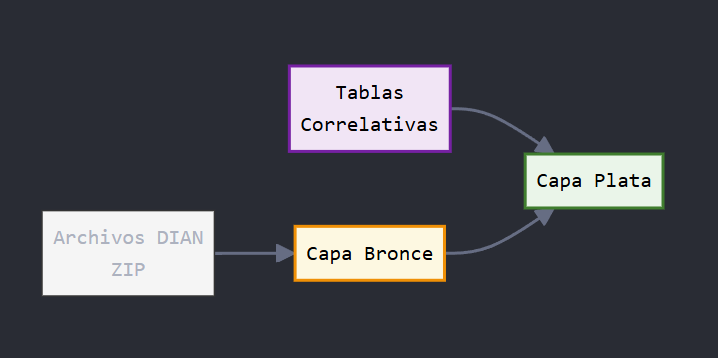

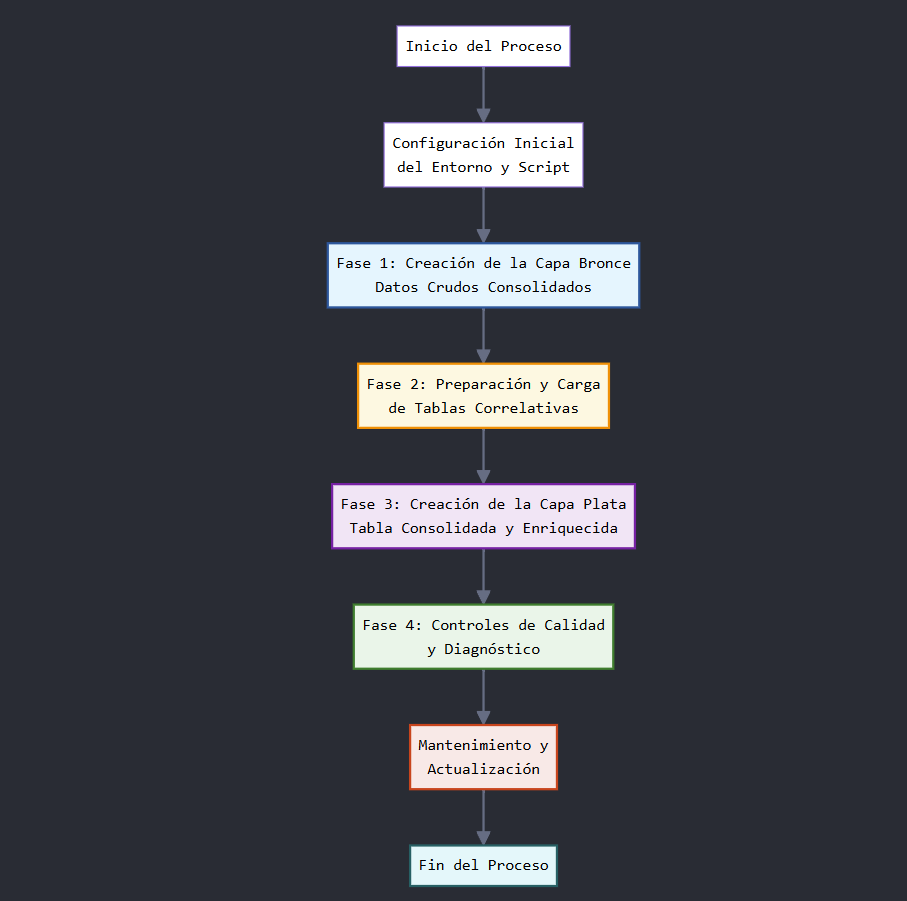

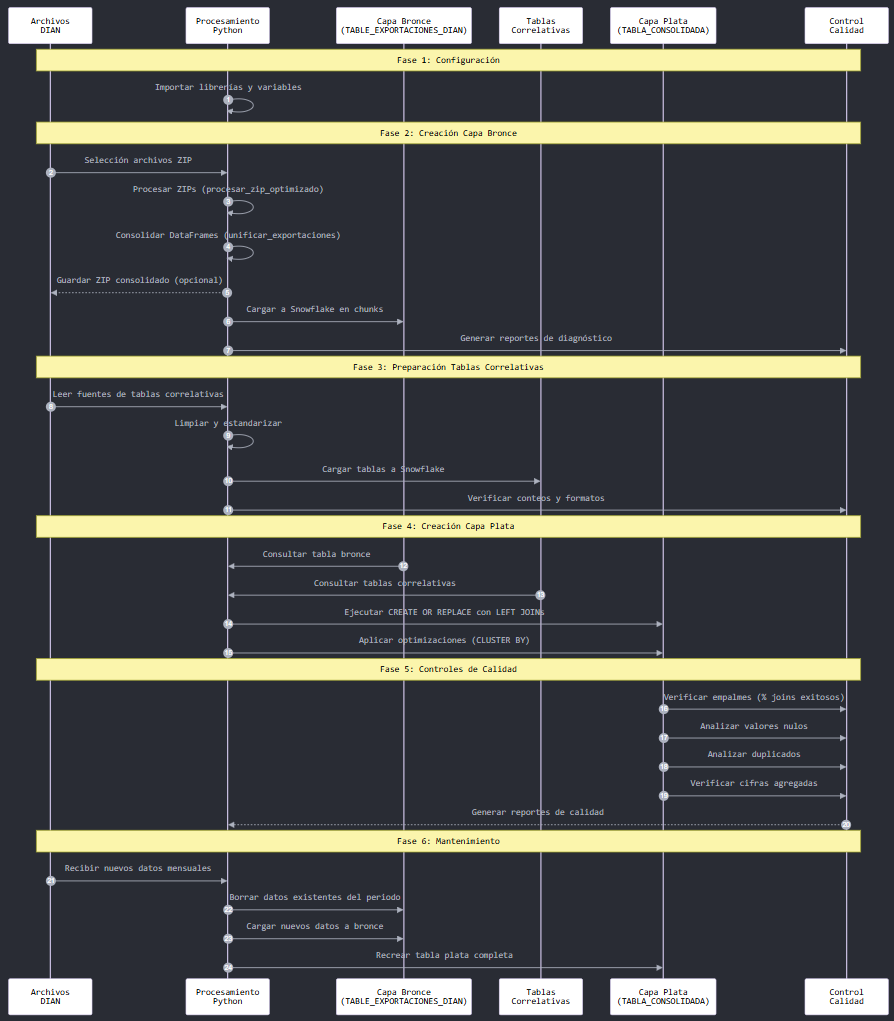



**Flujo Detallado: Procesamiento de Exportaciones DIAN y Carga a Snowflake (Capas Bronce y Plata)**

1.  **Inicio del Proceso**

2.  **Configuración Inicial del Entorno y Script:**
    *   **Input:** Script de Python, librerías (pandas, snowflake-connector, python-docx, etc.).
    *   **Acción:**
        *   Importar librerías.
        *   Definir variables globales: rutas (datos crudos, procesados, reportes, credenciales), credenciales de Snowflake (desde `config.json` o variables de entorno), nombres de tablas y esquemas, parámetros de procesamiento (chunk_size, codificación, etc.).
    *   **Output:** Entorno listo.

3.  **Fase 1: Creación de la Capa Bronce (Datos Crudos Consolidados)**

    3.1. **Selección y Preparación de Archivos de Exportaciones DIAN (Input):**
        *   **Input:** Directorio de datos crudos (`ruta_raw_data`), criterios de filtrado (e.g., `lista_años`).
        *   **Acción:**
            *   Listar archivos ZIP de exportaciones.
            *   Filtrar para procesar un subconjunto (e.g., por año).
        *   **Output:** Lista de archivos ZIP de entrada.

    3.2. **Bucle de Procesamiento por Año/Lote (para datos DIAN):**
        *   **Para cada año/lote:**
            1.  **Lectura y Extracción de Datos desde ZIPs Individuales:**
                *   **Input:** Archivos ZIP del año/lote.
                *   **Acción:** `procesar_zip_optimizado` lee archivos internos (CSV, TXT, XLSX) desde memoria.
                *   **Output:** DataFrames de Pandas (e.g., mensuales).
            2.  **Consolidación y Estandarización Estructural (Anual):**
                *   **Input:** DataFrames mensuales.
                *   **Acción:** `unificar_exportaciones` / `unify_export_zips` combina DataFrames.
                    *   Armoniza la estructura de columnas a un superconjunto, añadiendo `NaN` donde faltan.
                    *   Mapeo básico de nombres de columnas si es necesario (e.g., `NIT_EXPORTADOR_` -> `NIT_EXPORTADOR`).
                *   **Output:** DataFrame consolidado para el año.
            3.  **(Opcional) Almacenamiento Intermedio en Archivo:**
                *   **Input:** DataFrame consolidado anual.
                *   **Acción:** Guarda como `.txt` dentro de un nuevo ZIP (e.g., `Exportaciones_2025_Consolidado.zip`) en `ruta_archivos_procesados`.
                *   **Output:** Archivo ZIP consolidado anual.
            4.  **Carga a Tabla Bronce en Snowflake:**
                *   **Input:** DataFrame consolidado anual (o el TXT del ZIP anterior).
                *   **Acción:** `sf_append_file_to_snowflake_in_chunks_final` (orquestado por `cargar_multiples_archivos_snowflake_mejorado`).
                    *   Conexión a Snowflake.
                    *   Alineación de columnas del DataFrame con la tabla destino `TABLE_EXPORTACIONES_DIAN` (capa bronce).
                    *   Añade columnas de metadatos (`archivo`, `ano_archivo`).
                    *   Carga en chunks.
                *   **Output:** Datos del año/lote añadidos a `TABLE_EXPORTACIONES_DIAN` en Snowflake.

    3.3. **Control de Calidad Post-Carga (Capa Bronce - Individual/Anual):**
        *   **Input:** DataFrame consolidado anual o datos cargados en Snowflake.
        *   **Acción:** `diagnosticar_archivo_exportacion_año` / `procesar_multiples_archivos`.
            *   Genera reportes en Word: estructura, tipos, únicos, nulos, estadísticas.
        *   **Output:** Archivos `.docx` de diagnóstico en `ruta_exportar_word`.

4.  **Fase 2: Preparación y Carga de Tablas Correlativas (Lookup Tables)**
    *   *Este proceso se repite para cada tabla correlativa (Departamentos, Empresas, Sectorización, Países, etc.).*
    *   **Para cada Tabla Correlativa:**
        1.  **Input:** Archivo fuente de la tabla correlativa (e.g., un Excel desde `ruta_correlativas_dian`).
        2.  **Acción:**
            *   Leer el archivo fuente en un DataFrame de Pandas.
            *   **Limpieza y Estandarización Específica de la Tabla Correlativa:**
                *   Ej: Para `TABLA_CORRELATIVA_DEPARTAMENTOS_ORIGEN`, asegurar que `CODIGO_DEPARTAMENTO_ORIGEN_FINAL` tenga ceros a la izquierda.
                *   Ej: Para `TABLA_CORRELATIVA_SECTORIZACION`, asegurar formato correcto de `SUBPARTIDA_10DIGITOS`.
                *   Estandarizar nombres de columnas (e.g., quitar espacios, acentos).
            *   Cargar el DataFrame limpio a su tabla designada en Snowflake (e.g., `TABLA_CORRELATIVA_PAISES`) usando una función como `sf_load_file_to_snowflake_zip` que puede crear o reemplazar la tabla.
        3.  **Output:** Tabla correlativa limpia y cargada en Snowflake.
        4.  **Control de Calidad (Tablas Correlativas):**
            *   Verificar conteo de registros.
            *   Confirmar que las transformaciones específicas (e.g., formato de códigos) se aplicaron correctamente.

5.  **Fase 3: Creación de la Capa Plata (Tabla/Vista Consolidada y Enriquecida)**
    *   **Input:**
        *   Tabla Bronce de Exportaciones (`TABLE_EXPORTACIONES_DIAN`).
        *   Tablas Correlativas en Snowflake (e.g., `TABLA_CORRELATIVA_DEPARTAMENTOS`, `TABLA_CORRELATIVA_PAISES`, etc.).
    *   **Acción:**
        *   Ejecutar una sentencia `CREATE OR REPLACE TABLE TABLA_EXPORTACIONES_DIAN_CONSOLIDADA AS SELECT ...` (para crear una tabla materializada, que es la capa plata en este contexto).
        *   El `SELECT` realiza `LEFT JOIN` desde `TABLE_EXPORTACIONES_DIAN` hacia cada una de las tablas correlativas usando las claves de unión apropiadas:
            *   `... ON EXP.REGION_PROCEDENCIA = DEPT.REGION_PROCEDENCIA`
            *   `... ON EXP.REGION_DE_ORIGEN = DPTO_ORIGEN.REGION_DE_ORIGEN`
            *   `... ON EXP.NIT_EXPORTADOR = EMP.NIT AND EXP.RAZON_SOCIAL_EXPORTADOR = EMP.RAZON_SOCIAL`
            *   `... ON CAST(EXP.SUBPARTIDA AS VARCHAR) = CAST(SECT.SUBPARTIDA AS VARCHAR)`
            *   `... ON EXP.ANO_ARCHIVO = PAIS.ANO_ARCHIVO AND EXP.COD_PAIS_DESTINO_NUM = PAIS.COD_PAIS_DESTINO_NUM AND ...` (múltiples claves para países).
        *   **Renombrar Columnas (Aliasing):** Se usan prefijos (`DEPT_`, `SECT_`, `EMP_`, `PAIS_`, `DPTO_ORIGEN_`) para las columnas provenientes de las tablas correlativas, evitando así la ambigüedad de nombres y facilitando la identificación de su origen.
        *   **(Opcional pero recomendado) Optimización:** Aplicar `CLUSTER BY (ANO_ARCHIVO, SUBPARTIDA)` a la tabla plata para mejorar rendimiento en consultas.
    *   **Output:** Tabla `TABLA_EXPORTACIONES_DIAN_CONSOLIDADA` (Capa Plata) en Snowflake, con datos de exportación enriquecidos y estandarizados.

6.  **Fase 4: Controles de Calidad y Diagnóstico (Capa Plata)**
    *   **Input:** Tabla `TABLA_EXPORTACIONES_DIAN_CONSOLIDADA`.
    *   **Acción:**
        1.  **Verificación de Empalmes (Joins):**
            *   Ejecutar consultas SQL para calcular el porcentaje de registros de la tabla de exportaciones que lograron un empalme exitoso con cada una de las tablas correlativas (e.g., `% de registros con DEPT_DEPARTAMENTO_FINAL no nulo`). Se identifican los valores de las claves de unión que no encontraron correspondencia.
        2.  **Análisis de Valores Nulos:**
            *   Utilizar funciones como `analizar_nulls_in_batches`, `categorizar_valores_nulos`, y `generar_reporte_calidad_datos` sobre la tabla plata.
            *   Generar un reporte de calidad que resuma la completitud de los datos en esta capa enriquecida.
        3.  **Análisis de Duplicados:**
            *   Usar `analizar_duplicados` para verificar la unicidad de registros basados en claves naturales (e.g., `NUMERO_FORMULARIO`) en la tabla plata.
            *   Si se detectan duplicados significativos, se podría ejecutar `sf_recreate_table_without_duplicates` (aunque esto es una acción correctiva, no solo de control).
        4.  **Verificación de Cifras Agregadas:**
            *   Consultar y agregar datos por año, departamento, sector, país, etc., desde la tabla plata.
            *   Comparar estos agregados con cifras de referencia externas (DANE, MinCIT) si están disponibles y son comparables. El script menciona la consulta a DIAN sobre diferencias 2004-2009.
    *   **Output:** Métricas de calidad de datos, reportes de nulos, identificación de problemas de empalme o duplicados, validación de cifras.

7.  **Mantenimiento y Actualización:**
    *   **Acción (Periódica/Mensual):**
        *   Cuando llegan nuevos datos mensuales de la DIAN:
            1.  (Opcional pero recomendado) Borrar los datos del mes correspondiente de la tabla bronce `TABLE_EXPORTACIONES_DIAN` si es una reposición. El script menciona eliminar registros de `FECHA_PROCESO` específicas.
            2.  Cargar los nuevos datos mensuales siguiendo los pasos de la Fase 1 (Lectura, Consolidación del mes, Carga a `TABLE_EXPORTACIONES_DIAN`).
            3.  Recrear completamente la tabla plata `TABLA_EXPORTACIONES_DIAN_CONSOLIDADA` para incorporar los nuevos datos y asegurar la integridad de los joins con las correlativas (que también podrían haberse actualizado).
    *   **Output:** Tabla bronce y plata actualizadas.

8.  **Fin del Proceso**

---

**Puntos Adicionales del Script Incluidos en el Flujo:**

*   **Gestión de Checkpoints:** El script `procesar_y_cargar_archivos_exportaciones_con_checkpoint` sugiere la capacidad de reanudar cargas interrumpidas, guardando el estado del procesamiento.
*   **Manejo de Variaciones de Nombres de Archivo:** El script es capaz de listar y filtrar archivos basándose en patrones de nombres (e.g., por año).
*   **Paralelización:** Algunas funciones como `unificar_exportaciones` tienen parámetros para procesamiento paralelo, lo que puede acelerar la lectura de múltiples archivos ZIP.
*   **Optimización de Memoria:** Uso de `gc.collect()` y procesamiento en chunks para manejar archivos grandes.
*   **Logging Detallado:** El script final para carga múltiple (`cargar_multiples_archivos_snowflake_mejorado` y `sf_append_file_to_snowflake_in_chunks_final`) incluye un sistema de logging robusto para consola y archivo.
*   **Manejo de Errores Específicos:** En la carga a Snowflake, se intentan estrategias de fallback (chunks más pequeños) si la carga inicial falla.

# 📝 Aquitectura ProColombia - Equipo de TI

| Tabla Origen | Campo Origen | Tabla Destino | Campo Destino | Tipo de Relación | Observaciones |
|-------------|-------------|--------------|--------------|-----------------|---------------|
| FACT_EXPORTACIONES | WK_POSICION | DIM_ARANCEL | WK_POSICION | Left Join | Relación por código arancelario |
| DIM_ARANCEL | WK_SUBSECTOR_ARANCEL | DIM_ARANCEL_SUBSECTOR | WK_SUBSECTOR_ARANCEL | Left Join | Jerarquía de subsector arancelario |
| DIM_ARANCEL | WK_SECTOR | DIM_SECTOR | WK_SECTOR | Left Join | Sector económico relacionado al arancel |
| FACT_EXPORTACIONES | WK_CUENTA_EXPORTADOR | DIM_CUENTA | WK_CUENTA | Left Join | Cuenta del exportador |
| FACT_EXPORTACIONES | WK_DEPARTAMENTO_ORIGEN | DIM_DEPARTAMENTO | WK_DEPARTAMENTO | Left Join | Ubicación del exportador |
| FACT_EXPORTACIONES | WK_PAIS_RECEPTOR | DIM_PAIS | WK_PAIS | Left Join | País destino |
| FACT_EXPORTACIONES | WK_MEDIO_TRANSPORTE_LOGISTICA | DIM_MEDIO_TRANSPORTE | WK_MEDIO_TRANSPORTE | Left Join | Medio logístico de transporte |

# 📝 Diagrama entidad relación base en Snowflake

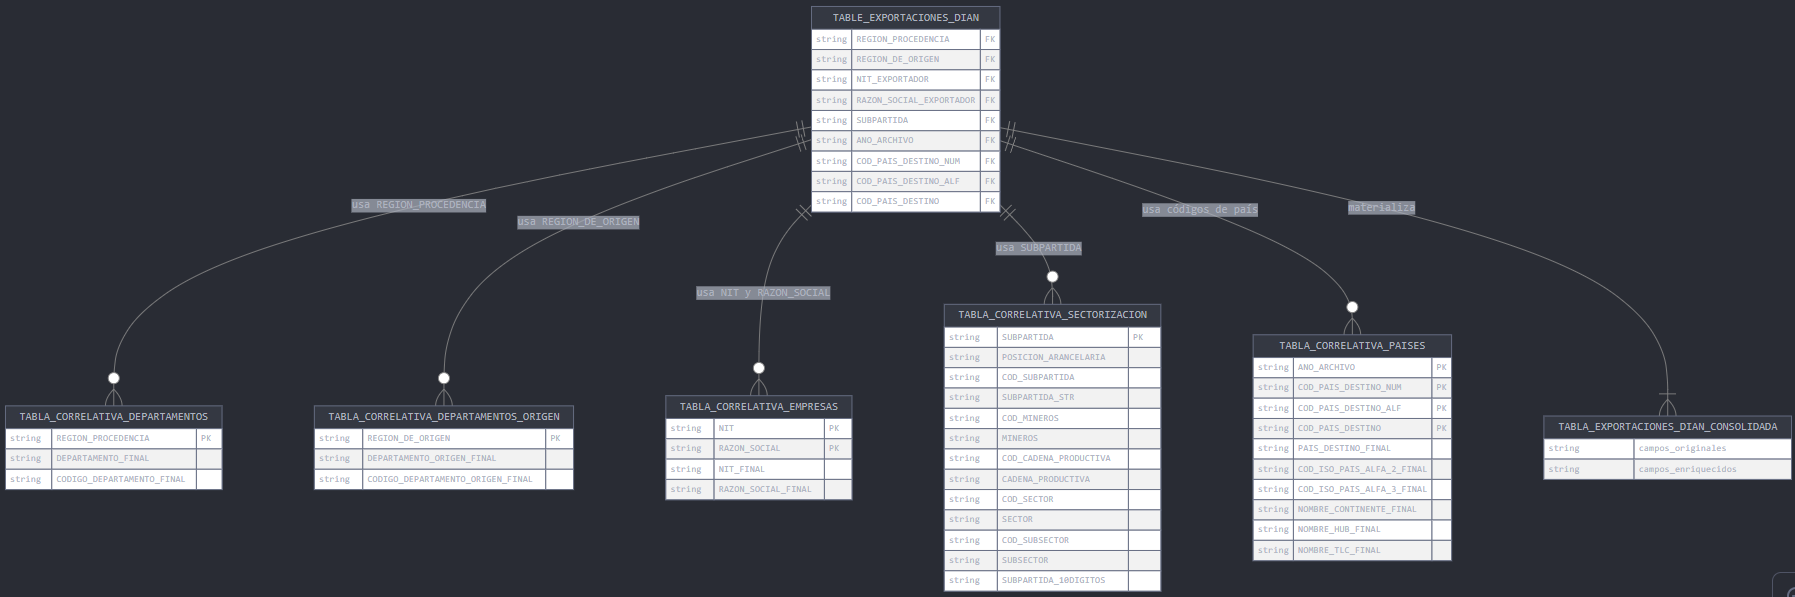

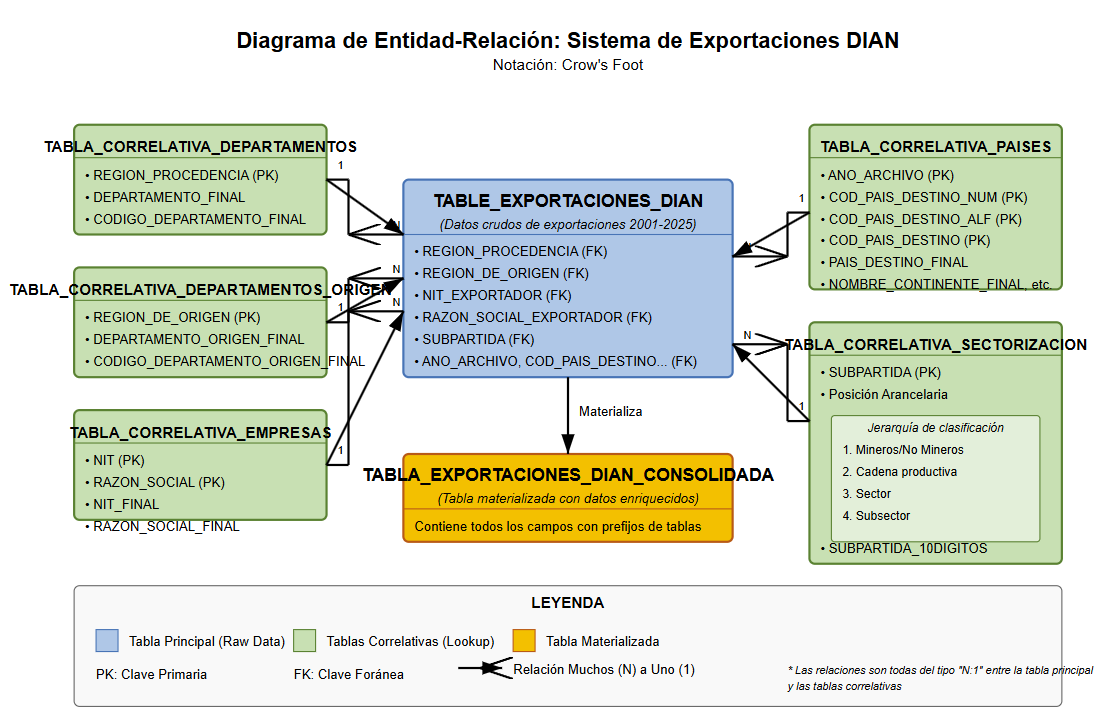

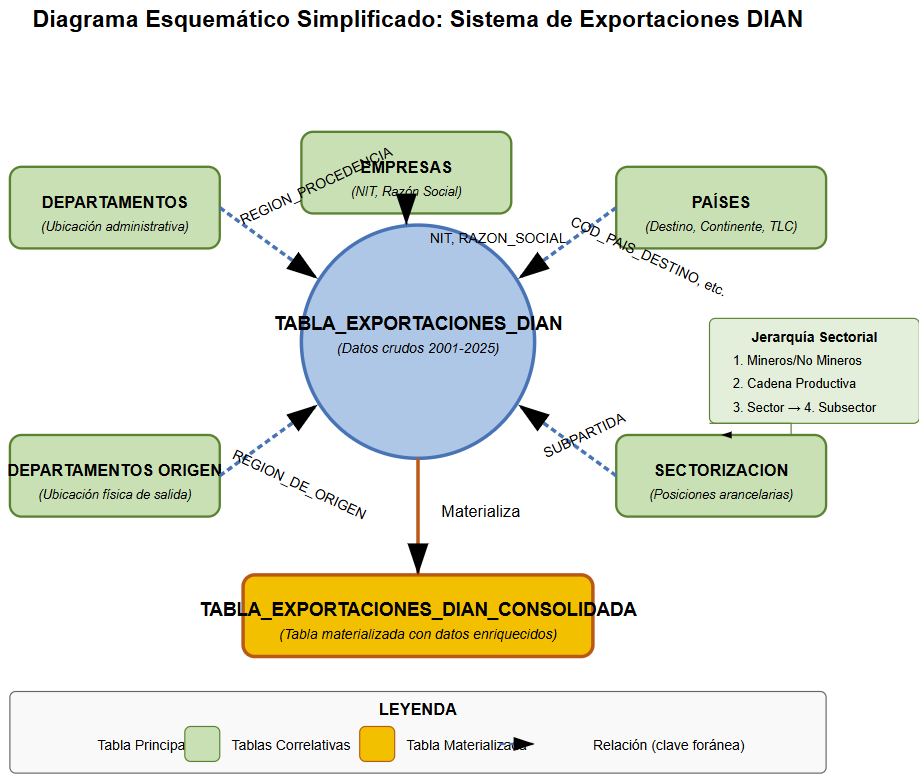

### Explicació diagramas

### 1. Diagrama ERD Mermaid
Este primer diagrama utiliza la notación estándar Entity-Relationship Diagram (ERD) y muestra las relaciones entre las tablas utilizando la sintaxis Mermaid. Utiliza la notación "Crow's Foot" que es ampliamente reconocida en el mundo de las bases de datos.

### 2. Diagrama ERD Detallado
Este diagrama proporciona una representación visual más detallada de las relaciones, con las siguientes características:
- **Codificación por colores**:
  - Azul: Tabla principal de datos crudos
  - Verde: Tablas correlativas (lookup)
  - Naranja: Tabla materializada resultante (bronce)
- **Representación clara de las claves primarias (PK) y foráneas (FK)**
- **Visualización de la jerarquía de sectorización**
- **Detalles sobre las relaciones entre tablas** (todas son del tipo muchos a uno desde la tabla principal hacia las tablas correlativas)

### 3. Diagrama Esquemático Simplificado
Este diagrama proporciona una visión de alto nivel, más conceptual y fácil de entender para audiencias menos técnicas. Representa:
- Las tablas como formas simples con colores distintivos
- Las relaciones entre tablas como líneas que identifican los campos de unión
- La jerarquía dentro de la tabla de sectorización

## Explicación de la Arquitectura de Datos

### Tabla Principal
- **TABLE_EXPORTACIONES_DIAN**: Contiene datos crudos de exportaciones desde 2001 hasta 2025.

### Tablas Correlativas (Lookups)
Estas tablas contienen datos de referencia que enriquecen la información principal:

1. **TABLA_CORRELATIVA_DEPARTAMENTOS**: Información sobre los departamentos donde están ubicadas administrativamente las empresas exportadoras.
2. **TABLA_CORRELATIVA_DEPARTAMENTOS_ORIGEN**: Información sobre los departamentos desde donde físicamente salen las exportaciones.
3. **TABLA_CORRELATIVA_EMPRESAS**: Datos normalizados sobre las empresas exportadoras (NIT y razón social).
4. **TABLA_CORRELATIVA_SECTORIZACION**: Clasificación jerárquica de las exportaciones por posición arancelaria, incluyendo:
   - Nivel 1: Mineros/No Mineros
   - Nivel 2: Cadena productiva
   - Nivel 3: Sector
   - Nivel 4: Subsector
   - Además incluye otras clasificaciones como CUCI, Cuode, CIIU, CPC, etc.
5. **TABLA_CORRELATIVA_PAISES**: Información enriquecida sobre los países de destino, incluyendo continente, hub, TLC, entre otros.

### Tabla Resultante
- **TABLA_EXPORTACIONES_DIAN_CONSOLIDADA**: Tabla materializada que combina la información de todas las tablas anteriores, utilizando prefijos para diferenciar los campos de cada origen.

### Relaciones Clave
- Todas las relaciones son del tipo "muchos a uno" (N:1) desde la tabla principal hacia las tablas correlativas.
- Algunas tablas correlativas se unen por múltiples campos, como la tabla de países que utiliza cuatro campos para la unión.

Este modelo de datos permite realizar análisis detallados de las exportaciones colombianas, pudiendo segmentar por múltiples dimensiones como ubicación geográfica, sectores económicos, empresas y destinos internacionales.

# 📝 Teoría - Arquitectura de datos

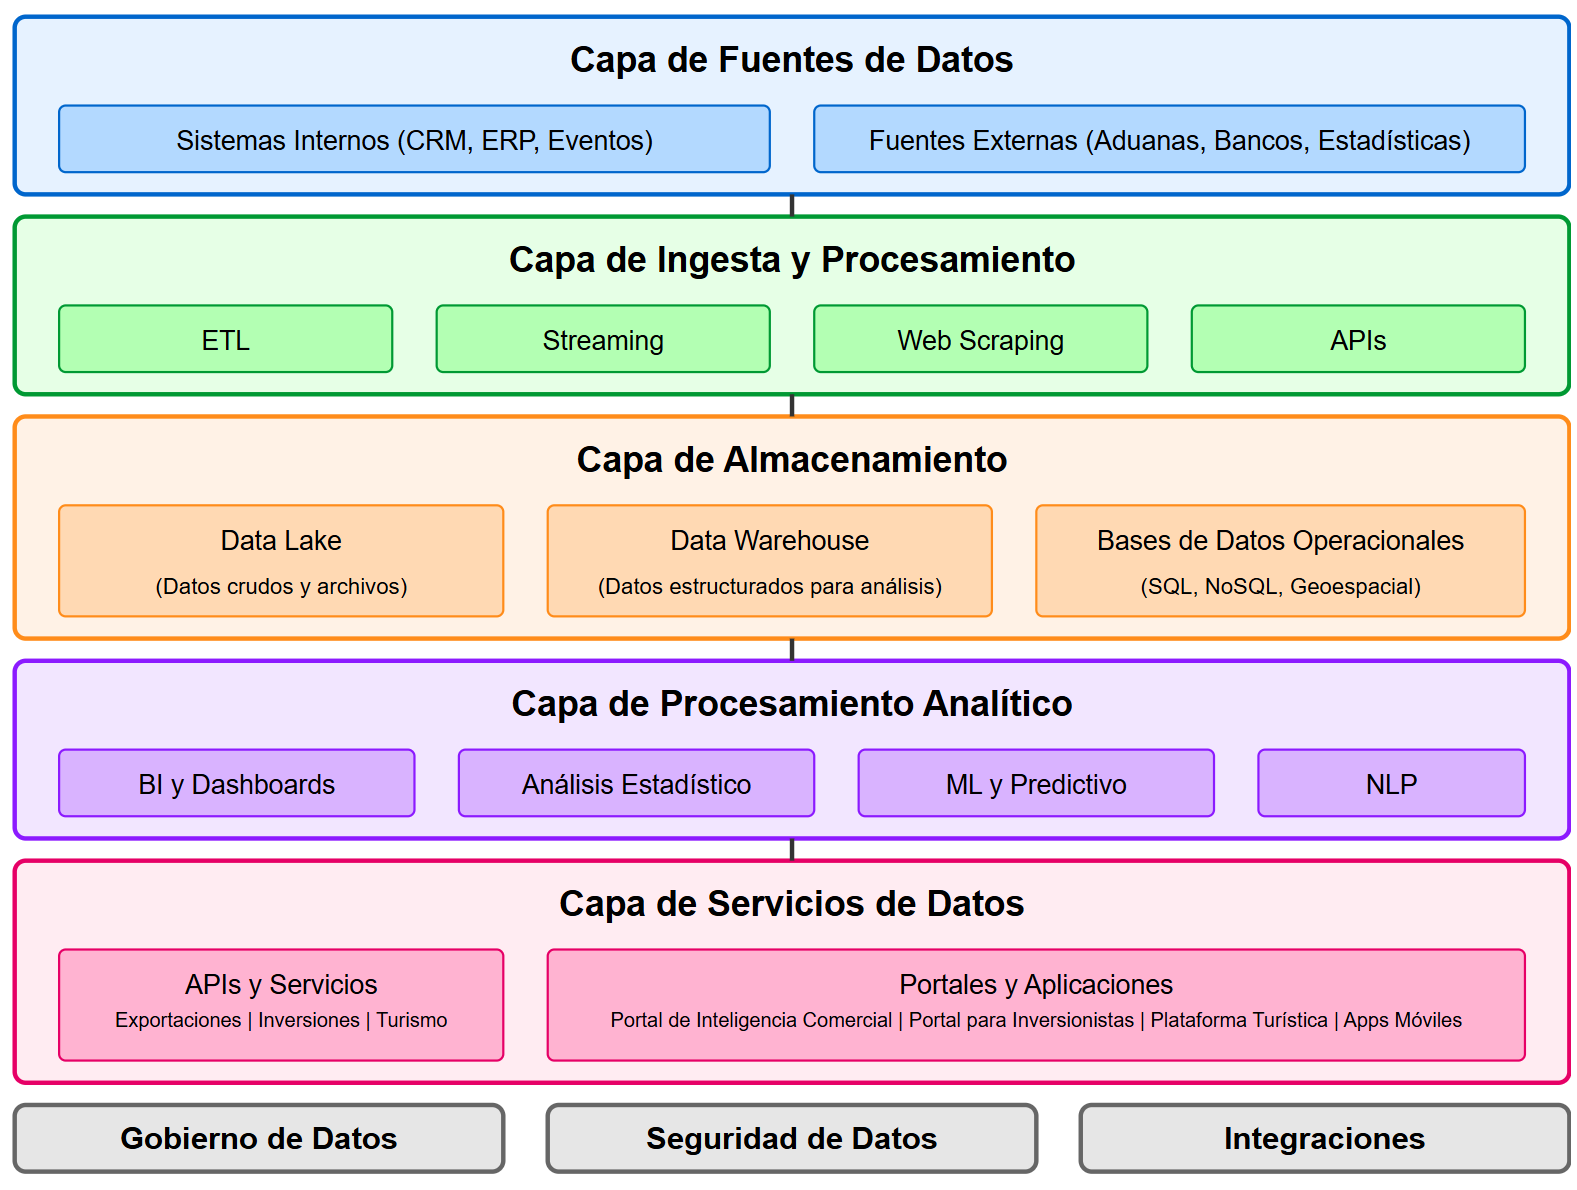

---

## 📝 Ejemplo de Arquitectura de Datos

### **1. Capas de la arquitectura**

#### **1.1. Capa de Fuentes de Datos (Data Sources)**
Aquí se capturan datos desde múltiples sistemas y fuentes externas:

| Categoría | Ejemplos de fuentes |
|----------|---------------------|
| **Exportaciones** | DIAN, DANE, TradeMap, bases de datos de empresas exportadoras |
| **Inversión extranjera** | Banco de la República, MinCIT, encuestas internas, informes de consultoras (EY, KPMG) |
| **Turismo** | Migración Colombia, hoteles, aerolíneas, plataformas de reservas, Google Travel Insights |
| **Internas** | CRM (Salesforce), formularios de eventos, hojas de vida de empresas colombianas, directorios sectoriales |

---

#### **1.2. Capa de Ingesta de Datos (Data Ingestion)**
Se utilizan pipelines para extraer y cargar datos con frecuencia programada:

- **ETL tradicional** (por lotes): Para archivos planos, Excel, ZIPs históricos de comercio exterior
- **ETL en tiempo real / streaming**: Para tráfico web, redes sociales o campañas turísticas en curso
- Herramientas sugeridas: **Apache Airflow**, **Fivetran**, **Talend**, **Python scripts**, **APIs REST**

---

#### **1.3. Capa de Almacenamiento (Data Lake + Data Warehouse)**

| Capa | Tecnología sugerida | Contenido |
|------|---------------------|-----------|
| **Raw Zone (Bronce)** | Amazon S3 / Azure Blob / Snowflake Staging | Datos en su formato original |
| **Clean Zone (Plata)** | Snowflake / BigQuery / Azure Synapse | Datos limpios, validados, con tipos correctos |
| **Business Zone (Oro)** | Snowflake / Redshift / Databricks | Tablas modeladas por dominio de negocio: exportaciones, inversión, turismo |

---

#### **1.4. Capa de Modelado y Transformación**
Aplicación de modelos de datos por dominio:

- **Modelo estrella** o **esquema de copo de nieve** para BI
- **Tablas de hechos**: exportaciones mensuales, flujos de IED por sector, turistas por país
- **Tablas dimensión**: países, empresas, sectores, eventos, campañas promocionales

Herramientas: **dbt (Data Build Tool)**, **Spark SQL**, **Snowflake SQL**

---

#### **1.5. Capa de Exposición (Access Layer)**

| Usuario final | Herramientas | Ejemplos |
|---------------|--------------|----------|
| Analistas | Power BI, Tableau, Looker | Dashboard de tendencias, mapas de calor de turismo |
| Científicos de datos | Jupyter, Python, R | Predicción de flujos de inversión por sector |
| Directivos | Dashboards ejecutivos | KPIs de gestión de oportunidades y cierres |
| Público externo | Portal de datos abiertos | Consultas exportables por país-producto-sector |

---

#### **1.6. Capa de Gobernanza y Seguridad**
- **Diccionario de datos centralizado**
- **Catálogo de datos** (por ejemplo: **Alation**, **Collibra**)
- Roles y permisos: segmentación por equipos (turismo, exportaciones, inversión)
- **Cumplimiento normativo**: Ley de Habeas Data, RGPD si se manejan datos de extranjeros

---

### **2. Arquitectura de alto nivel (diagrama conceptual)**

```plaintext
[FUENTES DE DATOS]
      |
+---------------------------+
| APIs | Archivos | Bases  |
| DIAN | CRM | DANE | EY   |
+---------------------------+
      |
[INGESTA Y ETL]
      |
[DATA LAKE] (Bronce)
      |
[LIMPIEZA Y VALIDACIÓN]
      |
[DATA WAREHOUSE] (Plata y Oro)
      |
[MODELOS DE DATOS]
      |
+-----------------------------+
| ANALÍTICA / BI / SCIENCE   |
| Power BI | Python | R      |
+-----------------------------+
      |
[PORTAL EXTERNO / REPORTES]
```

---

### **3. Casos de uso clave soportados**

- **Identificación de oportunidades de exportación** según tendencias históricas y señales de demanda internacional
- **Perfilamiento de inversionistas y empresas receptoras** para atraer IED
- **Medición de impacto de campañas turísticas** por origen del turista y gasto
- **Priorización de mercados estratégicos** usando análisis multivariable
- **Seguimiento de empresas apoyadas** y evaluación de retorno de actividades

---


## 📝 Literatura sobre arquitectura de datos

---

### **1. [Recomendado como base sólida y práctica]**

**Título:** *The Data Warehouse Toolkit: The Definitive Guide to Dimensional Modeling*  
**Autor:** Ralph Kimball y Margy Ross  
**Año:** 2013 (3ra edición)  
**Enfoque:** Diseño de modelos de datos (modelo estrella, copo de nieve), arquitectura de datos para BI  
**Por qué lo recomiendo:**  
Es la “biblia” del modelado dimensional, fundamental para construir data warehouses robustos. Aporta ejemplos prácticos sectoriales (como retail, finanzas y logística) que puedes adaptar fácilmente a comercio exterior o turismo.

---

### **2. [Enfoque moderno en nube y gobernanza]**

**Título:** *Fundamentals of Data Engineering*  
**Autor:** Joe Reis y Matt Housley  
**Año:** 2022  
**Enfoque:** Arquitectura de datos moderna (Data Lakes, ETL, ELT, pipelines en la nube)  
**Por qué lo recomiendo:**  
Aborda desde cero cómo diseñar una arquitectura de datos moderna, cloud-first, escalable y automatizable. Ideal si estás migrando o diseñando una solución desde cero.

---

### **3. [Gobernanza y estrategia de datos]**

**Título:** *Data Management for Researchers: Organize, Maintain and Share Your Data for Research Success*  
**Autor:** Kristin Briney  
**Año:** 2015  
**Enfoque:** Gestión y gobernanza de datos  
**Por qué lo recomiendo:**  
Aunque orientado a investigadores, es muy útil para agencias que deben documentar, compartir y preservar datos estratégicos, como ProColombia. Te ayuda a construir buenas prácticas de metadatos, licenciamiento, estándares y calidad de datos.

---

### **4. [Para visión estratégica en organizaciones públicas]**

**Título:** *Data Strategy: How to Profit from a World of Big Data, Analytics and the Internet of Things*  
**Autor:** Bernard Marr  
**Año:** 2017  
**Enfoque:** Estrategia de datos en instituciones y empresas  
**Por qué lo recomiendo:**  
Te ayuda a pensar más allá de la arquitectura técnica y enfocarte en cómo alinear el uso de datos con los objetivos de país: atraer inversión, aumentar exportaciones, promover turismo.

---

### ¿Cuál elegir?

| Objetivo | Libro sugerido |
|----------|----------------|
| Aprender diseño técnico de Data Warehouses | *The Data Warehouse Toolkit* |
| Conocer arquitectura moderna (cloud, pipelines, lakes) | *Fundamentals of Data Engineering* |
| Mejorar gobernanza y buenas prácticas | *Data Management for Researchers* |
| Enfocar una estrategia nacional basada en datos | *Data Strategy* |

---


## 📝 **(Resultados del análisis individual y comparativo de los archivos de la DIAN)**

**Similitudes entre archivos:**

* **Objetivo:** Todos los archivos registran datos de exportaciones.
* **Columnas clave:**  La mayoría de los archivos comparten columnas clave como `FECHA_PROCESO`, `COD_ADUANA_DESPACHO`, `ADUANA_DESPACHO`, `NIT_EXPORTADOR`, `COD_PAIS_DESTINO`, `PAIS_DESTINO_FINAL`, `VALOR_FOB_USD`, entre otras.  Aunque el nombre exacto puede variar ligeramente (ej. `NIT_EXPORTADOR` vs `NIT_EXPORTADOR_`), representan la misma información.
* **Formato de fecha:** Las fechas parecen estar en formato AAAAMMDD.

**Diferencias entre archivos (2001-2006 vs. 2007-2024):**

* **Número de columnas:** Los archivos de 2001 a 2006 tienen menos columnas (46) que los archivos de 2007 en adelante (72).
* **Columnas presentes/ausentes:** Los archivos de 2001-2006 carecen de información detallada sobre el tipo de declaración, tipo de despacho, modalidad de exportación, tipo de embarque, tipo de datos, certificado de origen, exportación en tránsito, fletes, seguros, entre otras. Esta información está presente en los archivos de 2007-2024.
* **Tipo de dato de algunas columnas:** Los archivos 2001-2006 y 2007-2024 tienen diferencias en algunas variables, como por ejemplo la variable PESO_NETO_KGS en 2001-2006 es int64 y en 2007-2024 es float64. En el caso de las fechas, las de 2001-2006 son int64 y las de 2007-2024 son object.
* **Valores faltantes:** La cantidad de valores faltantes varía entre los archivos y las columnas, pero en general parece ser mayor en las primeras versiones.
* **Valores en la variable `PAIS_DESTINO_FINAL`:**  Los archivos 2001-2006 en las variables `PAIS_DESTINO_FINAL` tienen los paises en mayusculas sostenidas, mientras que los de 2007 en adelante se mezclan con tildes y mayúsculas.


**Recomendaciones para la estructura de datos en Snowflake:**

**Opción 1: Dos tablas separadas.**

* **Tabla 1 (2001-2006):**  Contendría las columnas comunes a estos años.  Las columnas ausentes se podrían agregar con valores NULL. Se debe realizar una limpieza de datos en la variable `PAIS_DESTINO_FINAL` para que los valores coincidan con la tabla 2.
* **Tabla 2 (2007-2024):** Contendría todas las 72 columnas. Se debe realizar limpieza de datos en la variable `PAIS_DESTINO_FINAL` para que los valores sean consistentes en cuanto a formato (mayúsculas, tildes, etc.).
* **Ventajas:** Simplifica la carga inicial, permite mantener la granularidad original de los datos.
* **Desventajas:**  Requiere consultas UNION para combinar datos de ambos periodos, lo que puede afectar el rendimiento para preguntas que abarcan todo el rango de años. La limpieza de la variable `PAIS_DESTINO_FINAL` se debe hacer por aparte en cada tabla.

**Opción 2: Tabla única (Recomendada)**

* **Tabla única (2001-2024):** Se crearía una tabla con todas las 72 columnas presentes en los archivos más recientes (2007-2024).  Los datos de los años 2001 a 2006 se cargarían en esta tabla, rellenando las columnas ausentes con valores NULL.
* **Ventajas:**  Simplifica las consultas que abarcan todo el rango de años, mejora el rendimiento de las consultas al evitar UNIONs.  Se puede realizar limpieza de datos una única vez en la variable `PAIS_DESTINO_FINAL`.
* **Desventajas:** Requiere un proceso ETL más complejo para transformar los datos y hacerlos consistentes con el esquema final, puede generar una tabla con un mayor número de valores NULL en las columnas que no existen en los primeros años.

**Consideraciones adicionales:**

* **Limpieza de datos:** Estandarizar nombres de empresas, NITs y países en la tabla resultante para evitar duplicados y asegurar la consistencia.
* **Integración con otras fuentes:**  Diseñar la tabla de exportaciones con claves primarias y columnas adecuadas para facilitar la integración futura con las tablas de clasificación de exportaciones, estandarización de empresas, CRM y estados financieros.  Considerar el uso de una columna `año` para facilitar las consultas que se filtren por periodos específicos.
* **Particionamiento y clustering:**  En Snowflake, particionar la tabla por año (`año`) y clusterizar por país (`COD_PAIS_DESTINO`) y/o `NIT_EXPORTADOR` puede mejorar significativamente el rendimiento de las consultas como la que planteaste sobre exportaciones de Colombia a Estados Unidos.
* **Vistas materializadas:**  Crear vistas materializadas para las consultas más frecuentes puede optimizar aún más el rendimiento.
* **Documentación:** Documentar el esquema de la tabla, incluyendo la descripción de cada columna y su origen, así como los procesos ETL utilizados.


Dado que el objetivo es tener la capacidad de responder preguntas de negocio que abarcan todo el rango de años, la **opción 2 (tabla única)** es la más recomendable a pesar de la mayor complejidad inicial en el ETL. Esto permitirá un mejor rendimiento de las consultas y una mayor facilidad de mantenimiento a largo plazo.  Además, permitirá la integración con futuras fuentes de datos al tener un esquema unificado.

Quedo atento a sus comentarios o si necesita alguna aclaración.


## 📝 Código en SQL para Crear la tabla en SQL.

```sql
-- Crear una nueva tabla con los tipos correctos para soportar datos históricos (2001-2024)
CREATE OR REPLACE TABLE TABLE_EXPORTACIONES_DIAN_NEW (
    -- Fechas (mantenidas como FLOAT porque probablemente son códigos de fecha numéricos)
    FECHA_PROCESO FLOAT,
    FECHA_SOLICITUD_AUTO_EMBARQUE FLOAT,
    FECHA_DECLARACION_EXPORTACION FLOAT,
    FECH_DECLA_EXPORTACION_ANT FLOAT,
    FECH_DECLA_PRECEDENTE FLOAT,
    
    -- Identificadores que deberían ser numéricos
    NUMERO_SERIE FLOAT,
    NUMERO_FORMULARIO FLOAT,
    NUM_ARTICULO FLOAT,
    NUM_SOLICITUD_AUTO_EMBARQUE FLOAT,
    NUM__DECLA_EXPORTACION_ANT FLOAT,
    NUM_DECLARACION_PRECEDENTE FLOAT,
    NUM_MANIFIESTO FLOAT,
    NUM_DOC_EXPO_ADUANA FLOAT,
    
    -- Valores monetarios y cantidades (numéricas)
    CANTIDAD_UNIDADES_FISICAS FLOAT,
    PESO_BRUTO_KGS FLOAT,
    PESO_NETO_KGS FLOAT,
    VALOR_FOB_USD FLOAT,
    VALOR_FOB_PESOS FLOAT,
    VLR_SERIE_AGREGADO_NAL_USD FLOAT,
    VALOR_SERIE_FLETES_USD FLOAT,
    VALOR_SERIE_SEGUROS_USD FLOAT,
    VLR_SERIE_OTROS_GASTOS_USD FLOAT,
    
    -- Códigos y clasificaciones (convertidas a VARCHAR)
    OFICINA VARCHAR(50),
    COD_ADUANA_DESPACHO VARCHAR(50),
    ADUANA_DESPACHO VARCHAR(255),
    TIPO_IDENT VARCHAR(50),
    NIT_EXPORTADOR VARCHAR(50),
    TIPO_USUARIO VARCHAR(50),
    COD_USUARIO VARCHAR(50),
    CLASE_EXPORTADOR VARCHAR(50),
    COD_DPTO_EXPORTADOR VARCHAR(50),
    COD_PAIS_DESTINO_NUM VARCHAR(50),
    COD_PAIS_DESTINO_ALF VARCHAR(50),
    COD_PAIS_DESTINO VARCHAR(50),
    PAIS_DESTINO_FINAL VARCHAR(255),
    CIUDAD_DESTINATARIO VARCHAR(255),
    TIPO_DECLARACION VARCHAR(50),
    TIPO_DESPACHO VARCHAR(50),
    COD_LUGAR_SALIDA_NUM VARCHAR(50),
    COD_LUG_SALIDA_ALF VARCHAR(50),
    COD_REGION_PROCEDENCIA VARCHAR(50),
    REGION_PROCEDENCIA VARCHAR(255),
    COD_MODALIDAD_PRECEDENTE VARCHAR(50),
    COD_MONEDA_TRANSACCION VARCHAR(50),
    COD_MODO_TRANSPORTE VARCHAR(50),
    MODO_TRANSPORTE VARCHAR(255),
    BANDERA VARCHAR(50),
    COD_NACIONALIDAD_BANDERA VARCHAR(50),
    NACIONALIDAD_BANDERA VARCHAR(255),
    COD_REGIMEN_CAN VARCHAR(50),
    COD_MODALIDAD_EXPORTACION VARCHAR(50),
    MODALIDAD_EXPORTACION VARCHAR(255),
    FORMA_PAGO VARCHAR(50),
    COD_TIPO_EMBARQUE VARCHAR(50),
    TIPO_DE_EMBARQUE VARCHAR(255),
    COD_TIPO_DATOS VARCHAR(50),
    TIPO_DE_DATOS VARCHAR(255),
    TIPO_CERTIFICADO_ORIGEN VARCHAR(50),
    SISTEMAS_ESPECIALES VARCHAR(255),
    COD_EXPORTACION_TRANSITO VARCHAR(50),
    EXPORTACION_EN_TRANSITO VARCHAR(255),
    SUBPARTIDA VARCHAR(50),
    COD_REGION_ORIGEN VARCHAR(50),
    REGION_DE_ORIGEN VARCHAR(255),
    COD_UNIDAD_FISICA_NUM VARCHAR(50),
    COD_UNIDAD_FISICA_ALF VARCHAR(50),
    UNIDAD_FISICA VARCHAR(255),
    COD_ADUANA_SALIDA VARCHAR(50),
    ADUANA_SALIDA VARCHAR(255),
    
    -- Información de entidades
    RAZON_SOCIAL_EXPORTADOR VARCHAR(255),
    DIREC_EXPORTADOR VARCHAR(255),
    NIT_DECLARANTE VARCHAR(50),
    RAZON_SOCIAL_DECLARANTE VARCHAR(255),
    RAZON_SOCIAL_DESTINATARIO VARCHAR(255),
    DOMICILIO_DESTINATARIO VARCHAR(255),
    
    -- Columnas específicas del problema
    NIT_EXPORTADOR_ VARCHAR(50),
    COD_UNIDAD_FISICA VARCHAR(50),
    COD_OFICINA_REINTEGRO VARCHAR(50),
    
    -- Metadatos
    archivo VARCHAR(255),
    ano_archivo NUMBER(38,0)
);
```




## 📝 Estrategia de tablas anuales: Análisis

Crear tablas independientes por año y luego consolidarlas en una tabla maestra es una estrategia válida y con varias ventajas significativas.

## Ventajas de usar tablas por año:

1. **Mayor control sobre el proceso de carga**:
   - Puedes optimizar cada tabla para la estructura específica de ese año
   - Facilita la depuración al ver exactamente qué datos causaron problemas en cada período

2. **Procesamiento paralelo y escalable**:
   - Puedes cargar varios años simultáneamente (en paralelo)
   - Si un año falla, los demás no se ven afectados
   - Distribución del esfuerzo computacional

3. **Gestión más eficiente de la calidad de datos**:
   - Permite transformaciones específicas para cada año
   - Facilita la detección de anomalías o inconsistencias en períodos específicos
   - Posibilidad de aplicar reglas de validación específicas según el formato de cada año

4. **Mejor rendimiento en cargas iniciales**:
   - Las tablas más pequeñas se cargan más rápido
   - Menor probabilidad de timeouts o errores de memoria

## Implementación práctica:

```sql
-- Crear tabla para un año específico
CREATE TABLE EXPORTACIONES_2001 (
    -- Todas las columnas con los tipos adecuados para este año
    COD_LUGAR_SALIDA_NUM VARCHAR(50),
    NIT_EXPORTADOR_ VARCHAR(50),
    -- etc...
    
    -- Metadatos adicionales si se desean
    archivo VARCHAR(255),
    ano_archivo NUMBER(38,0) DEFAULT 2001
);

-- Repetir para cada año con la estructura apropiada
```

Después de cargar cada tabla anual, puedes:

1. **Consolidar en la tabla maestra**:
   ```sql
   INSERT INTO TABLE_EXPORTACIONES_DIAN_MASTER
   SELECT * FROM EXPORTACIONES_2001;
   
   INSERT INTO TABLE_EXPORTACIONES_DIAN_MASTER
   SELECT * FROM EXPORTACIONES_2002;
   
   -- etc...
   ```

2. **O crear una vista que unifique todas las tablas**:
   ```sql
   CREATE VIEW EXPORTACIONES_CONSOLIDADAS AS
   SELECT * FROM EXPORTACIONES_2001
   UNION ALL
   SELECT * FROM EXPORTACIONES_2002
   UNION ALL
   -- etc...
   ```

## Consideraciones arquitectónicas:

1. **Particionamiento como alternativa**: Snowflake también permite particionar tablas por año directamente (usando clustering keys), lo que podría darte un beneficio similar con menos tablas.

2. **Balance entre fragmentación y consolidación**: Mantener tablas separadas permanentemente puede complicar las consultas analíticas, pero durante la fase de carga e integración de datos históricos es extremadamente útil.

3. **Estrategia híbrida**: Puedes usar tablas por año como etapa intermedia y luego consolidar en una tabla maestra optimizada para consultas.

Este enfoque te daría mayor flexibilidad y control sobre el proceso de integración de datos históricos, especialmente considerando los desafíos que estás enfrentando con los formatos inconsistentes entre diferentes años.

---

## 📝 **Guía estructurada para organizar datos de exportaciones en Snowflake (2001–2025)**

### **1. Ingesta y catalogación de archivos**
**Objetivo:** Asegurar que todos los archivos (ZIP, CSV, TXT, Excel, etc.) se reciben correctamente y se catalogan automáticamente.

**Acciones recomendadas:**
- Crear una carpeta estructurada por año y fuente.
- Crear un script en Python que:
  - Descomprima archivos .zip automáticamente.
  - Detecte el tipo de archivo (.csv, .txt, .xlsx).
  - Registre metainformación en una tabla de control en Snowflake: nombre del archivo, año, número de filas, columnas detectadas.
- Guardar los archivos originales en un **stage** de Snowflake (`INTERNAL STAGE`).

---

### **2. Zona Bronce: Ingesta cruda en Snowflake**
**Objetivo:** Almacenar los datos **tal como vienen**, sin transformación, pero con control de errores.

**Acciones:**
- Crear una tabla por año o fuente con nombres genéricos (`raw_exportaciones_2001`, etc.).
- Usar `COPY INTO` en Snowflake desde el `stage`.
- Registrar errores de carga para revisión posterior.

---

### **3. Zona Plata: Estandarización y limpieza**
**Objetivo:** Normalizar nombres de columnas, formatos y valores.

**Retos clave y soluciones:**

| Problema | Solución |
|----------|----------|
| Nombres de variables distintos entre años | Crear un **diccionario de correspondencias** (`dict_columnas`) para mapear columnas año a año |
| Formatos inconsistentes (fechas, montos, decimales) | Definir funciones en SQL o Python que conviertan y validen formatos |
| Nombres de empresas inconsistentes | Aplicar **fuzzy matching** con librerías como `fuzzywuzzy`, `Splink`, o usar Snowflake `LEVENSHTEIN()` y tablas de correspondencia (`alias_empresa`) |

**Resultado:** Una tabla unificada `exportaciones_limpias` con campos estandarizados como:
- `ano`, `mes`, `pais_destino`, `empresa_id`, `empresa_nombre_estandarizado`, `producto`, `valor_usd`, `cantidad_kg`, etc.

---

### **4. Zona Oro: Modelo analítico**
**Objetivo:** Crear una estructura que facilite consultas eficientes para BI y ciencia de datos.

**Modelo recomendado:**
- **Modelo estrella** con una tabla de hechos: `hecho_exportacion`
- **Tablas dimensión**:
  - `dim_empresa`
  - `dim_producto`
  - `dim_pais`
  - `dim_fecha`

Esto permitirá:
- Sumar exportaciones por empresa, sector, país y tiempo.
- Crear filtros jerárquicos y visualizaciones multidimensionales.

---

### **5. Calidad y trazabilidad**
**Objetivo:** Garantizar que las transformaciones están documentadas y son auditables.

**Recomendaciones:**
- Usar `dbt` (Data Build Tool) para documentar cada transformación como código versionado.
- Crear tests de calidad:
  - Empresas sin nombre
  - Nombres de países no reconocidos
  - Valores negativos

---

## Métricas de Éxito

- **Calidad de datos**:
  - % de registros con entidad empresarial correctamente identificada
  - % de variables correctamente estandarizadas
  - Reducción en tiempo de preparación de datos

- **Eficiencia operacional**:
  - Tiempo de procesamiento para nuevos datos
  - Tiempo de respuesta para consultas analíticas
  - Reducción en esfuerzo manual de limpieza

- **Valor para el negocio**:
  - Nuevos insights derivados de datos históricos unificados
  - Precisión en análisis temporales y comparativos
  - Adopción por usuarios de negocio

---

### **6. Exposición y análisis**
**Objetivo:** Dar acceso a los datos limpios y analíticos.

**Visualizaciones:**
- Crear vistas en Snowflake para Power BI o Tableau.
- Tableros por:
  - Tendencias históricas
  - Empresas más exportadoras
  - Nuevos mercados o productos
  - Análisis geográfico por región/pais/ciudad destino

**Modelos predictivos posibles:**
- Clustering de empresas según comportamiento exportador
- Forecast de productos con mayor crecimiento
- Detección de oportunidades emergentes por país

---

## **Arquitectura resumida del flujo**

```plaintext
[ Archivos Crudos (ZIP/CSV) ]
         |
         v
[ Zona Bronce ]  --> catálogos + logs de carga
         |
         v
[ Zona Plata ] --> datos estandarizados + limpieza + alias de empresas
         |
         v
[ Zona Oro ] --> modelo estrella para BI + ciencia de datos
         |
         v
[ Tableros Power BI / Modelos Python / API Snowflake ]
```

---

Para organizar tus datos de exportaciones en Snowflake de manera efectiva, especialmente considerando los desafíos que mencionas (cambios en nombres de variables, estándares inconsistentes y variaciones en nombres de empresas), te recomiendo un enfoque estructurado y sistemático. He preparado un plan completo que aborda cada etapa del proceso.
Recomendaciones para organizar datos de exportaciones en Snowflake
1. Análisis exploratorio inicial
Antes de empezar cualquier implementación:

Cataloga todas las variaciones de nombres de variables por año
Documenta los diferentes estándares utilizados para cada variable
Identifica patrones en las variaciones de nombres de empresas
Evalúa la calidad de los datos en cada período

2. Arquitectura de datos en capas
Implementa una estructura de tres zonas en Snowflake:

Zona RAW:

Datos tal como se reciben, sin modificaciones
Organizados por año/origen para preservar el contexto histórico


Zona STANDARDIZED:

Estructura unificada pero preservando valores originales
Mapeo inicial de entidades y variables


Zona CURATED:

Datos completamente limpios y transformados
Modelo dimensional optimizado para análisis



3. Solución para nombres de empresas inconsistentes
Este es uno de tus mayores desafíos. Te recomiendo:

Crear una tabla maestra de empresas con ID único por entidad legal
Implementar una tabla de mapeo que relacione todas las variantes de nombres con su ID único
Utilizar algoritmos de fuzzy matching para identificar posibles coincidencias
Establecer un proceso de resolución de entidades (Entity Resolution) con verificación manual para casos ambiguos

4. Manejo de variables inconsistentes
Para las variables que cambian de nombre o estándar:

Diseñar un catálogo centralizado de variables con definiciones estandarizadas
Crear reglas de transformación documentadas para convertir entre diferentes estándares
Mantener tablas de referencia que mapeen nombres históricos a tu nomenclatura estándar
Implementar metadatos detallados para preservar el contexto original

5. Implementación técnica en Snowflake
Aprovecha las capacidades específicas de Snowflake:

Utiliza streams y tasks para automatizar transformaciones incrementales
Implementa procedimientos almacenados para la deduplicación y normalización
Aprovecha las funciones de matching aproximado (EDITDISTANCE, SOUNDEX)
Utiliza Time Travel para auditoría y versiones históricas
Considera Snowpipe para ingestas automáticas de nuevos datos

6. Gobernanza y calidad de datos
Para mantener la integridad a largo plazo:

Desarrolla pruebas automatizadas de calidad de datos
Implementa un sistema de linaje de datos para rastrear transformaciones
Establece políticas de governance claras sobre modificaciones futuras
Documenta meticulosamente los procesos de transformación
Crea un glosario de negocio para asegurar interpretación correcta


# ⚙️  Configuración entorno de Google Colab

In [ ]:
# # Terminar la sesión.
# from google.colab import runtime
# runtime.unassign()

In [ ]:
from google.colab import drive

# drive.flush_and_unmount()  # Desmonta y sincroniza
drive.mount('/content/drive')  # Monta de nuevo

Mounted at /content/drive


In [ ]:
# Ruta donde está la programación del algoritmo en Cython
%cd "/content/drive/MyDrive/ProColombia/DIAN"
%ls

/content/drive/MyDrive/ProColombia/DIAN
'2025-02-21 Empresas exportadoras.xlsx'
'2025-05-08 DIAN - Procesar exportaciones y subir a Snowflake.ipynb'
 Backup/
 config.json
 config.py
 Dataframe/
 df_empresas_exportadoras_nits.xlsx
'ETL 0 - Creación de bases de datos y esquemas 1.ipynb'
'ETL 1 - Cargue correlativas 1.ipynb'
'Ficha técnica'/
'MODELO_RELACIONAL_REVISADO 1.xlsx'
 muestra_exportacionesv1.xlsx
 muestra_exportaciones.xlsx
 __pycache__/
 resultados_carga_snowflake_20250415_202953.csv
 resultados_carga_snowflake_20250415_212220.csv
 snowflake_analitica/
 snowflake_credentials.json
'Tablas correlativas definitivas'/
 tablas_correlativas_exportaciones/
 Txt/
 Word/


# ⚙️ Instalar paquetes

In [ ]:
#pip install --upgrade pip

In [ ]:
!pip install --upgrade snowflake-snowpark-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.8/70.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 80.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 97.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.8/84.8 kB 7.0 MB/s eta 0:00:00
  Attempting uninstall: cloudpickle
    Found existing installation: cloudpickle 3.1.1
    Uninstalling cloudpickle-3.1.1:
      Successfully uninstalled cloudpickle-3.1.1


In [ ]:
!pip install --upgrade snowflake-connector-python

In [ ]:
# All the requierments are in this link https://github.com/snowflakedb/snowflake-connector-python/tree/master/tested_requirements
# De acuerdo con la versión de Python, se deben instalar las respectivas librerías
#!pip install -r requirements_310.txt

In [ ]:
%%time
# Determine the version of the Snowflake Connector for Python that you plan to install.
# the path to the requirements file specifies the version of the connector (“/v2.6.0/”). The requirements filename (“requirements_36.reqs”) specifies the version of Python (Python 3.6).
#!pip install snowflake-connector-python

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.48 µs


In [ ]:
pip install "snowflake-connector-python[secure-local-storage,pandas]"

In [ ]:
pip install --upgrade snowflake-sqlalchemy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.0/70.0 kB 3.3 MB/s eta 0:00:00


In [ ]:
!pip install streamlit python-dotenv toml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 76.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 111.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.9 MB/s eta 0:00:00


In [ ]:
!pip install python-docx #psutil

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 5.0 MB/s eta 0:00:00


# ⚙️ Importar librerías

In [ ]:
from datetime import datetime
import pytz

# Definir la zona horaria de Colombia
zona_colombia = pytz.timezone('America/Bogota')

# Obtener la fecha y hora actual en Colombia
fecha_hora_colombia = datetime.now(zona_colombia)

# Imprimir con formato
print("Hora en Colombia:", fecha_hora_colombia.strftime("%Y-%m-%d %H:%M:%S"))

Hora en Colombia: 2025-05-20 08:34:28


In [ ]:
# Para cambiar entre rutas
import sys
import os

In [ ]:
import missingno as msno

In [ ]:
# Generales
import pandas as pd
import numpy as np
import os

# Ocultar warnings
import warnings
warnings.filterwarnings('ignore')

# Aumentar número de columnas que se pueden ver
pd.options.display.max_columns = None
# En los dataframes, mostrar los float con dos decimales
pd.options.display.float_format = '{:,.2f}'.format
# Cada columna será tan grande como sea necesario para mostrar todo su contenido
pd.set_option('display.max_colwidth', 0)

# ⚙️ Definir variables

In [ ]:
# Este es el nombre del último mes que se va a modificar.
nombre_zip_ultimo_mes="03_Exportaciones_2025_Marzo.zip"

In [ ]:
año_numero = 2025
año_texto = str(año_numero)

In [ ]:
# Cantidad de valores únicos a extraer por columna
limite_valores = 15_000

In [ ]:
# # Credenciales
# USER_SNOWFLAKE = 'adfadfasdfasdf'
# PASSWORD_SNOWFLAKE = fertwertwertwe*'

# ACCOUNT_SNOWFLAKE = '234523542345.us-east-2.aws' # Sale de Account url

# ROLE_SNOWFLAKE = 'ANALYTICS'

# WAREHOUSE_SNOWFLAKE = 'WH_PROCOLOMBIA_ANALITICA' # En Admin -> Warehouses se pueden consultar los que se han creado.
# DATABASE_SNOWFLAKE = 'BD_EXPORTACIONES_DIAN' # Aquí se pueden ver las bases de datos: https://app.snowflake.com/iazhotr/zab53223/#/data/databases
# SCHEMA_SNOWFLAKE = 'EXPORTACIONES' # 'TESTSCHEMA_MG'

# # Crear el archivo config.json en tu computadora local
# # Previamente se debe contar con la configuración del json.
# with open('config.json', 'w') as f:
#     json.dump(configuracion_sf, f)

In [ ]:
# Diccionario con la configuración de Snowflake.
# Llaves secretas. Se debe manejar adecuadamente el almacenamiento de estos datos.
# Cargar el archivo con las credenciales de acceso a Snowflake en formato json desde Google Drive
import json

with open('config.json', 'r') as f:
    configuracion_sf = json.load(f)
sf_config = configuracion_sf

In [ ]:
# Importar las credenciales de acceso a Snowflake
# USER_SNOWFLAKE = 'usuario_nombre_ficti'
# PASSWORD_SNOWFLAKE = 'inventada*'

# ACCOUNT_SNOWFLAKE = 'no_es_real.us-east-2.aws' # Sale de Account url
from config import *

In [ ]:
# Otras configuraciones
ROLE_SNOWFLAKE = 'ANALYTICS'

WAREHOUSE_SNOWFLAKE = 'WH_PROCOLOMBIA_ANALITICA' # En Admin -> Warehouses se pueden consultar los que se han creado.
DATABASE_SNOWFLAKE = 'BD_EXPORTACIONES_DIAN' # Aquí se pueden ver las bases de datos: https://app.snowflake.com/iazhotr/zab53223/#/data/databases
SCHEMA_SNOWFLAKE = 'EXPORTACIONES' # 'TESTSCHEMA_MG'

In [ ]:
tabla_maestra = "TABLE_EXPORTACIONES_DIAN"

In [ ]:
ruta_raw_data = "/content/drive/MyDrive/ProColombia/0A. Datos/DIAN/Raw_data"

In [ ]:
ruta_llaves_snowflake = "/content/drive/MyDrive/ProColombia/DIAN"

In [ ]:
ruta_correlativas_dian = "/content/drive/MyDrive/ProColombia/DIAN/Tablas correlativas definitivas"

In [ ]:
ruta_exportar_word = "/content/drive/MyDrive/ProColombia/DIAN/Word"
ruta_exportar_txt = "/content/drive/MyDrive/ProColombia/DIAN/Txt"
ruta_exportar_dataframe = "/content/drive/MyDrive/ProColombia/DIAN/Dataframe"

In [ ]:
ruta_archivos_procesados = "/content/drive/MyDrive/ProColombia/0A. Datos/DIAN/Procesados"

In [ ]:
archivo_consolidado = "Exportaciones_2024_Consolidado.zip"

In [ ]:
ruta_datos_entrada = ruta_raw_data
ruta_datos_salida = f"{ruta_llaves_snowflake}/Procesados"

In [ ]:
# Este archivo se sube a Snowflake para crear la tabla maestra.
nombre_archivo_a_subir = f"{ruta_exportar_dataframe}/consolidado_exportaciones_2001_a_2024.csv"

In [ ]:
%whos str

Variable                   Type    Data/Info
--------------------------------------------
ACCOUNT_SNOWFLAKE          str     my17686.us-east-2.aws
DATABASE_SNOWFLAKE         str     BD_EXPORTACIONES_DIAN
PASSWORD_SNOWFLAKE         str     Procolombia@2026*
ROLE_SNOWFLAKE             str     ANALYTICS
SCHEMA_SNOWFLAKE           str     EXPORTACIONES
USER_SNOWFLAKE             str     nrivera
WAREHOUSE_SNOWFLAKE        str     WH_PROCOLOMBIA_ANALITICA
archivo_consolidado        str     Exportaciones_2024_Consolidado.zip
año_texto                  str     2025
nombre_archivo_a_subir     str     /content/drive/MyDrive/Pr<...>rtaciones_2001_a_2024.csv
nombre_zip_ultimo_mes      str     03_Exportaciones_2025_Marzo.zip
ruta_archivos_procesados   str     /content/drive/MyDrive/Pr<...>0A. Datos/DIAN/Procesados
ruta_correlativas_dian     str     /content/drive/MyDrive/Pr<...> correlativas definitivas
ruta_datos_entrada         str     /content/drive/MyDrive/Pr<...>a/0A. Datos/DIAN/Raw_data
ruta_

# ♻️ Funciones

## ♻️ Medir tiempo

In [ ]:
import time
from datetime import timedelta

def medir_tiempo(nombre_seccion=""):
    """
    Crea un medidor de tiempo simple y elegante.

    Parámetros:
    nombre_seccion (str): Nombre identificativo de la sección a medir (opcional)

    Retorna:
    function: Función que al llamarla imprime el tiempo transcurrido
    """
    tiempo_inicio = time.time()

    def imprimir_tiempo():
        tiempo_total = time.time() - tiempo_inicio
        # Convertimos a un formato más legible usando timedelta
        tiempo_formateado = str(timedelta(seconds=tiempo_total))

        # Si se proporcionó un nombre de sección, lo incluimos en el mensaje
        seccion = f" para {nombre_seccion}" if nombre_seccion else ""
        print(f"Tiempo transcurrido{seccion}: {tiempo_formateado}")

    return imprimir_tiempo

# Ejemplo de uso:
"""
# Para medir una sección específica:
fin_seccion = medir_tiempo("importar librerías")
import pandas as pd
import numpy as np
fin_seccion()

# Para medir todo un bloque de código:
fin_total = medir_tiempo()
# ... tu código aquí ...
fin_total()

# Para medir múltiples secciones:
fin_seccion1 = medir_tiempo("procesamiento inicial")
# ... código primera sección ...
fin_seccion1()

fin_seccion2 = medir_tiempo("análisis de datos")
# ... código segunda sección ...
fin_seccion2()
"""

'\n# Para medir una sección específica:\nfin_seccion = medir_tiempo("importar librerías")\nimport pandas as pd\nimport numpy as np\nfin_seccion()\n\n# Para medir todo un bloque de código:\nfin_total = medir_tiempo()\n# ... tu código aquí ...\nfin_total()\n\n# Para medir múltiples secciones:\nfin_seccion1 = medir_tiempo("procesamiento inicial")\n# ... código primera sección ...\nfin_seccion1()\n\nfin_seccion2 = medir_tiempo("análisis de datos")\n# ... código segunda sección ...\nfin_seccion2()\n'

In [ ]:
tiempo_sesión = medir_tiempo("Sesión")
tiempo_total = medir_tiempo("Total")

## ♻️ Directorio

In [ ]:
import os

def print_current_directory():
    """
    Imprime la ruta del directorio actual en el que se está ejecutando el script.

    Returns:
    None
    """
    # Obtener la ruta del directorio actual usando os.getcwd()
    current_directory = os.getcwd()

    # Imprimir la ruta del directorio actual
    print("La ruta del directorio actual es:", current_directory)

# Llamada a la función para imprimir la ruta del directorio actual
print_current_directory()

La ruta del directorio actual es: /content/drive/MyDrive/ProColombia/DIAN


In [ ]:
import os

def set_working_directory(path):
    os.chdir(path)
    print(f"La ruta de trabajo ha sido cambiada a: {os.getcwd()}")

## ♻️ Crear archivo .json con configuración Snowflake

In [ ]:
# Indicando la ruta de la carpeta se guardará y cargará el archivo.
set_working_directory(ruta_llaves_snowflake)

La ruta de trabajo ha sido cambiada a: /content/drive/MyDrive/ProColombia/DIAN


In [ ]:
import json

def guardar_configuracion(configuracion, ruta_archivo):
    """ Guarda la configuración de Snowflake en un archivo JSON.

    Args:
        configuracion (dict): Un diccionario con la configuración de Snowflake.
        ruta_archivo (str): La ruta donde se guardará el archivo de configuración JSON.
    """
    try:
        # Abrir el archivo en modo escritura. Si no existe, se creará.
        with open(ruta_archivo, 'w') as archivo:
            # Guardar el diccionario de configuración en formato JSON en el archivo.
            json.dump(configuracion, archivo, indent=4)
        print(f"Configuración guardada exitosamente en {ruta_archivo}")
    except Exception as e:
        # Imprimir un mensaje de error si algo va mal durante el guardado.
        print(f"Error al guardar la configuración: {e}")

# # Diccionario con la configuración de Snowflake.
# configuracion_sf = {
#     "user": "tu_usuario",
#     "password": "tu_contraseña",
#     "account": "tu_cuenta.eu-central-1",
#     "warehouse": "tu_almacen_de_datos",
#     "database": "tu_base_de_datos",
#     "schema": "tu_esquema"
# }

# # Llamada a la función para guardar la configuración.
# guardar_configuracion(configuracion_sf, 'sf_config.json')

In [ ]:
def cargar_configuracion(ruta_archivo):
    """ Carga la configuración de Snowflake desde un archivo JSON.

    Args:
        ruta_archivo (str): La ruta al archivo de configuración JSON.

    Returns:
        dict: Un diccionario con la configuración de Snowflake.
    """
    with open(ruta_archivo, 'r') as archivo:
        config = json.load(archivo)
    return config

# # Ejemplo de cómo usar la función cargar_configuracion
# sf_config = cargar_configuracion('sf_config.json')
# sf_config

## ♻️ Crear lista de archivos de una carpeta

In [ ]:
%%time
import os

def listar_elementos_carpeta(ruta_carpeta):
    """
    Función que devuelve una lista con todos los elementos (archivos y subcarpetas)
    que están en una carpeta.

    Args:
        ruta_carpeta (str): Ruta de la carpeta a listar

    Returns:
        list: Lista con los nombres de todos los elementos en la carpeta
    """
    try:
        # Verificar si la ruta existe
        if not os.path.exists(ruta_carpeta):
            print(f"La carpeta {ruta_carpeta} no existe")
            return []

        # Obtener lista de todos los elementos en la carpeta
        elementos = os.listdir(ruta_carpeta)

        return elementos

    except Exception as e:
        print(f"Error al listar elementos: {e}")
        return []

# # Ejemplo de uso
# if __name__ == "__main__":
#     # Reemplaza esto con la ruta de tu carpeta
#     carpeta = ruta_raw_data # Cambia esto a tu ruta

#     elementos = listar_elementos_carpeta(carpeta)

#     print(f"Elementos en la carpeta {carpeta}:")
#     for i, elemento in enumerate(elementos, 1):
#         print(f"{i}. {elemento}")

#     print(f"\nTotal de elementos: {len(elementos)}")

CPU times: user 7 µs, sys: 0 ns, total: 7 µs
Wall time: 10.5 µs


## ♻️ Filtar lista de archivos de una lista

In [ ]:
%%time
def filtrar_archivos_por_anio(lista_archivos, anio):
    """
    Filtra una lista de archivos y devuelve solo aquellos que contienen el año especificado

    Args:
        lista_archivos (list): Lista con nombres de archivos
        anio (str): Año a filtrar (como string, ej: "2024")

    Returns:
        list: Lista filtrada con solo los archivos que contienen el año especificado
    """
    archivos_filtrados = [archivo for archivo in lista_archivos if anio in archivo]
    return archivos_filtrados


# # Si ya tienes la lista como variable en tu código actual, puedes usar esa directamente
# # Por ejemplo: archivos = elementos_carpeta  # Donde elementos_carpeta es la lista que ya obtuviste

# # Filtrar solo los archivos de 2024
# archivos_2024 = filtrar_archivos_por_anio(elementos, "2024")

# # Imprimir los resultados
# print(f"Archivos del año 2024:")
# for i, archivo in enumerate(archivos_2024, 1):
#     print(f"{i}. {archivo}")

# print(f"\nTotal de archivos de 2024: {len(archivos_2024)}")

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.3 µs


## ♻️ Filtrar años sin totales

In [ ]:
def filtrar_archivos_por_anio_sin_totales(lista_archivos, anio):
    """
    Filtra una lista de archivos y devuelve solo aquellos que contienen el año especificado
    y que NO contienen la palabra "Totales"

    Args:
        lista_archivos (list): Lista con nombres de archivos
        anio (str): Año a filtrar (como string, ej: "2024")

    Returns:
        list: Lista filtrada con los archivos del año especificado, excluyendo totales
    """
    archivos_filtrados = [archivo for archivo in lista_archivos if anio in archivo and "Totales" not in archivo]
    return archivos_filtrados

## ♻️ Listar y filtrar archivos de una carpeta, excluir por palabra

In [ ]:
import os

def filtrar_archivos(ruta, buscar, excluir=""):
    """
    Filtra los elementos de una carpeta devolviendo aquellos que contengan
    la palabra (o año) especificada y, opcionalmente, que no contengan el texto a excluir.

    Args:
        ruta (str): Ruta de la carpeta a explorar.
        buscar (str): Palabra o cadena a buscar en el nombre de los archivos.
        excluir (str): (Opcional) Texto que, de estar presente en el nombre del archivo,
                       lo descarta del listado. Por defecto es una cadena vacía.

    Returns:
        list: Lista filtrada de elementos (archivos/subcarpetas) que cumplen con los criterios.
    """
    # Verificar si la ruta existe
    if not os.path.exists(ruta):
        print(f"La carpeta {ruta} no existe.")
        return []

    # Listar todos los elementos de la carpeta
    elementos = os.listdir(ruta)

    # Filtrar: incluir solo aquellos que contengan 'buscar' y, si se especifica, que NO contengan 'excluir'
    lista_filtrada = [elem for elem in elementos if buscar in elem and (excluir == "" or excluir not in elem)]

    return lista_filtrada

# # Ejemplo de uso:
# # Define la ruta de la carpeta, la palabra o año a buscar y el texto a excluir.
# ruta_carpeta = "/ruta/a/tu/carpeta"    # Reemplaza con tu ruta deseada
# palabra_buscar = "2024"                # Puede ser un año o cualquier palabra que quieras incluir
# texto_excluir = "Totales"              # Texto a excluir; si no deseas excluir nada, puedes pasar ""

# # Obtén la lista filtrada
# archivos_filtrados = filtrar_archivos(ruta_carpeta, palabra_buscar, texto_excluir)

# # Imprime los resultados
# print(f"Elementos en la carpeta '{ruta_carpeta}' que contienen '{palabra_buscar}' y no contienen '{texto_excluir}':")
# for i, archivo in enumerate(archivos_filtrados, 1):
#     print(f"{i}. {archivo}")

# print(f"\nTotal de elementos filtrados: {len(archivos_filtrados)}")

In [ ]:
import os

def filtrar_archivos_excluir_lista(ruta, buscar, excluir=None):
    """
    Filtra los elementos de una carpeta devolviendo aquellos que contengan
    la palabra (o año) especificada y que no contengan ninguna de las palabras a excluir.

    Args:
        ruta (str): Ruta de la carpeta a explorar.
        buscar (str): Palabra o cadena a buscar en el nombre de los archivos.
        excluir (list/str): (Opcional) Palabra o lista de palabras que, de estar presentes en el nombre
                           del archivo, lo descartan del listado. Por defecto es None.

    Returns:
        list: Lista filtrada de elementos (archivos/subcarpetas) que cumplen con los criterios.
    """
    # Verificar si la ruta existe
    if not os.path.exists(ruta):
        print(f"La carpeta {ruta} no existe.")
        return []

    # Listar todos los elementos de la carpeta
    elementos = os.listdir(ruta)

    # Normalizar el parámetro excluir como lista
    if excluir is None:
        excluir = []
    elif isinstance(excluir, str):
        excluir = [excluir] if excluir != "" else []

    # Filtrar: incluir solo aquellos que contengan 'buscar' y que no contengan ninguna palabra a excluir
    lista_filtrada = [elem for elem in elementos if buscar in elem and not any(ex in elem for ex in excluir)]

    return lista_filtrada

# # Ejemplo uso
# # Con una lista de palabras a excluir
# archivos_filtrados = filtrar_archivos_excluir_lista("/ruta/carpeta", "2024", ["Totales", "Borrador", "Temporal"])

# # Con una sola palabra a excluir (como cadena)
# archivos_filtrados = filtrar_archivos_excluir_lista("/ruta/carpeta", "2024", "Totales")

# # Sin exclusiones
# archivos_filtrados = filtrar_archivos_excluir_lista("/ruta/carpeta", "2024")

## ♻️✅ Procesar archivo .zip para cargar a Dataframe

In [ ]:
import pandas as pd
import zipfile
import os
import time
import io  # Needed for in-memory stream processing
# Optional: concurrent.futures can be added back if profiling shows
#           potential gains with many small files, but adds complexity
# import concurrent.futures

def procesar_zip_optimizado(ruta_zip, skiprows=0, nrows=None, chunksize=None, use_cols=None, dtype=None, encoding=None):
    """
    Procesa eficientemente un archivo ZIP que contiene archivos CSV y/o Excel.

    Prioriza la lectura directa desde la memoria para evitar la E/S de disco.
    Permite limitar filas (nrows) y procesar CSV grandes en chunks (chunksize).
    Optimizado para velocidad y uso de memoria.

    Args:
        ruta_zip (str): Ruta completa al archivo ZIP.
        skiprows (int): Número de filas iniciales a omitir (aplicado a cada archivo). Default 0.
        nrows (int, optional): Número máximo de filas a leer *desde cada archivo*.
                               Si es None, lee todas las filas. Default None.
        chunksize (int, optional): Si se especifica, lee archivos CSV en chunks de este tamaño.
                                   Si el ZIP contiene SOLO UN archivo CSV, retorna un iterador TextFileReader.
                                   Si hay múltiples archivos o archivos Excel, los chunks de los CSV
                                   se leen y concatenan internamente antes de combinarlos con otros archivos.
                                   Default None.
        use_cols (list-like or callable, optional): Columnas a leer. Pásalo a pd.read_csv/excel. Default None.
        dtype (Type name or dict of column -> type, optional): Tipos de datos para columnas. Ayuda a la velocidad y memoria. Default None.
        encoding (str, optional): Codificación a usar para archivos CSV. Default None (pandas intentará detectar).

    Returns:
        pd.DataFrame or pd.io.parsers.TextFileReader or None:
        - pd.DataFrame: Si se leen uno o más archivos y chunksize no aplica o hay múltiples archivos.
        - pd.io.parsers.TextFileReader: Si chunksize está activo y hay exactamente un archivo CSV en el ZIP.
        - None: Si el archivo ZIP no existe, está vacío, no contiene archivos compatibles o ocurre un error.
    """
    start_time = time.time()

    if not os.path.exists(ruta_zip):
        print(f"Error: El archivo ZIP '{ruta_zip}' no existe.")
        return None

    try:
        with zipfile.ZipFile(ruta_zip, 'r') as zip_ref:
            # Filtrar archivos CSV/Excel relevantes, ignorando carpetas/archivos ocultos comunes
            file_list = [
                finfo.filename for finfo in zip_ref.infolist()
                if not finfo.is_dir() and \
                   not os.path.basename(finfo.filename).startswith('.') and \
                   not os.path.basename(finfo.filename).startswith('__') and \
                   finfo.filename.lower().endswith(('.csv', '.xls', '.xlsx'))
            ]

            if not file_list:
                print(f"Advertencia: No se encontraron archivos CSV o Excel válidos en '{ruta_zip}'.")
                return None

            # --- Caso especial: chunksize activo y solo un archivo CSV ---
            is_single_csv = len(file_list) == 1 and file_list[0].lower().endswith('.csv')

            if chunksize is not None and is_single_csv:
                single_csv_filename = file_list[0]
                print(f"Procesando archivo único CSV '{single_csv_filename}' en modo chunksize. Retornando iterador.")
                try:
                    # Abrir el archivo directamente desde el ZIP como un stream binario
                    with zip_ref.open(single_csv_filename, 'r') as file_stream:
                         # Pasar parámetros directamente a read_csv
                         iterator = pd.read_csv(
                             file_stream,
                             skiprows=skiprows,
                             nrows=nrows, # nrows still applies conceptually to the iterator's source
                             chunksize=chunksize,
                             usecols=use_cols,
                             dtype=dtype,
                             encoding=encoding
                             # Añadir otros parámetros de read_csv si son necesarios (e.g., sep, decimal)
                         )
                         end_time = time.time()
                         print(f"Iterador listo para '{single_csv_filename}' en {end_time - start_time:.2f} segundos.")
                         return iterator # Retorna el iterador para procesamiento externo
                except Exception as e:
                    print(f"Error al intentar leer '{single_csv_filename}' como CSV en chunks: {e}")
                    return None

            # --- Caso general: Múltiples archivos, o Excel, o sin chunksize ---
            all_dfs = []
            print(f"Procesando {len(file_list)} archivo(s) desde '{ruta_zip}'...")

            for filename in file_list:
                print(f"  Leyendo '{filename}'...", end='')
                try:
                    # Leer el contenido del archivo en memoria como bytes
                    file_content_bytes = zip_ref.read(filename)
                    # Usar io.BytesIO para que pandas lo trate como un archivo
                    file_stream = io.BytesIO(file_content_bytes)

                    if filename.lower().endswith('.csv'):
                        read_func = pd.read_csv
                        read_params = {
                            'skiprows': skiprows,
                            'nrows': None, # Leer todo o manejar límite dentro del loop de chunks
                            'usecols': use_cols,
                            'dtype': dtype,
                            'encoding': encoding
                            # Añadir otros parámetros de read_csv si son necesarios
                        }

                        # Si chunksize está activo (y no es el caso de single_csv devuelto arriba)
                        if chunksize is not None:
                            chunk_list = []
                            total_rows_read = 0
                            print(f" (CSV, en chunks de {chunksize})", end='')

                            # Crear el iterador para este archivo
                            csv_iterator = read_func(file_stream, chunksize=chunksize, **read_params)

                            for i, chunk in enumerate(csv_iterator):
                                if nrows is not None:
                                    rows_needed = nrows - total_rows_read
                                    if rows_needed <= 0:
                                        break # Límite de filas alcanzado
                                    # Si el chunk actual excede el límite, recortarlo
                                    if len(chunk) > rows_needed:
                                        chunk = chunk.iloc[:rows_needed]
                                    chunk_list.append(chunk)
                                    total_rows_read += len(chunk)
                                else:
                                    chunk_list.append(chunk)
                                    total_rows_read += len(chunk) # Contar aunque no haya límite

                            if chunk_list:
                                df = pd.concat(chunk_list, ignore_index=True)
                                print(f" -> Leídas {total_rows_read} filas. Shape: {df.shape}")
                                all_dfs.append(df)
                            else:
                                print(" -> No se leyeron datos.")

                        else: # Leer CSV sin chunksize
                             print(" (CSV)", end='')
                             read_params['nrows'] = nrows # Aplicar nrows directamente
                             df = read_func(file_stream, **read_params)
                             print(f" -> Leídas {len(df)} filas. Shape: {df.shape}")
                             all_dfs.append(df)


                    elif filename.lower().endswith(('.xls', '.xlsx')):
                         print(" (Excel)", end='')
                         # Nota: nrows funciona, chunksize no. use_cols y dtype también.
                         # engine=None permite a pandas elegir (openpyxl para .xlsx, xlrd para .xls)
                         # Puede ser necesario instalar 'openpyxl' y/o 'xlrd'.
                         df = pd.read_excel(
                             file_stream, # Usar el stream en memoria
                             skiprows=skiprows,
                             nrows=nrows,
                             usecols=use_cols,
                             dtype=dtype,
                             engine=None # Auto-detect engine
                         )
                         print(f" -> Leídas {len(df)} filas. Shape: {df.shape}")
                         all_dfs.append(df)

                except Exception as e:
                    print(f"\n    Error al procesar el archivo '{filename}' dentro del ZIP: {e}")
                    # Opcional: decidir si continuar con otros archivos o fallar todo
                    # return None # Descomentar para fallar si un archivo falla
                    print(f"    -> Omitiendo archivo '{filename}'.")


            if not all_dfs:
                print(f"\nAdvertencia: No se pudieron cargar datos de ningún archivo compatible en '{ruta_zip}'.")
                end_time = time.time()
                print(f"Tiempo total (fallido): {end_time - start_time:.2f} segundos.")
                return None

            # Concatenar todos los dataframes leídos si hay más de uno
            print(f"\nConcatenando {len(all_dfs)} DataFrame(s)...")
            if len(all_dfs) == 1:
                final_df = all_dfs[0]
            else:
                 try:
                     final_df = pd.concat(all_dfs, ignore_index=True)
                 except Exception as e:
                     print(f"Error durante la concatenación final: {e}")
                     # Intentar identificar columnas problemáticas (esto es básico)
                     all_cols = [set(df.columns) for df in all_dfs]
                     common_cols = set.intersection(*all_cols) if all_cols else set()
                     all_unique_cols = set.union(*all_cols) if all_cols else set()
                     print(f"  Columnas comunes: {len(common_cols)}. Columnas únicas totales: {len(all_unique_cols)}")
                     print(f"  Columnas que podrían causar problemas (diferencias): {all_unique_cols - common_cols}")
                     return None # Fallar si la concatenación falla

            end_time = time.time()
            print(f"Proceso completado en {end_time - start_time:.2f} segundos.")
            print(f"DataFrame final dimensiones: {final_df.shape}")
            return final_df

    except zipfile.BadZipFile:
        print(f"Error: El archivo '{ruta_zip}' no es un archivo ZIP válido o está corrupto.")
        return None
    except FileNotFoundError: # Captura si zipfile.ZipFile falla por no encontrar el archivo (aunque ya chequeamos antes)
         print(f"Error: El archivo ZIP '{ruta_zip}' no fue encontrado al intentar abrirlo.")
         return None
    except Exception as e:
        print(f"Error inesperado al procesar el archivo ZIP '{ruta_zip}': {e}")
        return None

# %%time
# # Ejemplo final con tu ruta y nombre de archivo (Asegúrate que existen)
# ruta_raw_data = "/content/drive/MyDrive/ProColombia/0A. Datos/DIAN/Raw_data"
# nombre_zip_real = nombre_zip
# ruta_zip_real_completa = os.path.join(ruta_raw_data, nombre_zip_real)

# print(f"\n--- Procesando tu archivo real: {nombre_zip_real} ---")
# df_real = procesar_zip_optimizado(
#     ruta_zip_real_completa,
#     # skiprows=1, # Si necesitas omitir cabeceras
#     # nrows=50000, # Limitar filas para prueba rápida
#     chunksize=50000, # Usar chunks grandes
#     # dtype={'columna_numerica': 'float32', 'columna_id': 'str'}, # Especifica tipos si los conoces
#     # encoding='latin1' # Si sabes que la codificación es diferente
# )

# if df_real is not None and isinstance(df_real, pd.DataFrame):
#     print("\nArchivo real cargado con éxito.")
#     print(f"Dimensiones: {df_real.shape}")
#     print("Primeras filas:")
#     print(df_real.columns)
#     print("")
#     print("\nInformación:")
#     df_real.info(memory_usage='deep')
# elif df_real is not None: # Es un iterador
#       print("\nArchivo real listo para procesar en chunks (iterador devuelto).")
# df_real.head(3)

## ♻️ Procesar archivos .zip en lotes por año y guardar en .zip

In [ ]:
import pandas as pd
import zipfile
import os
import time
import io
import gc
import numpy as np
import concurrent.futures
import re
import unicodedata
from typing import List, Dict, Optional, Tuple, Set, Any, Union

# -----------------------------------------------------------
# Función para procesar un archivo ZIP individualmente
# -----------------------------------------------------------
def procesar_zip_optimizado(
    ruta_zip: str,
    skiprows: int = 0,
    nrows: Optional[int] = None,
    chunksize: Optional[int] = None,
    use_cols: Optional[Union[List[str], Any]] = None,
    dtype: Optional[Dict[str, Any]] = None,
    encoding: Optional[str] = None
) -> Optional[Union[pd.DataFrame, pd.io.parsers.TextFileReader]]:
    """
    Procesa eficientemente un archivo ZIP que contiene archivos CSV, TXT o Excel.

    - Lee directamente desde la memoria para evitar E/S de disco.
    - Permite leer en chunks (para archivos grandes) y limitar el número de filas.
    - Detecta el separador adecuado en archivos TXT vs. CSV.

    Args:
        ruta_zip (str): Ruta completa al archivo ZIP.
        skiprows (int): Número de filas iniciales a omitir.
        nrows (int, optional): Número máximo de filas a leer.
        chunksize (int, optional): Tamaño de chunk para lectura en partes.
        use_cols (list o callable, optional): Columnas a leer.
        dtype (dict, optional): Diccionario de tipos para optimizar lectura.
        encoding (str, optional): Codificación a utilizar.

    Returns:
        pd.DataFrame, pd.io.parsers.TextFileReader o None:
          - DataFrame consolidado si se leen uno o varios archivos.
          - Iterador (TextFileReader) si se usa chunksize y se encontró un único CSV/TXT.
          - None en caso de errores o archivos no compatibles.
    """
    inicio = time.time()

    if not os.path.exists(ruta_zip):
        print(f"Error: El archivo ZIP '{ruta_zip}' no existe.")
        return None

    try:
        with zipfile.ZipFile(ruta_zip, 'r') as zip_ref:
            # Filtrar archivos compatibles (CSV, TXT, XLS, XLSX)
            file_list = [
                finfo.filename for finfo in zip_ref.infolist()
                if not finfo.is_dir() and
                   not os.path.basename(finfo.filename).startswith(('.', '__')) and
                   finfo.filename.lower().endswith(('.csv', '.xls', '.xlsx', '.txt'))
            ]

            if not file_list:
                print(f"Advertencia: No se encontraron archivos compatibles en '{ruta_zip}'.")
                return None

            # Caso especial: Si hay un solo archivo CSV/TXT y se usa chunksize
            is_single_csv = len(file_list) == 1 and file_list[0].lower().endswith(('.csv', '.txt'))
            if chunksize is not None and is_single_csv:
                unique_file = file_list[0]
                print(f"Procesando archivo único CSV/TXT '{unique_file}' en modo chunksize.")
                try:
                    with zip_ref.open(unique_file, 'r') as stream:
                        iterator = pd.read_csv(
                            stream,
                            skiprows=skiprows,
                            nrows=nrows,
                            chunksize=chunksize,
                            usecols=use_cols,
                            dtype=dtype,
                            encoding=encoding,
                            sep='|' if unique_file.lower().endswith('.txt') else ','
                        )
                        print(f"Iterador creado en {time.time() - inicio:.2f} segundos.")
                        return iterator
                except Exception as e:
                    print(f"Error leyendo '{unique_file}' en chunks: {e}")
                    return None

            # Caso general: múltiples archivos o sin chunksize
            dataframes = []
            print(f"Procesando {len(file_list)} archivo(s) en '{ruta_zip}'...")
            for filename in file_list:
                print(f"  Leyendo '{filename}'...", end='')
                try:
                    file_bytes = zip_ref.read(filename)
                    file_stream = io.BytesIO(file_bytes)

                    if filename.lower().endswith(('.csv', '.txt')):
                        func = pd.read_csv
                        params = {
                            'skiprows': skiprows,
                            'nrows': nrows,
                            'usecols': use_cols,
                            'dtype': dtype,
                            'encoding': encoding,
                            'sep': '|' if filename.lower().endswith('.txt') else ','
                        }
                        if chunksize is not None:
                            # Procesamiento por chunks
                            chunk_list = []
                            total_rows = 0
                            iter_csv = func(file_stream, chunksize=chunksize, **params)
                            for chunk in iter_csv:
                                if nrows is not None:
                                    rows_restantes = nrows - total_rows
                                    if rows_restantes <= 0:
                                        break
                                    if len(chunk) > rows_restantes:
                                        chunk = chunk.iloc[:rows_restantes]
                                total_rows += len(chunk)
                                chunk_list.append(chunk)
                            if chunk_list:
                                df = pd.concat(chunk_list, ignore_index=True)
                                print(f" -> {total_rows} filas leídas.")
                                dataframes.append(df)
                            else:
                                print(" -> Sin datos en chunks.")
                        else:
                            df = func(file_stream, **params)
                            print(f" -> {len(df)} filas leídas.")
                            dataframes.append(df)

                    elif filename.lower().endswith(('.xls', '.xlsx')):
                        df = pd.read_excel(
                            file_stream,
                            skiprows=skiprows,
                            nrows=nrows,
                            usecols=use_cols,
                            dtype=dtype,
                            engine=None
                        )
                        print(f" -> {len(df)} filas leídas (Excel).")
                        dataframes.append(df)
                except Exception as e:
                    print(f"\n    Error al procesar '{filename}': {e}")
                    print("    Se omite este archivo.")

            if not dataframes:
                print(f"\nAdvertencia: No se pudo cargar datos desde '{ruta_zip}'.")
                print(f"Tiempo total: {time.time() - inicio:.2f} segundos.")
                return None

            print(f"\nConcatenando {len(dataframes)} DataFrame(s)...")
            final_df = dataframes[0] if len(dataframes) == 1 else pd.concat(dataframes, ignore_index=True)
            print(f"Proceso completado en {time.time() - inicio:.2f} segundos. DataFrame final: {final_df.shape}")
            return final_df

    except zipfile.BadZipFile:
        print(f"Error: '{ruta_zip}' no es un ZIP válido o está corrupto.")
        return None
    except Exception as e:
        print(f"Error inesperado en '{ruta_zip}': {e}")
        return None

# -----------------------------------------------------------
# Función para consolidar múltiples archivos ZIP en uno solo
# -----------------------------------------------------------
def unificar_exportaciones(
    lista_archivos: List[str],
    ruta_entrada: str,
    ruta_salida: str,
    nombre_archivo_salida: str = "Exportaciones_Consolidado.zip",
    procesamiento_paralelo: bool = True,
    max_workers: Optional[int] = None,
    chunksize: int = 100000,
    encoding_lectura: str = 'latin1',
    dtype_optimizado: Optional[Dict[str, Any]] = None,
    use_cols: Optional[List[str]] = None,
    skiprows: int = 0,
    force_column_alignment: bool = True
) -> bool:
    """
    Procesa y unifica múltiples archivos ZIP que contienen datos de exportaciones.

    La función:
      - Lee en paralelo (o secuencialmente) cada ZIP usando `procesar_zip_optimizado`.
      - Analiza y alinea columnas de los DataFrames obtenidos.
      - Concatena los resultados y guarda la salida en un archivo ZIP con un TXT interno.
      - Ofrece múltiples estrategias de guardado para asegurar la salida.

    Args:
        lista_archivos: Lista de nombres de archivos ZIP (sin ruta) a procesar.
        ruta_entrada: Carpeta de origen de los archivos ZIP.
        ruta_salida: Carpeta donde se guardará el ZIP consolidado.
        nombre_archivo_salida: Nombre del archivo ZIP final.
        procesamiento_paralelo: Si True, usa ThreadPoolExecutor para leer en paralelo.
        max_workers: Número máximo de hilos a usar (por defecto, número de CPU).
        chunksize: Tamaño de chunk para lectura de grandes archivos.
        encoding_lectura: Codificación de los archivos a leer.
        dtype_optimizado: Diccionario con los tipos para optimizar memoria.
        use_cols: Lista de columnas a leer.
        skiprows: Número de filas a omitir en cada archivo.
        force_column_alignment: Si True, alinea columnas en caso de diferencias de esquema.

    Returns:
        True si el proceso se completó correctamente, False en caso contrario.
    """
    tiempo_total_inicio = time.time()
    print("=" * 80)
    print(f"Iniciando unificación de {len(lista_archivos)} archivos ZIP.")
    print("=" * 80)

    try:
        os.makedirs(ruta_salida, exist_ok=True)
    except Exception as e:
        print(f"ERROR: No se pudo crear el directorio '{ruta_salida}': {e}")
        return False

    # Ordenar archivos (por ejemplo, si el nombre inicia con el número del mes)
    try:
        def extraer_prefijo(nombre):
            return int(nombre.split("_")[0])
        lista_archivos_ordenada = sorted(lista_archivos, key=extraer_prefijo)
        print(f"Archivos ordenados: {lista_archivos_ordenada}")
    except Exception as e:
        print(f"ADVERTENCIA: No se pudo ordenar los archivos ({e}). Usando el orden original.")
        lista_archivos_ordenada = lista_archivos

    # FASE 1: Lectura de archivos en paralelo o secuencial
    print("\n[FASE 1] Lectura de archivos")
    resultados_lectura: List[Tuple[str, pd.DataFrame]] = []
    archivos_fallidos: List[Tuple[str, str]] = []
    num_workers = max_workers if max_workers else os.cpu_count()

    if procesamiento_paralelo:
        print(f"Utilizando procesamiento paralelo con {num_workers} workers...")
        with concurrent.futures.ThreadPoolExecutor(max_workers=num_workers) as executor:
            futuros = {}
            for nombre_zip in lista_archivos_ordenada:
                ruta_zip_completa = os.path.join(ruta_entrada, nombre_zip)
                if not os.path.exists(ruta_zip_completa):
                    print(f"  ADVERTENCIA: No existe el archivo: {nombre_zip}")
                    archivos_fallidos.append((nombre_zip, "Archivo no encontrado"))
                    continue
                futuros[executor.submit(
                    procesar_zip_optimizado,
                    ruta_zip=ruta_zip_completa,
                    skiprows=skiprows,
                    chunksize=chunksize,
                    encoding=encoding_lectura,
                    dtype=dtype_optimizado,
                    use_cols=use_cols
                )] = nombre_zip

            for futuro in concurrent.futures.as_completed(futuros):
                nombre_zip = futuros[futuro]
                try:
                    resultado = futuro.result()
                    if resultado is not None:
                        if isinstance(resultado, pd.DataFrame):
                            print(f"  ✓ {nombre_zip}: {len(resultado)} filas, {len(resultado.columns)} columnas")
                            resultados_lectura.append((nombre_zip, resultado))
                        else:
                            # Si se retorna un iterador, convertirlo a DataFrame
                            print(f"  ℹ {nombre_zip}: se obtuvo un iterador; convirtiendo...")
                            chunks = [chunk for chunk in resultado]
                            df_completo = pd.concat(chunks, ignore_index=True)
                            print(f"  ✓ {nombre_zip} convertido a DataFrame: {len(df_completo)} filas")
                            resultados_lectura.append((nombre_zip, df_completo))
                    else:
                        print(f"  ✗ {nombre_zip}: Resultado nulo.")
                        archivos_fallidos.append((nombre_zip, "Resultado nulo"))
                except Exception as e:
                    print(f"  ✗ {nombre_zip}: Error - {e}")
                    archivos_fallidos.append((nombre_zip, str(e)))
    else:
        print("Procesamiento secuencial...")
        for nombre_zip in lista_archivos_ordenada:
            ruta_zip_completa = os.path.join(ruta_entrada, nombre_zip)
            if not os.path.exists(ruta_zip_completa):
                print(f"  ADVERTENCIA: No existe el archivo: {nombre_zip}")
                archivos_fallidos.append((nombre_zip, "Archivo no encontrado"))
                continue
            try:
                print(f"  Procesando {nombre_zip}...")
                df = procesar_zip_optimizado(
                    ruta_zip=ruta_zip_completa,
                    skiprows=skiprows,
                    chunksize=chunksize,
                    encoding=encoding_lectura,
                    dtype=dtype_optimizado,
                    use_cols=use_cols
                )
                if df is not None:
                    if isinstance(df, pd.DataFrame):
                        print(f"  ✓ {nombre_zip}: {len(df)} filas, {len(df.columns)} columnas")
                        resultados_lectura.append((nombre_zip, df))
                    else:
                        print(f"  ℹ {nombre_zip}: iterador detectado; convirtiendo a DataFrame...")
                        chunks = [chunk for chunk in df]
                        df_completo = pd.concat(chunks, ignore_index=True)
                        resultados_lectura.append((nombre_zip, df_completo))
                        print(f"  ✓ {nombre_zip}: convertido con {len(df_completo)} filas")
                else:
                    print(f"  ✗ {nombre_zip}: Resultado nulo.")
                    archivos_fallidos.append((nombre_zip, "Resultado nulo"))
            except Exception as e:
                print(f"  ✗ {nombre_zip}: Error - {e}")
                archivos_fallidos.append((nombre_zip, str(e)))

    print(f"\nLectura finalizada: {len(resultados_lectura)} archivos leídos, {len(archivos_fallidos)} fallidos.")
    if len(resultados_lectura) == 0:
        print("ERROR: No se pudo leer ningún archivo. Abortando.")
        return False

    # FASE 2: Análisis y alineación de columnas
    print("\n[FASE 2] Análisis y alineación de columnas")
    todas_columnas: Set[str] = set()
    columnas_por_archivo: Dict[str, Set[str]] = {}
    for nombre_zip, df in resultados_lectura:
        cols = set(df.columns)
        columnas_por_archivo[nombre_zip] = cols
        todas_columnas.update(cols)
    lista_todas_columnas = sorted(list(todas_columnas))
    print(f"Columnas únicas detectadas: {len(lista_todas_columnas)}")

    hay_diferencias = any(cols != todas_columnas for cols in columnas_por_archivo.values())
    if hay_diferencias:
        print("Alineando columnas en cada DataFrame...")
        dfs_alineados = []
        for nombre_zip, df in resultados_lectura:
            if set(df.columns) != todas_columnas:
                print(f"  {nombre_zip}: alineando columnas...")
                df_alineado = df.reindex(columns=lista_todas_columnas, fill_value=np.nan)
                dfs_alineados.append(df_alineado)
            else:
                dfs_alineados.append(df)
    else:
        print("Las columnas son consistentes entre archivos.")
        dfs_alineados = [df for _, df in resultados_lectura]

    # Liberar memoria de listas intermedias
    del resultados_lectura
    gc.collect()

    # FASE 3: Concatenación de todos los DataFrames
    print("\n[FASE 3] Concatenación de DataFrames")
    inicio_concat = time.time()
    try:
        df_final = dfs_alineados[0] if len(dfs_alineados) == 1 else pd.concat(dfs_alineados, ignore_index=True)
        print(f"Concatenación realizada en {time.time() - inicio_concat:.2f} segundos.")
        print(f"DataFrame final: {df_final.shape[0]} filas, {df_final.shape[1]} columnas")
        print(f"Uso de memoria: {df_final.memory_usage(deep=True).sum() / (1024**2):.2f} MB")
    except Exception as e:
        print(f"ERROR al concatenar DataFrames: {e}")
        return False

    # FASE 4: Guardado del archivo final mediante estrategias robustas
    print("\n[FASE 4] Guardado del archivo consolidado")
    ruta_completa_salida = os.path.join(ruta_salida, nombre_archivo_salida)
    nombre_interno = os.path.splitext(nombre_archivo_salida)[0] + ".txt"

    def guardar_con_estrategia(df: pd.DataFrame, estrategia: str = "utf8") -> bool:
        """
        Intenta guardar el DataFrame usando distintas estrategias para minimizar
        problemas de encoding o formatos y optimizar el guardado.
        """
        try:
            inicio_guardado = time.time()
            with io.StringIO() as buffer:
                if estrategia == "utf8":
                    print("Estrategia 1: Guardando con UTF-8...")
                    df.to_csv(buffer, sep='|', index=False)
                    contenido = buffer.getvalue()
                    with zipfile.ZipFile(ruta_completa_salida, 'w', zipfile.ZIP_DEFLATED) as zipf:
                        zipf.writestr(nombre_interno, contenido.encode('utf-8'))
                elif estrategia == "limpieza_basica":
                    print("Estrategia 2: Aplicando limpieza básica de caracteres...")
                    df_limpio = df.copy()
                    for col in df_limpio.select_dtypes(include=['object']).columns:
                        df_limpio[col] = df_limpio[col].astype(str)
                        df_limpio[col] = df_limpio[col].str.replace('\u2018', "'")
                        df_limpio[col] = df_limpio[col].str.replace('\u2019', "'")
                        df_limpio[col] = df_limpio[col].str.replace('\u201c', '"')
                        df_limpio[col] = df_limpio[col].str.replace('\u201d', '"')
                        df_limpio[col] = df_limpio[col].str.replace('\u2013', '-')
                        df_limpio[col] = df_limpio[col].str.replace('\u2014', '--')
                    df_limpio.to_csv(buffer, sep='|', index=False)
                    contenido = buffer.getvalue()
                    with zipfile.ZipFile(ruta_completa_salida, 'w', zipfile.ZIP_DEFLATED) as zipf:
                        zipf.writestr(nombre_interno, contenido.encode('latin1', errors='replace'))
                elif estrategia == "limpieza_agresiva":
                    print("Estrategia 3: Limpieza agresiva de caracteres (solo ASCII)...")
                    df_limpio = df.copy()
                    def limpiar_texto(texto):
                        if not isinstance(texto, str):
                            return texto
                        texto = unicodedata.normalize('NFKD', texto)
                        texto = ''.join([c for c in texto if not unicodedata.combining(c)])
                        texto = re.sub(r'[^\x00-\x7F]+', '', texto)
                        return texto
                    for col in df_limpio.select_dtypes(include=['object']).columns:
                        df_limpio[col] = df_limpio[col].apply(limpiar_texto)
                    df_limpio.to_csv(buffer, sep='|', index=False)
                    contenido = buffer.getvalue()
                    with zipfile.ZipFile(ruta_completa_salida, 'w', zipfile.ZIP_DEFLATED) as zipf:
                        zipf.writestr(nombre_interno, contenido.encode('latin1'))
                elif estrategia == "parquet":
                    print("Estrategia 4: Guardando en formato Parquet...")
                    parquet_path = ruta_completa_salida.replace('.zip', '.parquet')
                    df.to_parquet(parquet_path, index=False)
                    print(f"Archivo guardado como: {parquet_path}")
                    return True
                elif estrategia == "multiple_partes":
                    print("Estrategia 5: Dividiendo en múltiples archivos ZIP...")
                    filas_por_archivo = max(100000, len(df) // 10)
                    num_partes = (len(df) // filas_por_archivo) + (1 if len(df) % filas_por_archivo > 0 else 0)
                    for i in range(num_partes):
                        inicio = i * filas_por_archivo
                        fin = min((i + 1) * filas_por_archivo, len(df))
                        df_parte = df.iloc[inicio:fin]
                        nombre_zip_parte = os.path.splitext(nombre_archivo_salida)[0] + f'_parte{i+1:02d}.zip'
                        ruta_zip_parte = os.path.join(ruta_salida, nombre_zip_parte)
                        nombre_interno_parte = os.path.splitext(nombre_zip_parte)[0] + '.txt'
                        with io.StringIO() as buffer_parte:
                            df_parte.to_csv(buffer_parte, sep='|', index=False)
                            contenido_parte = buffer_parte.getvalue()
                            with zipfile.ZipFile(ruta_zip_parte, 'w', zipfile.ZIP_DEFLATED) as zipf:
                                zipf.writestr(nombre_interno_parte, contenido_parte.encode('utf-8'))
                        print(f"  Parte {i+1}/{num_partes} guardada: {nombre_zip_parte}")
                    return True
                tiempo_guardado = time.time() - inicio_guardado
                print(f"Guardado exitoso en {tiempo_guardado:.2f} segundos con estrategia '{estrategia}'.")
                print(f"Archivo final: {ruta_completa_salida}")
                return True
        except Exception as e:
            print(f"Error en estrategia '{estrategia}': {e}")
            return False

    estrategias = ["utf8", "limpieza_basica", "limpieza_agresiva", "parquet", "multiple_partes"]
    exito_guardado = False
    for estrategia in estrategias:
        print(f"\nIntentando estrategia: {estrategia}")
        if guardar_con_estrategia(df_final, estrategia):
            exito_guardado = True
            break

    tiempo_total = time.time() - tiempo_total_inicio
    print("\n" + "=" * 80)
    print(f"Proceso completo en {tiempo_total:.2f} segundos")
    print(f"Archivos procesados correctamente: {len(lista_archivos_ordenada) - len(archivos_fallidos)} de {len(lista_archivos_ordenada)}")
    if exito_guardado:
        print("✅ Archivo final guardado exitosamente")
    else:
        print("❌ Error: No se pudo guardar el archivo final con ninguna estrategia")
    print("=" * 80)
    return exito_guardado

# # -----------------------------------------------------------
# # Bloque de Ejecución Principal (Ejemplo de uso)
# # -----------------------------------------------------------
# if __name__ == "__main__":
#     # Lista de archivos ZIP a procesar (ajustar nombres según correspondan)
#     archivos_2024 = [
#         '01_Exportaciones_2024_Enero.zip',
#         '02_Exportaciones_2024_Febrero.zip',
#         '03_Exportaciones_2024_Marzo.zip',
#         '04_Exportaciones_2024_Abril.zip',
#         '05_Exportaciones_2024_Mayo.zip',
#         '06_Exportaciones_2024_Junio.zip',
#         '07_Exportaciones_2024_Julio.zip',
#         '08_Exportaciones_2024_Agosto.zip',
#         '09_Exportaciones_2024_Septiembre.zip',
#         '10_Exportaciones_2024_Octubre.zip',
#         '11_Exportaciones_2024_Noviembre.zip',
#         '12_Exportaciones_2024_Diciembre.zip'
#     ]

#     # Definir rutas (ajustar según la configuración de su sistema)
#     ruta_datos_entrada = "/content/drive/MyDrive/ProColombia/0A. Datos/DIAN/Raw_data"
#     ruta_datos_salida = "/content/drive/MyDrive/ProColombia/0A. Datos/DIAN/Procesados"

#     # Ejecutar el proceso de unificación y guardado
#     resultado = unificar_exportaciones(
#         lista_archivos=archivos_2024,
#         ruta_entrada=ruta_datos_entrada,
#         ruta_salida=ruta_datos_salida,
#         nombre_archivo_salida="Exportaciones_2024.zip",
#         procesamiento_paralelo=True,
#         chunksize=100000,
#         encoding_lectura='latin1',
#         dtype_optimizado=None,    # Definir tipos si se conoce el esquema, ej.: {'AÑO': 'int16', ...}
#         use_cols=None,            # Especificar columnas a leer si es necesario
#         skiprows=0,
#         force_column_alignment=True
#     )

#     if resultado:
#         print("\n¡El proceso de unificación se completó exitosamente!")
#     else:
#         print("\nEl proceso de unificación falló. Revise los mensajes de error.")


In [ ]:
import pandas as pd
import zipfile
import os
import time
import io
import gc
import numpy as np
import concurrent.futures
from typing import List, Dict, Optional, Tuple, Set, Any # For type hints

# --- Assume procesar_zip_optimizado is defined here or imported ---
# Make sure the version of procesar_zip_optimizado handles .txt files
# and potentially the '|' separator based on encoding/extension if needed.
# (Using the one from your previous 'Optimized Code' response is recommended)
# --- START: procesar_zip_optimizado definition (ensure it's available) ---
# (Include the full function definition here if not importing)
# --- END: procesar_zip_optimizado definition ---


def unify_export_zips(
    zip_filenames: List[str],
    input_dir: str,
    output_dir: str,
    output_zip_name: str = "Exportaciones_Consolidado.zip",
    output_txt_name: Optional[str] = None, # If None, derived from zip name
    read_chunksize: Optional[int] = 100000,
    read_encoding: str = 'latin1',
    read_dtype: Optional[Dict[str, Any]] = None,
    read_use_cols: Optional[List[str]] = None,
    read_skiprows: int = 0,
    max_workers: Optional[int] = None, # Cores for parallel reading
    force_column_alignment: bool = True # Attempt to align columns?
) -> bool:
    """
    Consolidates data from multiple ZIP archives containing export data.

    Reads specified ZIP files in parallel, handles potential schema differences
    by aligning columns to a common superset (optional), concatenates the data,
    and saves the result as a pipe-delimited TXT file within a new ZIP archive.

    Args:
        zip_filenames: List of ZIP file names (without path) to process.
        input_dir: Directory containing the input ZIP files.
        output_dir: Directory where the output ZIP file will be saved.
        output_zip_name: Name for the final consolidated ZIP file.
        output_txt_name: Name for the TXT file inside the output ZIP.
                         If None, defaults to output_zip_name without '.zip' + '.txt'.
        read_chunksize: Chunk size for reading large CSV/TXT files within ZIPs.
        read_encoding: Encoding to use when reading files inside ZIPs.
        read_dtype: Dictionary mapping column names to pandas dtypes for memory/speed optimization.
        read_use_cols: List of column names to read (reads only these).
        read_skiprows: Number of rows to skip at the beginning of each file.
        max_workers: Maximum number of parallel workers for reading ZIPs.
                     Defaults to os.cpu_count().
        force_column_alignment: If True, finds the superset of all columns across
                                 all successfully read files and aligns each DataFrame
                                 to this superset before concatenation, filling
                                 missing values with NaN. If False, raises an error
                                 on column mismatch.

    Returns:
        True if the process completed successfully, False otherwise.
    """
    total_start_time = time.time()
    print("--- START: Export Data Unification Process ---")
    print(f"Input directory: {input_dir}")
    print(f"Output directory: {output_dir}")
    print(f"Processing {len(zip_filenames)} ZIP files...")

    if not output_txt_name:
        output_txt_name = os.path.splitext(output_zip_name)[0] + ".txt"
        print(f"Output TXT name set to: {output_txt_name}")

    # Ensure output directory exists
    try:
        os.makedirs(output_dir, exist_ok=True)
    except OSError as e:
        print(f"ERROR: Could not create output directory '{output_dir}': {e}")
        return False

    # --- Parallel Reading Phase ---
    read_results: List[Tuple[str, Optional[pd.DataFrame], Optional[Set[str]]]] = []
    failed_reads: List[Tuple[str, str]] = []
    num_workers = max_workers if max_workers else os.cpu_count()
    print(f"\n[Phase 1] Reading ZIP files in parallel (max_workers={num_workers})...")

    with concurrent.futures.ThreadPoolExecutor(max_workers=num_workers) as executor:
        future_to_zip = {}
        for filename in zip_filenames:
            full_path = os.path.join(input_dir, filename)
            if not os.path.exists(full_path):
                print(f"  WARNING: File not found, skipping: {filename}")
                failed_reads.append((filename, "File not found"))
                continue

            future = executor.submit(
                procesar_zip_optimizado, # Ensure this function is defined/imported
                ruta_zip=full_path,
                skiprows=read_skiprows,
                chunksize=read_chunksize,
                encoding=read_encoding,
                dtype=read_dtype,
                use_cols=read_use_cols
            )
            future_to_zip[future] = filename

        for future in concurrent.futures.as_completed(future_to_zip):
            filename = future_to_zip[future]
            try:
                df = future.result()
                if df is not None and isinstance(df, pd.DataFrame) and not df.empty:
                     # Get columns efficiently if use_cols wasn't specified
                    cols = set(read_use_cols) if read_use_cols else set(df.columns)
                    read_results.append((filename, df, cols))
                    print(f"  Successfully read: {filename} ({len(df)} rows, {len(cols)} cols)")
                elif df is not None and df.empty:
                    print(f"  WARNING: Read empty DataFrame from: {filename}")
                    # Decide whether to treat empty as failure or success
                    # failed_reads.append((filename, "Empty DataFrame"))
                else: # df is None or unexpected type
                    print(f"  ERROR: Failed to read or process: {filename} (returned None or unexpected type)")
                    failed_reads.append((filename, "Processing function returned None/invalid"))
            except Exception as e:
                print(f"  ERROR: Exception processing {filename}: {e}")
                failed_reads.append((filename, str(e)))

    print(f"[Phase 1] Completed. Successfully read: {len(read_results)}. Failed: {len(failed_reads)}.")
    if failed_reads:
        print("  Failed files:")
        for fname, reason in failed_reads:
            print(f"    - {fname}: {reason}")

    if not read_results:
        print("\nERROR: No data could be read successfully. Aborting.")
        return False

    # --- Column Analysis and Alignment Phase ---
    print("\n[Phase 2] Analyzing and aligning columns...")
    all_columns_set: Set[str] = set()
    column_sets: Dict[str, Set[str]] = {}
    dataframes_to_concat: List[pd.DataFrame] = []

    # Gather all unique column names from successful reads
    for filename, df, cols in read_results:
        if cols: # Ensure cols is not None
           all_columns_set.update(cols)
           column_sets[filename] = cols
        else:
             print(f"  WARNING: No columns found for successfully read file {filename}. Skipping.")


    if not all_columns_set:
        print("ERROR: No columns identified across all successfully read files. Aborting.")
        return False

    superset_columns: List[str] = sorted(list(all_columns_set))
    print(f"  Total unique columns found across all files: {len(superset_columns)}")
    # print(f"  Superset columns: {superset_columns}") # Uncomment for debugging

    # Check for mismatches and decide action
    mismatches_found = False
    for filename, cols in column_sets.items():
        if cols != all_columns_set:
            mismatches_found = True
            missing = all_columns_set - cols
            extra = cols - all_columns_set # Should be empty if using superset logic
            print(f"  Column mismatch in: {filename}")
            if missing: print(f"    Missing compared to superset: {sorted(list(missing))}")
            if extra: print(f"    Extra compared to superset: {sorted(list(extra))} (Should not happen with superset logic)")


    if mismatches_found:
        print("  Column mismatches detected.")
        if force_column_alignment:
            print("  Attempting to align columns (force_column_alignment=True)...")
            aligned_dataframes = []
            original_dfs = {fname: df for fname, df, _ in read_results} # Keep original dfs for alignment

            for filename, df_original, cols in read_results:
                 if cols == all_columns_set:
                      aligned_dataframes.append(df_original) # Already aligned
                      print(f"    '{filename}' already aligned.")
                 else:
                      print(f"    Aligning '{filename}'...")
                      try:
                          # Reindex adds missing columns with NaN, keeps existing ones
                          # Using .reindex is generally safer than adding/dropping manually
                          df_aligned = df_original.reindex(columns=superset_columns, fill_value=np.nan)
                          aligned_dataframes.append(df_aligned)
                          print(f"      Alignment successful. Shape: {df_aligned.shape}")
                      except Exception as e:
                          print(f"    ERROR: Failed to align columns for {filename}: {e}. Skipping this file.")
                          failed_reads.append((filename, f"Column alignment failed: {e}"))
                 # Explicitly delete original df to potentially free memory sooner
                 del df_original
            dataframes_to_concat = aligned_dataframes
            # Optional: Trigger garbage collection after alignment
            gc.collect()

        else: # Not forcing alignment
            print("ERROR: Column mismatches found and force_column_alignment is False. Aborting.")
            return False
    else:
        print("  All successfully read files have identical columns.")
        dataframes_to_concat = [df for _, df, _ in read_results] # Use directly

    # Free memory from the initial read results list
    del read_results
    gc.collect()

    if not dataframes_to_concat:
        print("\nERROR: No DataFrames available for concatenation after alignment/filtering. Aborting.")
        return False

    # --- Concatenation Phase ---
    print(f"\n[Phase 3] Concatenating {len(dataframes_to_concat)} DataFrames...")
    concat_start_time = time.time()
    final_df: Optional[pd.DataFrame] = None
    try:
        if len(dataframes_to_concat) == 1:
            final_df = dataframes_to_concat[0]
        else:
            final_df = pd.concat(dataframes_to_concat, ignore_index=True, sort=False)

        # Free memory from the list of DataFrames
        del dataframes_to_concat
        gc.collect()

        concat_end_time = time.time()
        print(f"  Concatenation successful in {concat_end_time - concat_start_time:.2f} seconds.")
        print(f"  Final DataFrame dimensions: {final_df.shape}")
        final_memory_mb = final_df.memory_usage(deep=True).sum() / (1024**2)
        print(f"  Final DataFrame memory usage: {final_memory_mb:.2f} MB")

    except Exception as e:
        print(f"ERROR: Failed during final concatenation: {e}")
        return False # Concatenation is critical

    # --- Saving Phase ---
    output_zip_path = os.path.join(output_dir, output_zip_name)
    print(f"\n[Phase 4] Saving consolidated data to: {output_zip_path}")
    print(f"  Internal TXT file: {output_txt_name}")
    print(f"  Format: Pipe ('|') delimited, UTF-8 encoding")
    save_start_time = time.time()

    try:
        # Use StringIO buffer for efficiency
        with io.StringIO() as string_buffer:
            final_df.to_csv(string_buffer, sep='|', index=False, encoding='utf-8', lineterminator='\n')
            csv_content = string_buffer.getvalue()

        # Write buffer content to ZIP
        with zipfile.ZipFile(output_zip_path, 'w', compression=zipfile.ZIP_DEFLATED, compresslevel=6) as zipf:
            # Encode the string to bytes for writestr
            zipf.writestr(output_txt_name, csv_content.encode('utf-8'))

        save_end_time = time.time()
        print(f"  Save successful in {save_end_time - save_start_time:.2f} seconds.")

    except Exception as e:
        print(f"ERROR: Failed to save final ZIP file: {e}")
        # Attempt to clean up partially written file
        if os.path.exists(output_zip_path):
            try: os.remove(output_zip_path)
            except OSError: pass
        return False

    # --- Final Summary ---
    total_end_time = time.time()
    print("\n--- END: Export Data Unification Process ---")
    print(f"Total execution time: {total_end_time - total_start_time:.2f} seconds.")
    print(f"Successfully processed and concatenated data from {len(column_sets)} files.")
    if failed_reads:
         print(f"Encountered errors or could not read {len(failed_reads)} files (see details above).")
    print(f"Final consolidated file saved: {output_zip_path}")

    return True


# # --- Configuration and Execution Example ---
# if __name__ == "__main__":

    # # 1. Define File List and Paths
    # archivos_a_procesar = [
    #     '12_Exportaciones_2024_Diciembre.zip',
    #     '11_Exportaciones_2024_Noviembre.zip',
    #     '10_Exportaciones_2024_Octubre.zip',
    #     '09_Exportaciones_2024_Septiembre.zip',
    #     '08_Exportaciones_2024_Agosto.zip',
    #     '07_Exportaciones_2024_Julio.zip',
    #     '06_Exportaciones_2024_Junio.zip',
    #     '05_Exportaciones_2024_Mayo.zip',
    #     '04_Exportaciones_2024_Abril.zip',
    #     '03_Exportaciones_2024_Marzo.zip',
    #     '02_Exportaciones_2024_Febrero.zip',
    #     '01_Exportaciones_2024_Enero.zip'
    #     # Add potentially problematic file for testing alignment:
    #     # 'Archivo_Con_Columnas_Diferentes.zip'
    # ]
    # ruta_datos_entrada = ruta_raw_data
    # ruta_datos_salida = ruta_archivos_procesados

    # # 2. Define Output Names
    # nombre_zip_consolidado = f"Exportaciones_{año_numero}_Consolidado.zip"
    # # nombre_txt_interno = "datos_export_2024.txt" # Optional override

    # # 3. Define Reading Optimizations (CRITICAL for performance/memory)
    # #    => Fill these based on your data knowledge! <=
    # column_types = None
    # # Example:
    # # column_types = {
    # #      'AÑO': 'int16', 'MES': 'int8', 'COD_PAIS': 'category', 'PAIS': 'category',
    # #      'POSICION': 'str', 'VALOR_FOB_USD': 'float32', 'PESO_NETO_KG': 'float32'
    # # }

    # columns_to_read = None
    # # Example:
    # # columns_to_read = ['AÑO', 'MES', 'COD_PAIS', 'POSICION', 'VALOR_FOB_USD', 'PESO_NETO_KG']

    # # 4. Execute the Unification Process
    # success = unify_export_zips(
    #     zip_filenames = archivos_año_numero,
    #     input_dir = ruta_datos_entrada,
    #     output_dir = ruta_datos_salida,
    #     output_zip_name = nombre_zip_consolidado,
    #     # output_txt_name = nombre_txt_interno, # Uncomment to override default
    #     read_chunksize = 100000,         # Adjust based on RAM/file size
    #     read_encoding = 'utf-8',#'latin1',        # Source file encoding
    #     read_dtype = column_types,       # Pass the defined types
    #     read_use_cols = columns_to_read, # Pass the defined columns
    #     read_skiprows = 0,               # Adjust if headers span multiple rows
    #     max_workers = None,              # Use default (CPU count) or set specific number
    #     force_column_alignment = True    # Try to align columns if they differ
    # )

    # if success:
    #     print("\n✅ Unification process completed successfully!")
    # else:
    #     print("\n❌ Unification process failed. Check logs for errors.")

    # # Note on Extreme Memory Usage:
    # # If the *final_df* itself (after concatenation) is too large for RAM,
    # # even with dtype/use_cols optimizations, you would need a more advanced
    # # strategy like:
    # # 1. Processing files sequentially or in batches.
    # # 2. Appending each processed (and aligned) DataFrame directly to a
    # #    temporary CSV/Parquet file on disk.
    # # 3. Reading the temporary file back in chunks if further processing is needed,
    # #    or directly zipping the temporary file.
    # # This adds significant complexity compared to the in-memory concatenation here.

## ♻️ Funciones Snowflake (sf_)

In [ ]:
import snowflake.connector

def sf_check_snowflake_connection(sf_config):
    """
    Verifica la conexión con Snowflake ejecutando una consulta para obtener la versión actual del servidor.

    Esta función intenta establecer una conexión con Snowflake usando las configuraciones proporcionadas,
    ejecuta una consulta para determinar la versión actual del servidor y cierra adecuadamente todos los recursos.

    Args:
        sf_config (dict): Un diccionario que contiene las credenciales y configuración para la conexión.
                          Debe incluir las llaves 'user', 'password', y 'account'.

    Returns:
        str: Devuelve la versión actual de Snowflake si la conexión es exitosa. En caso de error, retorna un mensaje indicativo.

    Note:
        Esta función es útil para verificar la correcta configuración y operatividad de las conexiones a Snowflake.
    """
    conn = None
    cur = None
    try:
        # Crear la conexión utilizando las credenciales y configuraciones especificadas
        conn = snowflake.connector.connect(
            user=sf_config['user'],
            password=sf_config['password'],
            account=sf_config['account']  # Asegura que 'account' no incluya URL de Snowflake
        )
        # Crear un cursor para ejecutar consultas
        cur = conn.cursor()
        # Ejecutar consulta para obtener la versión actual de Snowflake
        cur.execute("SELECT current_version()")
        one_row = cur.fetchone()
        # Imprimir la versión actual de Snowflake
        return one_row[0] if one_row else "No se pudo obtener la versión."
    except Exception as e:
        # Manejo de excepciones si ocurre un error durante la conexión o ejecución
        return f"Error al conectar o ejecutar la consulta: {e}"
    finally:
        # Asegurarse de cerrar el cursor y la conexión
        if cur:
            cur.close()
        if conn:
            conn.close()
        print("Conexión cerrada correctamente.")

# Ejemplo de uso:
# sf_config = {'user': 'usuario', 'password': 'contraseña', 'account': 'cuenta'}
# print(check_snowflake_connection(sf_config))

In [ ]:
import snowflake.connector

def sf_query_to_snowflake_and_print(query, sf_config):
    """
    Ejecuta una consulta SQL en Snowflake, imprime los nombres de las columnas y los resultados de la consulta.

    Args:
        query (str): La cadena de texto que contiene la consulta SQL a ser ejecutada.
        sf_config (dict): Un diccionario que contiene la configuración de conexión a Snowflake.
                          Debe incluir las siguientes claves:
                          - 'user': El nombre de usuario de Snowflake.
                          - 'password': La contraseña del usuario de Snowflake.
                          - 'account': El identificador de cuenta de Snowflake.
                          - 'warehouse': El nombre del almacén de datos en Snowflake (opcional).
                          - 'database': El nombre de la base de datos en Snowflake (opcional).
                          - 'schema': El nombre del esquema en Snowflake (opcional).

    Returns:
        None

    Esta función establece una conexión a Snowflake utilizando la configuración proporcionada en `sf_config`,
    ejecuta la consulta SQL especificada, obtiene los nombres de las columnas y los resultados de la consulta,
    y luego imprime los nombres de las columnas y los resultados en un formato tabular.

    Note:
        Asegúrese de que las credenciales y detalles de conexión en `sf_config` son gestionados de manera segura,
        preferiblemente utilizando mecanismos de gestión de configuración o entornos protegidos.
    """
    try:
        # Establecer la conexión a Snowflake utilizando la configuración proporcionada
        conn = snowflake.connector.connect(
            user=sf_config['user'],
            password=sf_config['password'],
            account=sf_config['account'],
            warehouse=sf_config.get('warehouse'),  # Opcional, aunque bueno para llevar seguimiento.
            database=sf_config.get('database'),    # Opcional
            schema=sf_config.get('schema')         # Opcional
        )

        # Crear un cursor para ejecutar la consulta
        cursor = conn.cursor()

        try:
            # Ejecutar la consulta SQL
            cursor.execute(query)

            # Obtener los nombres de las columnas
            column_names = [desc[0] for desc in cursor.description]

            # Obtener los resultados de la consulta
            results = cursor.fetchall()

            # Imprimir los nombres de las columnas
            print("|".join(column_names))
            print("-" * (sum(len(name) for name in column_names) + len(column_names) - 1))

            # Imprimir los resultados
            for row in results:
                print("|".join(str(item) for item in row))

        except Exception as e:
            # Manejo de excepciones si ocurre un error durante la ejecución de la consulta
            print(f"Error al ejecutar la consulta: {e}")
            print(f"Query: {query}")

    except Exception as e:
        # Manejo de excepciones si ocurre un error durante la conexión a Snowflake
        print(f"Error al conectarse a Snowflake: {e}")

    finally:
        # Cerrar el cursor y la conexión, independientemente de si hubo errores o no
        cursor.close()
        conn.close()

# # Ejemplo de uso:
# sf_config = {
#     'user': 'mi_usuario',
#     'password': 'mi_contraseña',
#     'account': 'mi_cuenta',
#     'warehouse': 'mi_almacen',
#     'database': 'mi_base_de_datos',
#     'schema': 'mi_esquema'
# }

# sf_query_to_snowflake_and_print("""
# SELECT * FROM BD_MODELOS_POTENCIALIDAD.SCHEMA_MODELO_EXPORTACIONES.TABLA_PAISES_POTENCIALES
# LIMIT 5;
# """, sf_config)

In [ ]:
def st_query_to_snowflake_and_return_dataframe(query, sf_config, limit=None):
    """
    Ejecuta una consulta SQL en Snowflake y devuelve los resultados en un DataFrame de Pandas.

    Args:
        query (str): La consulta SQL a ejecutar en Snowflake.
        sf_config (dict): Un diccionario que contiene la configuración de conexión a Snowflake.
                          Debe incluir las siguientes claves:
                          - 'user': El nombre de usuario de Snowflake.
                          - 'password': La contraseña del usuario de Snowflake.
                          - 'account': El identificador de cuenta de Snowflake.
                          - 'warehouse': El nombre del almacén de datos en Snowflake (opcional).
                          - 'database': El nombre de la base de datos en Snowflake (opcional).
                          - 'schema': El nombre del esquema en Snowflake (opcional).
        limit (int, optional): El número máximo de filas a devolver. Si se proporciona, se agrega un límite
                               a la consulta SQL. Por defecto es None, lo que significa que no se aplica límite.

    Returns:
        pd.DataFrame: Un DataFrame de Pandas que contiene los resultados de la consulta SQL.

    Raises:
        snowflake.connector.errors.ProgrammingError: Si hay un error al ejecutar la consulta SQL en Snowflake.
    """
    try:
        # Establecer la conexión a Snowflake utilizando la configuración proporcionada
        conn = snowflake.connector.connect(
            user=sf_config['user'],
            password=sf_config['password'],
            account=sf_config['account'],
            warehouse=sf_config.get('warehouse'),  # Opcional, aunque útil para llevar seguimiento.
            database=sf_config.get('database'),    # Opcional
            schema=sf_config.get('schema')         # Opcional
        )

        # Crear un cursor para ejecutar la consulta
        with conn.cursor() as cs:
            # Agregar límite a la consulta solo si se proporciona un valor para limit
            if limit is not None:
                query += f" LIMIT {limit}"

            # Ejecutar la consulta SQL
            cs.execute(query)

            # Obtener los nombres de las columnas
            column_names = [desc[0] for desc in cs.description]

            # Obtener los resultados de la consulta
            results = cs.fetchall()

            # Crear un DataFrame de Pandas con los resultados
            df = pd.DataFrame(results, columns=column_names)

        return df

    except snowflake.connector.errors.ProgrammingError as e:
        # Manejar errores específicos de Snowflake
        raise e

    finally:
        # Cerrar la conexión a Snowflake
        conn.close()

In [ ]:
import pandas as pd
import snowflake.connector
from snowflake.connector.pandas_tools import write_pandas

def sf_load_file_to_snowflake_zip(file_path, table_name, file_type, sf_config, nrows=None, encoding_='utf-8'):
    """
    Descripción y argumentos no modificados para brevedad.
    """
    try:
        # Leer archivo según el tipo especificado
        if file_type == 'xlsx':
            df = pd.read_excel(file_path, nrows=nrows)
        elif file_type in ['csv', 'zip','txt']:
            df = pd.read_csv(file_path, encoding=encoding_, sep="|", on_bad_lines='skip', nrows=nrows)
        else:
            raise ValueError(f"Tipo de archivo no soportado: {file_type}")

        print(f"Archivo {file_path} cargado con {len(df)} filas.")

        # Convertir explícitamente el campo problemático a string
        if 'NOMBRE_TLC_FINAL' in df.columns:
            df['NOMBRE_TLC_FINAL'] = df['NOMBRE_TLC_FINAL'].astype(str)

        # También podemos convertir otras columnas object a string para prevenir problemas similares
        for col in df.select_dtypes(include=['object']).columns:
            df[col] = df[col].astype(str)

        # Para columnas numéricas con NaN, podemos rellenarlas con valores adecuados
        for col in df.select_dtypes(include=['float']).columns:
            df[col] = df[col].fillna(0)  # O cualquier otro valor predeterminado adecuado

        # Transformar los tipos de datos a los tipos de Snowflake y escapar los nombres de las columnas
        columnas_tipos = df.dtypes.to_dict()
        tipo_datos_map = {
            'float64': 'FLOAT', 'int64': 'INTEGER', 'object': 'STRING',
            'bool': 'BOOLEAN', 'datetime64[ns]': 'DATETIME', 'datetime.date': 'DATE',
            'list': 'ARRAY', 'dict': 'JSON', 'tuple': 'ARRAY', 'set': 'ARRAY', 'bytes': 'BLOB'
        }
        columnas_tipos_snowflake = ", ".join([f'"{columna}" {tipo_datos_map[str(tipo)]}' for columna, tipo in columnas_tipos.items()])
        print(f"Columnas tipo en Snowflake: {columnas_tipos_snowflake}")

        # Conectar a Snowflake y ejecutar operaciones
        conn = snowflake.connector.connect(**sf_config)
        cursor = conn.cursor()

        try:
            print(f"Inicia creación de la tabla {table_name} en Snowflake")
            query_create_table = f'CREATE OR REPLACE TABLE "{table_name}" ({columnas_tipos_snowflake})'
            cursor.execute(query_create_table)

            print(f"Inicia proceso de cargue de {table_name} en Snowflake")
            success, nchunks, nrows, _ = write_pandas(conn, df, table_name.upper(), chunk_size=8000000, overwrite=True, auto_create_table=False)
            if success:
                print(f"DataFrame cargado exitosamente en la tabla {table_name}")
            else:
                print(f"Error al cargar el DataFrame en la tabla {table_name}")

            query_count = f"SELECT count(*) FROM \"{table_name}\";"
            cursor.execute(query_count)
            result = cursor.fetchone()
            print(f"COUNT(*) = {result[0]}")

            print("Proceso finalizado")

        except Exception as e:
            print(f"Error al ejecutar las consultas: {e}")

        finally:
            cursor.close()
            conn.close()

    except Exception as e:
        print(f"Error en el proceso de carga: {e}")

# Ejemplo de uso de la función aquí.

In [ ]:
import pandas as pd
import snowflake.connector
from snowflake.connector.pandas_tools import write_pandas

def sf_append_file_to_snowflake_in_chunks(file_path, table_name, file_type, sf_config, start_row=0, chunk_size=10000, encoding_='utf-8'):
    """
    Esta función lee un archivo de tipo 'xlsx', 'csv', 'zip' o 'txt' y carga los datos en una tabla previamente
    creada en Snowflake en chunks, comenzando en la fila especificada.

    Parámetros:
    - file_path (str): Ruta del archivo a cargar.
    - table_name (str): Nombre de la tabla en Snowflake donde se cargarán los datos.
    - file_type (str): Tipo de archivo ('xlsx', 'csv', 'zip' o 'txt').
    - sf_config (dict): Diccionario con las credenciales de conexión a Snowflake.
    - start_row (int): Fila desde la cual se inicia la carga (valor predeterminado: 0).
    - chunk_size (int): Tamaño de los chunks en los que se dividirá el archivo para la carga (valor predeterminado: 10000).
    - encoding_ (str): Codificación de caracteres para archivos csv, zip y txt (valor predeterminado: 'utf-8').

    Resultado:
    - Se cargan los datos del archivo en la tabla especificada en Snowflake en chunks.
    - Se imprime información sobre el progreso de la carga y el tiempo transcurrido.
    """
    # Leer archivo según el tipo especificado
    if file_type == 'xlsx':
        df = pd.read_excel(file_path)
    elif file_type in ['csv', 'zip', 'txt']:
        df = pd.read_csv(file_path, encoding=encoding_, sep="|", on_bad_lines='skip')
    else:
        raise ValueError(f"Tipo de archivo no soportado: {file_type}")

    # Dividir el DataFrame en chunks
    iterator = pd.read_csv(file_path, encoding=encoding_, sep="|", on_bad_lines='skip',
                           chunksize=chunk_size, skiprows=range(1, start_row+1))

    # Conexión a Snowflake
    conn = snowflake.connector.connect(**sf_config)

    total_rows_loaded = 0
    start_time = time.time()

    for chunk_number, df in enumerate(iterator, start=1):
        # Preprocesar los datos para que si una variable tiene números y letras, se ajuste antes
        columnas_tipos = df.dtypes.to_dict()
        for columna, tipo in columnas_tipos.items():
            if tipo == object:
                try:
                    df[columna] = pd.to_numeric(df[columna], errors='coerce')
                except ValueError:
                    df[columna] = df[columna].astype(str)

            # Reemplazar valores no válidos por None
            df[columna] = df[columna].fillna(pd.NA)

        success, nchunks, nrows, _ = write_pandas(conn, df, table_name, chunk_size=8000000,
                                                  overwrite=False, auto_create_table=False)

        total_rows_loaded += nrows
        if success:
            print(f"Chunk {chunk_number} cargado exitosamente: {nrows} filas.")
        else:
            print(f"Error al cargar el Chunk {chunk_number}.")

        # Registro del tiempo transcurrido
        elapsed_time = time.time() - start_time
        print(f"Tiempo transcurrido: {elapsed_time:.2f} segundos. Total filas cargadas: {total_rows_loaded}")

    # Finalización del proceso
    print("Proceso de carga completado.")

In [ ]:
import pandas as pd
import snowflake.connector
from snowflake.connector.pandas_tools import write_pandas

def sf_append_file_to_snowflake_in_chunks(file_path, table_name, file_type, sf_config, start_row=0, chunk_size=10000, encoding_='utf-8'):
    """
    Esta función lee un archivo de tipo 'xlsx', 'csv', 'zip' o 'txt' y carga los datos en una tabla previamente
    creada en Snowflake en chunks, comenzando en la fila especificada.

    Parámetros:
    - file_path (str): Ruta del archivo a cargar.
    - table_name (str): Nombre de la tabla en Snowflake donde se cargarán los datos.
    - file_type (str): Tipo de archivo ('xlsx', 'csv', 'zip' o 'txt').
    - sf_config (dict): Diccionario con las credenciales de conexión a Snowflake.
    - start_row (int): Fila desde la cual se inicia la carga (valor predeterminado: 0).
    - chunk_size (int): Tamaño de los chunks en los que se dividirá el archivo para la carga (valor predeterminado: 10000).
    - encoding_ (str): Codificación de caracteres para archivos csv, zip y txt (valor predeterminado: 'utf-8').

    Resultado:
    - Se cargan los datos del archivo en la tabla especificada en Snowflake en chunks.
    - Se imprime información sobre el progreso de la carga y el tiempo transcurrido.
    """
    try:
        # Conexión a Snowflake
        conn = snowflake.connector.connect(**sf_config)

        # Dividir el DataFrame en chunks según el tipo de archivo
        if file_type == 'xlsx':
            iterator = pd.read_excel(file_path, chunksize=chunk_size, skiprows=range(1, start_row+1))
        elif file_type in ['csv', 'zip', 'txt']:
            iterator = pd.read_csv(file_path, encoding=encoding_, sep="|", on_bad_lines='skip',
                                   chunksize=chunk_size, skiprows=range(1, start_row+1))
        else:
            raise ValueError(f"Tipo de archivo no soportado: {file_type}")

        total_rows_loaded = 0
        start_time = time.time()

        for chunk_number, df in enumerate(iterator, start=1):
            # Preprocesar los datos para que si una variable tiene números y letras, se ajuste antes
            columnas_tipos = df.dtypes.to_dict()
            for columna, tipo in columnas_tipos.items():
                if tipo == object:
                    try:
                        df[columna] = pd.to_numeric(df[columna], errors='coerce')
                    except ValueError:
                        df[columna] = df[columna].astype(str)

                # Reemplazar valores no válidos por None
                df[columna] = df[columna].fillna(pd.NA)

            success, nchunks, nrows, _ = write_pandas(conn, df, table_name, chunk_size=8000000,
                                                      overwrite=False, auto_create_table=False)

            total_rows_loaded += nrows
            if success:
                print(f"Chunk {chunk_number} cargado exitosamente: {nrows} filas.")
            else:
                print(f"Error al cargar el Chunk {chunk_number}.")

            # Registro del tiempo transcurrido
            elapsed_time = time.time() - start_time
            print(f"Tiempo transcurrido: {elapsed_time:.2f} segundos. Total filas cargadas: {total_rows_loaded}")

        # Finalización del proceso
        print("Proceso de carga completado.")

    except Exception as e:
        print(f"Error en el proceso de carga: {e}")

    finally:
        if conn:
            conn.close()

In [ ]:
# Esta función tiene una mejora respecto a la anterior para llenar con valores nulos las columnas que no tienen información.

import pandas as pd
import snowflake.connector
from snowflake.connector.pandas_tools import write_pandas
import time
import os
from datetime import datetime

def sf_append_file_to_snowflake_in_chunks_modified(file_path, table_name, file_type, sf_config,
                                                  start_row=0, chunk_size=10000, encoding_='utf-8'):
    """
    Función modificada para cargar archivos a Snowflake, alineando automáticamente las columnas
    con la estructura de la tabla maestra.

    Parámetros:
    - file_path (str): Ruta del archivo a cargar.
    - table_name (str): Nombre de la tabla en Snowflake donde se cargarán los datos.
    - file_type (str): Tipo de archivo ('xlsx', 'csv', 'zip' o 'txt').
    - sf_config (dict): Diccionario con las credenciales de conexión a Snowflake.
    - start_row (int): Fila desde la cual se inicia la carga (valor predeterminado: 0).
    - chunk_size (int): Tamaño de los chunks en los que se dividirá el archivo para la carga (valor predeterminado: 10000).
    - encoding_ (str): Codificación de caracteres para archivos csv, zip y txt (valor predeterminado: 'utf-8').

    Retorna:
    - total_rows_loaded (int): Total de filas cargadas exitosamente
    - elapsed_time (float): Tiempo total de ejecución en segundos
    """
    try:
        print(f"Iniciando carga del archivo: {os.path.basename(file_path)}")
        print(f"Tabla destino: {table_name}")

        # Conexión a Snowflake para obtener la estructura de la tabla maestra
        conn = snowflake.connector.connect(**sf_config)
        cursor = conn.cursor()

        # Obtener las columnas de la tabla maestra
        print("Obteniendo estructura de la tabla maestra...")
        cursor.execute(f"SELECT COLUMN_NAME FROM INFORMATION_SCHEMA.COLUMNS WHERE TABLE_NAME = '{table_name.upper()}'")
        master_columns = [row[0] for row in cursor.fetchall()]
        print(f"Tabla maestra tiene {len(master_columns)} columnas")

        # Configurar el iterador según el tipo de archivo
        print(f"Configurando lectura del archivo {file_type}...")
        if file_type == 'xlsx':
            iterator = pd.read_excel(file_path, chunksize=chunk_size, skiprows=range(1, start_row+1))
        elif file_type in ['csv', 'zip', 'txt']:
            iterator = pd.read_csv(file_path, encoding=encoding_, sep="|", on_bad_lines='skip',
                                 chunksize=chunk_size, skiprows=range(1, start_row+1))
        else:
            raise ValueError(f"Tipo de archivo no soportado: {file_type}")

        total_rows_loaded = 0
        start_time = time.time()

        for chunk_number, df in enumerate(iterator, start=1):
            chunk_start_time = time.time()
            print(f"\nProcesando chunk {chunk_number}...")

            # Normalizar los nombres de las columnas (mismo formato que en Snowflake)
            df.columns = [col.upper() for col in df.columns]

            # Mostrar información sobre el mapeo de columnas (solo en el primer chunk)
            if chunk_number == 1:
                columns_in_file = set(df.columns)
                columns_in_master = set(master_columns)
                common_columns = columns_in_file.intersection(columns_in_master)
                missing_columns = columns_in_master - columns_in_file

                print(f"Columnas en el archivo: {len(columns_in_file)}")
                print(f"Columnas comunes con la tabla maestra: {len(common_columns)}")
                print(f"Columnas faltantes (se llenarán con NULL): {len(missing_columns)}")

            # Crear un nuevo DataFrame con todas las columnas de la tabla maestra
            aligned_df = pd.DataFrame(columns=master_columns)

            # Copiar los datos del chunk a las columnas correspondientes
            for col in master_columns:
                if col in df.columns:
                    aligned_df[col] = df[col]
                else:
                    # Columna no presente en este archivo, llenar con NULL
                    aligned_df[col] = pd.NA

            # Preprocesar los datos
            print("Preprocesando datos...")
            for columna in aligned_df.columns:
                if aligned_df[columna].dtype == object:
                    try:
                        aligned_df[columna] = pd.to_numeric(aligned_df[columna], errors='coerce')
                    except ValueError:
                        aligned_df[columna] = aligned_df[columna].astype(str)

                # Reemplazar valores no válidos por None
                aligned_df[columna] = aligned_df[columna].fillna(pd.NA)

            # Cargar el DataFrame alineado a Snowflake
            print(f"Cargando {len(aligned_df)} filas a Snowflake...")
            success, nchunks, nrows, _ = write_pandas(conn, aligned_df, table_name,
                                                    chunk_size=8000000,
                                                    overwrite=False,
                                                    auto_create_table=False)

            total_rows_loaded += nrows

            chunk_elapsed_time = time.time() - chunk_start_time
            total_elapsed_time = time.time() - start_time

            if success:
                print(f"✓ Chunk {chunk_number} cargado exitosamente: {nrows} filas.")
                print(f"  Tiempo del chunk: {chunk_elapsed_time:.2f} segundos")
                print(f"  Tiempo total acumulado: {total_elapsed_time:.2f} segundos")
                print(f"  Total filas cargadas: {total_rows_loaded}")
            else:
                print(f"✗ Error al cargar el Chunk {chunk_number}.")

        # Finalización del proceso
        elapsed_time = time.time() - start_time
        print("\n===== RESUMEN DE LA CARGA =====")
        print(f"Archivo: {os.path.basename(file_path)}")
        print(f"Total filas cargadas: {total_rows_loaded}")
        print(f"Tiempo total: {elapsed_time:.2f} segundos")
        print("===============================")

        return total_rows_loaded, elapsed_time

    except Exception as e:
        print(f"ERROR en el proceso de carga: {str(e)}")
        return 0, 0
    finally:
        if 'conn' in locals() and conn:
            conn.close()
            print("Conexión a Snowflake cerrada")

# # Cargar un archivo específico
# filas_cargadas, tiempo = sf_append_file_to_snowflake_in_chunks_modified(
#     file_path="/ruta/al/archivo/exportaciones_2001.xlsx",
#     table_name="TABLE_EXPORTACIONES_DIAN",
#     file_type="xlsx",  # xlsx, csv, txt según corresponda
#     sf_config=configuracion_sf,
#     start_row=0,       # 0 para empezar desde el principio
#     chunk_size=100000,
#     encoding_='utf-8'
# )

# print(f"Se cargaron {filas_cargadas} filas en {tiempo:.2f} segundos")

# # Configuración de Snowflake
# configuracion_sf = {
#     'user': 'TU_USUARIO',
#     'password': 'TU_PASSWORD',
#     'account': 'TU_CUENTA.region',  # Por ejemplo: 'xy12345.us-east-1'
#     'warehouse': 'TU_WAREHOUSE',
#     'database': 'TU_DATABASE',
#     'schema': 'TU_SCHEMA',
#     'role': 'TU_ROL'  # Opcional
# }

# # Parámetros generales
# tabla_maestra = "TABLE_EXPORTACIONES_DIAN"
# chunk_size = 100000  # Ajustar según la memoria disponible y el tamaño de los archivos

# # Ejemplo de carga de múltiples archivos (uno por año)
# def cargar_datos_por_anio(directorio_archivos, anios, extension='xlsx'):
#     """
#     Carga archivos de diferentes años a la tabla maestra.

#     Parámetros:
#     - directorio_archivos: Directorio donde se encuentran los archivos
#     - anios: Lista de años a procesar
#     - extension: Extensión de los archivos (xlsx, csv, etc.)
#     """
#     resultados = []

#     for anio in anios:
#         print(f"\n{'='*50}")
#         print(f"PROCESANDO AÑO {anio}")
#         print(f"{'='*50}")

#         # Construir ruta del archivo para el año
#         nombre_archivo = f"exportaciones_{anio}.{extension}"
#         ruta_archivo = os.path.join(directorio_archivos, nombre_archivo)

#         # Verificar si el archivo existe
#         if not os.path.exists(ruta_archivo):
#             print(f"ADVERTENCIA: El archivo {nombre_archivo} no existe. Saltando...")
#             continue

#         # Cargar el archivo
#         inicio = datetime.now()
#         print(f"Iniciando carga: {inicio.strftime('%Y-%m-%d %H:%M:%S')}")

#         filas_cargadas, tiempo_segundos = sf_append_file_to_snowflake_in_chunks_modified(
#             file_path=ruta_archivo,
#             table_name=tabla_maestra,
#             file_type=extension,
#             sf_config=configuracion_sf,
#             start_row=0,  # Comenzar desde la primera fila (excluyendo encabezados)
#             chunk_size=chunk_size,
#             encoding_='utf-8'
#         )

#         fin = datetime.now()
#         print(f"Finalización: {fin.strftime('%Y-%m-%d %H:%M:%S')}")

#         # Guardar resultados
#         resultados.append({
#             'anio': anio,
#             'archivo': nombre_archivo,
#             'filas_cargadas': filas_cargadas,
#             'tiempo_segundos': tiempo_segundos,
#             'inicio': inicio,
#             'fin': fin
#         })

#     # Mostrar resumen final
#     print("\n\n" + "="*70)
#     print("RESUMEN FINAL DE CARGA")
#     print("="*70)
#     print(f"{'AÑO':<8} {'ARCHIVO':<25} {'FILAS':<10} {'TIEMPO (s)':<12} {'TIEMPO (min)':<12}")
#     print("-"*70)

#     total_filas = 0
#     total_tiempo = 0

#     for r in resultados:
#         minutos = r['tiempo_segundos'] / 60
#         print(f"{r['anio']:<8} {r['archivo']:<25} {r['filas_cargadas']:<10} {r['tiempo_segundos']:<12.2f} {minutos:<12.2f}")
#         total_filas += r['filas_cargadas']
#         total_tiempo += r['tiempo_segundos']

#     print("-"*70)
#     print(f"TOTAL: {total_filas} filas cargadas en {total_tiempo:.2f} segundos ({total_tiempo/60:.2f} minutos)")
#     print("="*70)


# # Ejemplo de uso para cargar datos desde 2001 hasta 2025
# if __name__ == "__main__":
#     # Directorio donde se encuentran los archivos
#     directorio_datos = "/ruta/a/tus/archivos"

#     # Lista de años a procesar
#     anios_a_procesar = list(range(2001, 2026))  # 2001 a 2025

#     # Ejecutar la carga
#     cargar_datos_por_anio(directorio_datos, anios_a_procesar, extension='xlsx')

#     # Si quieres hacer una prueba con solo dos años:
#     # cargar_datos_por_anio(directorio_datos, [2001, 2002], extension='xlsx')



In [ ]:
# Esta es uan función mejorada de la función sf_append_file_to_snowflake_in_chunks_modified.
import pandas as pd
import numpy as np
import snowflake.connector
from snowflake.connector.pandas_tools import write_pandas
import time
import os
from datetime import datetime

def sf_append_file_to_snowflake_in_chunks_improved(file_path, table_name, file_type, sf_config,
                                                  start_row=0, chunk_size=100000, encoding_='utf-8'):
    """
    Versión mejorada para cargar archivos a Snowflake, con mejor manejo de valores nulos
    y conversiones de tipo más conservadoras.
    """
    try:
        print(f"Iniciando carga del archivo: {os.path.basename(file_path)}")
        print(f"Tabla destino: {table_name}")

        # Conexión a Snowflake para obtener la estructura de la tabla maestra
        conn = snowflake.connector.connect(**sf_config)
        cursor = conn.cursor()

        # Obtener las columnas de la tabla maestra
        print("Obteniendo estructura de la tabla maestra...")
        cursor.execute(f"SELECT COLUMN_NAME, DATA_TYPE FROM INFORMATION_SCHEMA.COLUMNS WHERE TABLE_NAME = '{table_name.upper()}'")
        columns_info = cursor.fetchall()

        master_columns = [row[0] for row in columns_info]
        column_types = {row[0]: row[1] for row in columns_info}

        print(f"Tabla maestra tiene {len(master_columns)} columnas")

        # Configurar el iterador según el tipo de archivo
        print(f"Configurando lectura del archivo {file_type}...")
        if file_type == 'xlsx':
            iterator = pd.read_excel(file_path, chunksize=chunk_size, skiprows=range(1, start_row+1))
        elif file_type in ['csv', 'zip', 'txt']:
            iterator = pd.read_csv(file_path, encoding=encoding_, sep="|", on_bad_lines='skip',
                                 chunksize=chunk_size, skiprows=range(1, start_row+1))
        else:
            raise ValueError(f"Tipo de archivo no soportado: {file_type}")

        total_rows_loaded = 0
        start_time = time.time()

        # Lista de columnas que sabemos deben ser numéricas
        columnas_numericas = [
            'VALOR_FOB_USD', 'PESO_BRUTO_KGS', 'PESO_NETO_KGS', 'CANTIDAD_UNIDADES_FISICAS',
            'VALOR_FOB_PESOS', 'VLR_SERIE_AGREGADO_NAL_USD', 'VALOR_SERIE_FLETES_USD',
            'VALOR_SERIE_SEGUROS_USD', 'VLR_SERIE_OTROS_GASTOS_USD'
        ]

        # Lista de columnas que representan identificadores numéricos
        columnas_ids = [
            'NIT_EXPORTADOR', 'NIT_DECLARANTE', 'NUMERO_FORMULARIO', 'NUMERO_SERIE',
            'COD_ADUANA_DESPACHO', 'COD_ADUANA_SALIDA', 'COD_REGION_ORIGEN',
            'COD_REGION_PROCEDENCIA', 'COD_PAIS_DESTINO_NUM', 'SUBPARTIDA'
        ]

        for chunk_number, df in enumerate(iterator, start=1):
            chunk_start_time = time.time()
            print(f"\nProcesando chunk {chunk_number}...")

            # Normalizar los nombres de las columnas (mismo formato que en Snowflake)
            df.columns = [col.upper() for col in df.columns]

            # Mostrar información sobre el mapeo de columnas (solo en el primer chunk)
            if chunk_number == 1:
                columns_in_file = set(df.columns)
                columns_in_master = set(master_columns)
                common_columns = columns_in_file.intersection(columns_in_master)
                missing_columns = columns_in_master - columns_in_file

                print(f"Columnas en el archivo: {len(columns_in_file)}")
                print(f"Columnas comunes con la tabla maestra: {len(common_columns)}")
                print(f"Columnas faltantes (se llenarán con NULL): {len(missing_columns)}")

            # Crear un nuevo DataFrame con todas las columnas de la tabla maestra
            aligned_df = pd.DataFrame(columns=master_columns)

            # Copiar los datos del chunk a las columnas correspondientes
            for col in master_columns:
                if col in df.columns:
                    aligned_df[col] = df[col]
                else:
                    # Columna no presente en este archivo, llenar con None (no pd.NA)
                    aligned_df[col] = None

            # Preprocesar los datos con un enfoque más conservador
            print("Preprocesando datos...")
            for columna in aligned_df.columns:
                # Manejar columnas numéricas conocidas
                if columna in columnas_numericas:
                    aligned_df[columna] = pd.to_numeric(aligned_df[columna], errors='coerce')
                    # Reemplazar NaN con None (no pd.NA)
                    aligned_df[columna] = aligned_df[columna].replace({np.nan: None})

                # Manejar columnas de ID numérico
                elif columna in columnas_ids:
                    aligned_df[columna] = pd.to_numeric(aligned_df[columna], errors='coerce')
                    # Reemplazar NaN con None (no pd.NA)
                    aligned_df[columna] = aligned_df[columna].replace({np.nan: None})

                # Para columnas de texto/string
                elif aligned_df[columna].dtype == object:
                    # Convertir 'nan' a None y mantener como string
                    aligned_df[columna] = aligned_df[columna].replace('nan', None)
                    aligned_df[columna] = aligned_df[columna].replace({np.nan: None})

                # Para otras columnas, solo reemplazar NaN con None
                else:
                    aligned_df[columna] = aligned_df[columna].replace({np.nan: None})

            # Cargar el DataFrame alineado a Snowflake
            print(f"Cargando {len(aligned_df)} filas a Snowflake...")

            try:
                success, nchunks, nrows, _ = write_pandas(
                    conn,
                    aligned_df,
                    table_name,
                    chunk_size=chunk_size,
                    overwrite=False,
                    auto_create_table=False
                )

                total_rows_loaded += nrows

                chunk_elapsed_time = time.time() - chunk_start_time
                total_elapsed_time = time.time() - start_time

                if success:
                    print(f"✓ Chunk {chunk_number} cargado exitosamente: {nrows} filas.")
                    print(f"  Tiempo del chunk: {chunk_elapsed_time:.2f} segundos")
                    print(f"  Tiempo total acumulado: {total_elapsed_time:.2f} segundos")
                    print(f"  Total filas cargadas: {total_rows_loaded}")
                else:
                    print(f"✗ Error al cargar el Chunk {chunk_number}.")

            except Exception as e:
                print(f"Error al cargar chunk {chunk_number}: {str(e)}")
                # Continuar con el siguiente chunk en lugar de abortar
                print("Continuando con el siguiente chunk...")
                continue

        # Finalización del proceso
        elapsed_time = time.time() - start_time
        print("\n===== RESUMEN DE LA CARGA =====")
        print(f"Archivo: {os.path.basename(file_path)}")
        print(f"Total filas cargadas: {total_rows_loaded}")
        print(f"Tiempo total: {elapsed_time:.2f} segundos")
        print("===============================")

        return total_rows_loaded, elapsed_time

    except Exception as e:
        print(f"ERROR en el proceso de carga: {str(e)}")
        return 0, 0
    finally:
        if 'conn' in locals() and conn:
            conn.close()
            print("Conexión a Snowflake cerrada")

def probar_solucion_mejorada(archivo_path, tabla_destino, sf_config):
    """
    Función para probar la solución mejorada con verificación antes/después
    """
    print(f"\n{'='*80}")
    print(f"PRUEBA DE SOLUCIÓN MEJORADA: {archivo_path}")
    print(f"FECHA Y HORA: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
    print(f"{'='*80}")

    # 1. Verificar estado inicial de la tabla
    conn = snowflake.connector.connect(**sf_config)
    cursor = conn.cursor()

    print("\n=== Estado inicial de la tabla ===")
    cursor.execute(f"SELECT COUNT(*) FROM {tabla_destino}")
    total_inicial = cursor.fetchone()[0]
    print(f"Total de registros en la tabla: {total_inicial:,}")

    # 2. Verificar columnas específicas antes de la carga
    cols_to_check = ["NIT_EXPORTADOR", "VALOR_FOB_USD", "SUBPARTIDA",
                     "FECHA_DECLARACION_EXPORTACION", "PESO_BRUTO_KGS"]

    print("\nValores nulos antes de la carga:")
    print(f"{'Columna':<30} {'Valores nulos':<15} {'Porcentaje':<10}")
    print("-" * 55)

    for col in cols_to_check:
        cursor.execute(f"SELECT COUNT(*) FROM {tabla_destino} WHERE {col} IS NULL")
        nulos = cursor.fetchone()[0]
        porcentaje = (nulos/total_inicial*100) if total_inicial > 0 else 0
        print(f"{col:<30} {nulos:,}/{total_inicial:,} {porcentaje:.2f}%")

    # 3. Realizar la carga con la función mejorada
    print("\n=== Realizando carga con solución mejorada ===")

    start_time = time.time()
    total_cargado, tiempo_func = sf_append_file_to_snowflake_in_chunks_improved(
        file_path=archivo_path,
        table_name=tabla_destino,
        file_type="zip",
        sf_config=sf_config,
        chunk_size=500_000,  # Tamaño reducido para prueba
        encoding_='utf-8'
    )
    total_time = time.time() - start_time

    # 4. Verificar estado después de la carga
    print("\n=== Estado después de la carga ===")
    cursor.execute(f"SELECT COUNT(*) FROM {tabla_destino}")
    total_final = cursor.fetchone()[0]
    print(f"Total de registros en la tabla: {total_final:,}")
    print(f"Diferencia: {total_final - total_inicial:,}")
    print(f"Registros cargados reportados por la función: {total_cargado:,}")
    print(f"Tiempo total de ejecución: {total_time:.2f} segundos")

    # 5. Verificar valores nulos después de la carga
    print("\nValores nulos después de la carga:")
    print(f"{'Columna':<30} {'Valores nulos':<15} {'Porcentaje':<10}")
    print("-" * 55)

    for col in cols_to_check:
        cursor.execute(f"SELECT COUNT(*) FROM {tabla_destino} WHERE {col} IS NULL")
        nulos_despues = cursor.fetchone()[0]
        porcentaje_despues = (nulos_despues/total_final*100) if total_final > 0 else 0
        print(f"{col:<30} {nulos_despues:,}/{total_final:,} {porcentaje_despues:.2f}%")

    # 6. Verificar registros más recientes
    print("\nVerificando los 5 registros más recientes agregados:")
    try:
        # Intentar identificar los registros recién cargados
        cursor.execute(f"""
        SELECT SUBPARTIDA, VALOR_FOB_USD, FECHA_DECLARACION_EXPORTACION
        FROM {tabla_destino}
        ORDER BY FECHA_DECLARACION_EXPORTACION DESC
        LIMIT 5
        """)

        print(f"{'SUBPARTIDA':<15} {'VALOR_FOB_USD':<15} {'FECHA_DECLARACION':<20}")
        print("-" * 50)

        for row in cursor.fetchall():
            print(f"{row[0]:<15} {row[1]:<15} {row[2]:<20}")
    except Exception as e:
        print(f"Error al verificar registros recientes: {str(e)}")

    cursor.close()
    conn.close()

    print(f"\n{'='*80}")
    print("FINALIZACIÓN DE LA PRUEBA DE SOLUCIÓN MEJORADA")
    print(f"{'='*80}")

# # Configuración principal
# if __name__ == "__main__":
#     # Configuración de conexión a Snowflake (reemplazar con sus propias credenciales)
#     sf_config = {
#         'user': 'TU_USUARIO',
#         'password': 'TU_PASSWORD',
#         'account': 'TU_CUENTA',
#         'warehouse': 'TU_WAREHOUSE',
#         'database': 'TU_DATABASE',
#         'schema': 'TU_SCHEMA'
#     }

#     # Tabla destino
#     tabla_maestra = "BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN"

#     # Ruta del archivo a cargar
#     ruta_archivo = "/content/drive/MyDrive/ProColombia/0A. Datos/DIAN/Procesados/Exportaciones_2024_Consolidado.zip"  # Actualizar con la ruta correcta

#     # Ejecutar la prueba con la solución mejorada
#     probar_solucion_mejorada(ruta_archivo, tabla_maestra, sf_config)

In [ ]:
import time
import os
from datetime import datetime
import pandas as pd

def cargar_multiples_archivos_snowflake(archivos, ruta_base, tabla_destino, configuracion):
    """
    Carga múltiples archivos a una tabla de Snowflake.

    Args:
        archivos (list): Lista de nombres de archivos a cargar
        ruta_base (str): Ruta base donde se encuentran los archivos
        tabla_destino (str): Nombre de la tabla destino en Snowflake
        configuracion (dict): Configuración de conexión a Snowflake

    Returns:
        DataFrame: Resumen de resultados de carga
    """
    # Inicializar variables para el seguimiento
    resultados = []
    tiempo_total_inicio = time.time()

    print(f"\n{'='*80}")
    print(f"INICIANDO CARGA DE {len(archivos)} ARCHIVOS A SNOWFLAKE")
    print(f"{'='*80}")
    print(f"Tabla destino: {tabla_destino}")
    print(f"Fecha y hora de inicio: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
    print(f"{'='*80}\n")

    # Iterar sobre cada archivo
    for i, archivo in enumerate(archivos, 1):
        # Construir ruta completa
        ruta_completa = os.path.join(ruta_base, archivo)

        # Extraer año del nombre del archivo (asumiendo formato 'Exportaciones_YYYY_Consolidado.zip')
        try:
            anio = archivo.split('_')[1]
        except:
            anio = "Desconocido"

        print(f"\n{'*'*80}")
        print(f"PROCESANDO ARCHIVO {i}/{len(archivos)}: {archivo}")
        print(f"AÑO: {anio}")
        print(f"{'*'*80}")

        inicio_archivo = time.time()
        fecha_inicio = datetime.now()

        try:
            # Cargar el archivo usando la función modificada
            filas_cargadas, tiempo = sf_append_file_to_snowflake_in_chunks_modified(
                file_path=ruta_completa,
                table_name=tabla_destino,
                file_type="zip",  # Según lo que usaste en tu ejemplo exitoso
                sf_config=configuracion,
                start_row=0,
                chunk_size=100_000,
                encoding_='utf-8'
            )

            estado = "Éxito"
            mensaje_error = None

        except Exception as e:
            # En caso de error, registrar la información pero continuar con el siguiente archivo
            filas_cargadas = 0
            tiempo = time.time() - inicio_archivo
            estado = "Error"
            mensaje_error = str(e)

            print(f"\n{'!'*80}")
            print(f"ERROR al procesar el archivo {archivo}:")
            print(f"{str(e)}")
            print(f"Continuando con el siguiente archivo...")
            print(f"{'!'*80}\n")

        # Calcular tiempo transcurrido
        fin_archivo = time.time()
        tiempo_total_archivo = fin_archivo - inicio_archivo
        fecha_fin = datetime.now()

        # Guardar resultados de este archivo
        resultados.append({
            'indice': i,
            'archivo': archivo,
            'anio': anio,
            'filas_cargadas': filas_cargadas,
            'tiempo_segundos': tiempo_total_archivo,
            'tiempo_minutos': tiempo_total_archivo / 60,
            'fecha_inicio': fecha_inicio,
            'fecha_fin': fecha_fin,
            'estado': estado,
            'mensaje_error': mensaje_error
        })

        # Mostrar resumen parcial
        print(f"\nResumen de carga del archivo {i}/{len(archivos)}:")
        print(f"  Archivo: {archivo}")
        print(f"  Estado: {estado}")
        print(f"  Filas cargadas: {filas_cargadas}")
        print(f"  Tiempo: {tiempo_total_archivo:.2f} segundos ({tiempo_total_archivo/60:.2f} minutos)")

        # Calcular progreso y tiempo estimado restante
        if i < len(archivos):
            tiempo_promedio = sum([r['tiempo_segundos'] for r in resultados]) / len(resultados)
            tiempo_restante_estimado = tiempo_promedio * (len(archivos) - i)
            print(f"  Progreso: {i}/{len(archivos)} ({i/len(archivos)*100:.1f}%)")
            print(f"  Tiempo estimado restante: {tiempo_restante_estimado/60:.1f} minutos")

    # Calcular tiempo total del proceso
    tiempo_total_fin = time.time()
    tiempo_total_proceso = tiempo_total_fin - tiempo_total_inicio

    # Mostrar resumen final
    print(f"\n\n{'='*80}")
    print(f"RESUMEN FINAL DEL PROCESO")
    print(f"{'='*80}")
    print(f"Total de archivos procesados: {len(archivos)}")

    archivos_exitosos = sum(1 for r in resultados if r['estado'] == 'Éxito')
    print(f"Archivos procesados con éxito: {archivos_exitosos}/{len(archivos)}")

    total_filas = sum(r['filas_cargadas'] for r in resultados)
    print(f"Total de filas cargadas: {total_filas}")

    print(f"Tiempo total del proceso: {tiempo_total_proceso:.2f} segundos ({tiempo_total_proceso/60:.2f} minutos)")
    print(f"Fecha y hora de finalización: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

    if archivos_exitosos < len(archivos):
        print(f"\nARCHIVOS CON ERRORES:")
        for r in resultados:
            if r['estado'] == 'Error':
                print(f"  - {r['archivo']}: {r['mensaje_error']}")

    # Crear DataFrame con resultados
    df_resultados = pd.DataFrame(resultados)

    # Devolver el DataFrame para posible análisis posterior
    return df_resultados

# # Ejemplo de uso:
# if __name__ == "__main__":
#     # Configuración
#     tabla_maestra = "TABLE_EXPORTACIONES_DIAN"

#     # Ejecutar la carga con los archivos ya filtrados
#     resultados_df = cargar_multiples_archivos_snowflake(
#         archivos=archivos_filtrados,
#         ruta_base=ruta_archivos_procesados,
#         tabla_destino=tabla_maestra,
#         configuracion=configuracion_sf
#     )

#     # Opcional: Guardar resultados en un archivo CSV
#     resultados_df.to_csv("resultados_carga_snowflake.csv", index=False)

#     print("\nProceso completado. Resultados guardados en 'resultados_carga_snowflake.csv'")

In [ ]:
def sf_recreate_table_without_duplicates(database, schema, table_name, unique_columns, sf_config):
    """
    Esta función recrea una tabla en Snowflake seleccionando solo filas distintas basadas en columnas específicas.
    """
    conn = snowflake.connector.connect(**sf_config)
    cursor = conn.cursor()

    try:
        # Asegurarse de que los nombres de las columnas estén correctamente formateados
        unique_columns_str = ", ".join([f'"{col}"' for col in unique_columns])  # Asume que unique_columns es una lista de nombres de columnas

        # Crear una tabla temporal con filas distintas
        temp_table_name = table_name + "_temp"
        query_create_temp = f"""
        CREATE OR REPLACE TABLE {database}.{schema}.{temp_table_name} AS
        SELECT DISTINCT {unique_columns_str}
        FROM {database}.{schema}.{table_name};
        """
        cursor.execute(query_create_temp)
        print(f"Tabla temporal {temp_table_name} creada con filas únicas basadas en las columnas {unique_columns_str}.")

        # Eliminar tabla original
        query_drop_original = f"""
        DROP TABLE {database}.{schema}.{table_name};
        """
        cursor.execute(query_drop_original)
        print(f"Tabla original {table_name} eliminada.")

        # Renombrar la tabla temporal a la original
        query_rename_temp = f"""
        ALTER TABLE {database}.{schema}.{temp_table_name} RENAME TO {database}.{schema}.{table_name};
        """
        cursor.execute(query_rename_temp)
        print(f"Tabla temporal {temp_table_name} renombrada a {table_name}.")

        print("Tabla actualizada sin duplicados exitosamente.")

    except Exception as e:
        print(f"Error al recrear la tabla sin duplicados: {e}")
    finally:
        cursor.close()
        conn.close()

## ♻️ Funciones antiguas

In [ ]:
import snowflake.connector

def query_to_snowflake_and_print(query):
    cnn = snowflake.connector.connect(
        user=USER_SNOWFLAKE,
        password=PASSWORD_SNOWFLAKE,
        account=ACCOUNT_SNOWFLAKE,
        warehouse=WAREHOUSE_SNOWFLAKE, # Opcional
        database=DATABASE_SNOWFLAKE, # Opcional
        schema=SCHEMA_SNOWFLAKE #Opcional
    )
    cursor = cnn.cursor()
    cursor.execute(query)

    # Obtener los nombres de las columnas
    column_names = [desc[0] for desc in cursor.description]

    # Obtener los resultados de la consulta
    results = cursor.fetchall()

    # Imprimir los nombres de las columnas
    print("|".join(column_names))
    print("-" * (sum(len(name) for name in column_names) + len(column_names) - 1))

    # Imprimir los resultados
    for row in results:
        print("|".join(str(item) for item in row))

    # finally:
    #     cursor.close()
    #     cnn.close()

In [ ]:
def runQuery(sql):
    """
    Ejecuta una consulta SQL utilizando SQLAlchemy y devuelve los resultados en un DataFrame de pandas.

    Args:
    sql (str): Una cadena de texto que contiene la consulta SQL a ejecutar.

    Returns:
    DataFrame: Un DataFrame de pandas que contiene los resultados de la consulta SQL.
    """
    # Establecer una conexión con la base de datos y ejecutar la consulta SQL.
    # Se utiliza 'text()' para asegurar que la consulta sea tratada como una expresión SQL textual.
    result = engine.connect().execute(text(sql))

    # Extraer los resultados de la consulta SQL y convertirlos en un DataFrame de pandas.
    # 'fetchall()' recupera todos los registros resultantes de la consulta.
    # 'result.keys()' proporciona los nombres de las columnas, que se utilizan como encabezados en el DataFrame.
    return pd.DataFrame(result.fetchall(), columns=result.keys())

In [ ]:
import pandas as pd
from sqlalchemy import create_engine, text

engine = create_engine('sqlite://')  # Asegúrate de usar la cadena de conexión correcta para tu base de datos.

def runQuery(sql):
    with engine.connect() as conn:
        result = conn.execute(text(sql))
        try:
            # Intentamos convertir el resultado en un DataFrame solo si hay resultados para extraer
            return pd.DataFrame(result.fetchall(), columns=result.keys())
        except Exception as e:
            # Si ocurre una excepción (por ejemplo, en consultas UPDATE, DELETE), retornamos None o cualquier otro manejo
            print("No data to fetch.")
            return None

# # Consulta de actualización
# query_update = """
# UPDATE accounts SET primary_poc = 'Tamara Tuma 2' WHERE name = 'Walmart';
# """
# runQuery(query_update)

In [ ]:
import os

def print_current_directory():
    """
    Imprime la ruta del directorio actual en el que se está ejecutando el script.

    Returns:
    None
    """
    # Obtener la ruta del directorio actual usando os.getcwd()
    current_directory = os.getcwd()

    # Imprimir la ruta del directorio actual
    print("La ruta del directorio actual es:", current_directory)

# Llamada a la función para imprimir la ruta del directorio actual
print_current_directory()

La ruta del directorio actual es: /content/drive/MyDrive/ProColombia/DIAN


In [ ]:
# Importación del módulo necesario para trabajar con Snowflake
import snowflake.connector

def connect_to_snowflake():
    """
    Establece y devuelve una conexión al servicio de base de datos Snowflake.

    Esta función configura y retorna una conexión a Snowflake utilizando credenciales y configuraciones
    específicas almacenadas en variables de entorno o configuración. Se asume que las variables como
    `USER_SNOWFLAKE`, `PASSWORD_SNOWFLAKE`, `ACCOUNT_SNOWFLAKE`, `WAREHOUSE_SNOWFLAKE`,
    `DATABASE_SNOWFLAKE`, y `SCHEMA_SNOWFLAKE` están definidas externamente.

    Returns:
        SnowflakeConnection: Un objeto de conexión a Snowflake que puede ser utilizado para realizar
                             operaciones de base de datos como ejecutar consultas SQL.

    Note:
        Asegúrese de que las credenciales y detalles de conexión son gestionados de manera segura,
        preferiblemente utilizando mecanismos de gestión de configuración o entornos protegidos.
    """
    # Conexión a Snowflake utilizando las credenciales y configuraciones específicas
    cnn = snowflake.connector.connect(
        user=USER_SNOWFLAKE,           # Usuario de Snowflake
        password=PASSWORD_SNOWFLAKE,   # Contraseña del usuario
        account=ACCOUNT_SNOWFLAKE,     # Identificador de cuenta en Snowflake
        warehouse=WAREHOUSE_SNOWFLAKE, # Almacén de datos en Snowflake
        database=DATABASE_SNOWFLAKE,   # Base de datos específica en Snowflake
        schema=SCHEMA_SNOWFLAKE        # Esquema dentro de la base de datos
    )
    # Devuelve el objeto de conexión
    return cnn

# Uso de la función para obtener una conexión
# cnn = connect_to_snowflake()

# Ejemplo de cómo se puede usar la conexión:
# result = cnn.execute("SELECT * FROM mi_tabla")
# data = result.fetchall()

In [ ]:
import snowflake.connector
# Conexión a Snowflake (ajusta las credenciales y parámetros según sea necesario)
conn = connect_to_snowflake()
cs = conn.cursor()

def execute_sql(query):
    """
    Ejecuta un comando SQL de forma segura, mostrando mensajes informativos sobre el resultado de la ejecución.

    Args:
    query (str): La cadena de texto que contiene la consulta SQL a ser ejecutada.

    Returns:
    None

    Esta función intenta ejecutar una consulta SQL especificada por el usuario y captura cualquier excepción
    que pueda ocurrir durante su ejecución. Imprime mensajes descriptivos en la consola para indicar si
    la operación fue exitosa o si se encontró un error.

    Note:
        Esta función asume que existe una conexión y un cursor (`cs`) ya definidos y listos para usar.
        Asegúrese de que `cs` está correctamente inicializado y no es `None` antes de llamar a esta función.
    """
    try:
        # Intento de ejecución del comando SQL
        cs.execute(query)
        # Impresión de confirmación si la consulta se ejecuta sin errores
        print("Comando ejecutado correctamente.")
        print(f"Query: {query}")
        print("")  # Agrega una línea en blanco para separar las salidas y mejorar la legibilidad
    except Exception as e:
        # Manejo de excepciones si ocurre un error durante la ejecución de la consulta
        print(f"Error al ejecutar el comando: {e}")
        print(f"Query: {query}")
        print("")  # Agrega una línea en blanco después de reportar un error

# Ejemplo de uso:
# execute_sql("SELECT * FROM tabla")

In [ ]:
# Función para ejecutar comandos de forma segura
def execute__sql(query):
    try:
        cs.execute(query)
        print("Comando ejecutado correctamente.")
    except Exception as e:
        print(f"Error al ejecutar el comando: {e}")

In [ ]:
import snowflake.connector

def query_to_snowflake_and_print(query):
    cnn = snowflake.connector.connect(
        user=USER_SNOWFLAKE,
        password=PASSWORD_SNOWFLAKE,
        account=ACCOUNT_SNOWFLAKE,
        warehouse=WAREHOUSE_SNOWFLAKE, # Opcional
        database=DATABASE_SNOWFLAKE, # Opcional
        schema=SCHEMA_SNOWFLAKE #Opcional
    )
    cursor = cnn.cursor()
    cursor.execute(query)

    # Obtener los nombres de las columnas
    column_names = [desc[0] for desc in cursor.description]

    # Obtener los resultados de la consulta
    results = cursor.fetchall()

    # Imprimir los nombres de las columnas
    print("|".join(column_names))
    print("-" * (sum(len(name) for name in column_names) + len(column_names) - 1))

    # Imprimir los resultados
    for row in results:
        print("|".join(str(item) for item in row))

    # finally:
    #     cursor.close()
    #     cnn.close()

In [ ]:
import snowflake.connector

def connect_to_snowflake():
    return snowflake.connector.connect(
        user=USER_SNOWFLAKE,
        password=PASSWORD_SNOWFLAKE,
        account=ACCOUNT_SNOWFLAKE,
        warehouse=WAREHOUSE_SNOWFLAKE, # Opcional
        database=DATABASE_SNOWFLAKE, # Opcional
        schema=SCHEMA_SNOWFLAKE # Opcional
    )

def execute_sql(cs, query):
    try:
        cs.execute(query)
        print("Comando ejecutado correctamente.")
        print(f"Query: {query}")
        print("")
    except Exception as e:
        print(f"Error al ejecutar el comando: {e}")
        print(f"Query: {query}")
        print("")

def query_to_snowflake_and_print(query, limit=None):
    conn = connect_to_snowflake()
    cs = conn.cursor()

    # Agregar límite a la consulta solo si se proporciona un valor para limit
    if limit is not None:
        query += f" LIMIT {limit}"

    execute_sql(cs, query)

    # Obtener los nombres de las columnas
    column_names = [desc[0] for desc in cs.description]

    # Obtener los resultados de la consulta
    results = cs.fetchall()

    # Imprimir los nombres de las columnas
    print("|".join(column_names))
    print("-" * (sum(len(name) for name in column_names) + len(column_names) - 1))

    # Imprimir los resultados
    for row in results:
        print("|".join(str(item) for item in row))

    if limit is not None:
        print(f"\nSe muestran los primeros {limit} resultados.")
    else:
        print(f"\nSe muestran todos los resultados.")

    cs.close()
    conn.close()

Explicación:

La función connect_to_snowflake() se ha separado para establecer la conexión a Snowflake utilizando las credenciales y parámetros necesarios. Esta función devuelve el objeto de conexión.

La función execute_sql(cs, query) se ha creado para ejecutar comandos SQL de forma segura. Toma como argumentos el cursor (cs) y la consulta (query). Intenta ejecutar la consulta y muestra un mensaje de éxito o un mensaje de error si se produce una excepción.

En la función query_to_snowflake_and_print(query), se llama a connect_to_snowflake() para establecer la conexión y se obtiene el cursor.

Luego, se llama a execute_sql(cs, query) para ejecutar la consulta de forma segura.

El resto del código permanece igual, obteniendo los nombres de las columnas, los resultados de la consulta e imprimiendo los datos en formato tabular.

Al final de la función, se cierran el cursor y la conexión para liberar los recursos.


Con estos ajustes, la función query_to_snowflake_and_print se conectará a Snowflake, ejecutará la consulta de forma segura y mostrará los resultados en formato tabular. Asegúrate de proporcionar las credenciales y parámetros correctos en la función connect_to_snowflake() según tu configuración de Snowflake.

In [ ]:
# Función ajustada para que no arroje error al imprimir tablas y limitar la cantidad que se consulta.
"""
El error se debe a que cuando ocurre un error en la ejecución de la consulta SQL, la variable cs.description es None,
lo que causa el error TypeError: 'NoneType' object is not iterable al intentar iterar sobre ella.

Para solucionar este problema, puedes modificar la función query_to_snowflake_and_print() de la siguiente manera:
"""


def query_to_snowflake_and_print(query, limit=None):
    conn = connect_to_snowflake()
    cs = conn.cursor()

    try:
        # Agregar límite a la consulta solo si se proporciona un valor para limit
        if limit is not None:
            query += f" LIMIT {limit}"

        cs.execute(query)

        # Obtener los nombres de las columnas
        column_names = [desc[0] for desc in cs.description]

        # Obtener los resultados de la consulta
        results = cs.fetchall()

        # Imprimir los nombres de las columnas
        print("|".join(column_names))
        print("-" * (sum(len(name) for name in column_names) + len(column_names) - 1))

        # Imprimir los resultados
        for row in results:
            print("|".join(str(item) for item in row))

        if limit is not None:
            print(f"\nSe muestran los primeros {limit} resultados.")
        else:
            print(f"\nSe muestran todos los resultados.")

    except snowflake.connector.errors.ProgrammingError as e:
        print(f"Error en la consulta SQL: {e}")

    finally:
        cs.close()
        conn.close()

Los cambios realizados son los siguientes:

1. Se agregó un bloque `try-except` para capturar específicamente el error `snowflake.connector.errors.ProgrammingError`, que se produce cuando hay un error en la consulta SQL.

2. Dentro del bloque `try`, se movió la ejecución de la consulta SQL (`cs.execute(query)`) antes de intentar obtener los nombres de las columnas y los resultados. De esta manera, si hay un error en la consulta, se capturará en el bloque `except` y no se intentará acceder a `cs.description`.

3. En el bloque `except`, se imprime un mensaje de error que incluye el mensaje de error específico de Snowflake.

4. Se agregó un bloque `finally` para asegurar que siempre se cierren el cursor y la conexión, incluso si ocurre una excepción.

Con estos cambios, si hay un error en la consulta SQL, se capturará y se mostrará un mensaje de error en lugar de generar una excepción no controlada. Además, el código se ejecutará de manera más segura al cerrar siempre el cursor y la conexión.

En cuanto al error específico que estás obteniendo, parece que Snowflake no admite la cláusula `LIMIT` en la posición en la que la estás colocando. Puedes intentar modificar la consulta para utilizar `LIMIT` de la siguiente manera:

```python
query_to_snowflake_and_print("""
SELECT * FROM ACCOUNTS LIMIT 10;
""")
```

En lugar de pasar el parámetro `limit` por separado, puedes incluir directamente la cláusula `LIMIT` en la consulta SQL.

In [ ]:
import pandas as pd

def query_to_snowflake_and_return_dataframe(query, limit=None):
    conn = connect_to_snowflake()
    cs = conn.cursor()

    # Agregar límite a la consulta solo si se proporciona un valor para limit
    if limit is not None:
        query += f" LIMIT {limit}"

    execute_sql(cs, query)

    # Obtener los nombres de las columnas
    column_names = [desc[0] for desc in cs.description]

    # Obtener los resultados de la consulta
    results = cs.fetchall()

    # Crear un DataFrame de Pandas con los resultados
    df = pd.DataFrame(results, columns=column_names)

    cs.close()
    conn.close()

    return df

# Si le coloco df = función. # Creo el dataframe en ese objeto.
# query_to_snowflake_and_return_dataframe(query) # Ejecutar la función.

In [ ]:
# # Setting Session Parameters
# con = snowflake.connector.connect(
#     user='PROCOLSNOW',
#     password='Analitica2024#',
#     account='aub23273.us-east-1',
#     session_parameters={
#         'QUERY_TAG': 'EndOfMonthFinancials',
#     }
# )

# # Connecting Using the Default Authenticator
# conn = snowflake.connector.connect(
#     user='PROCOLSNOW',
#     password='Analitica2024#',
#     account='aub23273.us-east-1',
#     warehouse='COMPUTE_WH', # En Admin -> Warehouses se pueden consultar los que se han creado.
#     database='LIBRARY_CARD_CATALOG', # Aquí se pueden ver las bases de datos: https://app.snowflake.com/iazhotr/zab53223/#/data/databases
#     schema='PUBLIC'
#                 )

In [ ]:
import os

def set_working_directory(path):
    os.chdir(path)
    print(f"La ruta de trabajo ha sido cambiada a: {os.getcwd()}")

Para completar el mapeo de tipos de datos de Python a tipos de datos de SQL de una manera exhaustiva, debemos incluir los tipos comunes en Python y sus correspondientes en SQL. A continuación, te proporcionaré un diccionario más completo que incluye también los tipos de datos relacionados con fechas y otros tipos adicionales que son comúnmente utilizados tanto en Python como en SQL.

El siguiente diccionario `tipo_datos_map` incluye:

- Tipos numéricos básicos de Python (`int`, `float`) y sus equivalentes en SQL.
- Tipos de cadena (`str`) y su equivalente en SQL.
- Tipo booleano (`bool`).
- Tipos de fecha y hora de Python (`datetime.date`, `datetime.datetime`) y sus correspondientes en SQL.
- Otras estructuras de datos comunes en Python como listas o diccionarios, que podrían ser mapeados a estructuras complejas en SQL o simplemente como texto.

Este diccionario incluye mapeos directos entre tipos de datos comunes en Python (y sus librerías populares como NumPy y pandas) hacia tipos de datos estándar en SQL. Es importante notar que algunas correspondencias como listas, diccionarios, tuplas y sets a tipos en SQL como `ARRAY` o `JSON` pueden requerir una transformación adicional antes de ser almacenados, dependiendo del sistema de gestión de base de datos específico que estés utilizando.

Este mapeo es amplio pero podría necesitar ajustes o extensiones basados en requisitos específicos del proyecto, como la inclusión de tipos de datos más exóticos o el manejo de nulidades.

In [ ]:
# Mapeo de tipos de datos de Python a tipos de datos de SQL
tipo_datos_map = {
    # Tipos numéricos
    'float64': 'FLOAT',    # Numpy/Pandas float
    'int64': 'INTEGER',    # Numpy/Pandas integer
    'float': 'FLOAT',      # Python float
    'int': 'INTEGER',      # Python int

    # Tipos de cadenas
    'object': 'STRING',    # Pandas object, usualmente strings
    'str': 'STRING',       # Python string

    # Tipos booleanos
    'bool': 'BOOLEAN',     # Python boolean
    'bool_': 'BOOLEAN',    # Numpy boolean

    # Tipos de fecha y tiempo
    'datetime64': 'DATETIME', # Numpy/Pandas datetime
    'datetime64[ns]': 'DATETIME', # Numpy/Pandas datetime con precisión de nanosegundos
    'datetime.date': 'DATE',  # Python date
    'datetime.datetime': 'DATETIME',  # Python datetime

    # Tipos de datos estructurados (más complejos)
    'list': 'ARRAY',       # Listas podrían mapearse a arrays en SQL
    'dict': 'JSON',        # Diccionarios podrían mapearse a JSON en SQL
    'tuple': 'ARRAY',      # Tuplas podrían mapearse a arrays en SQL
    'set': 'ARRAY',        # Sets podrían mapearse a arrays en SQL

    # Tipos de datos binarios
    'bytes': 'BLOB'        # Python bytes
}

In [ ]:
def load_excel_to_snowflake(file_path, table_name):
    """Lee un archivo Excel y prepara el DataFrame junto con la declaración SQL para la creación de la tabla. """
    # Leer archivo en Excel
    df = pd.read_excel(file_path)
    print(f"Archivo {file_path} cargado")
    print("")

    # Obtener los nombres de las columnas y sus tipos de datos
    columnas_tipos = df.dtypes.to_dict()
    print(columnas_tipos)
    print("")

    # Transformar los tipos de datos a los tipos de Snowflake
    tipo_datos_map = {
        'float64': 'FLOAT',
        'int64': 'INTEGER',
        'float': 'FLOAT',
        'int': 'INTEGER',
        'object': 'STRING',
        'str': 'STRING',
        'bool': 'BOOLEAN',
        'bool_': 'BOOLEAN',
        'datetime64': 'DATETIME',
        'datetime64[ns]': 'DATETIME',
        'datetime.date': 'DATE',
        'datetime.datetime': 'DATETIME',
        'list': 'ARRAY',
        'dict': 'JSON',
        'tuple': 'ARRAY',
        'set': 'ARRAY',
        'bytes': 'BLOB'
        # Agrega más mappings según sea necesario
    }

    columnas_tipos_snowflake = ", ".join([f"{columna} {tipo_datos_map[str(tipo)]}" for columna, tipo in columnas_tipos.items()])
    print(f"Columnas tipo en Snowflake: {columnas_tipos_snowflake}")

    # Crear la tabla en Snowflake
    print(f"Inicia creación de la tabla {table_name} en Snowflake")
    query_create_table = f"CREATE OR REPLACE TABLE {table_name} ({columnas_tipos_snowflake})"
    query_to_snowflake_and_print(query_create_table)

    # Cargar los datos en la tabla de Snowflake
    conn = connect_to_snowflake()
    print(f"Inicia proceso de cargue de {table_name} en Snowflake")
    success, nchunks, nrows, _ = write_pandas(conn, df, table_name, chunk_size=8000000, overwrite=True, auto_create_table=True)

    if success:
        print(f"DataFrame cargado exitosamente en la tabla {table_name}")
    else:
        print(f"Error al cargar el DataFrame en la tabla {table_name}")

    # Verificar la cantidad de filas cargadas en la tabla
    query_count = f"SELECT count(*) FROM {table_name};"
    query_to_snowflake_and_print(query_count)

# # Ejemplo de uso
# archivo_excel = "ruta/al/archivo.xlsx"
# table_name = "RUES_TABLE"
# load_excel_to_snowflake(archivo_excel, table_name)

In [ ]:
# Verificar las tablas que hay en una base de datos
def show_tables_and_schemas_in_database(database_name):
    """ Muestra las tablas y los esquemas correspondientes en una base de datos específica de Snowflake. """
    query = f"""
    SELECT TABLE_SCHEMA, TABLE_NAME
    FROM {database_name}.INFORMATION_SCHEMA.TABLES
    WHERE TABLE_TYPE = 'BASE TABLE';
    """
    query_to_snowflake_and_print(query)

# # Uso de la función
# database_name = 'TESTDB'
# show_tables_and_schemas_in_database(database_name)

In [ ]:
# Mostrar los esquemas dentro de una base de datos
def show_schemas_in_database(database_name):
    """ Muestra todos los esquemas dentro de una base de datos específica en Snowflake. """
    query = f"""
    SELECT SCHEMA_NAME
    FROM {database_name}.INFORMATION_SCHEMA.SCHEMATA;
    """
    query_to_snowflake_and_print(query)

# # Uso de la función
# database_name = 'TESTDB'
# show_schemas_in_database(database_name)

In [ ]:
# Esta función es más para el RUES y primero se debe utilizar esta función.
def load_file_to_snowflake_zip(file_path, table_name, file_type, nrows=None, encoding_='latin-1'):
    """
    Lee un archivo (Excel, CSV o ZIP) y prepara el DataFrame junto con la declaración SQL para la creación de la tabla.
    """
    # Leer archivo según el tipo especificado
    if file_type == 'xlsx':
        df = pd.read_excel(file_path, nrows=nrows)
    elif file_type == 'csv':
        df = pd.read_csv(file_path, encoding=encoding_, nrows=nrows) #sep="|", on_bad_lines='skip',
    elif file_type == 'zip':
        df = pd.read_csv(file_path, encoding=encoding_, sep="|", on_bad_lines='skip', nrows=nrows)
    else:
        raise ValueError(f"Tipo de archivo no soportado: {file_type}")

    print(f"Archivo {file_path} cargado con {len(df)} filas.")
    print("")

    # Obtener los nombres de las columnas y sus tipos de datos
    columnas_tipos = df.dtypes.to_dict()
    print(columnas_tipos)
    print("")

    # Transformar los tipos de datos a los tipos de Snowflake
    tipo_datos_map = {
        'float64': 'FLOAT',
        'int64': 'INTEGER',
        'float': 'FLOAT',
        'int': 'INTEGER',
        'object': 'STRING',
        'str': 'STRING',
        'bool': 'BOOLEAN',
        'bool_': 'BOOLEAN',
        'datetime64': 'DATETIME',
        'datetime64[ns]': 'DATETIME',
        'datetime.date': 'DATE',
        'datetime.datetime': 'DATETIME',
        'list': 'ARRAY',
        'dict': 'JSON',
        'tuple': 'ARRAY',
        'set': 'ARRAY',
        'bytes': 'BLOB'
        # Agrega más mappings según sea necesario
    }

    columnas_tipos_snowflake = ", ".join([f"{columna} {tipo_datos_map[str(tipo)]}" for columna, tipo in columnas_tipos.items()])
    print(f"Columnas tipo en Snowflake: {columnas_tipos_snowflake}")

    # Preprocesar los datos para garantizar que no se darán errores con columnas que tiene números y letras
    for columna, tipo in columnas_tipos.items():
        if tipo == object:
            df[columna] = df[columna].astype(str)

    # Crear la tabla en Snowflake
    print(f"Inicia creación de la tabla {table_name} en Snowflake")
    query_create_table = f"CREATE OR REPLACE TABLE {table_name} ({columnas_tipos_snowflake})"
    query_to_snowflake_and_print(query_create_table)

    # Cargar los datos en la tabla de Snowflake
    conn = connect_to_snowflake()
    print(f"Inicia proceso de cargue de {table_name} en Snowflake")
    success, nchunks, nrows, _ = write_pandas(conn, df, table_name, chunk_size=8000000, overwrite=True, auto_create_table=True)

    if success:
        print(f"DataFrame cargado exitosamente en la tabla {table_name}")
    else:
        print(f"Error al cargar el DataFrame en la tabla {table_name}")

    # Verificar la cantidad de filas cargadas en la tabla
    query_count = f"SELECT count(*) FROM {table_name};"
    query_to_snowflake_and_print(query_count)
    print("Proceso finalizado")

In [ ]:
# Es igual a la función anterior pero con encoding porque en algunos casos toca especificarlo
# Esta función es más para el RUES y primero se debe utilizar esta función.
# Se le mejoró la parte de los títulos para que no arroje error cuando tienen caracteres especiales o títulos.
# Deja todos los títulos como un único nombre al colocarle "_" donde hay espacios y quita palabras con tildes.
import re
import pandas as pd
from snowflake.connector import connect
from snowflake.connector.pandas_tools import write_pandas

def load_file_to_snowflake_zip(file_path, table_name, file_type, nrows=None, encoding_='latin-1'):
    """
    Lee un archivo (Excel, CSV o ZIP) y prepara el DataFrame junto con la declaración SQL para la creación de la tabla.
    """
    # Leer archivo según el tipo especificado
    if file_type == 'xlsx':
        df = pd.read_excel(file_path, nrows=nrows)
    elif file_type == 'csv':
        df = pd.read_csv(file_path, encoding=encoding_, nrows=nrows) #sep="|", on_bad_lines='skip',
    elif file_type == 'zip':
        df = pd.read_csv(file_path, encoding=encoding_, sep="|", on_bad_lines='skip', nrows=nrows)
    else:
        raise ValueError(f"Tipo de archivo no soportado: {file_type}")

    print(f"Archivo {file_path} cargado con {len(df)} filas.")
    print("")

    # Obtener los nombres de las columnas y sus tipos de datos
    columnas_tipos = df.dtypes.to_dict()
    print(columnas_tipos)
    print("")

    # Modificar los nombres de las columnas para eliminar caracteres especiales y espacios
    columnas_modificadas = {}
    for columna, tipo in columnas_tipos.items():
        columna_modificada = re.sub(r'[^a-zA-Z0-9_]', '_', columna)
        columnas_modificadas[columna] = columna_modificada

    df.rename(columns=columnas_modificadas, inplace=True)

    # Transformar los tipos de datos a los tipos de Snowflake
    tipo_datos_map = {
        'float64': 'FLOAT',
        'int64': 'INTEGER',
        'float': 'FLOAT',
        'int': 'INTEGER',
        'object': 'STRING',
        'str': 'STRING',
        'bool': 'BOOLEAN',
        'bool_': 'BOOLEAN',
        'datetime64': 'DATETIME',
        'datetime64[ns]': 'DATETIME',
        'datetime.date': 'DATE',
        'datetime.datetime': 'DATETIME',
        'list': 'ARRAY',
        'dict': 'JSON',
        'tuple': 'ARRAY',
        'set': 'ARRAY',
        'bytes': 'BLOB'
        # Agrega más mappings según sea necesario
    }

    columnas_tipos_snowflake = ", ".join([f"{columnas_modificadas[columna]} {tipo_datos_map[str(tipo)]}" for columna, tipo in columnas_tipos.items()])
    print(f"Columnas tipo en Snowflake: {columnas_tipos_snowflake}")

    # Preprocesar los datos para garantizar que no se darán errores con columnas que tiene números y letras
    for columna, tipo in columnas_tipos.items():
        if tipo == object:
            df[columnas_modificadas[columna]] = df[columnas_modificadas[columna]].astype(str)

    # Crear la tabla en Snowflake
    print(f"Inicia creación de la tabla {table_name} en Snowflake")
    query_create_table = f"CREATE OR REPLACE TABLE {table_name} ({columnas_tipos_snowflake})"
    query_to_snowflake_and_print(query_create_table)

    # Cargar los datos en la tabla de Snowflake
    conn = connect_to_snowflake()
    print(f"Inicia proceso de cargue de {table_name} en Snowflake")
    success, nchunks, nrows, _ = write_pandas(conn, df, table_name, chunk_size=8000000, overwrite=True, auto_create_table=True)

    if success:
        print(f"DataFrame cargado exitosamente en la tabla {table_name}")
    else:
        print(f"Error al cargar el DataFrame en la tabla {table_name}")

    # Verificar la cantidad de filas cargadas en la tabla
    query_count = f"SELECT count(*) FROM {table_name};"
    query_to_snowflake_and_print(query_count)
    print("Proceso finalizado")

In [ ]:
import pandas as pd
import time

def append_file_to_snowflake_in_chunks(file_path, table_name, file_type, start_row=0, chunk_size=10000, encoding=None):
    """
    Lee un archivo y carga los datos en una tabla previamente creada en Snowflake en chunks, comenzando en la fila especificada.
    Permite gestionar la carga de grandes volúmenes de datos evitando el desbordamiento de memoria.

    Args:
        file_path (str): Ruta al archivo a cargar
        table_name (str): Nombre de la tabla en Snowflake
        file_type (str): Tipo de archivo ('csv', 'zip', etc.)
        start_row (int, optional): Fila inicial para comenzar la carga. Default es 0.
        chunk_size (int, optional): Tamaño de cada chunk para procesar. Default es 10000.
        encoding (str, optional): Codificación del archivo. Si es None, se usa 'latin-1' para CSV/ZIP.
    """
    # Establecer el encoding y separador adecuado según el tipo de archivo
    if encoding is None:
        encoding = 'latin-1' if file_type in ['csv', 'zip'] else None
    separator = '|' if file_type == 'zip' else ','

    # Leer el archivo en chunks
    iterator = pd.read_csv(file_path, encoding=encoding, sep=separator, on_bad_lines='skip',
                           chunksize=chunk_size, skiprows=range(1, start_row+1))

    # Conexión a Snowflake
    conn = connect_to_snowflake()

    total_rows_loaded = 0
    start_time = time.time()

    for chunk_number, df in enumerate(iterator, start=1):
        # Preparar y limpiar los datos antes de cargarlos

        # Preprocesar los datos para que si una variable tiene números y letras, se ajuste antes
        columnas_tipos = df.dtypes.to_dict()
        for columna, tipo in columnas_tipos.items():
            if tipo == object:
                try:
                    df[columna] = pd.to_numeric(df[columna], errors='coerce')
                except ValueError:
                    df[columna] = df[columna].astype(str)

            # Reemplazar valores no válidos por None
            df[columna] = df[columna].fillna(np.nan)

        success, nchunks, nrows, _ = write_pandas(conn, df, table_name, chunk_size=8000000,
                                                  overwrite=False, auto_create_table=False)

        total_rows_loaded += nrows
        if success:
            print(f"Chunk {chunk_number} cargado exitosamente: {nrows} filas.")
        else:
            print(f"Error al cargar el Chunk {chunk_number}.")

        # Registro del tiempo transcurrido
        elapsed_time = time.time() - start_time
        print(f"Tiempo transcurrido: {elapsed_time:.2f} segundos. Total filas cargadas: {total_rows_loaded}")

        # Opcional: Pausa entre cargas para evitar sobrecarga
        time.sleep(1)

    # Finalización del proceso
    print("Proceso de carga completado.")

## ♻️ Procesar muestra de todos los archivos

In [ ]:
import pandas as pd

def generar_muestra_desde_archivos(lista_resultado, ruta_raw_data, skiprows=0, nrows=2, chunksize=50000, encoding='utf-8', limite_archivos=None):
    """
    Procesa archivos ZIP de datos, extrayendo las primeras filas y agregando metainformación para validación estructural.

    Parámetros:
    ----------
    lista_resultado : list
        Lista con los nombres de archivos ZIP a procesar.
    ruta_raw_data : str
        Ruta del directorio con los archivos.
    skiprows : int
        Filas a omitir en la lectura.
    nrows : int
        Número de filas a leer.
    chunksize : int
        Tamaño de bloques para carga (opcional).
    encoding : str
        Codificación del archivo.
    limite_archivos : int or None
        Límite de archivos a procesar (None para todos).

    Retorna:
    -------
    pd.DataFrame
        DataFrame combinado con datos de todos los archivos procesados.
    """
    df_muestra = pd.DataFrame()

    # Limitar archivos si se indica
    archivos_a_procesar = lista_resultado[:limite_archivos] if limite_archivos else lista_resultado
    total_archivos = len(archivos_a_procesar)

    for idx, archivo_zip in enumerate(archivos_a_procesar, start=1):
        print(f"\n📂 Procesando archivo {idx} de {total_archivos}: {archivo_zip}")

        try:
            ruta_completa = f"{ruta_raw_data}/{archivo_zip}"
            df_temp = procesar_zip_optimizado(
                ruta_completa,
                skiprows=skiprows,
                nrows=nrows,
                chunksize=chunksize,
                encoding=encoding
            )

            df_temp['Archivo'] = archivo_zip

            print(f"   ➕ DataFrame cargado: {df_temp.shape[0]} filas, {df_temp.shape[1]} columnas")

            df_muestra = pd.concat([df_muestra, df_temp], ignore_index=True)
            print(f"   📊 Acumulado hasta ahora: {df_muestra.shape[0]} filas, {df_muestra.shape[1]} columnas")

        except Exception as e:
            print(f"❌ Error al procesar {archivo_zip}: {e}")

    return df_muestra

# Ejemplo de uso:
# df_muestra = generar_muestra_desde_archivos(lista_resultado, ruta_raw_data, limite_archivos=None)

## ♻️ Diagnóstico de muestra de archivos

In [ ]:
import pandas as pd
import zipfile
import os
import io
import re
from datetime import datetime
import logging

# Configuración de logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    handlers=[
        logging.FileHandler("procesamiento_exportaciones.log"),
        logging.StreamHandler()
    ]
)
logger = logging.getLogger()

# La siguiente función está generando conflicto.
# def procesar_zip_optimizado(ruta_zip, skiprows=0, nrows=None, chunksize=50000, encoding='utf-8'):
#     """
#     Procesa un archivo ZIP y extrae datos de exportaciones.

#     Parámetros:
#     -----------
#     ruta_zip : str
#         Ruta al archivo ZIP.
#     skiprows : int
#         Filas a omitir al inicio.
#     nrows : int o None
#         Número de filas a leer (None para leer todas).
#     chunksize : int
#         Tamaño del chunk para procesar archivos grandes.
#     encoding : str
#         Codificación del archivo.

#     Retorna:
#     --------
#     pd.DataFrame
#         DataFrame con los datos procesados.
#     """
#     logger.info(f"Procesando archivo: {ruta_zip}")

#     try:
#         with zipfile.ZipFile(ruta_zip, 'r') as archivo_zip:
#             # Buscar archivos CSV o TXT dentro del ZIP
#             archivos_datos = [nombre for nombre in archivo_zip.namelist()
#                              if nombre.lower().endswith(('.csv', '.txt'))]

#             if not archivos_datos:
#                 logger.warning(f"No se encontraron archivos CSV o TXT en {ruta_zip}")
#                 return pd.DataFrame()

#             # Procesar el primer archivo de datos encontrado
#             archivo_datos = archivos_datos[0]
#             logger.info(f"Procesando archivo interno: {archivo_datos}")

#             with archivo_zip.open(archivo_datos) as f:
#                 # Leer el archivo en chunks para manejar archivos grandes
#                 chunks = []
#                 for chunk in pd.read_csv(
#                     io.TextIOWrapper(f, encoding=encoding),
#                     sep='\t',  # Ajustar según el formato real
#                     skiprows=skiprows,
#                     nrows=nrows,
#                     chunksize=chunksize,
#                     low_memory=False,
#                     dtype=str,  # Leer todo como string inicialmente
#                     on_bad_lines='warn'
#                 ):
#                     chunks.append(chunk)

#                     # Si solo necesitamos un número específico de filas
#                     if nrows is not None and len(chunks) * chunksize >= nrows:
#                         break

#                 if not chunks:
#                     logger.warning(f"No se pudieron leer datos de {archivo_datos}")
#                     return pd.DataFrame()

#                 # Combinar todos los chunks en un DataFrame
#                 df = pd.concat(chunks, ignore_index=True)
#                 logger.info(f"Datos cargados: {df.shape[0]} filas, {df.shape[1]} columnas")

#                 return df

#     except Exception as e:
#         logger.error(f"Error al procesar {ruta_zip}: {str(e)}")
#         return pd.DataFrame()

def normalizar_estructura(df, esquema_base, año):
    """
    Normaliza la estructura de un DataFrame según un esquema base.

    Parámetros:
    -----------
    df : pd.DataFrame
        DataFrame a normalizar.
    esquema_base : dict
        Diccionario con el esquema base (columnas y tipos).
    año : int
        Año del archivo para aplicar reglas específicas.

    Retorna:
    --------
    pd.DataFrame
        DataFrame normalizado.
    """
    logger.info(f"Normalizando estructura para el año {año}")

    # Añadir columnas faltantes
    for columna, tipo in esquema_base.items():
        if columna not in df.columns:
            logger.info(f"Añadiendo columna faltante: {columna}")
            df[columna] = None

    # Reordenar columnas según el esquema base
    columnas_ordenadas = [col for col in esquema_base.keys() if col in df.columns]
    df = df[columnas_ordenadas]

    # Normalizar tipos de datos según el esquema
    for columna, tipo in esquema_base.items():
        if columna not in df.columns:
            continue

        try:
            # Aplicar reglas específicas de normalización por columna
            if tipo == 'datetime':
                # Normalizar fechas según el año
                if año >= 2015:
                    df[columna] = pd.to_datetime(df[columna], errors='coerce', format='%Y%m%d')
                else:
                    # Formatos diferentes para años anteriores
                    df[columna] = pd.to_datetime(df[columna], errors='coerce')

            elif tipo == 'float':
                # Normalizar valores numéricos con coma decimal
                df[columna] = df[columna].str.replace(',', '.').astype(float, errors='ignore')

            elif tipo == 'int':
                # Normalizar enteros
                df[columna] = pd.to_numeric(df[columna], errors='coerce').astype('Int64')

            else:
                # Tipos string y otros
                df[columna] = df[columna].astype(tipo, errors='ignore')

        except Exception as e:
            logger.warning(f"Error al convertir columna {columna} al tipo {tipo}: {str(e)}")
            # Mantener como string en caso de error
            df[columna] = df[columna].astype(str, errors='ignore')

    return df

def extraer_año_desde_ruta(ruta_archivo):
    """
    Extrae el año del archivo desde la ruta o nombre del archivo.

    Parámetros:
    -----------
    ruta_archivo : str
        Ruta o nombre del archivo a procesar.

    Retorna:
    --------
    int
        Año extraído o None si no se puede determinar.
    """
    # Intentar extraer el año del nombre del archivo
    match = re.search(r'(\d{4})_', os.path.basename(ruta_archivo))
    if match:
        return int(match.group(1))

    # Intentar extraer de la estructura de carpetas
    match = re.search(r'(\d{4})[/\\]', ruta_archivo)
    if match:
        return int(match.group(1))

    # Si no se encuentra, intentar buscar en el contenido del archivo
    try:
        # Leer solo las primeras filas para buscar el año
        df_muestra = procesar_zip_optimizado(ruta_archivo, nrows=1)
        if 'AÑO' in df_muestra.columns and not df_muestra['AÑO'].empty:
            año = int(df_muestra['AÑO'].iloc[0])
            return año
    except:
        pass

    # Si todo falla, usar el año actual
    logger.warning(f"No se pudo determinar el año para {ruta_archivo}, usando el año actual")
    return datetime.now().year

def definir_esquema_base():
    """
    Define el esquema base para la estructura normalizada.

    Retorna:
    --------
    dict
        Diccionario con columnas y tipos de datos.
    """
    # Definir el esquema base basado en los años más recientes
    return {
        'AÑO': 'int',
        'Orden': 'int',
        'FECHA_PROCESO': 'datetime',
        'NUMERO_SERIE': 'string',
        'OFICINA': 'string',
        'COD_ADUANA_DESPACHO': 'string',
        'ADUANA_DESPACHO': 'string',
        'TIPO_IDENT': 'string',
        'NIT_EXPORTADOR': 'string',
        'TIPO_USUARIO': 'string',
        'COD_USUARIO': 'string',
        'CLASE_EXPORTADOR': 'string',
        'COD_DPTO_EXPORTADOR': 'string',
        'COD_PAIS_DESTINO_NUM': 'string',
        'COD_PAIS_DESTINO_ALF': 'string',
        'COD_PAIS_DESTINO': 'string',
        'PAIS_DESTINO_FINAL': 'string',
        'CIUDAD_DESTINATARIO': 'string',
        'NUM_SOLICITUD_AUTO_EMBARQUE': 'string',
        'TIPO_DECLARACION': 'string',
        'TIPO_DESPACHO': 'string',
        'COD_LUGAR_SALIDA_NUM': 'string',
        'COD_LUG_SALIDA_ALF': 'string',
        'COD_REGION_PROCEDENCIA': 'string',
        'REGION_PROCEDENCIA': 'string',
        'NUM__DECLA_EXPORTACION_ANT': 'string',
        'FECH_DECLA_EXPORTACION_ANT': 'string',
        'NUM_DECLARACION_PRECEDENTE': 'string',
        'FECH_DECLA_PRECEDENTE': 'string',
        'COD_MODALIDAD_PRECEDENTE': 'string',
        'COD_MONEDA_TRANSACCION': 'string',
        'COD_MODO_TRANSPORTE': 'string',
        'MODO_TRANSPORTE': 'string',
        'BANDERA': 'string',
        'COD_NACIONALIDAD_BANDERA': 'string',
        'NACIONALIDAD_BANDERA': 'string',
        'COD_REGIMEN_CAN': 'string',
        'COD_MODALIDAD_EXPORTACION': 'string',
        'MODALIDAD_EXPORTACION': 'string',
        'FORMA_PAGO': 'string',
        'COD_TIPO_EMBARQUE': 'string',
        'TIPO_DE_EMBARQUE': 'string',
        'COD_TIPO_DATOS': 'string',
        'TIPO_DE_DATOS': 'string',
        'TIPO_CERTIFICADO_ORIGEN': 'string',
        'SISTEMAS_ESPECIALES': 'string',
        'COD_EXPORTACION_TRANSITO': 'string',
        'EXPORTACION_EN_TRANSITO': 'string',
        'SUBPARTIDA': 'string',
        'COD_REGION_ORIGEN': 'string',
        'REGION_DE_ORIGEN': 'string',
        'COD_UNIDAD_FISICA_NUM': 'string',
        'COD_UNIDAD_FISICA_ALF': 'string',
        'UNIDAD_FISICA': 'string',
        'CANTIDAD_UNIDADES_FISICAS': 'float',
        'PESO_BRUTO_KGS': 'float',
        'PESO_NETO_KGS': 'float',
        'VALOR_FOB_USD': 'float',
        'VALOR_FOB_PESOS': 'float',
        'VLR_SERIE_AGREGADO_NAL_USD': 'float',
        'VALOR_SERIE_FLETES_USD': 'float',
        'VALOR_SERIE_SEGUROS_USD': 'float',
        'VLR_SERIE_OTROS_GASTOS_USD': 'float',
        'COD_ADUANA_SALIDA': 'string',
        'ADUANA_SALIDA': 'string',
        'FECHA_SOLICITUD_AUTO_EMBARQUE': 'string',
        'NUMERO_FORMULARIO': 'string',
        'FECHA_DECLARACION_EXPORTACION': 'datetime',
        'RAZON_SOCIAL_EXPORTADOR': 'string',
        'DIREC_EXPORTADOR': 'string',
        'NIT_DECLARANTE': 'string',
        'RAZON_SOCIAL_DECLARANTE': 'string',
        'RAZON_SOCIAL_DESTINATARIO': 'string',
        'DOMICILIO_DESTINATARIO': 'string',
        'Archivo': 'string',
        'NUM_ARTICULO': 'string',
        'NIT_EXPORTADOR_': 'string',
        'COD_UNIDAD_FISICA': 'string',
        'NUM_MANIFIESTO': 'string',
        'NUM_DOC_EXPO_ADUANA': 'string',
        'COD_OFICINA_REINTEGRO': 'string',
        # Añadir campos adicionales aquí si es necesario
    }

def procesar_archivo(ruta_archivo, esquema_base, output_dir=None):
    """
    Procesa un archivo ZIP completo y lo normaliza.

    Parámetros:
    -----------
    ruta_archivo : str
        Ruta al archivo ZIP.
    esquema_base : dict
        Esquema base para normalización.
    output_dir : str, opcional
        Directorio para guardar resultados.

    Retorna:
    --------
    pd.DataFrame
        DataFrame procesado y normalizado.
    """
    # Extraer año del archivo
    año = extraer_año_desde_ruta(ruta_archivo)
    logger.info(f"Procesando archivo para el año: {año}")

    # Cargar datos
    df = procesar_zip_optimizado(ruta_archivo)

    if df.empty:
        logger.warning(f"No se obtuvieron datos de {ruta_archivo}")
        return df

    # Normalizar estructura según esquema base
    df_normalizado = normalizar_estructura(df, esquema_base, año)

    # Agregar metadatos
    df_normalizado['fecha_procesamiento'] = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    df_normalizado['archivo_origen'] = os.path.basename(ruta_archivo)

    # Guardar si se especificó directorio de salida
    if output_dir:
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)

        nombre_archivo = f"exportaciones_{año}_procesado.csv"
        ruta_salida = os.path.join(output_dir, nombre_archivo)

        logger.info(f"Guardando datos procesados en: {ruta_salida}")
        df_normalizado.to_csv(ruta_salida, index=False, sep='|')

    return df_normalizado

def procesar_directorio_completo(directorio, output_dir, limite=None):
    """
    Procesa todos los archivos ZIP en un directorio.

    Parámetros:
    -----------
    directorio : str
        Directorio con archivos ZIP.
    output_dir : str
        Directorio para guardar resultados.
    limite : int, opcional
        Límite de archivos a procesar.

    Retorna:
    --------
    dict
        Diccionario con estadísticas del procesamiento.
    """
    logger.info(f"Procesando directorio: {directorio}")

    # Listar todos los archivos ZIP
    archivos_zip = [os.path.join(directorio, f) for f in os.listdir(directorio)
                    if f.lower().endswith('.zip')]

    if limite:
        archivos_zip = archivos_zip[:limite]

    logger.info(f"Total de archivos a procesar: {len(archivos_zip)}")

    # Definir esquema base para normalización
    esquema_base = definir_esquema_base()

    # Estadísticas
    estadisticas = {
        'total_archivos': len(archivos_zip),
        'archivos_procesados': 0,
        'archivos_error': 0,
        'total_filas_procesadas': 0,
        'años_procesados': set()
    }

    # Crear archivo consolidado para Snowflake
    archivo_consolidado = os.path.join(output_dir, "exportaciones_consolidado.csv")
    encabezados_escritos = False

    for i, archivo in enumerate(archivos_zip, 1):
        try:
            logger.info(f"Procesando archivo {i} de {len(archivos_zip)}: {os.path.basename(archivo)}")

            # Procesar archivo
            df = procesar_archivo(archivo, esquema_base, output_dir)

            if df.empty:
                logger.warning(f"No se obtuvieron datos de {archivo}")
                estadisticas['archivos_error'] += 1
                continue

            # Actualizar estadísticas
            estadisticas['archivos_procesados'] += 1
            estadisticas['total_filas_procesadas'] += len(df)

            if 'AÑO' in df.columns:
                años = df['AÑO'].unique()
                for año in años:
                    if pd.notna(año):
                        try:
                            estadisticas['años_procesados'].add(int(año))
                        except:
                            pass

            # Añadir al archivo consolidado
            modo = 'a' if encabezados_escritos else 'w'
            df.to_csv(archivo_consolidado, index=False, sep='|', mode=modo, header=not encabezados_escritos)
            encabezados_escritos = True

            logger.info(f"Procesamiento exitoso: {len(df)} filas")

        except Exception as e:
            logger.error(f"Error procesando {archivo}: {str(e)}")
            estadisticas['archivos_error'] += 1

    # Convertir set a lista para serialización
    estadisticas['años_procesados'] = sorted(list(estadisticas['años_procesados']))

    # Guardar estadísticas
    pd.DataFrame([estadisticas]).to_csv(os.path.join(output_dir, "estadisticas_procesamiento.csv"), index=False)

    logger.info(f"Procesamiento completo. Archivos procesados: {estadisticas['archivos_procesados']}")

    return estadisticas

# # Ejemplo de uso
# if __name__ == "__main__":
#     # Directorios
#     directorio_entrada = "/ruta/a/archivos/zip"  # Ajustar a la ruta real
#     directorio_salida = "/ruta/a/output"  # Ajustar a la ruta real

#     # Procesar todos los archivos
#     estadisticas = procesar_directorio_completo(directorio_entrada, directorio_salida)

#     print("\nProcesamiento finalizado:")
#     print(f"Total archivos: {estadisticas['total_archivos']}")
#     print(f"Archivos procesados: {estadisticas['archivos_procesados']}")
#     print(f"Archivos con error: {estadisticas['archivos_error']}")
#     print(f"Total filas procesadas: {estadisticas['total_filas_procesadas']}")
#     print(f"Años procesados: {estadisticas['años_procesados']}")

## ♻️ Lista aleatoria

In [ ]:
import random

def sublista_aleatoria(lista_original, cantidad):
    """
    Devuelve una sublista aleatoria de 'cantidad' elementos extraídos de 'lista_original'.

    Parámetros:
    - lista_original (list): La lista desde la cual se seleccionarán los elementos.
    - cantidad (int): La cantidad de elementos deseados en la sublista.

    Retorna:
    - list: Una sublista aleatoria de longitud 'cantidad'.

    Lanza:
    - ValueError: Si la cantidad deseada es mayor que la longitud de la lista original.
    """
    if cantidad > len(lista_original):
        raise ValueError("La cantidad solicitada excede el tamaño de la lista original.")
    return random.sample(lista_original, cantidad)

# lista_resultado = [10, 20, 30, 40, 50, 60, 70]
# sublista = sublista_aleatoria(lista_resultado, 3)
# print(sublista)

## ♻️ Crear documento consolidado en Word (Todos los años)

In [ ]:
import pandas as pd
import numpy as np
import gc
import os
import time
from docx import Document
from docx.shared import Pt, Inches, RGBColor
from docx.enum.text import WD_ALIGN_PARAGRAPH
from docx.enum.style import WD_STYLE_TYPE

def diagnosticar_archivos_exportaciones(
    lista_archivos=None,
    ruta_archivos_procesados=None,
    ruta_exportar_word=None,
    nombre_archivo_word="Diagnostico_Exportaciones.docx",
    separador='|',
    encoding='utf-8',
    columnas_analisis_limitado=None,
    limite_valores_std=250,
    limite_valores_reducido=50,
    mostrar_memoria=True,
    mostrar_tiempo=True
):
    """
    Analiza una lista de archivos de exportaciones y genera un diagnóstico consolidado
    en un único documento Word.

    Parámetros:
    -----------
    lista_archivos : list
        Lista de archivos a procesar. Si es None, se usarán todos los archivos 'Exportaciones_*_Consolidado.zip'
        en la ruta_archivos_procesados.
    ruta_archivos_procesados : str
        Ruta donde se encuentran los archivos a procesar.
    ruta_exportar_word : str
        Ruta donde se guardará el documento Word. Si es None, se usará la ruta actual.
    nombre_archivo_word : str
        Nombre del archivo Word a generar.
    separador : str
        Separador usado en los archivos CSV.
    encoding : str
        Codificación de los archivos CSV.
    columnas_analisis_limitado : list
        Lista de columnas que deben tener un análisis limitado (pocos valores mostrados).
        Si es None, se usará una lista predefinida.
    limite_valores_std : int
        Número máximo de valores únicos a mostrar para columnas normales.
    limite_valores_reducido : int
        Número máximo de valores únicos a mostrar para columnas de análisis limitado.
    mostrar_memoria : bool
        Si se debe mostrar información sobre el uso de memoria.
    mostrar_tiempo : bool
        Si se debe mostrar información sobre el tiempo de ejecución.

    Returns:
    --------
    str
        Ruta del archivo Word generado.
    """
    # Variables para medir tiempo
    tiempo_inicio_total = time.time()

    # Configurar columnas de análisis limitado si no se proporcionaron
    if columnas_analisis_limitado is None:
        columnas_analisis_limitado = [
            'NIT_EXPORTADOR', 'RAZON_SOCIAL_EXPORTADOR', 'NIT_DECLARANTE',
            'RAZON_SOCIAL_DECLARANTE', 'RAZON_SOCIAL_DESTINATARIO', 'NIT_EXPORTADOR_'
        ]

    # Configurar rutas
    if ruta_archivos_procesados is None:
        ruta_archivos_procesados = os.getcwd()

    if ruta_exportar_word is None:
        ruta_exportar_word = os.getcwd()

    # Crear directorio para guardar el documento Word si no existe
    if not os.path.exists(ruta_exportar_word):
        os.makedirs(ruta_exportar_word)

    # Obtener lista de archivos si no se proporcionó
    if lista_archivos is None:
        lista_archivos = [f for f in os.listdir(ruta_archivos_procesados)
                         if f.startswith('Exportaciones_') and f.endswith('_Consolidado.zip')]
        # Ordenar por año (descendente)
        lista_archivos.sort(key=lambda x: x.split('_')[1], reverse=True)

    # Verificar que hay archivos para procesar
    if not lista_archivos:
        print("⚠️ No se encontraron archivos para procesar.")
        return None

    # Crear documento Word
    documento_word = Document()

    # Configurar estilos del documento
    _configurar_estilos_documento(documento_word)

    # Añadir portada
    _añadir_portada(documento_word)

    # Añadir tabla de contenido
    _añadir_tabla_contenido(documento_word)

    # Lista para tracking de archivos procesados
    archivos_procesados = []
    archivos_con_error = []

    # Procesar cada archivo
    print(f"\n{'#'*60}")
    print(f"INICIANDO ANÁLISIS DE {len(lista_archivos)} ARCHIVOS DE EXPORTACIONES")
    print(f"{'#'*60}")

    for idx, archivo in enumerate(lista_archivos, 1):
        tiempo_inicio_archivo = time.time()

        # Mostrar progreso
        print(f"\n{'='*50}")
        print(f"PROCESANDO ARCHIVO {idx}/{len(lista_archivos)}: {archivo}")
        print(f"{'='*50}")

        try:
            # Extraer el año del nombre del archivo
            año = archivo.split('_')[1]

            # Añadir marcador para la tabla de contenido
            documento_word.add_heading(f'Diagnóstico del archivo: {archivo}', level=1)

            # Agregar página de separación
            if idx > 1:  # No añadir salto de página antes del primer archivo
                documento_word.add_page_break()

            # Cargar archivo
            file_path = os.path.join(ruta_archivos_procesados, archivo)
            print(f"Cargando archivo: {file_path}")

            df_temp = pd.read_csv(file_path, sep=separador, index_col=False, encoding=encoding)

            # Información general del DataFrame
            documento_word.add_heading('Información General', level=2)
            p = documento_word.add_paragraph(style='Normal')
            run = p.add_run(f"Nombre del archivo: {archivo}")
            run.bold = True

            p.add_run(f"\nDimensiones: {df_temp.shape[0]:,} filas x {df_temp.shape[1]} columnas")

            # Lista de columnas
            documento_word.add_heading('Columnas', level=2)
            columnas_texto = ", ".join(df_temp.columns)
            documento_word.add_paragraph(columnas_texto, style='Normal')

            # Análisis detallado por columna
            documento_word.add_heading('Análisis por columna', level=2)

            # Crear tabla para resumir los tipos de columnas
            tabla_resumen = documento_word.add_table(rows=1, cols=4)
            tabla_resumen.style = 'Table Grid'

            # Encabezados de la tabla de resumen
            encabezados = tabla_resumen.rows[0].cells
            encabezados[0].text = 'Columna'
            encabezados[1].text = 'Tipo de dato'
            encabezados[2].text = 'Valores únicos'
            encabezados[3].text = 'Observaciones'

            # Añadir filas a la tabla de resumen para cada columna
            for columna in df_temp.columns:
                row = tabla_resumen.add_row().cells
                row[0].text = columna
                row[1].text = str(df_temp[columna].dtype)

                try:
                    valores_unicos = df_temp[columna].nunique()
                    row[2].text = f"{valores_unicos:,}"

                    # Añadir observaciones
                    if columna in columnas_analisis_limitado:
                        row[3].text = "Análisis limitado (datos sensibles)"
                    elif pd.api.types.is_numeric_dtype(df_temp[columna]):
                        if any(keyword in columna.upper() for keyword in ['VALOR', 'FOB', 'USD', 'PESO']):
                            row[3].text = "Variable económica"
                        else:
                            row[3].text = "Variable numérica"
                    elif valores_unicos == 1:
                        row[3].text = "Valor constante"
                    elif valores_unicos <= 10:
                        row[3].text = "Categoría con pocas opciones"
                    else:
                        row[3].text = "Categoría con múltiples valores"

                except:
                    row[2].text = "N/A"
                    row[3].text = "No se pudo analizar"

            # Análisis detallado de cada columna
            for columna in df_temp.columns:
                # Añadir encabezado para la columna
                documento_word.add_heading(columna, level=3)
                p = documento_word.add_paragraph(style='Normal')

                # Tipo de dato
                tipo_dato = str(df_temp[columna].dtype)
                run = p.add_run(f"Tipo de dato: {tipo_dato}")
                run.bold = True

                # Contar valores únicos
                try:
                    valores_unicos = df_temp[columna].nunique()
                    missing_values = df_temp[columna].isna().sum()
                    p.add_run(f"\nCantidad de valores únicos: {valores_unicos:,}")
                    p.add_run(f"\nValores faltantes: {missing_values:,} ({missing_values/len(df_temp)*100:.2f}%)")
                except:
                    p.add_run("\nNo se pudo calcular valores únicos o faltantes")

                # Determinar límite de valores a mostrar
                if columna in columnas_analisis_limitado:
                    limite = limite_valores_reducido
                else:
                    limite = limite_valores_std

                # Mostrar valores únicos según el tipo de columna
                if pd.api.types.is_numeric_dtype(df_temp[columna]):
                    # Análisis numérico
                    try:
                        stats = df_temp[columna].describe()
                        p.add_run(f"\n\nEstadísticas descriptivas:")
                        p.add_run(f"\n- Mínimo: {stats['min']:,.2f}")
                        p.add_run(f"\n- Máximo: {stats['max']:,.2f}")
                        p.add_run(f"\n- Media: {stats['mean']:,.2f}")
                        p.add_run(f"\n- Mediana: {stats['50%']:,.2f}")
                        p.add_run(f"\n- Desv. Estándar: {stats['std']:,.2f}")

                        # Para columnas de valor o peso, calcular suma con formato especial
                        if any(keyword in columna.upper() for keyword in ['VALOR', 'FOB', 'USD', 'PESO']):
                            total = df_temp[columna].sum()
                            formatted_total = f"{total:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")
                            p.add_run(f"\n- Suma total: {formatted_total}")
                    except:
                        p.add_run("\nNo se pudieron calcular estadísticas para esta columna")
                else:
                    # Análisis categórico
                    try:
                        if valores_unicos <= limite:
                            # Si hay pocos valores únicos, mostrarlos todos
                            value_counts = df_temp[columna].value_counts().sort_values(ascending=False)
                            p.add_run(f"\n\nDistribución de valores (total {len(value_counts)}):")

                            for val, count in value_counts.items():
                                val_str = str(val) if val is not None and not pd.isna(val) else "NULO"
                                p.add_run(f"\n- {val_str}: {count:,} ocurrencias ({count/len(df_temp)*100:.2f}%)")
                        else:
                            # Si hay muchos valores únicos, mostrar solo los más frecuentes
                            top_values = df_temp[columna].value_counts().head(limite)
                            p.add_run(f"\n\nTop {limite} valores más frecuentes (de {valores_unicos:,} valores únicos):")

                            for val, count in top_values.items():
                                val_str = str(val) if val is not None and not pd.isna(val) else "NULO"
                                p.add_run(f"\n- {val_str}: {count:,} ocurrencias ({count/len(df_temp)*100:.2f}%)")
                    except Exception as e:
                        p.add_run(f"\nNo se pudieron listar los valores únicos: {str(e)}")

                # Agregar un separador entre columnas
                documento_word.add_paragraph('-' * 50, style='Normal')

            # Guardar periódicamente para evitar pérdida de datos
            ruta_archivo_word = os.path.join(ruta_exportar_word, nombre_archivo_word)
            documento_word.save(ruta_archivo_word)

            # Registrar como procesado correctamente
            archivos_procesados.append(archivo)

            # Medir tiempo de procesamiento
            tiempo_fin_archivo = time.time()
            tiempo_archivo = tiempo_fin_archivo - tiempo_inicio_archivo

            if mostrar_tiempo:
                print(f"✅ Análisis completado para {archivo} en {tiempo_archivo:.2f} segundos")
            else:
                print(f"✅ Análisis completado para {archivo}")

        except Exception as e:
            # Registrar error
            archivos_con_error.append((archivo, str(e)))

            # Documento de error
            documento_word.add_heading('ERROR EN EL ANÁLISIS', level=2)
            p = documento_word.add_paragraph(f"Error durante el análisis: {str(e)}", style='Error')

            # Guardar documento con lo que se haya procesado hasta ahora
            ruta_archivo_word = os.path.join(ruta_exportar_word, nombre_archivo_word)
            documento_word.save(ruta_archivo_word)

            print(f"❌ Error procesando {archivo}: {str(e)}")

        finally:
            # Liberar memoria
            if 'df_temp' in locals():
                del df_temp
            gc.collect()

            # Monitoreo de memoria
            if mostrar_memoria:
                try:
                    import psutil
                    process = psutil.Process()
                    memory_info = process.memory_info()
                    print(f"Uso de memoria después de procesar {archivo}: {memory_info.rss / (1024 ** 3):.2f} GB")
                except ImportError:
                    print("No se pudo monitorear la memoria (psutil no está instalado)")

    # Añadir resumen al inicio del documento
    _añadir_resumen(documento_word, archivos_procesados, archivos_con_error)

    # # Actualizar tabla de contenido
    # _actualizar_tabla_contenido(documento_word)

    # Guardar el documento final
    ruta_archivo_word = os.path.join(ruta_exportar_word, nombre_archivo_word)
    documento_word.save(ruta_archivo_word)

    # Medir tiempo total
    tiempo_total = time.time() - tiempo_inicio_total

    # Mensaje final
    print(f"\n{'#'*60}")
    print(f"PROCESO COMPLETO")
    print(f"Archivos procesados: {len(archivos_procesados)} de {len(lista_archivos)}")
    if archivos_con_error:
        print(f"Archivos con error: {len(archivos_con_error)}")
        for archivo, error in archivos_con_error:
            print(f"  - {archivo}: {error}")
    if mostrar_tiempo:
        print(f"Tiempo total de ejecución: {tiempo_total:.2f} segundos ({tiempo_total/60:.2f} minutos)")
    print(f"Diagnóstico guardado en: {ruta_archivo_word}")
    print(f"{'#'*60}")

    return ruta_archivo_word

def _configurar_estilos_documento(documento):
    """Configura estilos personalizados para el documento Word"""
    # Estilo para errores
    estilo_error = documento.styles.add_style('Error', WD_STYLE_TYPE.PARAGRAPH)
    estilo_error.font.color.rgb = RGBColor(200, 0, 0)
    estilo_error.font.italic = True

    # Estilo para resumen
    estilo_resumen = documento.styles.add_style('Resumen', WD_STYLE_TYPE.PARAGRAPH)
    estilo_resumen.font.size = Pt(12)
    estilo_resumen.font.bold = True

    # Estilos para los encabezados
    for i in range(1, 4):
        estilo = documento.styles[f'Heading {i}']
        estilo.font.size = Pt(16 - (i-1)*2)
        estilo.font.bold = True

def _añadir_portada(documento):
    """Añade una portada al documento Word"""
    # Título principal
    titulo = documento.add_paragraph()
    titulo.alignment = WD_ALIGN_PARAGRAPH.CENTER
    run = titulo.add_run('DIAGNÓSTICO DE ARCHIVOS DE EXPORTACIONES')
    run.bold = True
    run.font.size = Pt(24)

    # Espacio
    documento.add_paragraph()
    documento.add_paragraph()

    # Fecha
    fecha = documento.add_paragraph()
    fecha.alignment = WD_ALIGN_PARAGRAPH.CENTER
    from datetime import datetime
    fecha_actual = datetime.now().strftime("%d de %B de %Y")
    run = fecha.add_run(f'Fecha de generación: {fecha_actual}')
    run.font.size = Pt(14)

    # Salto de página
    documento.add_page_break()

def _añadir_tabla_contenido(documento):
    """Añade instrucciones para crear una tabla de contenido en Word"""
    documento.add_heading('Instrucciones para Tabla de Contenido', level=1)

    p = documento.add_paragraph(style='Normal')
    p.add_run("Para crear una tabla de contenido en este documento, siga estos pasos:").bold = True

    p = documento.add_paragraph(style='List Number')
    p.add_run("Coloque el cursor en esta página donde desea la tabla de contenido")

    p = documento.add_paragraph(style='List Number')
    p.add_run("Vaya a la pestaña 'Referencias' en la cinta de opciones de Word")

    p = documento.add_paragraph(style='List Number')
    p.add_run("Haga clic en 'Tabla de contenido' y seleccione el estilo deseado")

    p = documento.add_paragraph(style='List Number')
    p.add_run("Si posteriormente modifica el documento, haga clic derecho en la tabla y seleccione 'Actualizar campos'")

    p = documento.add_paragraph(style='Normal')
    p.add_run("\nNota: Este documento usa encabezados de nivel 1, 2 y 3 que serán incorporados automáticamente en la tabla de contenido.").italic = True

    # Agregar salto de página después de las instrucciones
    documento.add_page_break()

# def _actualizar_tabla_contenido(documento):
#     """Función auxiliar para recordar que se debe actualizar la tabla de contenido"""
#     # Esta función no actualiza realmente la tabla de contenido ya que python-docx no lo permite directamente
#     # Solo añade un recordatorio en el documento
#     pass

def _añadir_resumen(documento, archivos_procesados, archivos_con_error):
    """Añade un resumen del proceso al inicio del documento"""
    # Encontrar posición después de la tabla de contenido
    for i, paragraph in enumerate(documento.paragraphs):
        if 'Tabla de Contenido' in paragraph.text:
            pos = i + 3  # Posición aproximada después de la tabla de contenido
            break
    else:
        pos = 3  # Si no se encuentra, usar una posición predeterminada

    # Añadir sección de resumen
    documento.add_heading('Resumen del Proceso', level=1)

    # Información general
    p = documento.add_paragraph(style='Normal')
    p.add_run('Este documento contiene el análisis diagnóstico de archivos de exportaciones consolidados. Para cada archivo se presenta información sobre su estructura, columnas y estadísticas relevantes.').italic = True

    # Estadísticas del proceso
    documento.add_heading('Estadísticas', level=2)

    # Crear tabla
    tabla = documento.add_table(rows=1, cols=2)
    tabla.style = 'Table Grid'

    # Encabezados
    encabezados = tabla.rows[0].cells
    encabezados[0].text = 'Métrica'
    encabezados[1].text = 'Valor'

    # Añadir filas
    row = tabla.add_row().cells
    row[0].text = 'Total de archivos analizados'
    row[1].text = str(len(archivos_procesados) + len(archivos_con_error))

    row = tabla.add_row().cells
    row[0].text = 'Archivos procesados correctamente'
    row[1].text = str(len(archivos_procesados))

    row = tabla.add_row().cells
    row[0].text = 'Archivos con errores'
    row[1].text = str(len(archivos_con_error))

    if archivos_procesados:
        row = tabla.add_row().cells
        row[0].text = 'Porcentaje de éxito'
        porcentaje = (len(archivos_procesados) / (len(archivos_procesados) + len(archivos_con_error))) * 100
        row[1].text = f"{porcentaje:.2f}%"

    # Lista de archivos procesados
    if archivos_procesados:
        documento.add_heading('Archivos Procesados Correctamente', level=2)
        for archivo in archivos_procesados:
            documento.add_paragraph(f"• {archivo}", style='List Bullet')

    # Lista de archivos con error
    if archivos_con_error:
        documento.add_heading('Archivos con Errores', level=2)
        for archivo, error in archivos_con_error:
            p = documento.add_paragraph(style='List Bullet')
            p.add_run(f"• {archivo}: ").bold = True
            p.add_run(error)

    # Añadir salto de página después del resumen
    documento.add_page_break()

# # Ejemplo de uso
# if __name__ == "__main__":
#     # Puedes personalizar estos valores según tus necesidades
#     diagnosticar_archivos_exportaciones(
#         lista_archivos=None,  # Detectará automáticamente archivos de exportaciones
#         ruta_archivos_procesados="ruta_archivos_procesados",
#         ruta_exportar_word="ruta_exportar_word",
#         nombre_archivo_word="Diagnostico_Exportaciones_Consolidado.docx",
#         separador='|',
#         encoding='utf-8'
#     )

## ♻️ Crear documento individual en Word por año

In [ ]:
import pandas as pd
import numpy as np
import gc
import os
import time
from docx import Document
from docx.shared import Pt, Inches, Cm, RGBColor
from docx.enum.text import WD_PARAGRAPH_ALIGNMENT, WD_ALIGN_PARAGRAPH
from docx.enum.style import WD_STYLE_TYPE
from docx.oxml import OxmlElement
from docx.oxml.ns import nsdecls, qn
from docx.enum.table import WD_TABLE_ALIGNMENT

def diagnosticar_archivo_exportacion_año(
    archivo,
    ruta_archivos_procesados,
    ruta_exportar_word,
    separador='|',
    encoding='utf-8',
    columnas_analisis_limitado=None,
    limite_valores_std=250,
    limite_valores_reducido=50,
    mostrar_memoria=True,
    mostrar_tiempo=True
):
    """
    Analiza un único archivo de exportación y genera un documento Word específico para ese archivo,
    con una tabla de contenidos funcional.

    Parámetros:
    -----------
    archivo : str
        Nombre del archivo a procesar (ej: 'Exportaciones_2021_Consolidado.zip')
    ruta_archivos_procesados : str
        Ruta donde se encuentra el archivo a procesar
    ruta_exportar_word : str
        Ruta donde se guardará el documento Word
    separador : str
        Separador usado en el archivo CSV
    encoding : str
        Codificación del archivo CSV
    columnas_analisis_limitado : list
        Lista de columnas que deben tener un análisis limitado (datos sensibles)
    limite_valores_std : int
        Número máximo de valores únicos a mostrar para columnas normales
    limite_valores_reducido : int
        Número máximo de valores únicos a mostrar para columnas de análisis limitado
    mostrar_memoria : bool
        Si se debe mostrar información sobre el uso de memoria
    mostrar_tiempo : bool
        Si se debe mostrar información sobre el tiempo de ejecución

    Returns:
    --------
    tuple
        (éxito, ruta_archivo_word) o (False, mensaje_error)
    """
    # Variables para medir tiempo
    tiempo_inicio = time.time()

    # Configurar columnas de análisis limitado si no se proporcionaron
    if columnas_analisis_limitado is None:
        columnas_analisis_limitado = [
            'NIT_EXPORTADOR', 'RAZON_SOCIAL_EXPORTADOR', 'NIT_DECLARANTE',
            'RAZON_SOCIAL_DECLARANTE', 'RAZON_SOCIAL_DESTINATARIO', 'NIT_EXPORTADOR_'
        ]

    # Crear directorio para guardar el documento Word si no existe
    if not os.path.exists(ruta_exportar_word):
        os.makedirs(ruta_exportar_word)

    # Extraer el año del nombre del archivo
    try:
        año = archivo.split('_')[1]
        print(f"\n{'='*50}")
        print(f"PROCESANDO ARCHIVO: {archivo}")
        print(f"{'='*50}")

        # Nombre del archivo Word de salida
        nombre_archivo_word = f"Diagnostico_Exportaciones_{año}.docx"
        ruta_archivo_word = os.path.join(ruta_exportar_word, nombre_archivo_word)

        # Crear un nuevo documento Word para este archivo
        documento_word = Document()

        # Configurar estilos del documento
        aplicar_estilos(documento_word)

        # Añadir portada
        añadir_portada(documento_word, archivo, año)

        # Añadir tabla de contenidos funcional
        agregar_tabla_contenidos(documento_word, font_size=10)

        # Añadir salto de página después de la tabla de contenidos
        documento_word.add_page_break()

        # Cargar archivo
        file_path = os.path.join(ruta_archivos_procesados, archivo)
        print(f"Cargando archivo: {file_path}")

        # Medición de tiempo para cargar el archivo
        t_carga_inicio = time.time()
        df_temp = pd.read_csv(file_path, sep=separador, index_col=False, encoding=encoding)
        t_carga_fin = time.time()
        t_carga = t_carga_fin - t_carga_inicio

        if mostrar_tiempo:
            print(f"Archivo cargado en {t_carga:.2f} segundos")
            print(f"Tamaño del DataFrame: {df_temp.shape[0]:,} filas x {df_temp.shape[1]} columnas")

        # Información general del DataFrame
        documento_word.add_heading('Información General', level=1)
        p = documento_word.add_paragraph(style='Normal')
        run = p.add_run(f"Nombre del archivo: {archivo}")
        run.bold = True

        p.add_run(f"\nDimensiones: {df_temp.shape[0]:,} filas x {df_temp.shape[1]} columnas")

        # Lista de columnas
        documento_word.add_heading('Columnas', level=1)
        columnas_texto = ", ".join(df_temp.columns)
        documento_word.add_paragraph(columnas_texto, style='Normal')

        # Resumen de columnas
        documento_word.add_heading('Resumen de Columnas', level=1)

        # Crear tabla para resumir los tipos de columnas
        df_resumen = pd.DataFrame({
            'Columna': df_temp.columns,
            'Tipo de dato': [str(df_temp[col].dtype) for col in df_temp.columns],
            'Valores únicos': [str(df_temp[col].nunique()) if pd.api.types.is_numeric_dtype(df_temp[col]) or str(df_temp[col].dtype) == 'object' else 'N/A' for col in df_temp.columns]
        })

        # Agregar tabla de resumen
        add_table(documento_word, df_resumen, 'Table Grid', 9, f"Análisis del archivo {archivo}")

        # Análisis detallado por columna
        documento_word.add_heading('Análisis por columna', level=1)

        # Para cada columna en el DataFrame
        for i, columna in enumerate(df_temp.columns):
            # Actualizar progreso cada 10 columnas
            if i > 0 and i % 10 == 0:
                print(f"Procesando columna {i} de {len(df_temp.columns)}")
                # Guardar periódicamente para evitar pérdida de datos
                documento_word.save(ruta_archivo_word)

            # Añadir encabezado para la columna
            documento_word.add_heading(columna, level=2)
            p = documento_word.add_paragraph(style='Normal')

            # Tipo de dato
            tipo_dato = str(df_temp[columna].dtype)
            run = p.add_run(f"Tipo de dato: {tipo_dato}")
            run.bold = True

            # Contar valores únicos
            try:
                valores_unicos = df_temp[columna].nunique()
                missing_values = df_temp[columna].isna().sum()
                p.add_run(f"\nCantidad de valores únicos: {valores_unicos:,}")
                p.add_run(f"\nValores faltantes: {missing_values:,} ({missing_values/len(df_temp)*100:.2f}%)")
            except:
                p.add_run("\nNo se pudo calcular valores únicos o faltantes")

            # Determinar límite de valores a mostrar
            if columna in columnas_analisis_limitado:
                limite = limite_valores_reducido
            else:
                limite = limite_valores_std

            # Mostrar valores únicos según el tipo de columna
            if pd.api.types.is_numeric_dtype(df_temp[columna]):
                # Análisis numérico
                try:
                    # Usar .agg para calcular estadísticas específicas y evitar el cálculo de todas
                    stats = df_temp[columna].agg(['min', 'max', 'mean', 'median', 'std'])
                    p.add_run(f"\n\nEstadísticas descriptivas:")
                    p.add_run(f"\n- Mínimo: {stats['min']:,.2f}")
                    p.add_run(f"\n- Máximo: {stats['max']:,.2f}")
                    p.add_run(f"\n- Media: {stats['mean']:,.2f}")
                    p.add_run(f"\n- Mediana: {stats['median']:,.2f}")
                    p.add_run(f"\n- Desv. Estándar: {stats['std']:,.2f}")

                    # Para columnas de valor o peso, calcular suma con formato especial
                    if any(keyword in columna.upper() for keyword in ['VALOR', 'FOB', 'USD', 'PESO']):
                        total = df_temp[columna].sum()
                        formatted_total = f"{total:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")
                        p.add_run(f"\n- Suma total: {formatted_total}")
                except Exception as e:
                    p.add_run(f"\nNo se pudieron calcular estadísticas para esta columna: {str(e)}")
            else:
                # Análisis categórico - ser eficiente con la memoria
                try:
                    if valores_unicos <= limite:
                        # Si hay pocos valores únicos, mostrarlos todos con su frecuencia
                        value_counts = df_temp[columna].value_counts().head(limite).sort_values(ascending=False)
                        p.add_run(f"\n\nDistribución de valores (mostrando {len(value_counts)} de {valores_unicos}):")

                        for val, count in value_counts.items():
                            val_str = str(val) if val is not None and not pd.isna(val) else "NULO"
                            p.add_run(f"\n- {val_str}: {count:,} ocurrencias ({count/len(df_temp)*100:.2f}%)")
                    else:
                        # Si hay muchos valores únicos, mostrar solo los más frecuentes
                        # Usando value_counts().head() para no cargar todos los valores únicos en memoria
                        top_values = df_temp[columna].value_counts().head(limite)
                        p.add_run(f"\n\nTop {len(top_values)} valores más frecuentes (de {valores_unicos:,} valores únicos):")

                        for val, count in top_values.items():
                            val_str = str(val) if val is not None and not pd.isna(val) else "NULO"
                            p.add_run(f"\n- {val_str}: {count:,} ocurrencias ({count/len(df_temp)*100:.2f}%)")
                except Exception as e:
                    p.add_run(f"\nNo se pudieron listar los valores únicos: {str(e)}")

            # Agregar un separador entre columnas
            documento_word.add_paragraph('-' * 50, style='Normal')

            # Liberar memoria de variables temporales
            if 'value_counts' in locals():
                del value_counts
            if 'top_values' in locals():
                del top_values
            if 'stats' in locals():
                del stats

        # Guardar el documento
        documento_word.save(ruta_archivo_word)

        # Liberar memoria
        del df_temp
        del documento_word
        gc.collect()

        # Medir tiempo total
        tiempo_total = time.time() - tiempo_inicio

        if mostrar_tiempo:
            print(f"✅ Análisis completado para {archivo} en {tiempo_total:.2f} segundos ({tiempo_total/60:.2f} minutos)")
        else:
            print(f"✅ Análisis completado para {archivo}")

        print(f"   Guardado en: {ruta_archivo_word}")

        # Monitoreo de memoria
        if mostrar_memoria:
            try:
                import psutil
                process = psutil.Process()
                memory_info = process.memory_info()
                print(f"Uso de memoria después de procesar {archivo}: {memory_info.rss / (1024 ** 3):.2f} GB")
            except ImportError:
                print("No se pudo monitorear la memoria (psutil no está instalado)")

        return True, ruta_archivo_word

    except Exception as e:
        error_msg = f"Error procesando {archivo}: {str(e)}"
        print(f"❌ {error_msg}")

        try:
            # Intentar guardar información del error en un archivo separado
            error_doc = Document()
            error_doc.add_heading(f'Error en análisis de {archivo}', 0)
            error_doc.add_paragraph(f"Error durante el análisis: {str(e)}", style='Normal')

            nombre_archivo_error = f"ERROR_Diagnostico_Exportaciones_{año}.docx"
            ruta_archivo_error = os.path.join(ruta_exportar_word, nombre_archivo_error)
            error_doc.save(ruta_archivo_error)
            print(f"   Informe de error guardado en: {ruta_archivo_error}")

            # Liberar memoria
            del error_doc
            gc.collect()
        except:
            print("   No se pudo guardar el informe de error")

        # Si hay un DataFrame cargado, liberarlo
        if 'df_temp' in locals():
            del df_temp

        # Si hay un documento Word, liberarlo
        if 'documento_word' in locals():
            del documento_word

        gc.collect()

        return False, error_msg

def agregar_tabla_contenidos(new_doc, font_size=10):
    """
    Agrega una tabla de contenidos al documento proporcionado en el estilo 'Normal'.

    Args:
    new_doc (Document): El documento al que se añadirá la tabla de contenidos.
    font_size (int): Tamaño de la fuente para todo el documento en puntos (por defecto 12).
    """
    # Configurar el estilo de fuente y tamaño para todo el documento
    style = new_doc.styles['Normal']
    font = style.font
    font.size = Pt(font_size)

    # Crear un párrafo para el título de la tabla de contenidos y centrarlo
    para = new_doc.add_paragraph("Tabla de Contenidos")
    para.alignment = WD_ALIGN_PARAGRAPH.CENTER
    for run in para.runs:
        run.font.name = 'Century Gothic'
        run.font.size = Pt(14)
        run.bold = True
        run.underline = True
        run.font.color.rgb = RGBColor(0, 32, 96)

    # Crear un párrafo vacío para insertar el campo de la tabla de contenidos
    paragraph = new_doc.add_paragraph()
    paragraph.paragraph_format.space_before = Inches(0)
    paragraph.paragraph_format.space_after = Inches(0)
    run = paragraph.add_run()

    # Insertar el campo de la tabla de contenidos
    fldChar = OxmlElement('w:fldChar')  # crea un nuevo elemento
    fldChar.set(qn('w:fldCharType'), 'begin')  # establece el atributo en el elemento

    instrText = OxmlElement('w:instrText')
    instrText.set(qn('xml:space'), 'preserve')  # establece el atributo en el elemento
    instrText.text = 'TOC \\o "1-3" \\h \\z \\u'   # cambia 1-3 dependiendo de los niveles de encabezado que necesites

    fldChar2 = OxmlElement('w:fldChar')
    fldChar2.set(qn('w:fldCharType'), 'separate')

    fldChar3 = OxmlElement('w:t')
    fldChar3.text = "Haga clic derecho para actualizar el campo."
    fldChar3 = OxmlElement('w:updateFields')
    fldChar3.set(qn('w:val'), 'true')
    fldChar2.append(fldChar3)

    fldChar4 = OxmlElement('w:fldChar')
    fldChar4.set(qn('w:fldCharType'), 'end')

    r_element = run._r
    r_element.append(fldChar)
    r_element.append(instrText)
    r_element.append(fldChar2)
    r_element.append(fldChar4)

    p_element = paragraph._p

def aplicar_estilos(documento):
    """
    Define y aplica estilos personalizados al documento proporcionado.

    Args:
    documento (Document): El documento al que se añadirán los estilos.
    """
    # Personalizar el estilo 'Title'
    try:
        title_style = documento.styles['Title']
        customize_style(title_style, 'Century Gothic', Pt(16), RGBColor(0, 32, 96), bold=True)
    except:
        pass

    # Personalizar el estilo 'Heading 1'
    try:
        heading1_style = documento.styles['Heading 1']
        customize_style(heading1_style, 'Century Gothic', Pt(14), RGBColor(0, 32, 96), bold=True)
    except:
        pass

    # Personalizar el estilo 'Heading 2'
    try:
        heading2_style = documento.styles['Heading 2']
        customize_style(heading2_style, 'Century Gothic', Pt(12), RGBColor(0, 32, 96), bold=True)
    except:
        pass

    # Personalizar el estilo 'Heading 3'
    try:
        heading3_style = documento.styles['Heading 3']
        customize_style(heading3_style, 'Century Gothic', Pt(12), RGBColor(0, 32, 96), bold=True)
    except:
        pass

    # Personalizar el estilo 'Normal'
    try:
        normal_style = documento.styles['Normal']
        customize_style(normal_style, 'Century Gothic', Pt(11), RGBColor(0, 0, 0))
    except:
        pass

    # Ajustar las márgenes del documento
    sections = documento.sections
    for section in sections:
        section.top_margin = Cm(1.44)  # Margen superior de 1.44 cm
        section.bottom_margin = Cm(2.5)  # Margen inferior de 2.5 cm
        section.left_margin = Cm(2.00)  # Margen izquierdo de 2.00 cm
        section.right_margin = Cm(2.00)  # Margen derecho de 2.00 cm

def customize_style(style, font_name, font_size, font_color, bold=False):
    """
    Función auxiliar para personalizar estilos
    """
    style.font.name = font_name
    style.font.size = font_size
    style.font.color.rgb = font_color
    style.font.bold = bold
    style.paragraph_format.alignment = WD_PARAGRAPH_ALIGNMENT.LEFT

def añadir_portada(documento, archivo, año):
    """Añade una portada al documento Word"""
    # Título principal
    titulo = documento.add_paragraph()
    titulo.alignment = WD_ALIGN_PARAGRAPH.CENTER
    run = titulo.add_run(f'DIAGNÓSTICO DE EXPORTACIONES\nAÑO {año}')
    run.bold = True
    run.font.size = Pt(24)
    run.font.color.rgb = RGBColor(0, 32, 96)

    # Espacio
    documento.add_paragraph()
    documento.add_paragraph()

    # Nombre del archivo
    nombre = documento.add_paragraph()
    nombre.alignment = WD_ALIGN_PARAGRAPH.CENTER
    run = nombre.add_run(f'Archivo: {archivo}')
    run.font.size = Pt(16)

    # Fecha
    fecha = documento.add_paragraph()
    fecha.alignment = WD_ALIGN_PARAGRAPH.CENTER
    from datetime import datetime
    fecha_actual = datetime.now().strftime("%d de %B de %Y")
    run = fecha.add_run(f'Fecha de generación: {fecha_actual}')
    run.font.size = Pt(14)

    # Salto de página
    documento.add_page_break()

def set_cell_border(cell, **kwargs):
    """
    Establece los bordes de una celda.

    Uso:
    set_cell_border(
        cell,
        top={"sz": 12, "val": "single", "color": "#FF0000", "space": "0"},
        bottom={"sz": 12, "val": "single", "color": "#00FF00", "space": "0"},
        left={"sz": 24, "val": "single", "color": "#0000FF", "space": "0"},
        right={"sz": 24, "val": "single", "color": "#000000", "space": "0"},
    )

    Args:
    cell: La celda a la que se aplicarán los bordes.
    kwargs: Un diccionario con las especificaciones para los bordes (tamaño, valor, color y espacio).
    """
    tcPr = cell._element.get_or_add_tcPr()

    # Verificar si ya existen bordes en la celda
    tcBorders = tcPr.first_child_found_in("w:tcBorders")
    if tcBorders is None:
        tcBorders = OxmlElement("w:tcBorders")
        tcPr.append(tcBorders)

    # Aplicar los bordes según las especificaciones proporcionadas
    for edge in ["top", "left", "bottom", "right", "insideH", "insideV"]:
        edge_data = kwargs.get(edge)
        if edge_data:
            tag = "w:{}".format(edge)

            element = tcBorders.find(qn(tag))
            if element is None:
                element = OxmlElement(tag)
                tcBorders.append(element)

            for key in ["sz", "val", "color", "space"]:
                if key in edge_data:
                    element.set(qn("w:{}".format(key)), str(edge_data[key]))

def add_table(doc, dataframe, style, font_size, fuente):
    """
    Agrega una tabla al documento a partir de un DataFrame y asegura que no se divida entre páginas.
    También agrega una nota al final con la fuente de los datos, asegurando que esté en la misma página que la tabla.

    Args:
    doc (Document): El documento al que se añadirá la tabla.
    dataframe (DataFrame): El DataFrame que se convertirá en tabla.
    style (str): El estilo de la tabla.
    font_size (int): El tamaño de la letra para los títulos y el contenido de la tabla.
    fuente (str): La fuente de los datos.
    """
    if not isinstance(dataframe, pd.DataFrame) or dataframe.empty:
        print(f"El valor proporcionado no es un DataFrame válido o está vacío: {dataframe}")
        return

    # Añadir la tabla al documento
    table = doc.add_table(rows=1, cols=len(dataframe.columns))
    table.style = doc.styles[style]
    table.alignment = WD_TABLE_ALIGNMENT.CENTER
    table.autofit = True  # Desactivar ajuste automático para controlar el ancho de las celdas

    # Configurar encabezados de la tabla
    hdr_cells = table.rows[0].cells
    for i, column in enumerate(dataframe.columns):
        hdr_cells[i].text = str(column)
        paragraph = hdr_cells[i].paragraphs[0]
        paragraph.alignment = WD_PARAGRAPH_ALIGNMENT.CENTER
        paragraph_format = paragraph.paragraph_format
        paragraph_format.keep_with_next = True  # Mantener la cabecera con la siguiente fila
        paragraph_format.keep_together = True  # Mantener la cabecera en una sola página
        hdr_cells[i].paragraphs[0].runs[0].bold = True
        hdr_cells[i].paragraphs[0].runs[0].font.color.rgb = RGBColor(255, 255, 255)
        hdr_cells[i].paragraphs[0].runs[0].font.size = Pt(font_size)
        set_cell_border(
            hdr_cells[i],
            top={"sz": 1, "val": "single", "color": "000000"},
            bottom={"sz": 1, "val": "single", "color": "000000"},
            left={"sz": 1, "val": "single", "color": "000000"},
            right={"sz": 1, "val": "single", "color": "000000"},
        )

    # Añadir filas de datos a la tabla
    for index, row in dataframe.iterrows():
        row_cells = table.add_row().cells
        for i, cell in enumerate(row):
            row_cells[i].text = str(cell)
            paragraph = row_cells[i].paragraphs[0]
            paragraph.alignment = WD_PARAGRAPH_ALIGNMENT.CENTER
            paragraph_format = paragraph.paragraph_format
            paragraph_format.keep_with_next = True  # Mantener cada celda con la siguiente en la misma fila
            paragraph_format.keep_together = True  # Mantener el contenido de la celda en una sola página
            row_cells[i].paragraphs[0].runs[0].font.size = Pt(font_size)
            set_cell_border(
                row_cells[i],
                top={"sz": 1, "val": "single", "color": "000000"},
                bottom={"sz": 1, "val": "single", "color": "000000"},
                left={"sz": 1, "val": "single", "color": "000000"},
                right={"sz": 1, "val": "single", "color": "000000"},
            )

    # Aplicar formato especial a la primera fila (cabecera)
    for cell in hdr_cells:
        shading_elm = OxmlElement("w:shd")
        shading_elm.set(qn("w:fill"), "#215E99")
        cell._element.get_or_add_tcPr().append(shading_elm)

    # Aplicar formato especial a la última fila y asegurar que se mantenga unida con la fuente
    last_row_cells = table.rows[-1].cells
    for cell in last_row_cells:
        paragraph = cell.paragraphs[0]
        paragraph.paragraph_format.keep_with_next = True  # Mantener última fila unida con la fuente
        cell.paragraphs[0].runs[0].bold = True
        shading_elm = OxmlElement("w:shd")
        shading_elm.set(qn("w:fill"), "#DAE9F7")
        cell._element.get_or_add_tcPr().append(shading_elm)
        cell.paragraphs[0].runs[0].font.color.rgb = RGBColor(0, 0, 0)

    # Ajustar el ancho de las celdas para que la tabla ocupe todo el ancho de las márgenes del documento
    for row in table.rows:
        for cell in row.cells:
            cell.width = doc.sections[0].page_width - doc.sections[0].left_margin - doc.sections[0].right_margin

    # Agregar la fuente de los datos en un nuevo párrafo y asegurar que esté en la misma página que la tabla
    fuente_paragraph = doc.add_paragraph(f"Fuente: {fuente}", style='Normal')
    fuente_paragraph.alignment = WD_PARAGRAPH_ALIGNMENT.LEFT
    fuente_paragraph_format = fuente_paragraph.paragraph_format
    fuente_paragraph_format.keep_together = True  # Mantener la fuente en una sola página
    fuente_paragraph_format.keep_with_next = False  # No es necesario mantener con otro contenido después
    fuente_paragraph.space_before = Pt(12)  # Espacio antes del párrafo
    fuente_paragraph.space_after = Pt(12)  # Espacio después del párrafo
    fuente_paragraph.paragraph_format.left_indent = Cm(0.75)  # Indentación izquierda
    for run in fuente_paragraph.runs:
        run.font.size = Pt(9)  # Ajustar el tamaño de la fuente a 9 puntos

# # Ejemplo de uso
# if __name__ == "__main__":
#     # Configurar parámetros
#     archivo_consolidado = "Exportaciones_2021_Consolidado.zip"
#     ruta_archivos_procesados = "ruta_archivos_procesados"  # Reemplazar con la ruta real
#     ruta_exportar_word = "ruta_exportar_word"  # Reemplazar con la ruta real

#     # Ejecutar la función
#     diagnosticar_archivo_exportacion_año(
#         archivo=archivo_consolidado,
#         ruta_archivos_procesados=ruta_archivos_procesados,
#         ruta_exportar_word=ruta_exportar_word,
#         separador='|',
#         encoding='utf-8',
#         columnas_analisis_limitado=None,  # Si es None, toma la lista definida por default
#         limite_valores_std=250,
#         limite_valores_reducido=50,
#         mostrar_memoria=True,
#         mostrar_tiempo=True
#     )

In [ ]:
def procesar_multiples_archivos(
    lista_archivos,
    ruta_archivos_procesados,
    ruta_exportar_word,
    separador='|',
    encoding='utf-8',
    columnas_analisis_limitado=None,
    limite_valores_std=250,
    limite_valores_reducido=50,
    mostrar_memoria=True,
    mostrar_tiempo=True,
    crear_resumen=True
):
    """
    Procesa múltiples archivos de exportaciones, generando un documento Word individual para cada uno
    con tablas de contenido funcionales.

    Parámetros:
    -----------
    lista_archivos : list
        Lista de archivos a procesar
    ruta_archivos_procesados : str
        Ruta donde se encuentran los archivos a procesar
    ruta_exportar_word : str
        Ruta donde se guardarán los documentos Word
    separador : str
        Separador usado en los archivos CSV
    encoding : str
        Codificación de los archivos CSV
    columnas_analisis_limitado : list
        Lista de columnas que deben tener un análisis limitado (datos sensibles)
    limite_valores_std : int
        Número máximo de valores únicos a mostrar para columnas normales
    limite_valores_reducido : int
        Número máximo de valores únicos a mostrar para columnas de análisis limitado
    mostrar_memoria : bool
        Si se debe mostrar información sobre el uso de memoria
    mostrar_tiempo : bool
        Si se debe mostrar información sobre el tiempo de ejecución
    crear_resumen : bool
        Si se debe crear un documento de resumen

    Returns:
    --------
    tuple
        (archivos_procesados, archivos_con_error)
    """
    import time
    import gc
    import os
    from docx import Document
    from docx.shared import Pt, RGBColor, Inches, Cm
    from docx.enum.text import WD_PARAGRAPH_ALIGNMENT
    from docx.oxml import OxmlElement
    from docx.oxml.ns import qn

    # Variables para tracking
    archivos_procesados = []
    archivos_con_error = []

    # Tiempo total
    tiempo_inicio_total = time.time()

    # Procesar cada archivo
    print(f"\n{'#'*60}")
    print(f"INICIANDO ANÁLISIS DE {len(lista_archivos)} ARCHIVOS DE EXPORTACIONES")
    print(f"{'#'*60}")

    for idx, archivo in enumerate(lista_archivos, 1):
        print(f"\nProcesando archivo {idx}/{len(lista_archivos)}: {archivo}")

        # Llamar a la función para analizar un solo archivo
        resultado, info = diagnosticar_archivo_exportacion_año(
            archivo=archivo,
            ruta_archivos_procesados=ruta_archivos_procesados,
            ruta_exportar_word=ruta_exportar_word,
            separador=separador,
            encoding=encoding,
            columnas_analisis_limitado=columnas_analisis_limitado,
            limite_valores_std=limite_valores_std,
            limite_valores_reducido=limite_valores_reducido,
            mostrar_memoria=mostrar_memoria,
            mostrar_tiempo=mostrar_tiempo
        )

        # Registrar resultado
        if resultado:
            archivos_procesados.append((archivo, info))  # Guardar nombre y ruta
        else:
            archivos_con_error.append((archivo, info))  # Guardar nombre y mensaje de error

        # Forzar limpieza de memoria
        gc.collect()

    # Crear un informe resumen si se solicita
    if crear_resumen:
        _crear_informe_resumen(
            archivos_procesados,
            archivos_con_error,
            ruta_exportar_word,
            tiempo_inicio_total
        )

    # Mensaje final
    tiempo_total = time.time() - tiempo_inicio_total

    print(f"\n{'#'*60}")
    print(f"PROCESO COMPLETO EN {tiempo_total:.2f} SEGUNDOS ({tiempo_total/60:.2f} MINUTOS)")
    print(f"Archivos procesados: {len(archivos_procesados)} de {len(lista_archivos)}")
    if archivos_con_error:
        print(f"Archivos con error: {len(archivos_con_error)}")
        for archivo, error in archivos_con_error:
            print(f"  - {archivo}: {error}")
    print(f"{'#'*60}")

    return archivos_procesados, archivos_con_error

def _crear_informe_resumen(archivos_procesados, archivos_con_error, ruta_exportar_word, tiempo_inicio):
    """
    Crea un informe resumen de todo el proceso
    """
    import time
    import os
    import gc
    from docx import Document
    from docx.shared import Pt, RGBColor
    from docx.enum.text import WD_PARAGRAPH_ALIGNMENT

    try:
        # Crear documento resumen
        documento_resumen = Document()

        # Aplicar estilos al documento
        aplicar_estilos(documento_resumen)

        # Título principal
        titulo = documento_resumen.add_paragraph()
        titulo.alignment = WD_PARAGRAPH_ALIGNMENT.CENTER
        run = titulo.add_run('RESUMEN DEL DIAGNÓSTICO DE ARCHIVOS DE EXPORTACIONES')
        run.bold = True
        run.font.size = Pt(18)
        run.font.color.rgb = RGBColor(0, 32, 96)

        # Añadir tabla de contenidos funcional
        agregar_tabla_contenidos(documento_resumen, font_size=10)

        # Salto de página después de la tabla de contenidos
        documento_resumen.add_page_break()

        # Información de archivos procesados correctamente
        documento_resumen.add_heading('Archivos Procesados Correctamente', 1)
        if archivos_procesados:
            for archivo, ruta in archivos_procesados:
                año = archivo.split('_')[1]
                p = documento_resumen.add_paragraph(f"• {archivo}", style='List Bullet')
                p.add_run(f" → Documento: {os.path.basename(ruta)}")
        else:
            documento_resumen.add_paragraph("No se procesó correctamente ningún archivo.")

        # Información de archivos con error
        documento_resumen.add_heading('Archivos con Errores', 1)
        if archivos_con_error:
            for archivo, error in archivos_con_error:
                try:
                    año = archivo.split('_')[1]
                    p = documento_resumen.add_paragraph(f"• {archivo}", style='List Bullet')
                    p.add_run(f" → Error: {error}")
                except:
                    p = documento_resumen.add_paragraph(f"• Error con archivo desconocido", style='List Bullet')
                    p.add_run(f" → Error: {error}")
        else:
            documento_resumen.add_paragraph("No hubo errores durante el procesamiento.")

        # Estadísticas del proceso
        documento_resumen.add_heading('Estadísticas del Proceso', 1)

        # Crear DataFrame para la tabla de estadísticas
        import pandas as pd

        # Tiempo total
        tiempo_total = time.time() - tiempo_inicio

        # Datos para la tabla
        datos_estadisticas = {
            'Métrica': [
                'Total de archivos analizados',
                'Archivos procesados correctamente',
                'Archivos con errores',
                'Porcentaje de éxito',
                'Tiempo total de ejecución'
            ],
            'Valor': [
                str(len(archivos_procesados) + len(archivos_con_error)),
                str(len(archivos_procesados)),
                str(len(archivos_con_error)),
                f"{(len(archivos_procesados) / (len(archivos_procesados) + len(archivos_con_error)) * 100):.2f}%" if archivos_procesados else "0%",
                f"{tiempo_total:.2f} segundos ({tiempo_total/60:.2f} minutos)"
            ]
        }

        df_estadisticas = pd.DataFrame(datos_estadisticas)

        # Agregar tabla de estadísticas
        add_table(documento_resumen, df_estadisticas, 'Table Grid', 10, "Resumen del procesamiento")

        # Guardar el resumen
        ruta_archivo_resumen = os.path.join(ruta_exportar_word, "00_Resumen_Diagnostico_Exportaciones.docx")
        documento_resumen.save(ruta_archivo_resumen)
        print(f"\nRESUMEN DEL PROCESO guardado en: {ruta_archivo_resumen}")

        # Liberar memoria
        del documento_resumen
        gc.collect()

        return True
    except Exception as e:
        print(f"Error al crear el resumen: {str(e)}")
        return False

# # Ejemplo de uso
# if __name__ == "__main__":
#     # Lista de archivos a procesar
#     archivos_filtrados = [
#         'Exportaciones_2021_Consolidado.zip',
#         'Exportaciones_2020_Consolidado.zip',
#         'Exportaciones_2019_Consolidado.zip'
#     ]

#     # Rutas
#     ruta_archivos_procesados = "ruta_archivos_procesados"  # Reemplazar con la ruta real
#     ruta_exportar_word = "ruta_exportar_word"  # Reemplazar con la ruta real

#     # Procesar múltiples archivos
#     procesar_multiples_archivos(
#         lista_archivos=archivos_filtrados,
#         ruta_archivos_procesados=ruta_archivos_procesados,
#         ruta_exportar_word=ruta_exportar_word,
#         separador='|',
#         encoding='utf-8',
#         columnas_analisis_limitado=None,  # Si es None, toma la lista definida por default
#         limite_valores_std=250,
#         limite_valores_reducido=50,
#         mostrar_memoria=True,
#         mostrar_tiempo=True,
#         crear_resumen=True
#     )

## ♻️ Convertir archivos .docx a .txt

In [ ]:
from docx import Document
import os

def convertir_varios_docx_a_txt(ruta_entrada, ruta_salida, lista_archivos):
    """
    Convierte múltiples archivos .docx a .txt desde una carpeta de entrada a una de salida.

    Args:
        ruta_entrada (str): Carpeta donde se encuentran los archivos .docx.
        ruta_salida (str): Carpeta donde se guardarán los archivos .txt.
        lista_archivos (list): Lista con los nombres de los archivos .docx a procesar.

    Returns:
        list: Lista con las rutas de los archivos .txt generados.
    """
    archivos_convertidos = []

    # Crear carpeta de salida si no existe
    os.makedirs(ruta_salida, exist_ok=True)

    for nombre_archivo in lista_archivos:
        ruta_docx = os.path.join(ruta_entrada, nombre_archivo)

        if not os.path.exists(ruta_docx):
            print(f"Archivo no encontrado: {ruta_docx}")
            continue

        try:
            doc = Document(ruta_docx)
            texto = '\n'.join([p.text for p in doc.paragraphs])

            nombre_txt = os.path.splitext(nombre_archivo)[0] + ".txt"
            ruta_txt = os.path.join(ruta_salida, nombre_txt)

            with open(ruta_txt, 'w', encoding='utf-8') as f:
                f.write(texto)

            archivos_convertidos.append(ruta_txt)
            print(f"✔ Convertido: {nombre_archivo} -> {ruta_txt}")

        except Exception as e:
            print(f"❌ Error procesando {nombre_archivo}: {e}")

    return archivos_convertidos

# ruta_entrada = "/content/docx_files"
# ruta_salida = "/content/txt_files"
# lista_archivos = ["informe_2024.docx", "reporte_mensual.docx"]

# archivos_generados = convertir_varios_docx_a_txt(ruta_entrada, ruta_salida, lista_archivos)

# print("\nArchivos convertidos:")
# for archivo in archivos_generados:
#     print(archivo)

## ♻️ Crear dataframe con valores únicos

In [ ]:
# GPT Python - OpenAI
import os
import zipfile
import pandas as pd

def procesar_valores_unicos_zip(
    archivo,
    ruta_archivos_procesados,
    ruta_exportar_dataframe
):
    # Asegura que la ruta de exportación exista
    os.makedirs(ruta_exportar_dataframe, exist_ok=True)

    # Extrae el nombre del archivo comprimido
    with zipfile.ZipFile(archivo, 'r') as zip_ref:
        nombre_archivo_txt = zip_ref.namelist()[0]  # Asume un solo archivo en el .zip
        zip_ref.extract(nombre_archivo_txt, ruta_archivos_procesados)

    # Construye la ruta completa del archivo extraído
    ruta_txt = os.path.join(ruta_archivos_procesados, nombre_archivo_txt)

    # Lee el archivo en un DataFrame usando el separador '|'
    df = pd.read_csv(ruta_txt, sep='|', dtype=str, keep_default_na=False)

    # Crea un nuevo DataFrame donde cada columna contiene los valores únicos
    df_unicos = pd.DataFrame()
    for columna in df.columns:
        df_unicos[columna] = pd.Series(df[columna].unique())

    # Agrega la columna 'archivo' con el nombre del archivo original
    df_unicos['archivo'] = nombre_archivo_txt

    # Define el nombre del archivo de salida
    nombre_salida = f"valores_unicos_{os.path.splitext(nombre_archivo_txt)[0]}.xlsx"
    ruta_salida = os.path.join(ruta_exportar_dataframe, nombre_salida)

    # Guarda el DataFrame con valores únicos como archivo .xlsx
    df_unicos.to_excel(ruta_salida, index=False)

    print(f"Archivo exportado exitosamente en: {ruta_salida}")


In [ ]:
import pandas as pd
import zipfile
import os
from pathlib import Path
import numpy as np
import warnings

warnings.filterwarnings('ignore')

def procesar_valores_unicos(archivo, ruta_archivos_procesados, ruta_exportar_dataframe, limite_valores=300):
    """
    Procesa un archivo ZIP de datos y genera un dataframe con valores únicos para cada columna,
    manteniendo la trazabilidad del archivo de origen.

    Args:
        archivo: Ruta al archivo ZIP consolidado.
        ruta_archivos_procesados: Ruta donde están los archivos procesados.
        ruta_exportar_dataframe: Ruta donde se exportará el dataframe resultante.
        limite_valores: Límite de valores únicos por columna (default: 300).

    Returns:
        DataFrame con valores únicos por columna y trazabilidad del archivo de origen.
    """
    # Crear la ruta de exportación si no existe
    Path(ruta_exportar_dataframe).mkdir(parents=True, exist_ok=True)

    # Verificar que el archivo existe
    if not os.path.exists(archivo):
        print(f"El archivo {archivo} no existe.")
        return None

    nombre_archivo_base = os.path.basename(archivo)
    resultado_dict = {}

    # Abrir el archivo ZIP
    with zipfile.ZipFile(archivo, 'r') as zip_ref:
        # Obtener lista de archivos en el ZIP
        archivos_en_zip = zip_ref.namelist()

        # Procesar cada archivo en el ZIP
        for nombre_archivo in archivos_en_zip:
            print(f"Procesando archivo: {nombre_archivo}")

            # Extraer el archivo actual
            with zip_ref.open(nombre_archivo) as archivo_actual:
                # Leer el archivo con pandas
                df = pd.read_csv(archivo_actual, sep='|', encoding='utf-8', low_memory=False)

                # Procesar cada columna para obtener valores únicos
                for columna in df.columns:
                    valores_unicos = df[columna].dropna().unique()

                    # Limitar a la cantidad configurada
                    if len(valores_unicos) > limite_valores:
                        print(f"Columna {columna} tiene {len(valores_unicos)} valores únicos, limitando a {limite_valores}")
                        valores_unicos = valores_unicos[:limite_valores]

                    # Guardar en el diccionario
                    resultado_dict[columna] = valores_unicos

    # Crear un dataframe final con todas las columnas
    # Primero determinamos la longitud máxima para cada columna (hasta el límite)
    max_len = max([len(valores) for valores in resultado_dict.values()])

    # Creamos un dataframe vacío
    df_resultado = pd.DataFrame()

    # Añadimos cada columna, rellenando con NaN donde sea necesario
    for columna, valores in resultado_dict.items():
        # Extender con NaN si es necesario
        valores_extendidos = np.append(valores, [np.nan] * (max_len - len(valores)))
        df_resultado[columna] = valores_extendidos

    # Añadimos la columna de archivo para trazabilidad
    # Esta vez asegurando que se repita el mismo valor en todas las filas
    df_resultado['archivo'] = [nombre_archivo_base] * len(df_resultado)

    # Nombre del archivo de salida incluyendo el límite de valores y el nombre del archivo original
    nombre_archivo_salida = f"valores_unicos_{limite_valores}_{nombre_archivo_base}"

    # Ruta de salida para el archivo de texto y zip
    ruta_txt = os.path.join(ruta_exportar_dataframe, f"{nombre_archivo_salida}.txt")
    ruta_zip = os.path.join(ruta_exportar_dataframe, f"{nombre_archivo_salida}.zip")

    # Guardar como archivo de texto con separador |
    df_resultado.to_csv(ruta_txt, sep='|', index=False, na_rep='')

    # Comprimir el archivo txt en un zip
    with zipfile.ZipFile(ruta_zip, 'w', zipfile.ZIP_DEFLATED) as zipf:
        zipf.write(ruta_txt, arcname=os.path.basename(ruta_txt))

    # Eliminar el archivo txt original después de comprimirlo
    os.remove(ruta_txt)

    print(f"Proceso completado. Archivo guardado en: {ruta_zip}")
    return df_resultado

# # Parámetros
# limite_valores = 300
# archivo_consolidado = "Exportaciones_2024_Consolidado.zip"
# ruta_archivos_procesados = "/content/drive/MyDrive/ProColombia/0A. Datos/DIAN/Procesados"
# ruta_exportar_dataframe = "/content/drive/MyDrive/ProColombia/DIAN/Dataframe"

# # Ejecutar el procesamiento
# resultado = procesar_valores_unicos(
#     archivo=f"{ruta_archivos_procesados}/{archivo_consolidado}",
#     ruta_archivos_procesados=ruta_archivos_procesados,
#     ruta_exportar_dataframe=ruta_exportar_dataframe,
#     limite_valores=limite_valores
# )

## ♻️ Analizar valores nulos de una tabla en Snowflake

In [ ]:
def generate_null_report_query(table_name, columns_list, batch_columns):
    """
    Genera una consulta SQL que calcula el porcentaje de valores nulos
    para un conjunto específico de columnas.

    Args:
        table_name (str): Nombre completo de la tabla (esquema.tabla)
        columns_list (list): Lista de nombres de todas las columnas (para referencia)
        batch_columns (list): Lista de columnas a incluir en esta consulta

    Returns:
        str: Consulta SQL completa
    """
    # Crear la CTE para el total de filas
    query = """
    WITH total_rows AS (
        SELECT COUNT(*) AS total
        FROM {0}
    )
    """.format(table_name)

    # Crear las subconsultas para cada columna con UNION ALL
    subconsultas = []

    for i, column in enumerate(batch_columns):
        # Para columnas en minúsculas como 'ano_archivo' mantenemos las comillas
        # Para columnas en mayúsculas, también usamos comillas para consistencia
        subconsulta = """
        SELECT
            '{0}' AS COLUMNA,
            COUNT(*) - COUNT("{0}") AS NULOS,
            COUNT(*) AS TOTAL_FILAS,
            ROUND(100.0 * (COUNT(*) - COUNT("{0}")) / COUNT(*), 2) AS PORCENTAJE_NULOS
        FROM
            {1}, total_rows
        """.format(column, table_name)

        subconsultas.append(subconsulta)

    # Unir todas las subconsultas con UNION ALL
    query += "\nUNION ALL\n".join(subconsultas)

    # Ordenar resultados
    query += """
    ORDER BY
        PORCENTAJE_NULOS DESC
    """

    return query

def analyze_nulls_in_batches(table_name, columns_list, batch_size=15, sf_config=None):
    """
    Analiza valores nulos para todas las columnas de una tabla,
    dividiendo el proceso en lotes para evitar consultas SQL demasiado grandes.

    Args:
        table_name (str): Nombre completo de la tabla (esquema.tabla)
        columns_list (list): Lista de nombres de columnas
        batch_size (int): Tamaño del lote de columnas por consulta
        sf_config (dict): Configuración de conexión a Snowflake

    Returns:
        DataFrame: Resultados combinados con porcentajes de valores nulos
    """
    import pandas as pd
    import math

    # Calcular número de lotes
    num_batches = math.ceil(len(columns_list) / batch_size)
    print(f"Analizando {len(columns_list)} columnas en {num_batches} lotes...")

    all_results = []

    # Procesar en lotes
    for i in range(0, len(columns_list), batch_size):
        batch_num = (i // batch_size) + 1
        batch_columns = columns_list[i:i+batch_size]

        print(f"Procesando lote {batch_num}/{num_batches} ({len(batch_columns)} columnas)")

        # Generar y ejecutar consulta para este lote
        batch_query = generate_null_report_query(table_name, columns_list, batch_columns)
        batch_results = st_query_to_snowflake_and_return_dataframe(batch_query, sf_config)

        # Comprobar si hay datos
        if not batch_results.empty:
            # Estandarizar nombres de columnas (pueden estar en mayúsculas debido a Snowflake)
            batch_results.columns = [col.lower() for col in batch_results.columns]

            # Renombrar las columnas para que coincidan con lo esperado
            column_mapping = {
                'columna': 'Columna',
                'nulos': 'Nulos',
                'total_filas': 'Total_Filas',
                'porcentaje_nulos': 'Porcentaje_Nulos'
            }
            batch_results = batch_results.rename(columns=column_mapping)

            # Agregar resultados
            all_results.append(batch_results)

    # Combinar todos los resultados
    if all_results:
        final_results = pd.concat(all_results, ignore_index=True)
        # Ordenar por porcentaje de nulos (descendente)
        final_results = final_results.sort_values('Porcentaje_Nulos', ascending=False)
        return final_results
    else:
        return pd.DataFrame()

def st_query_to_snowflake_and_return_dataframe(query, sf_config, limit=None):
    """
    Ejecuta una consulta SQL en Snowflake y devuelve los resultados en un DataFrame de Pandas.

    Args:
        query (str): La consulta SQL a ejecutar en Snowflake.
        sf_config (dict): Un diccionario que contiene la configuración de conexión a Snowflake.
                          Debe incluir las siguientes claves:
                          - 'user': El nombre de usuario de Snowflake.
                          - 'password': La contraseña del usuario de Snowflake.
                          - 'account': El identificador de cuenta de Snowflake.
                          - 'warehouse': El nombre del almacén de datos en Snowflake (opcional).
                          - 'database': El nombre de la base de datos en Snowflake (opcional).
                          - 'schema': El nombre del esquema en Snowflake (opcional).
        limit (int, optional): El número máximo de filas a devolver. Si se proporciona, se agrega un límite
                               a la consulta SQL. Por defecto es None, lo que significa que no se aplica límite.

    Returns:
        pd.DataFrame: Un DataFrame de Pandas que contiene los resultados de la consulta SQL.

    Raises:
        snowflake.connector.errors.ProgrammingError: Si hay un error al ejecutar la consulta SQL en Snowflake.
    """
    import pandas as pd
    import snowflake.connector

    try:
        # Establecer la conexión a Snowflake utilizando la configuración proporcionada
        conn = snowflake.connector.connect(
            user=sf_config['user'],
            password=sf_config['password'],
            account=sf_config['account'],
            warehouse=sf_config.get('warehouse'),  # Opcional, aunque útil para llevar seguimiento.
            database=sf_config.get('database'),    # Opcional
            schema=sf_config.get('schema')         # Opcional
        )

        # Crear un cursor para ejecutar la consulta
        with conn.cursor() as cs:
            # Agregar límite a la consulta solo si se proporciona un valor para limit
            if limit is not None:
                query += f" LIMIT {limit}"

            # Ejecutar la consulta SQL
            cs.execute(query)

            # Obtener los nombres de las columnas
            column_names = [desc[0] for desc in cs.description]

            # Obtener los resultados de la consulta
            results = cs.fetchall()

            # Crear un DataFrame de Pandas con los resultados
            df = pd.DataFrame(results, columns=column_names)

        return df

    except snowflake.connector.errors.ProgrammingError as e:
        # Manejar errores específicos de Snowflake
        print(f"Error al ejecutar la consulta: {e}")
        print(f"Consulta que falló: {query}")
        return pd.DataFrame()  # Devolver DataFrame vacío en caso de error

    finally:
        # Cerrar la conexión a Snowflake
        if 'conn' in locals():
            conn.close()

def ejecutar_analisis_valores_nulos(tabla_completa=None, sf_config=None):
    """
    Función principal para ejecutar el análisis completo de valores nulos

    Args:
        tabla_completa (str): Nombre completo de la tabla (esquema.tabla)
        sf_config (dict): Configuración de conexión a Snowflake

    Returns:
        DataFrame: Resultados del análisis de valores nulos
    """
    import pandas as pd

    # Verificar que se proporcionó la configuración de Snowflake
    if sf_config is None:
        print("Error: Se requiere la configuración de conexión a Snowflake (sf_config).")
        return pd.DataFrame()

    # Usar tabla predeterminada si no se proporciona una
    if not tabla_completa:
        tabla_completa = "BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN"

    # Obtener una muestra para extraer las columnas
    print(f"Obteniendo estructura de la tabla {tabla_completa}...")
    df_muestra = st_query_to_snowflake_and_return_dataframe(
        f"SELECT * FROM {tabla_completa} LIMIT 1;",
        sf_config
    )

    if df_muestra.empty:
        print(f"No se pudo obtener datos de la tabla {tabla_completa}. Verifique el nombre y los permisos.")
        return pd.DataFrame()

    # Ejecutar el análisis completo
    print("Iniciando análisis de valores nulos...")
    resultados = analyze_nulls_in_batches(tabla_completa, df_muestra.columns.tolist(), batch_size=10, sf_config=sf_config)

    if resultados.empty:
        print("No se obtuvieron resultados del análisis.")
        return pd.DataFrame()

    # Mostrar resultados
    print("\nRESULTADOS DEL ANÁLISIS DE VALORES NULOS:")
    print(f"Total de columnas analizadas: {len(resultados)}")

    # Mostrar columnas con más valores nulos (top 10)
    print("\nTop 10 columnas con mayor porcentaje de valores nulos:")
    display(resultados.head(10))

    # Estadísticas generales
    print("\nEstadísticas generales:")
    print(f"Promedio de valores nulos: {resultados['Porcentaje_Nulos'].mean():.2f}%")
    print(f"Columnas sin valores nulos: {len(resultados[resultados['Porcentaje_Nulos'] == 0])}")
    print(f"Columnas con >50% valores nulos: {len(resultados[resultados['Porcentaje_Nulos'] > 50])}")

    return resultados

# Ejemplo de uso:
"""
# Configuración de conexión a Snowflake
sf_config = {
    'user': 'tu_usuario',
    'password': 'tu_contraseña',
    'account': 'tu_cuenta',
    'warehouse': 'tu_warehouse',
    'database': 'tu_database',
    'schema': 'tu_schema'
}

# Analizar una tabla específica
resultados_nulos = ejecutar_analisis_valores_nulos("ESQUEMA.NOMBRE_TABLA", sf_config)

# Ver columnas con más de 30% de valores nulos
columnas_incompletas = resultados_nulos[resultados_nulos['Porcentaje_Nulos'] > 30]
display(columnas_incompletas)
"""

'\n# Configuración de conexión a Snowflake\nsf_config = {\n    \'user\': \'tu_usuario\',\n    \'password\': \'tu_contraseña\',\n    \'account\': \'tu_cuenta\',\n    \'warehouse\': \'tu_warehouse\',\n    \'database\': \'tu_database\',\n    \'schema\': \'tu_schema\'\n}\n\n# Analizar una tabla específica\nresultados_nulos = ejecutar_analisis_valores_nulos("ESQUEMA.NOMBRE_TABLA", sf_config)\n\n# Ver columnas con más de 30% de valores nulos\ncolumnas_incompletas = resultados_nulos[resultados_nulos[\'Porcentaje_Nulos\'] > 30]\ndisplay(columnas_incompletas)\n'

## ♻️ Categorizar valores nulos

In [ ]:
def categorizar_valores_nulos(resultados_nulos, mostrar_detalle_completo=True):
    """
    Categoriza las columnas según su porcentaje de valores nulos
    y muestra un resumen detallado de todas las columnas por categoría.

    Args:
        resultados_nulos (pd.DataFrame): DataFrame con los resultados del análisis de valores nulos.
            Debe contener una columna 'Porcentaje_Nulos'.
        mostrar_detalle_completo (bool): Si es True, muestra las columnas en todas las categorías,
            no solo las críticas.

    Returns:
        dict: Diccionario con DataFrames para cada categoría de valores nulos.
    """
    import pandas as pd

    # Verificar que el DataFrame no está vacío
    if resultados_nulos.empty:
        print("No hay datos para categorizar.")
        return {}

    # Definir función para asignar categoría según el porcentaje de nulos
    def asignar_categoria(porcentaje):
        if porcentaje == 0:
            return 'Excelente (0%)'
        elif 0 < porcentaje <= 5:
            return 'Buena (0-5%)'
        elif 5 < porcentaje <= 20:
            return 'Regular (5-20%)'
        elif 20 < porcentaje <= 50:
            return 'Mala (20-50%)'
        else:  # porcentaje > 50
            return 'Crítica (>50%)'

    # Aplicar la función a cada valor en la columna 'Porcentaje_Nulos'
    resultados_nulos['Categoria'] = resultados_nulos['Porcentaje_Nulos'].apply(asignar_categoria)

    # Contar columnas por categoría
    conteo_por_categoria = resultados_nulos['Categoria'].value_counts().sort_index()

    # Calcular porcentajes
    total_columnas = len(resultados_nulos)
    porcentajes = conteo_por_categoria / total_columnas * 100

    # Crear DataFrame con resultados
    resumen = pd.DataFrame({
        'Cantidad': conteo_por_categoria,
        'Porcentaje': porcentajes
    })

    # Ordenar las categorías de forma lógica
    orden_categorias = ['Excelente (0%)', 'Buena (0-5%)', 'Regular (5-20%)', 'Mala (20-50%)', 'Crítica (>50%)']
    resumen = resumen.reindex(orden_categorias)

    # Imprimir resumen
    print("\n" + "="*80)
    print("RESUMEN DE CATEGORIZACIÓN DE COLUMNAS POR VALORES NULOS:")
    print("="*80)
    for categoria, fila in resumen.iterrows():
        if pd.notnull(fila['Cantidad']):  # Verifica si hay valores en esta categoría
            cantidad = fila['Cantidad']
            porcentaje = fila['Porcentaje']
            print(f"{categoria}: {int(cantidad)} columnas ({porcentaje:.1f}%)")

    # Crear visualización con colores para facilitar la interpretación
    print("\n" + "="*80)
    print("DISTRIBUCIÓN DE COLUMNAS POR CALIDAD DE DATOS:")
    print("="*80)
    colores = {
        'Excelente (0%)': '🟢',  # Verde
        'Buena (0-5%)': '🟢',  # Verde
        'Regular (5-20%)': '🟡',  # Amarillo
        'Mala (20-50%)': '🟠',  # Naranja
        'Crítica (>50%)': '🔴'   # Rojo
    }

    for categoria in orden_categorias:
        if categoria in resumen.index and pd.notnull(resumen.loc[categoria, 'Cantidad']):
            cantidad = int(resumen.loc[categoria, 'Cantidad'])
            porcentaje = resumen.loc[categoria, 'Porcentaje']
            color = colores.get(categoria, '⚪')
            print(f"{color} {categoria}: {cantidad} columnas ({porcentaje:.1f}%)")

    # Crear diccionario para almacenar DataFrames por categoría
    categorias_dict = {}

    # Si el usuario quiere ver el detalle completo
    if mostrar_detalle_completo:
        # Para cada categoría, mostrar las columnas
        for categoria in orden_categorias:
            columnas_categoria = resultados_nulos[resultados_nulos['Categoria'] == categoria]
            columnas_categoria = columnas_categoria.sort_values('Porcentaje_Nulos', ascending=False)

            # Guarda en el diccionario
            categorias_dict[categoria] = columnas_categoria

            # Solo muestra si hay columnas en esta categoría
            if len(columnas_categoria) > 0:
                print("\n" + "="*80)
                print(f"COLUMNAS EN CATEGORÍA: {categoria}")
                print("="*80)
                for i, (_, fila) in enumerate(columnas_categoria.iterrows(), 1):
                    print(f"{i}. {fila['Columna']}: {fila['Porcentaje_Nulos']:.1f}%")
    else:
        # Si solo queremos mostrar las columnas críticas
        columnas_criticas = resultados_nulos[resultados_nulos['Categoria'] == 'Crítica (>50%)']
        columnas_criticas = columnas_criticas.sort_values('Porcentaje_Nulos', ascending=False)

        if len(columnas_criticas) > 0:
            print("\n" + "="*80)
            print("COLUMNAS CON PROBLEMAS CRÍTICOS (>50% nulos):")
            print("="*80)
            for i, (_, fila) in enumerate(columnas_criticas.iterrows(), 1):
                print(f"{i}. {fila['Columna']}: {fila['Porcentaje_Nulos']:.1f}%")

        # Añade solo la categoría crítica al diccionario
        categorias_dict['Crítica (>50%)'] = columnas_criticas

    return categorias_dict

def generar_reporte_calidad_datos(resultados_nulos, tabla_analizada):
    """
    Genera un reporte completo de calidad de datos basado en el análisis de valores nulos.

    Args:
        resultados_nulos (pd.DataFrame): DataFrame con los resultados del análisis de valores nulos.
        tabla_analizada (str): Nombre de la tabla que se analizó.

    Returns:
        dict: Diccionario con los resultados categorizados.
    """
    import pandas as pd
    from datetime import datetime
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Verificar si hay datos
    if resultados_nulos.empty:
        print("No hay datos para generar el reporte.")
        return {}

    # Información general del reporte
    print("\n" + "="*80)
    print(f"REPORTE DE CALIDAD DE DATOS: {tabla_analizada}")
    print(f"Fecha y hora del análisis: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
    print("="*80)

    # Estadísticas generales
    print("\nESTADÍSTICAS GENERALES:")
    print(f"Total de columnas analizadas: {len(resultados_nulos)}")
    print(f"Promedio de valores nulos: {resultados_nulos['Porcentaje_Nulos'].mean():.2f}%")
    print(f"Mediana de valores nulos: {resultados_nulos['Porcentaje_Nulos'].median():.2f}%")
    print(f"Columnas sin valores nulos: {len(resultados_nulos[resultados_nulos['Porcentaje_Nulos'] == 0])}")
    print(f"Columnas con >50% valores nulos: {len(resultados_nulos[resultados_nulos['Porcentaje_Nulos'] > 50])}")
    print(f"Columnas con 100% valores nulos: {len(resultados_nulos[resultados_nulos['Porcentaje_Nulos'] == 100])}")

    # Top 10 columnas con más valores nulos
    print("\nTOP 10 COLUMNAS CON MAYOR PORCENTAJE DE VALORES NULOS:")
    for i, (_, fila) in enumerate(resultados_nulos.sort_values('Porcentaje_Nulos', ascending=False).head(10).iterrows(), 1):
        print(f"{i}. {fila['Columna']}: {fila['Porcentaje_Nulos']:.1f}%")

    # Categorización detallada
    categorias = categorizar_valores_nulos(resultados_nulos, mostrar_detalle_completo=True)

    # Opcional: Intentar generar una visualización si matplotlib está disponible
    try:
        plt.figure(figsize=(10, 6))

        # Preparar datos para la visualización
        cat_counts = resultados_nulos['Categoria'].value_counts().reindex([
            'Excelente (0%)', 'Buena (0-5%)', 'Regular (5-20%)', 'Mala (20-50%)', 'Crítica (>50%)'
        ]).fillna(0)

        # Colores para cada categoría
        colors = ['green', 'lightgreen', 'yellow', 'orange', 'red']

        # Crear gráfico de barras
        bars = plt.bar(cat_counts.index, cat_counts.values, color=colors)

        # Añadir etiquetas con valores
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                    f'{int(height)}', ha='center', va='bottom')

        plt.title('Distribución de columnas por categoría de valores nulos')
        plt.ylabel('Número de columnas')
        plt.ylim(0, max(cat_counts.values) * 1.2)  # Ajustar escala vertical
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()

        # Mostrar gráfico en el notebook
        display(plt.gcf())
        plt.close()
    except:
        print("\nNo se pudo generar la visualización gráfica. Instale matplotlib y seaborn para visualizaciones.")

    # Lista de columnas recomendadas para usar (con menos valores nulos)
    columnas_recomendadas = resultados_nulos[resultados_nulos['Porcentaje_Nulos'] < 20]

    print("\n" + "="*80)
    print("RECOMENDACIONES:")
    print("="*80)
    print(f"1. Se recomienda trabajar con las {len(columnas_recomendadas)} columnas en categorías 'Excelente', 'Buena' y 'Regular'.")
    print(f"2. Considerar la eliminación o tratamiento especial para las {len(resultados_nulos[resultados_nulos['Porcentaje_Nulos'] > 50])} columnas críticas.")
    print(f"3. Si es posible, investigar la causa de los valores nulos, especialmente en columnas con 100% de valores nulos.")

    # Proporcionar una lista de columnas recomendadas para análisis
    print("\n" + "="*80)
    print("COLUMNAS RECOMENDADAS PARA ANÁLISIS (menos de 20% de valores nulos):")
    print("="*80)
    for i, (_, fila) in enumerate(columnas_recomendadas.sort_values('Porcentaje_Nulos').iterrows(), 1):
        print(f"{i}. {fila['Columna']}: {fila['Porcentaje_Nulos']:.1f}% valores nulos")

    return categorias

# Ejemplo de uso:
"""
# Después de ejecutar el análisis de valores nulos
resultados_nulos = ejecutar_analisis_valores_nulos("ESQUEMA.NOMBRE_TABLA", sf_config)

# Generar reporte completo
categorias = generar_reporte_calidad_datos(resultados_nulos, "ESQUEMA.NOMBRE_TABLA")

# Si solo quieres ver la categorización:
# categorias = categorizar_valores_nulos(resultados_nulos)

# Para acceder a las columnas de una categoría específica:
# columnas_excelentes = categorias['Excelente (0%)']
# display(columnas_excelentes)
"""

'\n# Después de ejecutar el análisis de valores nulos\nresultados_nulos = ejecutar_analisis_valores_nulos("ESQUEMA.NOMBRE_TABLA", sf_config)\n\n# Generar reporte completo\ncategorias = generar_reporte_calidad_datos(resultados_nulos, "ESQUEMA.NOMBRE_TABLA")\n\n# Si solo quieres ver la categorización:\n# categorias = categorizar_valores_nulos(resultados_nulos)\n\n# Para acceder a las columnas de una categoría específica:\n# columnas_excelentes = categorias[\'Excelente (0%)\']\n# display(columnas_excelentes)\n'

## ♻️ Analizar estructura tabla

In [ ]:
def analizar_estructura_tabla(nombre_tabla):
    """Obtiene información detallada sobre la estructura de la tabla"""
    conn = snowflake.connector.connect(**sf_config)
    cursor = conn.cursor()

    print(f"\n{'='*80}")
    print(f"ESTRUCTURA DE LA TABLA: {nombre_tabla}")
    print(f"{'='*80}")

    # Obtener información de columnas
    cursor.execute(f"""
        SELECT COLUMN_NAME, DATA_TYPE, CHARACTER_MAXIMUM_LENGTH, NUMERIC_PRECISION, NUMERIC_SCALE, IS_NULLABLE
        FROM INFORMATION_SCHEMA.COLUMNS
        WHERE TABLE_NAME = '{nombre_tabla.upper()}'
        ORDER BY ORDINAL_POSITION
    """)

    columns = cursor.fetchall()

    print(f"{'Columna':<30} {'Tipo':<15} {'Longitud/Precisión':<20} {'Nullable':<8}")
    print("-" * 75)

    for col in columns:
        name, data_type, char_length, num_precision, num_scale, nullable = col

        if data_type in ('VARCHAR', 'CHAR', 'TEXT'):
            length_info = str(char_length) if char_length is not None else ''
        elif data_type in ('NUMBER', 'DECIMAL', 'NUMERIC', 'FLOAT', 'DOUBLE'):
            precision = str(num_precision) if num_precision is not None else ''
            scale = str(num_scale) if num_scale is not None else ''
            length_info = f"{precision},{scale}" if precision and scale else precision
        else:
            length_info = ''

        print(f"{name:<30} {data_type:<15} {length_info:<20} {'YES' if nullable == 'YES' else 'NO':<8}")

    conn.close()

# if __name__ == "__main__":
#     # Ejecutar análisis de estructura
#     analizar_estructura_tabla(tabla_maestra)

## ♻️ Verificar duplicados

In [ ]:
def analizar_duplicados(nombre_tabla):
    """Analiza registros duplicados en más detalle"""
    conn = snowflake.connector.connect(**sf_config)
    cursor = conn.cursor()

    print(f"\n{'='*80}")
    print(f"ANÁLISIS DE DUPLICADOS: {nombre_tabla}")
    print(f"{'='*80}")

    # Verificar duplicados por NUMERO_FORMULARIO
    cursor.execute(f"""
        SELECT NUMERO_FORMULARIO, COUNT(*) as ocurrencias
        FROM {nombre_tabla}
        GROUP BY NUMERO_FORMULARIO
        HAVING COUNT(*) > 1
        ORDER BY ocurrencias DESC
        LIMIT 10
    """)

    print("Top 10 formularios con más duplicados:")
    print(f"{'NUMERO_FORMULARIO':<25} {'Ocurrencias':<15}")
    print("-" * 40)

    duplicados = cursor.fetchall()
    for dup in duplicados:
        print(f"{dup[0]:<25} {dup[1]:<15}")

    # Examinar un ejemplo de duplicado para ver qué campos varían
    if duplicados:
        form_num = duplicados[0][0]  # Primer formulario duplicado

        print(f"\nExaminando duplicados para NUMERO_FORMULARIO: {form_num}")
        cursor.execute(f"""
            SELECT SUBPARTIDA, VALOR_FOB_USD, FECHA_DECLARACION_EXPORTACION
            FROM {nombre_tabla}
            WHERE NUMERO_FORMULARIO = {form_num}
        """)

        print(f"{'SUBPARTIDA':<15} {'VALOR_FOB_USD':<15} {'FECHA_DECLARACION':<20}")
        print("-" * 50)

        for row in cursor.fetchall():
            print(f"{row[0]:<15} {row[1]:<15} {row[2]:<20}")

    conn.close()

# if __name__ == "__main__":
#     # Ejecutar análisis de duplicados
#     analizar_duplicados(tabla_maestra)

## ♻️ Prueba carga constrolada a Snowflake

In [ ]:
import pandas as pd
import snowflake.connector
from snowflake.connector.pandas_tools import write_pandas
import time
import os
from datetime import datetime

def sf_append_file_to_snowflake_in_chunks_diagnostico(file_path, table_name, file_type, sf_config, start_row=0, chunk_size=10000, encoding_='utf-8', max_rows=50000):
    """
    Versión modificada para diagnóstico de la función de carga.
    Adopta un enfoque más conservador con las conversiones de tipo.
    """
    try:
        print(f"[DIAGNÓSTICO] Iniciando carga del archivo: {os.path.basename(file_path)}")
        print(f"[DIAGNÓSTICO] Tabla destino: {table_name}")

        # Conexión a Snowflake para obtener la estructura de la tabla maestra
        conn = snowflake.connector.connect(**sf_config)
        cursor = conn.cursor()

        # Obtener las columnas de la tabla maestra
        print("[DIAGNÓSTICO] Obteniendo estructura de la tabla maestra...")
        cursor.execute(f"SELECT COLUMN_NAME, DATA_TYPE FROM INFORMATION_SCHEMA.COLUMNS WHERE TABLE_NAME = '{table_name.upper()}'")
        columns_info = cursor.fetchall()

        # Crear diccionario de columnas y sus tipos
        master_columns = [row[0] for row in columns_info]
        column_types = {row[0]: row[1] for row in columns_info}

        print(f"[DIAGNÓSTICO] Tabla maestra tiene {len(master_columns)} columnas")
        print("[DIAGNÓSTICO] Muestra de columnas y tipos de datos:")
        for col, type_info in list(column_types.items())[:10]:  # Muestra solo las primeras 10
            print(f"  {col}: {type_info}")

        # Configurar el iterador según el tipo de archivo
        print(f"[DIAGNÓSTICO] Configurando lectura del archivo {file_type}...")
        if file_type == 'xlsx':
            iterator = pd.read_excel(file_path, chunksize=chunk_size, skiprows=range(1, start_row+1))
        elif file_type in ['csv', 'zip', 'txt']:
            iterator = pd.read_csv(file_path, encoding=encoding_, sep="|", on_bad_lines='skip',
                                 chunksize=chunk_size, skiprows=range(1, start_row+1))
        else:
            raise ValueError(f"Tipo de archivo no soportado: {file_type}")

        total_rows_loaded = 0
        start_time = time.time()
        max_chunks = max_rows // chunk_size + 1  # Limitar número de chunks para diagnóstico

        for chunk_number, df in enumerate(iterator, start=1):
            # Limitar número de chunks procesados para diagnóstico
            if chunk_number > max_chunks:
                print(f"[DIAGNÓSTICO] Alcanzado el límite de {max_chunks} chunks para diagnóstico.")
                break

            chunk_start_time = time.time()
            print(f"\n[DIAGNÓSTICO] Procesando chunk {chunk_number}...")

            # Normalizar los nombres de las columnas (mismo formato que en Snowflake)
            df.columns = [col.upper() for col in df.columns]

            # Mostrar información sobre el mapeo de columnas (solo en el primer chunk)
            if chunk_number == 1:
                columns_in_file = set(df.columns)
                columns_in_master = set(master_columns)
                common_columns = columns_in_file.intersection(columns_in_master)
                missing_columns = columns_in_master - columns_in_file

                print(f"[DIAGNÓSTICO] Columnas en el archivo: {len(columns_in_file)}")
                print(f"[DIAGNÓSTICO] Columnas comunes con la tabla maestra: {len(common_columns)}")
                print(f"[DIAGNÓSTICO] Columnas faltantes (se llenarán con NULL): {len(missing_columns)}")

                # Mostrar tipos de datos originales
                print("[DIAGNÓSTICO] Tipos de datos en el DataFrame antes de conversiones:")
                for col, dtype in df.dtypes.items():
                    print(f"  {col}: {dtype}")

            # Crear un nuevo DataFrame con todas las columnas de la tabla maestra
            aligned_df = pd.DataFrame(columns=master_columns)

            # Copiar los datos del chunk a las columnas correspondientes
            for col in master_columns:
                if col in df.columns:
                    aligned_df[col] = df[col]
                else:
                    # Columna no presente en este archivo, llenar con NULL
                    aligned_df[col] = pd.NA

            # ENFOQUE CONSERVADOR PARA CONVERSIONES
            print("[DIAGNÓSTICO] Preprocesando datos (enfoque conservador)...")

            # Lista de columnas que sabemos que deben ser numéricas
            columnas_numericas = ['VALOR_FOB_USD', 'PESO_BRUTO_KGS', 'PESO_NETO_KGS',
                                 'CANTIDAD_UNIDADES_FISICAS', 'VALOR_FOB_PESOS',
                                 'VLR_SERIE_AGREGADO_NAL_USD', 'VALOR_SERIE_FLETES_USD',
                                 'VALOR_SERIE_SEGUROS_USD', 'VLR_SERIE_OTROS_GASTOS_USD']

            # Lista de columnas que deben ser fechas
            columnas_fechas = ['FECHA_PROCESO', 'FECHA_SOLICITUD_AUTO_EMBARQUE',
                              'FECHA_DECLARACION_EXPORTACION', 'FECH_DECLA_EXPORTACION_ANT',
                              'FECH_DECLA_PRECEDENTE']

            # Convertir solo las columnas que sabemos que deben ser numéricas o fechas
            for columna in aligned_df.columns:
                if columna in columnas_numericas:
                    aligned_df[columna] = pd.to_numeric(aligned_df[columna], errors='coerce')
                elif columna in columnas_fechas:
                    # Para fechas, mantenemos el formato numérico pero aseguramos que sea float
                    aligned_df[columna] = pd.to_numeric(aligned_df[columna], errors='coerce')
                elif aligned_df[columna].dtype == object:
                    # Para otras columnas de texto, solo limpiamos
                    aligned_df[columna] = aligned_df[columna].astype(str).replace('nan', None)

                # Manejo conservador de nulos
                if aligned_df[columna].dtype != object:
                    # Solo aplicamos fillna a columnas numéricas
                    aligned_df[columna] = aligned_df[columna].fillna(pd.NA)

            # Diagnóstico: Verificar nulos después de conversiones
            print("[DIAGNÓSTICO] Verificando valores nulos después de conversiones:")
            columnas_muestra = columnas_numericas[:3] + columnas_fechas[:2]
            for col in columnas_muestra:
                if col in aligned_df.columns:
                    null_count = aligned_df[col].isna().sum()
                    print(f"  {col}: {null_count} valores nulos ({null_count/len(aligned_df)*100:.2f}%)")

            # Cargar el DataFrame alineado a Snowflake
            print(f"[DIAGNÓSTICO] Cargando {len(aligned_df)} filas a Snowflake...")

            # Mostrar muestra de datos
            print("[DIAGNÓSTICO] Muestra de datos a cargar:")
            muestra_df = aligned_df.head(2)
            for idx, row in muestra_df.iterrows():
                print(f"  Fila {idx}:")
                for col in columnas_muestra:
                    if col in row:
                        print(f"    {col}: {row[col]}")

            # Usar write_pandas para cargar
            success, nchunks, nrows, _ = write_pandas(conn, aligned_df, table_name,
                                                    chunk_size=chunk_size,
                                                    overwrite=False,  # Importante: modo APPEND
                                                    auto_create_table=False)

            total_rows_loaded += nrows

            chunk_elapsed_time = time.time() - chunk_start_time
            total_elapsed_time = time.time() - start_time

            if success:
                print(f"[DIAGNÓSTICO] ✓ Chunk {chunk_number} cargado exitosamente: {nrows} filas.")
                print(f"[DIAGNÓSTICO]   Tiempo del chunk: {chunk_elapsed_time:.2f} segundos")
                print(f"[DIAGNÓSTICO]   Tiempo total acumulado: {total_elapsed_time:.2f} segundos")
                print(f"[DIAGNÓSTICO]   Total filas cargadas: {total_rows_loaded}")
            else:
                print(f"[DIAGNÓSTICO] ✗ Error al cargar el Chunk {chunk_number}.")

        # Finalización del proceso
        elapsed_time = time.time() - start_time
        print("\n[DIAGNÓSTICO] ===== RESUMEN DE LA CARGA =====")
        print(f"[DIAGNÓSTICO] Archivo: {os.path.basename(file_path)}")
        print(f"[DIAGNÓSTICO] Total filas cargadas: {total_rows_loaded}")
        print(f"[DIAGNÓSTICO] Tiempo total: {elapsed_time:.2f} segundos")
        print("[DIAGNÓSTICO] ===============================")

        return total_rows_loaded, elapsed_time

    except Exception as e:
        print(f"[DIAGNÓSTICO] ERROR en el proceso de carga: {str(e)}")
        return 0, 0
    finally:
        if 'conn' in locals() and conn:
            conn.close()
            print("[DIAGNÓSTICO] Conexión a Snowflake cerrada")

def prueba_carga_controlada(archivo_path, tabla_destino, sf_config):
    """
    Realiza una prueba de carga controlada para verificar el comportamiento exacto
    """
    print(f"\n{'='*80}")
    print(f"PRUEBA DE CARGA CONTROLADA: {archivo_path}")
    print(f"FECHA Y HORA: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
    print(f"{'='*80}")

    # 1. Verificar estado inicial de la tabla
    conn = snowflake.connector.connect(**sf_config)
    cursor = conn.cursor()

    print("\n=== Estado inicial de la tabla ===")
    cursor.execute(f"SELECT COUNT(*) FROM {tabla_destino}")
    total_inicial = cursor.fetchone()[0]
    print(f"Total de registros en la tabla: {total_inicial:,}")

    # 2. Verificar columnas específicas antes de la carga
    cols_to_check = ["NIT_EXPORTADOR", "VALOR_FOB_USD", "SUBPARTIDA",
                     "FECHA_DECLARACION_EXPORTACION", "PESO_BRUTO_KGS"]

    print("\nValores nulos antes de la carga:")
    print(f"{'Columna':<30} {'Valores nulos':<15} {'Porcentaje':<10}")
    print("-" * 55)

    for col in cols_to_check:
        cursor.execute(f"SELECT COUNT(*) FROM {tabla_destino} WHERE {col} IS NULL")
        nulos = cursor.fetchone()[0]
        porcentaje = (nulos/total_inicial*100) if total_inicial > 0 else 0
        print(f"{col:<30} {nulos:,}/{total_inicial:,} {porcentaje:.2f}%")

    # 3. Realizar una carga de prueba con la función de diagnóstico
    print("\n=== Realizando carga de prueba ===")

    start_time = time.time()
    total_cargado, tiempo_func = sf_append_file_to_snowflake_in_chunks_diagnostico(
        file_path=archivo_path,
        table_name=tabla_destino,
        file_type="zip",
        sf_config=sf_config,
        chunk_size=10000,  # Reducimos para prueba
        max_rows=30000     # Limitamos a 30,000 filas para prueba
    )
    total_time = time.time() - start_time

    # 4. Verificar estado después de la carga
    print("\n=== Estado después de la carga ===")
    cursor.execute(f"SELECT COUNT(*) FROM {tabla_destino}")
    total_final = cursor.fetchone()[0]
    print(f"Total de registros en la tabla: {total_final:,}")
    print(f"Diferencia: {total_final - total_inicial:,}")
    print(f"Registros cargados reportados por la función: {total_cargado:,}")
    print(f"Tiempo total de ejecución: {total_time:.2f} segundos")

    # 5. Verificar valores nulos después de la carga
    print("\nValores nulos después de la carga:")
    print(f"{'Columna':<30} {'Valores nulos':<15} {'Porcentaje':<10}")
    print("-" * 55)

    for col in cols_to_check:
        cursor.execute(f"SELECT COUNT(*) FROM {tabla_destino} WHERE {col} IS NULL")
        nulos_despues = cursor.fetchone()[0]
        porcentaje_despues = (nulos_despues/total_final*100) if total_final > 0 else 0
        print(f"{col:<30} {nulos_despues:,}/{total_final:,} {porcentaje_despues:.2f}%")

    # 6. Verificar duplicados generados
    print("\nVerificando posibles duplicados generados:")
    try:
        cursor.execute(f"""
        SELECT NUMERO_FORMULARIO, COUNT(*) as ocurrencias
        FROM {tabla_destino}
        GROUP BY NUMERO_FORMULARIO
        HAVING COUNT(*) > 1
        ORDER BY ocurrencias DESC
        LIMIT 5
        """)

        print("\nTop 5 duplicados en la tabla:")
        print(f"{'NUMERO_FORMULARIO':<20} {'Ocurrencias':<10}")
        print("-" * 30)

        for row in cursor.fetchall():
            print(f"{row[0]:<20} {row[1]:<10}")
    except Exception as e:
        print(f"Error al verificar duplicados: {str(e)}")

    cursor.close()
    conn.close()

    print(f"\n{'='*80}")
    print("FINALIZACIÓN DE LA PRUEBA")
    print(f"{'='*80}")

# # Configuración principal
# if __name__ == "__main__":
#     # Configuración de conexión a Snowflake (reemplazar con sus propias credenciales)
#     sf_config = {
#         'user': 'TU_USUARIO',
#         'password': 'TU_PASSWORD',
#         'account': 'TU_CUENTA',
#         'warehouse': 'TU_WAREHOUSE',
#         'database': 'TU_DATABASE',
#         'schema': 'TU_SCHEMA'
#     }

#     # Tabla destino
#     tabla_maestra = "BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN"

#     # Ruta del archivo a cargar
#     ruta_archivo = "ruta/a/tu/archivo.zip"  # Reemplazar con la ruta real

#     # Ejecutar la prueba de carga controlada
#     prueba_carga_controlada(ruta_archivo, tabla_maestra, sf_config)

## ♻️ Implementación final de carga para Snowflake

In [ ]:
# esta se puede borrar si la siguiente funciona bien.
import pandas as pd
import numpy as np
import snowflake.connector
from snowflake.connector.pandas_tools import write_pandas
import time
import os
from datetime import datetime
import logging

# Configurar logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    datefmt='%Y-%m-%d %H:%M:%S'
)
logger = logging.getLogger('snowflake_loader')

def sf_append_file_to_snowflake_in_chunks_final(file_path, table_name, file_type, sf_config,
                                              start_row=0, chunk_size=500000, encoding_='utf-8'):
    """
    Versión final optimizada para cargar archivos a Snowflake.

    Características:
    - Correcto manejo de valores nulos
    - Conversiones conservadoras de tipos de datos
    - Referencia adecuada a tablas sin incluir esquema/base de datos
    - Logging detallado
    - Mejor manejo de errores

    Parámetros:
    - file_path (str): Ruta del archivo a cargar
    - table_name (str): Nombre de la tabla (solo nombre, sin esquema/base de datos)
    - file_type (str): Tipo de archivo ('zip', 'csv', 'xlsx', 'txt')
    - sf_config (dict): Configuración de conexión a Snowflake
    - start_row (int): Fila desde donde comenzar a cargar
    - chunk_size (int): Tamaño del chunk para carga por lotes
    - encoding_ (str): Codificación del archivo

    Retorna:
    - tuple: (filas_cargadas, tiempo_segundos)
    """
    try:
        logger.info(f"Iniciando carga del archivo: {os.path.basename(file_path)}")
        logger.info(f"Tabla destino: {table_name}")
        logger.info(f"Tamaño de chunk: {chunk_size:,} filas")

        # Validar archivo
        if not os.path.exists(file_path):
            logger.error(f"Archivo no encontrado: {file_path}")
            return 0, 0

        # Validar configuración
        required_keys = ['user', 'password', 'account']
        for key in required_keys:
            if key not in sf_config:
                logger.error(f"Falta parámetro de configuración: {key}")
                return 0, 0

        # Conexión a Snowflake
        conn = snowflake.connector.connect(**sf_config)
        cursor = conn.cursor()

        # Obtener las columnas de la tabla maestra
        logger.info("Obteniendo estructura de la tabla maestra...")
        try:
            cursor.execute(f"SELECT COLUMN_NAME, DATA_TYPE FROM INFORMATION_SCHEMA.COLUMNS WHERE TABLE_NAME = '{table_name.upper()}'")
            columns_info = cursor.fetchall()

            if not columns_info:
                logger.error(f"No se encontraron columnas para la tabla {table_name}. Verifique el nombre y los permisos.")
                return 0, 0

            master_columns = [row[0] for row in columns_info]
            column_types = {row[0]: row[1] for row in columns_info}

            logger.info(f"Tabla maestra tiene {len(master_columns)} columnas")

            # Mostrar muestra de columnas para verificación
            sample_cols = sorted(list(column_types.items()))[:5]
            logger.info(f"Muestra de columnas y tipos: {sample_cols}")

        except Exception as e:
            logger.error(f"Error al obtener la estructura de la tabla: {str(e)}")
            return 0, 0

        # Configurar el iterador según el tipo de archivo
        logger.info(f"Configurando lectura del archivo {file_type}...")
        try:
            if file_type.lower() == 'xlsx':
                iterator = pd.read_excel(file_path, chunksize=chunk_size, skiprows=range(1, start_row+1))
            elif file_type.lower() in ['csv', 'zip', 'txt']:
                iterator = pd.read_csv(file_path, encoding=encoding_, sep="|", on_bad_lines='skip',
                                     chunksize=chunk_size, skiprows=range(1, start_row+1))
            else:
                logger.error(f"Tipo de archivo no soportado: {file_type}")
                return 0, 0
        except Exception as e:
            logger.error(f"Error al configurar la lectura del archivo: {str(e)}")
            return 0, 0

        total_rows_loaded = 0
        start_time = time.time()

        # Lista de columnas para categorización
        columnas_numericas = [
            'VALOR_FOB_USD', 'PESO_BRUTO_KGS', 'PESO_NETO_KGS', 'CANTIDAD_UNIDADES_FISICAS',
            'VALOR_FOB_PESOS', 'VLR_SERIE_AGREGADO_NAL_USD', 'VALOR_SERIE_FLETES_USD',
            'VALOR_SERIE_SEGUROS_USD', 'VLR_SERIE_OTROS_GASTOS_USD'
        ]

        columnas_ids = [
            'NIT_EXPORTADOR', 'NIT_DECLARANTE', 'NUMERO_FORMULARIO', 'NUMERO_SERIE',
            'COD_ADUANA_DESPACHO', 'COD_ADUANA_SALIDA', 'COD_REGION_ORIGEN',
            'COD_REGION_PROCEDENCIA', 'COD_PAIS_DESTINO_NUM', 'SUBPARTIDA'
        ]

        columnas_fechas = [
            'FECHA_PROCESO', 'FECHA_SOLICITUD_AUTO_EMBARQUE', 'FECHA_DECLARACION_EXPORTACION',
            'FECH_DECLA_EXPORTACION_ANT', 'FECH_DECLA_PRECEDENTE'
        ]

        # Procesamiento por chunks
        for chunk_number, df in enumerate(iterator, start=1):
            chunk_start_time = time.time()
            logger.info(f"\nProcesando chunk {chunk_number}...")

            # Normalizar los nombres de las columnas (mismo formato que en Snowflake)
            df.columns = [col.upper() for col in df.columns]

            # Información sobre el mapeo de columnas (solo en el primer chunk)
            if chunk_number == 1:
                columns_in_file = set(df.columns)
                columns_in_master = set(master_columns)
                common_columns = columns_in_file.intersection(columns_in_master)
                missing_columns = columns_in_master - columns_in_file

                logger.info(f"Columnas en el archivo: {len(columns_in_file)}")
                logger.info(f"Columnas comunes con la tabla maestra: {len(common_columns)}")
                logger.info(f"Columnas faltantes (se llenarán con NULL): {len(missing_columns)}")

                # Verificar si hay suficientes columnas coincidentes
                if len(common_columns) < 5:
                    logger.warning("Muy pocas columnas coinciden. Verifique la estructura del archivo.")

            # Crear un nuevo DataFrame con todas las columnas de la tabla maestra
            aligned_df = pd.DataFrame(columns=master_columns)

            # Copiar los datos del chunk a las columnas correspondientes
            for col in master_columns:
                if col in df.columns:
                    aligned_df[col] = df[col]
                else:
                    # Columna no presente en este archivo, llenar con None
                    aligned_df[col] = None

            # Preprocesar los datos con un enfoque más conservador
            logger.info("Preprocesando datos...")
            for columna in aligned_df.columns:
                # Manejar columnas numéricas conocidas
                if columna in columnas_numericas:
                    try:
                        aligned_df[columna] = pd.to_numeric(aligned_df[columna], errors='coerce')
                        # Reemplazar NaN con None (no pd.NA)
                        aligned_df[columna] = aligned_df[columna].replace({np.nan: None})
                    except Exception as e:
                        logger.warning(f"Error al convertir columna numérica {columna}: {str(e)}")

                # Manejar columnas de ID numérico
                elif columna in columnas_ids:
                    try:
                        aligned_df[columna] = pd.to_numeric(aligned_df[columna], errors='coerce')
                        # Reemplazar NaN con None (no pd.NA)
                        aligned_df[columna] = aligned_df[columna].replace({np.nan: None})
                    except Exception as e:
                        logger.warning(f"Error al convertir columna ID {columna}: {str(e)}")

                # Manejar columnas de fechas
                elif columna in columnas_fechas:
                    try:
                        aligned_df[columna] = pd.to_numeric(aligned_df[columna], errors='coerce')
                        # Reemplazar NaN con None (no pd.NA)
                        aligned_df[columna] = aligned_df[columna].replace({np.nan: None})
                    except Exception as e:
                        logger.warning(f"Error al convertir columna fecha {columna}: {str(e)}")

                # Para columnas de texto/string
                elif aligned_df[columna].dtype == object:
                    # Convertir 'nan' a None y mantener como string
                    aligned_df[columna] = aligned_df[columna].replace('nan', None)
                    aligned_df[columna] = aligned_df[columna].replace({np.nan: None})

                # Para otras columnas, solo reemplazar NaN con None
                else:
                    aligned_df[columna] = aligned_df[columna].replace({np.nan: None})

            # Cargar el DataFrame alineado a Snowflake
            logger.info(f"Cargando {len(aligned_df)} filas a Snowflake...")

            try:
                success, nchunks, nrows, _ = write_pandas(
                    conn,
                    aligned_df,
                    table_name,
                    chunk_size=chunk_size,
                    overwrite=False,
                    auto_create_table=False
                )

                total_rows_loaded += nrows

                chunk_elapsed_time = time.time() - chunk_start_time
                total_elapsed_time = time.time() - start_time

                if success:
                    logger.info(f"✓ Chunk {chunk_number} cargado exitosamente: {nrows:,} filas.")
                    logger.info(f"  Tiempo del chunk: {chunk_elapsed_time:.2f} segundos")
                    logger.info(f"  Tiempo total acumulado: {total_elapsed_time:.2f} segundos")
                    logger.info(f"  Total filas cargadas: {total_rows_loaded:,}")
                    logger.info(f"  Velocidad: {nrows/chunk_elapsed_time:.2f} filas/segundo")
                else:
                    logger.error(f"✗ Error al cargar el Chunk {chunk_number}.")

            except Exception as e:
                logger.error(f"Error al cargar chunk {chunk_number}: {str(e)}")
                # Intentar con un tamaño de chunk más pequeño como fallback
                try:
                    logger.info(f"Intentando cargar con chunk más pequeño...")
                    # Dividir el DataFrame en partes más pequeñas
                    subchunk_size = len(aligned_df) // 5
                    for i in range(0, len(aligned_df), subchunk_size):
                        sub_df = aligned_df.iloc[i:i+subchunk_size]
                        success, sub_nchunks, sub_nrows, _ = write_pandas(
                            conn,
                            sub_df,
                            table_name,
                            chunk_size=subchunk_size,
                            overwrite=False,
                            auto_create_table=False
                        )
                        if success:
                            logger.info(f"  ✓ Sub-chunk {i//subchunk_size + 1} cargado: {sub_nrows:,} filas.")
                            total_rows_loaded += sub_nrows
                        else:
                            logger.error(f"  ✗ Error al cargar sub-chunk {i//subchunk_size + 1}.")
                except Exception as sub_e:
                    logger.error(f"Error al intentar cargar con chunk más pequeño: {str(sub_e)}")
                    continue

        # Finalización del proceso
        elapsed_time = time.time() - start_time
        logger.info("\n===== RESUMEN DE LA CARGA =====")
        logger.info(f"Archivo: {os.path.basename(file_path)}")
        logger.info(f"Total filas cargadas: {total_rows_loaded:,}")
        logger.info(f"Tiempo total: {elapsed_time:.2f} segundos ({elapsed_time/60:.2f} minutos)")
        if total_rows_loaded > 0:
            logger.info(f"Velocidad promedio: {total_rows_loaded/elapsed_time:.2f} filas/segundo")
        logger.info("===============================")

        return total_rows_loaded, elapsed_time

    except Exception as e:
        logger.error(f"ERROR GENERAL en el proceso de carga: {str(e)}")
        return 0, 0
    finally:
        if 'conn' in locals() and conn:
            conn.close()
            logger.info("Conexión a Snowflake cerrada")


def cargar_multiples_archivos_snowflake_mejorado(archivos, ruta_base, tabla_destino, configuracion,
                                               chunk_size=500000, encoding_='utf-8'):
    """
    Carga múltiples archivos a una tabla de Snowflake con gestión mejorada de errores y logging.

    Parámetros:
        archivos (list): Lista de nombres de archivos a cargar
        ruta_base (str): Ruta base donde se encuentran los archivos
        tabla_destino (str): Nombre de la tabla destino en Snowflake (sin esquema/base de datos)
        configuracion (dict): Configuración de conexión a Snowflake
        chunk_size (int): Tamaño del chunk para la carga
        encoding_ (str): Codificación de los archivos

    Retorna:
        pd.DataFrame: Resumen de resultados de carga
    """
    # Inicializar variables para el seguimiento
    resultados = []
    tiempo_total_inicio = time.time()

    # Validar archivos
    archivos_validos = []
    for archivo in archivos:
        ruta_completa = os.path.join(ruta_base, archivo)
        if os.path.exists(ruta_completa):
            archivos_validos.append(archivo)
        else:
            logger.warning(f"Archivo no encontrado: {ruta_completa}")

    if not archivos_validos:
        logger.error("No se encontraron archivos válidos para cargar.")
        return pd.DataFrame()

    logger.info(f"\n{'='*80}")
    logger.info(f"INICIANDO CARGA DE {len(archivos_validos)} ARCHIVOS A SNOWFLAKE")
    logger.info(f"{'='*80}")
    logger.info(f"Tabla destino: {tabla_destino}")
    logger.info(f"Fecha y hora de inicio: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
    logger.info(f"{'='*80}\n")

    # Iterar sobre cada archivo
    for i, archivo in enumerate(archivos_validos, 1):
        # Construir ruta completa
        ruta_completa = os.path.join(ruta_base, archivo)

        # Extraer año del nombre del archivo (asumiendo formato 'Exportaciones_YYYY_Consolidado.zip')
        try:
            # Adaptable a diferentes formatos de nombre
            if '_' in archivo:
                partes = archivo.split('_')
                for parte in partes:
                    if parte.isdigit() and len(parte) == 4:  # Posible año
                        anio = parte
                        break
                else:
                    anio = "Desconocido"
            else:
                anio = "Desconocido"
        except:
            anio = "Desconocido"

        logger.info(f"\n{'*'*80}")
        logger.info(f"PROCESANDO ARCHIVO {i}/{len(archivos_validos)}: {archivo}")
        logger.info(f"AÑO: {anio}")
        logger.info(f"{'*'*80}")

        inicio_archivo = time.time()
        fecha_inicio = datetime.now()

        try:
            # Determinar el tipo de archivo
            extension = os.path.splitext(archivo)[1].lower()
            if extension == '.zip':
                file_type = 'zip'
            elif extension == '.csv':
                file_type = 'csv'
            elif extension in ['.xlsx', '.xls']:
                file_type = 'xlsx'
            elif extension == '.txt':
                file_type = 'txt'
            else:
                file_type = 'csv'  # Por defecto

            # Cargar el archivo usando la función mejorada
            filas_cargadas, tiempo = sf_append_file_to_snowflake_in_chunks_final(
                file_path=ruta_completa,
                table_name=tabla_destino,
                file_type=file_type,
                sf_config=configuracion,
                start_row=0,
                chunk_size=chunk_size,
                encoding_=encoding_
            )

            estado = "Éxito" if filas_cargadas > 0 else "Error"
            mensaje_error = None

        except Exception as e:
            # En caso de error, registrar la información pero continuar con el siguiente archivo
            filas_cargadas = 0
            tiempo = time.time() - inicio_archivo
            estado = "Error"
            mensaje_error = str(e)

            logger.error(f"\n{'!'*80}")
            logger.error(f"ERROR al procesar el archivo {archivo}:")
            logger.error(f"{str(e)}")
            logger.error(f"Continuando con el siguiente archivo...")
            logger.error(f"{'!'*80}\n")

        # Calcular tiempo transcurrido
        fin_archivo = time.time()
        tiempo_total_archivo = fin_archivo - inicio_archivo
        fecha_fin = datetime.now()

        # Guardar resultados de este archivo
        resultados.append({
            'indice': i,
            'archivo': archivo,
            'anio': anio,
            'filas_cargadas': filas_cargadas,
            'tiempo_segundos': tiempo_total_archivo,
            'tiempo_minutos': tiempo_total_archivo / 60,
            'fecha_inicio': fecha_inicio,
            'fecha_fin': fecha_fin,
            'estado': estado,
            'mensaje_error': mensaje_error
        })

        # Mostrar resumen parcial
        logger.info(f"\nResumen de carga del archivo {i}/{len(archivos_validos)}:")
        logger.info(f"  Archivo: {archivo}")
        logger.info(f"  Estado: {estado}")
        logger.info(f"  Filas cargadas: {filas_cargadas:,}")
        logger.info(f"  Tiempo: {tiempo_total_archivo:.2f} segundos ({tiempo_total_archivo/60:.2f} minutos)")

        # Calcular progreso y tiempo estimado restante
        if i < len(archivos_validos):
            tiempo_promedio = sum([r['tiempo_segundos'] for r in resultados]) / len(resultados)
            tiempo_restante_estimado = tiempo_promedio * (len(archivos_validos) - i)
            logger.info(f"  Progreso: {i}/{len(archivos_validos)} ({i/len(archivos_validos)*100:.1f}%)")
            logger.info(f"  Tiempo estimado restante: {tiempo_restante_estimado/60:.1f} minutos")

    # Calcular tiempo total del proceso
    tiempo_total_fin = time.time()
    tiempo_total_proceso = tiempo_total_fin - tiempo_total_inicio

    # Mostrar resumen final
    logger.info(f"\n\n{'='*80}")
    logger.info(f"RESUMEN FINAL DEL PROCESO")
    logger.info(f"{'='*80}")
    logger.info(f"Total de archivos procesados: {len(archivos_validos)}")

    archivos_exitosos = sum(1 for r in resultados if r['estado'] == 'Éxito')
    logger.info(f"Archivos procesados con éxito: {archivos_exitosos}/{len(archivos_validos)}")

    total_filas = sum(r['filas_cargadas'] for r in resultados)
    logger.info(f"Total de filas cargadas: {total_filas:,}")

    logger.info(f"Tiempo total del proceso: {tiempo_total_proceso:.2f} segundos ({tiempo_total_proceso/60:.2f} minutos)")
    logger.info(f"Fecha y hora de finalización: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

    if archivos_exitosos < len(archivos_validos):
        logger.warning(f"\nARCHIVOS CON ERRORES:")
        for r in resultados:
            if r['estado'] == 'Error':
                logger.warning(f"  - {r['archivo']}: {r['mensaje_error']}")

    # Crear DataFrame con resultados
    df_resultados = pd.DataFrame(resultados)

    # Devolver el DataFrame para posible análisis posterior
    return df_resultados


def ejecutar_carga_completa(archivos_filtrados, ruta_archivos_procesados, tabla_maestra, configuracion_sf, chunk_size=500000):
    """
    Ejecuta la carga completa de archivos a Snowflake y guarda los resultados.

    Parámetros:
        archivos_filtrados (list): Lista de archivos a cargar
        ruta_archivos_procesados (str): Ruta base donde están los archivos
        tabla_maestra (str): Nombre de la tabla destino
        configuracion_sf (dict): Configuración de conexión a Snowflake
        chunk_size (int): Tamaño del chunk para la carga

    Retorna:
        pd.DataFrame: Resumen de resultados
    """
    logger.info("Iniciando proceso de carga completa de archivos a Snowflake")

    # Verificar archivos
    logger.info(f"Total de archivos a cargar: {len(archivos_filtrados)}")
    for i, archivo in enumerate(archivos_filtrados[:5], 1):
        logger.info(f"  {i}. {archivo}")
    if len(archivos_filtrados) > 5:
        logger.info(f"  ... y {len(archivos_filtrados) - 5} archivos más")

    # Ejecutar la carga
    inicio = datetime.now()
    logger.info(f"Iniciando carga: {inicio.strftime('%Y-%m-%d %H:%M:%S')}")

    # Llamar a la función de carga múltiple
    resultados_df = cargar_multiples_archivos_snowflake_mejorado(
        archivos=archivos_filtrados,
        ruta_base=ruta_archivos_procesados,
        tabla_destino=tabla_maestra,
        configuracion=configuracion_sf,
        chunk_size=chunk_size
    )

    fin = datetime.now()
    logger.info(f"Finalización: {fin.strftime('%Y-%m-%d %H:%M:%S')}")
    logger.info(f"Duración total: {(fin - inicio).total_seconds() / 60:.2f} minutos")

    # Guardar resultados en CSV
    try:
        archivo_resultados = f"resultados_carga_snowflake_{datetime.now().strftime('%Y%m%d_%H%M%S')}.csv"
        resultados_df.to_csv(archivo_resultados, index=False)
        logger.info(f"Resultados guardados en: {archivo_resultados}")
    except Exception as e:
        logger.warning(f"No se pudieron guardar los resultados en CSV: {str(e)}")

    return resultados_df

# # Uso de la Implementación Final
# # Configuración de Snowflake
# configuracion_sf = {
#     'user': 'SU_USUARIO',
#     'password': 'SU_PASSWORD',
#     'account': 'SU_CUENTA',
#     'warehouse': 'SU_WAREHOUSE',
#     'database': 'SU_DATABASE',
#     'schema': 'SU_SCHEMA'
# }

# # Tabla destino (solo nombre, sin esquema/base de datos)
# tabla_maestra = "TABLE_EXPORTACIONES_DIAN"

# # Ruta base y lista de archivos
# ruta_archivos_procesados = "/content/drive/MyDrive/ProColombia/0A. Datos/DIAN/Procesados"
# archivos_filtrados = [
#     "Exportaciones_2023_Consolidado.zip",
#     "Exportaciones_2022_Consolidado.zip",
#     # ... más archivos
# ]

# # Ejecutar la carga completa
# resultados = ejecutar_carga_completa(
#     archivos_filtrados=archivos_filtrados,
#     ruta_archivos_procesados=ruta_archivos_procesados,
#     tabla_maestra=tabla_maestra,
#     configuracion_sf=configuracion_sf,
#     chunk_size=500000
# )

# # Analizar resultados
# print(f"\nTotal de filas cargadas: {resultados['filas_cargadas'].sum():,}")
# print(f"Tiempo total en minutos: {resultados['tiempo_minutos'].sum():.2f}")



In [ ]:
# Versión dos veces mejorada respecto a la anterior.
import pandas as pd
import numpy as np
import snowflake.connector
from snowflake.connector.pandas_tools import write_pandas
import time
import os
import sys
from datetime import datetime, timedelta
import logging
import re

# Configurar logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    datefmt='%Y-%m-%d %H:%M:%S',
    handlers=[
        logging.StreamHandler(sys.stdout),
        logging.FileHandler(f"snowflake_load_{datetime.now().strftime('%Y%m%d_%H%M%S')}.log")
    ]
)
logger = logging.getLogger('snowflake_loader')

# Función para crear barras de progreso en ASCII
def crear_barra_progreso(porcentaje, longitud=50):
    """Crea una barra de progreso en ASCII"""
    barra_completa = int(porcentaje * longitud)
    return f"[{'#' * barra_completa}{' ' * (longitud - barra_completa)}] {porcentaje*100:.1f}%"

# Función para formatear tiempo
def formatear_tiempo(segundos):
    """Formatea segundos en formato legible (HH:MM:SS)"""
    return str(timedelta(seconds=int(segundos)))

def sf_append_file_to_snowflake_in_chunks_final(file_path, table_name, file_type, sf_config,
                                              start_row=0, chunk_size=500000, encoding_='utf-8',
                                              delimiter='|'):
    """
    Versión mejorada para cargar archivos a Snowflake con manejo robusto de tipos de datos.

    Características:
    - Manejo avanzado de tipos de datos y conversiones
    - Verificación de compatibilidad de esquemas
    - Detección y corrección de columnas problemáticas
    - Adaptación automática a diferentes formatos entre años
    - Mejor visualización del progreso

    Parámetros:
    - file_path (str): Ruta del archivo a cargar
    - table_name (str): Nombre de la tabla (solo nombre, sin esquema/base de datos)
    - file_type (str): Tipo de archivo ('zip', 'csv', 'xlsx', 'txt')
    - sf_config (dict): Configuración de conexión a Snowflake
    - start_row (int): Fila desde donde comenzar a cargar
    - chunk_size (int): Tamaño del chunk para carga por lotes
    - encoding_ (str): Codificación del archivo
    - delimiter (str): Delimitador para archivos CSV (por defecto '|')

    Retorna:
    - tuple: (filas_cargadas, tiempo_segundos)
    """
    try:
        # Banner de inicio de archivo
        logger.info("\n" + "="*100)
        logger.info(f"🔄 PROCESANDO ARCHIVO: {os.path.basename(file_path)}")
        logger.info("="*100)

        logger.info(f"📊 Tabla destino: {table_name}")
        logger.info(f"📦 Tamaño de chunk: {chunk_size:,} filas")
        logger.info(f"📄 Tipo de archivo: {file_type}")

        # Estadísticas del archivo
        try:
            file_size_mb = os.path.getsize(file_path) / (1024 * 1024)
            logger.info(f"📁 Tamaño del archivo: {file_size_mb:.2f} MB")
        except:
            pass

        # Validar archivo
        if not os.path.exists(file_path):
            logger.error(f"❌ Archivo no encontrado: {file_path}")
            return 0, 0

        # Validar configuración
        required_keys = ['user', 'password', 'account']
        for key in required_keys:
            if key not in sf_config:
                logger.error(f"❌ Falta parámetro de configuración: {key}")
                return 0, 0

        # Extraer nombre del archivo y año para metadatos
        nombre_archivo_base = os.path.basename(file_path)
        ano_archivo_valor = "Desconocido"
        if '_' in nombre_archivo_base:
            partes = nombre_archivo_base.split('_')
            for parte in partes:
                if parte.isdigit() and len(parte) == 4:
                    ano_archivo_valor = parte
                    break

        logger.info(f"📄 Nombre de archivo extraído: {nombre_archivo_base}")
        logger.info(f"📅 Año de archivo extraído: {ano_archivo_valor}")

        # Conexión a Snowflake
        logger.info("🔌 Conectando a Snowflake...")
        conn = snowflake.connector.connect(**sf_config)
        cursor = conn.cursor()

        # Obtener las columnas de la tabla maestra
        logger.info("🔍 Obteniendo estructura de la tabla maestra...")
        try:
            cursor.execute(f"SELECT COLUMN_NAME, DATA_TYPE FROM INFORMATION_SCHEMA.COLUMNS WHERE TABLE_NAME = '{table_name.upper()}'")
            columns_info = cursor.fetchall()

            if not columns_info:
                logger.error(f"❌ No se encontraron columnas para la tabla {table_name}. Verifique el nombre y los permisos.")
                return 0, 0

            master_columns = [row[0] for row in columns_info]
            column_types = {row[0]: row[1] for row in columns_info}

            # Crear también una lista de columnas en minúsculas para comparaciones insensibles a mayúsculas
            master_columns_lower = [col.lower() for col in master_columns]

            logger.info(f"✅ Tabla maestra tiene {len(master_columns)} columnas")

            # Mostrar muestra de columnas para verificación
            sample_cols = sorted(list(column_types.items()))[:5]
            logger.info(f"📋 Muestra de columnas y tipos: {sample_cols}")

        except Exception as e:
            logger.error(f"❌ Error al obtener la estructura de la tabla: {str(e)}")
            return 0, 0

        # Crear un pequeño sample del archivo para análisis previo
        logger.info("🔍 Analizando estructura del archivo...")
        try:
            sample_size = min(1000, chunk_size)  # Muestra para análisis
            if file_type.lower() == 'xlsx':
                sample_df = pd.read_excel(file_path, nrows=sample_size)
            elif file_type.lower() in ['csv', 'zip', 'txt']:
                sample_df = pd.read_csv(file_path, encoding=encoding_, sep=delimiter,
                                      on_bad_lines='skip', nrows=sample_size)
            else:
                logger.error(f"❌ Tipo de archivo no soportado: {file_type}")
                return 0, 0

            # Normalizar nombres de columnas del sample
            sample_df.columns = [col.upper() for col in sample_df.columns]

            # Analizar estructura del archivo
            logger.info(f"📋 Archivo tiene {len(sample_df.columns)} columnas")
            logger.info(f"📊 Primeras 5 columnas del archivo: {list(sample_df.columns)[:5]}")

            # Detectar posibles columnas problemáticas
            potential_issues = []

            # 1. Verificar columnas de texto que podrían ser interpretadas como numéricas
            for col in sample_df.columns:
                if col in master_columns:
                    master_type = column_types[col]
                    # Si es una columna numérica en el destino pero tiene texto en origen
                    if master_type in ['NUMBER', 'FLOAT', 'INTEGER', 'REAL'] and sample_df[col].dtype == 'object':
                        # Verificar si hay valores no numéricos
                        sample_non_numeric = sample_df[col].astype(str).str.contains('[^0-9\.\-]').any()
                        if sample_non_numeric:
                            potential_issues.append(f"Columna '{col}' tiene valores texto pero debe ser {master_type}")

            if potential_issues:
                logger.warning("⚠️ POSIBLES PROBLEMAS DETECTADOS:")
                for issue in potential_issues:
                    logger.warning(f"  - {issue}")

            # Crear mapa de columnas (origen -> destino)
            column_map = {}

            # Buscar equivalencias de columnas normalizando nombres
            # Esto permite manejar diferencias como 'NIT_EXPORTADOR_' vs 'NIT_EXPORTADOR'
            for src_col in sample_df.columns:
                # Buscar match exacto
                if src_col in master_columns:
                    column_map[src_col] = src_col
                    continue

                # Buscar match sin guion bajo al final
                if src_col.endswith('_') and src_col[:-1] in master_columns:
                    column_map[src_col] = src_col[:-1]
                    logger.info(f"📝 Mapeo de columna: '{src_col}' -> '{src_col[:-1]}'")
                    continue

                # Buscar match con guion bajo al final
                if src_col + '_' in master_columns:
                    column_map[src_col] = src_col + '_'
                    logger.info(f"📝 Mapeo de columna: '{src_col}' -> '{src_col + '_'}'")
                    continue

                # Buscar otros patrones de correspondencia (ej: NUM_ARTICULO -> NUMERO_SERIE)
                for dest_col in master_columns:
                    # Comparar normalizando (quitar guiones, convertir a minúsculas)
                    src_norm = re.sub(r'[_\-\s]', '', src_col).lower()
                    dest_norm = re.sub(r'[_\-\s]', '', dest_col).lower()

                    # Si hay correspondencia parcial y no hay mejor match
                    if (src_norm in dest_norm or dest_norm in src_norm) and len(src_norm) > 3 and src_col not in column_map:
                        column_map[src_col] = dest_col
                        logger.info(f"📝 Mapeo sugerido: '{src_col}' -> '{dest_col}'")

            # Mostrar estadísticas de mapeo
            total_mapped = len(column_map)
            logger.info(f"📊 Se mapearon {total_mapped} de {len(sample_df.columns)} columnas del archivo")

            if total_mapped < 0.5 * len(sample_df.columns):
                logger.warning("⚠️ ADVERTENCIA: Menos del 50% de las columnas fueron mapeadas")

        except Exception as e:
            logger.error(f"❌ Error al analizar la estructura del archivo: {str(e)}")
            return 0, 0

        # Configurar el iterador según el tipo de archivo
        logger.info(f"📝 Configurando lectura del archivo {file_type}...")
        try:
            if file_type.lower() == 'xlsx':
                iterator = pd.read_excel(file_path, chunksize=chunk_size, skiprows=range(1, start_row+1))
            elif file_type.lower() in ['csv', 'zip', 'txt']:
                iterator = pd.read_csv(file_path, encoding=encoding_, sep=delimiter, on_bad_lines='skip',
                                     chunksize=chunk_size, skiprows=range(1, start_row+1))
            else:
                logger.error(f"❌ Tipo de archivo no soportado: {file_type}")
                return 0, 0
        except Exception as e:
            logger.error(f"❌ Error al configurar la lectura del archivo: {str(e)}")
            return 0, 0

        total_rows_loaded = 0
        start_time = time.time()

        # Obtener una estimación del total de filas (para la barra de progreso)
        try:
            if file_type.lower() in ['csv', 'zip', 'txt']:
                with open(file_path, 'rb') as f:
                    estimated_total_rows = sum(1 for _ in f) - 1  # -1 para el encabezado
            elif file_type.lower() == 'xlsx':
                # Para Excel, usar una estimación aproximada
                temp_df = pd.read_excel(file_path, nrows=5)
                file_size = os.path.getsize(file_path)
                # Estimar basado en el tamaño de las primeras filas
                bytes_per_row = file_size / len(temp_df) * 0.8  # Factor de ajuste
                estimated_total_rows = int(file_size / bytes_per_row)
            else:
                estimated_total_rows = None

            if estimated_total_rows:
                logger.info(f"📊 Filas estimadas en el archivo: ~{estimated_total_rows:,}")
        except:
            estimated_total_rows = None
            logger.info("📊 No se pudo estimar el número total de filas")

        # Listas de columnas para categorización por tipo
        columnas_numericas = [
            'VALOR_FOB_USD', 'PESO_BRUTO_KGS', 'PESO_NETO_KGS', 'CANTIDAD_UNIDADES_FISICAS',
            'VALOR_FOB_PESOS', 'VLR_SERIE_AGREGADO_NAL_USD', 'VALOR_SERIE_FLETES_USD',
            'VALOR_SERIE_SEGUROS_USD', 'VLR_SERIE_OTROS_GASTOS_USD'
        ]

        columnas_ids_numericos = [
            'NIT_EXPORTADOR', 'NIT_DECLARANTE', 'NUMERO_FORMULARIO', 'NUMERO_SERIE',
            'NUM_ARTICULO', 'SUBPARTIDA'
        ]

        columnas_ids_texto = [
            'COD_ADUANA_DESPACHO', 'COD_ADUANA_SALIDA', 'COD_REGION_ORIGEN',
            'COD_REGION_PROCEDENCIA', 'COD_PAIS_DESTINO_NUM', 'COD_LUGAR_SALIDA_NUM'
        ]

        columnas_fechas = [
            'FECHA_PROCESO', 'FECHA_SOLICITUD_AUTO_EMBARQUE', 'FECHA_DECLARACION_EXPORTACION',
            'FECH_DECLA_EXPORTACION_ANT', 'FECH_DECLA_PRECEDENTE'
        ]

        columnas_texto = [
            'COD_MODALIDAD_PRECEDENTE', 'DIREC_EXPORTADOR', 'RAZON_SOCIAL_EXPORTADOR',
            'RAZON_SOCIAL_DECLARANTE', 'RAZON_SOCIAL_DESTINATARIO', 'DOMICILIO_DESTINATARIO',
            'ADUANA_DESPACHO', 'ADUANA_SALIDA', 'CIUDAD_DESTINATARIO', 'PAIS_DESTINO_FINAL',
            'MODALIDAD_EXPORTACION', 'COD_PAIS_DESTINO_ALF', 'COD_MONEDA_TRANSACCION',
            'COD_NACIONALIDAD_BANDERA', 'NACIONALIDAD_BANDERA', 'MODO_TRANSPORTE',
            'COD_UNIDAD_FISICA_ALF', 'COD_UNIDAD_FISICA', 'UNIDAD_FISICA', 'REGION_PROCEDENCIA',
            'REGION_DE_ORIGEN', 'TIPO_DESPACHO', 'SISTEMAS_ESPECIALES', 'EXPORTACION_EN_TRANSITO',
            'COD_EXPORTACION_TRANSITO', 'NIT_EXPORTADOR_'
        ]

        # Procesamiento por chunks
        for chunk_number, df in enumerate(iterator, start=1):
            chunk_start_time = time.time()

            # Mostrar progreso mejorado
            logger.info("\n" + "-"*80)
            logger.info(f"🔄 Procesando chunk {chunk_number}...")

            if estimated_total_rows:
                rows_processed = min((chunk_number-1) * chunk_size + len(df), estimated_total_rows)
                progress_pct = rows_processed / estimated_total_rows
                barra = crear_barra_progreso(progress_pct)
                logger.info(f"📊 Progreso: {barra} ({rows_processed:,}/{estimated_total_rows:,} filas)")

            # Normalizar los nombres de las columnas (mismo formato que en Snowflake)
            df.columns = [col.upper() for col in df.columns]

            # Información sobre el mapeo de columnas (solo en el primer chunk)
            if chunk_number == 1:
                columns_in_file = set(df.columns)
                columns_in_master = set(master_columns)
                common_columns = columns_in_file.intersection(columns_in_master)
                missing_columns = columns_in_master - columns_in_file

                # Verificar si NIT_EXPORTADOR está en formato string con _ (formato antiguo)
                if 'NIT_EXPORTADOR_' in df.columns and 'NIT_EXPORTADOR' not in df.columns:
                    logger.info("🔍 Detectando formato antiguo de NIT_EXPORTADOR con guion bajo")

                logger.info(f"📋 Columnas en el archivo: {len(columns_in_file)}")
                logger.info(f"📋 Columnas comunes con la tabla maestra: {len(common_columns)}")
                logger.info(f"📋 Columnas faltantes (se llenarán con NULL): {len(missing_columns)}")

                # Verificar si hay suficientes columnas coincidentes
                if len(common_columns) < 5:
                    logger.warning("⚠️ Muy pocas columnas coinciden. Verificar la estructura del archivo.")

            # Crear un nuevo DataFrame con todas las columnas de la tabla maestra
            aligned_df = pd.DataFrame(columns=master_columns)

            # Aplicar la asignación de columnas según el mapeo
            for src_col, dest_col in column_map.items():
                if src_col in df.columns and dest_col in master_columns:
                    aligned_df[dest_col] = df[src_col]

            # Para las columnas que no se pudieron mapear, copiar directamente si existen
            for col in master_columns:
                if col in df.columns and col not in aligned_df.columns:
                    aligned_df[col] = df[col]

            # Caso especial: NIT_EXPORTADOR antiguo
            if 'NIT_EXPORTADOR_' in df.columns and 'NIT_EXPORTADOR' in master_columns and 'NIT_EXPORTADOR' not in df.columns:
                aligned_df['NIT_EXPORTADOR'] = df['NIT_EXPORTADOR_']
                logger.info("📝 Copiando NIT_EXPORTADOR_ -> NIT_EXPORTADOR")

            # Preprocesar los datos con un enfoque más conservador
            logger.info("🔄 Preprocesando datos...")

            # --- PREPROCESAMIENTO DE COLUMNAS ---

            # 1. MANEJO DE COLUMNAS NUMÉRICAS
            for columna in aligned_df.columns:
                # Caso especial: COD_MODALIDAD_PRECEDENTE - Siempre tratar como string
                if columna == 'COD_MODALIDAD_PRECEDENTE':
                    if columna in aligned_df.columns and not aligned_df[columna].empty:
                        aligned_df[columna] = aligned_df[columna].astype(str)
                        # Reemplazar 'nan', '0', '0.0' con None
                        aligned_df[columna] = aligned_df[columna].replace(['nan', '0', '0.0', 'None'], None)
                        logger.info(f"📝 COD_MODALIDAD_PRECEDENTE tratado como texto")

                # Caso especial: COD_LUGAR_SALIDA_NUM - Puede ser texto en archivos antiguos
                elif columna == 'COD_LUGAR_SALIDA_NUM':
                    if columna in aligned_df.columns and not aligned_df[columna].empty:
                        # Verificar si tiene valores de texto
                        sample_vals = aligned_df[columna].dropna().astype(str).iloc[:10].tolist()
                        has_text = any(re.search('[A-Za-z]', str(val)) for val in sample_vals if val is not None)

                        if has_text:
                            # Es una columna de texto (formato antiguo)
                            aligned_df[columna] = aligned_df[columna].astype(str)
                            logger.info(f"📝 COD_LUGAR_SALIDA_NUM tratado como texto (formato antiguo)")
                        else:
                            # Tratar como numérico
                            try:
                                aligned_df[columna] = pd.to_numeric(aligned_df[columna], errors='coerce')
                                aligned_df[columna] = aligned_df[columna].replace({np.nan: None})
                            except Exception as e:
                                logger.warning(f"⚠️ Error al convertir {columna}: {str(e)}")

                # Columnas reconocidas como numéricas
                elif columna in columnas_numericas:
                    try:
                        aligned_df[columna] = pd.to_numeric(aligned_df[columna], errors='coerce')
                        aligned_df[columna] = aligned_df[columna].replace({np.nan: None})
                    except Exception as e:
                        logger.warning(f"⚠️ Error al convertir columna numérica {columna}: {str(e)}")

                # Columnas de ID que deben ser numéricas
                elif columna in columnas_ids_numericos:
                    try:
                        aligned_df[columna] = pd.to_numeric(aligned_df[columna], errors='coerce')
                        aligned_df[columna] = aligned_df[columna].replace({np.nan: None})
                    except Exception as e:
                        logger.warning(f"⚠️ Error al convertir columna ID {columna}: {str(e)}")

                # Columnas que podrían ser texto o numéricas según el formato (potencialmente problemáticas)
                elif columna in columnas_ids_texto:
                    # Verificar si tiene valores de texto
                    sample_vals = aligned_df[columna].dropna().astype(str).iloc[:10].tolist()
                    has_text = any(re.search('[A-Za-z]', str(val)) for val in sample_vals if val is not None)

                    if has_text:
                        # Es una columna de texto, mantenerla así
                        aligned_df[columna] = aligned_df[columna].astype(str)
                        aligned_df[columna] = aligned_df[columna].replace(['nan', 'None'], None)
                        logger.info(f"📝 Columna {columna} tratada como texto")
                    else:
                        # Tratar como numérico
                        try:
                            aligned_df[columna] = pd.to_numeric(aligned_df[columna], errors='coerce')
                            aligned_df[columna] = aligned_df[columna].replace({np.nan: None})
                        except Exception as e:
                            logger.warning(f"⚠️ Error al convertir {columna}: {str(e)}")

                # Columnas de fechas
                elif columna in columnas_fechas:
                    try:
                        aligned_df[columna] = pd.to_numeric(aligned_df[columna], errors='coerce')
                        aligned_df[columna] = aligned_df[columna].replace({np.nan: None})
                    except Exception as e:
                        logger.warning(f"⚠️ Error al convertir columna fecha {columna}: {str(e)}")

                # Para columnas de texto reconocidas
                elif columna in columnas_texto:
                    # Asegurar que sean tratadas como texto
                    if columna in aligned_df.columns and not aligned_df[columna].empty:
                        aligned_df[columna] = aligned_df[columna].astype(str)
                        aligned_df[columna] = aligned_df[columna].replace(['nan', 'None'], None)

                # Para columnas de texto/string (detectadas por tipo)
                elif aligned_df[columna].dtype == object:
                    # Convertir 'nan' a None y mantener como string
                    aligned_df[columna] = aligned_df[columna].replace('nan', None)
                    aligned_df[columna] = aligned_df[columna].replace({np.nan: None})

                # Para otras columnas, solo reemplazar NaN con None
                else:
                    aligned_df[columna] = aligned_df[columna].replace({np.nan: None})

            # Añadir columnas de metadatos respetando el case-sensitivity
            # IMPLEMENTACIÓN DE LA SOLUCIÓN: añadir columnas de metadatos en minúsculas si existen en minúsculas
            if 'archivo' in [col.lower() for col in master_columns]:
                # Buscar el nombre exacto de la columna con case-sensitivity correcto
                for col in master_columns:
                    if col.lower() == 'archivo':
                        aligned_df[col] = nombre_archivo_base
                        logger.info(f"📝 Añadida columna de metadata: {col} = {nombre_archivo_base}")
                        break

            if 'ano_archivo' in [col.lower() for col in master_columns]:
                # Buscar el nombre exacto de la columna con case-sensitivity correcto
                for col in master_columns:
                    if col.lower() == 'ano_archivo':
                        aligned_df[col] = ano_archivo_valor
                        logger.info(f"📝 Añadida columna de metadata: {col} = {ano_archivo_valor}")
                        break

            # Verificar que los nombres de columnas existan exactamente en la tabla destino
            columnas_validas = []
            for col in aligned_df.columns:
                # Verificar si existe exactamente o en otro caso
                if col in master_columns:
                    columnas_validas.append(col)
                # Buscar versión en minúsculas si original no existe
                elif col.lower() in master_columns_lower:
                    # Encontrar versión correcta del nombre
                    for c in master_columns:
                        if c.lower() == col.lower():
                            logger.info(f"📝 Ajustando nombre columna: '{col}' -> '{c}'")
                            aligned_df[c] = aligned_df[col]  # Copiar datos a columna con nombre correcto
                            columnas_validas.append(c)
                            break

            # Crear nuevo DataFrame solo con columnas válidas y en el caso correcto
            final_df = aligned_df[columnas_validas]

            # Cargar el DataFrame alineado a Snowflake
            logger.info(f"☁️ Cargando {len(final_df):,} filas a Snowflake...")

            try:
                success, nchunks, nrows, _ = write_pandas(
                    conn,
                    final_df,
                    table_name,
                    chunk_size=chunk_size,
                    overwrite=False,
                    auto_create_table=False,
                    quote_identifiers=True  # IMPORTANTE: esto respeta el case-sensitivity
                )

                total_rows_loaded += nrows

                chunk_elapsed_time = time.time() - chunk_start_time
                total_elapsed_time = time.time() - start_time

                if success:
                    logger.info(f"✅ Chunk {chunk_number} cargado exitosamente: {nrows:,} filas.")
                    logger.info(f"⏱️ Tiempo del chunk: {formatear_tiempo(chunk_elapsed_time)} ({chunk_elapsed_time:.2f} seg)")
                    logger.info(f"⏱️ Tiempo total acumulado: {formatear_tiempo(total_elapsed_time)} ({total_elapsed_time:.2f} seg)")
                    logger.info(f"📊 Total filas cargadas: {total_rows_loaded:,}")
                    logger.info(f"⚡ Velocidad: {nrows/chunk_elapsed_time:.2f} filas/segundo")

                    # Estimar tiempo restante si conocemos el total de filas
                    if estimated_total_rows:
                        remaining_rows = estimated_total_rows - total_rows_loaded
                        if remaining_rows > 0 and total_rows_loaded > 0:
                            avg_speed = total_rows_loaded / total_elapsed_time
                            est_time_remaining = remaining_rows / avg_speed
                            logger.info(f"🕒 Tiempo estimado restante: {formatear_tiempo(est_time_remaining)}")
                else:
                    logger.error(f"❌ Error al cargar el Chunk {chunk_number}.")

            except Exception as e:
                logger.error(f"❌ Error al cargar chunk {chunk_number}: {str(e)}")

                # Analizar el error para dar más información
                error_str = str(e)

                # Extraer información del error para columnas específicas
                column_error_match = re.search(r"Conversion failed for column (\w+)", error_str)
                cast_error_match = re.search(r"Failed to cast variant value \"(.+?)\" to (\w+)", error_str)

                # Detallar más el error según el tipo
                if column_error_match:
                    prob_column = column_error_match.group(1)
                    logger.error(f"📛 Problema en la columna: {prob_column}")

                    # Mostrar los primeros valores de la columna para diagnóstico
                    if prob_column in final_df.columns:
                        sample_vals = final_df[prob_column].head(5).tolist()
                        logger.error(f"📊 Muestra de valores: {sample_vals}")

                        # Intentar sugerir una solución
                        logger.error(f"💡 Sugerencia: Verificar que la columna '{prob_column}' tenga el tipo correcto en origen y destino")

                elif cast_error_match:
                    prob_value = cast_error_match.group(1)
                    target_type = cast_error_match.group(2)
                    logger.error(f"📛 Problema al convertir el valor '{prob_value}' al tipo {target_type}")
                    logger.error(f"💡 Sugerencia: La columna contiene valores texto pero se esperan valores numéricos")

                # Intentar con un tamaño de chunk más pequeño como fallback
                try:
                    logger.info(f"🔄 Intentando cargar con chunk más pequeño...")
                    # Dividir el DataFrame en partes más pequeñas
                    subchunk_size = len(final_df) // 5
                    for i in range(0, len(final_df), subchunk_size):
                        sub_df = final_df.iloc[i:i+subchunk_size]

                        # Aplicar correcciones especiales para el error detectado
                        if column_error_match:
                            prob_column = column_error_match.group(1)
                            if prob_column in sub_df.columns:
                                # Convertir a string para evitar problemas de tipo
                                sub_df[prob_column] = sub_df[prob_column].astype(str)
                                logger.info(f"📝 Convertida columna {prob_column} a string para evitar errores")

                        # Intentar cargar con las correcciones
                        sub_start = time.time()
                        try:
                            success, sub_nchunks, sub_nrows, _ = write_pandas(
                                conn,
                                sub_df,
                                table_name,
                                chunk_size=subchunk_size,
                                overwrite=False,
                                auto_create_table=False,
                                quote_identifiers=True  # Importante: mantener case-sensitivity
                            )
                            sub_time = time.time() - sub_start
                            if success:
                                logger.info(f"  ✅ Sub-chunk {i//subchunk_size + 1} cargado: {sub_nrows:,} filas en {sub_time:.2f} seg.")
                                total_rows_loaded += sub_nrows
                            else:
                                logger.error(f"  ❌ Error al cargar sub-chunk {i//subchunk_size + 1}.")
                        except Exception as sub_e:
                            logger.error(f"  ❌ Error en sub-chunk {i//subchunk_size + 1}: {str(sub_e)}")
                except Exception as sub_e:
                    logger.error(f"❌ Error al intentar cargar con chunk más pequeño: {str(sub_e)}")
                    continue

        # Finalización del proceso
        elapsed_time = time.time() - start_time
        logger.info("\n" + "="*50)
        logger.info("🏁 RESUMEN DE LA CARGA DEL ARCHIVO")
        logger.info("="*50)
        logger.info(f"📄 Archivo: {os.path.basename(file_path)}")
        logger.info(f"📊 Total filas cargadas: {total_rows_loaded:,}")
        logger.info(f"⏱️ Tiempo total: {formatear_tiempo(elapsed_time)} ({elapsed_time:.2f} segundos)")
        if total_rows_loaded > 0:
            logger.info(f"⚡ Velocidad promedio: {total_rows_loaded/elapsed_time:.2f} filas/segundo")
        logger.info("="*50)

        return total_rows_loaded, elapsed_time

    except Exception as e:
        logger.error(f"❌ ERROR GENERAL en el proceso de carga: {str(e)}")
        # Mostrar traceback completo para depuración
        import traceback
        logger.error(f"📋 Detalle del error:\n{traceback.format_exc()}")
        return 0, 0
    finally:
        if 'conn' in locals() and conn:
            conn.close()
            logger.info("🔌 Conexión a Snowflake cerrada")


def cargar_multiples_archivos_snowflake_mejorado(archivos, ruta_base, tabla_destino, configuracion,
                                               chunk_size=500000, encoding_='utf-8', delimiter='|'):
    """
    Carga múltiples archivos a una tabla de Snowflake con gestión mejorada de errores, tipos y visualización.

    Parámetros:
        archivos (list): Lista de nombres de archivos a cargar
        ruta_base (str): Ruta base donde se encuentran los archivos
        tabla_destino (str): Nombre de la tabla destino en Snowflake (sin esquema/base de datos)
        configuracion (dict): Configuración de conexión a Snowflake
        chunk_size (int): Tamaño del chunk para la carga
        encoding_ (str): Codificación de los archivos
        delimiter (str): Delimitador para archivos CSV

    Retorna:
        pd.DataFrame: Resumen de resultados de carga
    """
    # Inicializar variables para el seguimiento
    resultados = []
    tiempo_total_inicio = time.time()

    # Validar archivos
    archivos_validos = []
    for archivo in archivos:
        ruta_completa = os.path.join(ruta_base, archivo)
        if os.path.exists(ruta_completa):
            archivos_validos.append(archivo)
        else:
            logger.warning(f"⚠️ Archivo no encontrado: {ruta_completa}")

    if not archivos_validos:
        logger.error("❌ No se encontraron archivos válidos para cargar.")
        return pd.DataFrame()

    # Banner de inicio del proceso
    logger.info("\n" + "="*100)
    logger.info(f"🚀 INICIANDO CARGA DE {len(archivos_validos)} ARCHIVOS A SNOWFLAKE")
    logger.info("="*100)
    logger.info(f"📊 Tabla destino: {tabla_destino}")
    logger.info(f"📅 Fecha y hora de inicio: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

    # Mostrar listado de archivos a procesar
    logger.info("\n📋 LISTA DE ARCHIVOS A PROCESAR:")
    for i, archivo in enumerate(archivos_validos, 1):
        # Extraer año del nombre del archivo
        try:
            # Adaptable a diferentes formatos de nombre
            if '_' in archivo:
                partes = archivo.split('_')
                for parte in partes:
                    if parte.isdigit() and len(parte) == 4:  # Posible año
                        anio = parte
                        break
                else:
                    anio = "Desconocido"
            else:
                anio = "Desconocido"
        except:
            anio = "Desconocido"

        logger.info(f"  {i}. {archivo} - Año: {anio}")

    logger.info("="*100 + "\n")

    # Estadísticas en tiempo real
    filas_totales_acumuladas = 0
    archivos_exitosos = 0
    tiempo_promedio_archivo = 0

    # Crear tabla de resumen en tiempo real
    tabla_resumen = "| # | Archivo | Año | Estado | Filas Cargadas | Tiempo |\n"
    tabla_resumen += "|---|---------|-----|--------|---------------|--------|\n"
    print(tabla_resumen)

    # Iterar sobre cada archivo
    for i, archivo in enumerate(archivos_validos, 1):
        # Construir ruta completa
        ruta_completa = os.path.join(ruta_base, archivo)

        # Extraer año del nombre del archivo (asumiendo formato 'Exportaciones_YYYY_Consolidado.zip')
        try:
            # Adaptable a diferentes formatos de nombre
            if '_' in archivo:
                partes = archivo.split('_')
                for parte in partes:
                    if parte.isdigit() and len(parte) == 4:  # Posible año
                        anio = parte
                        break
                else:
                    anio = "Desconocido"
            else:
                anio = "Desconocido"
        except:
            anio = "Desconocido"

        # Banner de inicio de archivo con barra de progreso global
        progreso_global = i / len(archivos_validos)
        barra_global = crear_barra_progreso(progreso_global)

        logger.info("\n" + "*"*100)
        logger.info(f"📁 ARCHIVO {i}/{len(archivos_validos)}: {archivo}")
        logger.info(f"🌍 PROGRESO GLOBAL: {barra_global} ({i}/{len(archivos_validos)} archivos)")
        logger.info(f"📅 AÑO: {anio}")
        logger.info("*"*100)

        inicio_archivo = time.time()
        fecha_inicio = datetime.now()

        try:
            # Determinar el tipo de archivo
            extension = os.path.splitext(archivo)[1].lower()
            if extension == '.zip':
                file_type = 'zip'
            elif extension == '.csv':
                file_type = 'csv'
            elif extension in ['.xlsx', '.xls']:
                file_type = 'xlsx'
            elif extension == '.txt':
                file_type = 'txt'
            else:
                file_type = 'csv'  # Por defecto

            # Mostrar estadísticas acumuladas hasta el momento
            if i > 1:
                logger.info("\n📊 ESTADÍSTICAS ACUMULADAS:")
                logger.info(f"  📈 Filas totales cargadas: {filas_totales_acumuladas:,}")
                logger.info(f"  ✅ Archivos procesados con éxito: {archivos_exitosos}/{i-1}")
                logger.info(f"  ⏱️ Tiempo promedio por archivo: {formatear_tiempo(tiempo_promedio_archivo)}")
                logger.info(f"  ⏱️ Tiempo total hasta ahora: {formatear_tiempo(time.time() - tiempo_total_inicio)}")

                # Proyección
                tiempo_restante = tiempo_promedio_archivo * (len(archivos_validos) - i + 1)
                logger.info(f"  🕒 Tiempo estimado restante: {formatear_tiempo(tiempo_restante)}")
                tiempo_fin_estimado = datetime.now() + timedelta(seconds=tiempo_restante)
                logger.info(f"  🕒 Hora estimada de finalización: {tiempo_fin_estimado.strftime('%Y-%m-%d %H:%M:%S')}")

            # Actualizar panel de progreso en consola
            print(f"⏳ Procesando archivo {i}/{len(archivos_validos)}: {archivo} (Año: {anio})...")

            # Cargar el archivo usando la función mejorada
            filas_cargadas, tiempo = sf_append_file_to_snowflake_in_chunks_final(
                file_path=ruta_completa,
                table_name=tabla_destino,
                file_type=file_type,
                sf_config=configuracion,
                start_row=0,
                chunk_size=chunk_size,
                encoding_=encoding_,
                delimiter=delimiter
            )

            estado = "Éxito ✅" if filas_cargadas > 0 else "Error ❌"
            mensaje_error = None

            # Actualizar estadísticas acumuladas
            if filas_cargadas > 0:
                filas_totales_acumuladas += filas_cargadas
                archivos_exitosos += 1
                # Actualizar tiempo promedio (media móvil)
                if i == 1:
                    tiempo_promedio_archivo = tiempo
                else:
                    tiempo_promedio_archivo = (tiempo_promedio_archivo * (i-1) + tiempo) / i

        except Exception as e:
            # En caso de error, registrar la información pero continuar con el siguiente archivo
            filas_cargadas = 0
            tiempo = time.time() - inicio_archivo
            estado = "Error ❌"
            mensaje_error = str(e)

            logger.error("\n" + "!"*100)
            logger.error(f"❌ ERROR al procesar el archivo {archivo}:")
            logger.error(f"{str(e)}")
            logger.error(f"⏭️ Continuando con el siguiente archivo...")
            logger.error("!"*100 + "\n")

        # Calcular tiempo transcurrido
        fin_archivo = time.time()
        tiempo_total_archivo = fin_archivo - inicio_archivo
        fecha_fin = datetime.now()

        # Actualizar la tabla en consola
        print(f"| {i} | {archivo} | {anio} | {estado} | {filas_cargadas:,} | {formatear_tiempo(tiempo_total_archivo)} |")

        # Guardar resultados de este archivo
        resultados.append({
            'indice': i,
            'archivo': archivo,
            'anio': anio,
            'filas_cargadas': filas_cargadas,
            'tiempo_segundos': tiempo_total_archivo,
            'tiempo_minutos': tiempo_total_archivo / 60,
            'fecha_inicio': fecha_inicio,
            'fecha_fin': fecha_fin,
            'estado': "Éxito" if "Éxito" in estado else "Error",
            'mensaje_error': mensaje_error
        })

        # Mostrar resumen parcial del archivo actual
        logger.info("\n" + "-"*80)
        logger.info(f"📋 RESUMEN DEL ARCHIVO {i}/{len(archivos_validos)}:")
        logger.info(f"  📄 Archivo: {archivo}")
        logger.info(f"  {'✅' if 'Éxito' in estado else '❌'} Estado: {estado}")
        logger.info(f"  📊 Filas cargadas: {filas_cargadas:,}")
        logger.info(f"  ⏱️ Tiempo: {formatear_tiempo(tiempo_total_archivo)} ({tiempo_total_archivo/60:.2f} minutos)")

        # Banner de progreso global actualizado
        logger.info("\n📈 PROGRESO GLOBAL ACTUALIZADO:")
        logger.info(f"  {crear_barra_progreso(i/len(archivos_validos))} {i}/{len(archivos_validos)} archivos")
        logger.info(f"  📊 Filas totales cargadas: {filas_totales_acumuladas:,}")
        logger.info("-"*80)

    # Calcular tiempo total del proceso
    tiempo_total_fin = time.time()
    tiempo_total_proceso = tiempo_total_fin - tiempo_total_inicio

    # Mostrar resumen final con formato destacado
    logger.info("\n\n" + "="*100)
    logger.info("🏁 RESUMEN FINAL DEL PROCESO")
    logger.info("="*100)
    logger.info(f"📁 Total de archivos procesados: {len(archivos_validos)}")

    archivos_exitosos_final = sum(1 for r in resultados if r['estado'] == 'Éxito')
    porcentaje_exito = archivos_exitosos_final/len(archivos_validos)*100 if archivos_validos else 0
    logger.info(f"✅ Archivos procesados con éxito: {archivos_exitosos_final}/{len(archivos_validos)} ({porcentaje_exito:.1f}%)")

    total_filas = sum(r['filas_cargadas'] for r in resultados)
    logger.info(f"📊 Total de filas cargadas: {total_filas:,}")

    logger.info(f"⏱️ Tiempo total del proceso: {formatear_tiempo(tiempo_total_proceso)} ({tiempo_total_proceso/60:.2f} minutos)")
    if total_filas > 0 and tiempo_total_proceso > 0:
        logger.info(f"⚡ Velocidad promedio global: {total_filas/tiempo_total_proceso:.2f} filas/segundo")
    logger.info(f"📅 Fecha y hora de finalización: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

    # Tabla de resumen por archivo (Top 5 con más filas)
    if resultados:
        top_archivos = sorted(resultados, key=lambda x: x['filas_cargadas'], reverse=True)[:5]
        logger.info("\n📊 TOP 5 ARCHIVOS POR NÚMERO DE FILAS:")
        for i, r in enumerate(top_archivos, 1):
            logger.info(f"  {i}. {r['archivo']}: {r['filas_cargadas']:,} filas ({r['tiempo_minutos']:.2f} min)")

    if archivos_exitosos_final < len(archivos_validos):
        logger.warning(f"\n⚠️ ARCHIVOS CON ERRORES:")
        for r in resultados:
            if r['estado'] == 'Error':
                logger.warning(f"  ❌ {r['archivo']}: {r['mensaje_error']}")

    # Crear DataFrame con resultados
    df_resultados = pd.DataFrame(resultados)

    # Imprimir resumen final para la consola
    print("\n\n" + "="*80)
    print(f"🏁 RESUMEN FINAL DEL PROCESO")
    print("="*80)
    print(f"📁 Total archivos: {len(archivos_validos)}")
    print(f"✅ Exitosos: {archivos_exitosos_final}/{len(archivos_validos)} ({porcentaje_exito:.1f}%)")
    print(f"📊 Filas cargadas: {total_filas:,}")
    print(f"⏱️ Tiempo total: {formatear_tiempo(tiempo_total_proceso)}")
    print("="*80)

    # Devolver el DataFrame para posible análisis posterior
    return df_resultados


def ejecutar_carga_completa(archivos_filtrados, ruta_archivos_procesados, tabla_maestra, configuracion_sf,
                            chunk_size=500000, delimiter='|'):
    """
    Ejecuta la carga completa de archivos a Snowflake y guarda los resultados.

    Parámetros:
        archivos_filtrados (list): Lista de archivos a cargar
        ruta_archivos_procesados (str): Ruta base donde están los archivos
        tabla_maestra (str): Nombre de la tabla destino
        configuracion_sf (dict): Configuración de conexión a Snowflake
        chunk_size (int): Tamaño del chunk para la carga
        delimiter (str): Delimitador para archivos CSV (por defecto '|')

    Retorna:
        pd.DataFrame: Resumen de resultados
    """
    # Banner de inicio con información del proceso
    print("\n" + "="*100)
    print(f"🚀 INICIANDO PROCESO DE CARGA A SNOWFLAKE")
    print("="*100)
    print(f"📊 Tabla destino: {tabla_maestra}")
    print(f"📁 Total de archivos: {len(archivos_filtrados)}")
    print(f"📅 Fecha y hora: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
    print("="*100)

    logger.info("\n" + "="*100)
    logger.info(f"🚀 INICIANDO PROCESO DE CARGA COMPLETA A SNOWFLAKE")
    logger.info("="*100)
    logger.info(f"📊 Tabla destino: {tabla_maestra}")
    logger.info(f"📁 Total de archivos a cargar: {len(archivos_filtrados)}")

    # Mostrar estadísticas básicas de los archivos (tamaño total, etc.)
    tamanos = []
    for archivo in archivos_filtrados:
        ruta_completa = os.path.join(ruta_archivos_procesados, archivo)
        if os.path.exists(ruta_completa):
            tamanos.append(os.path.getsize(ruta_completa) / (1024*1024))  # MB

    if tamanos:
        tamano_total = sum(tamanos)
        tamano_promedio = sum(tamanos) / len(tamanos)
        tamano_min = min(tamanos)
        tamano_max = max(tamanos)

        logger.info(f"📊 Estadísticas de los archivos:")
        logger.info(f"  📦 Tamaño total: {tamano_total:.2f} MB")
        logger.info(f"  📊 Tamaño promedio: {tamano_promedio:.2f} MB")
        logger.info(f"  📉 Tamaño mínimo: {tamano_min:.2f} MB")
        logger.info(f"  📈 Tamaño máximo: {tamano_max:.2f} MB")

    # Agrupar archivos por año (para mostrar información)
    archivos_por_anio = {}
    for archivo in archivos_filtrados:
        anio = "Desconocido"
        if '_' in archivo:
            partes = archivo.split('_')
            for parte in partes:
                if parte.isdigit() and len(parte) == 4:  # Posible año
                    anio = parte
                    break

        if anio not in archivos_por_anio:
            archivos_por_anio[anio] = []
        archivos_por_anio[anio].append(archivo)

    # Mostrar distribución por año
    logger.info("\n📊 DISTRIBUCIÓN POR AÑO:")
    for anio, archivos in sorted(archivos_por_anio.items()):
        logger.info(f"  📅 {anio}: {len(archivos)} archivos")

    # Mostrar primeros archivos
    logger.info("\n📋 LISTA DE ARCHIVOS A PROCESAR (primeros 10):")
    for i, archivo in enumerate(archivos_filtrados[:10], 1):
        logger.info(f"  {i}. {archivo}")
    if len(archivos_filtrados) > 10:
        logger.info(f"  ... y {len(archivos_filtrados) - 10} archivos más")
    logger.info("="*100)

    # Mostrar información de conexión (sin credenciales)
    logger.info("\n🔌 INFORMACIÓN DE CONEXIÓN:")
    info_conexion = {k: "***" if k in ["password"] else v
                    for k, v in configuracion_sf.items() if k not in ["password"]}
    for k, v in info_conexion.items():
        logger.info(f"  {k}: {v}")
    logger.info("="*100)

    # Ejecutar la carga
    inicio = datetime.now()
    logger.info(f"\n⏱️ INICIO DE CARGA: {inicio.strftime('%Y-%m-%d %H:%M:%S')}")

    # Panel de control en tiempo real (inicio)
    print("\n📊 PANEL DE CONTROL - INICIO")
    print(f"⏱️ Hora de inicio: {inicio.strftime('%H:%M:%S')}")
    print(f"📁 Procesando {len(archivos_filtrados)} archivos...")

    # Llamar a la función de carga múltiple
    resultados_df = cargar_multiples_archivos_snowflake_mejorado(
        archivos=archivos_filtrados,
        ruta_base=ruta_archivos_procesados,
        tabla_destino=tabla_maestra,
        configuracion=configuracion_sf,
        chunk_size=chunk_size,
        delimiter=delimiter
    )

    fin = datetime.now()
    duracion = (fin - inicio).total_seconds() / 60
    logger.info(f"\n⏱️ FINALIZACIÓN: {fin.strftime('%Y-%m-%d %H:%M:%S')}")
    logger.info(f"⏱️ Duración total: {duracion:.2f} minutos")

    # Panel de control en tiempo real (finalización)
    print("\n📊 PANEL DE CONTROL - FINALIZACIÓN")
    print(f"⏱️ Hora de finalización: {fin.strftime('%H:%M:%S')}")
    print(f"⏱️ Duración total: {duracion:.2f} minutos")
    print(f"📊 Filas cargadas: {resultados_df['filas_cargadas'].sum():,}")

    # Guardar resultados en CSV
    try:
        archivo_resultados = f"resultados_carga_snowflake_{datetime.now().strftime('%Y%m%d_%H%M%S')}.csv"
        resultados_df.to_csv(archivo_resultados, index=False)
        logger.info(f"💾 Resultados guardados en: {archivo_resultados}")
        print(f"💾 Resultados guardados en: {archivo_resultados}")
    except Exception as e:
        logger.warning(f"⚠️ No se pudieron guardar los resultados en CSV: {str(e)}")

    # Mensaje de cierre
    logger.info("\n" + "="*100)
    logger.info("🎉 PROCESO COMPLETADO!")
    logger.info("="*100)

    print("\n" + "="*100)
    print("🎉 PROCESO COMPLETADO!")
    print("="*100)

    return resultados_df

# Ejemplo de uso:
"""
# Configuración de Snowflake
configuracion_sf = {
    'user': 'SU_USUARIO',
    'password': 'SU_PASSWORD',
    'account': 'SU_CUENTA',
    'warehouse': 'SU_WAREHOUSE',
    'database': 'SU_DATABASE',
    'schema': 'SU_SCHEMA'
}

# Tabla destino (solo nombre, sin esquema/base de datos)
tabla_maestra = "TABLE_EXPORTACIONES_DIAN"

# Ruta base y lista de archivos
ruta_archivos_procesados = "/content/drive/MyDrive/ProColombia/0A. Datos/DIAN/Procesados"
archivos_filtrados = [
    "Exportaciones_2006_Consolidado.zip",  # Ahora debería cargar correctamente
    "Exportaciones_2005_Consolidado.zip",
    "Exportaciones_2004_Consolidado.zip",
    "Exportaciones_2003_Consolidado.zip",
    "Exportaciones_2002_Consolidado.zip",
    "Exportaciones_2001_Consolidado.zip"
]

# Ejecutar la carga completa con la nueva implementación
resultados = ejecutar_carga_completa(
    archivos_filtrados=archivos_filtrados,
    ruta_archivos_procesados=ruta_archivos_procesados,
    tabla_maestra=tabla_maestra,
    configuracion_sf=configuracion_sf,
    chunk_size=500000
)

# Analizar resultados
print(f"\nTotal de filas cargadas: {resultados['filas_cargadas'].sum():,}")
print(f"Tiempo total en minutos: {resultados['tiempo_minutos'].sum():.2f}")
"""

'\n# Configuración de Snowflake\nconfiguracion_sf = {\n    \'user\': \'SU_USUARIO\',\n    \'password\': \'SU_PASSWORD\',\n    \'account\': \'SU_CUENTA\',\n    \'warehouse\': \'SU_WAREHOUSE\',\n    \'database\': \'SU_DATABASE\',\n    \'schema\': \'SU_SCHEMA\'\n}\n\n# Tabla destino (solo nombre, sin esquema/base de datos)\ntabla_maestra = "TABLE_EXPORTACIONES_DIAN"\n\n# Ruta base y lista de archivos\nruta_archivos_procesados = "/content/drive/MyDrive/ProColombia/0A. Datos/DIAN/Procesados"\narchivos_filtrados = [\n    "Exportaciones_2006_Consolidado.zip",  # Ahora debería cargar correctamente\n    "Exportaciones_2005_Consolidado.zip",\n    "Exportaciones_2004_Consolidado.zip",\n    "Exportaciones_2003_Consolidado.zip",\n    "Exportaciones_2002_Consolidado.zip",\n    "Exportaciones_2001_Consolidado.zip"\n]\n\n# Ejecutar la carga completa con la nueva implementación\nresultados = ejecutar_carga_completa(\n    archivos_filtrados=archivos_filtrados,\n    ruta_archivos_procesados=ruta_archivos

In [ ]:
# Mejora respecto al anterior.
import pandas as pd
import numpy as np
import snowflake.connector
from snowflake.connector.pandas_tools import write_pandas
import time
import os
import sys
from datetime import datetime, timedelta
import logging
import re

# Configurar logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    datefmt='%Y-%m-%d %H:%M:%S',
    handlers=[
        logging.StreamHandler(sys.stdout),
        logging.FileHandler(f"snowflake_load_{datetime.now().strftime('%Y%m%d_%H%M%S')}.log")
    ]
)
logger = logging.getLogger('snowflake_loader')

# Función para crear barras de progreso en ASCII
def crear_barra_progreso(porcentaje, longitud=50):
    """Crea una barra de progreso en ASCII"""
    barra_completa = int(porcentaje * longitud)
    return f"[{'#' * barra_completa}{' ' * (longitud - barra_completa)}] {porcentaje*100:.1f}%"

# Función para formatear tiempo
def formatear_tiempo(segundos):
    """Formatea segundos en formato legible (HH:MM:SS)"""
    return str(timedelta(seconds=int(segundos)))

def sf_append_file_to_snowflake_in_chunks_final(file_path, table_name, file_type, sf_config,
                                              start_row=0, chunk_size=500000, encoding_='utf-8',
                                              delimiter='|'):
    """
    Versión mejorada para cargar archivos a Snowflake con manejo robusto de tipos de datos.

    Características:
    - Manejo avanzado de tipos de datos y conversiones
    - Verificación de compatibilidad de esquemas
    - Detección y corrección de columnas problemáticas
    - Adaptación automática a diferentes formatos entre años
    - Mejor visualización del progreso

    Parámetros:
    - file_path (str): Ruta del archivo a cargar
    - table_name (str): Nombre de la tabla (solo nombre, sin esquema/base de datos)
    - file_type (str): Tipo de archivo ('zip', 'csv', 'xlsx', 'txt')
    - sf_config (dict): Configuración de conexión a Snowflake
    - start_row (int): Fila desde donde comenzar a cargar
    - chunk_size (int): Tamaño del chunk para carga por lotes
    - encoding_ (str): Codificación del archivo
    - delimiter (str): Delimitador para archivos CSV (por defecto '|')

    Retorna:
    - tuple: (filas_cargadas, tiempo_segundos)
    """
    try:
        # Banner de inicio de archivo
        logger.info("\n" + "="*100)
        logger.info(f"🔄 PROCESANDO ARCHIVO: {os.path.basename(file_path)}")
        logger.info("="*100)

        logger.info(f"📊 Tabla destino: {table_name}")
        logger.info(f"📦 Tamaño de chunk: {chunk_size:,} filas")
        logger.info(f"📄 Tipo de archivo: {file_type}")

        # Estadísticas del archivo
        try:
            file_size_mb = os.path.getsize(file_path) / (1024 * 1024)
            logger.info(f"📁 Tamaño del archivo: {file_size_mb:.2f} MB")
        except:
            pass

        # Validar archivo
        if not os.path.exists(file_path):
            logger.error(f"❌ Archivo no encontrado: {file_path}")
            return 0, 0

        # Validar configuración
        required_keys = ['user', 'password', 'account']
        for key in required_keys:
            if key not in sf_config:
                logger.error(f"❌ Falta parámetro de configuración: {key}")
                return 0, 0

        # Extraer nombre del archivo y año para metadatos
        nombre_archivo_base = os.path.basename(file_path)
        ano_archivo_valor = "Desconocido"
        if '_' in nombre_archivo_base:
            partes = nombre_archivo_base.split('_')
            for parte in partes:
                if parte.isdigit() and len(parte) == 4:
                    ano_archivo_valor = parte
                    break

        logger.info(f"📄 Nombre de archivo extraído: {nombre_archivo_base}")
        logger.info(f"📅 Año de archivo extraído: {ano_archivo_valor}")

        # Conexión a Snowflake
        logger.info("🔌 Conectando a Snowflake...")
        conn = snowflake.connector.connect(**sf_config)
        cursor = conn.cursor()

        # Obtener las columnas de la tabla maestra
        logger.info("🔍 Obteniendo estructura de la tabla maestra...")
        try:
            cursor.execute(f"SELECT COLUMN_NAME, DATA_TYPE FROM INFORMATION_SCHEMA.COLUMNS WHERE TABLE_NAME = '{table_name.upper()}'")
            columns_info = cursor.fetchall()

            if not columns_info:
                logger.error(f"❌ No se encontraron columnas para la tabla {table_name}. Verifique el nombre y los permisos.")
                return 0, 0

            master_columns = [row[0] for row in columns_info]
            column_types = {row[0]: row[1] for row in columns_info}

            # Crear también una lista de columnas en minúsculas para comparaciones insensibles a mayúsculas
            master_columns_lower = [col.lower() for col in master_columns]

            logger.info(f"✅ Tabla maestra tiene {len(master_columns)} columnas")

            # Mostrar muestra de columnas para verificación
            sample_cols = sorted(list(column_types.items()))[:5]
            logger.info(f"📋 Muestra de columnas y tipos: {sample_cols}")

        except Exception as e:
            logger.error(f"❌ Error al obtener la estructura de la tabla: {str(e)}")
            return 0, 0

        # NUEVO: Columnas específicas a forzar como texto siempre
        columnas_forzar_texto = [
            'NIT_EXPORTADOR_', 'COD_LUGAR_SALIDA_NUM', 'COD_UNIDAD_FISICA',
            # Añadimos otras columnas que podrían causar problemas
            'COD_ADUANA_DESPACHO', 'COD_ADUANA_SALIDA', 'COD_REGION_ORIGEN',
            'COD_REGION_PROCEDENCIA', 'COD_PAIS_DESTINO_NUM', 'COD_PAIS_DESTINO_ALF',
            'COD_NACIONALIDAD_BANDERA', 'COD_UNIDAD_FISICA_ALF', 'COD_MONEDA_TRANSACCION',
            'COD_EXPORTACION_TRANSITO', 'COD_MODALIDAD_PRECEDENTE'
        ]

        # NUEVO: Verificar columnas numéricas que requieren transformación
        columnas_problematicas = []
        for col in columnas_forzar_texto:
            if col in column_types and column_types[col] in ['FLOAT', 'NUMBER', 'REAL', 'INTEGER', 'DOUBLE']:
                columnas_problematicas.append((col, column_types[col]))

        if columnas_problematicas:
            logger.warning(f"⚠️ Se detectaron {len(columnas_problematicas)} columnas numéricas que serán forzadas a texto:")
            for col, tipo in columnas_problematicas:
                logger.warning(f"  - {col} (tipo actual: {tipo}) será tratada como texto")

        # Crear un pequeño sample del archivo para análisis previo
        logger.info("🔍 Analizando estructura del archivo...")
        try:
            sample_size = min(1000, chunk_size)  # Muestra para análisis
            if file_type.lower() == 'xlsx':
                sample_df = pd.read_excel(file_path, nrows=sample_size)
            elif file_type.lower() in ['csv', 'zip', 'txt']:
                sample_df = pd.read_csv(file_path, encoding=encoding_, sep=delimiter,
                                      on_bad_lines='skip', nrows=sample_size)
            else:
                logger.error(f"❌ Tipo de archivo no soportado: {file_type}")
                return 0, 0

            # Normalizar nombres de columnas del sample
            sample_df.columns = [col.upper() for col in sample_df.columns]

            # Analizar estructura del archivo
            logger.info(f"📋 Archivo tiene {len(sample_df.columns)} columnas")
            logger.info(f"📊 Primeras 5 columnas del archivo: {list(sample_df.columns)[:5]}")

            # Detectar posibles columnas problemáticas
            potential_issues = []

            # 1. Verificar columnas de texto que podrían ser interpretadas como numéricas
            for col in sample_df.columns:
                if col in master_columns:
                    master_type = column_types[col]
                    # Si es una columna numérica en el destino pero tiene texto en origen
                    if master_type in ['NUMBER', 'FLOAT', 'INTEGER', 'REAL'] and sample_df[col].dtype == 'object':
                        # Verificar si hay valores no numéricos
                        sample_non_numeric = sample_df[col].astype(str).str.contains('[^0-9\.\-]').any()
                        if sample_non_numeric:
                            potential_issues.append(f"Columna '{col}' tiene valores texto pero debe ser {master_type}")

            if potential_issues:
                logger.warning("⚠️ POSIBLES PROBLEMAS DETECTADOS:")
                for issue in potential_issues:
                    logger.warning(f"  - {issue}")

            # Crear mapa de columnas (origen -> destino)
            column_map = {}

            # Buscar equivalencias de columnas normalizando nombres
            # Esto permite manejar diferencias como 'NIT_EXPORTADOR_' vs 'NIT_EXPORTADOR'
            for src_col in sample_df.columns:
                # Buscar match exacto
                if src_col in master_columns:
                    column_map[src_col] = src_col
                    continue

                # Buscar match sin guion bajo al final
                if src_col.endswith('_') and src_col[:-1] in master_columns:
                    column_map[src_col] = src_col[:-1]
                    logger.info(f"📝 Mapeo de columna: '{src_col}' -> '{src_col[:-1]}'")
                    continue

                # Buscar match con guion bajo al final
                if src_col + '_' in master_columns:
                    column_map[src_col] = src_col + '_'
                    logger.info(f"📝 Mapeo de columna: '{src_col}' -> '{src_col + '_'}'")
                    continue

                # Buscar otros patrones de correspondencia (ej: NUM_ARTICULO -> NUMERO_SERIE)
                for dest_col in master_columns:
                    # Comparar normalizando (quitar guiones, convertir a minúsculas)
                    src_norm = re.sub(r'[_\-\s]', '', src_col).lower()
                    dest_norm = re.sub(r'[_\-\s]', '', dest_col).lower()

                    # Si hay correspondencia parcial y no hay mejor match
                    if (src_norm in dest_norm or dest_norm in src_norm) and len(src_norm) > 3 and src_col not in column_map:
                        column_map[src_col] = dest_col
                        logger.info(f"📝 Mapeo sugerido: '{src_col}' -> '{dest_col}'")

            # Mostrar estadísticas de mapeo
            total_mapped = len(column_map)
            logger.info(f"📊 Se mapearon {total_mapped} de {len(sample_df.columns)} columnas del archivo")

            if total_mapped < 0.5 * len(sample_df.columns):
                logger.warning("⚠️ ADVERTENCIA: Menos del 50% de las columnas fueron mapeadas")

        except Exception as e:
            logger.error(f"❌ Error al analizar la estructura del archivo: {str(e)}")
            return 0, 0

        # Configurar el iterador según el tipo de archivo
        logger.info(f"📝 Configurando lectura del archivo {file_type}...")
        try:
            if file_type.lower() == 'xlsx':
                iterator = pd.read_excel(file_path, chunksize=chunk_size, skiprows=range(1, start_row+1))
            elif file_type.lower() in ['csv', 'zip', 'txt']:
                iterator = pd.read_csv(file_path, encoding=encoding_, sep=delimiter, on_bad_lines='skip',
                                     chunksize=chunk_size, skiprows=range(1, start_row+1))
            else:
                logger.error(f"❌ Tipo de archivo no soportado: {file_type}")
                return 0, 0
        except Exception as e:
            logger.error(f"❌ Error al configurar la lectura del archivo: {str(e)}")
            return 0, 0

        total_rows_loaded = 0
        start_time = time.time()

        # Obtener una estimación del total de filas (para la barra de progreso)
        try:
            if file_type.lower() in ['csv', 'zip', 'txt']:
                with open(file_path, 'rb') as f:
                    estimated_total_rows = sum(1 for _ in f) - 1  # -1 para el encabezado
            elif file_type.lower() == 'xlsx':
                # Para Excel, usar una estimación aproximada
                temp_df = pd.read_excel(file_path, nrows=5)
                file_size = os.path.getsize(file_path)
                # Estimar basado en el tamaño de las primeras filas
                bytes_per_row = file_size / len(temp_df) * 0.8  # Factor de ajuste
                estimated_total_rows = int(file_size / bytes_per_row)
            else:
                estimated_total_rows = None

            if estimated_total_rows:
                logger.info(f"📊 Filas estimadas en el archivo: ~{estimated_total_rows:,}")
        except:
            estimated_total_rows = None
            logger.info("📊 No se pudo estimar el número total de filas")

        # Listas de columnas para categorización por tipo
        columnas_numericas = [
            'VALOR_FOB_USD', 'PESO_BRUTO_KGS', 'PESO_NETO_KGS', 'CANTIDAD_UNIDADES_FISICAS',
            'VALOR_FOB_PESOS', 'VLR_SERIE_AGREGADO_NAL_USD', 'VALOR_SERIE_FLETES_USD',
            'VALOR_SERIE_SEGUROS_USD', 'VLR_SERIE_OTROS_GASTOS_USD'
        ]

        columnas_ids_numericos = [
            'NIT_EXPORTADOR', 'NIT_DECLARANTE', 'NUMERO_FORMULARIO', 'NUMERO_SERIE',
            'NUM_ARTICULO', 'SUBPARTIDA'
        ]

        columnas_ids_texto = [
            'COD_ADUANA_DESPACHO', 'COD_ADUANA_SALIDA', 'COD_REGION_ORIGEN',
            'COD_REGION_PROCEDENCIA', 'COD_PAIS_DESTINO_NUM', 'COD_LUGAR_SALIDA_NUM'
        ]

        columnas_fechas = [
            'FECHA_PROCESO', 'FECHA_SOLICITUD_AUTO_EMBARQUE', 'FECHA_DECLARACION_EXPORTACION',
            'FECH_DECLA_EXPORTACION_ANT', 'FECH_DECLA_PRECEDENTE'
        ]

        columnas_texto = [
            'COD_MODALIDAD_PRECEDENTE', 'DIREC_EXPORTADOR', 'RAZON_SOCIAL_EXPORTADOR',
            'RAZON_SOCIAL_DECLARANTE', 'RAZON_SOCIAL_DESTINATARIO', 'DOMICILIO_DESTINATARIO',
            'ADUANA_DESPACHO', 'ADUANA_SALIDA', 'CIUDAD_DESTINATARIO', 'PAIS_DESTINO_FINAL',
            'MODALIDAD_EXPORTACION', 'COD_PAIS_DESTINO_ALF', 'COD_MONEDA_TRANSACCION',
            'COD_NACIONALIDAD_BANDERA', 'NACIONALIDAD_BANDERA', 'MODO_TRANSPORTE',
            'COD_UNIDAD_FISICA_ALF', 'COD_UNIDAD_FISICA', 'UNIDAD_FISICA', 'REGION_PROCEDENCIA',
            'REGION_DE_ORIGEN', 'TIPO_DESPACHO', 'SISTEMAS_ESPECIALES', 'EXPORTACION_EN_TRANSITO',
            'COD_EXPORTACION_TRANSITO', 'NIT_EXPORTADOR_'
        ]

        # Fusionar las listas de columnas a tratar como texto
        todas_columnas_texto = list(set(columnas_texto + columnas_ids_texto + columnas_forzar_texto))

        # Procesamiento por chunks
        for chunk_number, df in enumerate(iterator, start=1):
            chunk_start_time = time.time()

            # Mostrar progreso mejorado
            logger.info("\n" + "-"*80)
            logger.info(f"🔄 Procesando chunk {chunk_number}...")

            if estimated_total_rows:
                rows_processed = min((chunk_number-1) * chunk_size + len(df), estimated_total_rows)
                progress_pct = rows_processed / estimated_total_rows
                barra = crear_barra_progreso(progress_pct)
                logger.info(f"📊 Progreso: {barra} ({rows_processed:,}/{estimated_total_rows:,} filas)")

            # Normalizar los nombres de las columnas (mismo formato que en Snowflake)
            df.columns = [col.upper() for col in df.columns]

            # Información sobre el mapeo de columnas (solo en el primer chunk)
            if chunk_number == 1:
                columns_in_file = set(df.columns)
                columns_in_master = set(master_columns)
                common_columns = columns_in_file.intersection(columns_in_master)
                missing_columns = columns_in_master - columns_in_file

                # Verificar si NIT_EXPORTADOR está en formato string con _ (formato antiguo)
                if 'NIT_EXPORTADOR_' in df.columns and 'NIT_EXPORTADOR' not in df.columns:
                    logger.info("🔍 Detectando formato antiguo de NIT_EXPORTADOR con guion bajo")

                logger.info(f"📋 Columnas en el archivo: {len(columns_in_file)}")
                logger.info(f"📋 Columnas comunes con la tabla maestra: {len(common_columns)}")
                logger.info(f"📋 Columnas faltantes (se llenarán con NULL): {len(missing_columns)}")

                # Verificar si hay suficientes columnas coincidentes
                if len(common_columns) < 5:
                    logger.warning("⚠️ Muy pocas columnas coinciden. Verificar la estructura del archivo.")

            # Crear un nuevo DataFrame con todas las columnas de la tabla maestra
            aligned_df = pd.DataFrame(columns=master_columns)

            # Aplicar la asignación de columnas según el mapeo
            for src_col, dest_col in column_map.items():
                if src_col in df.columns and dest_col in master_columns:
                    aligned_df[dest_col] = df[src_col]

            # Para las columnas que no se pudieron mapear, copiar directamente si existen
            for col in master_columns:
                if col in df.columns and col not in aligned_df.columns:
                    aligned_df[col] = df[col]

            # Caso especial: NIT_EXPORTADOR antiguo
            if 'NIT_EXPORTADOR_' in df.columns and 'NIT_EXPORTADOR' in master_columns and 'NIT_EXPORTADOR' not in df.columns:
                aligned_df['NIT_EXPORTADOR'] = df['NIT_EXPORTADOR_']
                logger.info("📝 Copiando NIT_EXPORTADOR_ -> NIT_EXPORTADOR")

            # Preprocesar los datos con un enfoque más conservador
            logger.info("🔄 Preprocesando datos...")

            # --- PREPROCESAMIENTO DE COLUMNAS ---

            # MODIFICADO: Primero convertir todas las columnas problemáticas a texto
            for columna in columnas_forzar_texto:
                if columna in aligned_df.columns:
                    try:
                        # Asegurar que se trate como string sin importar el tipo en origen
                        aligned_df[columna] = aligned_df[columna].astype(str)
                        # Reemplazar valores especiales
                        aligned_df[columna] = aligned_df[columna].replace(['nan', 'None', 'NaN', '<NA>'], None)
                        # Limpiar espacios iniciales y finales
                        non_null_mask = aligned_df[columna].notnull()
                        if non_null_mask.any():
                            aligned_df.loc[non_null_mask, columna] = aligned_df.loc[non_null_mask, columna].str.strip()
                        logger.info(f"📝 Columna {columna} forzada a texto")
                    except Exception as e:
                        logger.warning(f"⚠️ Error al convertir columna {columna} a texto: {str(e)}")

            # Continuar con el procesamiento normal para el resto de columnas
            for columna in aligned_df.columns:
                # Saltar las columnas que ya fueron forzadas a texto
                if columna in columnas_forzar_texto:
                    continue

                # Caso especial: COD_MODALIDAD_PRECEDENTE - Siempre tratar como string
                if columna == 'COD_MODALIDAD_PRECEDENTE':
                    if columna in aligned_df.columns and not aligned_df[columna].empty:
                        aligned_df[columna] = aligned_df[columna].astype(str)
                        # Reemplazar 'nan', '0', '0.0' con None
                        aligned_df[columna] = aligned_df[columna].replace(['nan', '0', '0.0', 'None'], None)
                        logger.info(f"📝 COD_MODALIDAD_PRECEDENTE tratado como texto")

                # Columnas reconocidas como numéricas
                elif columna in columnas_numericas:
                    try:
                        aligned_df[columna] = pd.to_numeric(aligned_df[columna], errors='coerce')
                        aligned_df[columna] = aligned_df[columna].replace({np.nan: None})
                    except Exception as e:
                        logger.warning(f"⚠️ Error al convertir columna numérica {columna}: {str(e)}")

                # Columnas de ID que deben ser numéricas
                elif columna in columnas_ids_numericos:
                    try:
                        aligned_df[columna] = pd.to_numeric(aligned_df[columna], errors='coerce')
                        aligned_df[columna] = aligned_df[columna].replace({np.nan: None})
                    except Exception as e:
                        logger.warning(f"⚠️ Error al convertir columna ID {columna}: {str(e)}")

                # Columnas de fechas
                elif columna in columnas_fechas:
                    try:
                        aligned_df[columna] = pd.to_numeric(aligned_df[columna], errors='coerce')
                        aligned_df[columna] = aligned_df[columna].replace({np.nan: None})
                    except Exception as e:
                        logger.warning(f"⚠️ Error al convertir columna fecha {columna}: {str(e)}")

                # Para columnas de texto reconocidas
                elif columna in columnas_texto:
                    # Asegurar que sean tratadas como texto
                    if columna in aligned_df.columns and not aligned_df[columna].empty:
                        aligned_df[columna] = aligned_df[columna].astype(str)
                        aligned_df[columna] = aligned_df[columna].replace(['nan', 'None'], None)

                # Para columnas de texto/string (detectadas por tipo)
                elif aligned_df[columna].dtype == object:
                    # Convertir 'nan' a None y mantener como string
                    aligned_df[columna] = aligned_df[columna].replace('nan', None)
                    aligned_df[columna] = aligned_df[columna].replace({np.nan: None})

                # Para otras columnas, solo reemplazar NaN con None
                else:
                    aligned_df[columna] = aligned_df[columna].replace({np.nan: None})

            # Añadir columnas de metadatos respetando el case-sensitivity
            # IMPLEMENTACIÓN DE LA SOLUCIÓN: añadir columnas de metadatos en minúsculas si existen en minúsculas
            if 'archivo' in [col.lower() for col in master_columns]:
                # Buscar el nombre exacto de la columna con case-sensitivity correcto
                for col in master_columns:
                    if col.lower() == 'archivo':
                        aligned_df[col] = nombre_archivo_base
                        logger.info(f"📝 Añadida columna de metadata: {col} = {nombre_archivo_base}")
                        break

            if 'ano_archivo' in [col.lower() for col in master_columns]:
                # Buscar el nombre exacto de la columna con case-sensitivity correcto
                for col in master_columns:
                    if col.lower() == 'ano_archivo':
                        aligned_df[col] = ano_archivo_valor
                        logger.info(f"📝 Añadida columna de metadata: {col} = {ano_archivo_valor}")
                        break

            # Verificar que los nombres de columnas existan exactamente en la tabla destino
            columnas_validas = []
            for col in aligned_df.columns:
                # Verificar si existe exactamente o en otro caso
                if col in master_columns:
                    columnas_validas.append(col)
                # Buscar versión en minúsculas si original no existe
                elif col.lower() in master_columns_lower:
                    # Encontrar versión correcta del nombre
                    for c in master_columns:
                        if c.lower() == col.lower():
                            logger.info(f"📝 Ajustando nombre columna: '{col}' -> '{c}'")
                            aligned_df[c] = aligned_df[col]  # Copiar datos a columna con nombre correcto
                            columnas_validas.append(c)
                            break

            # Crear nuevo DataFrame solo con columnas válidas y en el caso correcto
            final_df = aligned_df[columnas_validas]

            # Cargar el DataFrame alineado a Snowflake
            logger.info(f"☁️ Cargando {len(final_df):,} filas a Snowflake...")

            try:
                success, nchunks, nrows, _ = write_pandas(
                    conn,
                    final_df,
                    table_name,
                    chunk_size=chunk_size,
                    overwrite=False,
                    auto_create_table=False,
                    quote_identifiers=True  # IMPORTANTE: esto respeta el case-sensitivity
                )

                total_rows_loaded += nrows

                chunk_elapsed_time = time.time() - chunk_start_time
                total_elapsed_time = time.time() - start_time

                if success:
                    logger.info(f"✅ Chunk {chunk_number} cargado exitosamente: {nrows:,} filas.")
                    logger.info(f"⏱️ Tiempo del chunk: {formatear_tiempo(chunk_elapsed_time)} ({chunk_elapsed_time:.2f} seg)")
                    logger.info(f"⏱️ Tiempo total acumulado: {formatear_tiempo(total_elapsed_time)} ({total_elapsed_time:.2f} seg)")
                    logger.info(f"📊 Total filas cargadas: {total_rows_loaded:,}")
                    logger.info(f"⚡ Velocidad: {nrows/chunk_elapsed_time:.2f} filas/segundo")

                    # Estimar tiempo restante si conocemos el total de filas
                    if estimated_total_rows:
                        remaining_rows = estimated_total_rows - total_rows_loaded
                        if remaining_rows > 0 and total_rows_loaded > 0:
                            avg_speed = total_rows_loaded / total_elapsed_time
                            est_time_remaining = remaining_rows / avg_speed
                            logger.info(f"🕒 Tiempo estimado restante: {formatear_tiempo(est_time_remaining)}")
                else:
                    logger.error(f"❌ Error al cargar el Chunk {chunk_number}.")

            except Exception as e:
                logger.error(f"❌ Error al cargar chunk {chunk_number}: {str(e)}")

                # Analizar el error para dar más información
                error_str = str(e)

                # Extraer información del error para columnas específicas
                column_error_match = re.search(r"Conversion failed for column (\w+)", error_str)
                cast_error_match = re.search(r"Failed to cast variant value \"(.+?)\" to (\w+)", error_str)

                # Detallar más el error según el tipo
                if column_error_match:
                    prob_column = column_error_match.group(1)
                    logger.error(f"📛 Problema en la columna: {prob_column}")

                    # Mostrar los primeros valores de la columna para diagnóstico
                    if prob_column in final_df.columns:
                        sample_vals = final_df[prob_column].head(5).tolist()
                        logger.error(f"📊 Muestra de valores: {sample_vals}")

                        # Intentar sugerir una solución
                        logger.error(f"💡 Sugerencia: Verificar que la columna '{prob_column}' tenga el tipo correcto en origen y destino")

                        # NUEVO: Agregar automáticamente a la lista de columnas a forzar como texto
                        if prob_column not in columnas_forzar_texto:
                            columnas_forzar_texto.append(prob_column)
                            logger.warning(f"⚠️ Columna '{prob_column}' agregada automáticamente a la lista de columnas a forzar como texto")

                elif cast_error_match:
                    prob_value = cast_error_match.group(1)
                    target_type = cast_error_match.group(2)
                    logger.error(f"📛 Problema al convertir el valor '{prob_value}' al tipo {target_type}")
                    logger.error(f"💡 Sugerencia: La columna contiene valores texto pero se esperan valores numéricos")

                # Intentar con un tamaño de chunk más pequeño como fallback
                try:
                    logger.info(f"🔄 Intentando cargar con chunk más pequeño...")
                    # Dividir el DataFrame en partes más pequeñas
                    subchunk_size = len(final_df) // 5
                    for i in range(0, len(final_df), subchunk_size):
                        sub_df = final_df.iloc[i:i+subchunk_size]

                        # NUEVO: Aplicar conversión a texto para todas las columnas problemáticas
                        if column_error_match or cast_error_match:
                            # Identificar columna problemática
                            prob_column = None
                            if column_error_match:
                                prob_column = column_error_match.group(1)
                            elif cast_error_match and "column" in error_str:
                                prob_col_match = re.search(r"column (\w+)", error_str)
                                if prob_col_match:
                                    prob_column = prob_col_match.group(1)

                            # Convertir columna problemática a string
                            if prob_column and prob_column in sub_df.columns:
                                sub_df[prob_column] = sub_df[prob_column].astype(str)
                                logger.info(f"📝 Convertida columna {prob_column} a string para evitar errores")

                        # Intentar cargar con las correcciones
                        sub_start = time.time()
                        try:
                            success, sub_nchunks, sub_nrows, _ = write_pandas(
                                conn,
                                sub_df,
                                table_name,
                                chunk_size=subchunk_size,
                                overwrite=False,
                                auto_create_table=False,
                                quote_identifiers=True  # Importante: mantener case-sensitivity
                            )
                            sub_time = time.time() - sub_start
                            if success:
                                logger.info(f"  ✅ Sub-chunk {i//subchunk_size + 1} cargado: {sub_nrows:,} filas en {sub_time:.2f} seg.")
                                total_rows_loaded += sub_nrows
                            else:
                                logger.error(f"  ❌ Error al cargar sub-chunk {i//subchunk_size + 1}.")
                        except Exception as sub_e:
                            logger.error(f"  ❌ Error en sub-chunk {i//subchunk_size + 1}: {str(sub_e)}")
                except Exception as sub_e:
                    logger.error(f"❌ Error al intentar cargar con chunk más pequeño: {str(sub_e)}")
                    continue

        # Finalización del proceso
        elapsed_time = time.time() - start_time
        logger.info("\n" + "="*50)
        logger.info("🏁 RESUMEN DE LA CARGA DEL ARCHIVO")
        logger.info("="*50)
        logger.info(f"📄 Archivo: {os.path.basename(file_path)}")
        logger.info(f"📊 Total filas cargadas: {total_rows_loaded:,}")
        logger.info(f"⏱️ Tiempo total: {formatear_tiempo(elapsed_time)} ({elapsed_time:.2f} segundos)")
        if total_rows_loaded > 0:
            logger.info(f"⚡ Velocidad promedio: {total_rows_loaded/elapsed_time:.2f} filas/segundo")
        logger.info("="*50)

        return total_rows_loaded, elapsed_time

    except Exception as e:
        logger.error(f"❌ ERROR GENERAL en el proceso de carga: {str(e)}")
        # Mostrar traceback completo para depuración
        import traceback
        logger.error(f"📋 Detalle del error:\n{traceback.format_exc()}")
        return 0, 0
    finally:
        if 'conn' in locals() and conn:
            conn.close()
            logger.info("🔌 Conexión a Snowflake cerrada")


def cargar_multiples_archivos_snowflake_mejorado(archivos, ruta_base, tabla_destino, configuracion,
                                               chunk_size=500000, encoding_='utf-8', delimiter='|'):
    """
    Carga múltiples archivos a una tabla de Snowflake con gestión mejorada de errores, tipos y visualización.

    Parámetros:
        archivos (list): Lista de nombres de archivos a cargar
        ruta_base (str): Ruta base donde se encuentran los archivos
        tabla_destino (str): Nombre de la tabla destino en Snowflake (sin esquema/base de datos)
        configuracion (dict): Configuración de conexión a Snowflake
        chunk_size (int): Tamaño del chunk para la carga
        encoding_ (str): Codificación de los archivos
        delimiter (str): Delimitador para archivos CSV

    Retorna:
        pd.DataFrame: Resumen de resultados de carga
    """
    # Inicializar variables para el seguimiento
    resultados = []
    tiempo_total_inicio = time.time()

    # Validar archivos
    archivos_validos = []
    for archivo in archivos:
        ruta_completa = os.path.join(ruta_base, archivo)
        if os.path.exists(ruta_completa):
            archivos_validos.append(archivo)
        else:
            logger.warning(f"⚠️ Archivo no encontrado: {ruta_completa}")

    if not archivos_validos:
        logger.error("❌ No se encontraron archivos válidos para cargar.")
        return pd.DataFrame()

    # Banner de inicio del proceso
    logger.info("\n" + "="*100)
    logger.info(f"🚀 INICIANDO CARGA DE {len(archivos_validos)} ARCHIVOS A SNOWFLAKE")
    logger.info("="*100)
    logger.info(f"📊 Tabla destino: {tabla_destino}")
    logger.info(f"📅 Fecha y hora de inicio: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

    # Mostrar listado de archivos a procesar
    logger.info("\n📋 LISTA DE ARCHIVOS A PROCESAR:")
    for i, archivo in enumerate(archivos_validos, 1):
        # Extraer año del nombre del archivo
        try:
            # Adaptable a diferentes formatos de nombre
            if '_' in archivo:
                partes = archivo.split('_')
                for parte in partes:
                    if parte.isdigit() and len(parte) == 4:  # Posible año
                        anio = parte
                        break
                else:
                    anio = "Desconocido"
            else:
                anio = "Desconocido"
        except:
            anio = "Desconocido"

        logger.info(f"  {i}. {archivo} - Año: {anio}")

    logger.info("="*100 + "\n")

    # Estadísticas en tiempo real
    filas_totales_acumuladas = 0
    archivos_exitosos = 0
    tiempo_promedio_archivo = 0

    # Crear tabla de resumen en tiempo real
    tabla_resumen = "| # | Archivo | Año | Estado | Filas Cargadas | Tiempo |\n"
    tabla_resumen += "|---|---------|-----|--------|---------------|--------|\n"
    print(tabla_resumen)

    # Iterar sobre cada archivo
    for i, archivo in enumerate(archivos_validos, 1):
        # Construir ruta completa
        ruta_completa = os.path.join(ruta_base, archivo)

        # Extraer año del nombre del archivo (asumiendo formato 'Exportaciones_YYYY_Consolidado.zip')
        try:
            # Adaptable a diferentes formatos de nombre
            if '_' in archivo:
                partes = archivo.split('_')
                for parte in partes:
                    if parte.isdigit() and len(parte) == 4:  # Posible año
                        anio = parte
                        break
                else:
                    anio = "Desconocido"
            else:
                anio = "Desconocido"
        except:
            anio = "Desconocido"

        # Banner de inicio de archivo con barra de progreso global
        progreso_global = i / len(archivos_validos)
        barra_global = crear_barra_progreso(progreso_global)

        logger.info("\n" + "*"*100)
        logger.info(f"📁 ARCHIVO {i}/{len(archivos_validos)}: {archivo}")
        logger.info(f"🌍 PROGRESO GLOBAL: {barra_global} ({i}/{len(archivos_validos)} archivos)")
        logger.info(f"📅 AÑO: {anio}")
        logger.info("*"*100)

        inicio_archivo = time.time()
        fecha_inicio = datetime.now()

        try:
            # Determinar el tipo de archivo
            extension = os.path.splitext(archivo)[1].lower()
            if extension == '.zip':
                file_type = 'zip'
            elif extension == '.csv':
                file_type = 'csv'
            elif extension in ['.xlsx', '.xls']:
                file_type = 'xlsx'
            elif extension == '.txt':
                file_type = 'txt'
            else:
                file_type = 'csv'  # Por defecto

            # Mostrar estadísticas acumuladas hasta el momento
            if i > 1:
                logger.info("\n📊 ESTADÍSTICAS ACUMULADAS:")
                logger.info(f"  📈 Filas totales cargadas: {filas_totales_acumuladas:,}")
                logger.info(f"  ✅ Archivos procesados con éxito: {archivos_exitosos}/{i-1}")
                logger.info(f"  ⏱️ Tiempo promedio por archivo: {formatear_tiempo(tiempo_promedio_archivo)}")
                logger.info(f"  ⏱️ Tiempo total hasta ahora: {formatear_tiempo(time.time() - tiempo_total_inicio)}")

                # Proyección
                tiempo_restante = tiempo_promedio_archivo * (len(archivos_validos) - i + 1)
                logger.info(f"  🕒 Tiempo estimado restante: {formatear_tiempo(tiempo_restante)}")
                tiempo_fin_estimado = datetime.now() + timedelta(seconds=tiempo_restante)
                logger.info(f"  🕒 Hora estimada de finalización: {tiempo_fin_estimado.strftime('%Y-%m-%d %H:%M:%S')}")

            # Actualizar panel de progreso en consola
            print(f"⏳ Procesando archivo {i}/{len(archivos_validos)}: {archivo} (Año: {anio})...")

            # Cargar el archivo usando la función mejorada
            filas_cargadas, tiempo = sf_append_file_to_snowflake_in_chunks_final(
                file_path=ruta_completa,
                table_name=tabla_destino,
                file_type=file_type,
                sf_config=configuracion,
                start_row=0,
                chunk_size=chunk_size,
                encoding_=encoding_,
                delimiter=delimiter
            )

            estado = "Éxito ✅" if filas_cargadas > 0 else "Error ❌"
            mensaje_error = None

            # Actualizar estadísticas acumuladas
            if filas_cargadas > 0:
                filas_totales_acumuladas += filas_cargadas
                archivos_exitosos += 1
                # Actualizar tiempo promedio (media móvil)
                if i == 1:
                    tiempo_promedio_archivo = tiempo
                else:
                    tiempo_promedio_archivo = (tiempo_promedio_archivo * (i-1) + tiempo) / i

        except Exception as e:
            # En caso de error, registrar la información pero continuar con el siguiente archivo
            filas_cargadas = 0
            tiempo = time.time() - inicio_archivo
            estado = "Error ❌"
            mensaje_error = str(e)

            logger.error("\n" + "!"*100)
            logger.error(f"❌ ERROR al procesar el archivo {archivo}:")
            logger.error(f"{str(e)}")
            logger.error(f"⏭️ Continuando con el siguiente archivo...")
            logger.error("!"*100 + "\n")

        # Calcular tiempo transcurrido
        fin_archivo = time.time()
        tiempo_total_archivo = fin_archivo - inicio_archivo
        fecha_fin = datetime.now()

        # Actualizar la tabla en consola
        print(f"| {i} | {archivo} | {anio} | {estado} | {filas_cargadas:,} | {formatear_tiempo(tiempo_total_archivo)} |")

        # Guardar resultados de este archivo
        resultados.append({
            'indice': i,
            'archivo': archivo,
            'anio': anio,
            'filas_cargadas': filas_cargadas,
            'tiempo_segundos': tiempo_total_archivo,
            'tiempo_minutos': tiempo_total_archivo / 60,
            'fecha_inicio': fecha_inicio,
            'fecha_fin': fecha_fin,
            'estado': "Éxito" if "Éxito" in estado else "Error",
            'mensaje_error': mensaje_error
        })

        # Mostrar resumen parcial del archivo actual
        logger.info("\n" + "-"*80)
        logger.info(f"📋 RESUMEN DEL ARCHIVO {i}/{len(archivos_validos)}:")
        logger.info(f"  📄 Archivo: {archivo}")
        logger.info(f"  {'✅' if 'Éxito' in estado else '❌'} Estado: {estado}")
        logger.info(f"  📊 Filas cargadas: {filas_cargadas:,}")
        logger.info(f"  ⏱️ Tiempo: {formatear_tiempo(tiempo_total_archivo)} ({tiempo_total_archivo/60:.2f} minutos)")

        # Banner de progreso global actualizado
        logger.info("\n📈 PROGRESO GLOBAL ACTUALIZADO:")
        logger.info(f"  {crear_barra_progreso(i/len(archivos_validos))} {i}/{len(archivos_validos)} archivos")
        logger.info(f"  📊 Filas totales cargadas: {filas_totales_acumuladas:,}")
        logger.info("-"*80)

    # Calcular tiempo total del proceso
    tiempo_total_fin = time.time()
    tiempo_total_proceso = tiempo_total_fin - tiempo_total_inicio

    # Mostrar resumen final con formato destacado
    logger.info("\n\n" + "="*100)
    logger.info("🏁 RESUMEN FINAL DEL PROCESO")
    logger.info("="*100)
    logger.info(f"📁 Total de archivos procesados: {len(archivos_validos)}")

    archivos_exitosos_final = sum(1 for r in resultados if r['estado'] == 'Éxito')
    porcentaje_exito = archivos_exitosos_final/len(archivos_validos)*100 if archivos_validos else 0
    logger.info(f"✅ Archivos procesados con éxito: {archivos_exitosos_final}/{len(archivos_validos)} ({porcentaje_exito:.1f}%)")

    total_filas = sum(r['filas_cargadas'] for r in resultados)
    logger.info(f"📊 Total de filas cargadas: {total_filas:,}")

    logger.info(f"⏱️ Tiempo total del proceso: {formatear_tiempo(tiempo_total_proceso)} ({tiempo_total_proceso/60:.2f} minutos)")
    if total_filas > 0 and tiempo_total_proceso > 0:
        logger.info(f"⚡ Velocidad promedio global: {total_filas/tiempo_total_proceso:.2f} filas/segundo")
    logger.info(f"📅 Fecha y hora de finalización: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

    # Tabla de resumen por archivo (Top 5 con más filas)
    if resultados:
        top_archivos = sorted(resultados, key=lambda x: x['filas_cargadas'], reverse=True)[:5]
        logger.info("\n📊 TOP 5 ARCHIVOS POR NÚMERO DE FILAS:")
        for i, r in enumerate(top_archivos, 1):
            logger.info(f"  {i}. {r['archivo']}: {r['filas_cargadas']:,} filas ({r['tiempo_minutos']:.2f} min)")

    if archivos_exitosos_final < len(archivos_validos):
        logger.warning(f"\n⚠️ ARCHIVOS CON ERRORES:")
        for r in resultados:
            if r['estado'] == 'Error':
                logger.warning(f"  ❌ {r['archivo']}: {r['mensaje_error']}")

    # Crear DataFrame con resultados
    df_resultados = pd.DataFrame(resultados)

    # Imprimir resumen final para la consola
    print("\n\n" + "="*80)
    print(f"🏁 RESUMEN FINAL DEL PROCESO")
    print("="*80)
    print(f"📁 Total archivos: {len(archivos_validos)}")
    print(f"✅ Exitosos: {archivos_exitosos_final}/{len(archivos_validos)} ({porcentaje_exito:.1f}%)")
    print(f"📊 Filas cargadas: {total_filas:,}")
    print(f"⏱️ Tiempo total: {formatear_tiempo(tiempo_total_proceso)}")
    print("="*80)

    # Devolver el DataFrame para posible análisis posterior
    return df_resultados


def ejecutar_carga_completa(archivos_filtrados, ruta_archivos_procesados, tabla_maestra, configuracion_sf,
                            chunk_size=500000, delimiter='|'):
    """
    Ejecuta la carga completa de archivos a Snowflake y guarda los resultados.

    Parámetros:
        archivos_filtrados (list): Lista de archivos a cargar
        ruta_archivos_procesados (str): Ruta base donde están los archivos
        tabla_maestra (str): Nombre de la tabla destino
        configuracion_sf (dict): Configuración de conexión a Snowflake
        chunk_size (int): Tamaño del chunk para la carga
        delimiter (str): Delimitador para archivos CSV (por defecto '|')

    Retorna:
        pd.DataFrame: Resumen de resultados
    """
    # Banner de inicio con información del proceso
    print("\n" + "="*100)
    print(f"🚀 INICIANDO PROCESO DE CARGA A SNOWFLAKE")
    print("="*100)
    print(f"📊 Tabla destino: {tabla_maestra}")
    print(f"📁 Total de archivos: {len(archivos_filtrados)}")
    print(f"📅 Fecha y hora: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
    print("="*100)

    logger.info("\n" + "="*100)
    logger.info(f"🚀 INICIANDO PROCESO DE CARGA COMPLETA A SNOWFLAKE")
    logger.info("="*100)
    logger.info(f"📊 Tabla destino: {tabla_maestra}")
    logger.info(f"📁 Total de archivos a cargar: {len(archivos_filtrados)}")

    # Mostrar estadísticas básicas de los archivos (tamaño total, etc.)
    tamanos = []
    for archivo in archivos_filtrados:
        ruta_completa = os.path.join(ruta_archivos_procesados, archivo)
        if os.path.exists(ruta_completa):
            tamanos.append(os.path.getsize(ruta_completa) / (1024*1024))  # MB

    if tamanos:
        tamano_total = sum(tamanos)
        tamano_promedio = sum(tamanos) / len(tamanos)
        tamano_min = min(tamanos)
        tamano_max = max(tamanos)

        logger.info(f"📊 Estadísticas de los archivos:")
        logger.info(f"  📦 Tamaño total: {tamano_total:.2f} MB")
        logger.info(f"  📊 Tamaño promedio: {tamano_promedio:.2f} MB")
        logger.info(f"  📉 Tamaño mínimo: {tamano_min:.2f} MB")
        logger.info(f"  📈 Tamaño máximo: {tamano_max:.2f} MB")

    # Agrupar archivos por año (para mostrar información)
    archivos_por_anio = {}
    for archivo in archivos_filtrados:
        anio = "Desconocido"
        if '_' in archivo:
            partes = archivo.split('_')
            for parte in partes:
                if parte.isdigit() and len(parte) == 4:  # Posible año
                    anio = parte
                    break

        if anio not in archivos_por_anio:
            archivos_por_anio[anio] = []
        archivos_por_anio[anio].append(archivo)

    # Mostrar distribución por año
    logger.info("\n📊 DISTRIBUCIÓN POR AÑO:")
    for anio, archivos in sorted(archivos_por_anio.items()):
        logger.info(f"  📅 {anio}: {len(archivos)} archivos")

    # Mostrar primeros archivos
    logger.info("\n📋 LISTA DE ARCHIVOS A PROCESAR (primeros 10):")
    for i, archivo in enumerate(archivos_filtrados[:10], 1):
        logger.info(f"  {i}. {archivo}")
    if len(archivos_filtrados) > 10:
        logger.info(f"  ... y {len(archivos_filtrados) - 10} archivos más")
    logger.info("="*100)

    # Mostrar información de conexión (sin credenciales)
    logger.info("\n🔌 INFORMACIÓN DE CONEXIÓN:")
    info_conexion = {k: "***" if k in ["password"] else v
                    for k, v in configuracion_sf.items() if k not in ["password"]}
    for k, v in info_conexion.items():
        logger.info(f"  {k}: {v}")
    logger.info("="*100)

    # Ejecutar la carga
    inicio = datetime.now()
    logger.info(f"\n⏱️ INICIO DE CARGA: {inicio.strftime('%Y-%m-%d %H:%M:%S')}")

    # Panel de control en tiempo real (inicio)
    print("\n📊 PANEL DE CONTROL - INICIO")
    print(f"⏱️ Hora de inicio: {inicio.strftime('%H:%M:%S')}")
    print(f"📁 Procesando {len(archivos_filtrados)} archivos...")

    # Llamar a la función de carga múltiple
    resultados_df = cargar_multiples_archivos_snowflake_mejorado(
        archivos=archivos_filtrados,
        ruta_base=ruta_archivos_procesados,
        tabla_destino=tabla_maestra,
        configuracion=configuracion_sf,
        chunk_size=chunk_size,
        delimiter=delimiter
    )

    fin = datetime.now()
    duracion = (fin - inicio).total_seconds() / 60
    logger.info(f"\n⏱️ FINALIZACIÓN: {fin.strftime('%Y-%m-%d %H:%M:%S')}")
    logger.info(f"⏱️ Duración total: {duracion:.2f} minutos")

    # Panel de control en tiempo real (finalización)
    print("\n📊 PANEL DE CONTROL - FINALIZACIÓN")
    print(f"⏱️ Hora de finalización: {fin.strftime('%H:%M:%S')}")
    print(f"⏱️ Duración total: {duracion:.2f} minutos")
    print(f"📊 Filas cargadas: {resultados_df['filas_cargadas'].sum():,}")

    # Guardar resultados en CSV
    try:
        archivo_resultados = f"resultados_carga_snowflake_{datetime.now().strftime('%Y%m%d_%H%M%S')}.csv"
        resultados_df.to_csv(archivo_resultados, index=False)
        logger.info(f"💾 Resultados guardados en: {archivo_resultados}")
        print(f"💾 Resultados guardados en: {archivo_resultados}")
    except Exception as e:
        logger.warning(f"⚠️ No se pudieron guardar los resultados en CSV: {str(e)}")

    # Mensaje de cierre
    logger.info("\n" + "="*100)
    logger.info("🎉 PROCESO COMPLETADO!")
    logger.info("="*100)

    print("\n" + "="*100)
    print("🎉 PROCESO COMPLETADO!")
    print("="*100)

    return resultados_df

# Ejemplo de uso:
"""
# Configuración de Snowflake
configuracion_sf = {
    'user': 'SU_USUARIO',
    'password': 'SU_PASSWORD',
    'account': 'SU_CUENTA',
    'warehouse': 'SU_WAREHOUSE',
    'database': 'SU_DATABASE',
    'schema': 'SU_SCHEMA'
}

# Tabla destino (solo nombre, sin esquema/base de datos)
tabla_maestra = "TABLE_EXPORTACIONES_DIAN"

# Ruta base y lista de archivos
ruta_archivos_procesados = "/content/drive/MyDrive/ProColombia/0A. Datos/DIAN/Procesados"
archivos_filtrados = [
    "Exportaciones_2006_Consolidado.zip",  # Ahora debería cargar correctamente
    "Exportaciones_2005_Consolidado.zip",
    "Exportaciones_2004_Consolidado.zip",
    "Exportaciones_2003_Consolidado.zip",
    "Exportaciones_2002_Consolidado.zip",
    "Exportaciones_2001_Consolidado.zip"
]

# Ejecutar la carga completa con la nueva implementación
resultados = ejecutar_carga_completa(
    archivos_filtrados=archivos_filtrados,
    ruta_archivos_procesados=ruta_archivos_procesados,
    tabla_maestra=tabla_maestra,
    configuracion_sf=configuracion_sf,
    chunk_size=500000
)

# Analizar resultados
print(f"\nTotal de filas cargadas: {resultados['filas_cargadas'].sum():,}")
print(f"Tiempo total en minutos: {resultados['tiempo_minutos'].sum():.2f}")
"""

'\n# Configuración de Snowflake\nconfiguracion_sf = {\n    \'user\': \'SU_USUARIO\',\n    \'password\': \'SU_PASSWORD\',\n    \'account\': \'SU_CUENTA\',\n    \'warehouse\': \'SU_WAREHOUSE\',\n    \'database\': \'SU_DATABASE\',\n    \'schema\': \'SU_SCHEMA\'\n}\n\n# Tabla destino (solo nombre, sin esquema/base de datos)\ntabla_maestra = "TABLE_EXPORTACIONES_DIAN"\n\n# Ruta base y lista de archivos\nruta_archivos_procesados = "/content/drive/MyDrive/ProColombia/0A. Datos/DIAN/Procesados"\narchivos_filtrados = [\n    "Exportaciones_2006_Consolidado.zip",  # Ahora debería cargar correctamente\n    "Exportaciones_2005_Consolidado.zip",\n    "Exportaciones_2004_Consolidado.zip",\n    "Exportaciones_2003_Consolidado.zip",\n    "Exportaciones_2002_Consolidado.zip",\n    "Exportaciones_2001_Consolidado.zip"\n]\n\n# Ejecutar la carga completa con la nueva implementación\nresultados = ejecutar_carga_completa(\n    archivos_filtrados=archivos_filtrados,\n    ruta_archivos_procesados=ruta_archivos

## ♻️ Subir un dataframe a una tabla ya existente

In [ ]:
import pandas as pd
import numpy as np
import snowflake.connector
from snowflake.connector.pandas_tools import write_pandas
import time
import re
from datetime import datetime

def sf_append_dataframe_to_snowflake(
    df,
    table_name,
    sf_config,
    chunk_size=100000,
    force_column_alignment=True,
    add_metadata=True,
    verbose=True
):
    """
    Carga un DataFrame de Pandas a Snowflake como append a una tabla existente.
    Ajusta automáticamente tipos de datos y maneja errores comunes.

    Parámetros:
    - df (pd.DataFrame): DataFrame a cargar a Snowflake
    - table_name (str): Nombre completo de la tabla (schema.table o database.schema.table)
    - sf_config (dict): Configuración de conexión a Snowflake con user, password, account, etc.
    - chunk_size (int): Tamaño del chunk para la carga por lotes
    - force_column_alignment (bool): Si se deben alinear las columnas con las de la tabla destino
    - add_metadata (bool): Si se debe añadir columnas de metadatos (fecha de carga)
    - verbose (bool): Si se deben mostrar mensajes detallados del proceso

    Retorna:
    - tuple: (filas_cargadas, tiempo_segundos)
    """
    try:
        # Inicializar tiempo y variables
        tiempo_inicio = time.time()
        total_rows_loaded = 0

        if verbose:
            print(f"🔄 Iniciando carga de DataFrame a {table_name}")
            print(f"📊 Tamaño del DataFrame: {df.shape[0]} filas x {df.shape[1]} columnas")

        # Validar configuración
        required_keys = ['user', 'password', 'account']
        for key in required_keys:
            if key not in sf_config:
                raise ValueError(f"❌ Falta parámetro de configuración: {key}")

        # Conectar a Snowflake
        if verbose:
            print("🔌 Conectando a Snowflake...")
        conn = snowflake.connector.connect(**sf_config)
        cursor = conn.cursor()

        # Extraer partes del nombre de la tabla para evitar problemas con comillas
        db_name = None
        schema_name = None
        table_only = table_name

        # Dividir el nombre completo en sus partes
        if '.' in table_name:
            parts = table_name.split('.')
            if len(parts) == 3:  # database.schema.table
                db_name, schema_name, table_only = parts
            elif len(parts) == 2:  # schema.table
                schema_name, table_only = parts

        # Obtener estructura de la tabla destino
        try:
            if db_name and schema_name:
                query = f"SELECT COLUMN_NAME, DATA_TYPE FROM {db_name}.INFORMATION_SCHEMA.COLUMNS WHERE TABLE_NAME = '{table_only.upper()}' AND TABLE_SCHEMA = '{schema_name.upper()}'"
            elif schema_name:
                query = f"SELECT COLUMN_NAME, DATA_TYPE FROM INFORMATION_SCHEMA.COLUMNS WHERE TABLE_NAME = '{table_only.upper()}' AND TABLE_SCHEMA = '{schema_name.upper()}'"
            else:
                query = f"SELECT COLUMN_NAME, DATA_TYPE FROM INFORMATION_SCHEMA.COLUMNS WHERE TABLE_NAME = '{table_only.upper()}'"

            cursor.execute(query)
            columns_info = cursor.fetchall()

            if not columns_info:
                raise ValueError(f"❌ No se encontraron columnas para la tabla {table_name}")

            master_columns = [row[0] for row in columns_info]
            column_types = {row[0]: row[1] for row in columns_info}

            if verbose:
                print(f"✅ Tabla destino tiene {len(master_columns)} columnas")
        except Exception as e:
            raise Exception(f"❌ Error al obtener estructura de la tabla: {str(e)}")

        # Preparar DataFrame
        if verbose:
            print("🔄 Preparando DataFrame para carga...")

        # Normalizar nombres de columnas
        df.columns = [col.upper() for col in df.columns]

        # Columnas que deben ser tratadas como texto siempre
        columnas_forzar_texto = [
            'NIT_EXPORTADOR_', 'COD_LUGAR_SALIDA_NUM', 'COD_UNIDAD_FISICA',
            'COD_ADUANA_DESPACHO', 'COD_ADUANA_SALIDA', 'COD_REGION_ORIGEN',
            'COD_REGION_PROCEDENCIA', 'COD_PAIS_DESTINO_NUM', 'COD_PAIS_DESTINO_ALF',
            'COD_NACIONALIDAD_BANDERA', 'COD_UNIDAD_FISICA_ALF', 'COD_MONEDA_TRANSACCION',
            'COD_EXPORTACION_TRANSITO', 'COD_MODALIDAD_PRECEDENTE'
        ]

        # Columnas numéricas
        columnas_numericas = [
            'VALOR_FOB_USD', 'PESO_BRUTO_KGS', 'PESO_NETO_KGS', 'CANTIDAD_UNIDADES_FISICAS',
            'VALOR_FOB_PESOS', 'VLR_SERIE_AGREGADO_NAL_USD', 'VALOR_SERIE_FLETES_USD',
            'VALOR_SERIE_SEGUROS_USD', 'VLR_SERIE_OTROS_GASTOS_USD'
        ]

        # Columnas IDs numéricas
        columnas_ids_numericos = [
            'NIT_EXPORTADOR', 'NIT_DECLARANTE', 'NUMERO_FORMULARIO', 'NUMERO_SERIE',
            'NUM_ARTICULO', 'SUBPARTIDA'
        ]

        # Columnas fechas
        columnas_fechas = [
            'FECHA_PROCESO', 'FECHA_SOLICITUD_AUTO_EMBARQUE', 'FECHA_DECLARACION_EXPORTACION',
            'FECH_DECLA_EXPORTACION_ANT', 'FECH_DECLA_PRECEDENTE'
        ]

        # Añadir metadatos si se requiere
        if add_metadata:
            if 'FECHA_CARGA' in master_columns and 'FECHA_CARGA' not in df.columns:
                df['FECHA_CARGA'] = pd.Timestamp.now()

        # Alinear columnas si es necesario
        if force_column_alignment:
            # Crear un DataFrame vacío con las columnas de la tabla destino
            aligned_df = pd.DataFrame(columns=master_columns)

            # Copiar los datos del DataFrame original a las columnas correspondientes
            for col in master_columns:
                if col in df.columns:
                    aligned_df[col] = df[col]
                else:
                    # Columna no presente en el DataFrame, llenar con None
                    aligned_df[col] = None

            df = aligned_df

            if verbose:
                print(f"📝 DataFrame alineado con columnas de la tabla destino")

        # Preprocesamiento de datos
        for columna in df.columns:
            # Saltar columnas que no están en el DataFrame
            if columna not in df.columns:
                continue

            # Primero convertir todas las columnas problemáticas a texto
            if columna in columnas_forzar_texto:
                df[columna] = df[columna].astype(str)
                df[columna] = df[columna].replace(['nan', 'None', 'NaN', '<NA>'], None)
                # Limpiar espacios iniciales y finales
                non_null_mask = df[columna].notnull()
                if non_null_mask.any():
                    df.loc[non_null_mask, columna] = df.loc[non_null_mask, columna].str.strip()

            # Columnas reconocidas como numéricas
            elif columna in columnas_numericas:
                try:
                    df[columna] = pd.to_numeric(df[columna], errors='coerce')
                    df[columna] = df[columna].replace({np.nan: None})
                except Exception as e:
                    if verbose:
                        print(f"⚠️ Error al convertir columna numérica {columna}: {str(e)}")

            # Columnas de ID que deben ser numéricas
            elif columna in columnas_ids_numericos:
                try:
                    df[columna] = pd.to_numeric(df[columna], errors='coerce')
                    df[columna] = df[columna].replace({np.nan: None})
                except Exception as e:
                    if verbose:
                        print(f"⚠️ Error al convertir columna ID {columna}: {str(e)}")

            # Columnas de fechas
            elif columna in columnas_fechas:
                try:
                    df[columna] = pd.to_numeric(df[columna], errors='coerce')
                    df[columna] = df[columna].replace({np.nan: None})
                except Exception as e:
                    if verbose:
                        print(f"⚠️ Error al convertir columna fecha {columna}: {str(e)}")

            # Para columnas de texto/string (detectadas por tipo)
            elif df[columna].dtype == object:
                # Convertir 'nan' a None y mantener como string
                df[columna] = df[columna].replace('nan', None)
                df[columna] = df[columna].replace({np.nan: None})

            # Para otras columnas, solo reemplazar NaN con None
            else:
                df[columna] = df[columna].replace({np.nan: None})

        # Cargar DataFrame a Snowflake en chunks si es grande
        if verbose:
            print(f"☁️ Cargando DataFrame a Snowflake...")

        # Si el DataFrame es muy grande, dividirlo en chunks
        if len(df) > chunk_size:
            chunks = [df[i:i+chunk_size] for i in range(0, len(df), chunk_size)]

            if verbose:
                print(f"📊 Dividiendo DataFrame en {len(chunks)} chunks de ~{chunk_size} filas cada uno")

            for i, chunk_df in enumerate(chunks):
                chunk_start_time = time.time()

                try:
                    # Usar los parámetros separados para database, schema y table
                    success, nchunks, nrows, _ = write_pandas(
                        conn,
                        chunk_df,
                        table_only,  # Solo el nombre de la tabla
                        database=db_name,  # Parámetro separado para la base de datos
                        schema=schema_name,  # Parámetro separado para el esquema
                        chunk_size=chunk_size,
                        overwrite=False,
                        auto_create_table=False,
                        quote_identifiers=False  # Evitar comillas adicionales
                    )

                    chunk_elapsed_time = time.time() - chunk_start_time
                    total_rows_loaded += nrows

                    if verbose:
                        print(f"✅ Chunk {i+1}/{len(chunks)} cargado: {nrows:,} filas en {chunk_elapsed_time:.2f} segundos")

                except Exception as e:
                    if verbose:
                        print(f"❌ Error al cargar chunk {i+1}: {str(e)}")
                    # Intentar con un tamaño de chunk más pequeño como fallback
                    try:
                        if verbose:
                            print(f"🔄 Intentando cargar con chunk más pequeño...")
                        # Dividir el chunk en partes más pequeñas
                        subchunk_size = len(chunk_df) // 5
                        for j in range(0, len(chunk_df), subchunk_size):
                            sub_df = chunk_df.iloc[j:j+subchunk_size]
                            success, sub_nchunks, sub_nrows, _ = write_pandas(
                                conn,
                                sub_df,
                                table_only,
                                database=db_name,
                                schema=schema_name,
                                chunk_size=subchunk_size,
                                overwrite=False,
                                auto_create_table=False,
                                quote_identifiers=False
                            )

                            total_rows_loaded += sub_nrows

                            if verbose:
                                print(f"  ✅ Sub-chunk {j//subchunk_size + 1} cargado: {sub_nrows:,} filas")

                    except Exception as sub_e:
                        if verbose:
                            print(f"❌ Error al cargar con chunk más pequeño: {str(sub_e)}")
        else:
            # Si es pequeño, cargar directamente
            try:
                success, nchunks, nrows, _ = write_pandas(
                    conn,
                    df,
                    table_only,
                    database=db_name,
                    schema=schema_name,
                    chunk_size=chunk_size,
                    overwrite=False,
                    auto_create_table=False,
                    quote_identifiers=False
                )

                total_rows_loaded += nrows

                if verbose:
                    print(f"✅ DataFrame cargado exitosamente: {nrows:,} filas")

            except Exception as e:
                if verbose:
                    print(f"❌ Error al cargar DataFrame: {str(e)}")
                return 0, time.time() - tiempo_inicio

        # Cierre y resumen
        elapsed_time = time.time() - tiempo_inicio

        if verbose:
            print("\n" + "="*50)
            print("🏁 RESUMEN DE LA CARGA")
            print("="*50)
            print(f"📊 Total filas cargadas: {total_rows_loaded:,}")
            print(f"⏱️ Tiempo total: {elapsed_time:.2f} segundos")
            if total_rows_loaded > 0:
                print(f"⚡ Velocidad promedio: {total_rows_loaded/elapsed_time:.2f} filas/segundo")
            print("="*50)

        return total_rows_loaded, elapsed_time

    except Exception as e:
        print(f"❌ ERROR GENERAL: {str(e)}")
        import traceback
        print(f"📋 Detalle del error:\n{traceback.format_exc()}")
        return 0, time.time() - tiempo_inicio if 'tiempo_inicio' in locals() else 0

    finally:
        if 'conn' in locals() and conn:
            conn.close()
            if verbose:
                print("🔌 Conexión a Snowflake cerrada")

## ♻️ Subir un lote de archivos .zip a dataframes y de ahí a Snowflake (Append)

In [ ]:
import pandas as pd
import os
import time
import json
from datetime import datetime

def procesar_y_cargar_archivos_exportaciones_con_checkpoint(lista_archivos, ruta_raw_data, sf_config,
                                                           checkpoint_path='checkpoint_exportaciones.json'):
    """
    Procesa una lista de archivos ZIP con datos de exportaciones y los carga a Snowflake,
    con soporte para checkpoint y reanudación del proceso.

    Args:
        lista_archivos: Lista de nombres de archivos ZIP a procesar
        ruta_raw_data: Ruta base donde se encuentran los archivos ZIP
        sf_config: Configuración de conexión a Snowflake
        checkpoint_path: Ruta al archivo de checkpoint

    Returns:
        dict: Estadísticas del proceso completo
    """
    # Verificar si existe un checkpoint previo
    checkpoint = {}
    archivos_procesados = []

    if os.path.exists(checkpoint_path):
        try:
            with open(checkpoint_path, 'r') as f:
                checkpoint = json.load(f)
                archivos_procesados = checkpoint.get('archivos_procesados', [])

            print(f"Checkpoint encontrado. Se han procesado previamente {len(archivos_procesados)} archivos.")
            print(f"Archivos ya procesados: {', '.join(archivos_procesados)}")
        except Exception as e:
            print(f"Error al cargar checkpoint: {str(e)}. Iniciando proceso desde cero.")
            checkpoint = {
                'archivos_procesados': [],
                'total_filas_cargadas': 0,
                'tiempo_acumulado': 0,
                'resultados_detallados': []
            }
    else:
        print("No se encontró checkpoint previo. Iniciando proceso desde cero.")
        checkpoint = {
            'archivos_procesados': [],
            'total_filas_cargadas': 0,
            'tiempo_acumulado': 0,
            'resultados_detallados': []
        }

    # Variables para estadísticas globales
    tiempo_inicio_global = time.time()
    total_filas_cargadas = checkpoint.get('total_filas_cargadas', 0)
    tiempo_acumulado = checkpoint.get('tiempo_acumulado', 0)
    resultados_por_archivo = checkpoint.get('resultados_detallados', [])

    # Filtrar archivos ya procesados
    archivos_pendientes = [a for a in lista_archivos if a not in archivos_procesados]

    print(f"Iniciando procesamiento de {len(archivos_pendientes)} archivos pendientes de un total de {len(lista_archivos)}.")
    print("=" * 80)

    # Iterar sobre cada archivo pendiente
    for idx, nombre_zip in enumerate(archivos_pendientes, 1):
        tiempo_inicio_archivo = time.time()
        print(f"\n[{idx}/{len(archivos_pendientes)}] Procesando: {nombre_zip}")

        # Ruta completa al archivo ZIP
        ruta_zip_completa = os.path.join(ruta_raw_data, nombre_zip)

        # Verificar si el archivo existe
        if not os.path.exists(ruta_zip_completa):
            print(f"ERROR: No se encontró el archivo {ruta_zip_completa}")
            resultados_por_archivo.append({
                'archivo': nombre_zip,
                'estado': 'ERROR',
                'mensaje': 'Archivo no encontrado',
                'filas_cargadas': 0,
                'tiempo_proceso': 0
            })

            # Actualizar checkpoint
            _actualizar_checkpoint(checkpoint_path, archivos_procesados,
                                total_filas_cargadas, tiempo_acumulado, resultados_por_archivo)
            continue

        try:
            # 1. Cargar el archivo a un DataFrame
            print(f"Cargando datos del archivo {nombre_zip}...")
            df = procesar_zip_optimizado(
                ruta_zip_completa,
                skiprows=0,
                nrows=10_000_000,  # Ajustar según necesidad
                chunksize=50000,
                encoding='latin1'
            )

            if df is None:
                print(f"ERROR: No se pudo cargar el archivo {nombre_zip}")
                resultados_por_archivo.append({
                    'archivo': nombre_zip,
                    'estado': 'ERROR',
                    'mensaje': 'Error al cargar el archivo',
                    'filas_cargadas': 0,
                    'tiempo_proceso': time.time() - tiempo_inicio_archivo
                })

                # Actualizar checkpoint
                _actualizar_checkpoint(checkpoint_path, archivos_procesados,
                                    total_filas_cargadas, tiempo_acumulado, resultados_por_archivo)
                continue

            # Registrar metadatos del origen
            if isinstance(df, pd.DataFrame):
                # Agregar columnas de metadatos si no estás usando add_metadata=True
                df['_ARCHIVO_ORIGEN'] = nombre_zip
                df['_FECHA_CARGA'] = datetime.now().strftime('%Y-%m-%d %H:%M:%S')

                print(f"Archivo cargado con éxito. Dimensiones: {df.shape}")
            else:
                print("Archivo listo para procesamiento por chunks (iterador devuelto)")

            # 2. Cargar a Snowflake
            print(f"Cargando datos a Snowflake...")
            filas_cargadas, tiempo_proceso = sf_append_dataframe_to_snowflake(
                df=df,
                table_name='BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN',
                sf_config=sf_config,
                chunk_size=100_000,
                force_column_alignment=True,
                add_metadata=True,
                verbose=True
            )

            # Actualizar contadores globales
            total_filas_cargadas += filas_cargadas
            tiempo_proceso_real = time.time() - tiempo_inicio_archivo

            # Registrar resultado
            resultados_por_archivo.append({
                'archivo': nombre_zip,
                'estado': 'ÉXITO',
                'mensaje': f'Procesado correctamente',
                'filas_cargadas': filas_cargadas,
                'tiempo_proceso': tiempo_proceso_real
            })

            # Actualizar lista de archivos procesados
            archivos_procesados.append(nombre_zip)

            # Actualizar tiempo acumulado
            tiempo_acumulado += tiempo_proceso_real

            print(f"Archivo {nombre_zip} procesado y cargado con éxito.")
            print(f"Filas cargadas: {filas_cargadas:,}")
            print(f"Tiempo proceso: {tiempo_proceso_real:.2f} segundos ({tiempo_proceso_real/60:.2f} minutos)")

            # Actualizar checkpoint después de cada archivo exitoso
            _actualizar_checkpoint(checkpoint_path, archivos_procesados,
                                 total_filas_cargadas, tiempo_acumulado, resultados_por_archivo)

        except Exception as e:
            print(f"ERROR en el procesamiento de {nombre_zip}: {str(e)}")
            resultados_por_archivo.append({
                'archivo': nombre_zip,
                'estado': 'ERROR',
                'mensaje': str(e),
                'filas_cargadas': 0,
                'tiempo_proceso': time.time() - tiempo_inicio_archivo
            })

            # Actualizar checkpoint incluso en caso de error
            _actualizar_checkpoint(checkpoint_path, archivos_procesados,
                                 total_filas_cargadas, tiempo_acumulado, resultados_por_archivo)

    # Calcular tiempo total de la ejecución actual
    tiempo_ejecucion_actual = time.time() - tiempo_inicio_global
    tiempo_total = tiempo_acumulado + tiempo_ejecucion_actual

    # Reporte final
    print("\n" + "="*80)
    print("RESUMEN DEL PROCESO COMPLETO")
    print("="*80)
    print(f"Total archivos en la lista: {len(lista_archivos)}")
    print(f"Total archivos procesados: {len(archivos_procesados)}")
    print(f"Total archivos con éxito: {sum(1 for r in resultados_por_archivo if r['estado'] == 'ÉXITO')}")
    print(f"Total archivos con error: {sum(1 for r in resultados_por_archivo if r['estado'] == 'ERROR')}")
    print(f"Total de filas cargadas: {total_filas_cargadas:,}")
    print(f"Tiempo total de ejecución (todas las sesiones): {tiempo_total:.2f} segundos ({tiempo_total/60:.2f} minutos)")
    print("="*80)

    # Detalles por archivo
    print("\nDETALLES POR ARCHIVO:")
    for resultado in resultados_por_archivo:
        print(f"- {resultado['archivo']}: {resultado['estado']} - {resultado['filas_cargadas']:,} filas - " +
              f"{resultado['tiempo_proceso']:.2f} segundos")

    # Si todos los archivos se procesaron con éxito, eliminar el checkpoint
    if len(archivos_procesados) == len(lista_archivos):
        print("\nTodos los archivos han sido procesados. Eliminando archivo de checkpoint.")
        try:
            os.remove(checkpoint_path)
        except Exception as e:
            print(f"Error al eliminar checkpoint: {str(e)}")

    return {
        'total_archivos': len(lista_archivos),
        'archivos_procesados': len(archivos_procesados),
        'archivos_exitosos': sum(1 for r in resultados_por_archivo if r['estado'] == 'ÉXITO'),
        'archivos_error': sum(1 for r in resultados_por_archivo if r['estado'] == 'ERROR'),
        'total_filas_cargadas': total_filas_cargadas,
        'tiempo_total': tiempo_total,
        'resultados_detallados': resultados_por_archivo
    }

def _actualizar_checkpoint(checkpoint_path, archivos_procesados, total_filas_cargadas,
                         tiempo_acumulado, resultados_detallados):
    """Función auxiliar para actualizar el archivo de checkpoint"""
    checkpoint = {
        'archivos_procesados': archivos_procesados,
        'total_filas_cargadas': total_filas_cargadas,
        'tiempo_acumulado': tiempo_acumulado,
        'resultados_detallados': resultados_detallados,
        'ultima_actualizacion': datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    }

    # Guardar checkpoint
    try:
        with open(checkpoint_path, 'w') as f:
            json.dump(checkpoint, f, indent=4)
        print(f"Checkpoint actualizado: {checkpoint_path}")
    except Exception as e:
        print(f"ERROR al guardar checkpoint: {str(e)}")

In [ ]:
import pandas as pd
import os
import time
import json
from datetime import datetime

def procesar_y_cargar_archivos_exportaciones_con_checkpoint(lista_archivos, ruta_raw_data, sf_config,
                                                           checkpoint_path='checkpoint_exportaciones.json'):
    """
    Procesa una lista de archivos ZIP con datos de exportaciones y los carga a Snowflake,
    con soporte para checkpoint y reanudación del proceso.

    Args:
        lista_archivos: Lista de nombres de archivos ZIP a procesar
        ruta_raw_data: Ruta base donde se encuentran los archivos ZIP
        sf_config: Configuración de conexión a Snowflake
        checkpoint_path: Ruta al archivo de checkpoint

    Returns:
        dict: Estadísticas del proceso completo
    """
    # Verificar si existe un checkpoint previo
    checkpoint = {}
    archivos_procesados = []

    if os.path.exists(checkpoint_path):
        try:
            with open(checkpoint_path, 'r') as f:
                checkpoint = json.load(f)
                archivos_procesados = checkpoint.get('archivos_procesados', [])

            print(f"Checkpoint encontrado. Se han procesado previamente {len(archivos_procesados)} archivos.")
            print(f"Archivos ya procesados: {', '.join(archivos_procesados)}")
        except Exception as e:
            print(f"Error al cargar checkpoint: {str(e)}. Iniciando proceso desde cero.")
            checkpoint = {
                'archivos_procesados': [],
                'total_filas_cargadas': 0,
                'tiempo_acumulado': 0,
                'resultados_detallados': []
            }
    else:
        print("No se encontró checkpoint previo. Iniciando proceso desde cero.")
        checkpoint = {
            'archivos_procesados': [],
            'total_filas_cargadas': 0,
            'tiempo_acumulado': 0,
            'resultados_detallados': []
        }

    # Variables para estadísticas globales
    tiempo_inicio_global = time.time()
    total_filas_cargadas = checkpoint.get('total_filas_cargadas', 0)
    tiempo_acumulado = checkpoint.get('tiempo_acumulado', 0)
    resultados_por_archivo = checkpoint.get('resultados_detallados', [])

    # Filtrar archivos ya procesados
    archivos_pendientes = [a for a in lista_archivos if a not in archivos_procesados]

    print(f"Iniciando procesamiento de {len(archivos_pendientes)} archivos pendientes de un total de {len(lista_archivos)}.")
    print("=" * 80)

    # Iterar sobre cada archivo pendiente
    for idx, nombre_zip in enumerate(archivos_pendientes, 1):
        tiempo_inicio_archivo = time.time()
        print(f"\n[{idx}/{len(archivos_pendientes)}] Procesando: {nombre_zip}")

        # Ruta completa al archivo ZIP
        ruta_zip_completa = os.path.join(ruta_raw_data, nombre_zip)

        # Verificar si el archivo existe
        if not os.path.exists(ruta_zip_completa):
            print(f"ERROR: No se encontró el archivo {ruta_zip_completa}")
            resultados_por_archivo.append({
                'archivo': nombre_zip,
                'estado': 'ERROR',
                'mensaje': 'Archivo no encontrado',
                'filas_cargadas': 0,
                'tiempo_proceso': 0
            })

            # Actualizar checkpoint
            _actualizar_checkpoint(checkpoint_path, archivos_procesados,
                                total_filas_cargadas, tiempo_acumulado, resultados_por_archivo)
            continue

        try:
            # 1. Cargar el archivo a un DataFrame
            print(f"Cargando datos del archivo {nombre_zip}...")
            df = procesar_zip_optimizado(
                ruta_zip_completa,
                skiprows=0,
                nrows=10_000_000,  # Ajustar según necesidad
                chunksize=50000,
                encoding='latin1'
            )

            if df is None:
                print(f"ERROR: No se pudo cargar el archivo {nombre_zip}")
                resultados_por_archivo.append({
                    'archivo': nombre_zip,
                    'estado': 'ERROR',
                    'mensaje': 'Error al cargar el archivo',
                    'filas_cargadas': 0,
                    'tiempo_proceso': time.time() - tiempo_inicio_archivo
                })

                # Actualizar checkpoint
                _actualizar_checkpoint(checkpoint_path, archivos_procesados,
                                    total_filas_cargadas, tiempo_acumulado, resultados_por_archivo)
                continue

            # Extraer nombre del archivo y año para metadatos
            nombre_archivo_base = nombre_zip  # Ya tenemos el nombre base
            ano_archivo_valor = "Desconocido"
            if '_' in nombre_archivo_base:
                partes = nombre_archivo_base.split('_')
                for parte in partes:
                    if parte.isdigit() and len(parte) == 4:
                        ano_archivo_valor = parte
                        break

            print(f"📄 Nombre de archivo extraído: {nombre_archivo_base}")
            print(f"📅 Año de archivo extraído: {ano_archivo_valor}")

            # Registrar metadatos del origen
            if isinstance(df, pd.DataFrame):
                # Agregar columnas de metadatos
                df['archivo'] = nombre_archivo_base
                df['ano_archivo'] = ano_archivo_valor

                print(f"Archivo cargado con éxito. Dimensiones: {df.shape}")
            else:
                print("Archivo listo para procesamiento por chunks (iterador devuelto)")

            # 2. Cargar a Snowflake
            print(f"Cargando datos a Snowflake...")
            filas_cargadas, tiempo_proceso = sf_append_dataframe_to_snowflake(
                df=df,
                table_name='BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN',
                sf_config=sf_config,
                chunk_size=100_000,
                force_column_alignment=True,
                add_metadata=True,
                verbose=True
            )

            # Actualizar contadores globales
            total_filas_cargadas += filas_cargadas
            tiempo_proceso_real = time.time() - tiempo_inicio_archivo

            # Registrar resultado
            resultados_por_archivo.append({
                'archivo': nombre_zip,
                'estado': 'ÉXITO',
                'mensaje': f'Procesado correctamente',
                'filas_cargadas': filas_cargadas,
                'tiempo_proceso': tiempo_proceso_real
            })

            # Actualizar lista de archivos procesados
            archivos_procesados.append(nombre_zip)

            # Actualizar tiempo acumulado
            tiempo_acumulado += tiempo_proceso_real

            print(f"Archivo {nombre_zip} procesado y cargado con éxito.")
            print(f"Filas cargadas: {filas_cargadas:,}")
            print(f"Tiempo proceso: {tiempo_proceso_real:.2f} segundos ({tiempo_proceso_real/60:.2f} minutos)")

            # Actualizar checkpoint después de cada archivo exitoso
            _actualizar_checkpoint(checkpoint_path, archivos_procesados,
                                 total_filas_cargadas, tiempo_acumulado, resultados_por_archivo)

        except Exception as e:
            print(f"ERROR en el procesamiento de {nombre_zip}: {str(e)}")
            resultados_por_archivo.append({
                'archivo': nombre_zip,
                'estado': 'ERROR',
                'mensaje': str(e),
                'filas_cargadas': 0,
                'tiempo_proceso': time.time() - tiempo_inicio_archivo
            })

            # Actualizar checkpoint incluso en caso de error
            _actualizar_checkpoint(checkpoint_path, archivos_procesados,
                                 total_filas_cargadas, tiempo_acumulado, resultados_por_archivo)

    # Calcular tiempo total de la ejecución actual
    tiempo_ejecucion_actual = time.time() - tiempo_inicio_global
    tiempo_total = tiempo_acumulado + tiempo_ejecucion_actual

    # Reporte final
    print("\n" + "="*80)
    print("RESUMEN DEL PROCESO COMPLETO")
    print("="*80)
    print(f"Total archivos en la lista: {len(lista_archivos)}")
    print(f"Total archivos procesados: {len(archivos_procesados)}")
    print(f"Total archivos con éxito: {sum(1 for r in resultados_por_archivo if r['estado'] == 'ÉXITO')}")
    print(f"Total archivos con error: {sum(1 for r in resultados_por_archivo if r['estado'] == 'ERROR')}")
    print(f"Total de filas cargadas: {total_filas_cargadas:,}")
    print(f"Tiempo total de ejecución (todas las sesiones): {tiempo_total:.2f} segundos ({tiempo_total/60:.2f} minutos)")
    print("="*80)

    # Detalles por archivo
    print("\nDETALLES POR ARCHIVO:")
    for resultado in resultados_por_archivo:
        print(f"- {resultado['archivo']}: {resultado['estado']} - {resultado['filas_cargadas']:,} filas - " +
              f"{resultado['tiempo_proceso']:.2f} segundos")

    # Si todos los archivos se procesaron con éxito, eliminar el checkpoint
    if len(archivos_procesados) == len(lista_archivos):
        print("\nTodos los archivos han sido procesados. Eliminando archivo de checkpoint.")
        try:
            os.remove(checkpoint_path)
        except Exception as e:
            print(f"Error al eliminar checkpoint: {str(e)}")

    return {
        'total_archivos': len(lista_archivos),
        'archivos_procesados': len(archivos_procesados),
        'archivos_exitosos': sum(1 for r in resultados_por_archivo if r['estado'] == 'ÉXITO'),
        'archivos_error': sum(1 for r in resultados_por_archivo if r['estado'] == 'ERROR'),
        'total_filas_cargadas': total_filas_cargadas,
        'tiempo_total': tiempo_total,
        'resultados_detallados': resultados_por_archivo
    }

def _actualizar_checkpoint(checkpoint_path, archivos_procesados, total_filas_cargadas,
                         tiempo_acumulado, resultados_detallados):
    """Función auxiliar para actualizar el archivo de checkpoint"""
    checkpoint = {
        'archivos_procesados': archivos_procesados,
        'total_filas_cargadas': total_filas_cargadas,
        'tiempo_acumulado': tiempo_acumulado,
        'resultados_detallados': resultados_detallados,
        'ultima_actualizacion': datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    }

    # Guardar checkpoint
    try:
        with open(checkpoint_path, 'w') as f:
            json.dump(checkpoint, f, indent=4)
        print(f"Checkpoint actualizado: {checkpoint_path}")
    except Exception as e:
        print(f"ERROR al guardar checkpoint: {str(e)}")

# # Ejemplo de implementación en Google Colab
# def implementar_en_colab():
#     """
#     Código para ejecutar la función en Google Colab.
#     Copiar y pegar este código completo en una celda de Colab.
#     """
#     # Definir las variables
#     lista_archivos_nuevos_exportaciones = [
#         "12_Exportaciones_2024_Diciembre.zip",
#         "02_Exportaciones_2025_Febrero.zip",
#         "01_Exportaciones_2025_Enero.zip"
#     ]

#     # Definir la ruta base - ajustar según la estructura de tu Google Drive montado
#     # Nota: Debes montar Google Drive primero con: from google.colab import drive; drive.mount('/content/drive')
#     ruta_raw_data = "/content/drive/MyDrive/ProColombia/0A. Datos/DIAN/Raw_data"

#     # Configuración de Snowflake (reemplazar con tu configuración real)
#     sf_config = {
#         'user': 'TU_USUARIO',
#         'password': 'TU_PASSWORD',
#         'account': 'TU_CUENTA',
#         'warehouse': 'TU_WAREHOUSE',
#         'database': 'BD_EXPORTACIONES_DIAN',
#         'schema': 'EXPORTACIONES'
#     }

#     # Ejecutar el proceso con soporte para checkpoint
#     estadisticas = procesar_y_cargar_archivos_exportaciones_con_checkpoint(
#         lista_archivos_nuevos_exportaciones,
#         ruta_raw_data,
#         sf_config,
#         checkpoint_path='/content/drive/MyDrive/ProColombia/0A. Datos/DIAN/checkpoint_exportaciones.json'
#     )

#     # Opcionalmente, guardar estadísticas finales en un archivo para referencia
#     import json
#     with open('/content/drive/MyDrive/ProColombia/0A. Datos/DIAN/estadisticas_carga_exportaciones.json', 'w') as f:
#         json.dump(estadisticas, f, indent=4)

#     return estadisticas

## ♻️ Ejecutar Script completo

In [ ]:
# Si tienes la función execute_sql disponible
def ejecutar_script_completo(script, sf_config):
    conn = snowflake.connector.connect(**sf_config)
    cursor = conn.cursor()

    try:
        # Divide el script en sentencias individuales
        sentencias = script.split(';')

        # Ejecuta cada sentencia
        for sentencia in sentencias:
            if sentencia.strip():  # Ignora líneas vacías
                cursor.execute(sentencia)
                print(f"Sentencia ejecutada: {sentencia[:50]}...")

        print("Todas las sentencias ejecutadas correctamente")
        return True
    except Exception as e:
        print(f"Error al ejecutar script: {e}")
        return False
    finally:
        cursor.close()
        conn.close()

# # Ejecutar el script completo
# ejecutar_script_completo(query, sf_config)

## ♻️ Listar todas las funciones

In [ ]:
import inspect

# Obtener todas las funciones definidas en el entorno actual
funciones = [nombre for nombre, objeto in globals().items() if inspect.isfunction(objeto)]

# Imprimir funciones encontradas
print("Funciones definidas en el notebook:")
for i, f in enumerate(funciones, 1):
    print(f"{i}. {f}")

Funciones definidas en el notebook:
1. medir_tiempo
2. tiempo_sesión
3. tiempo_total
4. print_current_directory
5. set_working_directory
6. guardar_configuracion
7. cargar_configuracion
8. listar_elementos_carpeta
9. filtrar_archivos_por_anio
10. filtrar_archivos_por_anio_sin_totales
11. filtrar_archivos
12. filtrar_archivos_excluir_lista
13. procesar_zip_optimizado
14. unificar_exportaciones
15. unify_export_zips
16. sf_check_snowflake_connection
17. sf_query_to_snowflake_and_print
18. st_query_to_snowflake_and_return_dataframe
19. write_pandas
20. sf_load_file_to_snowflake_zip
21. sf_append_file_to_snowflake_in_chunks
22. sf_append_file_to_snowflake_in_chunks_modified
23. sf_append_file_to_snowflake_in_chunks_improved
24. probar_solucion_mejorada
25. cargar_multiples_archivos_snowflake
26. sf_recreate_table_without_duplicates
27. query_to_snowflake_and_print
28. runQuery
29. create_engine
30. text
31. connect_to_snowflake
32. execute_sql
33. execute__sql
34. query_to_snowflake_and_re

In [ ]:
tiempo_sesión()
tiempo_total()

Tiempo transcurrido para Sesión: 0:00:05.320757
Tiempo transcurrido para Total: 0:00:05.320977


# 🟧✅🟢🔍 Analizar la totalidad de archivos 2001 a 2025 (Variables)

In [ ]:
tiempo_sesión = medir_tiempo("Sesión Analizar variables")

## 🟧 Cargar todos los archivos

In [ ]:
%%time
import os

# Ejemplo de uso
if __name__ == "__main__":
    # Reemplaza esto con la ruta de tu carpeta
    carpeta = ruta_raw_data # Cambia esto a tu ruta

    elementos = listar_elementos_carpeta(carpeta)

    print(f"Elementos en la carpeta {carpeta}:")
    for i, elemento in enumerate(elementos, 1):
        print(f"{i}. {elemento}")

    print(f"\nTotal de elementos: {len(elementos)}")

Elementos en la carpeta /content/drive/MyDrive/ProColombia/0A. Datos/DIAN/Raw_data:
1. Totales-Exportaciones-2025.zip
2. 02_Exportaciones_2025_Febrero.zip
3. Totales-Exportaciones-2024.zip
4. 01_Exportaciones_2025_Enero.zip
5. 12_Exportaciones_2024_Diciembre.zip
6. 11_Exportaciones_2024_Noviembre.zip
7. 10_Exportaciones_2024_Octubre.zip
8. 08_Exportaciones_2024_Agosto.zip
9. 09_Exportaciones_2024_Septiembre.zip
10. 07_Exportaciones_2024_Julio.zip
11. 06_Exportaciones_2024_Junio.zip
12. 01_Exportaciones_2024_Enero.zip
13. 05_Exportaciones_2024_Mayo.zip
14. 03_Exportaciones_2024_Marzo.zip
15. 02_Exportaciones_2024_Febrero.zip
16. 04_Exportaciones_2024_Abril.zip
17. Totales_Exportaciones_2023.zip
18. 12_Exportaciones_2023_Diciembre.zip
19. 11_Exportaciones_2023_Noviembre.zip
20. 10_Exportaciones_2023_Octubre.zip
21. 09_Exportaciones_2023_Septiembre.zip
22. 08_Exportaciones_2023_Agosto.zip
23. 07_Exportaciones_2023_Julio.zip
24. 06_Exportaciones_2023_Junio.zip
25. 05_Exportaciones_2023_May

In [ ]:
def eliminar_elementos_con_totales(lista):
    """
    Elimina todos los elementos de la lista que contienen la palabra 'Totales'.

    Parámetros:
    ----------
    lista : list
        Lista de cadenas de texto.

    Retorna:
    -------
    list
        Nueva lista con los elementos que no contienen 'Totales'.
    """
    # Filtrar los elementos que no contienen la palabra 'Totales'
    lista_filtrada = [elemento for elemento in lista if 'Totales' not in elemento]
    return lista_filtrada

lista_resultado = eliminar_elementos_con_totales(elementos)
print(lista_resultado)
print(len(lista_resultado))

['02_Exportaciones_2025_Febrero.zip', '01_Exportaciones_2025_Enero.zip', '12_Exportaciones_2024_Diciembre.zip', '11_Exportaciones_2024_Noviembre.zip', '10_Exportaciones_2024_Octubre.zip', '08_Exportaciones_2024_Agosto.zip', '09_Exportaciones_2024_Septiembre.zip', '07_Exportaciones_2024_Julio.zip', '06_Exportaciones_2024_Junio.zip', '01_Exportaciones_2024_Enero.zip', '05_Exportaciones_2024_Mayo.zip', '03_Exportaciones_2024_Marzo.zip', '02_Exportaciones_2024_Febrero.zip', '04_Exportaciones_2024_Abril.zip', '12_Exportaciones_2023_Diciembre.zip', '11_Exportaciones_2023_Noviembre.zip', '10_Exportaciones_2023_Octubre.zip', '09_Exportaciones_2023_Septiembre.zip', '08_Exportaciones_2023_Agosto.zip', '07_Exportaciones_2023_Julio.zip', '06_Exportaciones_2023_Junio.zip', '05_Exportaciones_2023_Mayo.zip', '04_Exportaciones_2023_Abril.zip', '03_Exportaciones_2023_Marzo.zip', '02_Exportaciones_2023_Febrero.zip', '01_Exportaciones_2023_Enero.zip', '12_Exportaciones_2022_Diciembre.zip', '11_Exportacio

In [ ]:
ruta_raw_data

'/content/drive/MyDrive/ProColombia/0A. Datos/DIAN/Raw_data'

In [ ]:
%%time
# Sublista para hacer pruebas.
lista_zips_demo = sublista_aleatoria(lista_resultado, 10)
lista_zips_demo

CPU times: user 60 µs, sys: 8 µs, total: 68 µs
Wall time: 72.2 µs


['11_Exportaciones_2023_Noviembre.zip',
 '03_Exportaciones_2023_Marzo.zip',
 '05_Exportaciones_2018_Mayo.zip',
 '02_Exportaciones_2004_Febrero.zip',
 '03_Exportaciones_2021_Marzo.zip',
 '05_Exportaciones_2004_Mayo.zip',
 '06_Exportaciones_2018_Junio.zip',
 '06_Exportaciones_2015_Junio.zip',
 '07_Exportaciones_2005_Julio.zip',
 '03_Exportaciones_2002_Marzo.zip']

In [ ]:
%%time
# Wall time: 2min 11s para procesar todos los archivos. Cada archivo toma menos de 1 segundo en promedio.
# df_muestra = generar_muestra_desde_archivos(lista_resultado, ruta_raw_data)
df_muestra = generar_muestra_desde_archivos(lista_zips_demo , # lista_resultado,
                                            ruta_raw_data,
                                            skiprows=0,
                                            nrows=1,
                                            chunksize=50000,
                                            encoding='utf-8',
                                            limite_archivos=None)


📂 Procesando archivo 1 de 10: 01_Exportaciones_2021_Enero.zip
Procesando 1 archivo(s) desde '/content/drive/MyDrive/ProColombia/0A. Datos/DIAN/Raw_data/01_Exportaciones_2021_Enero.zip'...
  Leyendo '01_Exportaciones_2021_Enero.xlsx'... (Excel) -> Leídas 1 filas. Shape: (1, 72)

Concatenando 1 DataFrame(s)...
Proceso completado en 0.20 segundos.
DataFrame final dimensiones: (1, 72)
   ➕ DataFrame cargado: 1 filas, 73 columnas
   📊 Acumulado hasta ahora: 1 filas, 73 columnas

📂 Procesando archivo 2 de 10: 09_Exportaciones_2001_Septiembre.zip
Procesando 1 archivo(s) desde '/content/drive/MyDrive/ProColombia/0A. Datos/DIAN/Raw_data/09_Exportaciones_2001_Septiembre.zip'...
  Leyendo '09_Exportaciones_2001_Septiembre.xlsx'... (Excel) -> Leídas 1 filas. Shape: (1, 46)

Concatenando 1 DataFrame(s)...
Proceso completado en 0.09 segundos.
DataFrame final dimensiones: (1, 46)
   ➕ DataFrame cargado: 1 filas, 47 columnas
   📊 Acumulado hasta ahora: 2 filas, 78 columnas

📂 Procesando archivo 3 de 

In [ ]:
df_muestra.shape

(10, 77)

In [ ]:
print(df_muestra.shape[0] / len(elementos) )

0.034013605442176874


In [ ]:
df_muestra.columns

Index(['FECHA_PROCESO', 'NUMERO_SERIE', 'OFICINA', 'COD_ADUANA_DESPACHO',
       'ADUANA_DESPACHO', 'TIPO_IDENT', 'NIT_EXPORTADOR', 'TIPO_USUARIO',
       'COD_USUARIO', 'CLASE_EXPORTADOR', 'COD_DPTO_EXPORTADOR',
       'COD_PAIS_DESTINO_NUM', 'COD_PAIS_DESTINO_ALF', 'COD_PAIS_DESTINO',
       'PAIS_DESTINO_FINAL', 'CIUDAD_DESTINATARIO',
       'NUM_SOLICITUD_AUTO_EMBARQUE', 'TIPO_DECLARACION', 'TIPO_DESPACHO',
       'COD_LUGAR_SALIDA_NUM', 'COD_LUG_SALIDA_ALF', 'COD_REGION_PROCEDENCIA',
       'REGION_PROCEDENCIA', 'NUM__DECLA_EXPORTACION_ANT',
       'FECH_DECLA_EXPORTACION_ANT', 'NUM_DECLARACION_PRECEDENTE',
       'FECH_DECLA_PRECEDENTE', 'COD_MODALIDAD_PRECEDENTE',
       'COD_MONEDA_TRANSACCION', 'COD_MODO_TRANSPORTE', 'MODO_TRANSPORTE',
       'BANDERA', 'COD_NACIONALIDAD_BANDERA', 'NACIONALIDAD_BANDERA',
       'COD_REGIMEN_CAN', 'COD_MODALIDAD_EXPORTACION', 'MODALIDAD_EXPORTACION',
       'FORMA_PAGO', 'COD_TIPO_EMBARQUE', 'TIPO_DE_EMBARQUE', 'COD_TIPO_DATOS',
       'TIPO_DE

In [ ]:
%ls

'2025-04-12 DIAN - Procesar exportaciones.ipynb'
 Backup/
'ETL 0 - Creación de bases de datos y esquemas 1.ipynb'
'ETL 1 - Cargue correlativas 1.ipynb'
 muestra_exportacionesv1.xlsx
 muestra_exportaciones.xlsx
 procesamiento_exportaciones.log
 snowflake_analitica/
 snowflake_credentials.json


In [ ]:
%%time
# Guardar df_muestra en un archivo Excel
nombre_archivo_salida = "muestra_exportaciones.xlsx"
df_muestra.to_excel(nombre_archivo_salida, index=False)

print(f"✅ DataFrame guardado exitosamente en '{nombre_archivo_salida}'")

✅ DataFrame guardado exitosamente en 'muestra_exportaciones.xlsx'
CPU times: user 504 ms, sys: 73 ms, total: 577 ms
Wall time: 1.74 s


## 🟧 Diagnóstico de variables

<Axes: >

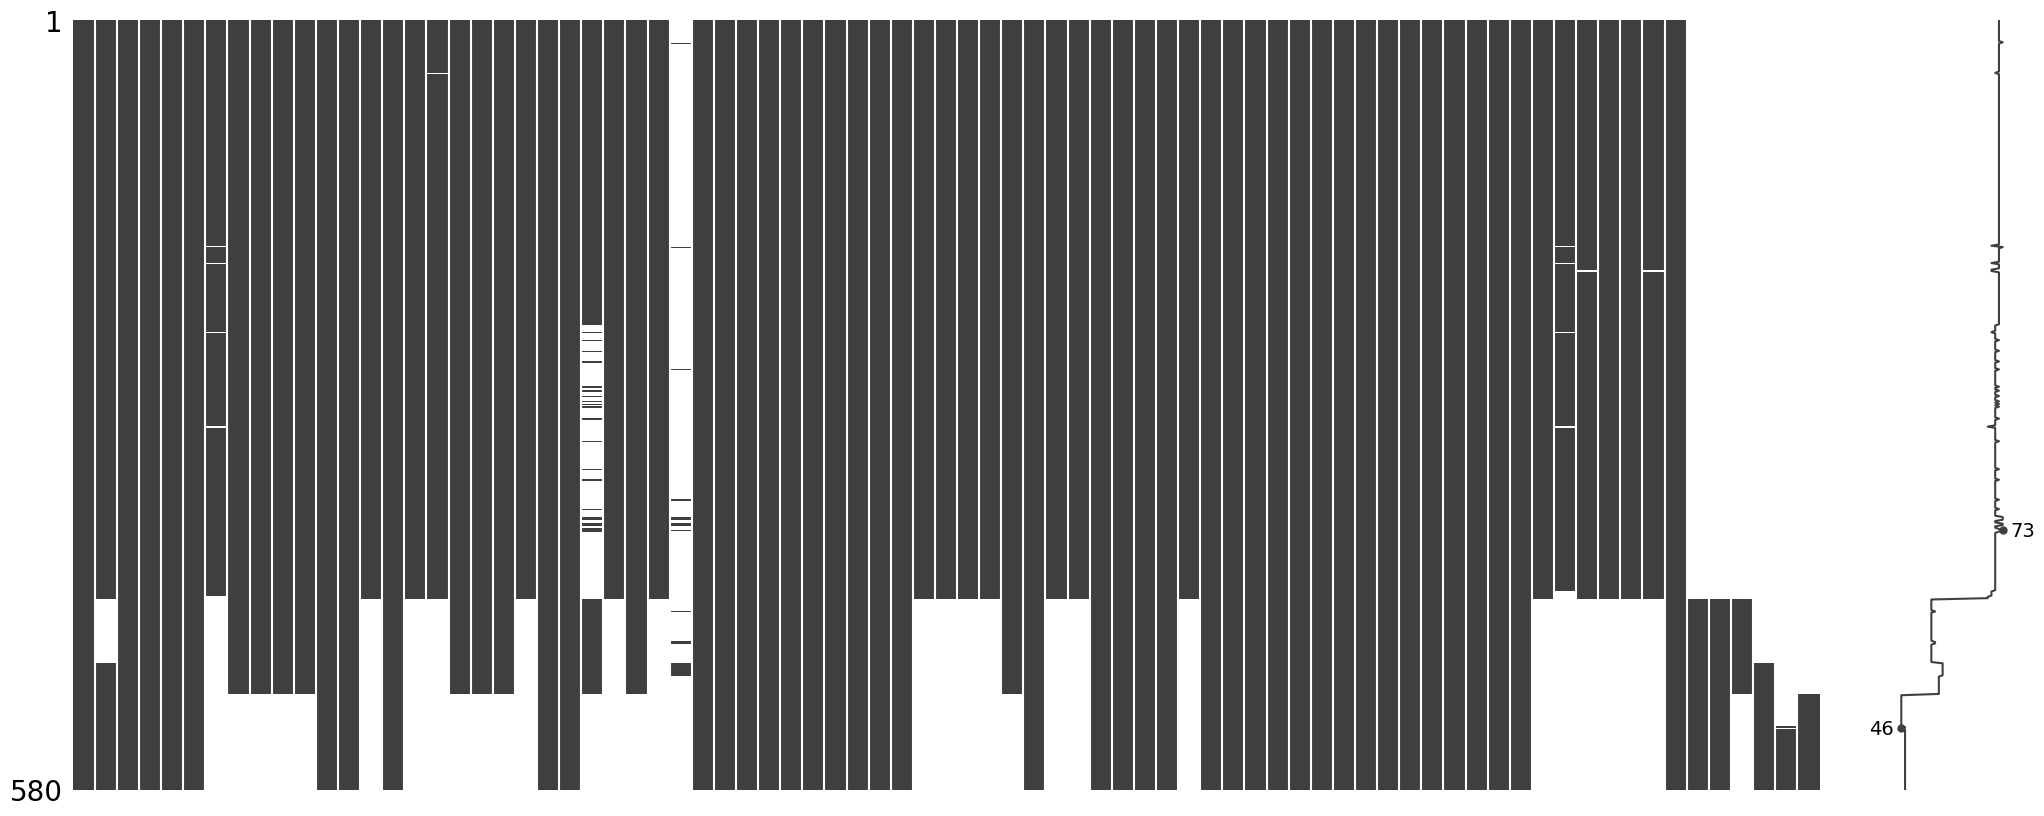

In [ ]:
%matplotlib inline
msno.matrix(df_muestra)

--- Iniciando Análisis Avanzado de Patrones de Nulidad Temporal en df_muestra ---

[Paso 1: Preparando Datos Temporales]
   - Extrayendo Año/Mes de la columna 'Archivo'...
   - Información temporal extraída correctamente para todas las filas.
   - Años detectados y a analizar: [np.int64(2001), np.int64(2002), np.int64(2003), np.int64(2004), np.int64(2005), np.int64(2006), np.int64(2007), np.int64(2008), np.int64(2009), np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024), np.int64(2025)]

[Paso 2: Calculando Presencia de Datos por Año (Basado en Primera Fila)]
   - Se calculó el % de presencia para 81 columnas a través de 25 años.

[Paso 3: Categorizando Columnas según Patrones de Presencia]

            Resultados del Análisis de Patrones de Nulidad Temporal
            (Basado en presencia de datos en

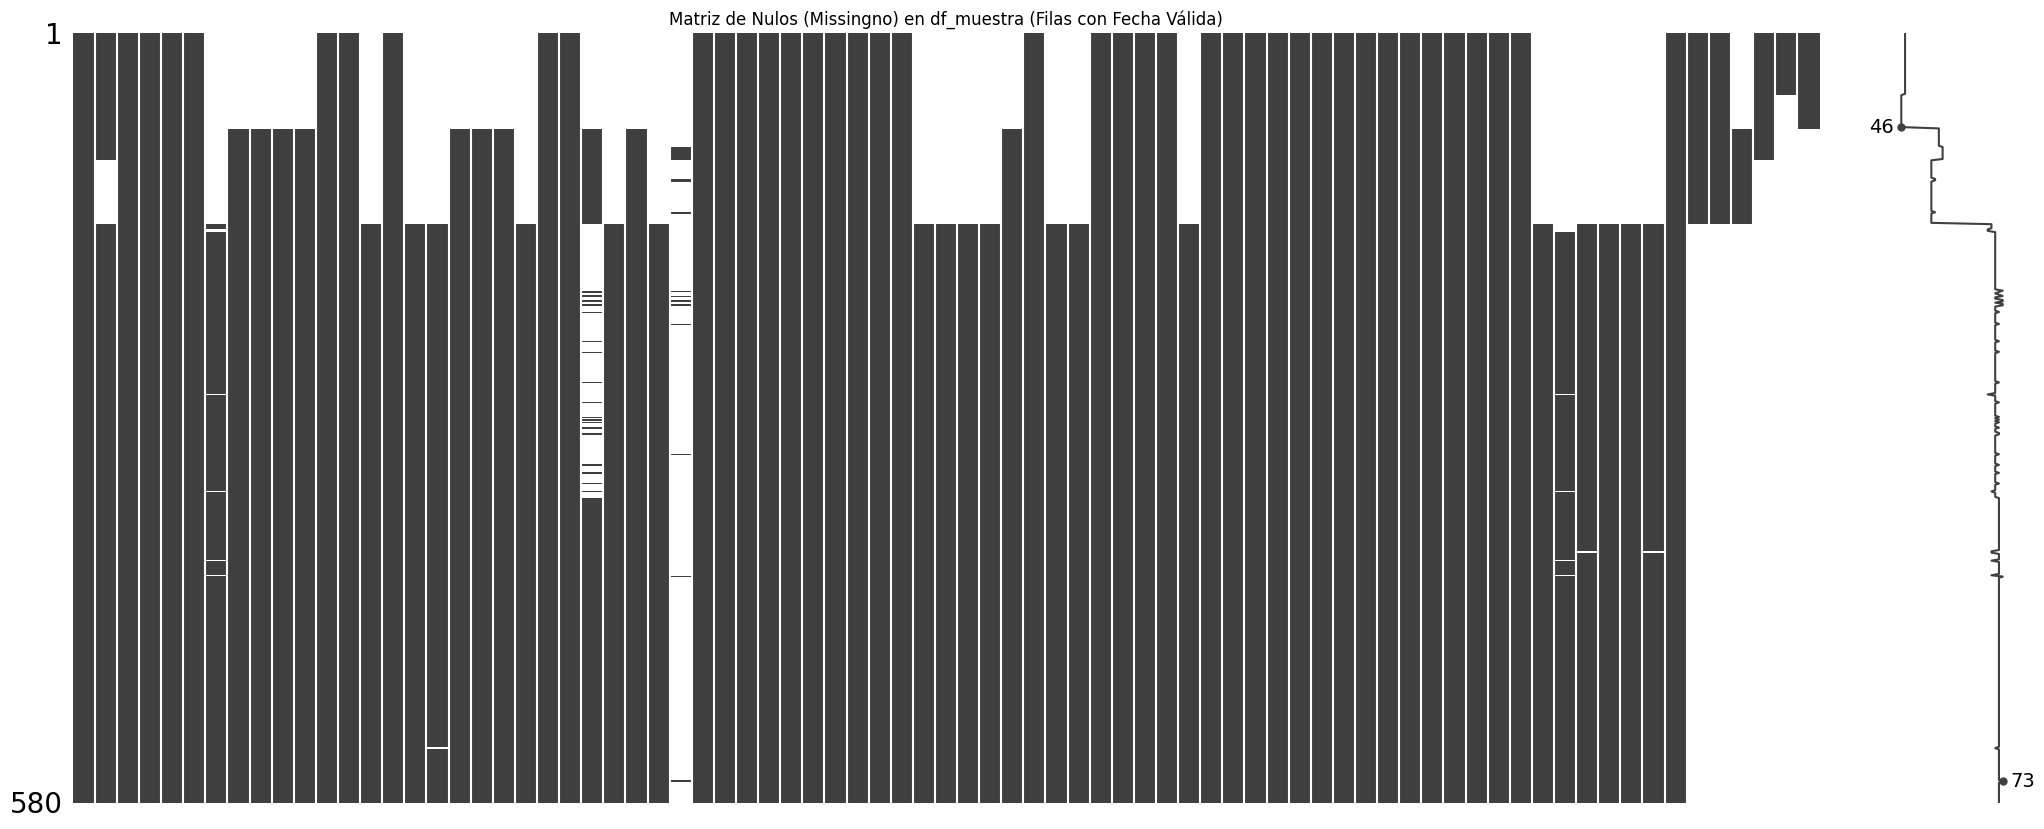


[Visualización 2: Heatmap de Porcentaje de Presencia por Año]
   (Muestra el % de archivos *de cada año* que tenían algún dato en la columna)


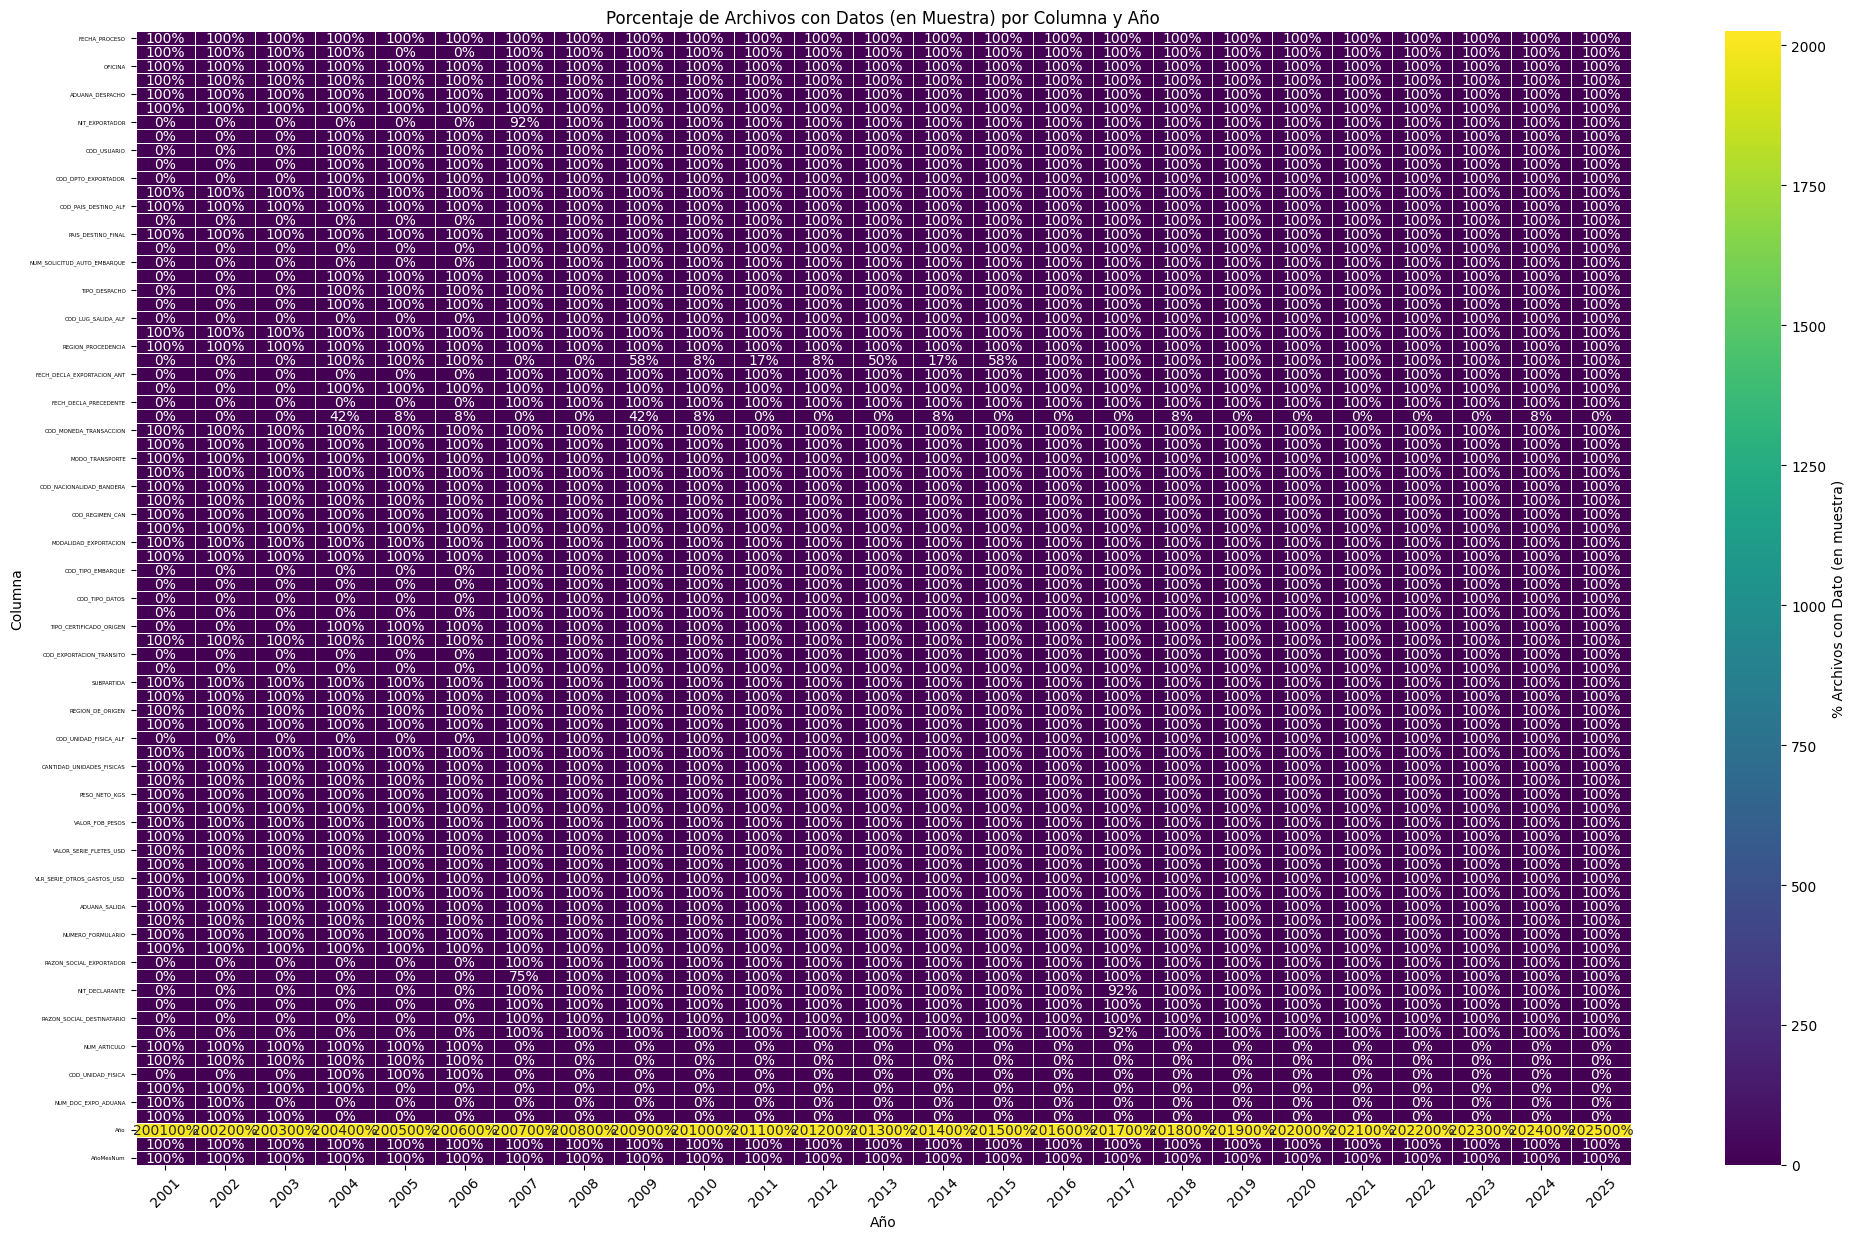


                   Implicaciones para la Carga en Snowflake

Basado en los patrones de presencia en la *muestra inicial* (cabecera y primera fila):
⚠️ **Situación Compleja:** Columnas aparecen ('Nuevas') o desaparecen ('Descontinuadas').
   - **Estrategia Snowflake (Recomendada): Tabla Ancha con NULLs.** Crear tabla con la **unión** de todas las columnas que alguna vez tuvieron datos (81 columnas).
     - Columnas 'Nuevas' serán NULL en años anteriores.
     - Columnas 'Descontinuadas' serán NULL en años posteriores.
   - **Ventaja:** Única tabla, simplifica consultas históricas.
   - **Próximo Paso Crítico:** Validar **tipos de datos** (pueden cambiar con el tiempo) y definir el esquema final.

**Recomendaciones Finales:**
1.  **Validación Profunda:** ¡Este análisis usa solo la muestra inicial!
    - Carga datos completos de archivos clave (antiguos/nuevos/transición).
    - Confirma si las 'Siempre Ausentes' realmente lo son.
    - **Valida tipos de datos reales y su consistencia.**

In [ ]:
# -*- coding: utf-8 -*-
"""
Análisis Avanzado de Patrones de Nulidad Temporal en df_muestra
para informar la estrategia de carga en Snowflake.

Autor: Asistente de IA (adaptado de la conversación)
Fecha: 2024-08-26

Este script asume que un DataFrame llamado 'df_muestra' ya existe en memoria,
conteniendo la cabecera y la primera fila de datos de múltiples archivos,
y una columna 'Archivo' con el nombre del archivo origen.
"""

import pandas as pd
import numpy as np
import re # Para expresiones regulares (parsing de nombres de archivo)
import matplotlib.pyplot as plt
import missingno as msno # Para visualización de nulos
import seaborn as sns # Para heatmap de presencia

print("--- Iniciando Análisis Avanzado de Patrones de Nulidad Temporal en df_muestra ---")

# --- Validaciones Iniciales del DataFrame de Entrada ---
if 'df_muestra' not in locals():
    print("❌ Error Fatal: El DataFrame 'df_muestra' no está definido.")
    print("   Asegúrate de haber cargado tus datos en una variable llamada 'df_muestra'.")
    # Detener o asignar un DF vacío para evitar más errores
    df_muestra = pd.DataFrame({'Archivo': []}) # Crear DF vacío
    # exit()

if not isinstance(df_muestra, pd.DataFrame):
    print(f"❌ Error Fatal: La variable 'df_muestra' no es un DataFrame de Pandas (es tipo {type(df_muestra)}).")
    # Detener o asignar un DF vacío
    df_muestra = pd.DataFrame({'Archivo': []})
    # exit()

if df_muestra.empty:
    print("⚠️ Advertencia: El DataFrame 'df_muestra' está vacío.")
    # El script continuará, pero el análisis no producirá resultados útiles.

if 'Archivo' not in df_muestra.columns:
    print("❌ Error Fatal: Falta la columna 'Archivo' en df_muestra. Es esencial para el análisis.")
    # Añadir columna vacía si no existe para evitar fallos posteriores en el código,
    # aunque el análisis temporal no funcionará.
    df_muestra['Archivo'] = None
    # exit() # Podrías detener aquí si es crítico

# --- 1. Extracción y Preparación de Información Temporal ---
print("\n[Paso 1: Preparando Datos Temporales]")

def extraer_año_mes_robust(nombre_archivo):
    """
    Intenta extraer Año y Mes del nombre del archivo de forma más robusta.
    Busca patrones como YYYY_MM, YYYYMM, YYYY-MM, o solo YYYY.
    Retorna (año, mes, año_mes_num) o (None, None, np.nan) si falla.
    """
    if not isinstance(nombre_archivo, str):
        return None, None, np.nan

    # Patrón: Busca 4 dígitos (año) seguidos opcionalmente por _, - o nada y 2 dígitos (mes)
    match = re.search(r'(\d{4})[_.-]?(\d{2})?', nombre_archivo)
    año, mes = None, 1 # Mes por defecto es 1 (Enero)

    if match:
        try:
            año_cand = int(match.group(1))
            # Validación simple del año (ajusta el rango si es necesario)
            if 1990 <= año_cand <= 2050:
                 año = año_cand
                 if match.group(2): # Si se encontró un mes
                     mes_cand = int(match.group(2))
                     if 1 <= mes_cand <= 12:
                         mes = mes_cand
            # Si el año no era válido, no hacemos nada aquí, lo intentaremos después
        except ValueError:
            pass # Ignorar errores de conversión aquí

    # Si el patrón principal no encontró un año válido, buscar cualquier bloque de 4 dígitos
    if año is None:
        match_año_solo = re.findall(r'(\d{4})', nombre_archivo) # findall para encontrar todos
        for año_str in match_año_solo:
             try:
                 año_cand_solo = int(año_str)
                 if 1990 <= año_cand_solo <= 2050:
                     año = año_cand_solo
                     # Si encontramos un año válido, no necesitamos seguir buscando
                     # (Podríamos refinar esto si hay múltiples años en el nombre)
                     break
             except ValueError:
                 continue # Ignorar si no es un entero

    if año:
        # Crear un valor numérico para ordenar fácilmente (ej: 2023.01)
        año_mes_num = float(f"{año}.{mes:02d}")
        return año, mes, año_mes_num
    else:
        # Si no se pudo extraer un año válido
        return None, None, np.nan

print("   - Extrayendo Año/Mes de la columna 'Archivo'...")

# Eliminar columnas temporales si existen de una ejecución anterior
cols_to_drop = ['Año', 'Mes', 'AñoMesNum']
df_muestra_clean = df_muestra.drop(columns=cols_to_drop, errors='ignore')

# Aplicar la función de parsing
try:
    parsed_dates = df_muestra_clean['Archivo'].apply(
        lambda x: pd.Series(extraer_año_mes_robust(x), index=['Año', 'Mes', 'AñoMesNum'])
    )
    # Concatenar los resultados con el DataFrame limpio
    df_analisis = pd.concat([df_muestra_clean, parsed_dates], axis=1)
    parsing_exitoso = True
except Exception as e:
    print(f"   ❌ Error durante la aplicación de la función de parsing de fechas: {e}")
    df_analisis = df_muestra_clean.copy() # Usar el DF sin columnas de fecha
    # Añadir columnas vacías para evitar errores posteriores
    df_analisis['Año'] = np.nan
    df_analisis['Mes'] = np.nan
    df_analisis['AñoMesNum'] = np.nan
    parsing_exitoso = False

# --- Validar Creación de Columnas Temporales y Contar NaNs ---
num_filas_original = len(df_muestra)
# Asumiendo 2 filas por archivo (cabecera + 1 dato)
num_archivos_original = num_filas_original // 2 if num_filas_original % 2 == 0 and num_filas_original > 0 else num_filas_original

archivos_sin_fecha = 0 # Inicializar contador
df_analisis_filtrado = pd.DataFrame() # Inicializar DF filtrado

# Verificar si la columna 'AñoMesNum' existe y se pudo calcular
if parsing_exitoso and 'AñoMesNum' in df_analisis.columns:
    try:
        # Contar los NaNs para obtener un número escalar
        num_nulos = df_analisis['AñoMesNum'].isna().sum()

        # Asegurarse que es un número (int o float)
        if not isinstance(num_nulos, (int, float, np.number)):
             print(f"   ❌ Error: El conteo de NaNs ('num_nulos') no es un número, es tipo {type(num_nulos)}. Valor: {num_nulos}")
             # Intentar forzar la suma total si es una Serie (síntoma de error previo)
             if isinstance(num_nulos, pd.Series):
                  num_nulos = num_nulos.sum()
             else: # No se puede resolver, asumir todos fallaron
                  print("     Asumiendo que falló la extracción para todas las filas.")
                  num_nulos = num_filas_original

        archivos_sin_fecha = int(num_nulos) # Convertir a int
        # print(f"   - Debug: Número de filas con AñoMesNum nulo: {archivos_sin_fecha}") # Descomentar para depuración

    except Exception as e:
        print(f"   ❌ Error inesperado al contar NaNs en 'AñoMesNum': {e}")
        archivos_sin_fecha = num_filas_original # Asumir fallo total en caso de error
else:
    # Si el parsing falló o la columna no existe
    if parsing_exitoso: # El parsing no dio error, pero la columna falta (raro)
        print("   ❌ Error Crítico: La columna 'AñoMesNum' no se encontró después del parsing.")
    archivos_sin_fecha = num_filas_original # Asumir que todas las filas fallaron

# --- Continuar con la lógica del if/else usando el valor escalar 'archivos_sin_fecha' ---
if archivos_sin_fecha >= num_filas_original:
     print("   ❌ Error Crítico: No se pudo extraer información temporal válida de NINGÚN archivo.")
     # df_analisis_filtrado ya está vacío, el resto del análisis se saltará o manejará el DF vacío.
elif archivos_sin_fecha > 0:
    num_archivos_fallidos = archivos_sin_fecha // 2 if archivos_sin_fecha % 2 == 0 else archivos_sin_fecha
    print(f"   ⚠️ Advertencia: No se pudo extraer Año/Mes de {archivos_sin_fecha} filas (aprox. {num_archivos_fallidos} archivos).")
    print("     Ejemplos de nombres de archivo no parseados:")
    try:
        # Mostrar ejemplos de archivos donde AñoMesNum es NaN
        nombres_fallidos = df_analisis.loc[df_analisis['AñoMesNum'].isna(), 'Archivo'].unique()
        print(nombres_fallidos[:min(5, len(nombres_fallidos))])
    except Exception as e:
        print(f"     (Error al obtener ejemplos: {e})")

    # Filtrar para mantener solo filas con fecha válida
    df_analisis_filtrado = df_analisis.dropna(subset=['AñoMesNum']).copy()
    num_filas_analizadas = len(df_analisis_filtrado)
    num_archivos_analizados = num_filas_analizadas // 2 if num_filas_analizadas % 2 == 0 else num_filas_analizadas
    print(f"   - Se procederá a analizar {num_filas_analizadas} filas ({num_archivos_analizados} archivos) con fecha válida.")
else:
    print("   - Información temporal extraída correctamente para todas las filas.")
    df_analisis_filtrado = df_analisis.copy()
    num_filas_analizadas = len(df_analisis_filtrado)
    num_archivos_analizados = num_filas_analizadas // 2 if num_filas_analizadas % 2 == 0 else num_filas_analizadas

# --- Proceder solo si hay datos para analizar ---
if df_analisis_filtrado.empty:
      print("\n❌ No hay datos con información temporal válida para continuar el análisis.")
else:
    # Asegurar tipos correctos para Año y ordenar
    df_analisis_filtrado['Año'] = pd.to_numeric(df_analisis_filtrado['Año'], errors='coerce').astype('Int64')
    # Eliminar filas si la conversión de Año falló (aunque no debería si AñoMesNum es válido)
    df_analisis_filtrado.dropna(subset=['Año'], inplace=True)

    if df_analisis_filtrado.empty:
         print("\n❌ No quedaron datos después de asegurar el tipo numérico del Año.")
    else:
        df_analisis_filtrado = df_analisis_filtrado.sort_values(by=['AñoMesNum', 'Archivo']).reset_index(drop=True)
        años_presentes = sorted(df_analisis_filtrado['Año'].unique())
        print(f"   - Años detectados y a analizar: {años_presentes}")

        # --- 2. Cálculo de Presencia de Datos ---
        print("\n[Paso 2: Calculando Presencia de Datos por Año (Basado en Primera Fila)]")
        # Columnas a analizar (excluir las de metadata y tiempo añadidas)
        columnas_originales = [col for col in df_muestra.columns if col not in ['Archivo']]
        columnas_datos = [col for col in df_analisis_filtrado.columns if col in columnas_originales]

        if not columnas_datos:
             print("❌ Error: No se identificaron columnas de datos originales para analizar.")
        else:
            # Agrupar por Archivo. Consideramos que hay dato si *alguna* de las filas
            # (cabecera o primera fila de datos) para ese archivo tiene un valor no nulo.
            try:
                presencia_por_archivo = df_analisis_filtrado.groupby('Archivo')[columnas_datos].apply(lambda x: x.notna().any())

                # Añadir el año a esta tabla de presencia
                # Usamos .first() ya que el año debería ser el mismo para las 2 filas de un archivo
                presencia_por_archivo['Año'] = df_analisis_filtrado.groupby('Archivo')['Año'].first()
                # Eliminar filas donde el año no se pudo determinar (por si acaso)
                presencia_por_archivo.dropna(subset=['Año'], inplace=True)
                presencia_por_archivo['Año'] = presencia_por_archivo['Año'].astype(int)


                # Calcular el porcentaje de archivos *en cada año* que tienen datos para cada columna
                presencia_por_año_pct = presencia_por_archivo.groupby('Año')[columnas_datos].mean()
                print(f"   - Se calculó el % de presencia para {len(columnas_datos)} columnas a través de {len(años_presentes)} años.")
                calculo_presencia_ok = True
            except Exception as e:
                 print(f"   ❌ Error durante el cálculo de presencia de datos: {e}")
                 calculo_presencia_ok = False
                 presencia_por_año_pct = pd.DataFrame() # Crear DF vacío

            # --- 3. Categorización de Columnas ---
            if calculo_presencia_ok and not presencia_por_año_pct.empty:
                print("\n[Paso 3: Categorizando Columnas según Patrones de Presencia]")

                columnas_completas = []
                columnas_descontinuadas = {} # {col: ultimo_año_con_datos}
                columnas_nuevas = {} # {col: primer_año_con_datos}
                columnas_intermitentes = []
                columnas_siempre_ausentes = []

                # Umbrales (ajustables)
                umbral_presente = 0.90 # % de archivos en un año para considerar "presente"
                umbral_ausente = 0.10  # % de archivos en un año para considerar "ausente"

                for col in columnas_datos:
                    if col not in presencia_por_año_pct.columns:
                        # Esto no debería pasar si columnas_datos se derivó bien, pero por si acaso
                        continue

                    serie_presencia = presencia_por_año_pct[col].dropna()

                    if serie_presencia.empty:
                        # Si la columna no tuvo presencia en ningún año analizado
                        columnas_siempre_ausentes.append(col)
                        continue

                    min_presencia = serie_presencia.min()
                    max_presencia = serie_presencia.max()

                    if min_presencia >= umbral_presente:
                        columnas_completas.append(col)
                    elif max_presencia <= umbral_ausente:
                        columnas_siempre_ausentes.append(col)
                    else:
                        # Lógica para Nuevas/Descontinuadas/Intermitentes (simplificada)
                        años_presentes_idx = serie_presencia[serie_presencia >= umbral_presente].index
                        años_ausentes_idx = serie_presencia[serie_presencia <= umbral_ausente].index
                        primer_año_serie = serie_presencia.index.min()
                        ultimo_año_serie = serie_presencia.index.max()

                        # Es Nueva si empieza ausente y termina presente?
                        es_nueva = False
                        if not años_presentes_idx.empty and años_presentes_idx.min() > primer_año_serie:
                           if (serie_presencia.loc[:años_presentes_idx.min()-1] <= umbral_ausente).all():
                               if (serie_presencia.loc[años_presentes_idx.min():] >= umbral_presente).all():
                                   columnas_nuevas[col] = años_presentes_idx.min()
                                   es_nueva = True

                        # Es Descontinuada si empieza presente y termina ausente? (y no es nueva)
                        es_descontinuada = False
                        if not es_nueva and not años_presentes_idx.empty and años_presentes_idx.max() < ultimo_año_serie:
                             if (serie_presencia.loc[años_presentes_idx.max()+1:] <= umbral_ausente).all():
                                  if (serie_presencia.loc[:años_presentes_idx.max()] >= umbral_presente).all():
                                     columnas_descontinuadas[col] = años_presentes_idx.max()
                                     es_descontinuada = True

                        if not es_nueva and not es_descontinuada:
                            columnas_intermitentes.append(col)

                # --- 4. Presentación de Resultados y Visualizaciones ---
                print("\n" + "="*80)
                print("            Resultados del Análisis de Patrones de Nulidad Temporal")
                print("            (Basado en presencia de datos en cabecera o primera fila)")
                print("="*80)
                print(f"\nArchivos Analizados: {num_archivos_analizados} (de {num_archivos_original} originales con nombre parseable)")
                print(f"Años Cubiertos: {min(años_presentes)} - {max(años_presentes)}")
                print(f"\nCategorías (Umbrales: Presente >{umbral_presente*100}%, Ausente <{umbral_ausente*100}%):")

                print(f"\n✅ Columnas Completas ({len(columnas_completas)}): Consistentemente presentes en la muestra.")
                if columnas_completas: print(f"   -> {', '.join(columnas_completas)}")

                print(f"\n🆕 Columnas Nuevas ({len(columnas_nuevas)}): Aparecen consistentemente a partir de un año.")
                if columnas_nuevas:
                    for col, año in sorted(columnas_nuevas.items(), key=lambda item: item[1]):
                        print(f"   - {col} (Desde {año})")

                print(f"\n📉 Columnas Descontinuadas ({len(columnas_descontinuadas)}): Desaparecen consistentemente después de un año.")
                if columnas_descontinuadas:
                    for col, año in sorted(columnas_descontinuadas.items(), key=lambda item: item[1], reverse=True):
                        print(f"   - {col} (Hasta {año})")

                print(f"\n❓ Columnas Intermitentes ({len(columnas_intermitentes)}): Presencia varía sin patrón claro de inicio/fin.")
                if columnas_intermitentes: print(f"   -> {', '.join(columnas_intermitentes)}")

                print(f"\n❌ Columnas Siempre Ausentes ({len(columnas_siempre_ausentes)}): Consistentemente ausentes en la muestra.")
                if columnas_siempre_ausentes: print(f"   -> {', '.join(columnas_siempre_ausentes)}")

                # --- Visualizaciones ---
                print("\n" + "="*80)
                print("                         Visualizaciones de Soporte")
                print("="*80)

                # 1. Matriz Missingno
                print("\n[Visualización 1: Matriz de Nulos 'Missingno' sobre la muestra analizada]")
                print("   (Las líneas blancas indican datos faltantes - NaN - en las filas de muestra)")
                try:
                    cols_to_plot_msno = [c for c in df_analisis_filtrado.columns if c not in ['Año', 'Mes', 'AñoMesNum']]
                    if not df_analisis_filtrado[cols_to_plot_msno].empty:
                        msno.matrix(df_analisis_filtrado[cols_to_plot_msno])
                        plt.title('Matriz de Nulos (Missingno) en df_muestra (Filas con Fecha Válida)')
                        plt.show()
                    else:
                         print("   -> No se generó gráfico missingno (DataFrame vacío).")
                except Exception as e:
                    print(f"   -> Error al generar gráfico missingno: {e}")

                # 2. Heatmap de Presencia por Año
                print("\n[Visualización 2: Heatmap de Porcentaje de Presencia por Año]")
                print("   (Muestra el % de archivos *de cada año* que tenían algún dato en la columna)")
                try:
                    if not presencia_por_año_pct.empty:
                        # Ajustar tamaño dinámicamente
                        num_cols_heatmap = presencia_por_año_pct.shape[1]
                        num_años_heatmap = presencia_por_año_pct.shape[0]
                        plt.figure(figsize=(max(12, num_cols_heatmap * 0.25), # Ancho
                                           max(8, num_años_heatmap * 0.5)))    # Alto
                        sns.heatmap(presencia_por_año_pct.transpose(), # Columnas en eje Y
                                    cmap="viridis",
                                    linewidths=.5,
                                    annot=True, # Mostrar porcentajes
                                    fmt=".0%",
                                    cbar_kws={'label': '% Archivos con Dato (en muestra)'})
                        plt.title('Porcentaje de Archivos con Datos (en Muestra) por Columna y Año')
                        plt.xlabel('Año')
                        plt.ylabel('Columna')
                        plt.xticks(rotation=45)
                        # Ajustar tamaño de fuente de etiquetas Y si hay muchas columnas
                        ytick_fontsize = max(4, min(10, 200 / num_cols_heatmap))
                        plt.yticks(rotation=0, fontsize=ytick_fontsize)
                        plt.tight_layout() # Ajustar para que no se solapen etiquetas
                        plt.show()
                        # Guardar: plt.savefig("heatmap_presencia_datos_por_año.png", dpi=300, bbox_inches='tight')
                    else:
                        print("   -> No se generó heatmap (no hay datos de presencia por año).")
                except ImportError:
                    print("   -> (Para generar heatmap, necesitas seaborn: pip install seaborn)")
                except Exception as e:
                    print(f"   -> Error al generar heatmap: {e}")

                # --- Implicaciones para Snowflake ---
                print("\n" + "="*80)
                print("                   Implicaciones para la Carga en Snowflake")
                print("="*80)
                print("\nBasado en los patrones de presencia en la *muestra inicial* (cabecera y primera fila):")

                columnas_relevantes = columnas_completas + list(columnas_nuevas.keys()) + list(columnas_descontinuadas.keys()) + columnas_intermitentes

                if not columnas_nuevas and not columnas_descontinuadas and not columnas_intermitentes and not columnas_siempre_ausentes:
                    print("✅ **Situación Ideal:** Todas las columnas originales parecen estar consistentemente presentes.")
                    print(f"   - **Estrategia Snowflake:** Tabla única con las {len(columnas_completas)} columnas.")
                    print("   - **Próximo Paso Crítico:** Validar **tipos de datos** reales.")
                elif not columnas_nuevas and not columnas_descontinuadas:
                    print("🤔 **Situación Común:** Columnas presentes, intermitentes y/o siempre ausentes.")
                    print(f"   - **Estrategia Snowflake (Recomendada): Tabla Ancha.** Crear tabla con todas las columnas que *alguna vez* tuvieron datos ({len(columnas_relevantes)} columnas).")
                    print("   - Columnas 'Intermitentes'/'Siempre Ausentes' (si se incluyen) tendrán NULLs.")
                    print("   - **Consideración:** Evaluar si las 'Siempre Ausentes' deben incluirse en el esquema final.")
                    print("   - **Próximo Paso Crítico:** Validar **tipos de datos** y decidir manejo de NULLs.")
                else:
                    print("⚠️ **Situación Compleja:** Columnas aparecen ('Nuevas') o desaparecen ('Descontinuadas').")
                    print(f"   - **Estrategia Snowflake (Recomendada): Tabla Ancha con NULLs.** Crear tabla con la **unión** de todas las columnas que alguna vez tuvieron datos ({len(columnas_relevantes)} columnas).")
                    print("     - Columnas 'Nuevas' serán NULL en años anteriores.")
                    print("     - Columnas 'Descontinuadas' serán NULL en años posteriores.")
                    print("   - **Ventaja:** Única tabla, simplifica consultas históricas.")
                    print("   - **Próximo Paso Crítico:** Validar **tipos de datos** (pueden cambiar con el tiempo) y definir el esquema final.")

                print("\n**Recomendaciones Finales:**")
                print("1.  **Validación Profunda:** ¡Este análisis usa solo la muestra inicial!")
                print("    - Carga datos completos de archivos clave (antiguos/nuevos/transición).")
                print("    - Confirma si las 'Siempre Ausentes' realmente lo son.")
                print("    - **Valida tipos de datos reales y su consistencia.**")
                print("    - Verifica si los patrones de nulidad de la muestra se mantienen.")
                print("2.  **Definir Esquema Snowflake:** Usa este análisis + validación profunda para el `CREATE TABLE`.")
                print("3.  **Adaptar Carga (ETL/ELT):**")
                print("    - Asegura que el DF a cargar tenga **todas** las columnas del esquema final (añadir faltantes como `None`).")
                print("    - Realiza conversiones de tipo **antes** de cargar.")

            else:
                 print("\nNo se pudo realizar la categorización de columnas ni generar conclusiones detalladas debido a errores previos en el cálculo de presencia.")

# --- Fin del Script ---
print("\n--- Fin del Análisis Avanzado de df_muestra ---")

--- Iniciando Análisis Avanzado de Patrones de Nulidad Temporal ---
   - Extrayendo información temporal de la columna 'Archivo'...
   - Información temporal extraída correctamente.
   - Años detectados en los nombres de archivo: [np.float64(2001.0), np.float64(2002.0), np.float64(2003.0), np.float64(2004.0), np.float64(2005.0), np.float64(2006.0), np.float64(2007.0), np.float64(2008.0), np.float64(2009.0), np.float64(2010.0), np.float64(2011.0), np.float64(2012.0), np.float64(2013.0), np.float64(2014.0), np.float64(2015.0), np.float64(2016.0), np.float64(2017.0), np.float64(2018.0), np.float64(2019.0), np.float64(2020.0), np.float64(2021.0), np.float64(2022.0), np.float64(2023.0), np.float64(2024.0), np.float64(2025.0)]
   - Analizando presencia de datos por columna y año...
   - Categorizando columnas según patrones de presencia...

--- Resultados del Análisis de Patrones de Nulidad Temporal (Basado en Primera Fila) ---
NOTA: 'Presente' significa que la columna tenía un valor (no NaN

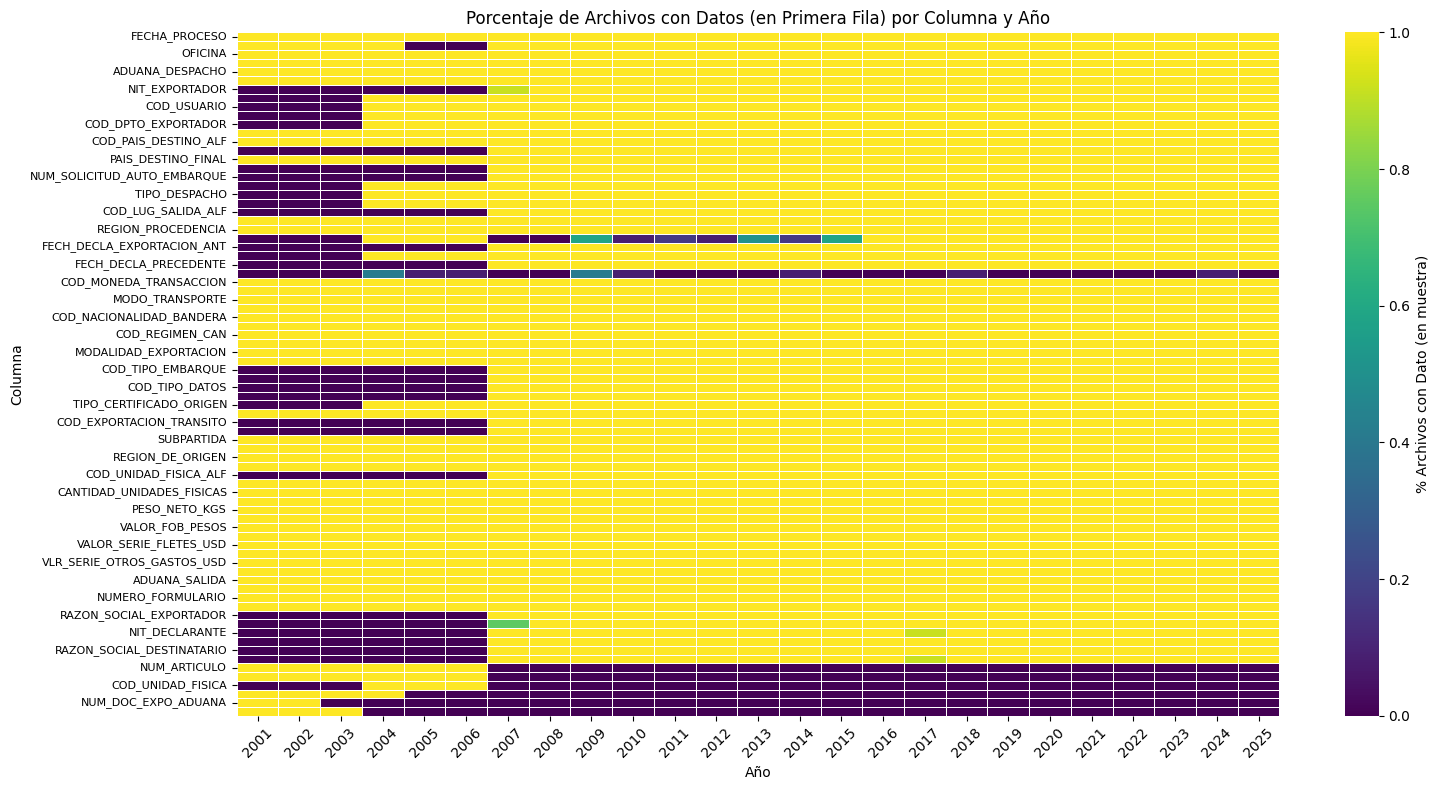


   Recordatorio: Matriz de Missingno original sobre df_muestra (blanco = NaN)


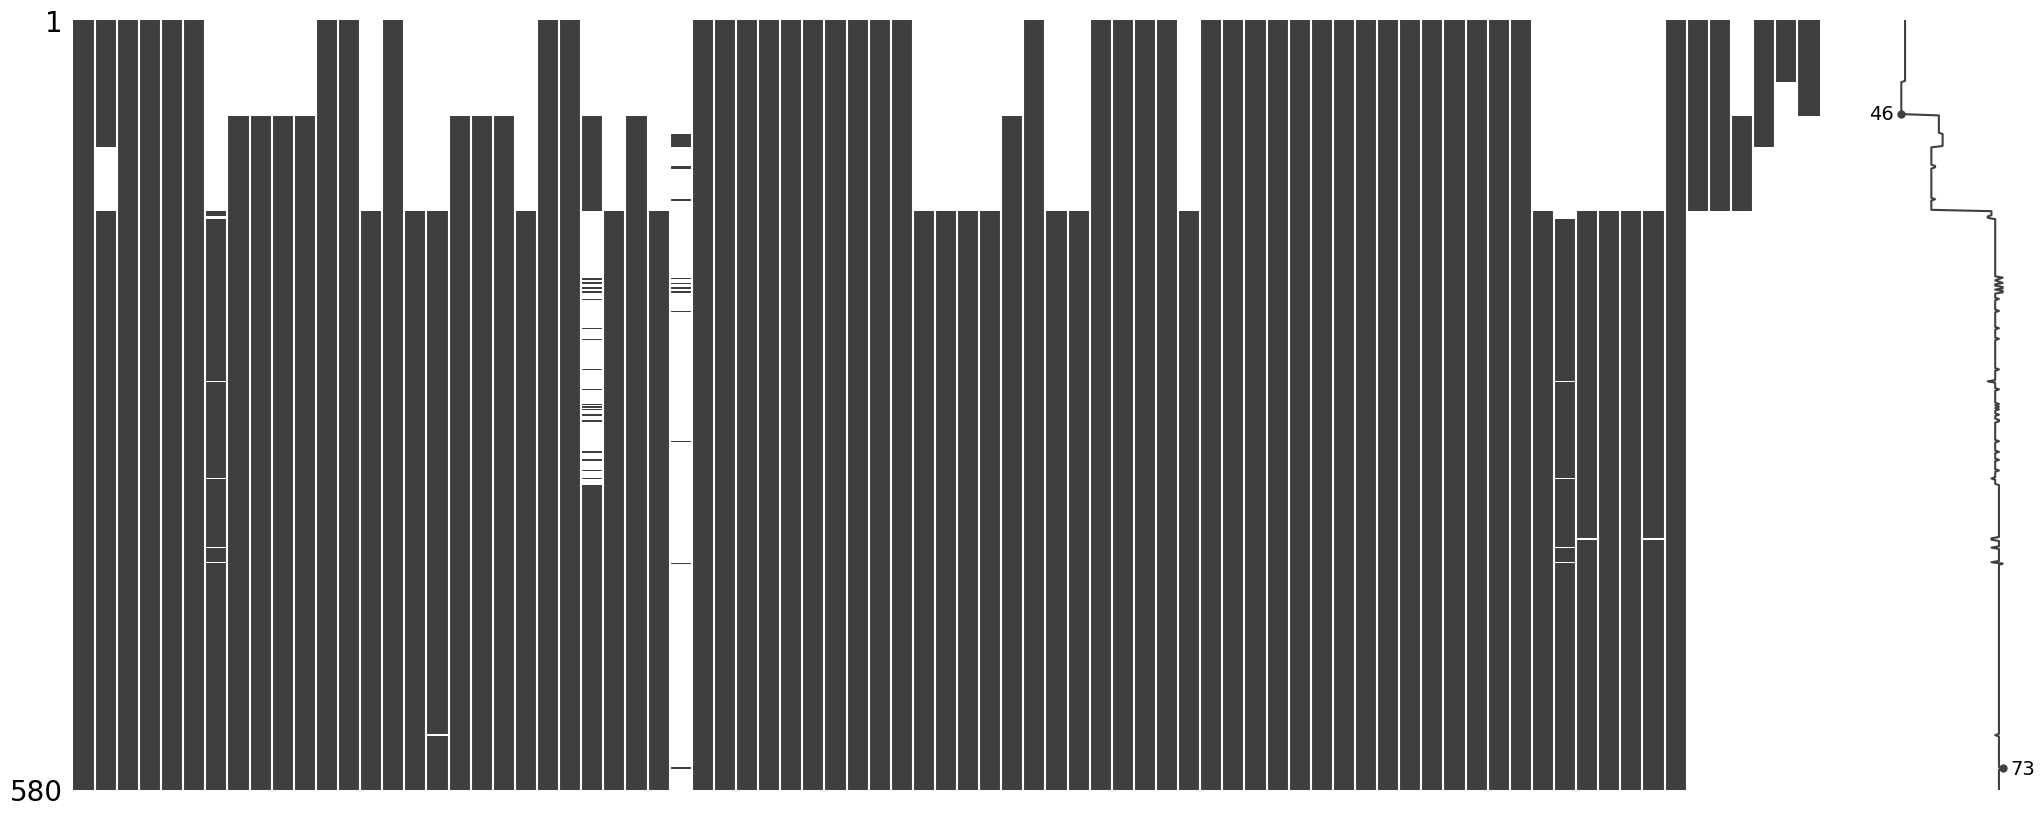


--- Implicaciones para la Carga en Snowflake ---
Basado en los patrones de presencia en la *primera fila muestreada*: 
⚠️ **Situación Compleja:** Existen columnas que aparecen ('Nuevas') o desaparecen ('Descontinuadas') con el tiempo, además de las intermitentes.
   - **Estrategia 1 (Más Común): Tabla Ancha con NULLs:**
     - Crear una tabla en Snowflake con la **unión** de todas las columnas que alguna vez estuvieron presentes (Completas + Nuevas + Descontinuadas + Intermitentes).
     - Al cargar datos de años 'antiguos', las columnas 'Nuevas' serán NULL.
     - Al cargar datos de años 'recientes', las columnas 'Descontinuadas' serán NULL.
     - **Ventaja:** Única tabla, fácil de consultar aunque puede tener muchos NULLs.
     - **Desventaja:** Puede ser menos eficiente en almacenamiento/consulta si hay muchas columnas dispersas.
   - **Estrategia 2 (Más Compleja): Versionado o Tablas Separadas:**
     - Podrías considerar tener diferentes esquemas o tablas si los cambios son muy 

In [ ]:
%%time

import pandas as pd
import numpy as np
import re # Para expresiones regulares (parsing de nombres de archivo)
import missingno as msno
import matplotlib.pyplot as plt

# --- ASUME QUE 'df_muestra' YA ESTÁ CARGADO EN MEMORIA ---
# Si necesitas cargarlo desde un archivo:
# df_muestra = pd.read_csv("ruta/a/tu/df_muestra.csv") # Ajusta la ruta

print("--- Iniciando Análisis Avanzado de Patrones de Nulidad Temporal ---")

if 'df_muestra' not in locals() or not isinstance(df_muestra, pd.DataFrame) or df_muestra.empty:
    print("❌ Error: El DataFrame 'df_muestra' no está definido, no es válido o está vacío.")
    # exit() # O detener la ejecución si es necesario

if 'Archivo' not in df_muestra.columns:
    print("❌ Error: Falta la columna 'Archivo'. Es esencial para el análisis temporal.")
    # exit()

# --- 1. Extraer Información Temporal y Preparar Datos ---

def extraer_año_mes(nombre_archivo):
    """Intenta extraer Año y Mes del nombre del archivo. Ajusta el regex según tu patrón."""
    # Intenta patrones comunes (YYYY_MM, YYYYMM, solo YYYY)
    match = re.search(r'(\d{4})_?(\d{2})?', nombre_archivo)
    if match:
        año = int(match.group(1))
        # Asigna mes 1 si no se encuentra explícitamente o es inválido
        mes = int(match.group(2)) if match.group(2) else 1
        # Validar año y mes básicos
        if 1990 < año < 2050 and 1 <= mes <= 12:
             # Crear un valor numérico para ordenar fácilmente
             return año, mes, float(f"{año}.{mes:02d}")
        elif 1990 < año < 2050: # Si solo se encontró año válido
             return año, 1, float(f"{año}.01") # Asumir mes 1
    # Fallback: si no hay patrón claro, intentar extraer solo 4 dígitos seguidos como año
    match_año_solo = re.search(r'(\d{4})', nombre_archivo)
    if match_año_solo:
         año = int(match_año_solo.group(1))
         if 1990 < año < 2050:
             return año, 1, float(f"{año}.01") # Asumir mes 1
    return None, None, np.nan # No se pudo extraer

print("   - Extrayendo información temporal de la columna 'Archivo'...")
df_muestra[['Año', 'Mes', 'AñoMesNum']] = df_muestra['Archivo'].apply(
    lambda x: pd.Series(extraer_año_mes(x))
)

# Verificar cuántos archivos no pudieron ser parseados
archivos_sin_fecha = df_muestra['AñoMesNum'].isna().sum()
if archivos_sin_fecha > 0:
    print(f"   ⚠️ Advertencia: No se pudo extraer Año/Mes de {archivos_sin_fecha} filas (correspondientes a {archivos_sin_fecha // 2} archivos).")
    print("     Ejemplos de nombres no parseados:")
    print(df_muestra.loc[df_muestra['AñoMesNum'].isna(), 'Archivo'].unique()[:5])
    # Decidir si continuar o detener. Por ahora, los excluiremos del análisis temporal.
    df_analisis = df_muestra.dropna(subset=['AñoMesNum']).copy()
    if df_analisis.empty:
        print("❌ Error: No quedaron datos válidos después de intentar extraer fechas. Deteniendo análisis.")
        # exit()
else:
    print("   - Información temporal extraída correctamente.")
    df_analisis = df_muestra.copy()


# Asegurar que Año sea numérico para el análisis
df_analisis['Año'] = pd.to_numeric(df_analisis['Año'], errors='coerce')
df_analisis = df_analisis.dropna(subset=['Año']) # Eliminar filas donde el año no sea válido

if df_analisis.empty:
      print("❌ Error: No quedaron datos con años válidos para analizar.")
      # exit()

# Ordenar por tiempo para el análisis de patrones
df_analisis = df_analisis.sort_values(by=['AñoMesNum', 'Archivo']).reset_index(drop=True)
años_presentes = sorted(df_analisis['Año'].unique())
print(f"   - Años detectados en los nombres de archivo: {años_presentes}")

# --- 2. Analizar Presencia de Datos por Columna y Año ---
#    Nos enfocamos en si hay *algún* dato (no NaN) para esa columna en las filas
#    correspondientes a un archivo específico.

print("   - Analizando presencia de datos por columna y año...")

# Agrupar por Archivo y verificar si la columna tiene algún valor no nulo
# dentro de las filas de ese archivo en df_muestra
columnas_datos = [col for col in df_analisis.columns if col not in ['Archivo', 'Año', 'Mes', 'AñoMesNum']]
presencia_por_archivo = df_analisis.groupby('Archivo')[columnas_datos].apply(lambda x: x.notna().any())

# Añadir el año a esta tabla de presencia para análisis temporal
presencia_por_archivo['Año'] = df_analisis.groupby('Archivo')['Año'].first().astype(int)

# Calcular el porcentaje de archivos *en cada año* que tienen datos para cada columna
presencia_por_año_pct = presencia_por_archivo.groupby('Año')[columnas_datos].mean()

# --- 3. Categorizar Columnas ---
print("   - Categorizando columnas según patrones de presencia...")

columnas_completas = []
columnas_descontinuadas = {} # {col: ultimo_año_con_datos}
columnas_nuevas = {} # {col: primer_año_con_datos}
columnas_intermitentes = []
columnas_siempre_ausentes = []

# Umbrales (ajustables)
umbral_presente = 0.90 # % de archivos en un año que deben tener dato para considerarlo "presente"
umbral_ausente = 0.10  # % de archivos en un año que deben tener dato para considerarlo "ausente"

for col in columnas_datos:
    serie_presencia = presencia_por_año_pct[col]

    # Ignorar años donde la columna no existe (si hubiera alguna inconsistencia no detectada antes)
    serie_presencia = serie_presencia.dropna()

    if serie_presencia.empty:
        continue # Columna sin datos en ningún año analizado

    siempre_presente = (serie_presencia >= umbral_presente).all()
    siempre_ausente = (serie_presencia <= umbral_ausente).all()

    if siempre_presente:
        columnas_completas.append(col)
    elif siempre_ausente:
        columnas_siempre_ausentes.append(col)
    else:
        # Buscar patrones de cambio
        años_presentes_idx = serie_presencia[serie_presencia >= umbral_presente].index
        años_ausentes_idx = serie_presencia[serie_presencia <= umbral_ausente].index

        # Verificar si es descontinuada
        # Condición: Hay años presentes, y el último año presente es ANTES del último año total,
        # y los años *después* del último presente están mayormente ausentes.
        if len(años_presentes_idx) > 0:
            ultimo_año_presente = años_presentes_idx.max()
            if ultimo_año_presente < años_presentes[-1]: # No presente en el último año
                 años_posteriores = serie_presencia[serie_presencia.index > ultimo_año_presente]
                 if not años_posteriores.empty and (años_posteriores <= umbral_ausente).all():
                      columnas_descontinuadas[col] = ultimo_año_presente
                      continue # Pasar a la siguiente columna

        # Verificar si es nueva
        # Condición: Hay años presentes, y el primer año presente es DESPUÉS del primer año total,
        # y los años *antes* del primero presente están mayormente ausentes.
        if len(años_presentes_idx) > 0:
             primer_año_presente = años_presentes_idx.min()
             if primer_año_presente > años_presentes[0]: # No presente en el primer año
                 años_anteriores = serie_presencia[serie_presencia.index < primer_año_presente]
                 if not años_anteriores.empty and (años_anteriores <= umbral_ausente).all():
                      columnas_nuevas[col] = primer_año_presente
                      continue # Pasar a la siguiente columna

        # Si no es completa, ni ausente, ni claramente nueva o descontinuada, es intermitente
        columnas_intermitentes.append(col)


# --- 4. Presentar Resultados ---
print("\n--- Resultados del Análisis de Patrones de Nulidad Temporal (Basado en Primera Fila) ---")
print("NOTA: 'Presente' significa que la columna tenía un valor (no NaN) en la primera fila de datos")
print(f"      para la mayoría de archivos (> {umbral_presente*100}%) de ese año.")
print(f"      'Ausente' significa que tenía valor en pocos archivos (< {umbral_ausente*100}%) de ese año.")

print(f"\n✅ Columnas Completas (Presentes en la muestra de casi todos los archivos de todos los años): {len(columnas_completas)}")
if columnas_completas: print(f"   - {', '.join(columnas_completas)}")

print(f"\n🆕 Columnas Nuevas (Se volvieron presentes consistentemente a partir de un año): {len(columnas_nuevas)}")
if columnas_nuevas:
    for col, año in sorted(columnas_nuevas.items(), key=lambda item: item[1]):
        print(f"   - {col} (Aparece consistentemente desde {año})")

print(f"\n📉 Columnas Descontinuadas (Dejaron de estar presentes consistentemente después de un año): {len(columnas_descontinuadas)}")
if columnas_descontinuadas:
    for col, año in sorted(columnas_descontinuadas.items(), key=lambda item: item[1], reverse=True):
        print(f"   - {col} (Presente consistentemente hasta {año})")

print(f"\n❓ Columnas Intermitentes (Presencia varía a lo largo de los años sin patrón claro de inicio/fin): {len(columnas_intermitentes)}")
if columnas_intermitentes: print(f"   - {', '.join(columnas_intermitentes)}")

print(f"\n❌ Columnas Siempre Ausentes (Nunca presentes en la muestra de la mayoría de archivos de ningún año): {len(columnas_siempre_ausentes)}")
if columnas_siempre_ausentes: print(f"   - {', '.join(columnas_siempre_ausentes)}")

# --- Visualización Adicional (Opcional pero recomendada) ---
print("\n--- Visualización del Patrón de Presencia por Año ---")
try:
    # Graficar el heatmap de presencia por año (% de archivos con datos)
    plt.figure(figsize=(max(15, len(columnas_datos)*0.2), max(8, len(presencia_por_año_pct)*0.3))) # Ajustar tamaño
    sns.heatmap(presencia_por_año_pct.transpose(), cmap="viridis", linewidths=.5, annot=False, fmt=".0%", cbar_kws={'label': '% Archivos con Dato (en muestra)'})
    plt.title('Porcentaje de Archivos con Datos (en Primera Fila) por Columna y Año')
    plt.xlabel('Año')
    plt.ylabel('Columna')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0, fontsize=8) # Ajustar tamaño de fuente si hay muchas columnas
    plt.tight_layout()
    plt.show()
    # Guardar la figura si se desea
    # plt.savefig("heatmap_presencia_datos_por_año.png", dpi=300)

    # Graficar la matriz de missingno original para comparar
    print("\n   Recordatorio: Matriz de Missingno original sobre df_muestra (blanco = NaN)")
    msno.matrix(df_analisis.drop(columns=['Año', 'Mes', 'AñoMesNum'])) # Usar df_analisis ordenado
    plt.show()

except NameError:
    print("\n   (Para visualización avanzada con heatmap, instala seaborn: pip install seaborn)")
except Exception as e:
    print(f"\n   (Ocurrió un error durante la visualización: {e})")


# --- Conclusiones para Snowflake ---
print("\n--- Implicaciones para la Carga en Snowflake ---")
print("Basado en los patrones de presencia en la *primera fila muestreada*: ")

if not columnas_nuevas and not columnas_descontinuadas and not columnas_intermitentes and not columnas_siempre_ausentes:
    print("✅ **Situación Ideal:** Todas las columnas parecen estar consistentemente presentes en las muestras a lo largo del tiempo.")
    print("   - **Estrategia:** Puedes definir una tabla en Snowflake con todas las columnas. La principal preocupación será validar los *tipos de datos* en la carga completa.")
elif not columnas_nuevas and not columnas_descontinuadas:
    print("🤔 **Situación Común:** Hay columnas consistentemente presentes y otras con presencia intermitente o siempre ausente en la muestra.")
    print("   - **Estrategia Recomendada:** Crear una tabla 'ancha' en Snowflake con **todas** las columnas identificadas (Completas + Intermitentes + Siempre Ausentes).")
    print("   - Al cargar, las columnas 'Intermitentes' o 'Siempre Ausentes' tendrán valores NULL cuando no haya dato en el archivo fuente.")
    print("   - Presta atención a las 'Siempre Ausentes': ¿realmente aportan valor o podrían excluirse?")
    print("   - Las 'Intermitentes' pueden requerir limpieza o imputación posterior si son importantes.")
else:
    print("⚠️ **Situación Compleja:** Existen columnas que aparecen ('Nuevas') o desaparecen ('Descontinuadas') con el tiempo, además de las intermitentes.")
    print("   - **Estrategia 1 (Más Común): Tabla Ancha con NULLs:**")
    print("     - Crear una tabla en Snowflake con la **unión** de todas las columnas que alguna vez estuvieron presentes (Completas + Nuevas + Descontinuadas + Intermitentes).")
    print("     - Al cargar datos de años 'antiguos', las columnas 'Nuevas' serán NULL.")
    print("     - Al cargar datos de años 'recientes', las columnas 'Descontinuadas' serán NULL.")
    print("     - **Ventaja:** Única tabla, fácil de consultar aunque puede tener muchos NULLs.")
    print("     - **Desventaja:** Puede ser menos eficiente en almacenamiento/consulta si hay muchas columnas dispersas.")
    print("   - **Estrategia 2 (Más Compleja): Versionado o Tablas Separadas:**")
    print("     - Podrías considerar tener diferentes esquemas o tablas si los cambios son muy drásticos, pero esto complica las consultas que abarcan todo el historial.")
    print("     - Usualmente no recomendado a menos que las estructuras sean fundamentalmente distintas.")
    print("   - **Recomendación General:** Empezar con la **Tabla Ancha** (Estrategia 1). Es la más flexible.")

print("\n**Próximos Pasos Cruciales:**")
print("1.  **Validación de Tipos de Datos:** Este análisis se basó en presencia/ausencia. Ahora debes cargar una muestra más grande (o todo) de algunos archivos clave (viejos, nuevos, de transición) para verificar los *tipos de datos reales* y si son consistentes.")
print("2.  **Definición del Esquema Final:** Basado en el análisis de presencia Y la validación de tipos, define el `CREATE TABLE` en Snowflake.")
print("3.  **Proceso de Carga (ETL/ELT):** Tu script de carga deberá manejar la estructura definida (asegurándose de que todas las columnas de la tabla Snowflake estén presentes, incluso si son NULL en el archivo fuente).")

print("\n--- Fin del Análisis Avanzado ---")

## ✅ Recomendaciones

---

### 📊 Análisis de Estructura de Datos de Exportaciones (2001-2025)

Este documento presenta un análisis detallado de la evolución estructural de los datos de exportaciones de Colombia entre 2001 y 2025. Se identifican patrones, campos problemáticos y se proponen estrategias claras para el procesamiento y la integración eficiente en **Snowflake**.

---

## 1. Evolución Estructural por Períodos

| **Período**     | **Características Principales**                                                                 |
|-----------------|-----------------------------------------------------------------------------------------------|
| **2001-2005**   | - Baja completitud (≈60-70%)<br>- Muchos campos vacíos<br>- Identificadores inconsistentes<br>- Fechas sin formato estandarizado<br>- Separadores decimales no uniformes |
| **2006-2010**   | - Estructura más estable<br>- Mejora parcial de identificadores<br>- Persisten problemas de formato en fechas y valores monetarios |
| **2011-2020**   | - Completitud entre 75-85%<br>- Consistencia creciente<br>- Nuevos campos introducidos<br>- Nomenclatura parcialmente estandarizada |
| **2021-2025**   | - Alta homogeneidad estructural (>90%)<br>- Formatos estandarizados y consistentes<br>- Datos completos en campos clave |

---

## 2. Campos con Variabilidad y Recomendaciones

| **Campo**                      | **Problema Detectado**                                                      | **Años Afectados** | **Recomendación**                                                                 |
|-------------------------------|------------------------------------------------------------------------------|--------------------|-----------------------------------------------------------------------------------|
| `NIT_EXPORTADOR`              | Ausente o vacío                                                             | 2001-2006          | Validar por período; marcar como histórico si no se puede enriquecer             |
| `FECHA_PROCESO`               | Formato inconsistente                                                       | 2001-2012          | Convertir al formato ISO (`YYYY-MM-DD`)                                          |
| `NUM_SOLICITUD_AUTO_EMBARQUE`| Diferentes longitudes y formatos                                            | 2001-2015          | Normalizar o mantener como string si es inconsistente                            |
| `VALOR_FOB_USD`               | Separador decimal inconsistente (coma vs punto)                            | 2001-2010          | Normalizar a punto decimal y convertir a `FLOAT`                                 |
| `NUMERO_FORMULARIO`          | Cambios en longitud y estructura                                            | 2001-2018          | Validar como string; preservar ceros a la izquierda                              |
| `PESO_BRUTO_KGS`             | Inconsistencias en formato numérico                                         | 2001-2010          | Normalizar separadores y convertir a `FLOAT`                                     |

---

## 3. Campos con Alta Consistencia (2001-2025)

Los siguientes campos han mostrado una estructura estable en más del 90% de los registros:

- `AÑO`
- `ADUANA_DESPACHO`
- `PAIS_DESTINO_FINAL`
- `MODO_TRANSPORTE`
- `SUBPARTIDA`
- `PESO_BRUTO_KGS`
- `PESO_NETO_KGS`

---

## 4. Estrategia Recomendada de Procesamiento

### 🔹 Procesamiento por Períodos
- **Dividir el tratamiento en 4 períodos clave:**  
  `2001-2005`, `2006-2010`, `2011-2020`, `2021-2025`.
- **Aplicar reglas específicas de limpieza y transformación por cada rango.**

### 🔹 Esquema Unificado
- **Definir un esquema base común** a partir de los años más recientes (2021-2025).
- **Documentar la evolución de cada campo** en un diccionario de datos detallado.

### 🔹 Normalización y Validaciones
- **Fechas:** Convertir a `YYYY-MM-DD`.
- **Valores monetarios y cantidades:** Asegurar punto decimal, convertir a `FLOAT`.
- **Códigos e identificadores:** Limpiar caracteres especiales, mantener como `STRING`.

---

## 5. Arquitectura para Carga en Snowflake

### 🧩 Capa de Ingesta
- Procesamiento en batch de archivos ZIP.
- Validación preliminar y almacenamiento en zona de staging.

### 🧩 Capa de Transformación
- Aplicación de reglas de normalización por período.
- Corrección y enriquecimiento de registros.
- Generación de tablas intermedias normalizadas.

### 🧩 Carga en Snowflake
- Definición de tabla con esquema unificado.
- Carga incremental por año/mes.
- Validaciones post-carga.

```sql
CREATE OR REPLACE TABLE exportaciones (
  -- campos definidos en el esquema
) CLUSTER BY (AÑO);
```

### 🧩 Monitoreo y Calidad
- Métricas de completitud y consistencia por período.
- Validación de integridad referencial.
- Detección y documentación de anomalías.

---

## 6. Código Sugerido: Validación Numérica y Versionado

```python
def validar_campo_numerico(valor, min_valor=0, max_valor=None):
    try:
        valor_num = float(str(valor).replace(',', '.'))
        if valor_num < min_valor or (max_valor and valor_num > max_valor):
            return False
        return True
    except:
        return False

df['version_procesamiento'] = '1.0'
df['fecha_procesamiento'] = datetime.now().strftime('%Y-%m-%d')
df['usuario_procesamiento'] = os.getenv('USER', 'sistema')
```

---

## 7. Desafíos Potenciales y Soluciones

| **Problema**                              | **Solución Recomendada**                                                                |
|-------------------------------------------|-----------------------------------------------------------------------------------------|
| Cambios en códigos de referencia          | Mantener tablas históricas y mapeos entre versiones de códigos                         |
| Inconsistencia en unidades de medida      | Unificar unidades y conservar valores originales y transformados                       |
| Presencia de outliers                     | Detectar por período y tipo de exportación; marcar pero no eliminar                    |

---

## 8. Próximos Pasos

1. **Validar enfoque**: Ejecutar pruebas con muestras más amplias para confirmar patrones.
2. **Implementar iterativamente**: Comenzar con los años más recientes, ajustando reglas según se retrocede.
3. **Documentar todo el esquema**: Mantener trazabilidad de cada transformación aplicada.
4. **Optimizar para Snowflake**: Configurar particionamiento, vistas materializadas y tipos de datos correctos.

---

## ✅ Conclusión Final

La integración unificada y estructurada de los datos históricos de exportación en **Snowflake** es **viable** y **altamente valiosa**. Permite análisis longitudinales robustos, facilita el diseño de tableros inteligentes y mejora la toma de decisiones basada en evidencia histórica. La clave está en respetar las diferencias estructurales entre períodos y aplicar un procesamiento adaptativo que garantice calidad, consistencia y trazabilidad.

In [ ]:
tiempo_sesión()
tiempo_total()

Tiempo transcurrido para Sesión Analizar variables: 0:05:08.735438
Tiempo transcurrido para Total: 0:09:38.451347


# 📥 Raw Data - Cargar datos de un año en dataframe

In [ ]:
tiempo_sesión = medir_tiempo("Sesión Cargar Datos")

## 🔵 Listar elementos de la carpeta

In [ ]:
%%time
import os

# Ejemplo de uso
if __name__ == "__main__":
    # Reemplaza esto con la ruta de tu carpeta
    carpeta = ruta_raw_data # Cambia esto a tu ruta

    elementos = listar_elementos_carpeta(carpeta)

    print(f"Elementos en la carpeta {carpeta}:")
    for i, elemento in enumerate(elementos, 1):
        print(f"{i}. {elemento}")

    print(f"\nTotal de elementos: {len(elementos)}")

Elementos en la carpeta /content/drive/MyDrive/ProColombia/0A. Datos/DIAN/Raw_data:
1. Totales-Exportaciones-2025.zip
2. 02_Exportaciones_2025_Febrero.zip
3. Totales-Exportaciones-2024.zip
4. 01_Exportaciones_2025_Enero.zip
5. 12_Exportaciones_2024_Diciembre.zip
6. 11_Exportaciones_2024_Noviembre.zip
7. 10_Exportaciones_2024_Octubre.zip
8. 08_Exportaciones_2024_Agosto.zip
9. 09_Exportaciones_2024_Septiembre.zip
10. 07_Exportaciones_2024_Julio.zip
11. 06_Exportaciones_2024_Junio.zip
12. 01_Exportaciones_2024_Enero.zip
13. 05_Exportaciones_2024_Mayo.zip
14. 03_Exportaciones_2024_Marzo.zip
15. 02_Exportaciones_2024_Febrero.zip
16. 04_Exportaciones_2024_Abril.zip
17. Totales_Exportaciones_2023.zip
18. 12_Exportaciones_2023_Diciembre.zip
19. 11_Exportaciones_2023_Noviembre.zip
20. 10_Exportaciones_2023_Octubre.zip
21. 09_Exportaciones_2023_Septiembre.zip
22. 08_Exportaciones_2023_Agosto.zip
23. 07_Exportaciones_2023_Julio.zip
24. 06_Exportaciones_2023_Junio.zip
25. 05_Exportaciones_2023_May

In [ ]:
tiempo_total()

Tiempo transcurrido para Total: 0:00:02.916371


## 🔵 Filtrar los archivos que voy a procesar

In [ ]:
%%time
# Si ya tienes la lista como variable en tu código actual, puedes usar esa directamente
# Por ejemplo: archivos = elementos_carpeta  # Donde elementos_carpeta es la lista que ya obtuviste

# Filtrar solo los archivos de año_numero
archivos_año_numero = f"archivos_{año_numero}"
archivos_año_numero = filtrar_archivos_por_anio(elementos, año_texto )

# Imprimir los resultados
print(f"Archivos del año {año_numero}:")
for i, archivo in enumerate(archivos_año_numero, 1):
    print(f"{i}. {archivo}")

print(f"\nTotal de archivos de {año_numero}: {len(archivos_año_numero)}")

Archivos del año 2025:
1. Totales-Exportaciones-2025.zip
2. 02_Exportaciones_2025_Febrero.zip
3. 01_Exportaciones_2025_Enero.zip

Total de archivos de 2025: 3
CPU times: user 258 µs, sys: 0 ns, total: 258 µs
Wall time: 244 µs


In [ ]:
%%time
# Filtrar solo los archivos de 2024 sin Totales
archivos_año_numero = filtrar_archivos_por_anio_sin_totales(elementos, año_texto)

# Imprimir los resultados
print(f"Archivos del año {año_numero} (sin totales):")
for i, archivo in enumerate(archivos_año_numero, 1):
    print(f"{i}. {archivo}")

print(f"\nTotal de archivos de {año_numero} (sin totales): {len(archivos_año_numero)}")

Archivos del año 2025 (sin totales):
1. 02_Exportaciones_2025_Febrero.zip
2. 01_Exportaciones_2025_Enero.zip

Total de archivos de 2025 (sin totales): 2
CPU times: user 1.08 ms, sys: 0 ns, total: 1.08 ms
Wall time: 982 µs


In [ ]:
tiempo_total()

Tiempo transcurrido para Total: 1:27:15.873740


## 📥 Cargar un archivo de prueba

In [ ]:
%%time
# import pandas as pd
# import zipfile
# import io
# import os

# Ruta al archivo ZIP
ruta_zip = "Totales-Exportaciones-2024.zip" #"12_Exportaciones_2011_Diciembre.zip" #

print(f"\n--- Procesando tu archivo: {ruta_zip} ---")
df_temp = procesar_zip_optimizado(
    f"{ruta_raw_data}/{ruta_zip}",
    skiprows=2, # Si necesitas omitir cabeceras
    # nrows=50000, # Limitar filas para prueba rápida
    chunksize=50000, # Usar chunks grandes
    # dtype={'columna_numerica': 'float32', 'columna_id': 'str'}, # Especifica tipos si los conoces
    encoding='latin1' # Si sabes que la codificación es diferente
)
df_temp


--- Procesando tu archivo: Totales-Exportaciones-2024.zip ---
Procesando 1 archivo(s) en '/content/drive/MyDrive/ProColombia/0A. Datos/DIAN/Raw_data/Totales-Exportaciones-2024.zip'...
  Leyendo 'TOTALES EXPO 2024.xlsx'... -> 14 filas leídas (Excel).

Concatenando 1 DataFrame(s)...
Proceso completado en 1.07 segundos. DataFrame final: (14, 4)
CPU times: user 531 ms, sys: 71.9 ms, total: 603 ms
Wall time: 1.07 s


FECHA       FOB US$  PESO NETO KGM  REGISTROS
0      202401  3.621124e+09   8.153652e+09    93035.0
1      202402  3.810951e+09   8.573456e+09   104883.0
2      202403  3.866945e+09   8.501249e+09   100992.0
3      202404  4.408826e+09   9.742910e+09   112518.0
4      202405  4.450913e+09   1.046394e+10   110413.0
5      202406  3.859330e+09   7.207731e+09   100371.0
6      202407  4.618285e+09   1.193463e+10   115639.0
7      202408  3.845711e+09   6.455140e+09   107341.0
8      202409  4.158692e+09   8.496920e+09   110918.0
9      202410  4.309136e+09   8.207863e+09   114895.0
10     202411  4.126100e+09   1.008803e+10   109062.0
11     202412  4.479948e+09   8.992866e+09   122606.0
12        NaN           NaN            NaN        NaN
13  TOTAL AÑO  4.955596e+10   1.068184e+11  1302673.0

In [ ]:
# Ruta al archivo ZIP
nombre_zip = "12_Exportaciones_2024_Diciembre.zip" #"12_Exportaciones_2011_Diciembre.zip" #

with zipfile.ZipFile(f"{ruta_raw_data}/{nombre_zip}", 'r') as archivo_zip:
    # Ver la lista de archivos en el ZIP
    print(archivo_zip.namelist())

['12_Exportaciones_2024_Diciembre.xlsx']


In [ ]:
%%time
# Ejemplo final con tu ruta y nombre de archivo (Asegúrate que existen)
ruta_zip_real_completa = os.path.join(ruta_raw_data, nombre_zip)

print(f"\n--- Procesando tu archivo real: {nombre_zip} ---")
df_real = procesar_zip_optimizado(
    ruta_zip_real_completa,
    skiprows=0, # Si necesitas omitir cabeceras
    nrows=10, # Limitar filas para prueba rápida
    chunksize=50000, # Usar chunks grandes
    # dtype={'columna_numerica': 'float32', 'columna_id': 'str'}, # Especifica tipos si los conoces
    encoding='latin1' # Si sabes que la codificación es diferente
)

if df_real is not None and isinstance(df_real, pd.DataFrame):
    print("\nArchivo real cargado con éxito.")
    print(f"Dimensiones: {df_real.shape}")
    print("Primeras filas:")
    print(df_real.columns)
    print("")
    print("\nInformación:")
    df_real.info(memory_usage='deep')
elif df_real is not None: # Es un iterador
      print("\nArchivo real listo para procesar en chunks (iterador devuelto).")
df_real.head(3)


--- Procesando tu archivo real: 12_Exportaciones_2024_Diciembre.zip ---

Archivo real cargado con éxito.
Dimensiones: (0, 0)
Primeras filas:
RangeIndex(start=0, stop=0, step=1)


Información:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Empty DataFrame
CPU times: user 3.73 ms, sys: 996 µs, total: 4.73 ms
Wall time: 7.91 ms


Empty DataFrame
Columns: []
Index: []

<Axes: >

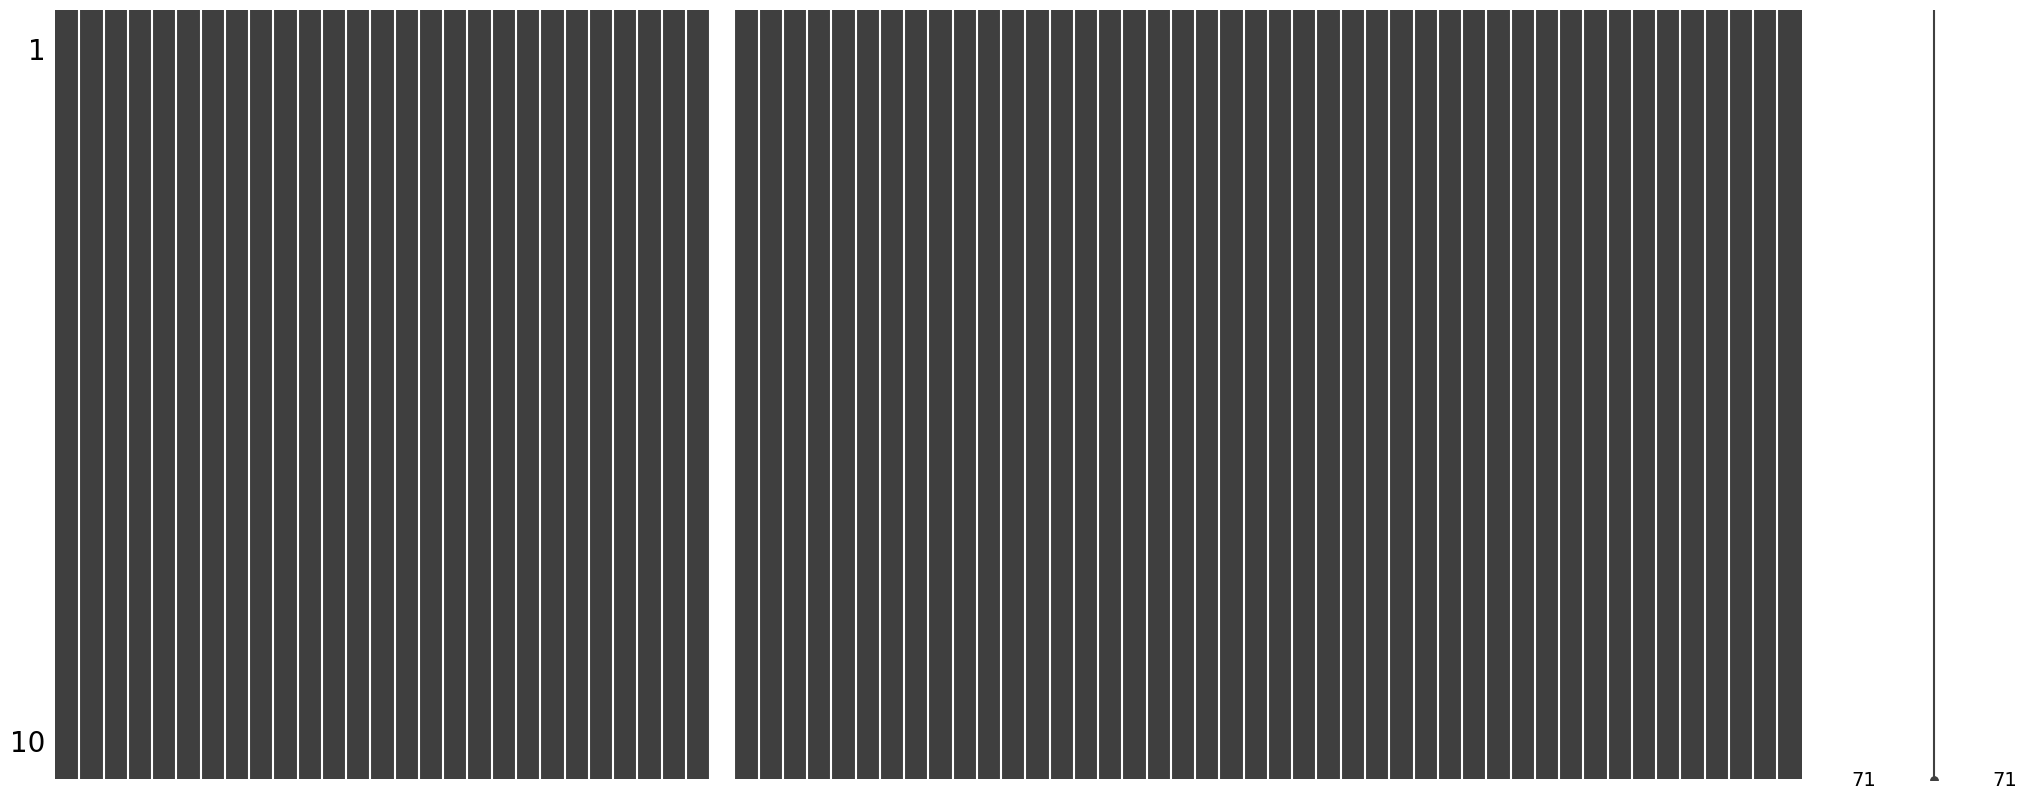

In [ ]:
%matplotlib inline
msno.matrix(df_real)

In [ ]:
tiempo_total()

Tiempo transcurrido para Total: 0:00:02.165323


## 📥 Procesar archivos de un año - Consolidarlos en un .txt.zip

In [ ]:
archivos_año_numero

['02_Exportaciones_2025_Febrero.zip', '01_Exportaciones_2025_Enero.zip']

In [ ]:
%%time
# Wall time: 28min 12s
# -----------------------------------------------------------
# Bloque de Ejecución Principal (Ejemplo de uso)
# -----------------------------------------------------------
if __name__ == "__main__":

    # Ejecutar el proceso de unificación y guardado
    resultado = unificar_exportaciones(
        lista_archivos=archivos_año_numero,
        ruta_entrada=ruta_datos_entrada,
        ruta_salida=ruta_datos_salida,
        nombre_archivo_salida=f"Exportaciones_{año_numero}_Consolidado.zip",
        procesamiento_paralelo=True,
        chunksize=100000,
        encoding_lectura='utf-8',
        dtype_optimizado=None,    # Definir tipos si se conoce el esquema, ej.: {'AÑO': 'int16', ...}
        use_cols=None,            # Especificar columnas a leer si es necesario
        skiprows=0,
        force_column_alignment=True
    )

    if resultado:
        print("\n¡El proceso de unificación se completó exitosamente!")
    else:
        print("\nEl proceso de unificación falló. Revise los mensajes de error.")

Iniciando unificación de 2 archivos ZIP.
Archivos ordenados: ['01_Exportaciones_2025_Enero.zip', '02_Exportaciones_2025_Febrero.zip']

[FASE 1] Lectura de archivos
Utilizando procesamiento paralelo con 2 workers...
Procesando 1 archivo(s) en '/content/drive/MyDrive/ProColombia/0A. Datos/DIAN/Raw_data/01_Exportaciones_2025_Enero.zip'...
  Leyendo '01_Exportaciones_2025_Enero.xlsx'...Procesando 1 archivo(s) en '/content/drive/MyDrive/ProColombia/0A. Datos/DIAN/Raw_data/02_Exportaciones_2025_Febrero.zip'...
  Leyendo '02_Exportaciones_2025_Febrero.xlsx'... -> 96007 filas leídas (Excel).

Concatenando 1 DataFrame(s)...
Proceso completado en 279.73 segundos. DataFrame final: (96007, 72)
  ✓ 01_Exportaciones_2025_Enero.zip: 96007 filas, 72 columnas
 -> 106777 filas leídas (Excel).

Concatenando 1 DataFrame(s)...
Proceso completado en 298.83 segundos. DataFrame final: (106777, 72)
  ✓ 02_Exportaciones_2025_Febrero.zip: 106777 filas, 72 columnas

Lectura finalizada: 2 archivos leídos, 0 fallid

In [ ]:
tiempo_sesión()
tiempo_total()

Tiempo transcurrido para Sesión Cargar Datos: 0:37:24.557412
Tiempo transcurrido para Total: 0:37:24.882550


## 📥 Cargar archivo consolidado

In [ ]:
%%time
file = f"{ruta_archivos_procesados}/Exportaciones_{año_numero}_Consolidado.zip"
df_temp = pd.read_csv(file, sep='|', index_col=False, encoding='utf-8')

<timed exec>:2: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: user 19.3 s, sys: 3.68 s, total: 23 s
Wall time: 23.4 s


In [ ]:
print(df_temp.shape)
print(df_temp.columns)

(1302673, 72)
Index(['FECHA_PROCESO', 'NUMERO_SERIE', 'OFICINA', 'COD_ADUANA_DESPACHO',
       'ADUANA_DESPACHO', 'TIPO_IDENT', 'NIT_EXPORTADOR', 'TIPO_USUARIO',
       'COD_USUARIO', 'CLASE_EXPORTADOR', 'COD_DPTO_EXPORTADOR',
       'COD_PAIS_DESTINO_NUM', 'COD_PAIS_DESTINO_ALF', 'COD_PAIS_DESTINO',
       'PAIS_DESTINO_FINAL', 'CIUDAD_DESTINATARIO',
       'NUM_SOLICITUD_AUTO_EMBARQUE', 'TIPO_DECLARACION', 'TIPO_DESPACHO',
       'COD_LUGAR_SALIDA_NUM', 'COD_LUG_SALIDA_ALF', 'COD_REGION_PROCEDENCIA',
       'REGION_PROCEDENCIA', 'NUM__DECLA_EXPORTACION_ANT',
       'FECH_DECLA_EXPORTACION_ANT', 'NUM_DECLARACION_PRECEDENTE',
       'FECH_DECLA_PRECEDENTE', 'COD_MODALIDAD_PRECEDENTE',
       'COD_MONEDA_TRANSACCION', 'COD_MODO_TRANSPORTE', 'MODO_TRANSPORTE',
       'BANDERA', 'COD_NACIONALIDAD_BANDERA', 'NACIONALIDAD_BANDERA',
       'COD_REGIMEN_CAN', 'COD_MODALIDAD_EXPORTACION', 'MODALIDAD_EXPORTACION',
       'FORMA_PAGO', 'COD_TIPO_EMBARQUE', 'TIPO_DE_EMBARQUE', 'COD_TIPO_DATOS',
 

In [ ]:
%whos DataFrame

Variable   Type         Data/Info
---------------------------------
df_temp    DataFrame            FECHA       FOB U<...>  1.068184e+11  1302673.0


In [ ]:
memory_bytes = df_temp.memory_usage(deep=True).sum()
print(f"{memory_bytes} bytes")

memory_mb = memory_bytes / (1024 ** 2)
print(f"df_temp ocupa aproximadamente {memory_mb:.2f} MB en memoria")

memory_gb = memory_bytes / (1024 ** 3)
print(f"{memory_gb:.2f} GB")

3235362895 bytes
df_temp ocupa aproximadamente 3085.48 MB en memoria
3.01 GB


In [ ]:
del df_temp  # o cualquier otra variable grande

In [ ]:
# Forzar la recolección de basura
import gc
gc.collect()

0

In [ ]:
tiempo_sesión()
tiempo_total()

Tiempo transcurrido para Sesión Procesar Varios Años: 0:07:59.607028
Tiempo transcurrido para Total: 2:08:06.637712


## ✅🟢🔍 Verificación de cifras

In [ ]:
tiempo_sesión = medir_tiempo("Verificar datos")

In [ ]:
# Verificación de valor
total = df_temp['VALOR_FOB_USD'].sum()
formatted_total = f"{total:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")
print(f"USD {formatted_total}")
# USD 49.555.960.912,79

USD 49.555.960.912,79


In [ ]:
tiempo_sesión()
tiempo_total()

Tiempo transcurrido para Verificar datos: 0:00:00.027528
Tiempo transcurrido para Total: 0:19:23.070853


# 🟧⏳📥 Raw Data - Cargar varios años a dataframe

In [ ]:
tiempo_sesión = medir_tiempo("Sesión Procesar Varios Años")

In [ ]:
pip show psutil

Name: psutil
Version: 5.9.5
Summary: Cross-platform lib for process and system monitoring in Python.
Home-page: https://github.com/giampaolo/psutil
Author: Giampaolo Rodola
Author-email: g.rodola@gmail.com
License: BSD-3-Clause
Location: /usr/local/lib/python3.11/dist-packages
Requires: 
Required-by: accelerate, distributed, ipykernel, ipyparallel, peft, portpicker, tensorflow-datasets, wandb


## 🟧📥 Procesar en lotes - archivos de varios años - Consolidarlos en un .txt.zip por año

In [ ]:
lista_años = list(range(2001, 2021))  # Genera [2001, 2002, ..., 2020]
lista_años

[2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020]

In [ ]:
# Tiempo transcurrido para Total: 8:04:07.849479
# Asumir que ya tienes definidas las funciones:
# - listar_elementos_carpeta(carpeta)
# - filtrar_archivos_por_anio(elementos, año_texto)
# - unificar_exportaciones(lista_archivos, ruta_entrada, ruta_salida, nombre_archivo_salida, ...)
#

import gc         # Para el recolector de basura
import time       # Para pausar entre iteraciones
import psutil     # Opcional, para visualizar el uso de memoria

if __name__ == "__main__":

    # Listar una sola vez todos los elementos de la carpeta (se reutiliza en cada iteración)
    elementos = listar_elementos_carpeta(ruta_raw_data)
    print(f"Total de elementos encontrados en la carpeta: {len(elementos)}")

    # Crear la lista de años a procesar desde el más reciente hasta el más antiguo
    años_a_procesar = list(range(2001, 2021))
    años_a_procesar.reverse()  # Ahora el orden es: 2020, 2019, ... , 2001

    for año_numero in años_a_procesar:
        try:
            año_texto = str(año_numero)
            print("\n" + "=" * 50)
            print(f"PROCESANDO AÑO: {año_numero}")
            print("=" * 50)

            # Filtrar archivos correspondientes al año actual (sin incluir los 'totales')
            archivos_año_numero = filtrar_archivos_por_anio_sin_totales(elementos, año_texto)
            print(f"Archivos del año {año_numero} (sin totales): {len(archivos_año_numero)}")

            # Ejecutar el proceso de unificación y guardar el resultado
            resultado = unificar_exportaciones(
                lista_archivos=archivos_año_numero,
                ruta_entrada=ruta_datos_entrada,
                ruta_salida=ruta_datos_salida,
                nombre_archivo_salida=f"Exportaciones_{año_numero}_Consolidado.zip",
                procesamiento_paralelo=True,
                chunksize=100000,
                encoding_lectura='utf-8',
                dtype_optimizado=None,       # Ajustar tipos de columnas si se conoce el esquema
                use_cols=None,               # Especificar columnas a leer en caso de ser necesario
                skiprows=0,
                force_column_alignment=True
            )

            if resultado:
                print(f"✅ Proceso completado para el año {año_numero}")
            else:
                print(f"❌ Error en el proceso para el año {año_numero}")

            # Liberar memoria de variables locales de la iteración (no se elimina 'elementos')
            del archivos_año_numero
            gc.collect()

        except Exception as e:
            print(f"❌ Error procesando el año {año_numero}: {str(e)}")
            gc.collect()

        finally:
            # Mostrar el uso de memoria (opcional)
            try:
                process = psutil.Process()
                memory_info = process.memory_info()
                print(f"Uso de memoria tras procesar el año {año_numero}: {memory_info.rss / (1024 ** 3):.2f} GB")
            except ImportError:
                pass

            # Pausar entre iteraciones para darle tiempo al sistema a liberar recursos
            time.sleep(5)

    print("\nPROCESO COMPLETO FINALIZADO")
    tiempo_sesión()
    tiempo_total()

Total de elementos encontrados en la carpeta: 294

PROCESANDO AÑO: 2020
Archivos del año 2020 (sin totales): 12
Iniciando unificación de 12 archivos ZIP.
Archivos ordenados: ['01_Exportaciones_2020_Enero.zip', '02_Exportaciones_2020_Febrero.zip', '03_Exportaciones_2020_Marzo.zip', '04_Exportaciones_2020_Abril.zip', '05_Exportaciones_2020_Mayo.zip', '06_Exportaciones_2020_Junio.zip', '07_Exportaciones_2020_Julio.zip', '08_Exportaciones_2020_Agosto.zip', '09_Exportaciones_2020_Septiembre.zip', '10_Exportaciones_2020_Octubre.zip', '11_Exportaciones_2020_Noviembre.zip', '12_Exportaciones_2020_Diciembre.zip']

[FASE 1] Lectura de archivos
Utilizando procesamiento paralelo con 2 workers...
Procesando 1 archivo(s) en '/content/drive/MyDrive/ProColombia/0A. Datos/DIAN/Raw_data/01_Exportaciones_2020_Enero.zip'...
  Leyendo '01_Exportaciones_2020_Enero.xlsx'...Procesando 1 archivo(s) en '/content/drive/MyDrive/ProColombia/0A. Datos/DIAN/Raw_data/02_Exportaciones_2020_Febrero.zip'...
  Leyendo '0

In [ ]:
tiempo_sesión()
tiempo_total()

# ✅🟢🔍 Análisis de archivos consolidados por año - Crear Word

In [ ]:
tiempo_sesión = medir_tiempo("Sesión Análisis de archivos consolidados")

## 🔵 Listar archivos consolidados

In [ ]:
%%time
# Define la ruta de la carpeta, la palabra o año a buscar y el texto a excluir.
ruta_carpeta = ruta_archivos_procesados   # Reemplaza con tu ruta deseada
palabra_buscar = "Consolidado"                # Puede ser un año o cualquier palabra que quieras incluir
texto_excluir = "Totales"              # Texto a excluir; si no deseas excluir nada, puedes pasar ""

# Obtén la lista filtrada
archivos_filtrados = filtrar_archivos(ruta_carpeta, palabra_buscar, texto_excluir)

# Imprime los resultados
print(f"Elementos en la carpeta '{ruta_carpeta}' que contienen '{palabra_buscar}' y no contienen '{texto_excluir}':")
for i, archivo in enumerate(archivos_filtrados, 1):
    print(f"{i}. {archivo}")

print(f"\nTotal de elementos filtrados: {len(archivos_filtrados)}")

Elementos en la carpeta '/content/drive/MyDrive/ProColombia/0A. Datos/DIAN/Procesados' que contienen 'Consolidado' y no contienen 'Totales':
1. Exportaciones_2024_Consolidado.zip
2. Exportaciones_2023_Consolidado.zip
3. Exportaciones_2022_Consolidado.zip
4. Exportaciones_2021_Consolidado.zip
5. Exportaciones_2020_Consolidado.zip
6. Exportaciones_2019_Consolidado.zip
7. Exportaciones_2018_Consolidado.zip
8. Exportaciones_2017_Consolidado.zip
9. Exportaciones_2016_Consolidado.zip
10. Exportaciones_2015_Consolidado.zip
11. Exportaciones_2014_Consolidado.zip
12. Exportaciones_2013_Consolidado.zip
13. Exportaciones_2012_Consolidado.zip
14. Exportaciones_2011_Consolidado.zip
15. Exportaciones_2010_Consolidado.zip
16. Exportaciones_2009_Consolidado.zip
17. Exportaciones_2008_Consolidado.zip
18. Exportaciones_2007_Consolidado.zip
19. Exportaciones_2006_Consolidado.zip
20. Exportaciones_2005_Consolidado.zip
21. Exportaciones_2004_Consolidado.zip
22. Exportaciones_2003_Consolidado.zip
23. Export

## 🔵 Generar documento en Word - Uno por año

In [ ]:
archivo_consolidado

'/content/drive/MyDrive/ProColombia/0A. Datos/DIAN/Procesados/Exportaciones_2024_Consolidado.zip'

In [ ]:
%%time
# Procesar un sólo archivo
# Wall time: 56.3 s. Para 2024
diagnosticar_archivo_exportacion_año(
    archivo=archivo_consolidado,
    ruta_archivos_procesados=ruta_archivos_procesados,
    ruta_exportar_word=ruta_exportar_word,
    separador='|',
    encoding='utf-8',
    columnas_analisis_limitado=None, # Si es None, toma la lista definida por default.
    limite_valores_std=250,
    limite_valores_reducido=50,
    mostrar_memoria=True,
    mostrar_tiempo=True
)


PROCESANDO ARCHIVO: /content/drive/MyDrive/ProColombia/0A. Datos/DIAN/Procesados/Exportaciones_2024_Consolidado.zip
Cargando archivo: /content/drive/MyDrive/ProColombia/0A. Datos/DIAN/Procesados/Exportaciones_2024_Consolidado.zip


<ipython-input-78-378f28e33c8f>:105: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(file_path, sep=separador, index_col=False, encoding=encoding)


Archivo cargado en 22.32 segundos
Tamaño del DataFrame: 1,302,673 filas x 72 columnas
Procesando columna 10 de 72
Procesando columna 20 de 72
Procesando columna 30 de 72
Procesando columna 40 de 72
Procesando columna 50 de 72
Procesando columna 60 de 72
Procesando columna 70 de 72
✅ Análisis completado para /content/drive/MyDrive/ProColombia/0A. Datos/DIAN/Procesados/Exportaciones_2024_Consolidado.zip en 36.27 segundos (0.60 minutos)
   Guardado en: /content/drive/MyDrive/ProColombia/DIAN/Word/Diagnostico_Exportaciones_2024.docx
Uso de memoria después de procesar /content/drive/MyDrive/ProColombia/0A. Datos/DIAN/Procesados/Exportaciones_2024_Consolidado.zip: 1.77 GB
CPU times: user 32 s, sys: 4.06 s, total: 36.1 s
Wall time: 36.4 s


(True,
 '/content/drive/MyDrive/ProColombia/DIAN/Word/Diagnostico_Exportaciones_2024.docx')

In [ ]:
%%time
# Wall time: 10min 19s
procesar_multiples_archivos(
    lista_archivos=archivos_filtrados,
    ruta_archivos_procesados=ruta_archivos_procesados,
    ruta_exportar_word=ruta_exportar_word,
    separador='|',
    encoding='utf-8',
    columnas_analisis_limitado=None,
    limite_valores_std=250,
    limite_valores_reducido=50,
    mostrar_memoria=True,
    mostrar_tiempo=True
)


############################################################
INICIANDO ANÁLISIS DE 24 ARCHIVOS DE EXPORTACIONES
############################################################

Procesando archivo 1/24: Exportaciones_2024_Consolidado.zip

PROCESANDO ARCHIVO: Exportaciones_2024_Consolidado.zip
Cargando archivo: /content/drive/MyDrive/ProColombia/0A. Datos/DIAN/Procesados/Exportaciones_2024_Consolidado.zip


<ipython-input-78-378f28e33c8f>:105: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(file_path, sep=separador, index_col=False, encoding=encoding)


Archivo cargado en 23.65 segundos
Tamaño del DataFrame: 1,302,673 filas x 72 columnas
Procesando columna 10 de 72
Procesando columna 20 de 72
Procesando columna 30 de 72
Procesando columna 40 de 72
Procesando columna 50 de 72
Procesando columna 60 de 72
Procesando columna 70 de 72
✅ Análisis completado para Exportaciones_2024_Consolidado.zip en 40.36 segundos (0.67 minutos)
   Guardado en: /content/drive/MyDrive/ProColombia/DIAN/Word/Diagnostico_Exportaciones_2024.docx
Uso de memoria después de procesar Exportaciones_2024_Consolidado.zip: 1.75 GB

Procesando archivo 2/24: Exportaciones_2023_Consolidado.zip

PROCESANDO ARCHIVO: Exportaciones_2023_Consolidado.zip
Cargando archivo: /content/drive/MyDrive/ProColombia/0A. Datos/DIAN/Procesados/Exportaciones_2023_Consolidado.zip


<ipython-input-78-378f28e33c8f>:105: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(file_path, sep=separador, index_col=False, encoding=encoding)


Archivo cargado en 23.19 segundos
Tamaño del DataFrame: 1,229,094 filas x 72 columnas
Procesando columna 10 de 72
Procesando columna 20 de 72
Procesando columna 30 de 72
Procesando columna 40 de 72
Procesando columna 50 de 72
Procesando columna 60 de 72
Procesando columna 70 de 72
✅ Análisis completado para Exportaciones_2023_Consolidado.zip en 36.77 segundos (0.61 minutos)
   Guardado en: /content/drive/MyDrive/ProColombia/DIAN/Word/Diagnostico_Exportaciones_2023.docx
Uso de memoria después de procesar Exportaciones_2023_Consolidado.zip: 1.71 GB

Procesando archivo 3/24: Exportaciones_2022_Consolidado.zip

PROCESANDO ARCHIVO: Exportaciones_2022_Consolidado.zip
Cargando archivo: /content/drive/MyDrive/ProColombia/0A. Datos/DIAN/Procesados/Exportaciones_2022_Consolidado.zip
Archivo cargado en 18.83 segundos
Tamaño del DataFrame: 1,166,783 filas x 72 columnas
Procesando columna 10 de 72
Procesando columna 20 de 72
Procesando columna 30 de 72
Procesando columna 40 de 72
Procesando columna

<ipython-input-78-378f28e33c8f>:105: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(file_path, sep=separador, index_col=False, encoding=encoding)


Archivo cargado en 17.14 segundos
Tamaño del DataFrame: 1,030,033 filas x 72 columnas
Procesando columna 10 de 72
Procesando columna 20 de 72
Procesando columna 30 de 72
Procesando columna 40 de 72
Procesando columna 50 de 72
Procesando columna 60 de 72
Procesando columna 70 de 72
✅ Análisis completado para Exportaciones_2019_Consolidado.zip en 28.18 segundos (0.47 minutos)
   Guardado en: /content/drive/MyDrive/ProColombia/DIAN/Word/Diagnostico_Exportaciones_2019.docx
Uso de memoria después de procesar Exportaciones_2019_Consolidado.zip: 1.60 GB

Procesando archivo 7/24: Exportaciones_2018_Consolidado.zip

PROCESANDO ARCHIVO: Exportaciones_2018_Consolidado.zip
Cargando archivo: /content/drive/MyDrive/ProColombia/0A. Datos/DIAN/Procesados/Exportaciones_2018_Consolidado.zip
Archivo cargado en 16.20 segundos
Tamaño del DataFrame: 990,250 filas x 72 columnas
Procesando columna 10 de 72
Procesando columna 20 de 72
Procesando columna 30 de 72
Procesando columna 40 de 72
Procesando columna 5

<ipython-input-78-378f28e33c8f>:105: DtypeWarning: Columns (67) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(file_path, sep=separador, index_col=False, encoding=encoding)


Archivo cargado en 15.32 segundos
Tamaño del DataFrame: 960,747 filas x 72 columnas
Procesando columna 10 de 72
Procesando columna 20 de 72
Procesando columna 30 de 72
Procesando columna 40 de 72
Procesando columna 50 de 72
Procesando columna 60 de 72
Procesando columna 70 de 72
✅ Análisis completado para Exportaciones_2017_Consolidado.zip en 26.10 segundos (0.43 minutos)
   Guardado en: /content/drive/MyDrive/ProColombia/DIAN/Word/Diagnostico_Exportaciones_2017.docx
Uso de memoria después de procesar Exportaciones_2017_Consolidado.zip: 1.56 GB

Procesando archivo 9/24: Exportaciones_2016_Consolidado.zip

PROCESANDO ARCHIVO: Exportaciones_2016_Consolidado.zip
Cargando archivo: /content/drive/MyDrive/ProColombia/0A. Datos/DIAN/Procesados/Exportaciones_2016_Consolidado.zip


<ipython-input-78-378f28e33c8f>:105: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(file_path, sep=separador, index_col=False, encoding=encoding)


Archivo cargado en 14.97 segundos
Tamaño del DataFrame: 895,109 filas x 72 columnas
Procesando columna 10 de 72
Procesando columna 20 de 72
Procesando columna 30 de 72
Procesando columna 40 de 72
Procesando columna 50 de 72
Procesando columna 60 de 72
Procesando columna 70 de 72
✅ Análisis completado para Exportaciones_2016_Consolidado.zip en 25.25 segundos (0.42 minutos)
   Guardado en: /content/drive/MyDrive/ProColombia/DIAN/Word/Diagnostico_Exportaciones_2016.docx
Uso de memoria después de procesar Exportaciones_2016_Consolidado.zip: 1.53 GB

Procesando archivo 10/24: Exportaciones_2015_Consolidado.zip

PROCESANDO ARCHIVO: Exportaciones_2015_Consolidado.zip
Cargando archivo: /content/drive/MyDrive/ProColombia/0A. Datos/DIAN/Procesados/Exportaciones_2015_Consolidado.zip
Archivo cargado en 14.58 segundos
Tamaño del DataFrame: 886,245 filas x 72 columnas
Procesando columna 10 de 72
Procesando columna 20 de 72
Procesando columna 30 de 72
Procesando columna 40 de 72
Procesando columna 50

<ipython-input-78-378f28e33c8f>:105: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(file_path, sep=separador, index_col=False, encoding=encoding)


Archivo cargado en 13.80 segundos
Tamaño del DataFrame: 857,803 filas x 72 columnas
Procesando columna 10 de 72
Procesando columna 20 de 72
Procesando columna 30 de 72
Procesando columna 40 de 72
Procesando columna 50 de 72
Procesando columna 60 de 72
Procesando columna 70 de 72
✅ Análisis completado para Exportaciones_2010_Consolidado.zip en 23.82 segundos (0.40 minutos)
   Guardado en: /content/drive/MyDrive/ProColombia/DIAN/Word/Diagnostico_Exportaciones_2010.docx
Uso de memoria después de procesar Exportaciones_2010_Consolidado.zip: 1.51 GB

Procesando archivo 16/24: Exportaciones_2009_Consolidado.zip

PROCESANDO ARCHIVO: Exportaciones_2009_Consolidado.zip
Cargando archivo: /content/drive/MyDrive/ProColombia/0A. Datos/DIAN/Procesados/Exportaciones_2009_Consolidado.zip
Archivo cargado en 13.50 segundos
Tamaño del DataFrame: 828,607 filas x 72 columnas
Procesando columna 10 de 72
Procesando columna 20 de 72
Procesando columna 30 de 72
Procesando columna 40 de 72
Procesando columna 50

<ipython-input-78-378f28e33c8f>:105: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(file_path, sep=separador, index_col=False, encoding=encoding)


Archivo cargado en 7.40 segundos
Tamaño del DataFrame: 627,485 filas x 56 columnas
Procesando columna 10 de 56
Procesando columna 20 de 56
Procesando columna 30 de 56
Procesando columna 40 de 56
Procesando columna 50 de 56
✅ Análisis completado para Exportaciones_2004_Consolidado.zip en 11.85 segundos (0.20 minutos)
   Guardado en: /content/drive/MyDrive/ProColombia/DIAN/Word/Diagnostico_Exportaciones_2004.docx
Uso de memoria después de procesar Exportaciones_2004_Consolidado.zip: 1.36 GB

Procesando archivo 22/24: Exportaciones_2003_Consolidado.zip

PROCESANDO ARCHIVO: Exportaciones_2003_Consolidado.zip
Cargando archivo: /content/drive/MyDrive/ProColombia/0A. Datos/DIAN/Procesados/Exportaciones_2003_Consolidado.zip


<ipython-input-78-378f28e33c8f>:105: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(file_path, sep=separador, index_col=False, encoding=encoding)


Archivo cargado en 4.47 segundos
Tamaño del DataFrame: 574,395 filas x 46 columnas
Procesando columna 10 de 46
Procesando columna 20 de 46
Procesando columna 30 de 46
Procesando columna 40 de 46
✅ Análisis completado para Exportaciones_2003_Consolidado.zip en 9.40 segundos (0.16 minutos)
   Guardado en: /content/drive/MyDrive/ProColombia/DIAN/Word/Diagnostico_Exportaciones_2003.docx
Uso de memoria después de procesar Exportaciones_2003_Consolidado.zip: 1.30 GB

Procesando archivo 23/24: Exportaciones_2002_Consolidado.zip

PROCESANDO ARCHIVO: Exportaciones_2002_Consolidado.zip
Cargando archivo: /content/drive/MyDrive/ProColombia/0A. Datos/DIAN/Procesados/Exportaciones_2002_Consolidado.zip
Archivo cargado en 3.71 segundos
Tamaño del DataFrame: 450,074 filas x 46 columnas
Procesando columna 10 de 46
Procesando columna 20 de 46
Procesando columna 30 de 46
Procesando columna 40 de 46
✅ Análisis completado para Exportaciones_2002_Consolidado.zip en 6.50 segundos (0.11 minutos)
   Guardado en

([('Exportaciones_2024_Consolidado.zip',
   '/content/drive/MyDrive/ProColombia/DIAN/Word/Diagnostico_Exportaciones_2024.docx'),
  ('Exportaciones_2023_Consolidado.zip',
   '/content/drive/MyDrive/ProColombia/DIAN/Word/Diagnostico_Exportaciones_2023.docx'),
  ('Exportaciones_2022_Consolidado.zip',
   '/content/drive/MyDrive/ProColombia/DIAN/Word/Diagnostico_Exportaciones_2022.docx'),
  ('Exportaciones_2021_Consolidado.zip',
   '/content/drive/MyDrive/ProColombia/DIAN/Word/Diagnostico_Exportaciones_2021.docx'),
  ('Exportaciones_2020_Consolidado.zip',
   '/content/drive/MyDrive/ProColombia/DIAN/Word/Diagnostico_Exportaciones_2020.docx'),
  ('Exportaciones_2019_Consolidado.zip',
   '/content/drive/MyDrive/ProColombia/DIAN/Word/Diagnostico_Exportaciones_2019.docx'),
  ('Exportaciones_2018_Consolidado.zip',
   '/content/drive/MyDrive/ProColombia/DIAN/Word/Diagnostico_Exportaciones_2018.docx'),
  ('Exportaciones_2017_Consolidado.zip',
   '/content/drive/MyDrive/ProColombia/DIAN/Word/Diagnos

In [ ]:
tiempo_sesión()
tiempo_total()

Tiempo transcurrido para Sesión Análisis de archivos consolidados: 0:18:37.614473
Tiempo transcurrido para Total: 0:38:51.877894


## 🔵 Convertir .docx en .txt

In [ ]:
ruta_carpeta = ruta_exportar_word   # Reemplaza con tu ruta deseada
palabra_buscar = "Exportaciones"                # Puede ser un año o cualquier palabra que quieras incluir
texto_excluir = ["Completo", "Resumen", "Temporal", "todos"]               # Texto a excluir; si no deseas excluir nada, puedes pasar ""

# Obtén la lista filtrada
archivos_filtrados = filtrar_archivos_excluir_lista(ruta_carpeta, palabra_buscar, texto_excluir)

# Imprime los resultados
print(f"Elementos en la carpeta '{ruta_carpeta}' que contienen '{palabra_buscar}' y no contienen '{texto_excluir}':")
for i, archivo in enumerate(archivos_filtrados, 1):
    print(f"{i}. {archivo}")

print(f"\nTotal de elementos filtrados: {len(archivos_filtrados)}")

Elementos en la carpeta '/content/drive/MyDrive/ProColombia/DIAN/Word' que contienen 'Exportaciones' y no contienen '['Completo', 'Resumen', 'Temporal', 'todos']':
1. Diagnostico_Exportaciones_2007.docx
2. Diagnostico_Exportaciones_2024.docx
3. Diagnostico_Exportaciones_2023.docx
4. Diagnostico_Exportaciones_2022.docx
5. Diagnostico_Exportaciones_2021.docx
6. Diagnostico_Exportaciones_2020.docx
7. Diagnostico_Exportaciones_2019.docx
8. Diagnostico_Exportaciones_2018.docx
9. Diagnostico_Exportaciones_2017.docx
10. Diagnostico_Exportaciones_2016.docx
11. Diagnostico_Exportaciones_2015.docx
12. Diagnostico_Exportaciones_2014.docx
13. Diagnostico_Exportaciones_2013.docx
14. Diagnostico_Exportaciones_2012.docx
15. Diagnostico_Exportaciones_2011.docx
16. Diagnostico_Exportaciones_2010.docx
17. Diagnostico_Exportaciones_2009.docx
18. Diagnostico_Exportaciones_2008.docx
19. Diagnostico_Exportaciones_2006.docx
20. Diagnostico_Exportaciones_2005.docx
21. Diagnostico_Exportaciones_2004.docx
22. D

In [ ]:
%%time
ruta_entrada = ruta_exportar_word
ruta_salida = ruta_exportar_txt
lista_archivos = archivos_filtrados

archivos_generados = convertir_varios_docx_a_txt(ruta_entrada, ruta_salida, lista_archivos)

print("\nArchivos convertidos:")
for archivo in archivos_generados:
    print(archivo)

✔ Convertido: Diagnostico_Exportaciones_2007.docx -> /content/drive/MyDrive/ProColombia/DIAN/Txt/Diagnostico_Exportaciones_2007.txt
✔ Convertido: Diagnostico_Exportaciones_2024.docx -> /content/drive/MyDrive/ProColombia/DIAN/Txt/Diagnostico_Exportaciones_2024.txt
✔ Convertido: Diagnostico_Exportaciones_2023.docx -> /content/drive/MyDrive/ProColombia/DIAN/Txt/Diagnostico_Exportaciones_2023.txt
✔ Convertido: Diagnostico_Exportaciones_2022.docx -> /content/drive/MyDrive/ProColombia/DIAN/Txt/Diagnostico_Exportaciones_2022.txt
✔ Convertido: Diagnostico_Exportaciones_2021.docx -> /content/drive/MyDrive/ProColombia/DIAN/Txt/Diagnostico_Exportaciones_2021.txt
✔ Convertido: Diagnostico_Exportaciones_2020.docx -> /content/drive/MyDrive/ProColombia/DIAN/Txt/Diagnostico_Exportaciones_2020.txt
✔ Convertido: Diagnostico_Exportaciones_2019.docx -> /content/drive/MyDrive/ProColombia/DIAN/Txt/Diagnostico_Exportaciones_2019.txt
✔ Convertido: Diagnostico_Exportaciones_2018.docx -> /content/drive/MyDrive/

In [ ]:
tiempo_sesión()
tiempo_total()

Tiempo transcurrido para Sesión: 0:28:21.948053
Tiempo transcurrido para Total: 0:28:21.948376


## 🔵 Generar documento en Word - Uno solo con todos los consolidados

In [ ]:
%%time
# Wall time: 11min 22s para 24 archivos.
diagnosticar_archivos_exportaciones(
    lista_archivos=archivos_filtrados,
    ruta_archivos_procesados=ruta_archivos_procesados,
    ruta_exportar_word=ruta_exportar_word,
    nombre_archivo_word="Diagnostico_Completo_Exportaciones_2001_2004_v2.docx",
    separador='|',
    encoding='utf-8',
    columnas_analisis_limitado=None,
    limite_valores_std=250,
    limite_valores_reducido=50,
    mostrar_memoria=True,
    mostrar_tiempo=True
)


############################################################
INICIANDO ANÁLISIS DE 24 ARCHIVOS DE EXPORTACIONES
############################################################

PROCESANDO ARCHIVO 1/24: Exportaciones_2024_Consolidado.zip
Cargando archivo: /content/drive/MyDrive/ProColombia/0A. Datos/DIAN/Procesados/Exportaciones_2024_Consolidado.zip


<ipython-input-69-7b0df7d3a6e9>:137: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(file_path, sep=separador, index_col=False, encoding=encoding)


✅ Análisis completado para Exportaciones_2024_Consolidado.zip en 47.31 segundos
Uso de memoria después de procesar Exportaciones_2024_Consolidado.zip: 1.80 GB

PROCESANDO ARCHIVO 2/24: Exportaciones_2023_Consolidado.zip
Cargando archivo: /content/drive/MyDrive/ProColombia/0A. Datos/DIAN/Procesados/Exportaciones_2023_Consolidado.zip


<ipython-input-69-7b0df7d3a6e9>:137: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(file_path, sep=separador, index_col=False, encoding=encoding)


✅ Análisis completado para Exportaciones_2023_Consolidado.zip en 41.19 segundos
Uso de memoria después de procesar Exportaciones_2023_Consolidado.zip: 1.78 GB

PROCESANDO ARCHIVO 3/24: Exportaciones_2022_Consolidado.zip
Cargando archivo: /content/drive/MyDrive/ProColombia/0A. Datos/DIAN/Procesados/Exportaciones_2022_Consolidado.zip
✅ Análisis completado para Exportaciones_2022_Consolidado.zip en 35.64 segundos
Uso de memoria después de procesar Exportaciones_2022_Consolidado.zip: 1.75 GB

PROCESANDO ARCHIVO 4/24: Exportaciones_2021_Consolidado.zip
Cargando archivo: /content/drive/MyDrive/ProColombia/0A. Datos/DIAN/Procesados/Exportaciones_2021_Consolidado.zip
✅ Análisis completado para Exportaciones_2021_Consolidado.zip en 32.85 segundos
Uso de memoria después de procesar Exportaciones_2021_Consolidado.zip: 1.72 GB

PROCESANDO ARCHIVO 5/24: Exportaciones_2020_Consolidado.zip
Cargando archivo: /content/drive/MyDrive/ProColombia/0A. Datos/DIAN/Procesados/Exportaciones_2020_Consolidado.zi

<ipython-input-69-7b0df7d3a6e9>:137: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(file_path, sep=separador, index_col=False, encoding=encoding)


✅ Análisis completado para Exportaciones_2019_Consolidado.zip en 30.89 segundos
Uso de memoria después de procesar Exportaciones_2019_Consolidado.zip: 1.67 GB

PROCESANDO ARCHIVO 7/24: Exportaciones_2018_Consolidado.zip
Cargando archivo: /content/drive/MyDrive/ProColombia/0A. Datos/DIAN/Procesados/Exportaciones_2018_Consolidado.zip
✅ Análisis completado para Exportaciones_2018_Consolidado.zip en 29.48 segundos
Uso de memoria después de procesar Exportaciones_2018_Consolidado.zip: 1.65 GB

PROCESANDO ARCHIVO 8/24: Exportaciones_2017_Consolidado.zip
Cargando archivo: /content/drive/MyDrive/ProColombia/0A. Datos/DIAN/Procesados/Exportaciones_2017_Consolidado.zip


<ipython-input-69-7b0df7d3a6e9>:137: DtypeWarning: Columns (67) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(file_path, sep=separador, index_col=False, encoding=encoding)


✅ Análisis completado para Exportaciones_2017_Consolidado.zip en 29.49 segundos
Uso de memoria después de procesar Exportaciones_2017_Consolidado.zip: 1.64 GB

PROCESANDO ARCHIVO 9/24: Exportaciones_2016_Consolidado.zip
Cargando archivo: /content/drive/MyDrive/ProColombia/0A. Datos/DIAN/Procesados/Exportaciones_2016_Consolidado.zip


<ipython-input-69-7b0df7d3a6e9>:137: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(file_path, sep=separador, index_col=False, encoding=encoding)


✅ Análisis completado para Exportaciones_2016_Consolidado.zip en 28.22 segundos
Uso de memoria después de procesar Exportaciones_2016_Consolidado.zip: 1.60 GB

PROCESANDO ARCHIVO 10/24: Exportaciones_2015_Consolidado.zip
Cargando archivo: /content/drive/MyDrive/ProColombia/0A. Datos/DIAN/Procesados/Exportaciones_2015_Consolidado.zip
✅ Análisis completado para Exportaciones_2015_Consolidado.zip en 27.39 segundos
Uso de memoria después de procesar Exportaciones_2015_Consolidado.zip: 1.60 GB

PROCESANDO ARCHIVO 11/24: Exportaciones_2014_Consolidado.zip
Cargando archivo: /content/drive/MyDrive/ProColombia/0A. Datos/DIAN/Procesados/Exportaciones_2014_Consolidado.zip
✅ Análisis completado para Exportaciones_2014_Consolidado.zip en 45.61 segundos
Uso de memoria después de procesar Exportaciones_2014_Consolidado.zip: 1.60 GB

PROCESANDO ARCHIVO 12/24: Exportaciones_2013_Consolidado.zip
Cargando archivo: /content/drive/MyDrive/ProColombia/0A. Datos/DIAN/Procesados/Exportaciones_2013_Consolidado

<ipython-input-69-7b0df7d3a6e9>:137: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(file_path, sep=separador, index_col=False, encoding=encoding)


✅ Análisis completado para Exportaciones_2010_Consolidado.zip en 27.03 segundos
Uso de memoria después de procesar Exportaciones_2010_Consolidado.zip: 1.58 GB

PROCESANDO ARCHIVO 16/24: Exportaciones_2009_Consolidado.zip
Cargando archivo: /content/drive/MyDrive/ProColombia/0A. Datos/DIAN/Procesados/Exportaciones_2009_Consolidado.zip
✅ Análisis completado para Exportaciones_2009_Consolidado.zip en 26.33 segundos
Uso de memoria después de procesar Exportaciones_2009_Consolidado.zip: 1.56 GB

PROCESANDO ARCHIVO 17/24: Exportaciones_2008_Consolidado.zip
Cargando archivo: /content/drive/MyDrive/ProColombia/0A. Datos/DIAN/Procesados/Exportaciones_2008_Consolidado.zip
✅ Análisis completado para Exportaciones_2008_Consolidado.zip en 30.16 segundos
Uso de memoria después de procesar Exportaciones_2008_Consolidado.zip: 1.63 GB

PROCESANDO ARCHIVO 18/24: Exportaciones_2007_Consolidado.zip
Cargando archivo: /content/drive/MyDrive/ProColombia/0A. Datos/DIAN/Procesados/Exportaciones_2007_Consolidado

<ipython-input-69-7b0df7d3a6e9>:137: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(file_path, sep=separador, index_col=False, encoding=encoding)


✅ Análisis completado para Exportaciones_2004_Consolidado.zip en 13.89 segundos
Uso de memoria después de procesar Exportaciones_2004_Consolidado.zip: 1.42 GB

PROCESANDO ARCHIVO 22/24: Exportaciones_2003_Consolidado.zip
Cargando archivo: /content/drive/MyDrive/ProColombia/0A. Datos/DIAN/Procesados/Exportaciones_2003_Consolidado.zip


<ipython-input-69-7b0df7d3a6e9>:137: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(file_path, sep=separador, index_col=False, encoding=encoding)


✅ Análisis completado para Exportaciones_2003_Consolidado.zip en 10.95 segundos
Uso de memoria después de procesar Exportaciones_2003_Consolidado.zip: 1.36 GB

PROCESANDO ARCHIVO 23/24: Exportaciones_2002_Consolidado.zip
Cargando archivo: /content/drive/MyDrive/ProColombia/0A. Datos/DIAN/Procesados/Exportaciones_2002_Consolidado.zip
✅ Análisis completado para Exportaciones_2002_Consolidado.zip en 10.03 segundos
Uso de memoria después de procesar Exportaciones_2002_Consolidado.zip: 1.32 GB

PROCESANDO ARCHIVO 24/24: Exportaciones_2001_Consolidado.zip
Cargando archivo: /content/drive/MyDrive/ProColombia/0A. Datos/DIAN/Procesados/Exportaciones_2001_Consolidado.zip
✅ Análisis completado para Exportaciones_2001_Consolidado.zip en 7.37 segundos
Uso de memoria después de procesar Exportaciones_2001_Consolidado.zip: 1.33 GB

############################################################
PROCESO COMPLETO
Archivos procesados: 24 de 24
Tiempo total de ejecución: 682.25 segundos (11.37 minutos)
Diag

'/content/drive/MyDrive/ProColombia/DIAN/Word/Diagnostico_Completo_Exportaciones_2001_2004_v2.docx'

In [ ]:
%%time
def main():
    # Crear el directorio para guardar los documentos Word si no existe
    if not os.path.exists(ruta_exportar_word):
        os.makedirs(ruta_exportar_word)

    # Listas para tracking
    archivos_procesados = []
    archivos_con_error = []

    # Procesar cada archivo
    print(f"\n{'#'*60}")
    print(f"INICIANDO ANÁLISIS DE {len(archivos_filtrados)} ARCHIVOS DE EXPORTACIONES")
    print(f"{'#'*60}")

    for archivo in archivos_filtrados:
        # Analizar y crear documento específico para este archivo
        resultado = analizar_archivo(archivo, ruta_archivos_procesados, ruta_exportar_word)

        # Registrar resultado
        if resultado:
            archivos_procesados.append(archivo)
        else:
            archivos_con_error.append(archivo)

        # Monitoreo de memoria (opcional)
        try:
            import psutil
            process = psutil.Process()
            memory_info = process.memory_info()
            print(f"Uso de memoria después de procesar {archivo}: {memory_info.rss / (1024 ** 3):.2f} GB")
        except ImportError:
            pass

        # Forzar limpieza de memoria
        gc.collect()

    # Crear un informe resumen
    crear_informe_resumen(archivos_procesados, archivos_con_error, ruta_exportar_word)

    # Mensaje final
    print(f"\n{'#'*60}")
    print(f"PROCESO COMPLETO")
    print(f"Archivos procesados: {len(archivos_procesados)} de {len(archivos_filtrados)}")
    if archivos_con_error:
        print(f"Archivos con error: {len(archivos_con_error)}")
        print(f"Archivos con error: {', '.join(archivos_con_error)}")
    print(f"{'#'*60}")

if __name__ == "__main__":
    main()


############################################################
INICIANDO ANÁLISIS DE 24 ARCHIVOS DE EXPORTACIONES
############################################################

PROCESANDO ARCHIVO: Exportaciones_2024_Consolidado.zip


<ipython-input-194-4d1232029f85>:32: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(file_path, sep='|', index_col=False, encoding='utf-8')


✅ Análisis completado para Exportaciones_2024_Consolidado.zip
   Guardado en: /content/drive/MyDrive/ProColombia/DIAN/Word/Diagnostico_Exportaciones_2024.docx
Uso de memoria después de procesar Exportaciones_2024_Consolidado.zip: 2.11 GB

PROCESANDO ARCHIVO: Exportaciones_2023_Consolidado.zip


<ipython-input-194-4d1232029f85>:32: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(file_path, sep='|', index_col=False, encoding='utf-8')


✅ Análisis completado para Exportaciones_2023_Consolidado.zip
   Guardado en: /content/drive/MyDrive/ProColombia/DIAN/Word/Diagnostico_Exportaciones_2023.docx
Uso de memoria después de procesar Exportaciones_2023_Consolidado.zip: 2.17 GB

PROCESANDO ARCHIVO: Exportaciones_2022_Consolidado.zip
✅ Análisis completado para Exportaciones_2022_Consolidado.zip
   Guardado en: /content/drive/MyDrive/ProColombia/DIAN/Word/Diagnostico_Exportaciones_2022.docx
Uso de memoria después de procesar Exportaciones_2022_Consolidado.zip: 2.17 GB

PROCESANDO ARCHIVO: Exportaciones_2021_Consolidado.zip
✅ Análisis completado para Exportaciones_2021_Consolidado.zip
   Guardado en: /content/drive/MyDrive/ProColombia/DIAN/Word/Diagnostico_Exportaciones_2021.docx
Uso de memoria después de procesar Exportaciones_2021_Consolidado.zip: 2.11 GB

PROCESANDO ARCHIVO: Exportaciones_2020_Consolidado.zip
✅ Análisis completado para Exportaciones_2020_Consolidado.zip
   Guardado en: /content/drive/MyDrive/ProColombia/DIAN/

<ipython-input-194-4d1232029f85>:32: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(file_path, sep='|', index_col=False, encoding='utf-8')


In [ ]:
# %%time
# Esta funcionó bien.
# # Si aún no has montado tu Google Drive, descomenta y ejecuta la siguiente celda:
# # from google.colab import drive
# # drive.mount('/content/drive')
# import pandas as pd
# import numpy as np
# import gc
# import os
# from docx import Document
# from docx.shared import Pt, Inches
# from docx.enum.text import WD_ALIGN_PARAGRAPH

# def analizar_archivo(archivo, ruta_archivos_procesados, documento_word, ruta_exportar_word):
#     """
#     Analiza un archivo de exportaciones y añade los resultados al documento Word
#     """
#     try:
#         # Extraer el año del nombre del archivo
#         año = archivo.split('_')[1]
#         print(f"\n{'='*50}")
#         print(f"PROCESANDO ARCHIVO: {archivo}")
#         print(f"{'='*50}")

#         # Añadir título de sección para el año
#         documento_word.add_heading(f'Diagnóstico del archivo: {archivo}', level=1)

#         # Cargar archivo
#         file_path = f"{ruta_archivos_procesados}/{archivo}"
#         df_temp = pd.read_csv(file_path, sep='|', index_col=False, encoding='utf-8')

#         # Información general del DataFrame
#         documento_word.add_heading('Información General', level=2)
#         p = documento_word.add_paragraph()
#         p.add_run(f"Nombre del archivo: {archivo}").bold = True
#         p.add_run(f"\nDimensiones: {df_temp.shape[0]} filas x {df_temp.shape[1]} columnas")

#         # Lista de columnas
#         documento_word.add_heading('Columnas', level=2)
#         columnas_texto = ", ".join(df_temp.columns)
#         documento_word.add_paragraph(columnas_texto)

#         # Variables con análisis limitado (menos de 50 registros)
#         columnas_analisis_limitado = [
#             'NIT_EXPORTADOR', 'RAZON_SOCIAL_EXPORTADOR', 'NIT_DECLARANTE',
#             'RAZON_SOCIAL_DECLARANTE', 'RAZON_SOCIAL_DESTINATARIO', 'NIT_EXPORTADOR_'
#         ]

#         # Análisis detallado por columna
#         documento_word.add_heading('Análisis por columna', level=2)

#         for columna in df_temp.columns:
#             # Añadir encabezado para la columna
#             documento_word.add_heading(columna, level=3)
#             p = documento_word.add_paragraph()

#             # Tipo de dato
#             tipo_dato = str(df_temp[columna].dtype)
#             p.add_run(f"Tipo de dato: {tipo_dato}").bold = True

#             # Contar valores únicos
#             try:
#                 valores_unicos = df_temp[columna].nunique()
#                 p.add_run(f"\nCantidad de valores únicos: {valores_unicos}")
#             except:
#                 p.add_run("\nNo se pudo calcular valores únicos")

#             # Determinar límite de valores a mostrar
#             if columna in columnas_analisis_limitado:
#                 limite = 50
#             else:
#                 limite = 250

#             # Mostrar valores únicos (si no son demasiados y si no es una columna numérica con muchos valores)
#             if pd.api.types.is_numeric_dtype(df_temp[columna]):
#                 # Análisis numérico
#                 try:
#                     stats = df_temp[columna].describe()
#                     p.add_run(f"\n\nEstadísticas descriptivas:")
#                     p.add_run(f"\n- Mínimo: {stats['min']:,.2f}")
#                     p.add_run(f"\n- Máximo: {stats['max']:,.2f}")
#                     p.add_run(f"\n- Media: {stats['mean']:,.2f}")
#                     p.add_run(f"\n- Desv. Estándar: {stats['std']:,.2f}")

#                     # Para columnas de valor o peso, calcular suma con formato especial
#                     if any(keyword in columna.upper() for keyword in ['VALOR', 'FOB', 'USD', 'PESO']):
#                         total = df_temp[columna].sum()
#                         formatted_total = f"{total:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")
#                         p.add_run(f"\n- Suma total: {formatted_total}")
#                 except:
#                     p.add_run("\nNo se pudieron calcular estadísticas para esta columna")
#             else:
#                 # Análisis categórico
#                 try:
#                     if valores_unicos <= limite:
#                         unique_values = df_temp[columna].dropna().unique()
#                         unique_values = [str(val) for val in unique_values]
#                         p.add_run(f"\n\nValores únicos: {', '.join(unique_values[:limite])}")
#                     else:
#                         # Mostrar los valores más frecuentes
#                         top_values = df_temp[columna].value_counts().head(limite)
#                         p.add_run(f"\n\nTop {limite} valores más frecuentes:")
#                         for val, count in top_values.items():
#                             p.add_run(f"\n- {val}: {count} ocurrencias")
#                 except:
#                     p.add_run("\nNo se pudieron listar los valores únicos")

#             # Agregar un separador entre columnas
#             documento_word.add_paragraph('-' * 50)

#         # Guardar periódicamente para evitar pérdida de datos
#         ruta_archivo_word = os.path.join(ruta_exportar_word, "Diagnostico_Exportaciones.docx")
#         documento_word.save(ruta_archivo_word)

#         # Liberar memoria
#         del df_temp
#         gc.collect()

#         print(f"✅ Análisis completado para {archivo}")
#         return True

#     except Exception as e:
#         print(f"❌ Error procesando {archivo}: {str(e)}")
#         documento_word.add_paragraph(f"Error durante el análisis: {str(e)}", style='Intense Quote')
#         ruta_archivo_word = os.path.join(ruta_exportar_word, "Diagnostico_Exportaciones.docx")
#         documento_word.save(ruta_archivo_word)
#         return False

# def main():

#     # Crear el directorio para guardar el Word si no existe
#     import os
#     if not os.path.exists(ruta_exportar_word):
#         os.makedirs(ruta_exportar_word)

#     # Ruta completa del archivo de salida
#     ruta_archivo_word = os.path.join(ruta_exportar_word, "Diagnostico_Exportaciones.docx")

#     # Crear documento Word
#     documento_word = Document()

#     # Configurar el estilo del documento
#     documento_word.add_heading('Diagnóstico de Archivos de Exportaciones', 0)

#     # Añadir introducción
#     p = documento_word.add_paragraph()
#     p.add_run('Este documento contiene el análisis diagnóstico de los archivos de exportaciones consolidados desde 2001 hasta 2024. Para cada archivo se presenta información sobre su estructura, columnas y estadísticas relevantes.').italic = True

#     # Guardar el documento inicialmente
#     documento_word.save(ruta_archivo_word)

#     # Procesar cada archivo
#     for archivo in archivos_filtrados:
#         # Analizar y agregar al documento
#         analizar_archivo(archivo, ruta_archivos_procesados, documento_word, ruta_exportar_word)

#         # Monitoreo de memoria (opcional)
#         try:
#             import psutil
#             process = psutil.Process()
#             memory_info = process.memory_info()
#             print(f"Uso de memoria después de procesar {archivo}: {memory_info.rss / (1024 ** 3):.2f} GB")
#         except ImportError:
#             pass

#     # Guardar el documento final
#     ruta_archivo_word = os.path.join(ruta_exportar_word, "Diagnostico_Exportaciones.docx")
#     documento_word.save(ruta_archivo_word)
#     print(f"\nPROCESO COMPLETO: Diagnóstico guardado en '{ruta_archivo_word}'")

# if __name__ == "__main__":
#     main()


PROCESANDO ARCHIVO: Exportaciones_2024_Consolidado.zip


<timed exec>:28: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.


✅ Análisis completado para Exportaciones_2024_Consolidado.zip
Uso de memoria después de procesar Exportaciones_2024_Consolidado.zip: 2.11 GB

PROCESANDO ARCHIVO: Exportaciones_2023_Consolidado.zip


<timed exec>:28: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.


✅ Análisis completado para Exportaciones_2023_Consolidado.zip
Uso de memoria después de procesar Exportaciones_2023_Consolidado.zip: 2.13 GB

PROCESANDO ARCHIVO: Exportaciones_2022_Consolidado.zip
✅ Análisis completado para Exportaciones_2022_Consolidado.zip
Uso de memoria después de procesar Exportaciones_2022_Consolidado.zip: 2.11 GB

PROCESANDO ARCHIVO: Exportaciones_2021_Consolidado.zip
✅ Análisis completado para Exportaciones_2021_Consolidado.zip
Uso de memoria después de procesar Exportaciones_2021_Consolidado.zip: 2.11 GB

PROCESANDO ARCHIVO: Exportaciones_2020_Consolidado.zip
✅ Análisis completado para Exportaciones_2020_Consolidado.zip
Uso de memoria después de procesar Exportaciones_2020_Consolidado.zip: 2.11 GB

PROCESANDO ARCHIVO: Exportaciones_2019_Consolidado.zip


<timed exec>:28: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.


✅ Análisis completado para Exportaciones_2019_Consolidado.zip
Uso de memoria después de procesar Exportaciones_2019_Consolidado.zip: 2.11 GB

PROCESANDO ARCHIVO: Exportaciones_2018_Consolidado.zip
✅ Análisis completado para Exportaciones_2018_Consolidado.zip
Uso de memoria después de procesar Exportaciones_2018_Consolidado.zip: 2.11 GB

PROCESANDO ARCHIVO: Exportaciones_2017_Consolidado.zip


<timed exec>:28: DtypeWarning: Columns (67) have mixed types. Specify dtype option on import or set low_memory=False.


✅ Análisis completado para Exportaciones_2017_Consolidado.zip
Uso de memoria después de procesar Exportaciones_2017_Consolidado.zip: 2.11 GB

PROCESANDO ARCHIVO: Exportaciones_2016_Consolidado.zip


<timed exec>:28: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.


✅ Análisis completado para Exportaciones_2016_Consolidado.zip
Uso de memoria después de procesar Exportaciones_2016_Consolidado.zip: 2.11 GB

PROCESANDO ARCHIVO: Exportaciones_2015_Consolidado.zip
✅ Análisis completado para Exportaciones_2015_Consolidado.zip
Uso de memoria después de procesar Exportaciones_2015_Consolidado.zip: 2.11 GB

PROCESANDO ARCHIVO: Exportaciones_2014_Consolidado.zip
✅ Análisis completado para Exportaciones_2014_Consolidado.zip
Uso de memoria después de procesar Exportaciones_2014_Consolidado.zip: 2.11 GB

PROCESANDO ARCHIVO: Exportaciones_2013_Consolidado.zip
✅ Análisis completado para Exportaciones_2013_Consolidado.zip
Uso de memoria después de procesar Exportaciones_2013_Consolidado.zip: 2.11 GB

PROCESANDO ARCHIVO: Exportaciones_2012_Consolidado.zip
✅ Análisis completado para Exportaciones_2012_Consolidado.zip
Uso de memoria después de procesar Exportaciones_2012_Consolidado.zip: 2.11 GB

PROCESANDO ARCHIVO: Exportaciones_2011_Consolidado.zip
✅ Análisis comp

<timed exec>:28: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.


✅ Análisis completado para Exportaciones_2010_Consolidado.zip
Uso de memoria después de procesar Exportaciones_2010_Consolidado.zip: 2.11 GB

PROCESANDO ARCHIVO: Exportaciones_2009_Consolidado.zip
✅ Análisis completado para Exportaciones_2009_Consolidado.zip
Uso de memoria después de procesar Exportaciones_2009_Consolidado.zip: 2.11 GB

PROCESANDO ARCHIVO: Exportaciones_2008_Consolidado.zip
✅ Análisis completado para Exportaciones_2008_Consolidado.zip
Uso de memoria después de procesar Exportaciones_2008_Consolidado.zip: 2.11 GB

PROCESANDO ARCHIVO: Exportaciones_2007_Consolidado.zip
✅ Análisis completado para Exportaciones_2007_Consolidado.zip
Uso de memoria después de procesar Exportaciones_2007_Consolidado.zip: 2.11 GB

PROCESANDO ARCHIVO: Exportaciones_2006_Consolidado.zip
✅ Análisis completado para Exportaciones_2006_Consolidado.zip
Uso de memoria después de procesar Exportaciones_2006_Consolidado.zip: 2.11 GB

PROCESANDO ARCHIVO: Exportaciones_2005_Consolidado.zip
✅ Análisis comp

<timed exec>:28: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.


✅ Análisis completado para Exportaciones_2004_Consolidado.zip
Uso de memoria después de procesar Exportaciones_2004_Consolidado.zip: 2.16 GB

PROCESANDO ARCHIVO: Exportaciones_2003_Consolidado.zip


<timed exec>:28: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.


✅ Análisis completado para Exportaciones_2003_Consolidado.zip
Uso de memoria después de procesar Exportaciones_2003_Consolidado.zip: 2.16 GB

PROCESANDO ARCHIVO: Exportaciones_2002_Consolidado.zip
✅ Análisis completado para Exportaciones_2002_Consolidado.zip
Uso de memoria después de procesar Exportaciones_2002_Consolidado.zip: 2.16 GB

PROCESANDO ARCHIVO: Exportaciones_2001_Consolidado.zip
✅ Análisis completado para Exportaciones_2001_Consolidado.zip
Uso de memoria después de procesar Exportaciones_2001_Consolidado.zip: 2.16 GB

PROCESO COMPLETO: Diagnóstico guardado en '/content/drive/MyDrive/ProColombia/DIAN/Word/Diagnostico_Exportaciones.docx'
CPU times: user 7min 41s, sys: 31.8 s, total: 8min 13s
Wall time: 8min 22s


## 🔵 Crear dataframe con valores únicos

### 🔵 Crear un dataframe de prueba - Probar con un sólo archivo

In [ ]:
%%time
# Ejecutar el procesamiento
# Wall time: 58.2 s
# Uso de la función
# Ejecutar el procesamiento con un límite de 300 valores únicos por columna
resultado = procesar_valores_unicos(
    archivo=f"{ruta_archivos_procesados}/{archivo_consolidado}",
    ruta_archivos_procesados=ruta_archivos_procesados,
    ruta_exportar_dataframe=ruta_exportar_dataframe,
    limite_valores=limite_valores
)

Procesando archivo: Exportaciones_2024_Consolidado.txt
Columna NUM_SOLICITUD_AUTO_EMBARQUE tiene 415952 valores únicos, limitando a 15000
Columna NUM__DECLA_EXPORTACION_ANT tiene 80042 valores únicos, limitando a 15000
Columna CANTIDAD_UNIDADES_FISICAS tiene 195725 valores únicos, limitando a 15000
Columna PESO_BRUTO_KGS tiene 338180 valores únicos, limitando a 15000
Columna PESO_NETO_KGS tiene 223080 valores únicos, limitando a 15000
Columna VALOR_FOB_USD tiene 571945 valores únicos, limitando a 15000
Columna VALOR_FOB_PESOS tiene 1158523 valores únicos, limitando a 15000
Columna VLR_SERIE_AGREGADO_NAL_USD tiene 288645 valores únicos, limitando a 15000
Columna VALOR_SERIE_FLETES_USD tiene 92833 valores únicos, limitando a 15000
Columna VALOR_SERIE_SEGUROS_USD tiene 17409 valores únicos, limitando a 15000
Columna VLR_SERIE_OTROS_GASTOS_USD tiene 22155 valores únicos, limitando a 15000
Columna NUMERO_FORMULARIO tiene 499809 valores únicos, limitando a 15000
Columna RAZON_SOCIAL_DESTINAT

In [ ]:
%%time
file = f"{ruta_exportar_dataframe}/valores_unicos_{limite_valores}_{archivo_consolidado}.zip"
df_temp = pd.read_csv(file, sep='|', index_col=False, encoding='utf-8')
print(df_temp.shape)
print(df_temp.columns)

(15000, 73)
Index(['FECHA_PROCESO', 'NUMERO_SERIE', 'OFICINA', 'COD_ADUANA_DESPACHO',
       'ADUANA_DESPACHO', 'TIPO_IDENT', 'NIT_EXPORTADOR', 'TIPO_USUARIO',
       'COD_USUARIO', 'CLASE_EXPORTADOR', 'COD_DPTO_EXPORTADOR',
       'COD_PAIS_DESTINO_NUM', 'COD_PAIS_DESTINO_ALF', 'COD_PAIS_DESTINO',
       'PAIS_DESTINO_FINAL', 'CIUDAD_DESTINATARIO',
       'NUM_SOLICITUD_AUTO_EMBARQUE', 'TIPO_DECLARACION', 'TIPO_DESPACHO',
       'COD_LUGAR_SALIDA_NUM', 'COD_LUG_SALIDA_ALF', 'COD_REGION_PROCEDENCIA',
       'REGION_PROCEDENCIA', 'NUM__DECLA_EXPORTACION_ANT',
       'FECH_DECLA_EXPORTACION_ANT', 'NUM_DECLARACION_PRECEDENTE',
       'FECH_DECLA_PRECEDENTE', 'COD_MODALIDAD_PRECEDENTE',
       'COD_MONEDA_TRANSACCION', 'COD_MODO_TRANSPORTE', 'MODO_TRANSPORTE',
       'BANDERA', 'COD_NACIONALIDAD_BANDERA', 'NACIONALIDAD_BANDERA',
       'COD_REGIMEN_CAN', 'COD_MODALIDAD_EXPORTACION', 'MODALIDAD_EXPORTACION',
       'FORMA_PAGO', 'COD_TIPO_EMBARQUE', 'TIPO_DE_EMBARQUE', 'COD_TIPO_DATOS',
   

In [ ]:
df_temp

FECHA_PROCESO  NUMERO_SERIE  OFICINA  COD_ADUANA_DESPACHO  \
0           202411.0           1.0     99.0                 35.0   
1           202412.0          28.0      3.0                  3.0   
2           202410.0          31.0      6.0                 41.0   
3           202408.0           5.0      2.0                 48.0   
4           202409.0           2.0     35.0                 87.0   
...              ...           ...      ...                  ...   
14995            NaN           NaN      NaN                  NaN   
14996            NaN           NaN      NaN                  NaN   
14997            NaN           NaN      NaN                  NaN   
14998            NaN           NaN      NaN                  NaN   
14999            NaN           NaN      NaN                  NaN   

                                 ADUANA_DESPACHO  TIPO_IDENT  NIT_EXPORTADOR  \
0            Impuestos y Aduanas de Buenaventura         2.0     860007538.0   
1      Aduanas de Bogotá -  Aeropuerto El Dorado         1.0     900822525.0   
2                   Impuestos y Aduanas de Urabá         NaN     900254024.0   
3                           Aduanas de Cartagena         NaN     890904224.0   
4                        Aduanas de Barranquilla         NaN     860525060.0   
...                                          ...         ...             ...   
14995                                        NaN         NaN             NaN   
14996                                        NaN         NaN             NaN   
14997                                        NaN         NaN             NaN   
14998                                        NaN         NaN             NaN   
14999                                        NaN         NaN             NaN   

       TIPO_USUARIO  COD_USUARIO  CLASE_EXPORTADOR  ...  \
0              36.0          0.0               2.0  ...   
1              22.0       1328.0               1.0  ...   
2              26.0         73.0               3.0  ...   
3              53.0         22.0               NaN  ...   
4              38.0        128.0               NaN  ...   
...             ...          ...               ...  ...   
14995           NaN          NaN               NaN  ...   
14996           NaN          NaN               NaN  ...   
14997           NaN          NaN               NaN  ...   
14998           NaN          NaN               NaN  ...   
14999           NaN          NaN               NaN  ...   

       FECHA_SOLICITUD_AUTO_EMBARQUE  NUMERO_FORMULARIO  \
0                           202411.0       6.007745e+12   
1                           202410.0       6.007746e+12   
2                           202408.0       6.007745e+12   
3                           202407.0       6.007745e+12   
4                           202409.0       6.007745e+12   
...                              ...                ...   
14995                            NaN       6.007745e+12   
14996                            NaN       6.007745e+12   
14997                            NaN       6.007745e+12   
14998                            NaN       6.007746e+12   
14999                            NaN       6.007745e+12   

      FECHA_DECLARACION_EXPORTACION  \
0                        20241107.0   
1                        20241121.0   
2                        20241114.0   
3                        20241112.0   
4                        20241105.0   
...                             ...   
14995                           NaN   
14996                           NaN   
14997                           NaN   
14998                           NaN   
14999                           NaN   

                                 RAZON_SOCIAL_EXPORTADOR  \
0           FEDERACION NACIONAL DE CAFETEROS DE COLOMBIA   
1                            ETNICO COMPANY COLOMBIA SAS   
2                                FLORES EL PICACHO S A S   
3         C.I. UNION DE BANANEROS DE URABA S.A. - UNIBAN   
4      SOCIEDAD EXPORTADORA DE CAFE DE LAS

### 🔵 Iterar por todos los archivos

In [ ]:
ruta_carpeta = ruta_archivos_procesados   # Reemplaza con tu ruta deseada
palabra_buscar = "Consolidado"                # Puede ser un año o cualquier palabra que quieras incluir
texto_excluir = ["2024", "Resumen", "Temporal", "todos"]               # Texto a excluir; si no deseas excluir nada, puedes pasar ""

# Obtén la lista filtrada
archivos_filtrados = filtrar_archivos_excluir_lista(ruta_carpeta, palabra_buscar, texto_excluir)

# Imprime los resultados
print(f"Elementos en la carpeta '{ruta_carpeta}' que contienen '{palabra_buscar}' y no contienen '{texto_excluir}':")
for i, archivo in enumerate(archivos_filtrados, 1):
    print(f"{i}. {archivo}")

print(f"\nTotal de elementos filtrados: {len(archivos_filtrados)}")

Elementos en la carpeta '/content/drive/MyDrive/ProColombia/0A. Datos/DIAN/Procesados' que contienen 'Consolidado' y no contienen '['2024', 'Resumen', 'Temporal', 'todos']':
1. Exportaciones_2023_Consolidado.zip
2. Exportaciones_2022_Consolidado.zip
3. Exportaciones_2021_Consolidado.zip
4. Exportaciones_2020_Consolidado.zip
5. Exportaciones_2019_Consolidado.zip
6. Exportaciones_2018_Consolidado.zip
7. Exportaciones_2017_Consolidado.zip
8. Exportaciones_2016_Consolidado.zip
9. Exportaciones_2015_Consolidado.zip
10. Exportaciones_2014_Consolidado.zip
11. Exportaciones_2013_Consolidado.zip
12. Exportaciones_2012_Consolidado.zip
13. Exportaciones_2011_Consolidado.zip
14. Exportaciones_2010_Consolidado.zip
15. Exportaciones_2009_Consolidado.zip
16. Exportaciones_2008_Consolidado.zip
17. Exportaciones_2007_Consolidado.zip
18. Exportaciones_2006_Consolidado.zip
19. Exportaciones_2005_Consolidado.zip
20. Exportaciones_2004_Consolidado.zip
21. Exportaciones_2003_Consolidado.zip
22. Exportacione

In [ ]:
%%time
import time

# Código para procesar todos los archivos de la lista
resultados = []

# Iteración sobre cada archivo en la lista
for i, archivo_consolidado in enumerate(archivos_filtrados, 1):
    print(f"Procesando archivo {i}/{len(archivos_filtrados)}: {archivo_consolidado}")

    # Registrar tiempo de inicio
    tiempo_inicio = time.time()

    # Llamar a la función procesar_valores_unicos para cada archivo
    resultado = procesar_valores_unicos(
        archivo=f"{ruta_archivos_procesados}/{archivo_consolidado}",
        ruta_archivos_procesados=ruta_archivos_procesados,
        ruta_exportar_dataframe=ruta_exportar_dataframe,
        limite_valores=limite_valores
    )

    # Calcular tiempo transcurrido
    tiempo_fin = time.time()
    tiempo_transcurrido = tiempo_fin - tiempo_inicio

    # Guardar el resultado
    resultados.append(resultado)

    print(f"Archivo {archivo_consolidado} procesado en {tiempo_transcurrido:.2f} segundos")

print("¡Todos los archivos han sido procesados!")

Procesando archivo 1/23: Exportaciones_2023_Consolidado.zip
Procesando archivo: Exportaciones_2023_Consolidado.txt
Columna NUM_SOLICITUD_AUTO_EMBARQUE tiene 394575 valores únicos, limitando a 15000
Columna NUM__DECLA_EXPORTACION_ANT tiene 74772 valores únicos, limitando a 15000
Columna CANTIDAD_UNIDADES_FISICAS tiene 185711 valores únicos, limitando a 15000
Columna PESO_BRUTO_KGS tiene 329449 valores únicos, limitando a 15000
Columna PESO_NETO_KGS tiene 212191 valores únicos, limitando a 15000
Columna VALOR_FOB_USD tiene 543025 valores únicos, limitando a 15000
Columna VALOR_FOB_PESOS tiene 1095487 valores únicos, limitando a 15000
Columna VLR_SERIE_AGREGADO_NAL_USD tiene 283953 valores únicos, limitando a 15000
Columna VALOR_SERIE_FLETES_USD tiene 101785 valores únicos, limitando a 15000
Columna VALOR_SERIE_SEGUROS_USD tiene 17249 valores únicos, limitando a 15000
Columna VLR_SERIE_OTROS_GASTOS_USD tiene 21007 valores únicos, limitando a 15000
Columna NUMERO_FORMULARIO tiene 470543 va

In [ ]:
# %whos str

### 🔵 Consolidar todos los archivos en un dataframe

In [ ]:
ruta_carpeta = ruta_exportar_dataframe   # Reemplaza con tu ruta deseada
palabra_buscar = "Consolidado"                # Puede ser un año o cualquier palabra que quieras incluir
texto_excluir = ["Resumen", "300", "xlsx"]               # Texto a excluir; si no deseas excluir nada, puedes pasar ""

# Obtén la lista filtrada
lista_zips = filtrar_archivos_excluir_lista(ruta_carpeta, palabra_buscar, texto_excluir)

# Imprime los resultados
print(f"Elementos en la carpeta '{ruta_carpeta}' que contienen '{palabra_buscar}' y no contienen '{texto_excluir}':")
for i, archivo in enumerate(lista_zips, 1):
    print(f"{i}. {archivo}")

print(f"\nTotal de elementos filtrados: {len(lista_zips)}")

Elementos en la carpeta '/content/drive/MyDrive/ProColombia/DIAN/Dataframe' que contienen 'Consolidado' y no contienen '['Resumen', '300', 'xlsx']':
1. valores_unicos_15000_Exportaciones_2024_Consolidado.zip.zip
2. valores_unicos_15000_Exportaciones_2023_Consolidado.zip.zip
3. valores_unicos_15000_Exportaciones_2022_Consolidado.zip.zip
4. valores_unicos_15000_Exportaciones_2021_Consolidado.zip.zip
5. valores_unicos_15000_Exportaciones_2020_Consolidado.zip.zip
6. valores_unicos_15000_Exportaciones_2019_Consolidado.zip.zip
7. valores_unicos_15000_Exportaciones_2018_Consolidado.zip.zip
8. valores_unicos_15000_Exportaciones_2017_Consolidado.zip.zip
9. valores_unicos_15000_Exportaciones_2016_Consolidado.zip.zip
10. valores_unicos_15000_Exportaciones_2015_Consolidado.zip.zip
11. valores_unicos_15000_Exportaciones_2014_Consolidado.zip.zip
12. valores_unicos_15000_Exportaciones_2013_Consolidado.zip.zip
13. valores_unicos_15000_Exportaciones_2012_Consolidado.zip.zip
14. valores_unicos_15000_Exp

In [ ]:
%%time
# Wall time: 12 s
import pandas as pd
import time
import re

# Función para extraer el año del nombre del archivo
def extraer_ano(nombre_archivo):
    match = re.search(r'Exportaciones_(\d{4})_', nombre_archivo)
    return match.group(1) if match else "Desconocido"

# Inicializar un dataframe vacío
df_consolidado = pd.DataFrame()

# Contador para mostrar el progreso
total_archivos = len(lista_zips)

print(f"Iniciando consolidación de {total_archivos} archivos usando unión externa (todas las columnas)...")

# Iteración sobre cada archivo en la lista
for i, archivo_zip in enumerate(lista_zips, 1):
    print(f"\nProcesando archivo {i}/{total_archivos}: {archivo_zip}")

    # Extraer el año del nombre del archivo
    ano = extraer_ano(archivo_zip)

    # Registrar tiempo de inicio
    tiempo_inicio = time.time()

    # Cargar el dataframe del archivo
    file = f"{ruta_exportar_dataframe}/{archivo_zip}"
    try:
        df_temp = pd.read_csv(file, sep='|', index_col=False, encoding='utf-8')

        # Añadir columna con el año del archivo
        if 'ano_archivo' not in df_temp.columns:
            df_temp['ano_archivo'] = ano

        # Mostrar información del archivo cargado
        print(f"Archivo cargado. Dimensiones: {df_temp.shape}")
        print(f"Columnas en este archivo: {len(df_temp.columns)}")

        # Concatenar al dataframe consolidado
        if df_consolidado.empty:
            df_consolidado = df_temp.copy()
            print(f"Primer archivo establecido como base. Columnas: {len(df_consolidado.columns)}")
        else:
            # Usar outer join para mantener TODAS las columnas
            columnas_antes = set(df_consolidado.columns)
            df_consolidado = pd.concat([df_consolidado, df_temp], ignore_index=True, join='outer')
            columnas_despues = set(df_consolidado.columns)

            # Mostrar nuevas columnas añadidas, si hay
            nuevas_columnas = columnas_despues - columnas_antes
            if nuevas_columnas:
                print(f"Nuevas columnas añadidas: {nuevas_columnas}")

        # Calcular tiempo y mostrar info acumulada
        tiempo_fin = time.time()
        tiempo_transcurrido = tiempo_fin - tiempo_inicio

        print(f"Consolidado acumulado: {df_consolidado.shape}")
        print(f"Tiempo para procesar: {tiempo_transcurrido:.2f} segundos")

    except Exception as e:
        print(f"Error al procesar el archivo {archivo_zip}: {str(e)}")

# Mostrar información final
print("\nProceso completado!")
print(f"Dataframe consolidado final: {df_consolidado.shape}")
print(f"Total de columnas del dataframe consolidado: {len(df_consolidado.columns)}")
print(f"Listado de todas las columnas preservadas: {df_consolidado.columns.tolist()}")

Iniciando consolidación de 24 archivos usando unión externa (todas las columnas)...

Procesando archivo 1/24: valores_unicos_15000_Exportaciones_2024_Consolidado.zip.zip
Archivo cargado. Dimensiones: (15000, 74)
Columnas en este archivo: 74
Primer archivo establecido como base. Columnas: 74
Consolidado acumulado: (15000, 74)
Tiempo para procesar: 0.44 segundos

Procesando archivo 2/24: valores_unicos_15000_Exportaciones_2023_Consolidado.zip.zip
Archivo cargado. Dimensiones: (15000, 74)
Columnas en este archivo: 74
Consolidado acumulado: (30000, 74)
Tiempo para procesar: 0.79 segundos

Procesando archivo 3/24: valores_unicos_15000_Exportaciones_2022_Consolidado.zip.zip
Archivo cargado. Dimensiones: (15000, 74)
Columnas en este archivo: 74
Consolidado acumulado: (45000, 74)
Tiempo para procesar: 0.41 segundos

Procesando archivo 4/24: valores_unicos_15000_Exportaciones_2021_Consolidado.zip.zip
Archivo cargado. Dimensiones: (15000, 74)
Columnas en este archivo: 74
Consolidado acumulado: (

In [ ]:
df_consolidado.shape

(360000, 80)

In [ ]:
df_consolidado.columns

Index(['FECHA_PROCESO', 'NUMERO_SERIE', 'OFICINA', 'COD_ADUANA_DESPACHO',
       'ADUANA_DESPACHO', 'TIPO_IDENT', 'NIT_EXPORTADOR', 'TIPO_USUARIO',
       'COD_USUARIO', 'CLASE_EXPORTADOR', 'COD_DPTO_EXPORTADOR',
       'COD_PAIS_DESTINO_NUM', 'COD_PAIS_DESTINO_ALF', 'COD_PAIS_DESTINO',
       'PAIS_DESTINO_FINAL', 'CIUDAD_DESTINATARIO',
       'NUM_SOLICITUD_AUTO_EMBARQUE', 'TIPO_DECLARACION', 'TIPO_DESPACHO',
       'COD_LUGAR_SALIDA_NUM', 'COD_LUG_SALIDA_ALF', 'COD_REGION_PROCEDENCIA',
       'REGION_PROCEDENCIA', 'NUM__DECLA_EXPORTACION_ANT',
       'FECH_DECLA_EXPORTACION_ANT', 'NUM_DECLARACION_PRECEDENTE',
       'FECH_DECLA_PRECEDENTE', 'COD_MODALIDAD_PRECEDENTE',
       'COD_MONEDA_TRANSACCION', 'COD_MODO_TRANSPORTE', 'MODO_TRANSPORTE',
       'BANDERA', 'COD_NACIONALIDAD_BANDERA', 'NACIONALIDAD_BANDERA',
       'COD_REGIMEN_CAN', 'COD_MODALIDAD_EXPORTACION', 'MODALIDAD_EXPORTACION',
       'FORMA_PAGO', 'COD_TIPO_EMBARQUE', 'TIPO_DE_EMBARQUE', 'COD_TIPO_DATOS',
       'TIPO_DE

In [ ]:
%%time
# Wall time: 23.1 s
# Guardar el resultado final:
anos = [extraer_ano(archivo) for archivo in lista_zips]
anos_validos = [a for a in anos if a != "Desconocido"]
if anos_validos:
    ano_min = min(anos_validos)
    ano_max = max(anos_validos)
    nombre_archivo_final = f"{ruta_exportar_dataframe}/consolidado_exportaciones_{ano_min}_a_{ano_max}.csv"
    df_consolidado.to_csv(nombre_archivo_final, sep='|', index=False, encoding='utf-8')
    print(f"Resultado guardado en: {nombre_archivo_final}")

Resultado guardado en: /content/drive/MyDrive/ProColombia/DIAN/Dataframe/consolidado_exportaciones_2001_a_2024.csv
CPU times: user 18 s, sys: 350 ms, total: 18.4 s
Wall time: 23.1 s


In [ ]:
tiempo_sesión()
tiempo_total()

Tiempo transcurrido para Sesión: 1:39:04.006363
Tiempo transcurrido para Total: 1:39:04.006678


# ▶️ Snowflake - Creación de bases de datos y esquemas

In [ ]:
tiempo_sesión = medir_tiempo("Sesión Snowflake")

## 🔵 Librerias

In [ ]:
import sys
sys.path.append(ruta_llaves_snowflake)

In [ ]:
# Cambiar directorio para importar modulos y datos fácilmente
os.chdir(ruta_llaves_snowflake)
os.getcwd()

'/content/drive/MyDrive/ProColombia/DIAN'

In [ ]:
%ls

'2025-04-13 DIAN - Procesar exportaciones.ipynb'
 Backup/
 Dataframe/
'ETL 0 - Creación de bases de datos y esquemas 1.ipynb'
'ETL 1 - Cargue correlativas 1.ipynb'
 muestra_exportacionesv1.xlsx
 muestra_exportaciones.xlsx
 Procesados/
 procesamiento_exportaciones.log
 snowflake_analitica/
 snowflake_credentials.json
 Txt/
 Word/


In [ ]:
# Modulo de Snowflake Analítica
import snowflake_analitica as snowflake_analitica

2025-04-14 20:55:41.859 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-14 20:55:41.863 WARNING streamlit.runtime.state.session_state_proxy: Session state does not function when running a script without `streamlit run`
2025-04-14 20:55:41.864 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-14 20:55:41.864 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-14 20:55:41.868 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-14 20:55:41.869 WARNING streamlit.runtime.scriptrunner_utils.script_run_c

### 🔵 Snowflake

In [ ]:
%ls

'2025-04-13 DIAN - Procesar exportaciones.ipynb'
 Backup/
 Dataframe/
'ETL 0 - Creación de bases de datos y esquemas 1.ipynb'
'ETL 1 - Cargue correlativas 1.ipynb'
 muestra_exportacionesv1.xlsx
 muestra_exportaciones.xlsx
 Procesados/
 procesamiento_exportaciones.log
 snowflake_analitica/
 snowflake_credentials.json
 Txt/
 Word/


In [ ]:
# # Creación de sesión
# json_path = 'snowflake_credentials.json'
# sesion_activa, conexion_activa = snowflake_analitica.create_session_from_json(json_file_path = json_path)
# sesion_activa

## 🔵 Crear base de datos en Snowflake

In [ ]:
# Forma básica de crear una tabla.
query_to_snowflake_and_print("""
CREATE OR REPLACE DATABASE BD_EXPORTACIONES_DIAN;
""")

status
------
Database BD_EXPORTACIONES_DIAN successfully created.

Se muestran todos los resultados.


In [ ]:
# # Identificar ubicación actual
# snowflake_analitica.get_session_info(sesion_activa)

## 🔵 Crear esquemas

In [ ]:
query_to_snowflake_and_print("""
CREATE OR REPLACE SCHEMA EXPORTACIONES;
""")

status
------
Schema EXPORTACIONES successfully created.

Se muestran todos los resultados.


In [ ]:
query_to_snowflake_and_print("""
SHOW SCHEMAS;
""")

created_on|name|is_default|is_current|database_name|owner|comment|options|retention_time|owner_role_type|budget|classification_profile_database|classification_profile_schema|classification_profile|object_visibility
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
2025-04-15 13:17:00.364000-07:00|EXPORTACIONES|N|Y|BD_EXPORTACIONES_DIAN|ACCOUNTADMIN|||1|ROLE|None|None|None|None|None
2025-04-15 13:17:04.976000-07:00|INFORMATION_SCHEMA|N|N|BD_EXPORTACIONES_DIAN||Views describing the contents of schemas in this database||1||None|None|None|None|None
2025-04-15 13:15:33.720000-07:00|PUBLIC|N|N|BD_EXPORTACIONES_DIAN|ACCOUNTADMIN|||1|ROLE|None|None|None|None|None

Se muestran todos los resultados.


## 🔵 Crear tabla de exportaciones maestra (Sólo tipo de variables)

In [ ]:
%%time
# Crear una nueva tabla con los tipos correctos para soportar datos históricos (2001-2025)
query = """
-- Crear una nueva tabla con los tipos correctos para soportar datos históricos (2001-2025)

CREATE OR REPLACE TABLE BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN (
    -- Fechas (mantenidas como FLOAT porque probablemente son códigos de fecha numéricos)
    FECHA_PROCESO FLOAT,
    FECHA_SOLICITUD_AUTO_EMBARQUE FLOAT,
    FECHA_DECLARACION_EXPORTACION FLOAT,
    FECH_DECLA_EXPORTACION_ANT FLOAT,
    FECH_DECLA_PRECEDENTE FLOAT,

    -- Identificadores que deberían ser numéricos
    NUMERO_SERIE FLOAT,
    NUMERO_FORMULARIO FLOAT,
    NUM_ARTICULO FLOAT,
    NUM_SOLICITUD_AUTO_EMBARQUE FLOAT,
    NUM__DECLA_EXPORTACION_ANT FLOAT,
    NUM_DECLARACION_PRECEDENTE FLOAT,
    NUM_MANIFIESTO FLOAT,
    NUM_DOC_EXPO_ADUANA FLOAT,

    -- Valores monetarios y cantidades (numéricas)
    CANTIDAD_UNIDADES_FISICAS FLOAT,
    PESO_BRUTO_KGS FLOAT,
    PESO_NETO_KGS FLOAT,
    VALOR_FOB_USD FLOAT,
    VALOR_FOB_PESOS FLOAT,
    VLR_SERIE_AGREGADO_NAL_USD FLOAT,
    VALOR_SERIE_FLETES_USD FLOAT,
    VALOR_SERIE_SEGUROS_USD FLOAT,
    VLR_SERIE_OTROS_GASTOS_USD FLOAT,

    -- Códigos y clasificaciones (convertidas a VARCHAR)
    OFICINA VARCHAR(50),
    COD_ADUANA_DESPACHO VARCHAR(50),
    ADUANA_DESPACHO VARCHAR(255),
    TIPO_IDENT VARCHAR(50),
    NIT_EXPORTADOR VARCHAR(50),
    TIPO_USUARIO VARCHAR(50),
    COD_USUARIO VARCHAR(50),
    CLASE_EXPORTADOR VARCHAR(50),
    COD_DPTO_EXPORTADOR VARCHAR(50),
    COD_PAIS_DESTINO_NUM VARCHAR(50),
    COD_PAIS_DESTINO_ALF VARCHAR(50),
    COD_PAIS_DESTINO VARCHAR(50),
    PAIS_DESTINO_FINAL VARCHAR(255),
    CIUDAD_DESTINATARIO VARCHAR(255),
    TIPO_DECLARACION VARCHAR(50),
    TIPO_DESPACHO VARCHAR(50),
    COD_LUGAR_SALIDA_NUM VARCHAR(50),
    COD_LUG_SALIDA_ALF VARCHAR(50),
    COD_REGION_PROCEDENCIA VARCHAR(50),
    REGION_PROCEDENCIA VARCHAR(255),
    COD_MODALIDAD_PRECEDENTE VARCHAR(50),
    COD_MONEDA_TRANSACCION VARCHAR(50),
    COD_MODO_TRANSPORTE VARCHAR(50),
    MODO_TRANSPORTE VARCHAR(255),
    BANDERA VARCHAR(50),
    COD_NACIONALIDAD_BANDERA VARCHAR(50),
    NACIONALIDAD_BANDERA VARCHAR(255),
    COD_REGIMEN_CAN VARCHAR(50),
    COD_MODALIDAD_EXPORTACION VARCHAR(50),
    MODALIDAD_EXPORTACION VARCHAR(255),
    FORMA_PAGO VARCHAR(50),
    COD_TIPO_EMBARQUE VARCHAR(50),
    TIPO_DE_EMBARQUE VARCHAR(255),
    COD_TIPO_DATOS VARCHAR(50),
    TIPO_DE_DATOS VARCHAR(255),
    TIPO_CERTIFICADO_ORIGEN VARCHAR(50),
    SISTEMAS_ESPECIALES VARCHAR(255),
    COD_EXPORTACION_TRANSITO VARCHAR(50),
    EXPORTACION_EN_TRANSITO VARCHAR(255),
    SUBPARTIDA VARCHAR(50),
    COD_REGION_ORIGEN VARCHAR(50),
    REGION_DE_ORIGEN VARCHAR(255),
    COD_UNIDAD_FISICA_NUM VARCHAR(50),
    COD_UNIDAD_FISICA_ALF VARCHAR(50),
    UNIDAD_FISICA VARCHAR(255),
    COD_ADUANA_SALIDA VARCHAR(50),
    ADUANA_SALIDA VARCHAR(255),

    -- Información de entidades
    RAZON_SOCIAL_EXPORTADOR VARCHAR(255),
    DIREC_EXPORTADOR VARCHAR(255),
    NIT_DECLARANTE VARCHAR(50),
    RAZON_SOCIAL_DECLARANTE VARCHAR(255),
    RAZON_SOCIAL_DESTINATARIO VARCHAR(255),
    DOMICILIO_DESTINATARIO VARCHAR(255),

    -- Columnas específicas del problema
    NIT_EXPORTADOR_ VARCHAR(50),
    COD_UNIDAD_FISICA VARCHAR(50),
    COD_OFICINA_REINTEGRO VARCHAR(50),

    -- Metadatos
    archivo VARCHAR(255),
    ano_archivo NUMBER(38,0)
);
"""
# Crear una nueva tabla con los tipos correctos para soportar datos históricos (2001-2025)
# Se debe ajustar según sea necesario.
sf_query_to_snowflake_and_print(query, sf_config)

status
------
Table TABLE_EXPORTACIONES_DIAN successfully created.
CPU times: user 69.2 ms, sys: 805 µs, total: 70 ms
Wall time: 932 ms


In [ ]:
query = """
DESCRIBE TABLE TABLE_EXPORTACIONES_DIAN;
"""
sf_query_to_snowflake_and_print(query, sf_config)

name|type|kind|null?|default|primary key|unique key|check|expression|comment|policy name|privacy domain
-------------------------------------------------------------------------------------------------------
FECHA_PROCESO|FLOAT|COLUMN|Y|None|N|N|None|None|None|None|None
FECHA_SOLICITUD_AUTO_EMBARQUE|FLOAT|COLUMN|Y|None|N|N|None|None|None|None|None
FECHA_DECLARACION_EXPORTACION|FLOAT|COLUMN|Y|None|N|N|None|None|None|None|None
FECH_DECLA_EXPORTACION_ANT|FLOAT|COLUMN|Y|None|N|N|None|None|None|None|None
FECH_DECLA_PRECEDENTE|FLOAT|COLUMN|Y|None|N|N|None|None|None|None|None
NUMERO_SERIE|FLOAT|COLUMN|Y|None|N|N|None|None|None|None|None
NUMERO_FORMULARIO|FLOAT|COLUMN|Y|None|N|N|None|None|None|None|None
NUM_ARTICULO|FLOAT|COLUMN|Y|None|N|N|None|None|None|None|None
NUM_SOLICITUD_AUTO_EMBARQUE|FLOAT|COLUMN|Y|None|N|N|None|None|None|None|None
NUM__DECLA_EXPORTACION_ANT|FLOAT|COLUMN|Y|None|N|N|None|None|None|None|None
NUM_DECLARACION_PRECEDENTE|FLOAT|COLUMN|Y|None|N|N|None|None|None|None|None
NUM_

## 🔵 Cerrar conexión

In [ ]:
# sesion_activa.close()

In [ ]:
tiempo_sesión()
tiempo_total()

Tiempo transcurrido para Sesión: 0:07:56.549563
Tiempo transcurrido para Total: 0:07:56.549650


# ▶️ ETL: Base exportaciones

In [ ]:
tiempo_sesión = medir_tiempo("Sesión Base Exportaciones")

## 🔵 Librerias

In [ ]:
# Generales
import pandas as pd
import numpy as np
import os

# Ocultar warnings
import warnings
warnings.filterwarnings('ignore')

# Aumentar número de columnas que se pueden ver
pd.options.display.max_columns = None
# En los dataframes, mostrar los float con dos decimales
pd.options.display.float_format = '{:,.10f}'.format
# Cada columna será tan grande como sea necesario para mostrar todo su contenido
pd.set_option('display.max_colwidth', 0)

In [ ]:
# Modulo de Snowflake Analítica
import snowflake_analitica as snowflake_analitica

2025-04-15 20:18:42.600 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-15 20:18:42.602 WARNING streamlit.runtime.state.session_state_proxy: Session state does not function when running a script without `streamlit run`
2025-04-15 20:18:42.603 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-15 20:18:42.605 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-15 20:18:42.607 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-15 20:18:42.608 WARNING streamlit.runtime.scriptrunner_utils.script_run_c

### 🔵 Snowflake

In [ ]:
# Creación de sesión
json_path = 'snowflake_credentials.json'
sesion_activa, conexion_activa = snowflake_analitica.create_session_from_json(json_file_path = json_path)
sesion_activa

In [ ]:
# Saber en qué base de datos estamos
query_to_snowflake_and_print("""
SELECT CURRENT_WAREHOUSE(), CURRENT_DATABASE(), CURRENT_SCHEMA();
""")

CURRENT_WAREHOUSE()|CURRENT_DATABASE()|CURRENT_SCHEMA()
-------------------------------------------------------
WH_PROCOLOMBIA_ANALITICA|BD_EXPORTACIONES_DIAN|EXPORTACIONES

Se muestran todos los resultados.


## 🔵 Importar

In [ ]:
nombre_archivo_a_subir

'/content/drive/MyDrive/ProColombia/DIAN/Dataframe/consolidado_exportaciones_2001_a_2024.csv'

In [ ]:
%%time
# Wall time: 12.1 s
# Si quiero cargar un año, entonces uso: archivo_consolidado

df_temp = pd.read_csv( nombre_archivo_a_subir , sep='|', index_col=False, encoding='utf-8')

CPU times: user 8.01 s, sys: 132 ms, total: 8.14 s
Wall time: 12.1 s


In [ ]:
df_temp.shape

(360000, 80)

In [ ]:
df_temp.columns

Index(['FECHA_PROCESO', 'NUMERO_SERIE', 'OFICINA', 'COD_ADUANA_DESPACHO',
       'ADUANA_DESPACHO', 'TIPO_IDENT', 'NIT_EXPORTADOR', 'TIPO_USUARIO',
       'COD_USUARIO', 'CLASE_EXPORTADOR', 'COD_DPTO_EXPORTADOR',
       'COD_PAIS_DESTINO_NUM', 'COD_PAIS_DESTINO_ALF', 'COD_PAIS_DESTINO',
       'PAIS_DESTINO_FINAL', 'CIUDAD_DESTINATARIO',
       'NUM_SOLICITUD_AUTO_EMBARQUE', 'TIPO_DECLARACION', 'TIPO_DESPACHO',
       'COD_LUGAR_SALIDA_NUM', 'COD_LUG_SALIDA_ALF', 'COD_REGION_PROCEDENCIA',
       'REGION_PROCEDENCIA', 'NUM__DECLA_EXPORTACION_ANT',
       'FECH_DECLA_EXPORTACION_ANT', 'NUM_DECLARACION_PRECEDENTE',
       'FECH_DECLA_PRECEDENTE', 'COD_MODALIDAD_PRECEDENTE',
       'COD_MONEDA_TRANSACCION', 'COD_MODO_TRANSPORTE', 'MODO_TRANSPORTE',
       'BANDERA', 'COD_NACIONALIDAD_BANDERA', 'NACIONALIDAD_BANDERA',
       'COD_REGIMEN_CAN', 'COD_MODALIDAD_EXPORTACION', 'MODALIDAD_EXPORTACION',
       'FORMA_PAGO', 'COD_TIPO_EMBARQUE', 'TIPO_DE_EMBARQUE', 'COD_TIPO_DATOS',
       'TIPO_DE

In [ ]:
tiempo_sesión()
tiempo_total()

Tiempo transcurrido para Sesión Base Exportaciones: 0:01:25.665843
Tiempo transcurrido para Total: 7:38:30.725677


# ▶️ Subir a Snowflake - Exportaciones

In [ ]:
tiempo_sesión = medir_tiempo("Sesión Subir a Snowflake")

## 🔵 Usar base de datos para análisis

In [ ]:
# Usar base de datos y esquema:

# Ejecutar
snowflake_analitica.update_session_params(sesion_activa, database="BD_EXPORTACIONES_DIAN", schema="EXPORTACIONES")

Base de datos cambiada a: BD_EXPORTACIONES_DIAN
Esquema cambiado a: EXPORTACIONES


In [ ]:
# Identificar ubicación actual
snowflake_analitica.get_session_info(sesion_activa)

{'account': '"my17686"',
 'role': '"ANALYTICS"',
 'user': '"nrivera"',
 'warehouse': '"WH_PROCOLOMBIA_ANALITICA"',
 'database': '"BD_EXPORTACIONES_DIAN"',
 'schema': '"EXPORTACIONES"'}

## 📤 Subir cifras exportaciones 2025

In [ ]:
archivo_consolidado

'Exportaciones_2024_Consolidado.zip'

In [ ]:
nombre_archivo_a_subir

'/content/drive/MyDrive/ProColombia/DIAN/Dataframe/consolidado_exportaciones_2001_a_2024.csv'

In [ ]:
# # Drop Table
# query_to_snowflake_and_print("""
# DROP TABLE TABLE_EXPORTACIONES_DIAN
# """)

Error en la consulta SQL: 002003 (42S02): SQL compilation error:
Table 'BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN' does not exist or not authorized.


In [ ]:
tabla_maestra

'TABLE_EXPORTACIONES_DIAN'

In [ ]:
# Crear una lista de años como cadenas de texto, desde 2024 hasta 7, con ceros a la izquierda
lista_anios_texto = [f"{anio:03}" for anio in range(2024, 2000, -1)]
print(lista_anios_texto)

['2024', '2023', '2022', '2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005', '2004', '2003', '2002', '2001']


In [ ]:
%%time
ruta_carpeta = ruta_archivos_procesados   # Reemplaza con tu ruta deseada
palabra_buscar = "Consolidado.zip"                # Puede ser un año o cualquier palabra que quieras incluir
texto_excluir = lista_anios_texto   # Texto a excluir; si no deseas excluir nada, puedes pasar ""

# Obtén la lista filtrada
archivos_filtrados = filtrar_archivos_excluir_lista(ruta_carpeta, palabra_buscar, texto_excluir)

# Imprime los resultados
print(f"Elementos en la carpeta '{ruta_carpeta}' que contienen '{palabra_buscar}' y no contienen '{texto_excluir}':")
for i, archivo in enumerate(archivos_filtrados, 1):
    print(f"{i}. {archivo}")

print(f"\nTotal de elementos filtrados: {len(archivos_filtrados)}")


Elementos en la carpeta '/content/drive/MyDrive/ProColombia/0A. Datos/DIAN/Procesados' que contienen 'Consolidado.zip' y no contienen '['2024', '2023', '2022', '2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005', '2004', '2003', '2002', '2001']':
1. Exportaciones_2025_Consolidado.zip

Total de elementos filtrados: 1
CPU times: user 1.6 ms, sys: 6 µs, total: 1.61 ms
Wall time: 13.3 ms


In [ ]:
%%time
# Wall time: ⏱️ Duración total: 3.13 minutos
# Ejecutar la carga completa
resultados = ejecutar_carga_completa(
    archivos_filtrados=archivos_filtrados,
    ruta_archivos_procesados=ruta_archivos_procesados,
    tabla_maestra=tabla_maestra,
    configuracion_sf=configuracion_sf,
    chunk_size=500_000
)

# Ver resumen en cualquier momento
print(f"\nEstado actual:")
print(f"- Archivos procesados: {len(resultados[resultados['estado'] == 'Éxito'])}/{len(resultados)}")
print(f"- Filas cargadas: {resultados['filas_cargadas'].sum():,}")
print(f"- Tiempo acumulado: {resultados['tiempo_minutos'].sum():.2f} minutos")


🚀 INICIANDO PROCESO DE CARGA A SNOWFLAKE
📊 Tabla destino: TABLE_EXPORTACIONES_DIAN
📁 Total de archivos: 1
📅 Fecha y hora: 2025-04-15 20:19:55

📊 PANEL DE CONTROL - INICIO
⏱️ Hora de inicio: 20:19:55
📁 Procesando 1 archivos...
| # | Archivo | Año | Estado | Filas Cargadas | Tiempo |
|---|---------|-----|--------|---------------|--------|

⏳ Procesando archivo 1/1: Exportaciones_2025_Consolidado.zip (Año: 2025)...
| 1 | Exportaciones_2025_Consolidado.zip | 2025 | Éxito ✅ | 202,784 | 0:00:36 |


🏁 RESUMEN FINAL DEL PROCESO
📁 Total archivos: 1
✅ Exitosos: 1/1 (100.0%)
📊 Filas cargadas: 202,784
⏱️ Tiempo total: 0:00:36

📊 PANEL DE CONTROL - FINALIZACIÓN
⏱️ Hora de finalización: 20:20:32
⏱️ Duración total: 0.60 minutos
📊 Filas cargadas: 202,784
💾 Resultados guardados en: resultados_carga_snowflake_20250415_202032.csv

🎉 PROCESO COMPLETADO!

Estado actual:
- Archivos procesados: 1/1
- Filas cargadas: 202,784
- Tiempo acumulado: 0.60 minutos
CPU times: user 10.7 s, sys: 1.32 s, total: 12 s
Wa

In [ ]:
# Saber en qué base de datos estamos
query_to_snowflake_and_print("""
SELECT CURRENT_WAREHOUSE(), CURRENT_DATABASE(), CURRENT_SCHEMA();
""")

CURRENT_WAREHOUSE()|CURRENT_DATABASE()|CURRENT_SCHEMA()
-------------------------------------------------------
WH_PROCOLOMBIA_ANALITICA|BD_EXPORTACIONES_DIAN|EXPORTACIONES

Se muestran todos los resultados.


In [ ]:
query_to_snowflake_and_return_dataframe("""
SELECT *
FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN
LIMIT 2;
""")

Comando ejecutado correctamente.
Query: 
SELECT *
FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN
LIMIT 2;




FECHA_PROCESO  FECHA_SOLICITUD_AUTO_EMBARQUE  \
0 202,501.0000000000 202,501.0000000000               
1 202,501.0000000000 202,412.0000000000               

   FECHA_DECLARACION_EXPORTACION  FECH_DECLA_EXPORTACION_ANT  \
0 20,250,124.0000000000          0.0000000000                  
1 20,250,110.0000000000          202,412.0000000000            

   FECH_DECLA_PRECEDENTE  NUMERO_SERIE            NUMERO_FORMULARIO  \
0 0.0000000000           1.0000000000  6,007,749,406,121.0000000000   
1 0.0000000000           1.0000000000  6,007,748,464,329.0000000000   

  NUM_ARTICULO  NUM_SOLICITUD_AUTO_EMBARQUE   NUM__DECLA_EXPORTACION_ANT  \
0  None        6,027,742,457,168.0000000000 0.0000000000                   
1  None        6,027,739,785,061.0000000000 6,007,746,609,258.0000000000   

   NUM_DECLARACION_PRECEDENTE NUM_MANIFIESTO NUM_DOC_EXPO_ADUANA  \
0 0.0000000000                 None           None                 
1 0.0000000000                 None           None                 

   CANTIDAD_UNIDADES_FISICAS    PESO_BRUTO_KGS     PESO_NETO_KGS  \
0 145.5500000000             0.0300000000      0.0200000000        
1 42,734.0000000000          43,119.0000000000 42,734.0000000000   

       VALOR_FOB_USD        VALOR_FOB_PESOS  VLR_SERIE_AGREGADO_NAL_USD  \
0 108,800.0000000000 461,926,719.0000000000 0.0000000000                  
1 44,379.7900000000  191,773,504.7500000000 0.0000000000                  

   VALOR_SERIE_FLETES_USD  VALOR_SERIE_SEGUROS_USD  \
0 0.0000000000            0.0000000000               
1 6,260.0000000000        0.0000000000               

   VLR_SERIE_OTROS_GASTOS_USD OFICINA COD_ADUANA_DESPACHO  \
0 0.0000000000                 99      3                    
1 0.0000000000                 99      87                   

                             ADUANA_DESPACHO TIPO_IDENT NIT_EXPORTADOR  \
0  Aduanas de Bogotá -  Aeropuerto El Dorado  2          900647398       
1  Aduanas de Barranquilla                    2          860026753       

  TIPO_USUARIO COD_USUARIO CLASE_EXPORTADOR COD_DPTO_EXPORTADOR  \
0  36           0           2                76001                
1  36           0           2                11001                

  COD_PAIS_DESTINO_NUM COD_PAIS_DESTINO_ALF COD_PAIS_DESTINO  \
0  344                  HKG                  HKG               
1  52                   BRB                  BRB               

                                   PAIS_DESTINO_FINAL CIUDAD_DESTINATARIO  \
0  China, región administrativa especial de Hong Kong  KOWLOON              
1  Barbados                                            CHRIST CHURCH        

  TIPO_DECLARACION TIPO_DESPACHO COD_LUGAR_SALIDA_NUM COD_LUG_SALIDA_ALF  \
0  1                Inicial       3                    BOG                 
1  1                Inicial       87                   BAQ                 

  COD_REGION_PROCEDENCIA REGION_PROCEDENCIA COD_MODALIDAD_PRECEDENTE  \
0  11                     BOGOTA DC          None                      
1  8                      ATLANTICO          None                      

  COD_MONEDA_TRANSACCION COD_MODO_TRANSPORTE MODO_TRANSPORTE BANDERA  \
0  USD                    4                   Aéreo           8        
1  USD                    1                   Marítimo        28       

  COD_NACIONALIDAD_BANDERA NACIONALIDAD_BANDERA COD_REGIMEN_CAN  \
0  ALB                      Albania              1                
1  ATG                      Antigua y Barbuda    1                

  COD_MODALIDAD_EXPORTACION  \
0  199                        
1  199                        

                                                             MODALIDAD_EXPORTACION  \
0  Las demás exportaciones definitivas no incluidas como exportaciones definitivas   
1  Las demás exportaciones definitivas no incluidas como exportaciones definitivas   

  FORMA_PAGO COD_TIPO_EMBARQUE TIPO_DE_EMBARQUE COD_TIPO_DATOS  \
0  1          1                 Unico            1               
1  1          1       

## 🟧🐛 Diagnóstico

In [ ]:
import pandas as pd
import snowflake.connector
from snowflake.connector.pandas_tools import write_pandas
import time
from datetime import datetime

# Nombre de la tabla
# tabla_maestra = "TABLE_EXPORTACIONES_DIAN"

def diagnosticar_tabla(nombre_tabla):
    """Analiza el estado actual de la tabla"""
    conn = snowflake.connector.connect(**sf_config)
    cursor = conn.cursor()

    print(f"\n{'='*80}")
    print(f"DIAGNÓSTICO DE LA TABLA: {nombre_tabla}")
    print(f"Fecha y hora: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
    print(f"{'='*80}")

    # 1. Obtener conteo total de registros
    cursor.execute(f"SELECT COUNT(*) FROM {nombre_tabla}")
    total_registros = cursor.fetchone()[0]
    print(f"Total de registros en la tabla: {total_registros:,}")

    # 2. Obtener lista de columnas
    cursor.execute(f"SELECT COLUMN_NAME FROM INFORMATION_SCHEMA.COLUMNS WHERE TABLE_NAME = '{nombre_tabla.upper()}'")
    columnas = [row[0] for row in cursor.fetchall()]
    print(f"Total de columnas: {len(columnas)}")

    # 3. Analizar valores nulos para algunas columnas clave
    print("\nAnálisis de valores nulos en columnas clave:")
    print(f"{'Columna':<30} {'Valores nulos':<15} {'Porcentaje':<10} {'Ejemplo de valor no nulo':<30}")
    print("-" * 85)

    columnas_clave = [
        'NIT_EXPORTADOR', 'VALOR_FOB_USD', 'SUBPARTIDA', 'FECHA_DECLARACION_EXPORTACION',
        'PESO_BRUTO_KGS', 'COD_PAIS_DESTINO_NUM', 'BANDERA', 'CANTIDAD_UNIDADES_FISICAS'
    ]

    for columna in columnas_clave:
        cursor.execute(f"SELECT COUNT(*) FROM {nombre_tabla} WHERE {columna} IS NULL")
        nulos = cursor.fetchone()[0]

        porcentaje = (nulos / total_registros) * 100 if total_registros > 0 else 0

        # Obtener un ejemplo de valor no nulo
        cursor.execute(f"SELECT {columna} FROM {nombre_tabla} WHERE {columna} IS NOT NULL LIMIT 1")
        ejemplo = cursor.fetchone()
        ejemplo_valor = str(ejemplo[0]) if ejemplo else "No hay valores no nulos"

        print(f"{columna:<30} {nulos:,}/{total_registros:,} {porcentaje:.2f}% {ejemplo_valor[:30]:<30}")

    # 4. Verificar distribución por año (si existe la columna para ello)
    try:
        cursor.execute(f"""
            SELECT EXTRACT(YEAR FROM FECHA_DECLARACION_EXPORTACION) as anio,
                   COUNT(*) as registros
            FROM {nombre_tabla}
            WHERE FECHA_DECLARACION_EXPORTACION IS NOT NULL
            GROUP BY anio
            ORDER BY anio
        """)

        print("\nDistribución de registros por año:")
        print(f"{'Año':<10} {'Registros':<15}")
        print("-" * 25)

        for row in cursor.fetchall():
            print(f"{int(row[0]):<10} {row[1]:,}")
    except Exception as e:
        print(f"\nNo se pudo obtener la distribución por año: {str(e)}")

    # 5. Verificar si hay registros duplicados para alguna clave primaria natural
    try:
        cursor.execute(f"""
            SELECT NUMERO_FORMULARIO, COUNT(*)
            FROM {nombre_tabla}
            GROUP BY NUMERO_FORMULARIO
            HAVING COUNT(*) > 1
            LIMIT 5
        """)

        duplicados = cursor.fetchall()
        if duplicados:
            print("\nSe encontraron registros potencialmente duplicados:")
            for row in duplicados:
                print(f"  - {row[0]}: {row[1]} ocurrencias")
        else:
            print("\nNo se encontraron registros duplicados por NUMERO_FORMULARIO")
    except Exception as e:
        print(f"\nNo se pudo verificar duplicados: {str(e)}")

    print(f"\n{'='*80}\n")
    conn.close()

if __name__ == "__main__":
    # Ejecutar diagnóstico
    diagnosticar_tabla(tabla_maestra)


DIAGNÓSTICO DE LA TABLA: TABLE_EXPORTACIONES_DIAN
Fecha y hora: 2025-04-15 20:21:48
Total de registros en la tabla: 202,784
Total de columnas: 80

Análisis de valores nulos en columnas clave:
Columna                        Valores nulos   Porcentaje Ejemplo de valor no nulo      
-------------------------------------------------------------------------------------
NIT_EXPORTADOR                 961/202,784 0.47% 900179968                     
VALOR_FOB_USD                  0/202,784 0.00% 108800.0                      
SUBPARTIDA                     0/202,784 0.00% 7103912000                    
FECHA_DECLARACION_EXPORTACION  0/202,784 0.00% 20250124.0                    
PESO_BRUTO_KGS                 0/202,784 0.00% 0.03                          
COD_PAIS_DESTINO_NUM           0/202,784 0.00% 344                           
BANDERA                        0/202,784 0.00% 8                             
CANTIDAD_UNIDADES_FISICAS      0/202,784 0.00% 145.55                        

No se

In [ ]:
%%time
if __name__ == "__main__":
    # Ejecutar análisis de estructura
    analizar_estructura_tabla(tabla_maestra)


ESTRUCTURA DE LA TABLA: TABLE_EXPORTACIONES_DIAN
Columna                        Tipo            Longitud/Precisión   Nullable
---------------------------------------------------------------------------
FECHA_PROCESO                  FLOAT                                YES     
FECHA_SOLICITUD_AUTO_EMBARQUE  FLOAT                                YES     
FECHA_DECLARACION_EXPORTACION  FLOAT                                YES     
FECH_DECLA_EXPORTACION_ANT     FLOAT                                YES     
FECH_DECLA_PRECEDENTE          FLOAT                                YES     
NUMERO_SERIE                   FLOAT                                YES     
NUMERO_FORMULARIO              FLOAT                                YES     
NUM_ARTICULO                   FLOAT                                YES     
NUM_SOLICITUD_AUTO_EMBARQUE    FLOAT                                YES     
NUM__DECLA_EXPORTACION_ANT     FLOAT                                YES     
NUM_DECLARACION_PRECEDENTE 

In [ ]:
%%time
# Verificar la existencia de duplicados de manera más detallada
if __name__ == "__main__":
    # Ejecutar análisis de duplicados
    analizar_duplicados(tabla_maestra)


ANÁLISIS DE DUPLICADOS: TABLE_EXPORTACIONES_DIAN
Top 10 formularios con más duplicados:
NUMERO_FORMULARIO         Ocurrencias    
----------------------------------------
6007748996662.0           510            
6007747625049.0           501            
6007751362566.0           341            
6007750887198.0           137            
6007748861031.0           131            
6007748690658.0           124            
6007748192897.0           115            
6007749208682.0           110            
6007749474609.0           109            
6007751270001.0           106            

Examinando duplicados para NUMERO_FORMULARIO: 6007748996662.0
SUBPARTIDA      VALOR_FOB_USD   FECHA_DECLARACION   
--------------------------------------------------
4011300000      200.0           20250117.0          
4011300000      200.0           20250117.0          
4011300000      200.0           20250117.0          
4011300000      200.0           20250117.0          
4011300000      200.0        

### 🟠 Carga controlada

In [ ]:
ruta_archivo_subir_snowflake = f"{ruta_archivos_procesados}/{archivo_consolidado}"
ruta_archivo_subir_snowflake

'/content/drive/MyDrive/ProColombia/0A. Datos/DIAN/Procesados/Exportaciones_2024_Consolidado.zip'

In [ ]:
tabla_maestra

'TABLE_EXPORTACIONES_DIAN'

In [ ]:
%%time
# Ejecutar la prueba de carga controlada
prueba_carga_controlada(ruta_archivo_subir_snowflake, tabla_maestra, sf_config)


PRUEBA DE CARGA CONTROLADA: /content/drive/MyDrive/ProColombia/0A. Datos/DIAN/Procesados/Exportaciones_2024_Consolidado.zip
FECHA Y HORA: 2025-04-15 14:05:00

=== Estado inicial de la tabla ===
Total de registros en la tabla: 21,865,393

Valores nulos antes de la carga:
Columna                        Valores nulos   Porcentaje
-------------------------------------------------------
NIT_EXPORTADOR                 4,199,960/21,865,393 19.21%
VALOR_FOB_USD                  0/21,865,393 0.00%
SUBPARTIDA                     0/21,865,393 0.00%
FECHA_DECLARACION_EXPORTACION  0/21,865,393 0.00%
PESO_BRUTO_KGS                 0/21,865,393 0.00%

=== Realizando carga de prueba ===
[DIAGNÓSTICO] Iniciando carga del archivo: Exportaciones_2024_Consolidado.zip
[DIAGNÓSTICO] Tabla destino: TABLE_EXPORTACIONES_DIAN
[DIAGNÓSTICO] Obteniendo estructura de la tabla maestra...
[DIAGNÓSTICO] Tabla maestra tiene 80 columnas
[DIAGNÓSTICO] Muestra de columnas y tipos de datos:
  VALOR_FOB_PESOS: FLOAT
  VLR

In [ ]:
%%time
# Wall time: 2min 31s
# Configuración principal
if __name__ == "__main__":
    # Configuración de conexión a Snowflake (reemplazar con sus propias credenciales)

    # Tabla destino
    tabla_maestra = "TABLE_EXPORTACIONES_DIAN"

    # Ejecutar la prueba con la solución mejorada
    probar_solucion_mejorada(ruta_archivo_subir_snowflake, tabla_maestra, sf_config)


PRUEBA DE SOLUCIÓN MEJORADA: /content/drive/MyDrive/ProColombia/0A. Datos/DIAN/Procesados/Exportaciones_2024_Consolidado.zip
FECHA Y HORA: 2025-04-15 14:18:24

=== Estado inicial de la tabla ===
Total de registros en la tabla: 21,865,393

Valores nulos antes de la carga:
Columna                        Valores nulos   Porcentaje
-------------------------------------------------------
NIT_EXPORTADOR                 4,199,960/21,865,393 19.21%
VALOR_FOB_USD                  0/21,865,393 0.00%
SUBPARTIDA                     0/21,865,393 0.00%
FECHA_DECLARACION_EXPORTACION  0/21,865,393 0.00%
PESO_BRUTO_KGS                 0/21,865,393 0.00%

=== Realizando carga con solución mejorada ===
Iniciando carga del archivo: Exportaciones_2024_Consolidado.zip
Tabla destino: TABLE_EXPORTACIONES_DIAN
Obteniendo estructura de la tabla maestra...
Tabla maestra tiene 80 columnas
Configurando lectura del archivo zip...

Procesando chunk 1...
Columnas en el archivo: 72
Columnas comunes con la tabla maest

## 🟧 Borrar observaciones de una tabla

In [ ]:
# Verificar la cantidad de filas a eliminar
query_to_snowflake_and_print("""
SELECT COUNT(*) AS total_filas_a_eliminar
FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN;
""")

TOTAL_FILAS_A_ELIMINAR
----------------------
202784

Se muestran todos los resultados.


In [ ]:
# # Eliminar todas las filas
# query_to_snowflake_and_print("""
# TRUNCATE TABLE BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN;
# """)

status
------
Statement executed successfully.

Se muestran todos los resultados.


In [ ]:
# Verificar las filas que quedaron:
query_to_snowflake_and_print("""
SELECT COUNT(*) AS total_filas_presentes
FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN;
""")

TOTAL_FILAS_PRESENTES
---------------------
1302673

Se muestran todos los resultados.


## 🔵 Append los datos de un año - dataframe consolidado de un año (2024)

In [ ]:
import os

# Lista todos los archivos en la carpeta
print(os.listdir(ruta_archivos_procesados))

['Exportaciones_2024_Consolidado.zip', 'Exportaciones_2023_Consolidado.zip', 'Exportaciones_2022_Consolidado.zip', 'Exportaciones_2021_Consolidado.zip', 'Exportaciones_2020_Consolidado.zip', 'Exportaciones_2019_Consolidado.zip', 'Exportaciones_2018_Consolidado.zip', 'Exportaciones_2017_Consolidado.zip', 'Exportaciones_2016_Consolidado.zip', 'Exportaciones_2015_Consolidado.zip', 'Exportaciones_2014_Consolidado.zip', 'Exportaciones_2013_Consolidado.zip', 'Exportaciones_2012_Consolidado.zip', 'Exportaciones_2011_Consolidado.zip', 'Exportaciones_2010_Consolidado.zip', 'Exportaciones_2009_Consolidado.zip', 'Exportaciones_2008_Consolidado.zip', 'Exportaciones_2007_Consolidado.zip', 'Exportaciones_2006_Consolidado.zip', 'Exportaciones_2005_Consolidado.zip', 'Exportaciones_2004_Consolidado.zip', 'Exportaciones_2003_Consolidado.zip', 'Exportaciones_2002_Consolidado.zip', 'Exportaciones_2001_Consolidado.zip', 'Exportaciones_2025_Consolidado.zip']


In [ ]:
# Crear una lista de años como cadenas de texto, desde 2024 hasta 7, con ceros a la izquierda
lista_anios_texto = [f"{anio:03}" for anio in range(2023, 2000, -1)]
lista_anios_texto = ['2025'] + lista_anios_texto # Este año lo quiero excluir porque ya lo procesé antes.
print(lista_anios_texto)

['2025', '2023', '2022', '2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005', '2004', '2003', '2002', '2001']


In [ ]:
%%time
ruta_carpeta = ruta_archivos_procesados   # Reemplaza con tu ruta deseada
palabra_buscar = "Consolidado.zip"                # Puede ser un año o cualquier palabra que quieras incluir
texto_excluir = lista_anios_texto #["Resumen", "Temporal", "todos"] # Texto a excluir; si no deseas excluir nada, puedes pasar ""

# Obtén la lista filtrada
archivos_filtrados = filtrar_archivos_excluir_lista(ruta_carpeta, palabra_buscar, texto_excluir)

# Imprime los resultados
print(f"Elementos en la carpeta '{ruta_carpeta}' que contienen '{palabra_buscar}' y no contienen '{texto_excluir}':")
for i, archivo in enumerate(archivos_filtrados, 1):
    print(f"{i}. {archivo}")

print(f"\nTotal de elementos filtrados: {len(archivos_filtrados)}")

Elementos en la carpeta '/content/drive/MyDrive/ProColombia/0A. Datos/DIAN/Procesados' que contienen 'Consolidado.zip' y no contienen '['2025', '2023', '2022', '2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005', '2004', '2003', '2002', '2001']':
1. Exportaciones_2024_Consolidado.zip

Total de elementos filtrados: 1
CPU times: user 1.73 ms, sys: 0 ns, total: 1.73 ms
Wall time: 2.66 ms


In [ ]:
ruta_archivos_procesados

'/content/drive/MyDrive/ProColombia/0A. Datos/DIAN/Procesados'

In [ ]:
%%time
# Wall time: ⏱️ Duración total: 3.13 minutos
# Ejecutar la carga completa
resultados = ejecutar_carga_completa(
    archivos_filtrados=archivos_filtrados,
    ruta_archivos_procesados=ruta_archivos_procesados,
    tabla_maestra=tabla_maestra,
    configuracion_sf=configuracion_sf,
    chunk_size=500_000
)

# Ver resumen en cualquier momento
print(f"\nEstado actual:")
print(f"- Archivos procesados: {len(resultados[resultados['estado'] == 'Éxito'])}/{len(resultados)}")
print(f"- Filas cargadas: {resultados['filas_cargadas'].sum():,}")
print(f"- Tiempo acumulado: {resultados['tiempo_minutos'].sum():.2f} minutos")


🚀 INICIANDO PROCESO DE CARGA A SNOWFLAKE
📊 Tabla destino: TABLE_EXPORTACIONES_DIAN
📁 Total de archivos: 1
📅 Fecha y hora: 2025-04-15 20:26:42

📊 PANEL DE CONTROL - INICIO
⏱️ Hora de inicio: 20:26:42
📁 Procesando 1 archivos...
| # | Archivo | Año | Estado | Filas Cargadas | Tiempo |
|---|---------|-----|--------|---------------|--------|

⏳ Procesando archivo 1/1: Exportaciones_2024_Consolidado.zip (Año: 2024)...
| 1 | Exportaciones_2024_Consolidado.zip | 2024 | Éxito ✅ | 1,302,673 | 0:03:11 |


🏁 RESUMEN FINAL DEL PROCESO
📁 Total archivos: 1
✅ Exitosos: 1/1 (100.0%)
📊 Filas cargadas: 1,302,673
⏱️ Tiempo total: 0:03:11

📊 PANEL DE CONTROL - FINALIZACIÓN
⏱️ Hora de finalización: 20:29:53
⏱️ Duración total: 3.19 minutos
📊 Filas cargadas: 1,302,673
💾 Resultados guardados en: resultados_carga_snowflake_20250415_202953.csv

🎉 PROCESO COMPLETADO!

Estado actual:
- Archivos procesados: 1/1
- Filas cargadas: 1,302,673
- Tiempo acumulado: 3.19 minutos
CPU times: user 1min 7s, sys: 7.6 s, total:

In [ ]:
ruta_archivo_subir_snowflake = f"{ruta_archivos_procesados}/{archivo_consolidado}"
ruta_archivo_subir_snowflake

'/content/drive/MyDrive/ProColombia/0A. Datos/DIAN/Procesados/Exportaciones_2024_Consolidado.zip'

In [ ]:
# Verificar lo que se acaba de subir
query = """
-- Consulta para obtener el resumen de exportaciones y peso por año
SELECT
    ano_archivo AS "AÑO",
    COUNT(*) AS NUMERO_REGISTROS,
    SUM(VALOR_FOB_USD) AS TOTAL_EXPORTACIONES_USD,
    SUM(VALOR_FOB_PESOS) AS TOTAL_EXPORTACIONES_PESOS,
    SUM(PESO_BRUTO_KGS) AS TOTAL_PESO_BRUTO_KG,
    SUM(PESO_NETO_KGS) AS TOTAL_PESO_NETO_KG
FROM
    BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN
WHERE
    VALOR_FOB_USD IS NOT NULL
    AND ano_archivo IS NOT NULL
GROUP BY
    ano_archivo
ORDER BY
    ano_archivo;
"""

st_query_to_snowflake_and_return_dataframe(query, sf_config, limit=None)

AÑO  NUMERO_REGISTROS   TOTAL_EXPORTACIONES_USD  \
0  2024  1302673          49,555,960,912.7899932861   
1  2025  202784           7,557,083,299.0199995041    

       TOTAL_EXPORTACIONES_PESOS        TOTAL_PESO_BRUTO_KG  \
0 202,074,464,135,409.6875000000 107,255,915,811.5699920654   
1 31,865,036,418,707.2382812500  12,924,380,741.6800003052    

          TOTAL_PESO_NETO_KG  
0 106,818,386,558.8699951172  
1 12,888,808,705.1300010681

In [ ]:
# Total acumulado
query = """
SELECT
    SUM(VALOR_FOB_USD) AS TOTAL_EXPORTACIONES_USD,
    SUM(VALOR_FOB_PESOS) AS TOTAL_EXPORTACIONES_PESOS
FROM
    BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN;
"""

st_query_to_snowflake_and_return_dataframe(query, sf_config, limit=None)

TOTAL_EXPORTACIONES_USD      TOTAL_EXPORTACIONES_PESOS
0 57,113,044,211.8099975586 233,939,500,554,116.9375000000

## 🔵 Append los archivos restantes (los otros años 2001-2023)

In [ ]:
# Crear una lista de años como cadenas de texto, desde 2024 hasta 7, con ceros a la izquierda
lista_anios_texto = [f"{anio:03}" for anio in range(2023, 2000, -1)]
lista_anios_texto = ['2025','2024'] + lista_anios_texto # Este año lo quiero excluir porque ya lo procesé antes.
print(lista_anios_texto)


['2025', '2024', '2023', '2022', '2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005', '2004', '2003', '2002', '2001']


In [ ]:
%%time
ruta_carpeta = ruta_archivos_procesados   # Reemplaza con tu ruta deseada
palabra_buscar = "Consolidado"                # Puede ser un año o cualquier palabra que quieras incluir
texto_excluir = ['2025','2024']               # Texto a excluir; si no deseas excluir nada, puedes pasar ""

# Obtén la lista filtrada
archivos_filtrados = filtrar_archivos_excluir_lista(ruta_carpeta, palabra_buscar, texto_excluir)

# Imprime los resultados
print(f"Elementos en la carpeta '{ruta_carpeta}' que contienen '{palabra_buscar}' y no contienen '{texto_excluir}':")
for i, archivo in enumerate(archivos_filtrados, 1):
    print(f"{i}. {archivo}")

print(f"\nTotal de elementos filtrados: {len(archivos_filtrados)}")

Elementos en la carpeta '/content/drive/MyDrive/ProColombia/0A. Datos/DIAN/Procesados' que contienen 'Consolidado' y no contienen '['2025', '2024']':
1. Exportaciones_2023_Consolidado.zip
2. Exportaciones_2022_Consolidado.zip
3. Exportaciones_2021_Consolidado.zip
4. Exportaciones_2020_Consolidado.zip
5. Exportaciones_2019_Consolidado.zip
6. Exportaciones_2018_Consolidado.zip
7. Exportaciones_2017_Consolidado.zip
8. Exportaciones_2016_Consolidado.zip
9. Exportaciones_2015_Consolidado.zip
10. Exportaciones_2014_Consolidado.zip
11. Exportaciones_2013_Consolidado.zip
12. Exportaciones_2012_Consolidado.zip
13. Exportaciones_2011_Consolidado.zip
14. Exportaciones_2010_Consolidado.zip
15. Exportaciones_2009_Consolidado.zip
16. Exportaciones_2008_Consolidado.zip
17. Exportaciones_2007_Consolidado.zip
18. Exportaciones_2006_Consolidado.zip
19. Exportaciones_2005_Consolidado.zip
20. Exportaciones_2004_Consolidado.zip
21. Exportaciones_2003_Consolidado.zip
22. Exportaciones_2002_Consolidado.zip
2

In [ ]:
ruta_archivos_procesados

'/content/drive/MyDrive/ProColombia/0A. Datos/DIAN/Procesados'

In [ ]:
tabla_maestra # TABLE_EXPORTACIONES_DIAN

'TABLE_EXPORTACIONES_DIAN'

In [ ]:
%%time
# Wall time: ⏱️ Duración total: 45.24 minutos
# Ejecutar la carga completa
resultados = ejecutar_carga_completa(
    archivos_filtrados=archivos_filtrados,
    ruta_archivos_procesados=ruta_archivos_procesados,
    tabla_maestra=tabla_maestra,
    configuracion_sf=configuracion_sf,
    chunk_size=500_000
)

# Ver resumen en cualquier momento
print(f"\nEstado actual:")
print(f"- Archivos procesados: {len(resultados[resultados['estado'] == 'Éxito'])}/{len(resultados)}")
print(f"- Filas cargadas: {resultados['filas_cargadas'].sum():,}")
print(f"- Tiempo acumulado: {resultados['tiempo_minutos'].sum():.2f} minutos")


🚀 INICIANDO PROCESO DE CARGA A SNOWFLAKE
📊 Tabla destino: TABLE_EXPORTACIONES_DIAN
📁 Total de archivos: 23
📅 Fecha y hora: 2025-04-15 20:37:06

📊 PANEL DE CONTROL - INICIO
⏱️ Hora de inicio: 20:37:06
📁 Procesando 23 archivos...
| # | Archivo | Año | Estado | Filas Cargadas | Tiempo |
|---|---------|-----|--------|---------------|--------|

⏳ Procesando archivo 1/23: Exportaciones_2023_Consolidado.zip (Año: 2023)...
| 1 | Exportaciones_2023_Consolidado.zip | 2023 | Éxito ✅ | 1,229,094 | 0:02:50 |
⏳ Procesando archivo 2/23: Exportaciones_2022_Consolidado.zip (Año: 2022)...
| 2 | Exportaciones_2022_Consolidado.zip | 2022 | Éxito ✅ | 1,166,783 | 0:02:41 |
⏳ Procesando archivo 3/23: Exportaciones_2021_Consolidado.zip (Año: 2021)...
| 3 | Exportaciones_2021_Consolidado.zip | 2021 | Éxito ✅ | 1,116,565 | 0:02:37 |
⏳ Procesando archivo 4/23: Exportaciones_2020_Consolidado.zip (Año: 2020)...
| 4 | Exportaciones_2020_Consolidado.zip | 2020 | Éxito ✅ | 930,278 | 0:02:10 |
⏳ Procesando archivo 5/

In [ ]:
%%time
# Verificar lo que se acaba de subir
query = """
-- Consulta para obtener el resumen de exportaciones y peso por año
SELECT
    ano_archivo AS "AÑO",
    COUNT(*) AS NUMERO_REGISTROS,
    SUM(VALOR_FOB_USD) AS TOTAL_EXPORTACIONES_USD,
    SUM(VALOR_FOB_PESOS) AS TOTAL_EXPORTACIONES_PESOS
FROM
    BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN
WHERE
    VALOR_FOB_USD IS NOT NULL
    AND ano_archivo IS NOT NULL
GROUP BY
    ano_archivo
ORDER BY
    ano_archivo;
"""

st_query_to_snowflake_and_return_dataframe(query, sf_config, limit=None)

CPU times: user 61.8 ms, sys: 98 µs, total: 61.9 ms
Wall time: 847 ms


AÑO  NUMERO_REGISTROS   TOTAL_EXPORTACIONES_USD  \
0   2001  460852           12,329,896,346.0000000000   
1   2002  450074           11,975,423,892.0000000000   
2   2003  574395           13,128,524,194.0000000000   
3   2004  627485           16,729,662,561.0100002289   
4   2005  885880           21,190,438,734.9300003052   
5   2006  982046           24,390,975,102.7099990845   
6   2007  1060569          29,991,331,999.9199981689   
7   2008  954009           37,625,882,065.0899963379   
8   2009  828607           32,852,994,731.6899986267   
9   2010  857803           39,713,336,400.4400024414   
10  2011  905705           56,914,939,110.3400039673   
11  2012  935993           60,125,165,917.9300079346   
12  2013  931673           58,826,371,008.5799942017   
13  2014  902525           54,856,754,566.6099929810   
14  2015  886245           36,017,521,665.4300003052   
15  2016  895109           31,768,340,981.2799987793   
16  2017  960747           38,021,860,310.3899993896   
17  2018  990250           41,904,777,398.1600036621   
18  2019  1030033          39,489,167,863.7599945068   
19  2020  930278           31,055,810,659.6900024414   
20  2021  1116565          41,389,989,070.7500000000   
21  2022  1166783          56,910,136,647.7200088501   
22  2023  1229094          49,769,126,317.5699996948   
23  2024  1302673          49,555,960,912.7900009155   
24  2025  202784           7,557,083,299.0199995041    

        TOTAL_EXPORTACIONES_PESOS  
0  28,362,814,262,638.0000000000   
1  30,110,887,388,594.0000000000   
2  37,758,548,947,218.0000000000   
3  43,815,866,140,103.2500000000   
4  49,151,468,729,659.6562500000   
5  57,604,451,628,280.4218750000   
6  62,099,029,255,602.4921875000   
7  73,251,909,984,038.4218750000   
8  70,342,553,728,842.4296875000   
9  75,349,435,653,271.2187500000   
10 105,159,494,185,410.7968750000  
11 108,077,897,029,907.0000000000  
12 110,024,304,107,685.0781250000  
13 109,181,791,378,707.2187500000  
14 97,998,702,674,683.1250000000   
15 96,614,053,945,717.1562500000   
16 112,259,003,158,645.3750000000  
17 123,839,098,117,260.1250000000  
18 129,488,290,974,946.2343750000  
19 113,981,030,581,121.6250000000  
20 155,736,811,057,297.2812500000  
21 241,607,564,595,021.5937500000  
22 215,159,245,675,567.1875000000  
23 202,074,464,135,409.6875000000  
24 31,865,036,418,707.2382812500

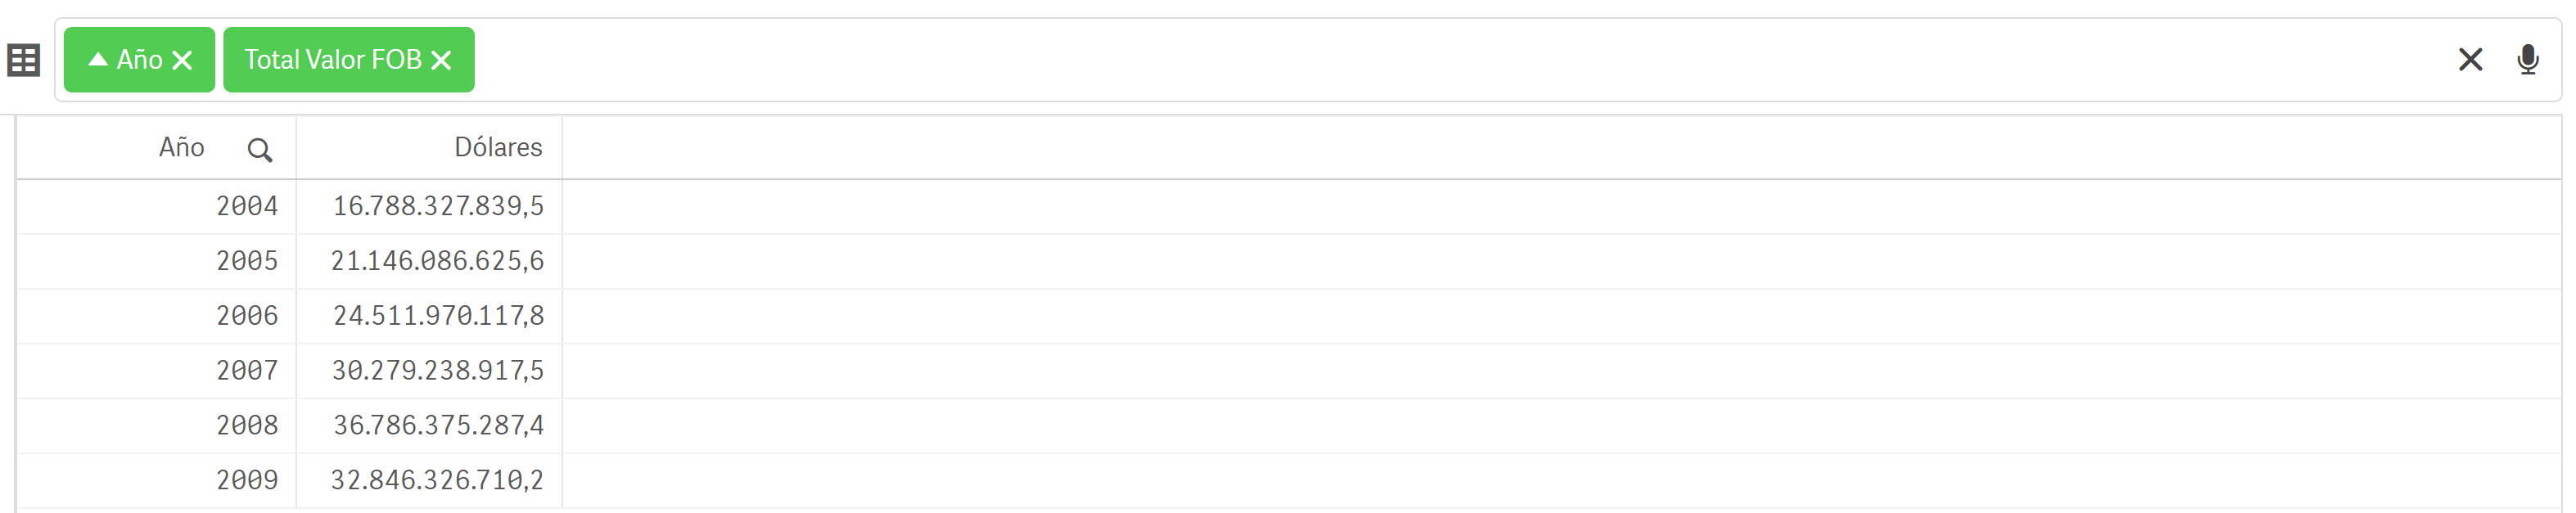

Comparando con las cifras del MINCIT y DANE, hay diferencias entre 2004-2009.

Diferencia en monto (DIAN - DANE) y diferencia porcentual:

| Año | DIAN (COP) | DANE (COP) | Diferencia (COP) | Diferencia (%) |
|-----|------------|------------|-----------------|----------------|
| 2004 | 16.729.662.561,0 | 16.788.327.839,5 | -58.665.278,5 | -0,35% |
| 2005 | 21.190.438.734,9 | 21.146.086.625,6 | 44.352.109,3 | 0,21% |
| 2006 | 24.390.975.102,7 | 24.511.970.117,8 | -120.995.015,1 | -0,49% |
| 2007 | 29.991.331.999,9 | 30.279.238.917,5 | -287.906.917,6 | -0,95% |
| 2008 | 37.625.882.065,0 | 36.786.375.287,4 | 839.506.777,6 | 2,28% |
| 2009 | 32.852.994.731,6 | 32.846.376.710,2 | 6.618.021,4 | 0,02% |

Notas:
- La diferencia se calculó como: DIAN - DANE
- La diferencia porcentual se calculó como: (DIAN - DANE) / DANE * 100
- Los valores negativos indican que la cifra del DANE es mayor que la de la DIAN
- Los valores positivos indican que la cifra de la DIAN es mayor que la del DANE

La mayor diferencia porcentual se observa en 2008 (2,28%), mientras que en 2009 hay una diferencia mínima (0,02%).

## ✅🟢🔍 Verificar datos subidos

In [ ]:
query_to_snowflake_and_print("""
SELECT COLUMN_NAME FROM INFORMATION_SCHEMA.COLUMNS
WHERE TABLE_NAME = 'TABLE_EXPORTACIONES_DIAN'
ORDER BY COLUMN_NAME;
""")

COLUMN_NAME
-----------
ADUANA_DESPACHO
ADUANA_SALIDA
ANO_ARCHIVO
ARCHIVO
BANDERA
CANTIDAD_UNIDADES_FISICAS
CIUDAD_DESTINATARIO
CLASE_EXPORTADOR
COD_ADUANA_DESPACHO
COD_ADUANA_SALIDA
COD_DPTO_EXPORTADOR
COD_EXPORTACION_TRANSITO
COD_LUGAR_SALIDA_NUM
COD_LUG_SALIDA_ALF
COD_MODALIDAD_EXPORTACION
COD_MODALIDAD_PRECEDENTE
COD_MODO_TRANSPORTE
COD_MONEDA_TRANSACCION
COD_NACIONALIDAD_BANDERA
COD_OFICINA_REINTEGRO
COD_PAIS_DESTINO
COD_PAIS_DESTINO_ALF
COD_PAIS_DESTINO_NUM
COD_REGIMEN_CAN
COD_REGION_ORIGEN
COD_REGION_PROCEDENCIA
COD_TIPO_DATOS
COD_TIPO_EMBARQUE
COD_UNIDAD_FISICA
COD_UNIDAD_FISICA_ALF
COD_UNIDAD_FISICA_NUM
COD_USUARIO
DIREC_EXPORTADOR
DOMICILIO_DESTINATARIO
EXPORTACION_EN_TRANSITO
FECHA_DECLARACION_EXPORTACION
FECHA_PROCESO
FECHA_SOLICITUD_AUTO_EMBARQUE
FECH_DECLA_EXPORTACION_ANT
FECH_DECLA_PRECEDENTE
FORMA_PAGO
MODALIDAD_EXPORTACION
MODO_TRANSPORTE
NACIONALIDAD_BANDERA
NIT_DECLARANTE
NIT_EXPORTADOR
NIT_EXPORTADOR_
NUMERO_FORMULARIO
NUMERO_SERIE
NUM_ARTICULO
NUM_DECLARACION_PRECE

In [ ]:
# Verificando cuántas filas cargó.
query_to_snowflake_and_return_dataframe("""
SELECT count(*)
FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN;
""")

Comando ejecutado correctamente.
Query: 
SELECT count(*)
FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN;




COUNT(*)
0  22068177

In [ ]:
# Seleccionar una muestra de la tabla y pasarla a un dataframe
df_temp = query_to_snowflake_and_return_dataframe("""
SELECT *
FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN
LIMIT 10;
""")

Comando ejecutado correctamente.
Query: 
SELECT *
FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN
LIMIT 10;




In [ ]:
df_temp.shape

(10, 80)

In [ ]:
df_temp.columns

Index(['FECHA_PROCESO', 'NUMERO_SERIE', 'OFICINA', 'COD_ADUANA_DESPACHO',
       'ADUANA_DESPACHO', 'TIPO_IDENT', 'NIT_EXPORTADOR', 'TIPO_USUARIO',
       'COD_USUARIO', 'CLASE_EXPORTADOR', 'COD_DPTO_EXPORTADOR',
       'COD_PAIS_DESTINO_NUM', 'COD_PAIS_DESTINO_ALF', 'COD_PAIS_DESTINO',
       'PAIS_DESTINO_FINAL', 'CIUDAD_DESTINATARIO',
       'NUM_SOLICITUD_AUTO_EMBARQUE', 'TIPO_DECLARACION', 'TIPO_DESPACHO',
       'COD_LUGAR_SALIDA_NUM', 'COD_LUG_SALIDA_ALF', 'COD_REGION_PROCEDENCIA',
       'REGION_PROCEDENCIA', 'NUM__DECLA_EXPORTACION_ANT',
       'FECH_DECLA_EXPORTACION_ANT', 'NUM_DECLARACION_PRECEDENTE',
       'FECH_DECLA_PRECEDENTE', 'COD_MODALIDAD_PRECEDENTE',
       'COD_MONEDA_TRANSACCION', 'COD_MODO_TRANSPORTE', 'MODO_TRANSPORTE',
       'BANDERA', 'COD_NACIONALIDAD_BANDERA', 'NACIONALIDAD_BANDERA',
       'COD_REGIMEN_CAN', 'COD_MODALIDAD_EXPORTACION', 'MODALIDAD_EXPORTACION',
       'FORMA_PAGO', 'COD_TIPO_EMBARQUE', 'TIPO_DE_EMBARQUE', 'COD_TIPO_DATOS',
       'TIPO_DE

In [ ]:
df_temp

FECHA_PROCESO  NUMERO_SERIE  OFICINA  COD_ADUANA_DESPACHO  \
0       202411.0           1.0     99.0                 35.0   
1       202411.0          28.0     99.0                  3.0   
2       202411.0          31.0     99.0                  3.0   
3       202411.0           1.0     99.0                  3.0   
4       202411.0           5.0     99.0                 41.0   
5       202411.0           1.0     99.0                 48.0   
6       202411.0           2.0     99.0                  3.0   
7       202411.0           1.0     99.0                 48.0   
8       202411.0           1.0     99.0                 35.0   
9       202411.0           1.0     99.0                  3.0   

                             ADUANA_DESPACHO  TIPO_IDENT  NIT_EXPORTADOR  \
0        Impuestos y Aduanas de Buenaventura         2.0     860007538.0   
1  Aduanas de Bogotá -  Aeropuerto El Dorado         2.0     900822525.0   
2  Aduanas de Bogotá -  Aeropuerto El Dorado         2.0     900822525.0   
3  Aduanas de Bogotá -  Aeropuerto El Dorado         2.0     900254024.0   
4               Impuestos y Aduanas de Urabá         2.0     890904224.0   
5                       Aduanas de Cartagena         2.0     860525060.0   
6  Aduanas de Bogotá -  Aeropuerto El Dorado         2.0     800065684.0   
7                       Aduanas de Cartagena         2.0     900174478.0   
8        Impuestos y Aduanas de Buenaventura         2.0     860007538.0   
9  Aduanas de Bogotá -  Aeropuerto El Dorado         2.0     900613819.0   

   TIPO_USUARIO  COD_USUARIO  CLASE_EXPORTADOR  ...  \
0          36.0          0.0               2.0  ...   
1          36.0          0.0               2.0  ...   
2          36.0          0.0               2.0  ...   
3          36.0          0.0               2.0  ...   
4          36.0          0.0               2.0  ...   
5          36.0          0.0               2.0  ...   
6          36.0          0.0               2.0  ...   
7          36.0          0.0               2.0  ...   
8          36.0          0.0               2.0  ...   
9          36.0          0.0               2.0  ...   

          RAZON_SOCIAL_DESTINATARIO  \
0                        A LA ORDEN   
1    MHS INTERNATIONAL GMBH  CO. KG   
2    MHS INTERNATIONAL GMBH  CO. KG   
3            FANTASIA BLUMEN EXPORT   
4  MORENO TRADE DISTRIBUTION S.R.L.   
5     MELITTA EUROPA GMBH & CO. KG.   
6            FANTASIA BLUMEN IMPORT   
7        LOUIS DREYFUS COMPANY S.A.   
8                        A LA ORDEN   
9         AQUARIUM DIETZENBACH GMBH   

                              DOMICILIO_DESTINATARIO archivo ano_archivo  \
0                                                S/N    None        None   
1                      ENGLBURG 49, D 94104 TITTLING    None        None   
2                      ENGLBURG 49, D 94104 TITTLING    None        None   
3                        81929 EGGENFELDENERSTR,  54    None        None   
4     STR GOSPODARILOR NO 27 ROOM 4 TIMISORA-RUMANIA    None        None   
5  GESCHAFTSBEREICH KAFFEE DORTMUNDER STR. 1, 281...    None        None   
6                                      GRUNEN WEG 16    None        None   
7  GVA CENTER, 29 ROUTE DE L&#20294EROPORT P.O.BO...    None        None   
8                                                S/N    None        None   
9                 VON HEVESYSTR 1A 63128 DIETZENBACH    None        None   

  NUM_ARTICULO NIT_EXPORTADOR_  COD_UNIDAD_FISICA  NUM_MANIFIESTO  \
0         None            None               None            None   
1         None            None               None            None   
2         None            None               None            None   
3         None            None               None            None   
4         None            None               None            None   
5         None            None               None            None   
6         None            None               None            None   
7         None            None      

In [ ]:
%%time
# Análisis Automático de Valores Nulos para todas las columnas

# Para analizar una tabla específica
resultados_nulos = ejecutar_analisis_valores_nulos("BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN", configuracion_sf)

Obteniendo estructura de la tabla BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN...
Iniciando análisis de valores nulos...
Analizando 80 columnas en 8 lotes...
Procesando lote 1/8 (10 columnas)
Procesando lote 2/8 (10 columnas)
Procesando lote 3/8 (10 columnas)
Procesando lote 4/8 (10 columnas)
Procesando lote 5/8 (10 columnas)
Procesando lote 6/8 (10 columnas)
Procesando lote 7/8 (10 columnas)
Procesando lote 8/8 (10 columnas)

RESULTADOS DEL ANÁLISIS DE VALORES NULOS:
Total de columnas analizadas: 80

Top 10 columnas con mayor porcentaje de valores nulos:


Columna     Nulos  Total_Filas Porcentaje_Nulos
77              NUM_MANIFIESTO  17084661     17084661           100.00
76                     archivo  17084661     17084661           100.00
75             NIT_EXPORTADOR_  17084661     17084661           100.00
74         NUM_DOC_EXPO_ADUANA  17084661     17084661           100.00
73       COD_OFICINA_REINTEGRO  17084661     17084661           100.00
72           COD_UNIDAD_FISICA  17084661     17084661           100.00
71                NUM_ARTICULO  17084661     17084661           100.00
70                 ano_archivo  17084661     17084661           100.00
20    COD_MODALIDAD_PRECEDENTE  16431985     17084661            96.18
21  NUM__DECLA_EXPORTACION_ANT   6566044     17084661            38.43


Estadísticas generales:
Promedio de valores nulos: 11.74%
Columnas sin valores nulos: 58
Columnas con >50% valores nulos: 9
CPU times: user 593 ms, sys: 33.6 ms, total: 626 ms
Wall time: 10.9 s


In [ ]:
# Para ver columnas con más de 30% de valores nulos
columnas_incompletas = resultados_nulos[resultados_nulos['Porcentaje_Nulos'] > 30]
display(columnas_incompletas)

Columna     Nulos  Total_Filas Porcentaje_Nulos
77              NUM_MANIFIESTO  17084661     17084661           100.00
76                     archivo  17084661     17084661           100.00
75             NIT_EXPORTADOR_  17084661     17084661           100.00
74         NUM_DOC_EXPO_ADUANA  17084661     17084661           100.00
73       COD_OFICINA_REINTEGRO  17084661     17084661           100.00
72           COD_UNIDAD_FISICA  17084661     17084661           100.00
71                NUM_ARTICULO  17084661     17084661           100.00
70                 ano_archivo  17084661     17084661           100.00
20    COD_MODALIDAD_PRECEDENTE  16431985     17084661            96.18
21  NUM__DECLA_EXPORTACION_ANT   6566044     17084661            38.43

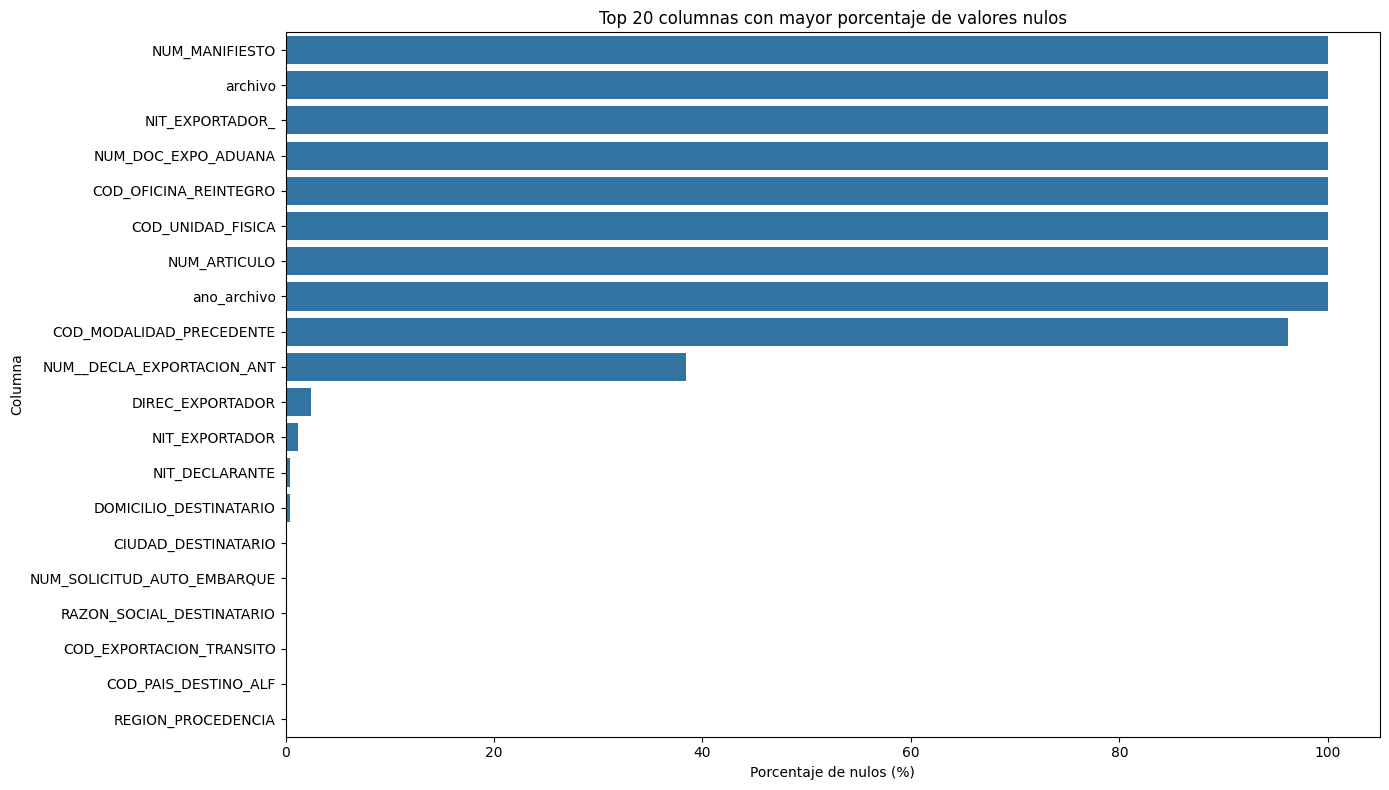

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Graficar las 20 columnas con más valores nulos
plt.figure(figsize=(14, 8))
sns.barplot(x='Porcentaje_Nulos', y='Columna',
            data=resultados_nulos.head(20))
plt.title('Top 20 columnas con mayor porcentaje de valores nulos')
plt.xlabel('Porcentaje de nulos (%)')
plt.ylabel('Columna')
plt.tight_layout()
plt.show()


REPORTE DE CALIDAD DE DATOS: BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN
Fecha y hora del análisis: 2025-04-15 15:23:48

ESTADÍSTICAS GENERALES:
Total de columnas analizadas: 80
Promedio de valores nulos: 11.74%
Mediana de valores nulos: 0.00%
Columnas sin valores nulos: 58
Columnas con >50% valores nulos: 9
Columnas con 100% valores nulos: 8

TOP 10 COLUMNAS CON MAYOR PORCENTAJE DE VALORES NULOS:
1. NUM_MANIFIESTO: 100.0%
2. archivo: 100.0%
3. NIT_EXPORTADOR_: 100.0%
4. NUM_DOC_EXPO_ADUANA: 100.0%
5. COD_OFICINA_REINTEGRO: 100.0%
6. COD_UNIDAD_FISICA: 100.0%
7. NUM_ARTICULO: 100.0%
8. ano_archivo: 100.0%
9. COD_MODALIDAD_PRECEDENTE: 96.2%
10. NUM__DECLA_EXPORTACION_ANT: 38.4%

RESUMEN DE CATEGORIZACIÓN DE COLUMNAS POR VALORES NULOS:
Excelente (0%): 58 columnas (72.5%)
Buena (0-5%): 12 columnas (15.0%)
Mala (20-50%): 1 columnas (1.2%)
Crítica (>50%): 9 columnas (11.2%)

DISTRIBUCIÓN DE COLUMNAS POR CALIDAD DE DATOS:
🟢 Excelente (0%): 58 columnas (72.5%)
🟢 Buena (0-5%)

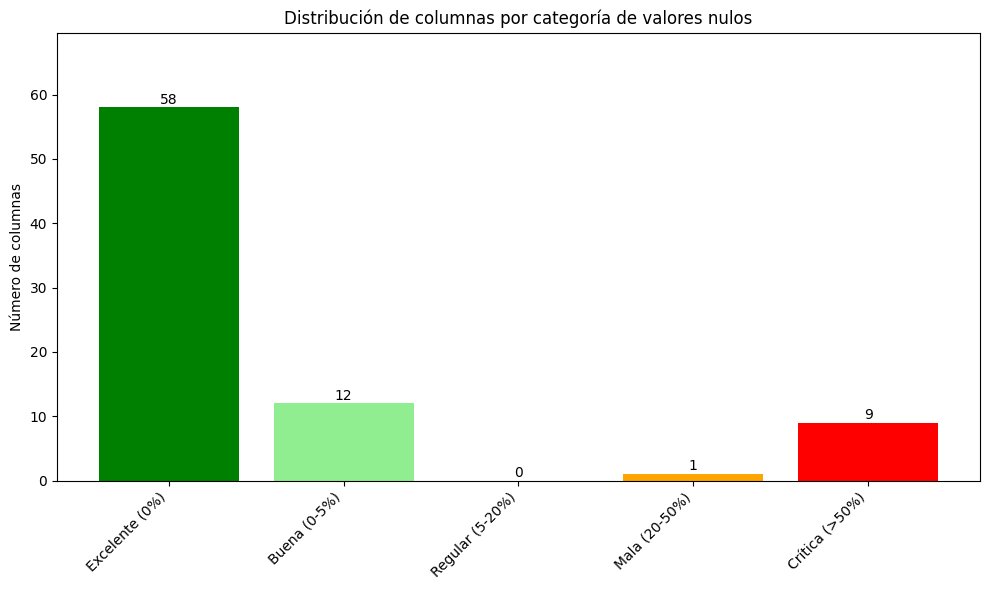


RECOMENDACIONES:
1. Se recomienda trabajar con las 70 columnas en categorías 'Excelente', 'Buena' y 'Regular'.
2. Considerar la eliminación o tratamiento especial para las 9 columnas críticas.
3. Si es posible, investigar la causa de los valores nulos, especialmente en columnas con 100% de valores nulos.

COLUMNAS RECOMENDADAS PARA ANÁLISIS (menos de 20% de valores nulos):
1. COD_ADUANA_DESPACHO: 0.0% valores nulos
2. COD_USUARIO: 0.0% valores nulos
3. TIPO_USUARIO: 0.0% valores nulos
4. VALOR_SERIE_SEGUROS_USD: 0.0% valores nulos
5. TIPO_DESPACHO: 0.0% valores nulos
6. COD_REGION_ORIGEN: 0.0% valores nulos
7. TIPO_DE_EMBARQUE: 0.0% valores nulos
8. COD_PAIS_DESTINO: 0.0% valores nulos
9. TIPO_DECLARACION: 0.0% valores nulos
10. COD_LUGAR_SALIDA_NUM: 0.0% valores nulos
11. FECH_DECLA_PRECEDENTE: 0.0% valores nulos
12. COD_MONEDA_TRANSACCION: 0.0% valores nulos
13. COD_MODO_TRANSPORTE: 0.0% valores nulos
14. COD_REGION_PROCEDENCIA: 0.0% valores nulos
15. NUM_DECLARACION_PRECEDENTE: 0.0

In [ ]:
%%time
# Agrupar columnas por categorías de valores nulos
reporte = generar_reporte_calidad_datos(resultados_nulos, "BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN")

In [ ]:
# Verificar nombres exactos de las columnas.
query_to_snowflake_and_print("""
SELECT COLUMN_NAME
FROM INFORMATION_SCHEMA.COLUMNS
WHERE TABLE_NAME = 'TABLE_EXPORTACIONES_DIAN'
AND TABLE_SCHEMA = 'EXPORTACIONES'
AND TABLE_CATALOG = 'BD_EXPORTACIONES_DIAN';
""")

COLUMN_NAME
-----------
VLR_SERIE_OTROS_GASTOS_USD
VALOR_FOB_PESOS
COD_UNIDAD_FISICA_ALF
EXPORTACION_EN_TRANSITO
CIUDAD_DESTINATARIO
REGION_PROCEDENCIA
COD_OFICINA_REINTEGRO
SISTEMAS_ESPECIALES
COD_ADUANA_SALIDA
COD_PAIS_DESTINO_ALF
CANTIDAD_UNIDADES_FISICAS
COD_ADUANA_DESPACHO
COD_EXPORTACION_TRANSITO
COD_LUGAR_SALIDA_NUM
COD_TIPO_DATOS
COD_USUARIO
TIPO_IDENT
NUM_ARTICULO
VALOR_SERIE_SEGUROS_USD
NIT_DECLARANTE
DOMICILIO_DESTINATARIO
COD_REGION_ORIGEN
NIT_EXPORTADOR_
NACIONALIDAD_BANDERA
RAZON_SOCIAL_DECLARANTE
COD_LUG_SALIDA_ALF
RAZON_SOCIAL_EXPORTADOR
PESO_BRUTO_KGS
FECHA_DECLARACION_EXPORTACION
NUMERO_FORMULARIO
COD_MODALIDAD_PRECEDENTE
COD_MONEDA_TRANSACCION
TIPO_DE_DATOS
COD_MODO_TRANSPORTE
FECHA_PROCESO
FORMA_PAGO
NUM_SOLICITUD_AUTO_EMBARQUE
TIPO_CERTIFICADO_ORIGEN
COD_NACIONALIDAD_BANDERA
TIPO_DE_EMBARQUE
NUMERO_SERIE
COD_MODALIDAD_EXPORTACION
PESO_NETO_KGS
FECH_DECLA_EXPORTACION_ANT
NUM_DOC_EXPO_ADUANA
ADUANA_SALIDA
REGION_DE_ORIGEN
COD_PAIS_DESTINO_NUM
NUM_MANIFIESTO
FECHA_SOL

In [ ]:
  %%time
  query_to_snowflake_and_print("""
  SELECT
      "FECHA_PROCESO" AS Fecha,
      SUM("VALOR_FOB_USD") AS Total_Exportado_USD,
      SUM("PESO_BRUTO_KGS") AS Total_Peso_Bruto_KG
  FROM
      BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN
  GROUP BY
      "FECHA_PROCESO"
  ORDER BY
      "FECHA_PROCESO" ASC;
  """)

FECHA|TOTAL_EXPORTADO_USD|TOTAL_PESO_BRUTO_KG
---------------------------------------------
200701.0|1826234733.47|8206094688.59
200702.0|1904336463.8|6927694927.63
200703.0|2385702345.16|10600230966.53
200704.0|2485893702.77|10690334681.19
200705.0|2693870795.0299997|8548653497.389999
200706.0|2092163626.27|4511528736.26
200707.0|2627898615.2|10078592561.35
200708.0|2577752522.8900003|9674897558.89
200709.0|2508160422.55|5440178327.67
200710.0|2593612873.69|5023196801.820001
200711.0|3119413877.0|8394717544.16
200712.0|3176292022.09|9333827758.97
200801.0|2834514370.07|8386914461.03
200802.0|2833052628.45|6971642443.89
200803.0|2989442626.71|9492274801.41
200804.0|3357810300.6800003|9909344967.6
200805.0|3386582038.87|8535349065.77
200806.0|3660979853.86|9460648408.39
200807.0|3789170680.86|8816798834.26
200808.0|3289941190.17|7306539115.38
200809.0|3131168678.5299997|7463481508.94
200810.0|3118909168.29|8275668961.14
200811.0|2270980866.02|3900348011.59
200812.0|2963329662.58|6652217

In [ ]:
query_to_snowflake_and_print("""
SELECT
    "ano_archivo" AS Anio,
    SUM("VALOR_FOB_USD") AS Total_Exportado_USD,
    SUM("PESO_BRUTO_KGS") AS Total_Peso_Bruto_KG
FROM
    BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN
GROUP BY
    "ano_archivo"
ORDER BY
    "ano_archivo" ASC;
""")

ANIO|TOTAL_EXPORTADO_USD|TOTAL_PESO_BRUTO_KG
--------------------------------------------
None|752449375931.61|2047685610764.0398

Se muestran todos los resultados.


In [ ]:
# Verificando los valores únicos de la variable ano_archivo
query_to_snowflake_and_print("""
SELECT DISTINCT "ano_archivo"
FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN
ORDER BY "ano_archivo";
""")

ano_archivo
-----------
None

Se muestran todos los resultados.


In [ ]:
# Verificando los valores únicos de la variable archivo
query_to_snowflake_and_print("""
SELECT DISTINCT 'archivo'
FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN
ORDER BY 'archivo';
""")

'ARCHIVO'
---------
archivo

Se muestran todos los resultados.


In [ ]:
df_temp = query_to_snowflake_and_return_dataframe("""
SELECT DISTINCT 'FECHA_PROCESO'
FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN
ORDER BY 'FECHA_PROCESO';
""")
df_temp

Comando ejecutado correctamente.
Query: 
SELECT DISTINCT 'FECHA_PROCESO'
FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN
ORDER BY 'FECHA_PROCESO';




'FECHA_PROCESO'
0   FECHA_PROCESO

In [ ]:
%%time
# Mostrar el valor exportado por año
df_temp = query_to_snowflake_and_return_dataframe("""
SELECT
    ANO_ARCHIVO AS Anio,
    SUM(VALOR_FOB_USD) AS Total_Exportado_USD,
    SUM(PESO_BRUTO_KGS) AS Total_Peso_Bruto_KG
FROM
    BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN
GROUP BY
    ANO_ARCHIVO
ORDER BY
    ANO_ARCHIVO ASC;
""")
df_temp

Comando ejecutado correctamente.
Query: 
SELECT
    ANO_ARCHIVO AS Anio,
    SUM(VALOR_FOB_USD) AS Total_Exportado_USD,
    SUM(PESO_BRUTO_KGS) AS Total_Peso_Bruto_KG
FROM
    BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN
GROUP BY
    ANO_ARCHIVO
ORDER BY
    ANO_ARCHIVO ASC;


CPU times: user 83.2 ms, sys: 11.1 ms, total: 94.2 ms
Wall time: 2.59 s


ANIO  TOTAL_EXPORTADO_USD  TOTAL_PESO_BRUTO_KG
0   2001         1.232990e+10         6.814574e+10
1   2002         1.197542e+10         6.202378e+10
2   2003         1.312852e+10         7.876468e+10
3   2004         1.672966e+10         7.949571e+10
4   2005         2.119044e+10         8.270272e+10
5   2006         2.439098e+10         8.849519e+10
6   2007         2.999133e+10         9.742995e+10
7   2008         3.762588e+10         9.517123e+10
8   2009         3.285299e+10         1.043990e+11
9   2010         3.971334e+10         1.129029e+11
10  2011         5.691494e+10         1.307438e+11
11  2012         6.012517e+10         1.297569e+11
12  2013         5.882637e+10         1.323007e+11
13  2014         5.485675e+10         1.467394e+11
14  2015         3.601752e+10         1.314923e+11
15  2016         3.176834e+10         1.373647e+11
16  2017         3.802186e+10         1.547217e+11
17  2018         4.190478e+10         1.353374e+11
18  2019         3.948917e+10         1.237905e+11
19  2020         3.105581e+10         1.158863e+11
20  2021         4.138999e+10         1.002592e+11
21  2022         5.691014e+10         1.026421e+11
22  2023         4.976913e+10         1.036286e+11
23  2024         4.955596e+10         1.072559e+11
24  2025         7.557083e+09         1.292438e+10

In [ ]:
# Seleccionar una muestra de la tabla y pasarla a un dataframe
df_temp = query_to_snowflake_and_return_dataframe("""
SELECT
    SUM(VALOR_FOB_USD) AS TOTAL_EXPORTACIONES_USD,
    SUM(VALOR_FOB_PESOS) AS TOTAL_EXPORTACIONES_PESOS
FROM
    BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN;
""")
df_temp

Comando ejecutado correctamente.
Query: 
SELECT
    SUM(VALOR_FOB_USD) AS TOTAL_EXPORTACIONES_USD,
    SUM(VALOR_FOB_PESOS) AS TOTAL_EXPORTACIONES_PESOS
FROM
    BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN;




TOTAL_EXPORTACIONES_USD  TOTAL_EXPORTACIONES_PESOS
0             7.524494e+11               2.123918e+15

## 🔵 Cerrar sesión, conexión y cursor

In [ ]:
sesion_activa.close()

In [ ]:
tiempo_sesión()
tiempo_total()

Tiempo transcurrido para Sesión Subir a Snowflake: 0:28:53.690599
Tiempo transcurrido para Total: 2:16:38.773086


# 🟥📥 Cargar el último mes disponible y los meses modificados

In [ ]:
tiempo_sesión = medir_tiempo("Sesión cargar el último mes disponible y los meses modificados")

## 🛑 Borrar los meses de los que hay reposición de datos

In [ ]:
%%time
# Hacer copia de seguridad
# Tiempo 1 minuto.
query = """
-- Paso 1: Crear una copia de seguridad de la tabla original
CREATE OR REPLACE TABLE BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN_BACKUP AS
SELECT * FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN;
"""
crear_backup = st_query_to_snowflake_and_return_dataframe(query, sf_config)
crear_backup

status
0  Table TABLE_EXPORTACIONES_DIAN_BACKUP successfully created.

In [ ]:
%%time
# Verificar la creación
query = """
-- Paso 2: Verificar que la tabla de backup se creó correctamente
SELECT COUNT(*) AS REGISTROS_BACKUP FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN_BACKUP;
"""
verificar_backup = st_query_to_snowflake_and_return_dataframe(query, sf_config)
verificar_backup

CPU times: user 72.3 ms, sys: 490 µs, total: 72.8 ms
Wall time: 942 ms


REGISTROS_BACKUP
0  22068177

In [ ]:
%%time
# Eliminar los registros con los valores específicos de FECHA_PROCESO
query = """
-- Paso 3: Eliminar los registros con los valores específicos de FECHA_PROCESO
DELETE FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN
WHERE FECHA_PROCESO IN (202412 , 202501, 202502, 202503);
"""
eliminar_registros = st_query_to_snowflake_and_return_dataframe(query, sf_config)
eliminar_registros

CPU times: user 164 ms, sys: 4.42 ms, total: 168 ms
Wall time: 2.34 s


number of rows deleted
0  444144

In [ ]:
%%time
# Verificar la eliminación
query = """
-- Paso 4: Verificar la eliminación (opcional)
SELECT COUNT(*) AS REGISTROS_ELIMINADOS
FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN_BACKUP
WHERE FECHA_PROCESO IN (202412 , 202501, 202502, 202503);
"""
verificar_eliminar_registros = st_query_to_snowflake_and_return_dataframe(query, sf_config)
verificar_eliminar_registros

CPU times: user 72 ms, sys: 2.04 ms, total: 74.1 ms
Wall time: 1.16 s


REGISTROS_ELIMINADOS
0  325390

In [ ]:
%%time
# Verificar la eliminación
query = """
-- Paso 4: Verificar la eliminación (opcional)
SELECT COUNT(*) AS REGISTROS_RESTANTES
FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN;
"""
verificar_eliminar_registros = st_query_to_snowflake_and_return_dataframe(query, sf_config)
verificar_eliminar_registros

CPU times: user 43 ms, sys: 930 µs, total: 43.9 ms
Wall time: 718 ms


REGISTROS_RESTANTES
0  21742787

## ✅ Abrir archivo nuevo

In [ ]:
ruta_raw_data

'/content/drive/MyDrive/ProColombia/0A. Datos/DIAN/Raw_data'

In [ ]:
nombre_zip_ultimo_mes

'03_Exportaciones_2025_Marzo.zip'

In [ ]:
# %%time
# # Wall time: 3min 14s
# # Cargar archivo en dataframe para hacer pruebas.
# ruta_zip_real_completa = os.path.join(ruta_raw_data, nombre_zip_ultimo_mes)

# print(f"\n--- Procesando tu archivo real: {nombre_zip_ultimo_mes} ---")
# df_real = procesar_zip_optimizado(
#     ruta_zip_real_completa,
#     skiprows=0, # Si necesitas omitir cabeceras
#     nrows=10_000_000, # Limitar filas para prueba rápida
#     chunksize=50000, # Usar chunks grandes
#     # dtype={'columna_numerica': 'float32', 'columna_id': 'str'}, # Especifica tipos si los conoces
#     encoding='latin1' # Si sabes que la codificación es diferente
# )

# if df_real is not None and isinstance(df_real, pd.DataFrame):
#     print("\nArchivo real cargado con éxito.")
#     print(f"Dimensiones: {df_real.shape}")
#     print("Primeras filas:")
#     print(df_real.columns)
#     print("")
#     print("\nInformación:")
#     df_real.info(memory_usage='deep')
# elif df_real is not None: # Es un iterador
#       print("\nArchivo real listo para procesar en chunks (iterador devuelto).")
# df_real.head(3)


--- Procesando tu archivo real: 03_Exportaciones_2025_Marzo.zip ---
Procesando 1 archivo(s) en '/content/drive/MyDrive/ProColombia/0A. Datos/DIAN/Raw_data/03_Exportaciones_2025_Marzo.zip'...
  Leyendo '03_Exportaciones_2025_Marzo.xlsx'... -> 118754 filas leídas (Excel).

Concatenando 1 DataFrame(s)...
Proceso completado en 193.81 segundos. DataFrame final: (118754, 72)

Archivo real cargado con éxito.
Dimensiones: (118754, 72)
Primeras filas:
Index(['FECHA_PROCESO', 'NUMERO_SERIE', 'OFICINA', 'COD_ADUANA_DESPACHO',
       'ADUANA_DESPACHO', 'TIPO_IDENT', 'NIT_EXPORTADOR', 'TIPO_USUARIO',
       'COD_USUARIO', 'CLASE_EXPORTADOR', 'COD_DPTO_EXPORTADOR',
       'COD_PAIS_DESTINO_NUM', 'COD_PAIS_DESTINO_ALF', 'COD_PAIS_DESTINO',
       'PAIS_DESTINO_FINAL', 'CIUDAD_DESTINATARIO',
       'NUM_SOLICITUD_AUTO_EMBARQUE', 'TIPO_DECLARACION', 'TIPO_DESPACHO',
       'COD_LUGAR_SALIDA_NUM', 'COD_LUG_SALIDA_ALF', 'COD_REGION_PROCEDENCIA',
       'REGION_PROCEDENCIA', 'NUM__DECLA_EXPORTACION_ANT',

FECHA_PROCESO  NUMERO_SERIE  OFICINA  COD_ADUANA_DESPACHO  \
0  202503         1             99       19                    
1  202503         2             99       19                    
2  202503         1             99       19                    

                      ADUANA_DESPACHO  TIPO_IDENT  NIT_EXPORTADOR  \
0  Impuestos y Aduanas de Santa Marta  2          901,012,419.00    
1  Impuestos y Aduanas de Santa Marta  2          901,012,419.00    
2  Impuestos y Aduanas de Santa Marta  2          901,012,419.00    

   TIPO_USUARIO  COD_USUARIO  CLASE_EXPORTADOR  COD_DPTO_EXPORTADOR  \
0  36            0            2                 11001                 
1  36            0            2                 11001                 
2  36            0            2                 11001                 

   COD_PAIS_DESTINO_NUM COD_PAIS_DESTINO_ALF COD_PAIS_DESTINO  \
0  56                    BEL                  BEL               
1  56                    BEL                  BEL               
2  56                    BEL                  BEL               

  PAIS_DESTINO_FINAL CIUDAD_DESTINATARIO  NUM_SOLICITUD_AUTO_EMBARQUE  \
0  Bélgica            ANTWERPEN          6,027,744,051,981.00           
1  Bélgica            MEYRIN             6,027,744,060,804.00           
2  Bélgica            ANTWERPEN          6,027,744,053,021.00           

   TIPO_DECLARACION TIPO_DESPACHO  COD_LUGAR_SALIDA_NUM COD_LUG_SALIDA_ALF  \
0  1                 Inicial       19                    SMR                 
1  1                 Inicial       19                    SMR                 
2  1                 Inicial       19                    SMR                 

   COD_REGION_PROCEDENCIA REGION_PROCEDENCIA  NUM__DECLA_EXPORTACION_ANT  \
0  17                      CALDAS             6007751789484                
1  17                      CALDAS             6007751789517                
2  17                      CALDAS             6007751789501                

   FECH_DECLA_EXPORTACION_ANT  NUM_DECLARACION_PRECEDENTE  \
0  202503                      0                            
1  202503                      0                            
2  202503                      0                            

   FECH_DECLA_PRECEDENTE COD_MODALIDAD_PRECEDENTE COD_MONEDA_TRANSACCION  \
0  0                      NaN                      USD                     
1  0                      NaN                      USD                     
2  0                      NaN                      USD                     

   COD_MODO_TRANSPORTE MODO_TRANSPORTE  BANDERA COD_NACIONALIDAD_BANDERA  \
0  1                    Marítimo        28       ATG                       
1  1                    Marítimo        28       ATG                       
2  1                    Marítimo        28       ATG                       

  NACIONALIDAD_BANDERA  COD_REGIMEN_CAN  COD_MODALIDAD_EXPORTACION  \
0  Antigua y Barbuda    1                198                         
1  Antigua y Barbuda    1                198                         
2  Antigua y Barbuda    1                198                         

                                                       MODALIDAD_EXPORTACION  \
0  Exportación definitiva de mercancías de fabricación o producción nacional   
1  Exportación definitiva de mercancías de fabricación o producción nacional   
2  Exportación definitiva de mercancías de fabricación o producción nacional   

   FORMA_PAGO  COD_TIPO_EMBARQUE TIPO_DE_EMBARQUE  COD_TIPO_DATOS  \
0  1           1                  Unico            2                
1  1           1                  Unico            2                
2  1           1                  Unico            2                

                      TIPO_DE_DATOS  TIPO_CERTIFICADO_ORIGEN  \
0  Definitivos despúes del embarque  8                         
1  Definitivos despúes del embarque  8                         
2  Definitivos despúes del embarque  8                         

  SISTEMAS_ESPECIALES

## 🔵 Subir dataframe(s)

In [ ]:
%%time
# Definir tus variables reales
lista_archivos_nuevos_exportaciones = [
    "12_Exportaciones_2024_Diciembre.zip",
    "01_Exportaciones_2025_Enero.zip",
    "02_Exportaciones_2025_Febrero.zip",
    "03_Exportaciones_2025_Marzo.zip"
]

# Ejecutar el proceso
estadisticas = procesar_y_cargar_archivos_exportaciones_con_checkpoint(
    lista_archivos_nuevos_exportaciones,
    ruta_raw_data,
    sf_config
)

No se encontró checkpoint previo. Iniciando proceso desde cero.
Iniciando procesamiento de 4 archivos pendientes de un total de 4.

[1/4] Procesando: 12_Exportaciones_2024_Diciembre.zip
Cargando datos del archivo 12_Exportaciones_2024_Diciembre.zip...
Procesando 1 archivo(s) en '/content/drive/MyDrive/ProColombia/0A. Datos/DIAN/Raw_data/12_Exportaciones_2024_Diciembre.zip'...
  Leyendo '12_Exportaciones_2024_Diciembre.xlsx'... -> 122606 filas leídas (Excel).

Concatenando 1 DataFrame(s)...
Proceso completado en 171.53 segundos. DataFrame final: (122606, 72)
📄 Nombre de archivo extraído: 12_Exportaciones_2024_Diciembre.zip
📅 Año de archivo extraído: 2024
Archivo cargado con éxito. Dimensiones: (122606, 74)
Cargando datos a Snowflake...
🔄 Iniciando carga de DataFrame a BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN
📊 Tamaño del DataFrame: 122606 filas x 74 columnas
🔌 Conectando a Snowflake...
✅ Tabla destino tiene 80 columnas
🔄 Preparando DataFrame para carga...
📝 DataFrame

In [ ]:
# %%time
# # Para subir un único archivo
# # Ahora, realizar el append a Snowflake
# filas_cargadas, tiempo_proceso = sf_append_dataframe_to_snowflake(
#     df=df_real,
#     table_name='BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN',
#     sf_config=sf_config,
#     chunk_size=100_000,
#     force_column_alignment=True,
#     add_metadata=True,
#     verbose=True
# )

# print(f"\nProceso completado:")
# print(f"Total de filas cargadas: {filas_cargadas:,}")
# print(f"Tiempo total: {tiempo_proceso:.2f} segundos ({tiempo_proceso/60:.2f} minutos)")

🔄 Iniciando carga de DataFrame a BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN
📊 Tamaño del DataFrame: 118754 filas x 72 columnas
🔌 Conectando a Snowflake...
✅ Tabla destino tiene 80 columnas
🔄 Preparando DataFrame para carga...
📝 DataFrame alineado con columnas de la tabla destino
☁️ Cargando DataFrame a Snowflake...
📊 Dividiendo DataFrame en 2 chunks de ~100000 filas cada uno
✅ Chunk 1/2 cargado: 100,000 filas en 12.57 segundos
✅ Chunk 2/2 cargado: 18,754 filas en 4.20 segundos

🏁 RESUMEN DE LA CARGA
📊 Total filas cargadas: 118,754
⏱️ Tiempo total: 21.16 segundos
⚡ Velocidad promedio: 5612.24 filas/segundo
🔌 Conexión a Snowflake cerrada

Proceso completado:
Total de filas cargadas: 118,754
Tiempo total: 21.16 segundos (0.35 minutos)
CPU times: user 5.38 s, sys: 101 ms, total: 5.48 s
Wall time: 21.3 s


In [ ]:
tiempo_sesión()
tiempo_total()

Tiempo transcurrido para Sesión cargar el último mes disponible: 0:00:01.719074
Tiempo transcurrido para Total: 0:00:37.466946


# ▶️ Consultas a la tabla creada

In [ ]:
tiempo_sesión = medir_tiempo("Sesión Consultas a la Tabla Creada")

## 🔵 Consultas básicas

In [ ]:
# Saber en qué base de datos estamos
query_to_snowflake_and_print("""
SELECT CURRENT_WAREHOUSE(), CURRENT_DATABASE(), CURRENT_SCHEMA();
""")

CURRENT_WAREHOUSE()|CURRENT_DATABASE()|CURRENT_SCHEMA()
-------------------------------------------------------
WH_PROCOLOMBIA_ANALITICA|BD_EXPORTACIONES_DIAN|EXPORTACIONES

Se muestran todos los resultados.


In [ ]:
%%time
# Analizar estructura de la tabla
if __name__ == "__main__":
    # Ejecutar análisis de estructura
    analizar_estructura_tabla(tabla_maestra)


ESTRUCTURA DE LA TABLA: TABLE_EXPORTACIONES_DIAN
Columna                        Tipo            Longitud/Precisión   Nullable
---------------------------------------------------------------------------
FECHA_PROCESO                  FLOAT                                YES     
FECHA_SOLICITUD_AUTO_EMBARQUE  FLOAT                                YES     
FECHA_DECLARACION_EXPORTACION  FLOAT                                YES     
FECH_DECLA_EXPORTACION_ANT     FLOAT                                YES     
FECH_DECLA_PRECEDENTE          FLOAT                                YES     
NUMERO_SERIE                   FLOAT                                YES     
NUMERO_FORMULARIO              FLOAT                                YES     
NUM_ARTICULO                   FLOAT                                YES     
NUM_SOLICITUD_AUTO_EMBARQUE    FLOAT                                YES     
NUM__DECLA_EXPORTACION_ANT     FLOAT                                YES     
NUM_DECLARACION_PRECEDENTE 

In [ ]:
# Extraer una parte de la tabla
query = """
SELECT *
FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN
LIMIT 2;
"""
df_temp = st_query_to_snowflake_and_return_dataframe(query, sf_config, limit=None)
df_temp

FECHA_PROCESO  FECHA_SOLICITUD_AUTO_EMBARQUE  \
0 202,501.00     202,501.00                       
1 202,501.00     202,412.00                       

   FECHA_DECLARACION_EXPORTACION  FECH_DECLA_EXPORTACION_ANT  \
0 20,250,124.00                  0.00                          
1 20,250,110.00                  202,412.00                    

   FECH_DECLA_PRECEDENTE  NUMERO_SERIE    NUMERO_FORMULARIO NUM_ARTICULO  \
0 0.00                   1.00          6,007,749,406,121.00  None          
1 0.00                   1.00          6,007,748,464,329.00  None          

   NUM_SOLICITUD_AUTO_EMBARQUE  NUM__DECLA_EXPORTACION_ANT  \
0 6,027,742,457,168.00         0.00                          
1 6,027,739,785,061.00         6,007,746,609,258.00          

   NUM_DECLARACION_PRECEDENTE NUM_MANIFIESTO NUM_DOC_EXPO_ADUANA  \
0 0.00                         None           None                 
1 0.00                         None           None                 

   CANTIDAD_UNIDADES_FISICAS  PESO_BRUTO_KGS  PESO_NETO_KGS  VALOR_FOB_USD  \
0 145.55                     0.03            0.02           108,800.00       
1 42,734.00                  43,119.00       42,734.00      44,379.79        

   VALOR_FOB_PESOS  VLR_SERIE_AGREGADO_NAL_USD  VALOR_SERIE_FLETES_USD  \
0 461,926,719.00   0.00                        0.00                      
1 191,773,504.75   0.00                        6,260.00                  

   VALOR_SERIE_SEGUROS_USD  VLR_SERIE_OTROS_GASTOS_USD OFICINA  \
0 0.00                     0.00                         99       
1 0.00                     0.00                         99       

  COD_ADUANA_DESPACHO                            ADUANA_DESPACHO TIPO_IDENT  \
0  3                   Aduanas de Bogotá -  Aeropuerto El Dorado  2           
1  87                  Aduanas de Barranquilla                    2           

  NIT_EXPORTADOR TIPO_USUARIO COD_USUARIO CLASE_EXPORTADOR  \
0  900647398      36           0           2                 
1  860026753      36           0           2                 

  COD_DPTO_EXPORTADOR COD_PAIS_DESTINO_NUM COD_PAIS_DESTINO_ALF  \
0  76001               344                  HKG                   
1  11001               52                   BRB                   

  COD_PAIS_DESTINO                                  PAIS_DESTINO_FINAL  \
0  HKG              China, región administrativa especial de Hong Kong   
1  BRB              Barbados                                             

  CIUDAD_DESTINATARIO TIPO_DECLARACION TIPO_DESPACHO COD_LUGAR_SALIDA_NUM  \
0  KOWLOON             1                Inicial       3                     
1  CHRIST CHURCH       1                Inicial       87                    

  COD_LUG_SALIDA_ALF COD_REGION_PROCEDENCIA REGION_PROCEDENCIA  \
0  BOG                11                     BOGOTA DC           
1  BAQ                8                      ATLANTICO           

  COD_MODALIDAD_PRECEDENTE COD_MONEDA_TRANSACCION COD_MODO_TRANSPORTE  \
0  None                     USD                    4                    
1  None                     USD                    1                    

  MODO_TRANSPORTE BANDERA COD_NACIONALIDAD_BANDERA NACIONALIDAD_BANDERA  \
0  Aéreo           8       ALB                      Albania               
1  Marítimo        28      ATG                      Antigua y Barbuda     

  COD_REGIMEN_CAN COD_MODALIDAD_EXPORTACION  \
0  1               199                        
1  1               199                        

                                                             MODALIDAD_EXPORTACION  \
0  Las demás exportaciones definitivas no incluidas como exportaciones definitivas   
1  Las demás exportaciones definitivas no incluidas como exportaciones definitivas   

  FORMA_PAGO COD_TIPO_EMBARQUE TIPO_DE_EMBARQUE COD_TIPO_DATOS  \
0  1          1                 Unico            1               
1  1          1                 Unico            2               

                      TIPO_DE_DATOS TIPO_CERTIFICAD

In [ ]:
df_temp.columns

Index(['FECHA_PROCESO', 'FECHA_SOLICITUD_AUTO_EMBARQUE',
       'FECHA_DECLARACION_EXPORTACION', 'FECH_DECLA_EXPORTACION_ANT',
       'FECH_DECLA_PRECEDENTE', 'NUMERO_SERIE', 'NUMERO_FORMULARIO',
       'NUM_ARTICULO', 'NUM_SOLICITUD_AUTO_EMBARQUE',
       'NUM__DECLA_EXPORTACION_ANT', 'NUM_DECLARACION_PRECEDENTE',
       'NUM_MANIFIESTO', 'NUM_DOC_EXPO_ADUANA', 'CANTIDAD_UNIDADES_FISICAS',
       'PESO_BRUTO_KGS', 'PESO_NETO_KGS', 'VALOR_FOB_USD', 'VALOR_FOB_PESOS',
       'VLR_SERIE_AGREGADO_NAL_USD', 'VALOR_SERIE_FLETES_USD',
       'VALOR_SERIE_SEGUROS_USD', 'VLR_SERIE_OTROS_GASTOS_USD', 'OFICINA',
       'COD_ADUANA_DESPACHO', 'ADUANA_DESPACHO', 'TIPO_IDENT',
       'NIT_EXPORTADOR', 'TIPO_USUARIO', 'COD_USUARIO', 'CLASE_EXPORTADOR',
       'COD_DPTO_EXPORTADOR', 'COD_PAIS_DESTINO_NUM', 'COD_PAIS_DESTINO_ALF',
       'COD_PAIS_DESTINO', 'PAIS_DESTINO_FINAL', 'CIUDAD_DESTINATARIO',
       'TIPO_DECLARACION', 'TIPO_DESPACHO', 'COD_LUGAR_SALIDA_NUM',
       'COD_LUG_SALIDA_ALF', 'COD

## 🔵 Exportaciones por año

In [ ]:
%%time
# Verificar lo que se acaba de subir
query = """
-- Consulta para obtener el resumen de exportaciones y peso por año
SELECT
    ano_archivo AS "AÑO",
    COUNT(*) AS NUMERO_REGISTROS,
    SUM(VALOR_FOB_USD) AS TOTAL_EXPORTACIONES_USD,
    SUM(VALOR_FOB_PESOS) AS TOTAL_EXPORTACIONES_PESOS
FROM
    BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN
WHERE
    VALOR_FOB_USD IS NOT NULL
    AND ano_archivo IS NOT NULL
GROUP BY
    ano_archivo
ORDER BY
    ano_archivo;
"""

df_temp = st_query_to_snowflake_and_return_dataframe(query, sf_config, limit=None)

CPU times: user 43.3 ms, sys: 739 µs, total: 44 ms
Wall time: 598 ms


In [ ]:
df_temp

AÑO  NUMERO_REGISTROS  TOTAL_EXPORTACIONES_USD  TOTAL_EXPORTACIONES_PESOS
0   2001  460852           12,329,896,346.00        28,362,814,262,638.00     
1   2002  450074           11,975,423,892.00        30,110,887,388,594.00     
2   2003  574395           13,128,524,194.00        37,758,548,947,218.00     
3   2004  627485           16,729,662,561.01        43,815,866,140,103.26     
4   2005  885880           21,190,438,734.93        49,151,468,729,659.66     
5   2006  982046           24,390,975,102.71        57,604,451,628,280.42     
6   2007  1060569          29,991,331,999.92        62,099,029,255,602.50     
7   2008  954009           37,625,882,065.09        73,251,909,984,038.42     
8   2009  828607           32,852,994,731.69        70,342,553,728,842.44     
9   2010  857803           39,713,336,400.44        75,349,435,653,271.22     
10  2011  905705           56,914,939,110.34        105,159,494,185,410.80    
11  2012  935993           60,125,165,917.93        108,077,897,029,907.00    
12  2013  931673           58,826,371,008.58        110,024,304,107,685.08    
13  2014  902525           54,856,754,566.61        109,181,791,378,707.23    
14  2015  886245           36,017,521,665.43        97,998,702,674,683.12     
15  2016  895109           31,768,340,981.28        96,614,053,945,717.16     
16  2017  960747           38,021,860,310.39        112,259,003,158,645.39    
17  2018  990250           41,904,777,398.16        123,839,098,117,260.11    
18  2019  1030033          39,489,167,863.76        129,488,290,974,946.22    
19  2020  930278           31,055,810,659.69        113,981,030,581,121.62    
20  2021  1116565          41,389,989,070.75        155,736,811,057,297.28    
21  2022  1166783          56,910,136,647.72        241,607,564,595,021.56    
22  2023  1229094          49,769,126,317.57        215,159,245,675,567.22    
23  2024  1302673          49,556,521,184.23        202,076,916,633,994.88    
24  2025  321538           11,895,057,205.93        49,807,686,593,419.22

## 🔵 Exportaciones por mes

In [ ]:
%%time
query = """
SELECT
    "FECHA_PROCESO" AS Fecha,
    SUM("VALOR_FOB_USD") AS Total_Exportado_USD,
    SUM("PESO_BRUTO_KGS") AS Total_Peso_Bruto_KG
FROM
    BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN
GROUP BY
    "FECHA_PROCESO"
ORDER BY
    "FECHA_PROCESO" ASC;
"""
df_temp = st_query_to_snowflake_and_return_dataframe(query, sf_config, limit=None)
df_temp

CPU times: user 67.1 ms, sys: 2.01 ms, total: 69.1 ms
Wall time: 2.03 s


FECHA  TOTAL_EXPORTADO_USD  TOTAL_PESO_BRUTO_KG
0   200,101.00 1,017,194,943.00     5,615,774,254.00    
1   200,102.00 964,437,342.00       5,207,652,814.00    
2   200,103.00 1,002,450,334.00     6,123,450,384.00    
3   200,104.00 1,058,456,830.00     7,668,591,930.00    
4   200,105.00 1,068,022,569.00     5,843,307,469.00    
..         ...              ...                  ...    
286 202,411.00 4,126,099,683.49     10,127,237,752.65   
287 202,412.00 4,480,508,348.13     9,034,026,458.04    
288 202,501.00 3,776,721,354.35     5,972,075,628.05    
289 202,502.00 3,780,274,939.95     6,952,305,113.63    
290 202,503.00 4,338,060,911.63     6,103,160,468.90    

[291 rows x 3 columns]

## 🔵 Tabla correlativa de NIT y razón social del exportador

In [ ]:
# Extraer los nits y razón social de las empresas exportadoras
# Extraer una parte de la tabla
query = """
SELECT
    NIT_EXPORTADOR,
    RAZON_SOCIAL_EXPORTADOR,
    SUM(VALOR_FOB_USD) AS TOTAL_VALOR_FOB_USD
FROM
    BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN
GROUP BY
    NIT_EXPORTADOR, RAZON_SOCIAL_EXPORTADOR
ORDER BY
    TOTAL_VALOR_FOB_USD DESC;
"""
df_temp = st_query_to_snowflake_and_return_dataframe(query, sf_config, limit=None)
df_temp

NIT_EXPORTADOR  \
0      899999068       
1      899999068       
2      800021308       
3      860069804       
4      899999068       
...          ...       
95961  900114511       
95962  860524599       
95963  860031786       
95964  900053198       
95965  900041499       

                                            RAZON_SOCIAL_EXPORTADOR  \
0      ECOPETROL S.A                                                  
1      ECOPETROL S.A.                                                 
2      DRUMMOND LTD                                                   
3      CARBONES DEL CERREJON LIMITED                                  
4      ECOPETROL                                                      
...          ...                                                      
95961  SOCIEDAD DE COMERCIALIZACION INTERNACIONAL DE CARBONES TERMI   
95962  CI FLORES TAIRONA LTDA                                         
95963  INDUSTRIASL FULLER PINTO S.A.                                  
95964  C I ALEXANDRA FARNS S.A.                                       
95965  COMERCIALIZADORA INTERNACIONAL ARCASLTDA.                      

       TOTAL_VALOR_FOB_USD  
0     92,673,286,182.84     
1     64,338,231,302.77     
2     39,181,581,497.23     
3     25,650,712,490.59     
4     25,440,681,701.65     
...                 ...     
95961 0.03                  
95962 0.02                  
95963 0.02                  
95964 0.02                  
95965 0.01                  

[95966 rows x 3 columns]

In [ ]:
%%time
directorio_excel_correlativas_ = 'tablas_correlativas_exportaciones'
nombre_archivo = "tabla_correlativa_nit_empresa_por_anio.xlsx"

# Exportar a Excel
ruta_archivo = f"{directorio_excel_correlativas_}/{nombre_archivo}.xlsx"
df_temp.to_excel(ruta_archivo, index=False)

CPU times: user 11.2 s, sys: 277 ms, total: 11.5 s
Wall time: 15.2 s


In [ ]:
%ls

'2025-02-21 Empresas exportadoras.xlsx'
'2025-05-08 DIAN - Procesar exportaciones y subir a Snowflake.ipynb'
 Backup/
 config.json
 config.py
 Dataframe/
 df_empresas_exportadoras_nits.xlsx
'ETL 0 - Creación de bases de datos y esquemas 1.ipynb'
'ETL 1 - Cargue correlativas 1.ipynb'
'Ficha técnica'/
'MODELO_RELACIONAL_REVISADO 1.xlsx'
 muestra_exportacionesv1.xlsx
 muestra_exportaciones.xlsx
 procesamiento_exportaciones.log
 __pycache__/
 resultados_carga_snowflake_20250415_202953.csv
 resultados_carga_snowflake_20250415_212220.csv
 snowflake_analitica/
 snowflake_credentials.json
 snowflake_load_20250416_114906.log
 snowflake_load_20250507_204416.log
 snowflake_load_20250508_140325.log
 snowflake_load_20250508_151312.log
 snowflake_load_20250508_151313.log
 snowflake_load_20250508_203715.log
'Tablas correlativas definitivas'/
 tablas_correlativas_exportaciones/
 Txt/
 Word/


In [ ]:
%%time
# Exporta el DataFrame df_temp a un archivo Excel
df_temp.to_excel('df_empresas_exportadoras_nits.xlsx', index=False)

CPU times: user 9.68 s, sys: 286 ms, total: 9.96 s
Wall time: 10.8 s


In [ ]:
# Extraer una parte de la tabla
query = """
SELECT DISTINCT
    NIT_EXPORTADOR,
    RAZON_SOCIAL_EXPORTADOR,
    COUNT(*) as CANTIDAD_EXPORTACIONES,
    SUM(VALOR_FOB_USD) as VALOR_TOTAL_FOB_USD
FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN
WHERE NIT_EXPORTADOR IS NOT NULL AND RAZON_SOCIAL_EXPORTADOR IS NOT NULL
GROUP BY NIT_EXPORTADOR, RAZON_SOCIAL_EXPORTADOR
ORDER BY SUM(VALOR_FOB_USD) DESC;
"""
df_temp = st_query_to_snowflake_and_return_dataframe(query, sf_config, limit=None)
df_temp

NIT_EXPORTADOR  \
0      899999068       
1      899999068       
2      800021308       
3      860069804       
4      899999068       
...          ...       
74921  900114511       
74922  860031786       
74923  900053198       
74924  860524599       
74925  900041499       

                                            RAZON_SOCIAL_EXPORTADOR  \
0      ECOPETROL S.A                                                  
1      ECOPETROL S.A.                                                 
2      DRUMMOND LTD                                                   
3      CARBONES DEL CERREJON LIMITED                                  
4      ECOPETROL                                                      
...          ...                                                      
74921  SOCIEDAD DE COMERCIALIZACION INTERNACIONAL DE CARBONES TERMI   
74922  INDUSTRIASL FULLER PINTO S.A.                                  
74923  C I ALEXANDRA FARNS S.A.                                       
74924  CI FLORES TAIRONA LTDA                                         
74925  COMERCIALIZADORA INTERNACIONAL ARCASLTDA.                      

       CANTIDAD_EXPORTACIONES  VALOR_TOTAL_FOB_USD  
0      2972                   92,673,286,182.84     
1      2235                   63,452,486,077.39     
2      16247                  39,067,989,294.33     
3      7986                   25,614,003,153.24     
4      765                    25,440,681,701.65     
...    ...                                  ...     
74921  1                      0.03                  
74922  1                      0.02                  
74923  2                      0.02                  
74924  2                      0.02                  
74925  1                      0.01                  

[74926 rows x 4 columns]

In [ ]:
# Extraer una parte de la tabla
query = """
-- Tabla correlativa de NIT y razón social del exportador por año
SELECT
    ANO_ARCHIVO,
    NIT_EXPORTADOR,
    RAZON_SOCIAL_EXPORTADOR,
    COUNT(*) as CANTIDAD_REGISTROS,
    SUM(VALOR_FOB_USD) as VALOR_TOTAL_FOB_USD
FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN
WHERE NIT_EXPORTADOR IS NOT NULL
  AND RAZON_SOCIAL_EXPORTADOR IS NOT NULL
GROUP BY
    ANO_ARCHIVO,
    NIT_EXPORTADOR,
    RAZON_SOCIAL_EXPORTADOR
ORDER BY
    ANO_ARCHIVO,
    SUM(VALOR_FOB_USD) DESC;
"""
df_temp = st_query_to_snowflake_and_return_dataframe(query, sf_config, limit=None)
df_temp

ANO_ARCHIVO NIT_EXPORTADOR  \
0       2007         899999068       
1       2007         860069378       
2       2007         800021308       
3       2007         860069804       
4       2007         899999068       
...      ...               ...       
194084  2025         901211963       
194085  2025         800233382       
194086  2025         901536133       
194087  2025         900412954       
194088  2025         901202636       

                           RAZON_SOCIAL_EXPORTADOR  CANTIDAD_REGISTROS  \
0       ECOPETROL S.A.                              61                   
1       CERRO MATOSO S.A.                           393                  
2       DRUMMOND LTD                                252                  
3       CARBONES DEL CERREJON LLC.                  522                  
4       ECOPETROL  EMPRESA COLOMBIANA DE PETROLEOS  62                   
...                                            ...  ..                   
194084  FRUTEXCO - FRUIT EXPORT COLOMBIAN SAS       1                    
194085  NATURANDINA  S.A.S                          1                    
194086  K&L UNIVERSAL GROUP SAS                     1                    
194087  FLORES SAN MIGUEL S.A.S                     4                    
194088  IWA FLOWERS SAS                             1                    

        VALOR_TOTAL_FOB_USD  
0      1,731,026,556.15      
1      1,680,226,399.28      
2      1,091,568,230.10      
3      864,933,617.34        
4      864,137,683.64        
...               ...        
194084 10.00                 
194085 8.20                  
194086 1.00                  
194087 0.51                  
194088 0.35                  

[194089 rows x 5 columns]

## 🔵 Tabla correlativa de países por año

In [ ]:
%%time
# Extraer una parte de la tabla
query = """
-- Tabla correlativa de códigos de país y nombres por año
SELECT
    ANO_ARCHIVO,
    COD_PAIS_DESTINO_NUM,
    COD_PAIS_DESTINO_ALF,
    COD_PAIS_DESTINO,
    PAIS_DESTINO_FINAL,
    COUNT(*) as CANTIDAD_REGISTROS,
    SUM(VALOR_FOB_USD) as VALOR_TOTAL_FOB_USD
FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN
GROUP BY
    ANO_ARCHIVO,
    COD_PAIS_DESTINO_NUM,
    COD_PAIS_DESTINO_ALF,
    COD_PAIS_DESTINO,
    PAIS_DESTINO_FINAL
ORDER BY
    ANO_ARCHIVO,
    SUM(VALOR_FOB_USD) DESC;
"""
df_temp = st_query_to_snowflake_and_return_dataframe(query, sf_config, limit=None)
df_temp

CPU times: user 633 ms, sys: 33.1 ms, total: 666 ms
Wall time: 3.35 s


ANO_ARCHIVO COD_PAIS_DESTINO_NUM COD_PAIS_DESTINO_ALF COD_PAIS_DESTINO  \
0     2001         249                  US                   None              
1     2001         850                  VE                   None              
2     2001         239                  EC                   None              
3     2001         23                   DE                   None              
4     2001         628                  GB                   None              
...    ...         ...                  ..                    ...              
5267  2025         929                  XCF                  XCF               
5268  2025         442                  LUX                  LUX               
5269  2025         660                  AIA                  AIA               
5270  2025         716                  ZWE                  ZWE               
5271  2025         20                   AND                  AND               

                           PAIS_DESTINO_FINAL  CANTIDAD_REGISTROS  \
0     ESTADOS UNIDOS                           80615                
1     VENEZUELA                                127443               
2     ECUADOR                                  58622                
3     ALEMANIA                                 5035                 
4     REINO UNIDO                              6324                 
...           ...                               ...                 
5267  ZFP Internacional del Atlántico - ZOFIA  1                    
5268  Luxemburgo                               37                   
5269  Anguila                                  1                    
5270  Zimbabwe                                 1                    
5271  Andorra                                  2                    

      VALOR_TOTAL_FOB_USD  
0    5,255,028,151.00      
1    1,741,961,378.00      
2    709,855,424.00        
3    427,582,031.00        
4    293,091,536.00        
...             ...        
5267 1,608.68              
5268 1,332.40              
5269 1,185.97              
5270 984.00                
5271 482.00                

[5272 rows x 7 columns]

In [ ]:
df_temp.shape

(5272, 7)

In [ ]:
%%time
directorio_excel_correlativas_ = 'tablas_correlativas_exportaciones'
nombre_archivo = "tabla_correlativa_pais_por_anio.xlsx"

# Exportar a Excel
ruta_archivo = f"{directorio_excel_correlativas_}/{nombre_archivo}.xlsx"
df_temp.to_excel(ruta_archivo, index=False)

CPU times: user 1.61 s, sys: 105 ms, total: 1.72 s
Wall time: 3.26 s


In [ ]:
%%time
# Exporta el DataFrame df_temp a un archivo Excel
# df_temp.to_excel('df_tabla_correlativa_país_por_año.xlsx', index=False)

## 🔵 Tabla correlativa de departamentos exportadores por año

In [ ]:
%%time
# Extraer una parte de la tabla
query = """
-- Tabla correlativa de departamentos exportadores por año
SELECT
    ANO_ARCHIVO,
    COD_DPTO_EXPORTADOR,
    REGION_PROCEDENCIA, -- Incluyo esta columna suponiendo que podría contener el nombre del departamento
    COUNT(*) as CANTIDAD_REGISTROS,
    SUM(VALOR_FOB_USD) as VALOR_TOTAL_FOB_USD
FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN
WHERE COD_DPTO_EXPORTADOR IS NOT NULL
GROUP BY
    ANO_ARCHIVO,
    COD_DPTO_EXPORTADOR,
    REGION_PROCEDENCIA
ORDER BY
    ANO_ARCHIVO,
    SUM(VALOR_FOB_USD) DESC;
"""
df_temp = st_query_to_snowflake_and_return_dataframe(query, sf_config, limit=None)
df_temp

CPU times: user 149 ms, sys: 5.9 ms, total: 155 ms
Wall time: 1.91 s


ANO_ARCHIVO COD_DPTO_EXPORTADOR REGION_PROCEDENCIA  CANTIDAD_REGISTROS  \
0     2004         0                   None               1495                 
1     2004         5001                ANTIOQUIA          142604               
2     2004         11001               BOGOTA DC          145511               
3     2004         11001               BOLIVAR            6815                 
4     2004         76001               VALLE DEL CAUCA    58942                
...    ...           ...                           ...      ...                
8467  2025         76109               NARIÑO             1                    
8468  2025         54001               CALDAS             4                    
8469  2025         11001               PUTUMAYO           1                    
8470  2025         5088                ANTIOQUIA          2                    
8471  2025         76109               CAUCA              1                    

      VALOR_TOTAL_FOB_USD  
0    4,509,478,389.44      
1    1,774,351,964.52      
2    1,480,721,337.79      
3    959,550,281.22        
4    956,879,926.85        
...             ...        
8467 1,188.07              
8468 470.96                
8469 432.30                
8470 75.00                 
8471 70.00                 

[8472 rows x 5 columns]

## 🔵 Tabla correlativa de año con ciudad destinataria

In [ ]:
%%time
# Extraer una parte de la tabla
query = """
-- Tabla correlativa de año con ciudad destinataria
SELECT
    ANO_ARCHIVO,
    CIUDAD_DESTINATARIO,
    PAIS_DESTINO_FINAL,  -- Incluyo el país para dar más contexto
    COUNT(*) as CANTIDAD_REGISTROS,
    SUM(VALOR_FOB_USD) as VALOR_TOTAL_FOB_USD
FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN
WHERE CIUDAD_DESTINATARIO IS NOT NULL
GROUP BY
    ANO_ARCHIVO,
    CIUDAD_DESTINATARIO,
    PAIS_DESTINO_FINAL
ORDER BY
    ANO_ARCHIVO,
    SUM(VALOR_FOB_USD) DESC;
"""
df_temp = st_query_to_snowflake_and_return_dataframe(query, sf_config, limit=None)
df_temp

CPU times: user 1.07 s, sys: 90.5 ms, total: 1.16 s
Wall time: 3.08 s


ANO_ARCHIVO  CIUDAD_DESTINATARIO           PAIS_DESTINO_FINAL  \
0       2007         CARACAS              VENEZUELA                     
1       2007         VALENCIA             VENEZUELA                     
2       2007         MIAMI                ESTADOS UNIDOS                
3       2007         QUITO                ECUADOR                       
4       2007         LIMA                 PERU                          
...      ...          ...                  ...                          
230928  2025         MENDELWEG            Países Bajos (Reino de los)   
230929  2025         NIEUWERKERK AAN DEN  Países Bajos (Reino de los)   
230930  2025         SALLES D ANGLES      Francia                       
230931  2025         PARADISE             Canadá                        
230932  2025         BOGUCHWABA           Polonia                       

        CANTIDAD_REGISTROS  VALOR_TOTAL_FOB_USD  
0       93496              1,646,789,807.80      
1       26180              1,228,054,060.68      
2       78919              1,138,654,366.78      
3       87454              766,634,193.17        
4       48483              503,862,655.93        
...       ...                         ...        
230928  1                  4.00                  
230929  3                  3.00                  
230930  2                  3.00                  
230931  1                  2.00                  
230932  1                  1.50                  

[230933 rows x 5 columns]

##  🔵 Tabla correlativa de año con modo de transporte

In [ ]:
%%time
# Extraer una parte de la tabla
query = """
-- Tabla correlativa de año con modo de transporte
SELECT
    ANO_ARCHIVO,
    COD_MODO_TRANSPORTE,
    MODO_TRANSPORTE,
    COUNT(*) as CANTIDAD_REGISTROS,
    SUM(VALOR_FOB_USD) as VALOR_TOTAL_FOB_USD,
    SUM(PESO_NETO_KGS) as PESO_NETO_TOTAL_KGS
FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN
WHERE MODO_TRANSPORTE IS NOT NULL
GROUP BY
    ANO_ARCHIVO,
    COD_MODO_TRANSPORTE,
    MODO_TRANSPORTE
ORDER BY
    ANO_ARCHIVO,
    SUM(VALOR_FOB_USD) DESC;
"""
df_temp = st_query_to_snowflake_and_return_dataframe(query, sf_config, limit=None)
df_temp

CPU times: user 83.3 ms, sys: 3.71 ms, total: 87.1 ms
Wall time: 1.64 s


ANO_ARCHIVO COD_MODO_TRANSPORTE             MODO_TRANSPORTE  \
0    2001         1                   Marítimo                     
1    2001         4                   Aéreo                        
2    2001         3                   Terrestre (carretero)        
3    2001         6                   No disponible                
4    2001         7                   Instalaciones Fijas          
..    ...        ..                                   ...          
132  2024         8                   Vías navegables interiores   
133  2025         1                   Marítimo                     
134  2025         4                   Aéreo                        
135  2025         3                   Terrestre (carretero)        
136  2025         7                   Instalaciones Fijas          

     CANTIDAD_REGISTROS  VALOR_TOTAL_FOB_USD  PESO_NETO_TOTAL_KGS  
0    100870             8,495,650,276.00     65,580,571,487.00     
1    201400             1,859,450,015.00     227,329,107.00        
2    157544             1,849,309,498.00     1,483,664,106.00      
3    1000               123,255,735.00       563,988,598.00        
4    1                  1,379,513.00         0.00                  
..  ..                           ...          ...                  
132  2                  16,748.80            177.00                
133  82967              5,689,254,495.18     12,508,740,297.92     
134  88570              1,230,023,497.06     59,044,688.70         
135  30331              451,598,526.29       223,692,371.04        
136  916                186,206,780.49       97,331,347.47         

[137 rows x 6 columns]

## 🔵 Tabla correlativa de año con subpartida arancelaria

In [ ]:
%%time
# Extraer una parte de la tabla
query = """
-- Tabla correlativa de año con subpartida arancelaria
SELECT
    ANO_ARCHIVO,
    SUBPARTIDA,
    COUNT(*) as CANTIDAD_REGISTROS,
    SUM(VALOR_FOB_USD) as VALOR_TOTAL_FOB_USD,
    SUM(PESO_NETO_KGS) as PESO_NETO_TOTAL_KGS,
    SUM(CANTIDAD_UNIDADES_FISICAS) as TOTAL_UNIDADES_FISICAS
FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN
WHERE SUBPARTIDA IS NOT NULL
GROUP BY
    ANO_ARCHIVO,
    SUBPARTIDA
ORDER BY
    ANO_ARCHIVO,
    SUM(VALOR_FOB_USD) DESC;
"""
df_temp = st_query_to_snowflake_and_return_dataframe(query, sf_config, limit=None)
df_temp

CPU times: user 706 ms, sys: 92 ms, total: 798 ms
Wall time: 3.07 s


ANO_ARCHIVO  SUBPARTIDA  CANTIDAD_REGISTROS  VALOR_TOTAL_FOB_USD  \
0       2001         2709000000  164                2,590,536,002.00       
1       2001         2701120010  861                1,152,069,927.00       
2       2001         901110000   784                763,841,816.00         
3       2001         803001200   2080               364,854,258.00         
4       2001         2710006000  18                 294,283,051.00         
...      ...                ...  ..                            ...         
118915  2025         5308100000  1                  1.00                   
118916  2025         9608400000  2                  0.64                   
118917  2025         5204190000  1                  0.50                   
118918  2025         6404112000  1                  0.40                   
118919  2025         9606309000  1                  0.01                   

        PESO_NETO_TOTAL_KGS  TOTAL_UNIDADES_FISICAS  
0      15,945,431,188.00    108,472,321.00           
1      37,548,480,411.00    37,548,860.00            
2      556,266,180.00       9,271,102.00             
3      1,344,692,998.00     0.00                     
4      2,574,626,502.00     17,514,466.00            
...                 ...               ...            
118915 1.71                 1.71                     
118916 0.20                 4.00                     
118917 4.82                 4.82                     
118918 0.97                 4.00                     
118919 1.00                 0.01                     

[118920 rows x 6 columns]

## 🔵 Tabla correlativa de año con modalidad de exportación

In [ ]:
%%time
# Extraer una parte de la tabla
query = """
SELECT
    ANO_ARCHIVO,
    COD_MODALIDAD_EXPORTACION,
    MODALIDAD_EXPORTACION,
    COUNT(*) as CANTIDAD_REGISTROS,
    SUM(VALOR_FOB_USD) as VALOR_TOTAL_FOB_USD
FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN
WHERE COD_MODALIDAD_EXPORTACION IS NOT NULL
GROUP BY
    ANO_ARCHIVO,
    COD_MODALIDAD_EXPORTACION,
    MODALIDAD_EXPORTACION
ORDER BY
    ANO_ARCHIVO,
    SUM(VALOR_FOB_USD) DESC;
"""
df_temp = st_query_to_snowflake_and_return_dataframe(query, sf_config, limit=None)
df_temp

## 🔵 Tabla correlativa de año con aduana de despacho

In [ ]:
%%time
# Extraer una parte de la tabla
query = """
SELECT
    ANO_ARCHIVO,
    COD_ADUANA_DESPACHO,
    ADUANA_DESPACHO,
    COUNT(*) as CANTIDAD_REGISTROS,
    SUM(VALOR_FOB_USD) as VALOR_TOTAL_FOB_USD
FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN
WHERE COD_ADUANA_DESPACHO IS NOT NULL
GROUP BY
    ANO_ARCHIVO,
    COD_ADUANA_DESPACHO,
    ADUANA_DESPACHO
ORDER BY
    ANO_ARCHIVO,
    SUM(VALOR_FOB_USD) DESC;
"""
df_temp = st_query_to_snowflake_and_return_dataframe(query, sf_config, limit=None)
df_temp

## 🔵 Tabla correlativa de año con aduana de salida

In [ ]:
%%time
# Extraer una parte de la tabla
query = """
SELECT
    ANO_ARCHIVO,
    COD_ADUANA_SALIDA,
    ADUANA_SALIDA,
    COUNT(*) as CANTIDAD_REGISTROS,
    SUM(VALOR_FOB_USD) as VALOR_TOTAL_FOB_USD
FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN
WHERE COD_ADUANA_SALIDA IS NOT NULL
GROUP BY
    ANO_ARCHIVO,
    COD_ADUANA_SALIDA,
    ADUANA_SALIDA
ORDER BY
    ANO_ARCHIVO,
    SUM(VALOR_FOB_USD) DESC;
"""
df_temp = st_query_to_snowflake_and_return_dataframe(query, sf_config, limit=None)
df_temp

## 🔵 Tabla correlativa de año con unidad física

In [ ]:
%%time
# Extraer una parte de la tabla
query = """
SELECT
    ANO_ARCHIVO,
    COD_UNIDAD_FISICA_NUM,
    COD_UNIDAD_FISICA_ALF,
    COD_UNIDAD_FISICA,
    UNIDAD_FISICA,
    COUNT(*) as CANTIDAD_REGISTROS,
    SUM(CANTIDAD_UNIDADES_FISICAS) as TOTAL_UNIDADES_FISICAS
FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN
WHERE UNIDAD_FISICA IS NOT NULL
GROUP BY
    ANO_ARCHIVO,
    COD_UNIDAD_FISICA_NUM,
    COD_UNIDAD_FISICA_ALF,
    COD_UNIDAD_FISICA,
    UNIDAD_FISICA
ORDER BY
    ANO_ARCHIVO,
    SUM(CANTIDAD_UNIDADES_FISICAS) DESC;
"""
df_temp = st_query_to_snowflake_and_return_dataframe(query, sf_config, limit=None)
df_temp

## 🔵 Tabla correlativa de año con tipo de embarque

In [ ]:
%%time
# Extraer una parte de la tabla
query = """
SELECT
    ANO_ARCHIVO,
    COD_TIPO_EMBARQUE,
    TIPO_DE_EMBARQUE,
    COUNT(*) as CANTIDAD_REGISTROS,
    SUM(VALOR_FOB_USD) as VALOR_TOTAL_FOB_USD
FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN
WHERE COD_TIPO_EMBARQUE IS NOT NULL
GROUP BY
    ANO_ARCHIVO,
    COD_TIPO_EMBARQUE,
    TIPO_DE_EMBARQUE
ORDER BY
    ANO_ARCHIVO,
    SUM(VALOR_FOB_USD) DESC;
"""
df_temp = st_query_to_snowflake_and_return_dataframe(query, sf_config, limit=None)
df_temp

## 🔵 Tabla correlativa de año con región de origen

In [ ]:
%%time
# Extraer una parte de la tabla
query = """
SELECT
    ANO_ARCHIVO,
    COD_REGION_ORIGEN,
    REGION_DE_ORIGEN,
    COUNT(*) as CANTIDAD_REGISTROS,
    SUM(VALOR_FOB_USD) as VALOR_TOTAL_FOB_USD
FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN
WHERE COD_REGION_ORIGEN IS NOT NULL
GROUP BY
    ANO_ARCHIVO,
    COD_REGION_ORIGEN,
    REGION_DE_ORIGEN
ORDER BY
    ANO_ARCHIVO,
    SUM(VALOR_FOB_USD) DESC;
"""
df_temp = st_query_to_snowflake_and_return_dataframe(query, sf_config, limit=None)
df_temp

CPU times: user 115 ms, sys: 12.2 ms, total: 127 ms
Wall time: 2.66 s


ANO_ARCHIVO COD_REGION_ORIGEN REGION_DE_ORIGEN  CANTIDAD_REGISTROS  \
0    2001         1                 None             248                  
1    2001         25                CUNDINAMARCA     198280               
2    2001         5                 ANTIOQUIA        117622               
3    2001         76                VALLE DEL CAUCA  62864                
4    2001         2                 None             1327                 
..    ...        ..                  ...              ...                 
832  2025         18                CAQUETA          5                    
833  2025         94                GUAINIA          86                   
834  2025         81                ARAUCA           5                    
835  2025         99                VICHADA          2                    
836  2025         88                SAN ANDRES       1                    

     VALOR_TOTAL_FOB_USD  
0   3,269,180,139.00      
1   2,064,259,822.00      
2   1,781,595,753.00      
3   1,005,180,457.00      
4   861,827,925.00        
..             ...        
832 136,273.58            
833 83,890.10             
834 64,794.27             
835 3,830.96              
836 2,536.80              

[837 rows x 5 columns]

## 🔵 Tabla correlativa de año con forma de pago

In [ ]:
%%time
# Extraer una parte de la tabla
query = """
SELECT
    ANO_ARCHIVO,
    FORMA_PAGO,
    COUNT(*) as CANTIDAD_REGISTROS,
    SUM(VALOR_FOB_USD) as VALOR_TOTAL_FOB_USD
FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN
WHERE FORMA_PAGO IS NOT NULL
GROUP BY
    ANO_ARCHIVO,
    FORMA_PAGO
ORDER BY
    ANO_ARCHIVO,
    SUM(VALOR_FOB_USD) DESC;
"""
df_temp = st_query_to_snowflake_and_return_dataframe(query, sf_config, limit=None)
df_temp

## 🔵 Tabla correlativa de año con moneda de transacción

In [ ]:
%%time
# Extraer una parte de la tabla
query = """
SELECT
    ANO_ARCHIVO,
    COD_MONEDA_TRANSACCION,
    COUNT(*) as CANTIDAD_REGISTROS,
    SUM(VALOR_FOB_USD) as VALOR_TOTAL_FOB_USD
FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN
WHERE COD_MONEDA_TRANSACCION IS NOT NULL
GROUP BY
    ANO_ARCHIVO,
    COD_MONEDA_TRANSACCION
ORDER BY
    ANO_ARCHIVO,
    SUM(VALOR_FOB_USD) DESC;
"""
df_temp = st_query_to_snowflake_and_return_dataframe(query, sf_config, limit=None)
df_temp

## 🔵 Tabla correlativa de año con nacionalidad de bandera (transporte)

In [ ]:
%%time
# Extraer una parte de la tabla
query = """
SELECT
    ANO_ARCHIVO,
    COD_NACIONALIDAD_BANDERA,
    NACIONALIDAD_BANDERA,
    COUNT(*) as CANTIDAD_REGISTROS,
    SUM(VALOR_FOB_USD) as VALOR_TOTAL_FOB_USD
FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN
WHERE COD_NACIONALIDAD_BANDERA IS NOT NULL
GROUP BY
    ANO_ARCHIVO,
    COD_NACIONALIDAD_BANDERA,
    NACIONALIDAD_BANDERA
ORDER BY
    ANO_ARCHIVO,
    SUM(VALOR_FOB_USD) DESC;
"""
df_temp = st_query_to_snowflake_and_return_dataframe(query, sf_config, limit=None)
df_temp

## 🔵 Tabla correlativa de año con declarante

In [ ]:
%%time
# Extraer una parte de la tabla
query = """
SELECT
    ANO_ARCHIVO,
    NIT_DECLARANTE,
    RAZON_SOCIAL_DECLARANTE,
    COUNT(*) as CANTIDAD_REGISTROS,
    SUM(VALOR_FOB_USD) as VALOR_TOTAL_FOB_USD
FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN
WHERE NIT_DECLARANTE IS NOT NULL
GROUP BY
    ANO_ARCHIVO,
    NIT_DECLARANTE,
    RAZON_SOCIAL_DECLARANTE
ORDER BY
    ANO_ARCHIVO,
    SUM(VALOR_FOB_USD) DESC;
"""
df_temp = st_query_to_snowflake_and_return_dataframe(query, sf_config, limit=None)
df_temp

CPU times: user 311 ms, sys: 20.8 ms, total: 332 ms
Wall time: 2.39 s


ANO_ARCHIVO NIT_DECLARANTE  \
0      2007         860069378       
1      2007         811001259       
2      2007         860069804       
3      2007         830002571       
4      2007         830078038       
...     ...               ...       
11843  2025         901480722       
11844  2025         901426896       
11845  2025         900873925       
11846  2025         860533331       
11847  2025         900950879       

                                RAZON_SOCIAL_DECLARANTE  CANTIDAD_REGISTROS  \
0      CERRO MATOSO S.A.                                 386                  
1      ROLDAN S.I.A. S.A.                                57007                
2      CARBONES DEL CERREJON LLC.                        522                  
3      ADUANAS AVIA LTDA SIA                             47186                
4      CERREJON ZONA NORTE  CZN S.A.                     330                  
...                              ...                     ...                  
11843  LOGISTICA SERVICIOS Y COMERCIO TERRACOMEX S.A.S.  1                    
11844  LUAN PETS INTERNATIONAL TRAVEL AGENCY SAS         6                    
11845  LUJANES 21 S.A.S.                                 14                   
11846  AGENCIA DE ADUANAS ELSADUANAS SAS NIVEL DOS 2     1                    
11847  IMPERIAL BULLDOG´S S.A.S.                         2                    

       VALOR_TOTAL_FOB_USD  
0     1,680,206,722.75      
1     1,362,996,644.34      
2     864,933,617.34        
3     681,093,578.63        
4     639,125,077.99        
...              ...        
11843 784.00                
11844 650.00                
11845 409.00                
11846 343.63                
11847 75.00                 

[11848 rows x 5 columns]

## 🔵 Exportar todas las tablas

In [ ]:
# Función para exportar tablas correlativas a Excel
def exportar_tablas_correlativas_a_excel():
    """
    Función que exporta todas las tablas correlativas a archivos Excel individuales
    """
    # Definir las consultas y sus nombres de archivo correspondientes
    consultas_y_nombres = [
        {
            "nombre": "tabla_correlativa_pais_por_anio",
            "query": """
                SELECT
                    ANO_ARCHIVO,
                    COD_PAIS_DESTINO_NUM,
                    COD_PAIS_DESTINO_ALF,
                    COD_PAIS_DESTINO,
                    PAIS_DESTINO_FINAL,
                    COUNT(*) as CANTIDAD_REGISTROS,
                    SUM(VALOR_FOB_USD) as VALOR_TOTAL_FOB_USD
                FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN
                GROUP BY
                    ANO_ARCHIVO,
                    COD_PAIS_DESTINO_NUM,
                    COD_PAIS_DESTINO_ALF,
                    COD_PAIS_DESTINO,
                    PAIS_DESTINO_FINAL
                ORDER BY
                    ANO_ARCHIVO,
                    SUM(VALOR_FOB_USD) DESC;
            """
        },
        {
            "nombre": "tabla_correlativa_dpto_exportador_por_anio",
            "query": """
                SELECT
                    ANO_ARCHIVO,
                    COD_DPTO_EXPORTADOR,
                    REGION_PROCEDENCIA,
                    COUNT(*) as CANTIDAD_REGISTROS,
                    SUM(VALOR_FOB_USD) as VALOR_TOTAL_FOB_USD
                FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN
                WHERE COD_DPTO_EXPORTADOR IS NOT NULL
                GROUP BY
                    ANO_ARCHIVO,
                    COD_DPTO_EXPORTADOR,
                    REGION_PROCEDENCIA
                ORDER BY
                    ANO_ARCHIVO,
                    SUM(VALOR_FOB_USD) DESC;
            """
        },
        {
            "nombre": "tabla_correlativa_nit_empresa_por_anio",
            "query": """
                SELECT
                    ANO_ARCHIVO,
                    NIT_EXPORTADOR,
                    RAZON_SOCIAL_EXPORTADOR,
                    COUNT(*) as CANTIDAD_REGISTROS,
                    SUM(VALOR_FOB_USD) as VALOR_TOTAL_FOB_USD
                FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN
                WHERE NIT_EXPORTADOR IS NOT NULL
                  AND RAZON_SOCIAL_EXPORTADOR IS NOT NULL
                GROUP BY
                    ANO_ARCHIVO,
                    NIT_EXPORTADOR,
                    RAZON_SOCIAL_EXPORTADOR
                ORDER BY
                    ANO_ARCHIVO,
                    SUM(VALOR_FOB_USD) DESC;
            """
        },
        {
            "nombre": "tabla_correlativa_ciudad_destinatario_por_anio",
            "query": """
                SELECT
                    ANO_ARCHIVO,
                    CIUDAD_DESTINATARIO,
                    PAIS_DESTINO_FINAL,
                    COUNT(*) as CANTIDAD_REGISTROS,
                    SUM(VALOR_FOB_USD) as VALOR_TOTAL_FOB_USD
                FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN
                WHERE CIUDAD_DESTINATARIO IS NOT NULL
                GROUP BY
                    ANO_ARCHIVO,
                    CIUDAD_DESTINATARIO,
                    PAIS_DESTINO_FINAL
                ORDER BY
                    ANO_ARCHIVO,
                    SUM(VALOR_FOB_USD) DESC;
            """
        },
        {
            "nombre": "tabla_correlativa_modo_transporte_por_anio",
            "query": """
                SELECT
                    ANO_ARCHIVO,
                    COD_MODO_TRANSPORTE,
                    MODO_TRANSPORTE,
                    COUNT(*) as CANTIDAD_REGISTROS,
                    SUM(VALOR_FOB_USD) as VALOR_TOTAL_FOB_USD,
                    SUM(PESO_NETO_KGS) as PESO_NETO_TOTAL_KGS
                FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN
                WHERE MODO_TRANSPORTE IS NOT NULL
                GROUP BY
                    ANO_ARCHIVO,
                    COD_MODO_TRANSPORTE,
                    MODO_TRANSPORTE
                ORDER BY
                    ANO_ARCHIVO,
                    SUM(VALOR_FOB_USD) DESC;
            """
        },
        {
            "nombre": "tabla_correlativa_subpartida_por_anio",
            "query": """
                SELECT
                    ANO_ARCHIVO,
                    SUBPARTIDA,
                    COUNT(*) as CANTIDAD_REGISTROS,
                    SUM(VALOR_FOB_USD) as VALOR_TOTAL_FOB_USD,
                    SUM(PESO_NETO_KGS) as PESO_NETO_TOTAL_KGS,
                    SUM(CANTIDAD_UNIDADES_FISICAS) as TOTAL_UNIDADES_FISICAS
                FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN
                WHERE SUBPARTIDA IS NOT NULL
                GROUP BY
                    ANO_ARCHIVO,
                    SUBPARTIDA
                ORDER BY
                    ANO_ARCHIVO,
                    SUM(VALOR_FOB_USD) DESC;
            """
        },
        {
            "nombre": "tabla_correlativa_modalidad_exportacion_por_anio",
            "query": """
                SELECT
                    ANO_ARCHIVO,
                    COD_MODALIDAD_EXPORTACION,
                    MODALIDAD_EXPORTACION,
                    COUNT(*) as CANTIDAD_REGISTROS,
                    SUM(VALOR_FOB_USD) as VALOR_TOTAL_FOB_USD
                FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN
                WHERE COD_MODALIDAD_EXPORTACION IS NOT NULL
                GROUP BY
                    ANO_ARCHIVO,
                    COD_MODALIDAD_EXPORTACION,
                    MODALIDAD_EXPORTACION
                ORDER BY
                    ANO_ARCHIVO,
                    SUM(VALOR_FOB_USD) DESC;
            """
        },
        {
            "nombre": "tabla_correlativa_aduana_despacho_por_anio",
            "query": """
                SELECT
                    ANO_ARCHIVO,
                    COD_ADUANA_DESPACHO,
                    ADUANA_DESPACHO,
                    COUNT(*) as CANTIDAD_REGISTROS,
                    SUM(VALOR_FOB_USD) as VALOR_TOTAL_FOB_USD
                FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN
                WHERE COD_ADUANA_DESPACHO IS NOT NULL
                GROUP BY
                    ANO_ARCHIVO,
                    COD_ADUANA_DESPACHO,
                    ADUANA_DESPACHO
                ORDER BY
                    ANO_ARCHIVO,
                    SUM(VALOR_FOB_USD) DESC;
            """
        },
        {
            "nombre": "tabla_correlativa_aduana_salida_por_anio",
            "query": """
                SELECT
                    ANO_ARCHIVO,
                    COD_ADUANA_SALIDA,
                    ADUANA_SALIDA,
                    COUNT(*) as CANTIDAD_REGISTROS,
                    SUM(VALOR_FOB_USD) as VALOR_TOTAL_FOB_USD
                FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN
                WHERE COD_ADUANA_SALIDA IS NOT NULL
                GROUP BY
                    ANO_ARCHIVO,
                    COD_ADUANA_SALIDA,
                    ADUANA_SALIDA
                ORDER BY
                    ANO_ARCHIVO,
                    SUM(VALOR_FOB_USD) DESC;
            """
        },
        {
            "nombre": "tabla_correlativa_unidad_fisica_por_anio",
            "query": """
                SELECT
                    ANO_ARCHIVO,
                    COD_UNIDAD_FISICA_NUM,
                    COD_UNIDAD_FISICA_ALF,
                    COD_UNIDAD_FISICA,
                    UNIDAD_FISICA,
                    COUNT(*) as CANTIDAD_REGISTROS,
                    SUM(CANTIDAD_UNIDADES_FISICAS) as TOTAL_UNIDADES_FISICAS
                FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN
                WHERE UNIDAD_FISICA IS NOT NULL
                GROUP BY
                    ANO_ARCHIVO,
                    COD_UNIDAD_FISICA_NUM,
                    COD_UNIDAD_FISICA_ALF,
                    COD_UNIDAD_FISICA,
                    UNIDAD_FISICA
                ORDER BY
                    ANO_ARCHIVO,
                    SUM(CANTIDAD_UNIDADES_FISICAS) DESC;
            """
        },
        {
            "nombre": "tabla_correlativa_tipo_embarque_por_anio",
            "query": """
                SELECT
                    ANO_ARCHIVO,
                    COD_TIPO_EMBARQUE,
                    TIPO_DE_EMBARQUE,
                    COUNT(*) as CANTIDAD_REGISTROS,
                    SUM(VALOR_FOB_USD) as VALOR_TOTAL_FOB_USD
                FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN
                WHERE COD_TIPO_EMBARQUE IS NOT NULL
                GROUP BY
                    ANO_ARCHIVO,
                    COD_TIPO_EMBARQUE,
                    TIPO_DE_EMBARQUE
                ORDER BY
                    ANO_ARCHIVO,
                    SUM(VALOR_FOB_USD) DESC;
            """
        },
        {
            "nombre": "tabla_correlativa_region_origen_por_anio",
            "query": """
                SELECT
                    ANO_ARCHIVO,
                    COD_REGION_ORIGEN,
                    REGION_DE_ORIGEN,
                    COUNT(*) as CANTIDAD_REGISTROS,
                    SUM(VALOR_FOB_USD) as VALOR_TOTAL_FOB_USD
                FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN
                WHERE COD_REGION_ORIGEN IS NOT NULL
                GROUP BY
                    ANO_ARCHIVO,
                    COD_REGION_ORIGEN,
                    REGION_DE_ORIGEN
                ORDER BY
                    ANO_ARCHIVO,
                    SUM(VALOR_FOB_USD) DESC;
            """
        },
        {
            "nombre": "tabla_correlativa_forma_pago_por_anio",
            "query": """
                SELECT
                    ANO_ARCHIVO,
                    FORMA_PAGO,
                    COUNT(*) as CANTIDAD_REGISTROS,
                    SUM(VALOR_FOB_USD) as VALOR_TOTAL_FOB_USD
                FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN
                WHERE FORMA_PAGO IS NOT NULL
                GROUP BY
                    ANO_ARCHIVO,
                    FORMA_PAGO
                ORDER BY
                    ANO_ARCHIVO,
                    SUM(VALOR_FOB_USD) DESC;
            """
        },
        {
            "nombre": "tabla_correlativa_moneda_transaccion_por_anio",
            "query": """
                SELECT
                    ANO_ARCHIVO,
                    COD_MONEDA_TRANSACCION,
                    COUNT(*) as CANTIDAD_REGISTROS,
                    SUM(VALOR_FOB_USD) as VALOR_TOTAL_FOB_USD
                FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN
                WHERE COD_MONEDA_TRANSACCION IS NOT NULL
                GROUP BY
                    ANO_ARCHIVO,
                    COD_MONEDA_TRANSACCION
                ORDER BY
                    ANO_ARCHIVO,
                    SUM(VALOR_FOB_USD) DESC;
            """
        },
        {
            "nombre": "tabla_correlativa_nacionalidad_bandera_por_anio",
            "query": """
                SELECT
                    ANO_ARCHIVO,
                    COD_NACIONALIDAD_BANDERA,
                    NACIONALIDAD_BANDERA,
                    COUNT(*) as CANTIDAD_REGISTROS,
                    SUM(VALOR_FOB_USD) as VALOR_TOTAL_FOB_USD
                FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN
                WHERE COD_NACIONALIDAD_BANDERA IS NOT NULL
                GROUP BY
                    ANO_ARCHIVO,
                    COD_NACIONALIDAD_BANDERA,
                    NACIONALIDAD_BANDERA
                ORDER BY
                    ANO_ARCHIVO,
                    SUM(VALOR_FOB_USD) DESC;
            """
        },
        {
            "nombre": "tabla_correlativa_declarante_por_anio",
            "query": """
                SELECT
                    ANO_ARCHIVO,
                    NIT_DECLARANTE,
                    RAZON_SOCIAL_DECLARANTE,
                    COUNT(*) as CANTIDAD_REGISTROS,
                    SUM(VALOR_FOB_USD) as VALOR_TOTAL_FOB_USD
                FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN
                WHERE NIT_DECLARANTE IS NOT NULL
                GROUP BY
                    ANO_ARCHIVO,
                    NIT_DECLARANTE,
                    RAZON_SOCIAL_DECLARANTE
                ORDER BY
                    ANO_ARCHIVO,
                    SUM(VALOR_FOB_USD) DESC;
            """
        }
    ]

    # Crear directorio para archivos Excel si no existe
    import os
    directorio_excel = 'tablas_correlativas_exportaciones'
    if not os.path.exists(directorio_excel):
        os.makedirs(directorio_excel)

    # Ejecutar cada consulta y exportar a Excel
    import time
    from datetime import datetime

    print(f"Inicio del proceso de exportación: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

    for i, consulta_info in enumerate(consultas_y_nombres):
        nombre_archivo = consulta_info["nombre"]
        query = consulta_info["query"]

        print(f"[{i+1}/{len(consultas_y_nombres)}] Procesando: {nombre_archivo}")

        tiempo_inicio = time.time()
        # Ejecutar la consulta
        df = st_query_to_snowflake_and_return_dataframe(query, sf_config, limit=None)

        # Exportar a Excel
        ruta_archivo = f"{directorio_excel}/{nombre_archivo}.xlsx"
        df.to_excel(ruta_archivo, index=False)

        tiempo_fin = time.time()
        print(f"  ✓ Completado en {tiempo_fin - tiempo_inicio:.2f} segundos. Guardado en: {ruta_archivo}")

    print(f"Proceso completado: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
    print(f"Se exportaron {len(consultas_y_nombres)} tablas correlativas al directorio: {directorio_excel}")

In [ ]:
%%time
# Ejecutar la función para exportar todas las tablas
exportar_tablas_correlativas_a_excel()

Inicio del proceso de exportación: 2025-05-02 20:06:22
[1/16] Procesando: tabla_correlativa_pais_por_anio
  ✓ Completado en 2.64 segundos. Guardado en: tablas_correlativas_exportaciones/tabla_correlativa_pais_por_anio.xlsx
[2/16] Procesando: tabla_correlativa_dpto_exportador_por_anio
  ✓ Completado en 1.50 segundos. Guardado en: tablas_correlativas_exportaciones/tabla_correlativa_dpto_exportador_por_anio.xlsx
[3/16] Procesando: tabla_correlativa_nit_empresa_por_anio
  ✓ Completado en 23.42 segundos. Guardado en: tablas_correlativas_exportaciones/tabla_correlativa_nit_empresa_por_anio.xlsx
[4/16] Procesando: tabla_correlativa_ciudad_destinatario_por_anio
  ✓ Completado en 26.86 segundos. Guardado en: tablas_correlativas_exportaciones/tabla_correlativa_ciudad_destinatario_por_anio.xlsx
[5/16] Procesando: tabla_correlativa_modo_transporte_por_anio
  ✓ Completado en 0.78 segundos. Guardado en: tablas_correlativas_exportaciones/tabla_correlativa_modo_transporte_por_anio.xlsx
[6/16] Procesan

In [ ]:
tiempo_sesión()
tiempo_total()

Tiempo transcurrido para Sesión Consultas a la Tabla Creada: 2:23:01.441548
Tiempo transcurrido para Total: 3:12:00.102072


# ▶️ Subir a Snowflake Tablas correlativas

In [ ]:
tiempo_sesión = medir_tiempo("Sesión Subir Correlativas")

## 📤 Subir correlativa nombres empresas

In [ ]:
# Saber en qué base de datos estamos
query_to_snowflake_and_print("""
SELECT CURRENT_WAREHOUSE(), CURRENT_DATABASE(), CURRENT_SCHEMA();
""")

CURRENT_WAREHOUSE()|CURRENT_DATABASE()|CURRENT_SCHEMA()
-------------------------------------------------------
WH_PROCOLOMBIA_ANALITICA|BD_EXPORTACIONES_DIAN|EXPORTACIONES

Se muestran todos los resultados.


In [ ]:
%%time
# Wall time: 20.1 s
# Ruta del archivo
ruta_archivo = "/content/drive/MyDrive/ProColombia/DIAN/Tablas correlativas definitivas/2025-04-25 Estandarizacion de nombres empresas_exportaciones.xlsx"

# Nombre de la tabla a crear en Snowflake
tabla_nombre = "TABLA_CORRELATIVA_EMPRESAS"

# Cargar el archivo a Snowflake
sf_load_file_to_snowflake_zip(
    file_path=ruta_archivo,
    table_name=tabla_nombre,
    file_type='xlsx',
    sf_config=sf_config,
    nrows=None,  # Cargar todas las filas
    encoding_='utf-8'
)

Archivo /content/drive/MyDrive/ProColombia/DIAN/Tablas correlativas definitivas/2025-04-25 Estandarizacion de nombres empresas_exportaciones.xlsx cargado con 95965 filas.
Columnas tipo en Snowflake: "NIT" FLOAT, "RAZON_SOCIAL" STRING, "NIT_FINAL" FLOAT, "RAZON_SOCIAL_FINAL" STRING
Inicia creación de la tabla TABLA_CORRELATIVA_EMPRESAS en Snowflake
Inicia proceso de cargue de TABLA_CORRELATIVA_EMPRESAS en Snowflake
DataFrame cargado exitosamente en la tabla TABLA_CORRELATIVA_EMPRESAS
COUNT(*) = 95965
Proceso finalizado
CPU times: user 11.3 s, sys: 157 ms, total: 11.4 s
Wall time: 19.2 s


In [ ]:
# Ver toda la tabla
query = """
SELECT *
FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_CORRELATIVA_EMPRESAS;
"""

df_correlativa = st_query_to_snowflake_and_return_dataframe(query, sf_config, limit=None)
df_correlativa  # Ver las n filas

NIT RAZON_SOCIAL        NIT_FINAL RAZON_SOCIAL_FINAL
0     811,040,812.00  101 S.A.S.  8,110,408,127.00  101 S.A.S.       
1     860,350,564.00  11001       8,603,505,643.00  11001            
2     890,300,406.00  3           8,903,004,063.00  3                
3     800,101,932.00  8           8,001,019,325.00  8                
4     800,131,862.00  8           8,001,318,626.00  8                
...              ... ..                        ... ..                
95960 557,555,570.00  None        5,575,555,701.00  None             
95961 890,902,021.00  None        8,909,020,215.00  None             
95962 811,042,802.00  None        8,110,428,022.00  None             
95963 830,504,550.00  None        8,305,045,504.00  None             
95964 800,116,710.00  None        8,001,167,102.00  None             

[95965 rows x 4 columns]

In [ ]:
# Obtener información básica de la tabla
# Contar registros
query_count = """
SELECT COUNT(*) as TOTAL_REGISTROS
FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_CORRELATIVA_EMPRESAS;
"""
total = st_query_to_snowflake_and_return_dataframe(query_count, sf_config)
print(f"Total de registros: {total['TOTAL_REGISTROS'][0]}")

# Ver columnas de la tabla
query_columns = """
SELECT COLUMN_NAME, DATA_TYPE
FROM INFORMATION_SCHEMA.COLUMNS
WHERE TABLE_SCHEMA = 'EXPORTACIONES'
AND TABLE_NAME = 'TABLA_CORRELATIVA_EMPRESAS'
ORDER BY ORDINAL_POSITION;
"""
columnas = st_query_to_snowflake_and_return_dataframe(query_columns, sf_config)
print("Columnas de la tabla:")
print(columnas)

Total de registros: 127861
Columnas de la tabla:
          COLUMN_NAME DATA_TYPE
0  NIT                 TEXT    
1  RAZON_SOCIAL        TEXT    
2  NIT_FINAL           TEXT    
3  RAZON_SOCIAL_FINAL  TEXT    


In [ ]:
# Verificar la estructura y contenido
# Obtener todo en un DataFrame
query_all = """
SELECT *
FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_CORRELATIVA_EMPRESAS;
"""

df_completo = st_query_to_snowflake_and_return_dataframe(query_all, sf_config)

# Mostrar información general
print(f"Dimensiones: {df_completo.shape}")
print("\nPrimeras 5 filas:")
print(df_completo.head())
print("\nInformación del DataFrame:")
print(df_completo.info())
print("\nDescripción estadística:")
print(df_completo.describe())

Dimensiones: (127861, 4)

Primeras 5 filas:
          NIT                            RAZON_SOCIAL  NIT_FINAL  \
0  890900170   Leonisa S.A - Uap :195-Aut Textil :100  890900170   
1  8909001705  Confecciones Leonisa S.A.               890900170   
2  890900170   LEONISA S A                             890900170   
3  890900170   CONFECCIONES LEONISA S.A.               890900170   
4  890900170   CONFECCIONES LEONISA S.A ALTEX COD 195  890900170   

                          RAZON_SOCIAL_FINAL  
0  CONFECCIONES LEONISA S.A CODIGO ALTEX 195  
1  CONFECCIONES LEONISA S.A CODIGO ALTEX 195  
2  CONFECCIONES LEONISA S.A CODIGO ALTEX 195  
3  CONFECCIONES LEONISA S.A CODIGO ALTEX 195  
4  CONFECCIONES LEONISA S.A CODIGO ALTEX 195  

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127861 entries, 0 to 127860
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   NIT                 1278

In [ ]:
# Verificar que la tabla existe
query_check = """
SHOW TABLES LIKE '%CORRELATIVA_%' IN SCHEMA BD_EXPORTACIONES_DIAN.EXPORTACIONES;
"""
tables_found = st_query_to_snowflake_and_return_dataframe(query_check, sf_config)
print("Tablas encontradas:")
print(tables_found)

Tablas encontradas:
                        created_on                                    name  \
0 2025-05-05 11:44:38.419000-07:00  TABLA_CORRELATIVA_DEPARTAMENTOS          
1 2025-05-06 11:10:10.944000-07:00  TABLA_CORRELATIVA_DEPARTAMENTOS_ORIGEN   
2 2025-05-06 13:29:50.766000-07:00  TABLA_CORRELATIVA_EMPRESAS               
3 2025-05-05 12:03:24.935000-07:00  TABLA_CORRELATIVA_SECTORIZACION          

           database_name    schema_name   kind comment cluster_by    rows  \
0  BD_EXPORTACIONES_DIAN  EXPORTACIONES  TABLE                     36       
1  BD_EXPORTACIONES_DIAN  EXPORTACIONES  TABLE                     37       
2  BD_EXPORTACIONES_DIAN  EXPORTACIONES  TABLE                     127861   
3  BD_EXPORTACIONES_DIAN  EXPORTACIONES  TABLE                     9060     

     bytes         owner retention_time automatic_clustering change_tracking  \
0  2560     ACCOUNTADMIN  1              OFF                  OFF              
1  3072     ACCOUNTADMIN  1              OF

## 📤 Subir correlativa departamentos empresa exportadora

In [ ]:
# Saber en qué base de datos estamos
query_to_snowflake_and_print("""
SELECT CURRENT_WAREHOUSE(), CURRENT_DATABASE(), CURRENT_SCHEMA();
""")

CURRENT_WAREHOUSE()|CURRENT_DATABASE()|CURRENT_SCHEMA()
-------------------------------------------------------
WH_PROCOLOMBIA_ANALITICA|BD_EXPORTACIONES_DIAN|EXPORTACIONES

Se muestran todos los resultados.


In [ ]:
%%time
# Ruta del archivo
ruta_archivo = "/content/drive/MyDrive/ProColombia/DIAN/Tablas correlativas definitivas/2025-05-05 Tabla correlativa departamentos.xlsx"

# Nombre de la tabla a crear en Snowflake
tabla_nombre = "TABLA_CORRELATIVA_DEPARTAMENTOS"

# Cargar el archivo a Snowflake
sf_load_file_to_snowflake_zip(
    file_path=ruta_archivo,
    table_name=tabla_nombre,
    file_type='xlsx',
    sf_config=sf_config,
    nrows=None,  # Cargar todas las filas
    encoding_='utf-8'
)

Archivo /content/drive/MyDrive/ProColombia/DIAN/Tablas correlativas definitivas/2025-05-05 Tabla correlativa departamentos.xlsx cargado con 36 filas.
Columnas tipo en Snowflake: "REGION_PROCEDENCIA" STRING, "DEPARTAMENTO_FINAL" STRING, "CODIGO_DEPARTAMENTO_FINAL" STRING
Inicia creación de la tabla TABLA_CORRELATIVA_DEPARTAMENTOS en Snowflake
Inicia proceso de cargue de TABLA_CORRELATIVA_DEPARTAMENTOS en Snowflake
DataFrame cargado exitosamente en la tabla TABLA_CORRELATIVA_DEPARTAMENTOS
COUNT(*) = 36
Proceso finalizado
CPU times: user 213 ms, sys: 11.1 ms, total: 224 ms
Wall time: 4.62 s


In [ ]:
# Ver toda la tabla
query = """
SELECT *
FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_CORRELATIVA_DEPARTAMENTOS;
"""

df_correlativa = st_query_to_snowflake_and_return_dataframe(query, sf_config, limit=None)
df_correlativa  # Ver las n filas

REGION_PROCEDENCIA        DEPARTAMENTO_FINAL CODIGO_DEPARTAMENTO_FINAL
0   ANTIOQUIA             Antioquia                 05                      
1   ATLANTICO             Atlántico                 08                      
2   BOGOTA DC             Bogotá                    11                      
3   BOLIVAR               Bolívar                   13                      
4   BOYACA                Boyacá                    15                      
5   CALDAS                Caldas                    17                      
6   CAQUETA               Caquetá                   18                      
7   CAUCA                 Cauca                     19                      
8   CESAR                 Cesar                     20                      
9   CORDOBA               Córdoba                   23                      
10  CUNDINAMARCA          Cundinamarca              25                      
11  CHOCO                 Chocó                     27                      
12  HUILA                 Huila                     41                      
13  LA GUAJIRA            La Guajira                44                      
14  MAGDALENA             Magdalena                 47                      
15  META                  Meta                      50                      
16  NARIÑO                Nariño                    52                      
17  NORTE DE SANTANDER    Norte de Santander        54                      
18  QUINDIO               Quindío                   63                      
19  RISARALDA             Risaralda                 66                      
20  SANTANDER             Santander                 68                      
21  SUCRE                 Sucre                     70                      
22  TOLIMA                Tolima                    73                      
23  VALLE DEL CAUCA       Valle del Cauca           76                      
24  ARAUCA                Arauca                    81                      
25  CASANARE              Casanare                  85                      
26  PUTUMAYO              Putumayo                  86                      
27  SAN ANDRES            San Andrés y Providencia  88                      
28  AMAZONAS              Amazonas                  91                      
29  GUANIA                Guainía                   94                      
30  GUAINIA               Guainía                   94                      
31  GUAVIARE              Guaviare                  95                      
32  VAUPES                Vaupés                    97                      
33  VICHADA               Vichada                   99                      
34  DEPARTAMENTOS VARIOS  DEPARTAMENTOS VARIOS      DV                      
35  None                  NO DEFINIDO               ND

In [ ]:
# Obtener información básica de la tabla
# Contar registros
query_count = """
SELECT COUNT(*) as TOTAL_REGISTROS
FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_CORRELATIVA_DEPARTAMENTOS;
"""
total = st_query_to_snowflake_and_return_dataframe(query_count, sf_config)
print(f"Total de registros: {total['TOTAL_REGISTROS'][0]}")

# Ver columnas de la tabla
query_columns = """
SELECT COLUMN_NAME, DATA_TYPE
FROM INFORMATION_SCHEMA.COLUMNS
WHERE TABLE_SCHEMA = 'EXPORTACIONES'
AND TABLE_NAME = 'TABLA_CORRELATIVA_DEPARTAMENTOS'
ORDER BY ORDINAL_POSITION;
"""
columnas = st_query_to_snowflake_and_return_dataframe(query_columns, sf_config)
print("Columnas de la tabla:")
print(columnas)

Total de registros: 36
Columnas de la tabla:
                 COLUMN_NAME DATA_TYPE
0  REGION_PROCEDENCIA         TEXT    
1  DEPARTAMENTO_FINAL         TEXT    
2  CODIGO_DEPARTAMENTO_FINAL  TEXT    


In [ ]:
# Verificar la estructura y contenido
# Obtener todo en un DataFrame
query_all = """
SELECT *
FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_CORRELATIVA_DEPARTAMENTOS;
"""

df_completo = st_query_to_snowflake_and_return_dataframe(query_all, sf_config)

# Mostrar información general
print(f"Dimensiones: {df_completo.shape}")
print("\nPrimeras 5 filas:")
print(df_completo.head())
print("\nInformación del DataFrame:")
print(df_completo.info())
print("\nDescripción estadística:")
print(df_completo.describe())

Dimensiones: (36, 3)

Primeras 5 filas:
  REGION_PROCEDENCIA DEPARTAMENTO_FINAL CODIGO_DEPARTAMENTO_FINAL
0  ANTIOQUIA          Antioquia          05                      
1  ATLANTICO          Atlántico          08                      
2  BOGOTA DC          Bogotá             11                      
3  BOLIVAR            Bolívar            13                      
4  BOYACA             Boyacá             15                      

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   REGION_PROCEDENCIA         35 non-null     object
 1   DEPARTAMENTO_FINAL         36 non-null     object
 2   CODIGO_DEPARTAMENTO_FINAL  36 non-null     object
dtypes: object(3)
memory usage: 996.0+ bytes
None

Descripción estadística:
       REGION_PROCEDENCIA DEPARTAMENTO_FINAL CODIGO_DEPARTAMENTO_FINAL
count   35  

In [ ]:
# Verificar que la tabla existe
query_check = """
SHOW TABLES LIKE '%CORRELATIVA_DEPARTAMENTOS%' IN SCHEMA BD_EXPORTACIONES_DIAN.EXPORTACIONES;
"""
tables_found = st_query_to_snowflake_and_return_dataframe(query_check, sf_config)
print("Tablas encontradas:")
print(tables_found)

Tablas encontradas:
                        created_on                             name  \
0 2025-05-05 10:01:53.188000-07:00  TABLA_CORRELATIVA_DEPARTAMENTOS   

           database_name    schema_name   kind comment cluster_by  rows  \
0  BD_EXPORTACIONES_DIAN  EXPORTACIONES  TABLE                     36     

   bytes         owner retention_time automatic_clustering change_tracking  \
0  2560   ACCOUNTADMIN  1              OFF                  OFF              

  search_optimization search_optimization_progress search_optimization_bytes  \
0  OFF                 None                         None                       

  is_external enable_schema_evolution owner_role_type is_event budget  \
0  N           N                       ROLE            N        None    

  is_hybrid is_iceberg is_dynamic is_immutable  
0  N         N          N          N            


## 📤 Subir correlativa departamentos de origen exportación

In [ ]:
# Saber en qué base de datos estamos
query_to_snowflake_and_print("""
SELECT CURRENT_WAREHOUSE(), CURRENT_DATABASE(), CURRENT_SCHEMA();
""")

CURRENT_WAREHOUSE()|CURRENT_DATABASE()|CURRENT_SCHEMA()
-------------------------------------------------------
WH_PROCOLOMBIA_ANALITICA|BD_EXPORTACIONES_DIAN|EXPORTACIONES

Se muestran todos los resultados.


In [ ]:
%%time
# Ruta del archivo
ruta_archivo = "/content/drive/MyDrive/ProColombia/DIAN/Tablas correlativas definitivas/2025-05-06 Tabla correlativa departamentos de origen.xlsx"

# Nombre de la tabla a crear en Snowflake
tabla_nombre = "TABLA_CORRELATIVA_DEPARTAMENTOS_ORIGEN"

# Cargar el archivo a Snowflake
sf_load_file_to_snowflake_zip(
    file_path=ruta_archivo,
    table_name=tabla_nombre,
    file_type='xlsx',
    sf_config=sf_config,
    nrows=None,  # Cargar todas las filas
    encoding_='utf-8'
)

Archivo /content/drive/MyDrive/ProColombia/DIAN/Tablas correlativas definitivas/2025-05-06 Tabla correlativa departamentos de origen.xlsx cargado con 37 filas.
Columnas tipo en Snowflake: "COD_REGION_ORIGEN" INTEGER, "REGION_DE_ORIGEN" STRING, "DEPARTAMENTO_ORIGEN_FINAL" STRING, "CODIGO_DEPARTAMENTO_ORIGEN_FINAL" INTEGER
Inicia creación de la tabla TABLA_CORRELATIVA_DEPARTAMENTOS_ORIGEN en Snowflake
Inicia proceso de cargue de TABLA_CORRELATIVA_DEPARTAMENTOS_ORIGEN en Snowflake
DataFrame cargado exitosamente en la tabla TABLA_CORRELATIVA_DEPARTAMENTOS_ORIGEN
COUNT(*) = 37
Proceso finalizado
CPU times: user 960 ms, sys: 120 ms, total: 1.08 s
Wall time: 6.6 s


In [ ]:
# Ver toda la tabla
query = """
SELECT *
FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_CORRELATIVA_DEPARTAMENTOS_ORIGEN;
"""

df_correlativa = st_query_to_snowflake_and_return_dataframe(query, sf_config, limit=None)
df_correlativa  # Ver las n filas

COD_REGION_ORIGEN      REGION_DE_ORIGEN DEPARTAMENTO_ORIGEN_FINAL  \
0   5                  ANTIOQUIA             Antioquia                  
1   8                  ATLANTICO             Atlántico                  
2   11                 BOGOTA DC             Bogotá                     
3   13                 BOLIVAR               Bolívar                    
4   15                 BOYACA                Boyacá                     
5   17                 CALDAS                Caldas                     
6   18                 CAQUETA               Caquetá                    
7   19                 CAUCA                 Cauca                      
8   20                 CESAR                 Cesar                      
9   23                 CORDOBA               Córdoba                    
10  25                 CUNDINAMARCA          Cundinamarca               
11  27                 CHOCO                 Chocó                      
12  41                 HUILA                 Huila                      
13  44                 LA GUAJIRA            La Guajira                 
14  47                 MAGDALENA             Magdalena                  
15  50                 META                  Meta                       
16  52                 NARIÑO                Nariño                     
17  54                 NORTE DE SANTANDER    Norte de Santander         
18  63                 QUINDIO               Quindío                    
19  66                 RISARALDA             Risaralda                  
20  68                 SANTANDER             Santander                  
21  70                 SUCRE                 Sucre                      
22  73                 TOLIMA                Tolima                     
23  76                 VALLE DEL CAUCA       Valle del Cauca            
24  81                 ARAUCA                Arauca                     
25  85                 CASANARE              Casanare                   
26  86                 PUTUMAYO              Putumayo                   
27  88                 SAN ANDRES            San Andrés y Providencia   
28  91                 AMAZONAS              Amazonas                   
29  94                 GUANIA                Guainía                    
30  94                 GUAINIA               Guainía                    
31  95                 GUAVIARE              Guaviare                   
32  97                 VAUPES                Vaupés                     
33  99                 VICHADA               Vichada                    
34  0                  DEPARTAMENTOS VARIOS  DEPARTAMENTOS VARIOS       
35  1                  None                  NO DEFINIDO                
36  2                  None                  NO DEFINIDO                

    CODIGO_DEPARTAMENTO_ORIGEN_FINAL  
0   5                                 
1   8                                 
2   11                                
3   13                                
4   15                                
5   17                                
6   18                                
7   19                                
8   20                                
9   23                                
10  25                                
11  27                                
12  41                                
13  44                                
14  47                                
15  50                                
16  52                                
17  54                                
18  63                                
19  66                                
20  68                                
21  70                                
22  73                                
23  76                                
24  81                                
25  85                                
26  86                                
27  88                                
28  91                                
29  94                                
30  94              

In [ ]:
# Obtener información básica de la tabla
# Contar registros
query_count = """
SELECT COUNT(*) as TOTAL_REGISTROS
FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_CORRELATIVA_DEPARTAMENTOS_ORIGEN;
"""
total = st_query_to_snowflake_and_return_dataframe(query_count, sf_config)
print(f"Total de registros: {total['TOTAL_REGISTROS'][0]}")

# Ver columnas de la tabla
query_columns = """
SELECT COLUMN_NAME, DATA_TYPE
FROM INFORMATION_SCHEMA.COLUMNS
WHERE TABLE_SCHEMA = 'EXPORTACIONES'
AND TABLE_NAME = 'TABLA_CORRELATIVA_DEPARTAMENTOS_ORIGEN'
ORDER BY ORDINAL_POSITION;
"""
columnas = st_query_to_snowflake_and_return_dataframe(query_columns, sf_config)
print("Columnas de la tabla:")
print(columnas)

Total de registros: 37
Columnas de la tabla:
                        COLUMN_NAME DATA_TYPE
0  COD_REGION_ORIGEN                 NUMBER  
1  REGION_DE_ORIGEN                  TEXT    
2  DEPARTAMENTO_ORIGEN_FINAL         TEXT    
3  CODIGO_DEPARTAMENTO_ORIGEN_FINAL  NUMBER  


In [ ]:
# Verificar la estructura y contenido
# Obtener todo en un DataFrame
query_all = """
SELECT *
FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_CORRELATIVA_DEPARTAMENTOS_ORIGEN;
"""

df_completo = st_query_to_snowflake_and_return_dataframe(query_all, sf_config)

# Mostrar información general
print(f"Dimensiones: {df_completo.shape}")
print("\nPrimeras 5 filas:")
print(df_completo.head())
print("\nInformación del DataFrame:")
print(df_completo.info())
print("\nDescripción estadística:")
print(df_completo.describe())

Dimensiones: (37, 4)

Primeras 5 filas:
   COD_REGION_ORIGEN REGION_DE_ORIGEN DEPARTAMENTO_ORIGEN_FINAL  \
0  5                  ANTIOQUIA        Antioquia                  
1  8                  ATLANTICO        Atlántico                  
2  11                 BOGOTA DC        Bogotá                     
3  13                 BOLIVAR          Bolívar                    
4  15                 BOYACA           Boyacá                     

   CODIGO_DEPARTAMENTO_ORIGEN_FINAL  
0  5                                 
1  8                                 
2  11                                
3  13                                
4  15                                

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   COD_REGION_ORIGEN                 37 non-null     int64 
 1   REGION_D

In [ ]:
# Crear una tabla temporal con la columna transformada
query = """
-- Crear una tabla temporal con la columna transformada
CREATE OR REPLACE TABLE BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_CORRELATIVA_DEPARTAMENTOS_ORIGEN_TEMP AS
SELECT
    COD_REGION_ORIGEN,
    REGION_DE_ORIGEN,
    DEPARTAMENTO_ORIGEN_FINAL,
    CASE
        WHEN LENGTH(TO_VARCHAR(CODIGO_DEPARTAMENTO_ORIGEN_FINAL)) = 1 THEN
            CONCAT('0', TO_VARCHAR(CODIGO_DEPARTAMENTO_ORIGEN_FINAL))
        ELSE
            TO_VARCHAR(CODIGO_DEPARTAMENTO_ORIGEN_FINAL)
    END AS CODIGO_DEPARTAMENTO_ORIGEN_FINAL
FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_CORRELATIVA_DEPARTAMENTOS_ORIGEN;
"""

df_temp = st_query_to_snowflake_and_return_dataframe(query, sf_config)
df_temp

status
0  Table TABLA_CORRELATIVA_DEPARTAMENTOS_ORIGEN_TEMP successfully created.

In [ ]:
# Verificar que la anterior transformación se haya hecho correctamente
query = """
-- Verificar que la transformación se haya realizado correctamente
SELECT
    t1.CODIGO_DEPARTAMENTO_ORIGEN_FINAL AS CODIGO_ORIGINAL,
    t2.CODIGO_DEPARTAMENTO_ORIGEN_FINAL AS CODIGO_TRANSFORMADO,
    LENGTH(t2.CODIGO_DEPARTAMENTO_ORIGEN_FINAL) AS LONGITUD_TRANSFORMADO
FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_CORRELATIVA_DEPARTAMENTOS_ORIGEN t1
JOIN BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_CORRELATIVA_DEPARTAMENTOS_ORIGEN_TEMP t2
ON t1.COD_REGION_ORIGEN = t2.COD_REGION_ORIGEN
AND t1.DEPARTAMENTO_ORIGEN_FINAL = t2.DEPARTAMENTO_ORIGEN_FINAL
ORDER BY t1.CODIGO_DEPARTAMENTO_ORIGEN_FINAL;
"""

df_temp = st_query_to_snowflake_and_return_dataframe(query, sf_config)
df_temp

CODIGO_ORIGINAL CODIGO_TRANSFORMADO  LONGITUD_TRANSFORMADO
0   0                00                  2                    
1   1                01                  2                    
2   2                02                  2                    
3   5                05                  2                    
4   8                08                  2                    
5   11               11                  2                    
6   13               13                  2                    
7   15               15                  2                    
8   17               17                  2                    
9   18               18                  2                    
10  19               19                  2                    
11  20               20                  2                    
12  23               23                  2                    
13  25               25                  2                    
14  27               27                  2                    
15  41               41                  2                    
16  44               44                  2                    
17  47               47                  2                    
18  50               50                  2                    
19  52               52                  2                    
20  54               54                  2                    
21  63               63                  2                    
22  66               66                  2                    
23  68               68                  2                    
24  70               70                  2                    
25  73               73                  2                    
26  76               76                  2                    
27  81               81                  2                    
28  85               85                  2                    
29  86               86                  2                    
30  88               88                  2                    
31  91               91                  2                    
32  94               94                  2                    
33  94               94                  2                    
34  94               94                  2                    
35  94               94                  2                    
36  95               95                  2                    
37  97               97                  2                    
38  99               99                  2

In [ ]:
# Reemplazar la tabla original con la tabla temporal
query = """
-- Reemplazar la tabla original con la temporal
DROP TABLE BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_CORRELATIVA_DEPARTAMENTOS_ORIGEN;
"""

df_temp = st_query_to_snowflake_and_return_dataframe(query, sf_config)
df_temp

status
0  TABLA_CORRELATIVA_DEPARTAMENTOS_ORIGEN successfully dropped.

In [ ]:
query = """
CREATE OR REPLACE TABLE BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_CORRELATIVA_DEPARTAMENTOS_ORIGEN AS
SELECT * FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_CORRELATIVA_DEPARTAMENTOS_ORIGEN_TEMP;
"""

df_temp = st_query_to_snowflake_and_return_dataframe(query, sf_config)
df_temp

status
0  Table TABLA_CORRELATIVA_DEPARTAMENTOS_ORIGEN successfully created.

In [ ]:
query = """
DROP TABLE BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_CORRELATIVA_DEPARTAMENTOS_ORIGEN_TEMP;
"""

df_temp = st_query_to_snowflake_and_return_dataframe(query, sf_config)
df_temp

status
0  TABLA_CORRELATIVA_DEPARTAMENTOS_ORIGEN_TEMP successfully dropped.

In [ ]:
# Verificamos que la tabla actualizada tenga la estructura de columnas correcta:
query = """
-- Verificar la estructura de la tabla actualizada
SELECT
    COLUMN_NAME,
    DATA_TYPE
FROM INFORMATION_SCHEMA.COLUMNS
WHERE TABLE_SCHEMA = 'EXPORTACIONES'
AND TABLE_NAME = 'TABLA_CORRELATIVA_DEPARTAMENTOS_ORIGEN'
ORDER BY ORDINAL_POSITION;
"""

df_temp = st_query_to_snowflake_and_return_dataframe(query, sf_config)
df_temp

COLUMN_NAME DATA_TYPE
0  COD_REGION_ORIGEN                 NUMBER  
1  REGION_DE_ORIGEN                  TEXT    
2  DEPARTAMENTO_ORIGEN_FINAL         TEXT    
3  CODIGO_DEPARTAMENTO_ORIGEN_FINAL  TEXT

In [ ]:
# Verificamos  la tabla actualizada :
query = """
-- Verificar los datos de la tabla actualizada
SELECT
    COD_REGION_ORIGEN,
    REGION_DE_ORIGEN,
    DEPARTAMENTO_ORIGEN_FINAL,
    CODIGO_DEPARTAMENTO_ORIGEN_FINAL,
    LENGTH(CODIGO_DEPARTAMENTO_ORIGEN_FINAL) AS LONGITUD_CODIGO
FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_CORRELATIVA_DEPARTAMENTOS_ORIGEN
ORDER BY CODIGO_DEPARTAMENTO_ORIGEN_FINAL;
"""

df_temp = st_query_to_snowflake_and_return_dataframe(query, sf_config)
df_temp

COD_REGION_ORIGEN      REGION_DE_ORIGEN DEPARTAMENTO_ORIGEN_FINAL  \
0   0                  DEPARTAMENTOS VARIOS  DEPARTAMENTOS VARIOS       
1   1                  None                  NO DEFINIDO                
2   2                  None                  NO DEFINIDO                
3   5                  ANTIOQUIA             Antioquia                  
4   8                  ATLANTICO             Atlántico                  
5   11                 BOGOTA DC             Bogotá                     
6   13                 BOLIVAR               Bolívar                    
7   15                 BOYACA                Boyacá                     
8   17                 CALDAS                Caldas                     
9   18                 CAQUETA               Caquetá                    
10  19                 CAUCA                 Cauca                      
11  20                 CESAR                 Cesar                      
12  23                 CORDOBA               Córdoba                    
13  25                 CUNDINAMARCA          Cundinamarca               
14  27                 CHOCO                 Chocó                      
15  41                 HUILA                 Huila                      
16  44                 LA GUAJIRA            La Guajira                 
17  47                 MAGDALENA             Magdalena                  
18  50                 META                  Meta                       
19  52                 NARIÑO                Nariño                     
20  54                 NORTE DE SANTANDER    Norte de Santander         
21  63                 QUINDIO               Quindío                    
22  66                 RISARALDA             Risaralda                  
23  68                 SANTANDER             Santander                  
24  70                 SUCRE                 Sucre                      
25  73                 TOLIMA                Tolima                     
26  76                 VALLE DEL CAUCA       Valle del Cauca            
27  81                 ARAUCA                Arauca                     
28  85                 CASANARE              Casanare                   
29  86                 PUTUMAYO              Putumayo                   
30  88                 SAN ANDRES            San Andrés y Providencia   
31  91                 AMAZONAS              Amazonas                   
32  94                 GUANIA                Guainía                    
33  94                 GUAINIA               Guainía                    
34  95                 GUAVIARE              Guaviare                   
35  97                 VAUPES                Vaupés                     
36  99                 VICHADA               Vichada                    

   CODIGO_DEPARTAMENTO_ORIGEN_FINAL  LONGITUD_CODIGO  
0   00                               2                
1   01                               2                
2   02                               2                
3   05                               2                
4   08                               2                
5   11                               2                
6   13                               2                
7   15                               2                
8   17                               2                
9   18                               2                
10  19                               2                
11  20                               2                
12  23                               2                
13  25                               2                
14  27                               2                
15  41                               2                
16  44                               2                
17  47                               2                
18  50                               2                
19  52                               2                
20  54                               2                
21  63             

## 📤 Subir correlativa sectorización

In [ ]:
%%time
# Ruta del archivo
ruta_archivo = "/content/drive/MyDrive/ProColombia/DIAN/Tablas correlativas definitivas/2025-05-05 Tabla correlativa subpartidas.xlsx"

# Nombre de la tabla a crear en Snowflake
tabla_nombre = "TABLA_CORRELATIVA_SECTORIZACION"

# Cargar el archivo a Snowflake
sf_load_file_to_snowflake_zip(
    file_path=ruta_archivo,
    table_name=tabla_nombre,
    file_type='xlsx',
    sf_config=sf_config,
    nrows=None,  # Cargar todas las filas
    encoding_='utf-8'
)

Archivo /content/drive/MyDrive/ProColombia/DIAN/Tablas correlativas definitivas/2025-05-05 Tabla correlativa subpartidas.xlsx cargado con 13601 filas.
Columnas tipo en Snowflake: "SUBPARTIDA" INTEGER, "SUBPARTIDA_10DIGITOS" INTEGER, "Posicion Arancelaria" STRING, "COD SubPartida" INTEGER, "SubPartida" STRING, "COD Mineros" INTEGER, "Mineros" STRING, "COD Cadena productiva" INTEGER, "Cadena productiva" STRING, "COD Sector" INTEGER, "Sector" STRING, "COD Subsector" INTEGER, "Subsector" STRING, "COD CUCI" INTEGER, "CUCI" STRING, "COD CUCI2" STRING, "COD CUCI3" FLOAT, "COD CUCI4*" FLOAT, "COD Cuode" INTEGER, "Cuode" STRING, "COD CIIU" FLOAT, "CIIU" STRING, "COD CPC" INTEGER, "CPC" STRING, "COD Cadena de frio" INTEGER, "Cadena de frio" STRING, "COD Economia naranja" INTEGER, "Economia naranja" STRING, "COD IT (PC)" FLOAT, "IT PC" STRING, "COD IT DANE" FLOAT, "IT DANE" STRING
Inicia creación de la tabla TABLA_CORRELATIVA_SECTORIZACION en Snowflake
Inicia proceso de cargue de TABLA_CORRELATIV

In [ ]:
# Ver toda la tabla
query = """
SELECT *
FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_CORRELATIVA_SECTORIZACION;
"""

df_correlativa = st_query_to_snowflake_and_return_dataframe(query, sf_config, limit=None)
df_correlativa  # Ver las n filas

SUBPARTIDA  SUBPARTIDA_10DIGITOS  \
0     101101000   101101000              
1     101102000   101102000              
2     101109000   101109000              
3     101110000   101110000              
4     101191000   101191000              
...         ...         ...              
9055  9804000000  9804000000             
9056  9805000000  9805000000             
9057  9806000000  9806000000             
9058  9807100000  9807100000             
9059  9807200000  9807200000             

                                                                                                                                                                                                                                                               Posicion Arancelaria  \
0     Caballos reproductores de raza pura, vivos                                                                                                                                                                                                                                      
1     Asnos reproductores de raza pura                                                                                                                                                                                                                                                
2     Asnos, mulos y burdéganos, reproductores de raza pura, vivos                                                                                                                                                                                                                    
3     Caballos reproductores de raza pura, vivos                                                                                                                                                                                                                                      
4     Caballos para carreras                                                                                                                                                                                                                                                          
...                      ...                                                                                                                                                                                                                                                          
9055  Objetos de arte o colección y antigüedades clasificados por el capítulo 97 del arancel de aduanas, de valor cultural nacional o internacional que importen entidades públicas o privadas sin fines de lucro dedicadas exclusivamente a la prestación de servicios culturales.   
9056  Menajes.                                                                                                                                                                                                                                                                        
9057  Objetos de arte clasificados por las partidas 97.01, 97.02 y 97.03 del Arancel de Aduanas, cuya importación se realice por el importador de la obra.                                                                                                                            
9058  Tráfico postal                                                                                                                                                                                                                                                                  
9059  Envíos de entrega rápida o mensajería expresa                                                                                                                                                                                                                                   

      COD SubPartida  \
0    10,110.00         
1    10,110.00         
2    10,110.00         
3    10,111.00         
4    10,119.00         
...     

In [ ]:
%%time
# Obtener información básica de la tabla
# Contar registros
query_count = """
SELECT COUNT(*) as TOTAL_REGISTROS
FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_CORRELATIVA_SECTORIZACION;
"""
total = st_query_to_snowflake_and_return_dataframe(query_count, sf_config)
print(f"Total de registros: {total['TOTAL_REGISTROS'][0]}")

# Ver columnas de la tabla
query_columns = """
SELECT COLUMN_NAME, DATA_TYPE
FROM INFORMATION_SCHEMA.COLUMNS
WHERE TABLE_SCHEMA = 'EXPORTACIONES'
AND TABLE_NAME = 'TABLA_CORRELATIVA_SECTORIZACION'
ORDER BY ORDINAL_POSITION;
"""
columnas = st_query_to_snowflake_and_return_dataframe(query_columns, sf_config)
print("Columnas de la tabla:")
print(columnas)

Total de registros: 9060
Columnas de la tabla:
              COLUMN_NAME DATA_TYPE
0   SUBPARTIDA             NUMBER  
1   SUBPARTIDA_10DIGITOS   NUMBER  
2   Posicion Arancelaria   TEXT    
3   COD SubPartida         FLOAT   
4   SubPartida             TEXT    
5   COD Mineros            FLOAT   
6   Mineros                TEXT    
7   COD Cadena productiva  FLOAT   
8   Cadena productiva      TEXT    
9   COD Sector             FLOAT   
10  Sector                 TEXT    
11  COD Subsector          FLOAT   
12  Subsector              TEXT    
13  COD CUCI               FLOAT   
14  CUCI                   TEXT    
15  COD CUCI2              TEXT    
16  COD CUCI3              FLOAT   
17  COD CUCI4*             FLOAT   
18  COD Cuode              FLOAT   
19  Cuode                  TEXT    
20  COD CIIU               FLOAT   
21  CIIU                   TEXT    
22  COD CPC                FLOAT   
23  CPC                    TEXT    
24  COD Cadena de frio     FLOAT   
25  Cadena de fri

In [ ]:
# Arreglar la columna que quedó mal al ser número y no texto y suprimir el primr cero.
# 1. Creamos la tabla temporal con la columna corregida
query1 = """
CREATE OR REPLACE TABLE BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_CORRELATIVA_SECTORIZACION_TEMP AS
SELECT
    *,
    CASE
        WHEN LENGTH(TO_CHAR(SUBPARTIDA_10DIGITOS)) = 9 THEN CONCAT('0', TO_CHAR(SUBPARTIDA_10DIGITOS))
        ELSE TO_CHAR(SUBPARTIDA_10DIGITOS)
    END AS SUBPARTIDA_10DIGITOS_CORREGIDA
FROM
    BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_CORRELATIVA_SECTORIZACION;
"""
st_query_to_snowflake_and_return_dataframe(query1, sf_config)
print("Tabla temporal creada")

# 2. Eliminamos la tabla original
query2 = """
DROP TABLE BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_CORRELATIVA_SECTORIZACION;
"""
st_query_to_snowflake_and_return_dataframe(query2, sf_config)
print("Tabla original eliminada")

# 3. Renombramos la tabla temporal a la original
query3 = """
ALTER TABLE BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_CORRELATIVA_SECTORIZACION_TEMP
RENAME TO TABLA_CORRELATIVA_SECTORIZACION;
"""
st_query_to_snowflake_and_return_dataframe(query3, sf_config)
print("Tabla temporal renombrada")

# 4. Eliminamos la columna original
query4 = """
ALTER TABLE BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_CORRELATIVA_SECTORIZACION
DROP COLUMN SUBPARTIDA_10DIGITOS;
"""
st_query_to_snowflake_and_return_dataframe(query4, sf_config)
print("Columna original eliminada")

# 5. Renombramos la columna corregida
query5 = """
ALTER TABLE BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_CORRELATIVA_SECTORIZACION
RENAME COLUMN SUBPARTIDA_10DIGITOS_CORREGIDA TO SUBPARTIDA_10DIGITOS;
"""
st_query_to_snowflake_and_return_dataframe(query5, sf_config)
print("Columna renombrada")

# 6. Verificamos que el cambio se haya realizado correctamente
query_verify = """
SELECT
    LENGTH(SUBPARTIDA_10DIGITOS) AS LONGITUD,
    COUNT(*) AS CANTIDAD
FROM
    BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_CORRELATIVA_SECTORIZACION
GROUP BY
    LENGTH(SUBPARTIDA_10DIGITOS)
ORDER BY
    LONGITUD;
"""
resultados = st_query_to_snowflake_and_return_dataframe(query_verify, sf_config)
print("\nVerificación de longitudes:")
print(resultados)

Tabla temporal creada
Tabla original eliminada
Tabla temporal renombrada
Columna original eliminada
Columna renombrada

Verificación de longitudes:
   LONGITUD  CANTIDAD
0  10        9060    


In [ ]:
%%time
# Verificar que lo anterior quedó bien

# Obtener información básica de la tabla
# Contar registros
query_count = """
SELECT COUNT(*) as TOTAL_REGISTROS
FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_CORRELATIVA_SECTORIZACION;
"""
total = st_query_to_snowflake_and_return_dataframe(query_count, sf_config)
print(f"Total de registros: {total['TOTAL_REGISTROS'][0]}")

# Ver columnas de la tabla
query_columns = """
SELECT COLUMN_NAME, DATA_TYPE
FROM INFORMATION_SCHEMA.COLUMNS
WHERE TABLE_SCHEMA = 'EXPORTACIONES'
AND TABLE_NAME = 'TABLA_CORRELATIVA_SECTORIZACION'
ORDER BY ORDINAL_POSITION;
"""
columnas = st_query_to_snowflake_and_return_dataframe(query_columns, sf_config)
print("Columnas de la tabla:")
print(columnas)

Total de registros: 9060
Columnas de la tabla:
              COLUMN_NAME DATA_TYPE
0   SUBPARTIDA             NUMBER  
1   Posicion Arancelaria   TEXT    
2   COD SubPartida         FLOAT   
3   SubPartida             TEXT    
4   COD Mineros            FLOAT   
5   Mineros                TEXT    
6   COD Cadena productiva  FLOAT   
7   Cadena productiva      TEXT    
8   COD Sector             FLOAT   
9   Sector                 TEXT    
10  COD Subsector          FLOAT   
11  Subsector              TEXT    
12  COD CUCI               FLOAT   
13  CUCI                   TEXT    
14  COD CUCI2              TEXT    
15  COD CUCI3              FLOAT   
16  COD CUCI4*             FLOAT   
17  COD Cuode              FLOAT   
18  Cuode                  TEXT    
19  COD CIIU               FLOAT   
20  CIIU                   TEXT    
21  COD CPC                FLOAT   
22  CPC                    TEXT    
23  COD Cadena de frio     FLOAT   
24  Cadena de frio         TEXT    
25  COD Economia 

## 📤 Subir correlativa países

In [ ]:
%%time
# Ruta del archivo
ruta_archivo = "/content/drive/MyDrive/ProColombia/DIAN/Tablas correlativas definitivas/2025-05-06 Tabla_correlativa_pais_provisional.xlsx"

# Nombre de la tabla a crear en Snowflake
tabla_nombre = "TABLA_CORRELATIVA_PAISES"

# Cargar el archivo a Snowflake
sf_load_file_to_snowflake_zip(
    file_path=ruta_archivo,
    table_name=tabla_nombre,
    file_type='xlsx',
    sf_config=sf_config,
    nrows=None,  # Cargar todas las filas
    encoding_='utf-8'
)

Archivo /content/drive/MyDrive/ProColombia/DIAN/Tablas correlativas definitivas/2025-05-06 Tabla_correlativa_pais_provisional.xlsx cargado con 5272 filas.
Columnas tipo en Snowflake: "ANO_ARCHIVO" INTEGER, "COD_PAIS_DESTINO_NUM" INTEGER, "COD_PAIS_DESTINO_ALF" STRING, "COD_PAIS_DESTINO" STRING, "PAIS_DESTINO_FINAL" STRING, "COD_ISO_PAIS_ALFA_2_FINAL" STRING, "COD_ISO_PAIS_ALFA_3_FINAL" STRING, "CODIGO_M49_FINAL" FLOAT, "CODIGO_ALADI_FINAL" INTEGER, "PAIS_ACTIVO_FINAL" INTEGER, "NOMBRE_CONTINENTE_FINAL" STRING, "NOMBRE_HUB_FINAL" STRING, "NOMBRE_TLC_FINAL" STRING, "STATUS_GROUP_FINAL" STRING, "INCOME_GROUP_FINAL" STRING, "REGION_WORLD_BANK_FINAL" STRING
Inicia creación de la tabla TABLA_CORRELATIVA_PAISES en Snowflake
Inicia proceso de cargue de TABLA_CORRELATIVA_PAISES en Snowflake
DataFrame cargado exitosamente en la tabla TABLA_CORRELATIVA_PAISES
COUNT(*) = 5272
Proceso finalizado
CPU times: user 1.41 s, sys: 16.9 ms, total: 1.42 s
Wall time: 6.74 s


In [ ]:
# Ver toda la tabla
query = """
SELECT *
FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_CORRELATIVA_PAISES;
"""

df_correlativa = st_query_to_snowflake_and_return_dataframe(query, sf_config, limit=None)
df_correlativa  # Ver las n filas

ANO_ARCHIVO  COD_PAIS_DESTINO_NUM COD_PAIS_DESTINO_ALF COD_PAIS_DESTINO  \
0     2025         20                    AND                  AND               
1     2001         37                    AD                   None              
2     2002         37                    AD                   None              
3     2003         37                    AD                   None              
4     2004         37                    AD                   None              
...    ...         ..                    ..                    ...              
5260  2021         665                   ZWE                  ZW                
5261  2022         665                   ZWE                  ZW                
5262  2023         665                   ZWE                  ZW                
5263  2024         665                   ZWE                  ZW                
5264  2025         716                   ZWE                  ZWE               

     PAIS_DESTINO_FINAL COD_ISO_PAIS_ALFA_2_FINAL COD_ISO_PAIS_ALFA_3_FINAL  \
0     Andorra            AD                        AND                        
1     Andorra            AD                        AND                        
2     Andorra            AD                        AND                        
3     Andorra            AD                        AND                        
4     Andorra            AD                        AND                        
...       ...            ..                        ...                        
5260  Zimbabwe           ZW                        ZWE                        
5261  Zimbabwe           ZW                        ZWE                        
5262  Zimbabwe           ZW                        ZWE                        
5263  Zimbabwe           ZW                        ZWE                        
5264  Zimbabwe           ZW                        ZWE                        

      CODIGO_M49_FINAL  CODIGO_ALADI_FINAL  PAIS_ACTIVO_FINAL  \
0    20.00              37                  1                   
1    20.00              37                  1                   
2    20.00              37                  1                   
3    20.00              37                  1                   
4    20.00              37                  1                   
...    ...              ..                 ..                   
5260 716.00             665                 1                   
5261 716.00             665                 1                   
5262 716.00             665                 1                   
5263 716.00             665                 1                   
5264 716.00             665                 1                   

     NOMBRE_CONTINENTE_FINAL NOMBRE_HUB_FINAL NOMBRE_TLC_FINAL  \
0     Europa                  Europa           None              
1     Europa                  Europa           None              
2     Europa                  Europa           None              
3     Europa                  Europa           None              
4     Europa                  Europa           None              
...      ...                     ...            ...              
5260  África                  Otros            None              
5261  África                  Otros            None              
5262  África                  Otros            None              
5263  África                  Otros            None              
5264  África                  Otros            None              

        STATUS_GROUP_FINAL INCOME_GROUP_FINAL REGION_WORLD_BANK_FINAL  
0     Developed economies   High income        Europe & Central Asia   
1     Developed economies   High income        Europe & Central Asia   
2     Developed economies   High income        Europe & Central Asia   
3     Developed economies   High income        Europe & Central Asia   
4     Developed economies   High income        Europe & Central Asia   
...                   ...           ...                          ...   
5260  

In [ ]:
# Obtener información básica de la tabla
# Contar registros
query_count = """
SELECT COUNT(*) as TOTAL_REGISTROS
FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_CORRELATIVA_PAISES;
"""
total = st_query_to_snowflake_and_return_dataframe(query_count, sf_config)
print(f"Total de registros: {total['TOTAL_REGISTROS'][0]}")

# Ver columnas de la tabla
query_columns = """
SELECT COLUMN_NAME, DATA_TYPE
FROM INFORMATION_SCHEMA.COLUMNS
WHERE TABLE_SCHEMA = 'EXPORTACIONES'
AND TABLE_NAME = 'TABLA_CORRELATIVA_PAISES'
ORDER BY ORDINAL_POSITION;
"""
columnas = st_query_to_snowflake_and_return_dataframe(query_columns, sf_config)
print("Columnas de la tabla:")
print(columnas)

Total de registros: 5265
Columnas de la tabla:
                  COLUMN_NAME DATA_TYPE
0   ANO_ARCHIVO                NUMBER  
1   COD_PAIS_DESTINO_NUM       NUMBER  
2   COD_PAIS_DESTINO_ALF       TEXT    
3   COD_PAIS_DESTINO           TEXT    
4   PAIS_DESTINO_FINAL         TEXT    
5   COD_ISO_PAIS_ALFA_2_FINAL  TEXT    
6   COD_ISO_PAIS_ALFA_3_FINAL  TEXT    
7   CODIGO_M49_FINAL           FLOAT   
8   CODIGO_ALADI_FINAL         NUMBER  
9   PAIS_ACTIVO_FINAL          NUMBER  
10  NOMBRE_CONTINENTE_FINAL    TEXT    
11  NOMBRE_HUB_FINAL           TEXT    
12  NOMBRE_TLC_FINAL           TEXT    
13  STATUS_GROUP_FINAL         TEXT    
14  INCOME_GROUP_FINAL         TEXT    
15  REGION_WORLD_BANK_FINAL    TEXT    


In [ ]:
tiempo_sesión()
tiempo_total()

Tiempo transcurrido para Sesión: 0:03:54.081887
Tiempo transcurrido para Total: 0:03:54.082176


# ▶️ Creación de vistas y tablas materializadas

In [ ]:
tiempo_sesión = medir_tiempo("Sesión Creación de vistas")

## 📜 Teoría sobre tablas materializadas y vistas en Snowflake

### Análisis comparativo: Tabla Materializada vs Vista en Snowflake

Para entender las diferencias entre lo que ya hicimos (crear una tabla materializada) y la programación que ahora planteas (crear una vista), necesitamos analizar profundamente ambos enfoques desde múltiples perspectivas.

## 1. Conceptos fundamentales

### Tabla Materializada
En el primer código, creamos una tabla materializada llamada `TABLA_EXPORTACIONES_DIAN_CONSOLIDADA` usando `CREATE OR REPLACE TABLE`. Una tabla materializada es un objeto de almacenamiento físico que contiene los resultados pre-calculados de una consulta. En este caso, precalculamos y almacenamos físicamente los datos resultantes de unir las tres tablas diferentes.

### Vista
En el segundo código, estamos creando una vista llamada `VISTA_TABLA_EXPORTACIONES_DIAN` usando `CREATE OR REPLACE VIEW`. Una vista es una representación virtual de los datos resultantes de una consulta. No almacena físicamente los datos, sino que almacena la definición de la consulta que se ejecutará cuando se acceda a la vista.

## 2. Diferencias técnicas clave

### Almacenamiento y procesamiento
- **Tabla Materializada**: Ocupa espacio de almacenamiento físico en Snowflake porque los datos están realmente almacenados. En tu caso, la tabla materializada ocupa aproximadamente 2.8 GB (2793058816 bytes) según los resultados que mostraste. La consulta se ejecuta una vez durante la creación y luego los resultados se almacenan.
- **Vista**: No ocupa espacio de almacenamiento para los datos (solo para la definición de la consulta). La consulta se ejecuta cada vez que se accede a la vista, lo que significa que siempre refleja los datos más actuales de las tablas subyacentes.

### Rendimiento
- **Tabla Materializada**: Ofrece mejor rendimiento en consultas frecuentes ya que los datos están precalculados. Esto es especialmente beneficioso para tus datos, que contienen más de 22 millones de registros. Además, puedes optimizar aún más el rendimiento con clustering, como intentaste hacer con las columnas ANO_ARCHIVO y SUBPARTIDA.
- **Vista**: Cada consulta a la vista recalcula el JOIN entre las tres tablas, lo que puede ser costoso en términos de rendimiento, especialmente con grandes volúmenes de datos y JOINs complejos como los que tienes en tu caso.

### Actualización de datos
- **Tabla Materializada**: No se actualiza automáticamente cuando cambian los datos en las tablas subyacentes. Requiere un proceso manual o programado para refrescar los datos (mediante TRUNCATE y nuevamente CREATE/INSERT).
- **Vista**: Siempre muestra los datos más recientes de las tablas subyacentes, sin necesidad de actualización manual.

## 3. Implicaciones operativas

### Mantenimiento
- **Tabla Materializada**: Requiere mantenimiento regular para mantener los datos sincronizados. Deberás implementar un proceso para refrescar la tabla cuando se actualicen los datos en las tablas subyacentes (TABLE_EXPORTACIONES_DIAN, TABLA_CORRELATIVA_DEPARTAMENTOS, TABLA_CORRELATIVA_SECTORIZACION).
- **Vista**: No requiere mantenimiento para mantener los datos actualizados, pero puede necesitar ajustes en su definición si cambia la estructura de las tablas subyacentes.

### Costos en Snowflake
- **Tabla Materializada**: Consume créditos durante la creación inicial y cada vez que se refresca, pero las consultas posteriores son menos costosas. También incurre en costos de almacenamiento continuo.
- **Vista**: No tiene costos de almacenamiento, pero cada consulta consume créditos de computación, lo que puede ser significativo si se ejecuta frecuentemente o contra grandes volúmenes de datos.

## 4. Casos de uso ideales

### Tabla Materializada es ideal para:
- Consultas analíticas frecuentes donde el rendimiento es crítico
- Datos que no cambian con frecuencia
- Cálculos complejos o costosos que no necesitan ejecutarse repetidamente
- Ambientes donde el espacio de almacenamiento no es una limitación importante

### Vista es ideal para:
- Necesidades de datos siempre actualizados
- Datos que cambian frecuentemente
- Entornos donde el espacio de almacenamiento es limitado
- Consultas ocasionales donde el rendimiento no es crítico

## 5. Análisis de tu caso específico

Para tu caso específico, con 22 millones de registros y joins complejos entre tres tablas:

- La **tabla materializada** proporciona mejor rendimiento para consultas analíticas frecuentes, especialmente con el clustering que intentabas implementar. Esto es crucial cuando trabajas con conjuntos de datos de gran tamaño como el tuyo.

- La **vista** te proporcionaría datos siempre actualizados, pero a costa del rendimiento. Cada vez que consultes la vista, Snowflake debe ejecutar los JOINs completos entre tus tres tablas, lo que puede ser costoso en términos de tiempo y créditos de computación.

## 6. Enfoque híbrido potencial

Un enfoque intermedio podría ser utilizar una vista materializada (no es exactamente lo mismo que una tabla materializada en Snowflake), pero esto no es una característica nativa de Snowflake. En su lugar, podrías:

1. Mantener tu tabla materializada para consultas de rendimiento crítico
2. Crear un procedimiento almacenado que actualice periódicamente la tabla materializada
3. Usar streams y tareas en Snowflake para mantener la tabla materializada sincronizada con las tablas fuente

## Conclusión

La elección entre una tabla materializada y una vista depende de tus necesidades específicas:

- Si la prioridad es el rendimiento de consulta y los datos no cambian con mucha frecuencia, la tabla materializada que ya has creado es la mejor opción.
- Si la prioridad es tener siempre los datos más actualizados y no te importa el rendimiento, una vista sería más apropiada.

Para tu caso específico con 22 millones de registros y considerando los empalmes casi perfectos entre tablas (99.96% para departamentos y 99.999995% para sectores), la tabla materializada parece ser la opción más eficiente, especialmente si implementas correctamente el clustering por ANO_ARCHIVO y SUBPARTIDA.

## 🔵 Creación de tabla materializada

In [ ]:
# COnocer los nombres reales en la base de exportaciones
query1 = """
SELECT COLUMN_NAME
FROM INFORMATION_SCHEMA.COLUMNS
WHERE TABLE_SCHEMA = 'EXPORTACIONES'
AND TABLE_NAME = 'TABLE_EXPORTACIONES_DIAN'
AND (COLUMN_NAME LIKE '%NIT%' OR COLUMN_NAME LIKE '%IDENT%' OR COLUMN_NAME LIKE '%EMPRESA%' OR COLUMN_NAME LIKE '%RAZON%')
ORDER BY ORDINAL_POSITION;
"""
df_temp = st_query_to_snowflake_and_return_dataframe(query1, sf_config)
df_temp

COLUMN_NAME
0  TIPO_IDENT               
1  NIT_EXPORTADOR           
2  RAZON_SOCIAL_EXPORTADOR  
3  NIT_DECLARANTE           
4  RAZON_SOCIAL_DECLARANTE  
5  RAZON_SOCIAL_DESTINATARIO
6  NIT_EXPORTADOR_

In [ ]:
%%time
# Creación de una tabla materializada
# Wall time: 1min 22s
# 1. Creamos la tabla materializada para optimizar el rendimiento de consultas
query1 = """
CREATE OR REPLACE TABLE BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_EXPORTACIONES_DIAN_CONSOLIDADA AS
SELECT
    -- Todas las columnas de la tabla principal
    EXP.*,

    -- Columnas de la tabla de departamentos (con prefijos para evitar confusión)
    DEPT.DEPARTAMENTO_FINAL AS DEPT_DEPARTAMENTO_FINAL,
    DEPT.CODIGO_DEPARTAMENTO_FINAL AS DEPT_CODIGO_DEPARTAMENTO_FINAL,

    -- Columnas de la nueva tabla de departamentos de origen (con prefijo DPTO_ORIGEN)
    DPTO_ORIGEN.DEPARTAMENTO_ORIGEN_FINAL AS DPTO_ORIGEN_DEPARTAMENTO_FINAL,
    DPTO_ORIGEN.CODIGO_DEPARTAMENTO_ORIGEN_FINAL AS DPTO_ORIGEN_CODIGO_DEPARTAMENTO_FINAL,

    -- Columnas de la tabla correlativa de empresas (con prefijo EMP)
    EMP.NIT_FINAL AS EMP_NIT_FINAL,
    EMP.RAZON_SOCIAL_FINAL AS EMP_RAZON_SOCIAL_FINAL,

    -- Columnas de la tabla de sectorización (con prefijos para evitar confusión)
    SECT."Posicion Arancelaria" AS SECT_POSICION_ARANCELARIA,
    SECT."COD SubPartida" AS SECT_COD_SUBPARTIDA,
    SECT."SubPartida" AS SECT_SUBPARTIDA,
    SECT."COD Mineros" AS SECT_COD_MINEROS,
    SECT."Mineros" AS SECT_MINEROS,
    SECT."COD Cadena productiva" AS SECT_COD_CADENA_PRODUCTIVA,
    SECT."Cadena productiva" AS SECT_CADENA_PRODUCTIVA,
    SECT."COD Sector" AS SECT_COD_SECTOR,
    SECT."Sector" AS SECT_SECTOR,
    SECT."COD Subsector" AS SECT_COD_SUBSECTOR,
    SECT."Subsector" AS SECT_SUBSECTOR,
    SECT."COD CUCI" AS SECT_COD_CUCI,
    SECT."CUCI" AS SECT_CUCI,
    SECT."COD CUCI2" AS SECT_COD_CUCI2,
    SECT."COD CUCI3" AS SECT_COD_CUCI3,
    SECT."COD CUCI4*" AS SECT_COD_CUCI4,
    SECT."COD Cuode" AS SECT_COD_CUODE,
    SECT."Cuode" AS SECT_CUODE,
    SECT."COD CIIU" AS SECT_COD_CIIU,
    SECT."CIIU" AS SECT_CIIU,
    SECT."COD CPC" AS SECT_COD_CPC,
    SECT."CPC" AS SECT_CPC,
    SECT."COD Cadena de frio" AS SECT_COD_CADENA_FRIO,
    SECT."Cadena de frio" AS SECT_CADENA_FRIO,
    SECT."COD Economia naranja" AS SECT_COD_ECONOMIA_NARANJA,
    SECT."Economia naranja" AS SECT_ECONOMIA_NARANJA,
    SECT."COD IT (PC)" AS SECT_COD_IT_PC,
    SECT."IT PC" AS SECT_IT_PC,
    SECT."COD IT DANE" AS SECT_COD_IT_DANE,
    SECT."IT DANE" AS SECT_IT_DANE,
    SECT.SUBPARTIDA_10DIGITOS AS SECT_SUBPARTIDA_10DIGITOS,

    -- Columnas de la tabla correlativa de países (con prefijo PAIS)
    PAIS.PAIS_DESTINO_FINAL AS PAIS_PAIS_DESTINO_FINAL,
    PAIS.COD_ISO_PAIS_ALFA_2_FINAL AS PAIS_COD_ISO_PAIS_ALFA_2_FINAL,
    PAIS.COD_ISO_PAIS_ALFA_3_FINAL AS PAIS_COD_ISO_PAIS_ALFA_3_FINAL,
    PAIS.CODIGO_M49_FINAL AS PAIS_CODIGO_M49_FINAL,
    PAIS.CODIGO_ALADI_FINAL AS PAIS_CODIGO_ALADI_FINAL,
    PAIS.PAIS_ACTIVO_FINAL AS PAIS_PAIS_ACTIVO_FINAL,
    PAIS.NOMBRE_CONTINENTE_FINAL AS PAIS_NOMBRE_CONTINENTE_FINAL,
    PAIS.NOMBRE_HUB_FINAL AS PAIS_NOMBRE_HUB_FINAL,
    PAIS.NOMBRE_TLC_FINAL AS PAIS_NOMBRE_TLC_FINAL,
    PAIS.STATUS_GROUP_FINAL AS PAIS_STATUS_GROUP_FINAL,
    PAIS.INCOME_GROUP_FINAL AS PAIS_INCOME_GROUP_FINAL,
    PAIS.REGION_WORLD_BANK_FINAL AS PAIS_REGION_WORLD_BANK_FINAL
FROM
    BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN AS EXP
    LEFT JOIN BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_CORRELATIVA_DEPARTAMENTOS AS DEPT
        ON EXP.REGION_PROCEDENCIA = DEPT.REGION_PROCEDENCIA
    LEFT JOIN BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_CORRELATIVA_DEPARTAMENTOS_ORIGEN AS DPTO_ORIGEN
        ON EXP.REGION_DE_ORIGEN = DPTO_ORIGEN.REGION_DE_ORIGEN
    LEFT JOIN BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_CORRELATIVA_EMPRESAS AS EMP
        ON EXP.NIT_EXPORTADOR = EMP.NIT AND EXP.RAZON_SOCIAL_EXPORTADOR = EMP.RAZON_SOCIAL
    LEFT JOIN BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_CORRELATIVA_SECTORIZACION AS SECT
        ON CAST(EXP.SUBPARTIDA AS VARCHAR) = CAST(SECT.SUBPARTIDA AS VARCHAR)
    LEFT JOIN BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_CORRELATIVA_PAISES AS PAIS -- Nueva tabla unida
        ON EXP.ANO_ARCHIVO = PAIS.ANO_ARCHIVO
        AND EXP.COD_PAIS_DESTINO_NUM = PAIS.COD_PAIS_DESTINO_NUM
        AND EXP.COD_PAIS_DESTINO_ALF = PAIS.COD_PAIS_DESTINO_ALF
        AND EXP.COD_PAIS_DESTINO = PAIS.COD_PAIS_DESTINO;
"""
st_query_to_snowflake_and_return_dataframe(query1, sf_config)

CPU times: user 485 ms, sys: 81.3 ms, total: 566 ms
Wall time: 1min 36s


status
0  Table TABLA_EXPORTACIONES_DIAN_CONSOLIDADA successfully created.

In [ ]:
%%time
# 5. Agregamos índices o clustering para optimizar el rendimiento
query5 = """
ALTER TABLE BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_EXPORTACIONES_DIAN_CONSOLIDADA
CLUSTER BY (ANO_ARCHIVO, SUBPARTIDA);
"""
st_query_to_snowflake_and_return_dataframe(query5, sf_config)
print("\nÍndices agregados para optimizar rendimiento")


Índices agregados para optimizar rendimiento
CPU times: user 61.4 ms, sys: 2.87 ms, total: 64.3 ms
Wall time: 930 ms


In [ ]:
# Verificar que la unión con la tabla de paises funcione correctamente
query = """
SELECT
    COUNT(*) AS TOTAL_REGISTROS,
    SUM(CASE WHEN PAIS_PAIS_DESTINO_FINAL IS NOT NULL THEN 1 ELSE 0 END) AS REGISTROS_CON_PAIS,
    (SUM(CASE WHEN PAIS_PAIS_DESTINO_FINAL IS NOT NULL THEN 1 ELSE 0 END) * 100.0 / COUNT(*)) AS PORCENTAJE_EMPALME_PAISES
FROM
    BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_EXPORTACIONES_DIAN_CONSOLIDADA;
"""
verificacion_paises = st_query_to_snowflake_and_return_dataframe(query, sf_config)
verificacion_paises

TOTAL_REGISTROS  REGISTROS_CON_PAIS PORCENTAJE_EMPALME_PAISES
0  23390455         19406360            82.967005

In [ ]:
# Tabla empresas - Verificar que la unión con la tabla de empresas funcione correctamente
query1 = """
SELECT
    COUNT(*) AS TOTAL_REGISTROS,
    SUM(CASE WHEN EMP_NIT_FINAL IS NOT NULL THEN 1 ELSE 0 END) AS REGISTROS_CON_EMPRESA,
    (SUM(CASE WHEN EMP_NIT_FINAL IS NOT NULL THEN 1 ELSE 0 END) * 100.0 / COUNT(*)) AS PORCENTAJE_EMPALME_EMPRESAS
FROM
    BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_EXPORTACIONES_DIAN_CONSOLIDADA;
"""
df_temp = st_query_to_snowflake_and_return_dataframe(query1, sf_config)
df_temp

TOTAL_REGISTROS  REGISTROS_CON_EMPRESA PORCENTAJE_EMPALME_EMPRESAS
0  23390455         19177424               81.988247

In [ ]:
%%time
# 2. Verificamos que la tabla se haya creado correctamente
query2 = """
SHOW TABLES LIKE 'TABLA_EXPORTACIONES_DIAN_CONSOLIDADA'
IN SCHEMA BD_EXPORTACIONES_DIAN.EXPORTACIONES;
"""
tabla_creada = st_query_to_snowflake_and_return_dataframe(query2, sf_config)
print("\nVerificación de tabla materializada:")
print(tabla_creada)


Verificación de tabla materializada:
                        created_on                                  name  \
0 2025-05-06 12:58:04.959000-07:00  TABLA_EXPORTACIONES_DIAN_CONSOLIDADA   

           database_name    schema_name   kind comment cluster_by      rows  \
0  BD_EXPORTACIONES_DIAN  EXPORTACIONES  TABLE                     22068177   

        bytes         owner retention_time automatic_clustering  \
0  2821377536  ACCOUNTADMIN  1              OFF                   

  change_tracking search_optimization search_optimization_progress  \
0  OFF             OFF                 None                          

  search_optimization_bytes is_external enable_schema_evolution  \
0  None                      N           N                        

  owner_role_type is_event budget is_hybrid is_iceberg is_dynamic is_immutable  
0  ROLE            N        None   N         N          N          N            
CPU times: user 56 ms, sys: 3.9 ms, total: 59.9 ms
Wall time: 692 ms


In [ ]:
%%time
# 3. Verificamos que la tabla contenga datos
query3 = """
SELECT COUNT(*) AS TOTAL_REGISTROS
FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_EXPORTACIONES_DIAN_CONSOLIDADA;
"""
conteo_registros = st_query_to_snowflake_and_return_dataframe(query3, sf_config)
print("\nTotal de registros en la tabla materializada:")
print(conteo_registros)


Total de registros en la tabla materializada:
   TOTAL_REGISTROS
0  22068177       
CPU times: user 63.7 ms, sys: 1.85 ms, total: 65.6 ms
Wall time: 549 ms


In [ ]:
%%time
# 4. Verificamos el empalme de las tablas correlativas (debería ser el mismo que en la vista)
query4 = """
SELECT
    COUNT(*) AS TOTAL_REGISTROS,
    SUM(CASE WHEN DEPT_DEPARTAMENTO_FINAL IS NOT NULL THEN 1 ELSE 0 END) AS REGISTROS_CON_DEPARTAMENTO,
    SUM(CASE WHEN SECT_SECTOR IS NOT NULL THEN 1 ELSE 0 END) AS REGISTROS_CON_SECTOR,
    (SUM(CASE WHEN DEPT_DEPARTAMENTO_FINAL IS NOT NULL THEN 1 ELSE 0 END) * 100.0 / COUNT(*)) AS PORCENTAJE_EMPALME_DEPARTAMENTOS,
    (SUM(CASE WHEN SECT_SECTOR IS NOT NULL THEN 1 ELSE 0 END) * 100.0 / COUNT(*)) AS PORCENTAJE_EMPALME_SECTOR
FROM
    BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_EXPORTACIONES_DIAN_CONSOLIDADA;
"""
verificacion_empalmes = st_query_to_snowflake_and_return_dataframe(query4, sf_config)
print("\nVerificación de empalmes entre tablas:")
print(verificacion_empalmes)


Verificación de empalmes entre tablas:
   TOTAL_REGISTROS  REGISTROS_CON_DEPARTAMENTO  REGISTROS_CON_SECTOR  \
0  22068177         22058450                    22068176               

  PORCENTAJE_EMPALME_DEPARTAMENTOS PORCENTAJE_EMPALME_SECTOR  
0  99.955923                        99.999995                 
CPU times: user 48 ms, sys: 1.52 ms, total: 49.5 ms
Wall time: 984 ms


In [ ]:
# Verificar que la tabla contenga las nuevas columnas
query = """
SELECT
    COLUMN_NAME, DATA_TYPE
FROM
    INFORMATION_SCHEMA.COLUMNS
WHERE
    TABLE_SCHEMA = 'EXPORTACIONES'
    AND TABLE_NAME = 'TABLA_EXPORTACIONES_DIAN_CONSOLIDADA'
    AND COLUMN_NAME LIKE 'DPTO_ORIGEN%'
ORDER BY
    ORDINAL_POSITION;
"""
verificacion_empalmes = st_query_to_snowflake_and_return_dataframe(query, sf_config)
print("\nVerificación de empalmes entre tablas:")
print(verificacion_empalmes)


Verificación de empalmes entre tablas:
                             COLUMN_NAME DATA_TYPE
0  DPTO_ORIGEN_DEPARTAMENTO_FINAL         TEXT    
1  DPTO_ORIGEN_CODIGO_DEPARTAMENTO_FINAL  TEXT    


In [ ]:
# Verificar el empalme con la nueva tabla correlativa
query = """
SELECT
    COUNT(*) AS TOTAL_REGISTROS,
    SUM(CASE WHEN DPTO_ORIGEN_DEPARTAMENTO_FINAL IS NOT NULL THEN 1 ELSE 0 END) AS REGISTROS_CON_DPTO_ORIGEN,
    (SUM(CASE WHEN DPTO_ORIGEN_DEPARTAMENTO_FINAL IS NOT NULL THEN 1 ELSE 0 END) * 100.0 / COUNT(*)) AS PORCENTAJE_EMPALME_DPTO_ORIGEN
FROM
    BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_EXPORTACIONES_DIAN_CONSOLIDADA;
"""
verificacion_empalmes = st_query_to_snowflake_and_return_dataframe(query, sf_config)
print("\nVerificación de empalmes entre tablas:")
print(verificacion_empalmes)


Verificación de empalmes entre tablas:
   TOTAL_REGISTROS  REGISTROS_CON_DPTO_ORIGEN PORCENTAJE_EMPALME_DPTO_ORIGEN
0  22068177         22058540                   99.956331                    


In [ ]:
query_verificacion_completa = """
SELECT
    -- Conteo total de registros
    COUNT(*) AS TOTAL_REGISTROS,

    -- Conteo y porcentaje de empalmes por cada tabla correlativa
    SUM(CASE WHEN DEPT_DEPARTAMENTO_FINAL IS NOT NULL THEN 1 ELSE 0 END) AS REGISTROS_CON_DEPARTAMENTO,
    (SUM(CASE WHEN DEPT_DEPARTAMENTO_FINAL IS NOT NULL THEN 1 ELSE 0 END) * 100.0 / COUNT(*)) AS PORCENTAJE_EMPALME_DEPARTAMENTOS,

    SUM(CASE WHEN DPTO_ORIGEN_DEPARTAMENTO_FINAL IS NOT NULL THEN 1 ELSE 0 END) AS REGISTROS_CON_DEPARTAMENTO_ORIGEN,
    (SUM(CASE WHEN DPTO_ORIGEN_DEPARTAMENTO_FINAL IS NOT NULL THEN 1 ELSE 0 END) * 100.0 / COUNT(*)) AS PORCENTAJE_EMPALME_DEPARTAMENTOS_ORIGEN,

    SUM(CASE WHEN EMP_RAZON_SOCIAL_FINAL IS NOT NULL THEN 1 ELSE 0 END) AS REGISTROS_CON_EMPRESA,
    (SUM(CASE WHEN EMP_RAZON_SOCIAL_FINAL IS NOT NULL THEN 1 ELSE 0 END) * 100.0 / COUNT(*)) AS PORCENTAJE_EMPALME_EMPRESAS,

    SUM(CASE WHEN SECT_SECTOR IS NOT NULL THEN 1 ELSE 0 END) AS REGISTROS_CON_SECTOR,
    (SUM(CASE WHEN SECT_SECTOR IS NOT NULL THEN 1 ELSE 0 END) * 100.0 / COUNT(*)) AS PORCENTAJE_EMPALME_SECTOR,

    SUM(CASE WHEN PAIS_PAIS_DESTINO_FINAL IS NOT NULL THEN 1 ELSE 0 END) AS REGISTROS_CON_PAIS,
    (SUM(CASE WHEN PAIS_PAIS_DESTINO_FINAL IS NOT NULL THEN 1 ELSE 0 END) * 100.0 / COUNT(*)) AS PORCENTAJE_EMPALME_PAISES,

    -- Registros completos (con datos en todas las tablas correlativas)
    SUM(CASE WHEN
            DEPT_DEPARTAMENTO_FINAL IS NOT NULL AND
            DPTO_ORIGEN_DEPARTAMENTO_FINAL IS NOT NULL AND
            EMP_RAZON_SOCIAL_FINAL IS NOT NULL AND
            SECT_SECTOR IS NOT NULL AND
            PAIS_PAIS_DESTINO_FINAL IS NOT NULL
        THEN 1 ELSE 0 END) AS REGISTROS_COMPLETOS,

    (SUM(CASE WHEN
            DEPT_DEPARTAMENTO_FINAL IS NOT NULL AND
            DPTO_ORIGEN_DEPARTAMENTO_FINAL IS NOT NULL AND
            EMP_RAZON_SOCIAL_FINAL IS NOT NULL AND
            SECT_SECTOR IS NOT NULL AND
            PAIS_PAIS_DESTINO_FINAL IS NOT NULL
        THEN 1 ELSE 0 END) * 100.0 / COUNT(*)) AS PORCENTAJE_REGISTROS_COMPLETOS,

    -- Registros que no tienen empalme con ninguna tabla (completamente vacíos)
    SUM(CASE WHEN
            DEPT_DEPARTAMENTO_FINAL IS NULL AND
            DPTO_ORIGEN_DEPARTAMENTO_FINAL IS NULL AND
            EMP_RAZON_SOCIAL_FINAL IS NULL AND
            SECT_SECTOR IS NULL AND
            PAIS_PAIS_DESTINO_FINAL IS NULL
        THEN 1 ELSE 0 END) AS REGISTROS_SIN_EMPALME,

    (SUM(CASE WHEN
            DEPT_DEPARTAMENTO_FINAL IS NULL AND
            DPTO_ORIGEN_DEPARTAMENTO_FINAL IS NULL AND
            EMP_RAZON_SOCIAL_FINAL IS NULL AND
            SECT_SECTOR IS NULL AND
            PAIS_PAIS_DESTINO_FINAL IS NULL
        THEN 1 ELSE 0 END) * 100.0 / COUNT(*)) AS PORCENTAJE_REGISTROS_SIN_EMPALME
FROM
    BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_EXPORTACIONES_DIAN_CONSOLIDADA;
"""

# Ejecución de la consulta
verificacion_empalmes_completa = st_query_to_snowflake_and_return_dataframe(query_verificacion_completa, sf_config)
print("\nVerificación completa de empalmes entre todas las tablas correlativas:")
print(verificacion_empalmes_completa)


Verificación completa de empalmes entre todas las tablas correlativas:
   TOTAL_REGISTROS  REGISTROS_CON_DEPARTAMENTO  \
0  23390455         23380728                     

  PORCENTAJE_EMPALME_DEPARTAMENTOS  REGISTROS_CON_DEPARTAMENTO_ORIGEN  \
0  99.958415                        23380818                            

  PORCENTAJE_EMPALME_DEPARTAMENTOS_ORIGEN  REGISTROS_CON_EMPRESA  \
0  99.958799                               19171091                

  PORCENTAJE_EMPALME_EMPRESAS  REGISTROS_CON_SECTOR PORCENTAJE_EMPALME_SECTOR  \
0  81.961172                   23390450              99.999979                  

   REGISTROS_CON_PAIS PORCENTAJE_EMPALME_PAISES  REGISTROS_COMPLETOS  \
0  18962216            81.068179                 18723905              

  PORCENTAJE_REGISTROS_COMPLETOS  REGISTROS_SIN_EMPALME  \
0  80.049341                      0                       

  PORCENTAJE_REGISTROS_SIN_EMPALME  
0  0.000000                         


In [ ]:
# Verificar registros sin departamento asignado
query = """
-- Consulta para identificar registros sin departamento asignado
SELECT
    SUBPARTIDA,
    DPTO_ORIGEN_DEPARTAMENTO_FINAL,
    ANO_ARCHIVO,
    VALOR_FOB_USD,
    PAIS_DESTINO_FINAL
FROM
    BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_EXPORTACIONES_DIAN_CONSOLIDADA
WHERE
    DPTO_ORIGEN_DEPARTAMENTO_FINAL IS NULL
ORDER BY
    VALOR_FOB_USD DESC
LIMIT 100;
"""
verificacion_cifras = st_query_to_snowflake_and_return_dataframe(query, sf_config)
verificacion_cifras

SUBPARTIDA DPTO_ORIGEN_DEPARTAMENTO_FINAL  ANO_ARCHIVO  VALOR_FOB_USD  \
0   2709000000  None                           2009        341,640,345.25   
1   2709000000  None                           2008        323,687,209.76   
2   2709000000  None                           2009        294,134,260.00   
3   2709000000  None                           2008        274,629,466.34   
4   2709000000  None                           2009        247,185,739.00   
..         ...   ...                            ...                   ...   
95  2709000000  None                           2008        83,215,810.45    
96  2709000000  None                           2004        83,138,635.10    
97  2709000000  None                           2005        82,784,484.59    
98  2709000000  None                           2009        82,117,732.84    
99  2709000000  None                           2011        81,822,488.47    

   PAIS_DESTINO_FINAL  
0   ESTADOS UNIDOS     
1   ESTADOS UNIDOS     
2   ESTADOS UNIDOS     
3   ESTADOS UNIDOS     
4   ESTADOS UNIDOS     
..             ...     
95  ESTADOS UNIDOS     
96  ESTADOS UNIDOS     
97  ESTADOS UNIDOS     
98  ESTADOS UNIDOS     
99  ARUBA              

[100 rows x 5 columns]

In [ ]:
# Verificar registros sin sector asignado
query = """
-- Consulta para identificar registros sin sector asignado
SELECT
    SUBPARTIDA,
    REGION_PROCEDENCIA,
    ANO_ARCHIVO,
    VALOR_FOB_USD,
    PAIS_DESTINO_FINAL
FROM
    BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_EXPORTACIONES_DIAN_CONSOLIDADA
WHERE
    SECT_SECTOR IS NULL
ORDER BY
    VALOR_FOB_USD DESC
LIMIT 100;
"""
verificacion_cifras = st_query_to_snowflake_and_return_dataframe(query, sf_config)
verificacion_cifras

SUBPARTIDA REGION_PROCEDENCIA  ANO_ARCHIVO  VALOR_FOB_USD  \
0  8309000000  BOGOTA DC          2009        46,579.60        

  PAIS_DESTINO_FINAL  
0  VENEZUELA

In [ ]:
# Análisis más detallado de los registros sin departamento de origen
query = """
-- Análisis de regiones de procedencia sin empalme de departamento
SELECT
    DPTO_ORIGEN_DEPARTAMENTO_FINAL,
    COUNT(*) AS CANTIDAD_REGISTROS,
    SUM(VALOR_FOB_USD) AS VALOR_TOTAL_FOB_USD,
    AVG(VALOR_FOB_USD) AS VALOR_PROMEDIO_FOB_USD
FROM
    BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_EXPORTACIONES_DIAN_CONSOLIDADA
WHERE
    DPTO_ORIGEN_DEPARTAMENTO_FINAL IS NULL
GROUP BY
    DPTO_ORIGEN_DEPARTAMENTO_FINAL
ORDER BY
    CANTIDAD_REGISTROS DESC;
"""
verificacion_cifras = st_query_to_snowflake_and_return_dataframe(query, sf_config)
verificacion_cifras

DPTO_ORIGEN_DEPARTAMENTO_FINAL  CANTIDAD_REGISTROS  VALOR_TOTAL_FOB_USD  \
0  None                           9637               86,065,977,579.52      

   VALOR_PROMEDIO_FOB_USD  
0 8,930,785.26

In [ ]:
# Verificar si hay valores en REGION_PROCEDENCIA que no existen en la tabla correlativa
query = """
-- Verificar valores de REGION_PROCEDENCIA no encontrados en la tabla correlativa
SELECT DISTINCT
    A.REGION_PROCEDENCIA
FROM
    BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_EXPORTACIONES_DIAN_CONSOLIDADA A
    LEFT JOIN BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_CORRELATIVA_DEPARTAMENTOS B
        ON A.REGION_PROCEDENCIA = B.REGION_PROCEDENCIA
WHERE
    B.REGION_PROCEDENCIA IS NULL
ORDER BY
    A.REGION_PROCEDENCIA;
"""
verificacion_cifras = st_query_to_snowflake_and_return_dataframe(query, sf_config)
verificacion_cifras

REGION_PROCEDENCIA
0  None

In [ ]:
query_verify = """
SELECT COLUMN_NAME
FROM INFORMATION_SCHEMA.COLUMNS
WHERE TABLE_SCHEMA = 'EXPORTACIONES'
AND TABLE_NAME = 'TABLA_EXPORTACIONES_DIAN_CONSOLIDADA'
ORDER BY ORDINAL_POSITION;
"""
df_temp = st_query_to_snowflake_and_return_dataframe(query_verify, sf_config)

In [ ]:
df_temp.COLUMN_NAME.unique()

array(['FECHA_PROCESO', 'FECHA_SOLICITUD_AUTO_EMBARQUE',
       'FECHA_DECLARACION_EXPORTACION', 'FECH_DECLA_EXPORTACION_ANT',
       'FECH_DECLA_PRECEDENTE', 'NUMERO_SERIE', 'NUMERO_FORMULARIO',
       'NUM_ARTICULO', 'NUM_SOLICITUD_AUTO_EMBARQUE',
       'NUM__DECLA_EXPORTACION_ANT', 'NUM_DECLARACION_PRECEDENTE',
       'NUM_MANIFIESTO', 'NUM_DOC_EXPO_ADUANA',
       'CANTIDAD_UNIDADES_FISICAS', 'PESO_BRUTO_KGS', 'PESO_NETO_KGS',
       'VALOR_FOB_USD', 'VALOR_FOB_PESOS', 'VLR_SERIE_AGREGADO_NAL_USD',
       'VALOR_SERIE_FLETES_USD', 'VALOR_SERIE_SEGUROS_USD',
       'VLR_SERIE_OTROS_GASTOS_USD', 'OFICINA', 'COD_ADUANA_DESPACHO',
       'ADUANA_DESPACHO', 'TIPO_IDENT', 'NIT_EXPORTADOR', 'TIPO_USUARIO',
       'COD_USUARIO', 'CLASE_EXPORTADOR', 'COD_DPTO_EXPORTADOR',
       'COD_PAIS_DESTINO_NUM', 'COD_PAIS_DESTINO_ALF', 'COD_PAIS_DESTINO',
       'PAIS_DESTINO_FINAL', 'CIUDAD_DESTINATARIO', 'TIPO_DECLARACION',
       'TIPO_DESPACHO', 'COD_LUGAR_SALIDA_NUM', 'COD_LUG_SALIDA_ALF',
    

In [ ]:
# 6. Instrucciones para actualización mensual
print("\n--- INSTRUCCIONES PARA ACTUALIZACIÓN MENSUAL ---")
print("""
# Cada mes, después de cargar nuevos datos, se debe recrear o actualizar la tabla materializada:

# Opción 1: Recrear completamente (recomendado)
query_update = \"\"\"
CREATE OR REPLACE TABLE BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_EXPORTACIONES_DIAN_CONSOLIDADA AS
SELECT
    EXP.*,
    DEPT.DEPARTAMENTO_FINAL AS DEPT_DEPARTAMENTO_FINAL,
    DEPT.CODIGO_DEPARTAMENTO_FINAL AS DEPT_CODIGO_DEPARTAMENTO_FINAL,
    [... resto de columnas ...]
FROM
    BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN AS EXP
    LEFT JOIN BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_CORRELATIVA_DEPARTAMENTOS AS DEPT
        ON EXP.REGION_PROCEDENCIA = DEPT.REGION_PROCEDENCIA
    LEFT JOIN BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_CORRELATIVA_SECTORIZACION AS SECT
        ON CAST(EXP.SUBPARTIDA AS VARCHAR) = CAST(SECT.SUBPARTIDA AS VARCHAR);
\"\"\"
st_query_to_snowflake_and_return_dataframe(query_update, sf_config)
print("Tabla materializada actualizada completamente")

# Opción 2: Solo insertar los nuevos registros (si se conoce la fecha de los nuevos datos)
query_insert = \"\"\"
INSERT INTO BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_EXPORTACIONES_DIAN_CONSOLIDADA
SELECT
    EXP.*,
    DEPT.DEPARTAMENTO_FINAL AS DEPT_DEPARTAMENTO_FINAL,
    DEPT.CODIGO_DEPARTAMENTO_FINAL AS DEPT_CODIGO_DEPARTAMENTO_FINAL,
    [... resto de columnas ...]
FROM
    BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN AS EXP
    LEFT JOIN BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_CORRELATIVA_DEPARTAMENTOS AS DEPT
        ON EXP.REGION_PROCEDENCIA = DEPT.REGION_PROCEDENCIA
    LEFT JOIN BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_CORRELATIVA_SECTORIZACION AS SECT
        ON CAST(EXP.SUBPARTIDA AS VARCHAR) = CAST(SECT.SUBPARTIDA AS VARCHAR)
WHERE
    EXP.FECHA_DECLARACION_EXPORTACION >= 'FECHA_ULTIMA_CARGA';  -- Ajustar la fecha según corresponda
\"\"\"
""")


--- INSTRUCCIONES PARA ACTUALIZACIÓN MENSUAL ---

# Cada mes, después de cargar nuevos datos, se debe recrear o actualizar la tabla materializada:

# Opción 1: Recrear completamente (recomendado)
query_update = """
CREATE OR REPLACE TABLE BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_EXPORTACIONES_DIAN_CONSOLIDADA AS
SELECT
    EXP.*,
    DEPT.DEPARTAMENTO_FINAL AS DEPT_DEPARTAMENTO_FINAL,
    DEPT.CODIGO_DEPARTAMENTO_FINAL AS DEPT_CODIGO_DEPARTAMENTO_FINAL,
    [... resto de columnas ...]
FROM
    BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN AS EXP
    LEFT JOIN BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_CORRELATIVA_DEPARTAMENTOS AS DEPT
        ON EXP.REGION_PROCEDENCIA = DEPT.REGION_PROCEDENCIA
    LEFT JOIN BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_CORRELATIVA_SECTORIZACION AS SECT
        ON CAST(EXP.SUBPARTIDA AS VARCHAR) = CAST(SECT.SUBPARTIDA AS VARCHAR);
"""
st_query_to_snowflake_and_return_dataframe(query_update, sf_config)
print("Tabla materializada actualizada c

In [ ]:
tiempo_sesión()
tiempo_total()

Tiempo transcurrido para Sesión: 2:27:39.855561
Tiempo transcurrido para Total: 2:27:39.855629


## 🟧 Creación de vista en Snowflake

In [ ]:
%%time
# 1. Verificamos la estructura de la tabla de departamentos
query_dept = """
SELECT * FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_CORRELATIVA_DEPARTAMENTOS
LIMIT 2;
"""
muestra_dept = st_query_to_snowflake_and_return_dataframe(query_dept, sf_config)
print("Estructura de tabla de departamentos:")
print(muestra_dept.columns.tolist())

# 2. Verificamos la estructura de la tabla de sectores
query_sect = """
SELECT * FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_CORRELATIVA_SECTORIZACION
LIMIT 2;
"""
muestra_sect = st_query_to_snowflake_and_return_dataframe(query_sect, sf_config)
print("\nEstructura de tabla de sectores:")
print(muestra_sect.columns.tolist())

# 3. Creamos la vista con nombres de columnas verificados
query_vista = """
CREATE OR REPLACE VIEW BD_EXPORTACIONES_DIAN.EXPORTACIONES.VISTA_TABLA_EXPORTACIONES_DIAN AS
SELECT
    -- Todas las columnas de la tabla principal
    EXP.*,
    -- Aquí usaremos las columnas exactas de cada tabla correlativa que verificamos arriba
    -- Esto será completado después de verificar la estructura
    DEPT.*,
    SECT.*
FROM
    BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN AS EXP
    LEFT JOIN BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_CORRELATIVA_DEPARTAMENTOS AS DEPT
        ON EXP.REGION_PROCEDENCIA = DEPT.REGION_PROCEDENCIA
    LEFT JOIN BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_CORRELATIVA_SECTORIZACION AS SECT
        ON CAST(EXP.SUBPARTIDA AS VARCHAR) = CAST(SECT.SUBPARTIDA AS VARCHAR);
"""

Estructura de tabla de departamentos:
['REGION_PROCEDENCIA', 'DEPARTAMENTO_FINAL', 'CODIGO_DEPARTAMENTO_FINAL']

Estructura de tabla de sectores:
['SUBPARTIDA', 'Posicion Arancelaria', 'COD SubPartida', 'SubPartida', 'COD Mineros', 'Mineros', 'COD Cadena productiva', 'Cadena productiva', 'COD Sector', 'Sector', 'COD Subsector', 'Subsector', 'COD CUCI', 'CUCI', 'COD CUCI2', 'COD CUCI3', 'COD CUCI4*', 'COD Cuode', 'Cuode', 'COD CIIU', 'CIIU', 'COD CPC', 'CPC', 'COD Cadena de frio', 'Cadena de frio', 'COD Economia naranja', 'Economia naranja', 'COD IT (PC)', 'IT PC', 'COD IT DANE', 'IT DANE', 'SUBPARTIDA_10DIGITOS']
CPU times: user 161 ms, sys: 0 ns, total: 161 ms
Wall time: 2.66 s


In [ ]:
%%time
# Creación de vista en Snowflake.
# Creamos la vista combinando las tres tablas con los nombres de columnas correctos
query1 = """
CREATE OR REPLACE VIEW BD_EXPORTACIONES_DIAN.EXPORTACIONES.VISTA_TABLA_EXPORTACIONES_DIAN AS
SELECT
    -- Todas las columnas de la tabla principal
    EXP.*,

    -- Columnas de la tabla de departamentos (con prefijos para evitar confusión)
    DEPT.DEPARTAMENTO_FINAL AS DEPT_DEPARTAMENTO_FINAL,
    DEPT.CODIGO_DEPARTAMENTO_FINAL AS DEPT_CODIGO_DEPARTAMENTO_FINAL,

    -- Columnas de la tabla de sectorización (con prefijos para evitar confusión)
    SECT."Posicion Arancelaria" AS SECT_POSICION_ARANCELARIA,
    SECT."COD SubPartida" AS SECT_COD_SUBPARTIDA,
    SECT."SubPartida" AS SECT_SUBPARTIDA,
    SECT."COD Mineros" AS SECT_COD_MINEROS,
    SECT."Mineros" AS SECT_MINEROS,
    SECT."COD Cadena productiva" AS SECT_COD_CADENA_PRODUCTIVA,
    SECT."Cadena productiva" AS SECT_CADENA_PRODUCTIVA,
    SECT."COD Sector" AS SECT_COD_SECTOR,
    SECT."Sector" AS SECT_SECTOR,
    SECT."COD Subsector" AS SECT_COD_SUBSECTOR,
    SECT."Subsector" AS SECT_SUBSECTOR,
    SECT."COD CUCI" AS SECT_COD_CUCI,
    SECT."CUCI" AS SECT_CUCI,
    SECT."COD CUCI2" AS SECT_COD_CUCI2,
    SECT."COD CUCI3" AS SECT_COD_CUCI3,
    SECT."COD CUCI4*" AS SECT_COD_CUCI4,
    SECT."COD Cuode" AS SECT_COD_CUODE,
    SECT."Cuode" AS SECT_CUODE,
    SECT."COD CIIU" AS SECT_COD_CIIU,
    SECT."CIIU" AS SECT_CIIU,
    SECT."COD CPC" AS SECT_COD_CPC,
    SECT."CPC" AS SECT_CPC,
    SECT."COD Cadena de frio" AS SECT_COD_CADENA_FRIO,
    SECT."Cadena de frio" AS SECT_CADENA_FRIO,
    SECT."COD Economia naranja" AS SECT_COD_ECONOMIA_NARANJA,
    SECT."Economia naranja" AS SECT_ECONOMIA_NARANJA,
    SECT."COD IT (PC)" AS SECT_COD_IT_PC,
    SECT."IT PC" AS SECT_IT_PC,
    SECT."COD IT DANE" AS SECT_COD_IT_DANE,
    SECT."IT DANE" AS SECT_IT_DANE,
    SECT.SUBPARTIDA_10DIGITOS AS SECT_SUBPARTIDA_10DIGITOS
FROM
    BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLE_EXPORTACIONES_DIAN AS EXP
    LEFT JOIN BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_CORRELATIVA_DEPARTAMENTOS AS DEPT
        ON EXP.REGION_PROCEDENCIA = DEPT.REGION_PROCEDENCIA
    LEFT JOIN BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_CORRELATIVA_SECTORIZACION AS SECT
        ON CAST(EXP.SUBPARTIDA AS VARCHAR) = CAST(SECT.SUBPARTIDA AS VARCHAR);
"""
st_query_to_snowflake_and_return_dataframe(query1, sf_config)
print("Vista creada correctamente")

# Verificamos que la vista se haya creado correctamente
query2 = """
SHOW VIEWS LIKE 'VISTA_TABLA_EXPORTACIONES_DIAN'
IN SCHEMA BD_EXPORTACIONES_DIAN.EXPORTACIONES;
"""
vista_creada = st_query_to_snowflake_and_return_dataframe(query2, sf_config)
print("\nVerificación de vista:")
print(vista_creada)

# Verificamos que la vista contenga datos (muestra limitada)
query3 = """
SELECT COUNT(*) AS TOTAL_REGISTROS
FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.VISTA_TABLA_EXPORTACIONES_DIAN;
"""
conteo_registros = st_query_to_snowflake_and_return_dataframe(query3, sf_config)
print("\nTotal de registros en la vista:")
print(conteo_registros)

# Verificamos el empalme de las tablas correlativas
query4 = """
SELECT
    COUNT(*) AS TOTAL_REGISTROS,
    SUM(CASE WHEN DEPT_DEPARTAMENTO_FINAL IS NOT NULL THEN 1 ELSE 0 END) AS REGISTROS_CON_DEPARTAMENTO,
    SUM(CASE WHEN SECT_SECTOR IS NOT NULL THEN 1 ELSE 0 END) AS REGISTROS_CON_SECTOR,
    (SUM(CASE WHEN DEPT_DEPARTAMENTO_FINAL IS NOT NULL THEN 1 ELSE 0 END) * 100.0 / COUNT(*)) AS PORCENTAJE_EMPALME_DEPARTAMENTOS,
    (SUM(CASE WHEN SECT_SECTOR IS NOT NULL THEN 1 ELSE 0 END) * 100.0 / COUNT(*)) AS PORCENTAJE_EMPALME_SECTOR
FROM
    BD_EXPORTACIONES_DIAN.EXPORTACIONES.VISTA_TABLA_EXPORTACIONES_DIAN;
"""
verificacion_empalmes = st_query_to_snowflake_and_return_dataframe(query4, sf_config)
print("\nVerificación de empalmes entre tablas:")
print(verificacion_empalmes)

Vista creada correctamente

Verificación de vista:
                        created_on                            name reserved  \
0 2025-05-05 12:37:56.856000-07:00  VISTA_TABLA_EXPORTACIONES_DIAN            

           database_name    schema_name         owner comment  \
0  BD_EXPORTACIONES_DIAN  EXPORTACIONES  ACCOUNTADMIN           

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

## ✅🟢🔍 Verificación de cifras

### 🔍 Cifras por departamento de origen

DEPT_DEPARTAMENTO_FINAL AS DEPARTAMENTO,

In [ ]:
query = """
SELECT
    -- Utilizamos el departamento final de la tabla correlativa
    DPTO_ORIGEN_DEPARTAMENTO_FINAL AS DEPARTAMENTO,
    -- Agregamos las siguientes métricas
    COUNT(*) AS TOTAL_REGISTROS,
    SUM(VALOR_FOB_USD) AS VALOR_TOTAL_FOB_USD,
    SUM(PESO_NETO_KGS) AS PESO_NETO_TOTAL_KG,
    -- Calculamos el valor promedio de las exportaciones
    AVG(VALOR_FOB_USD) AS VALOR_PROMEDIO_FOB_USD,
    -- Calculamos la participación porcentual de cada departamento
    SUM(VALOR_FOB_USD) * 100.0 / (
        SELECT SUM(VALOR_FOB_USD)
        FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_EXPORTACIONES_DIAN_CONSOLIDADA
        WHERE ANO_ARCHIVO = 2024
    ) AS PORCENTAJE_PARTICIPACION
FROM
    BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_EXPORTACIONES_DIAN_CONSOLIDADA
WHERE
    ANO_ARCHIVO = 2024
    AND DPTO_ORIGEN_DEPARTAMENTO_FINAL IS NOT NULL -- Excluimos registros sin departamento asignado
GROUP BY
    DPTO_ORIGEN_DEPARTAMENTO_FINAL
ORDER BY
    VALOR_TOTAL_FOB_USD DESC;
"""
verificacion_cifras = st_query_to_snowflake_and_return_dataframe(query, sf_config)
verificacion_cifras

DEPARTAMENTO  TOTAL_REGISTROS  VALOR_TOTAL_FOB_USD  \
0   DEPARTAMENTOS VARIOS      403             11,571,305,712.07      
1   Antioquia                 329108          8,798,609,925.62       
2   Bogotá                    328867          4,926,420,369.45       
3   Cesar                     1358            3,616,821,074.04       
4   Cundinamarca              240914          2,750,736,444.45       
5   Valle del Cauca           157122          2,385,283,144.29       
6   Bolívar                   55810           2,273,092,338.63       
7   Atlántico                 56938           2,164,353,792.49       
8   La Guajira                1536            1,864,756,424.31       
9   Caldas                    55992           1,032,296,627.41       
10  Huila                     6795            965,476,191.83         
11  Risaralda                 15173           879,375,427.35         
12  Magdalena                 6981            823,962,871.58         
13  Norte de Santander        11441           807,272,299.54         
14  Casanare                  64              751,039,181.18         
15  Córdoba                   1896            654,916,098.64         
16  Meta                      965             646,786,986.63         
17  Santander                 16322           637,350,688.49         
18  Boyacá                    2727            594,677,604.16         
19  Sucre                     836             576,067,124.22         
20  Quindío                   5212            289,695,568.55         
21  Putumayo                  31              167,501,396.77         
22  Cauca                     3392            160,386,932.84         
23  Nariño                    1549            123,501,165.75         
24  Tolima                    976             57,250,139.42          
25  Chocó                     179             35,727,070.12          
26  Caquetá                   23              523,717.86             
27  Arauca                    41              329,617.43             
28  San Andrés y Providencia  8               295,778.00             
29  Guainía                   7               99,919.23              
30  Vaupés                    5               32,531.64              
31  Amazonas                  2               16,748.80              

    PESO_NETO_TOTAL_KG  VALOR_PROMEDIO_FOB_USD  PORCENTAJE_PARTICIPACION  
0  25,507,115,673.27   28,712,917.40           23.35                      
1  3,575,549,710.57    26,734.72               17.75                      
2  1,442,879,249.22    14,979.98               9.94                       
3  34,773,628,362.65   2,663,343.94            7.30                       
4  2,417,554,530.94    11,417.92               5.55                       
5  1,313,400,155.22    15,181.09               4.81                       
6  1,953,931,528.16    40,729.12               4.59                       
7  949,210,589.98      38,012.47               4.37                       
8  21,366,188,325.50   1,214,034.13            3.76                       
9  241,814,828.04      18,436.50               2.08                       
10 175,665,098.01      142,086.27              1.95                       
11 197,334,879.64      57,956.60               1.77                       
12 1,190,536,048.13    118,029.35              1.66                       
13 3,944,307,594.46    70,559.59               1.63                       
14 1,486,981,179.13    11,734,987.21           1.52                       
15 1,117,012,491.77    345,419.88              1.32                       
16 1,252,489,909.25    670,245.58              1.31                       
17 558,397,789.48      39,048.57               1.29                       
18 1,463,550,274.10    218,070.26              1.20                       
19 1,262,944,422.17    689,075.51              1.16                       
20 64,714,889.20       55,582.42               0.58                       
21 362,086,966.84      5,403,270.86            0.34    

In [ ]:
# Valores de departamentos de origen sin empalme
query = """
-- Valores de departamentos de origen sin empalme
SELECT
    REGION_DE_ORIGEN,
    COUNT(*) AS CANTIDAD
FROM
    BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_EXPORTACIONES_DIAN_CONSOLIDADA
WHERE
    DPTO_ORIGEN_DEPARTAMENTO_FINAL IS NULL
GROUP BY
    REGION_DE_ORIGEN
ORDER BY
    COUNT(*) DESC
LIMIT 20;
"""
verificacion_cifras = st_query_to_snowflake_and_return_dataframe(query, sf_config)
verificacion_cifras

REGION_DE_ORIGEN  CANTIDAD
0  None             9637

### 🔍 Cifras por departamento de empresa sin petróleo y sus derivados

In [ ]:
query = """
SELECT
    -- Utilizamos el departamento final de la tabla correlativa
    DEPT_DEPARTAMENTO_FINAL AS DEPARTAMENTO,
    -- Agregamos las siguientes métricas
    COUNT(*) AS TOTAL_REGISTROS,
    SUM(VALOR_FOB_USD) AS VALOR_TOTAL_FOB_USD,
    SUM(PESO_NETO_KGS) AS PESO_NETO_TOTAL_KG,
    -- Calculamos el valor promedio de las exportaciones
    AVG(VALOR_FOB_USD) AS VALOR_PROMEDIO_FOB_USD,
    -- Calculamos la participación porcentual de cada departamento
    SUM(VALOR_FOB_USD) * 100.0 / (
        SELECT SUM(VALOR_FOB_USD)
        FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_EXPORTACIONES_DIAN_CONSOLIDADA
        WHERE ANO_ARCHIVO = 2024
        AND NOT (SUBSTRING(CAST(SUBPARTIDA AS VARCHAR), 1, 4) >= '2709'
                AND SUBSTRING(CAST(SUBPARTIDA AS VARCHAR), 1, 4) <= '2715')
    ) AS PORCENTAJE_PARTICIPACION
FROM
    BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_EXPORTACIONES_DIAN_CONSOLIDADA
WHERE
    ANO_ARCHIVO = 2024
    AND DEPT_DEPARTAMENTO_FINAL IS NOT NULL -- Excluimos registros sin departamento asignado
    AND NOT (SUBSTRING(CAST(SUBPARTIDA AS VARCHAR), 1, 4) >= '2709'
            AND SUBSTRING(CAST(SUBPARTIDA AS VARCHAR), 1, 4) <= '2715') -- Excluimos partidas petroleras
GROUP BY
    DEPT_DEPARTAMENTO_FINAL
ORDER BY
    VALOR_TOTAL_FOB_USD DESC;
"""
verificacion_cifras = st_query_to_snowflake_and_return_dataframe(query, sf_config)
verificacion_cifras

DEPARTAMENTO  TOTAL_REGISTROS  VALOR_TOTAL_FOB_USD  \
0   Antioquia                 331024          8,563,427,774.66       
1   Bogotá                    308209          4,297,719,255.12       
2   Cesar                     2090            3,628,824,965.86       
3   Cundinamarca              248232          2,766,992,763.74       
4   Valle del Cauca           157974          2,543,376,033.56       
5   Atlántico                 55807           2,067,617,489.06       
6   Bolívar                   49502           2,054,665,072.87       
7   La Guajira                3323            1,908,161,774.97       
8   Caldas                    61383           1,035,354,052.72       
9   Huila                     6723            957,806,497.24         
10  Risaralda                 16182           888,826,800.82         
11  Magdalena                 7258            829,042,963.76         
12  Norte de Santander        11208           817,641,474.70         
13  Córdoba                   1829            651,665,527.74         
14  Boyacá                    2314            450,276,039.03         
15  Santander                 14257           337,144,125.41         
16  Quindío                   5100            285,467,945.78         
17  Cauca                     4002            170,361,931.02         
18  Nariño                    952             107,820,351.04         
19  Tolima                    978             55,725,589.78          
20  Chocó                     156             34,959,600.77          
21  Meta                      1246            34,220,387.99          
22  Casanare                  64              27,485,446.14          
23  Sucre                     784             8,107,554.41           
24  Caquetá                   33              552,265.18             
25  San Andrés y Providencia  8               306,076.80             
26  Putumayo                  2               111,535.72             
27  Guainía                   2               92,998.38              
28  Arauca                    2               90,449.71              
29  Amazonas                  2               16,748.80              

    PESO_NETO_TOTAL_KG  VALOR_PROMEDIO_FOB_USD  PORCENTAJE_PARTICIPACION  
0  3,441,336,315.76    25,869.51               24.80                      
1  817,095,972.22      13,944.17               12.45                      
2  34,782,935,618.46   1,736,279.89            10.51                      
3  2,169,281,802.19    11,146.80               8.01                       
4  1,307,251,010.81    16,099.97               7.37                       
5  981,438,349.42      37,049.43               5.99                       
6  1,208,421,195.17    41,506.71               5.95                       
7  21,518,495,241.66   574,228.64              5.53                       
8  241,219,937.21      16,867.11               3.00                       
9  174,263,476.75      142,467.13              2.77                       
10 195,274,803.57      54,926.88               2.57                       
11 1,143,854,325.62    114,224.71              2.40                       
12 3,986,450,797.25    72,951.59               2.37                       
13 1,117,153,215.54    356,296.08              1.89                       
14 1,428,796,323.94    194,587.74              1.30                       
15 185,007,495.09      23,647.62               0.98                       
16 63,314,688.72       55,974.11               0.83                       
17 145,415,187.93      42,569.20               0.49                       
18 32,135,742.54       113,256.67              0.31                       
19 6,838,516.44        56,979.13               0.16                       
20 28,260,243.60       224,100.00              0.10                       
21 16,041,565.76       27,464.20               0.10                       
22 62,460,906.18       429,460.10              0.08                       
23 7,783,415.76        10,341.27             

In [ ]:
query = """
SELECT
    -- Utilizamos el departamento final de la tabla correlativa
    COD_LUG_SALIDA_ALF AS DEPARTAMENTO,
    -- Agregamos las siguientes métricas
    SUM(VALOR_FOB_USD) AS VALOR_TOTAL_FOB_USD
FROM
    BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_EXPORTACIONES_DIAN_CONSOLIDADA
WHERE
    ANO_ARCHIVO = 2024
GROUP BY
    COD_LUG_SALIDA_ALF
ORDER BY
    VALOR_TOTAL_FOB_USD DESC;
"""
verificacion_cifras = st_query_to_snowflake_and_return_dataframe(query, sf_config)
verificacion_cifras

DEPARTAMENTO  VALOR_TOTAL_FOB_USD
0   CVE         12,089,308,028.39   
1   CTG         8,530,148,428.80    
2   BUN         5,449,871,186.72    
3   SMR         5,151,967,355.59    
4   MDE         4,506,665,504.05    
5   BOG         4,027,608,366.61    
6   BAQ         2,618,411,739.45    
7   RCH         2,011,015,745.14    
8   IPI         1,440,043,612.25    
9   MAM         1,269,597,476.81    
10  TRB         657,901,803.84      
11  MAI         530,420,483.82      
12  TCO         423,010,358.95      
13  CUC         331,615,464.09      
14  CLO         318,633,837.42      
15  PUU         163,628,836.45      
16  YOP         26,034,989.75       
17  PEI         4,769,915.46        
18  BGA         3,383,664.75        
19  AXM         1,455,070.65        
20  ADZ         287,819.00          
21  APO         148,810.06          
22  LET         32,414.74

In [ ]:
# Valores de departamentos sin empalme
query = """
-- Valores de departamentos sin empalme
SELECT
    REGION_PROCEDENCIA,
    COUNT(*) AS CANTIDAD
FROM
    BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_EXPORTACIONES_DIAN_CONSOLIDADA
WHERE
    DEPT_DEPARTAMENTO_FINAL IS NULL
GROUP BY
    REGION_PROCEDENCIA
ORDER BY
    COUNT(*) DESC
LIMIT 20;
"""
verificacion_empresas = st_query_to_snowflake_and_return_dataframe(query, sf_config)
verificacion_empresas

REGION_PROCEDENCIA  CANTIDAD
0  None               9727

### 🔍 Cifras por empresa

In [ ]:
# Valores de empresas sin empalme
query = """
-- Valores de empresas sin empalme
SELECT
    NIT_EXPORTADOR,
    RAZON_SOCIAL_EXPORTADOR,
    COUNT(*) AS CANTIDAD
FROM
    BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_EXPORTACIONES_DIAN_CONSOLIDADA
WHERE
    EMP_RAZON_SOCIAL_FINAL IS NULL
GROUP BY
    NIT_EXPORTADOR, RAZON_SOCIAL_EXPORTADOR
ORDER BY
    COUNT(*) DESC
LIMIT 20;
"""
verificacion_cifras = st_query_to_snowflake_and_return_dataframe(query, sf_config)
verificacion_cifras

NIT_EXPORTADOR RAZON_SOCIAL_EXPORTADOR  CANTIDAD
0   None           PERSONA NATURAL         232048  
1   None           None                    118906  
2   800018359      None                    106574  
3   860000452      None                    65437   
4   890900170      None                    59130   
5   890101815      None                    40879   
6   860002536      None                    34090   
7   890900307      None                    29054   
8   890300686      None                    28944   
9   860001965      None                    25501   
10  890805267      None                    24335   
11  800000441      None                    23225   
12  860002304      None                    23211   
13  860015753      None                    22716   
14  811014994      None                    20903   
15  890300794      None                    19518   
16  890301884      None                    17331   
17  800169352      None                    17244   
18  890801748      None                    16795   
19  860004855      None                    16077

### 🔍 Cifras por cadena - Sectorización

In [ ]:
query = """
SELECT
    -- Utilizamos la cadena productiva de la tabla correlativa
    SECT_CADENA_PRODUCTIVA AS CADENA_PRODUCTIVA,
    -- También incluimos el código de cadena productiva
    SECT_COD_CADENA_PRODUCTIVA AS COD_CADENA_PRODUCTIVA,
    -- Agregamos las siguientes métricas
    COUNT(*) AS TOTAL_REGISTROS,
    SUM(VALOR_FOB_USD) AS VALOR_TOTAL_FOB_USD,
    SUM(PESO_NETO_KGS) AS PESO_NETO_TOTAL_KG,
    -- Calculamos el valor promedio de las exportaciones
    AVG(VALOR_FOB_USD) AS VALOR_PROMEDIO_FOB_USD,
    -- Calculamos la participación porcentual de cada cadena productiva
    SUM(VALOR_FOB_USD) * 100.0 / (
        SELECT SUM(VALOR_FOB_USD)
        FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_EXPORTACIONES_DIAN_CONSOLIDADA
        WHERE ANO_ARCHIVO = 2025
    ) AS PORCENTAJE_PARTICIPACION
FROM
    BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_EXPORTACIONES_DIAN_CONSOLIDADA
WHERE
    ANO_ARCHIVO = 2025
    AND SECT_CADENA_PRODUCTIVA IS NOT NULL -- Excluimos registros sin cadena productiva asignada
GROUP BY
    SECT_CADENA_PRODUCTIVA,
    SECT_COD_CADENA_PRODUCTIVA
ORDER BY
    VALOR_TOTAL_FOB_USD DESC;
"""
verificacion_cadenas_productivas = st_query_to_snowflake_and_return_dataframe(query, sf_config)
verificacion_cadenas_productivas

CADENA_PRODUCTIVA  COD_CADENA_PRODUCTIVA  TOTAL_REGISTROS  \
0  Mineras                           4                      5695              
1  Agroalimentos                     1                      118835            
2  Metalmecánica y Otras Industrias  3                      71349             
3  Químicos y Ciencias de la Vida    6                      71735             
4  Sistema Moda                      7                      51640             
5  Otros                             5                      1471              
6  Industrias 4.0                    2                      813               

   VALOR_TOTAL_FOB_USD  PESO_NETO_TOTAL_KG  VALOR_PROMEDIO_FOB_USD  \
0 5,755,079,233.01     16,656,649,960.20   1,010,549.47              
1 3,665,032,408.65     1,435,398,089.77    30,841.35                 
2 1,085,678,695.65     315,516,138.20      15,216.45                 
3 1,049,513,909.19     492,116,710.70      14,630.43                 
4 212,196,137.07       20,372,195.82       4,109.14                  
5 118,288,900.38       27,717,483.46       80,413.94                 
6 9,267,921.98         1,476,727.25        11,399.66                 

   PORCENTAJE_PARTICIPACION  
0 48.38                      
1 30.81                      
2 9.13                       
3 8.82                       
4 1.78                       
5 0.99                       
6 0.08

In [ ]:
query = """
SELECT A.SECT_CADENA_PRODUCTIVA,
CAST(SUM(A.VALOR_FOB_USD) AS BIGINT) AS VALOR_FOB_USD,
FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_EXPORTACIONES_DIAN_CONSOLIDADA AS A
WHERE A.FECHA_PROCESO BETWEEN '202501' AND '202503'
GROUP BY A.SECT_CADENA_PRODUCTIVA
"""
verificacion_cadenas_productivas = st_query_to_snowflake_and_return_dataframe(query, sf_config)
verificacion_cadenas_productivas

SECT_CADENA_PRODUCTIVA  VALOR_FOB_USD
0  Industrias 4.0                    9267922      
1  Metalmecánica y Otras Industrias  1085678696   
2  Sistema Moda                      212196137    
3  Químicos y Ciencias de la Vida    1049513909   
4  Otros                             118288900    
5  Mineras                           5755079233   
6  Agroalimentos                     3665032409

In [ ]:
query = """
SELECT A.SECT_CADENA_PRODUCTIVA,
CAST(SUM(A.VALOR_FOB_USD) AS BIGINT) AS VALOR_FOB_USD,
FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_EXPORTACIONES_DIAN_CONSOLIDADA AS A
WHERE A.FECHA_PROCESO BETWEEN '202401' AND '202403'
GROUP BY A.SECT_CADENA_PRODUCTIVA
"""
verificacion_cadenas_productivas = st_query_to_snowflake_and_return_dataframe(query, sf_config)
verificacion_cadenas_productivas

SECT_CADENA_PRODUCTIVA  VALOR_FOB_USD
0  Industrias 4.0                    8361583      
1  Metalmecánica y Otras Industrias  1044637665   
2  Sistema Moda                      201354666    
3  Químicos y Ciencias de la Vida    936735515    
4  Mineras                           6328259136   
5  Otros                             110065609    
6  Agroalimentos                     2669606354

In [ ]:
# Valores de países sin empalme
query = """
-- Valores de subpartidas sin empalme en la tabla de sectorización
SELECT
    SUBPARTIDA,
    COUNT(*) AS CANTIDAD
FROM
    BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_EXPORTACIONES_DIAN_CONSOLIDADA
WHERE
    SECT_SECTOR IS NULL
GROUP BY
    SUBPARTIDA
ORDER BY
    COUNT(*) DESC
LIMIT 20;
"""
verificacion_cifras = st_query_to_snowflake_and_return_dataframe(query, sf_config)
verificacion_cifras

SUBPARTIDA  CANTIDAD
0  9701290000  1       
1  809210000   1       
2  2933591200  1       
3  802910000   1       
4  8309000000  1

In [ ]:
# Consulta para identificar subpartidas sin clasificación sectorial
query = """
-- Consulta para identificar subpartidas sin clasificación sectorial
WITH subpartidas_sin_clasificacion AS (
    SELECT
        SUBPARTIDA,
        -- Verificar si falta alguna clasificación (1=falta, 0=tiene)
        CASE WHEN SECT_CADENA_PRODUCTIVA IS NULL THEN 1 ELSE 0 END AS FALTA_CADENA,
        CASE WHEN SECT_SECTOR IS NULL THEN 1 ELSE 0 END AS FALTA_SECTOR,
        CASE WHEN SECT_SUBSECTOR IS NULL THEN 1 ELSE 0 END AS FALTA_SUBSECTOR,
        COUNT(*) AS CANTIDAD_REGISTROS,
        SUM(VALOR_FOB_USD) AS VALOR_FOB_USD_TOTAL
    FROM
        BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_EXPORTACIONES_DIAN_CONSOLIDADA
    WHERE
        -- Filtrar subpartidas que tengan al menos una clasificación faltante
        SECT_CADENA_PRODUCTIVA IS NULL OR
        SECT_SECTOR IS NULL OR
        SECT_SUBSECTOR IS NULL
    GROUP BY
        SUBPARTIDA,
        FALTA_CADENA,
        FALTA_SECTOR,
        FALTA_SUBSECTOR
)

SELECT
    SUBPARTIDA,
    CASE
        WHEN FALTA_CADENA = 1 AND FALTA_SECTOR = 1 AND FALTA_SUBSECTOR = 1 THEN 'Sin clasificación completa'
        WHEN FALTA_CADENA = 1 AND FALTA_SECTOR = 1 THEN 'Falta Cadena y Sector'
        WHEN FALTA_CADENA = 1 AND FALTA_SUBSECTOR = 1 THEN 'Falta Cadena y Subsector'
        WHEN FALTA_SECTOR = 1 AND FALTA_SUBSECTOR = 1 THEN 'Falta Sector y Subsector'
        WHEN FALTA_CADENA = 1 THEN 'Falta solo Cadena'
        WHEN FALTA_SECTOR = 1 THEN 'Falta solo Sector'
        WHEN FALTA_SUBSECTOR = 1 THEN 'Falta solo Subsector'
        ELSE 'Error de clasificación'
    END AS TIPO_FALTANTE,
    FALTA_CADENA,
    FALTA_SECTOR,
    FALTA_SUBSECTOR,
    CANTIDAD_REGISTROS,
    VALOR_FOB_USD_TOTAL,
    -- Calcular porcentaje del total de registros
    CANTIDAD_REGISTROS * 100.0 / (SELECT COUNT(*) FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_EXPORTACIONES_DIAN_CONSOLIDADA) AS PORCENTAJE_REGISTROS
FROM
    subpartidas_sin_clasificacion
ORDER BY
    VALOR_FOB_USD_TOTAL DESC, CANTIDAD_REGISTROS DESC;
"""
verificacion_cifras = st_query_to_snowflake_and_return_dataframe(query, sf_config)
verificacion_cifras

SUBPARTIDA               TIPO_FALTANTE  FALTA_CADENA  FALTA_SECTOR  \
0  8309000000  Sin clasificación completa  1             1              
1  2933591200  Sin clasificación completa  1             1              
2  802910000   Sin clasificación completa  1             1              
3  809210000   Sin clasificación completa  1             1              
4  9701290000  Sin clasificación completa  1             1              

   FALTA_SUBSECTOR  CANTIDAD_REGISTROS  VALOR_FOB_USD_TOTAL  \
0  1                1                  46,579.60              
1  1                1                  14,672.58              
2  1                1                  648.00                 
3  1                1                  254.39                 
4  1                1                  54.37                  

  PORCENTAJE_REGISTROS  
0  0.000004             
1  0.000004             
2  0.000004             
3  0.000004             
4  0.000004

In [ ]:
# Análisis temporal de subpartidas sin clasificación sectorial
query = """
-- Análisis temporal de subpartidas sin clasificación sectorial
WITH subpartidas_sin_clasificacion_anual AS (
    SELECT
        ANO_ARCHIVO,
        SUBPARTIDA,
        CASE WHEN SECT_CADENA_PRODUCTIVA IS NULL THEN 1 ELSE 0 END AS FALTA_CADENA,
        CASE WHEN SECT_SECTOR IS NULL THEN 1 ELSE 0 END AS FALTA_SECTOR,
        CASE WHEN SECT_SUBSECTOR IS NULL THEN 1 ELSE 0 END AS FALTA_SUBSECTOR,
        COUNT(*) AS CANTIDAD_REGISTROS,
        SUM(VALOR_FOB_USD) AS VALOR_FOB_USD_TOTAL
    FROM
        BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_EXPORTACIONES_DIAN_CONSOLIDADA
    WHERE
        SECT_CADENA_PRODUCTIVA IS NULL OR
        SECT_SECTOR IS NULL OR
        SECT_SUBSECTOR IS NULL
    GROUP BY
        ANO_ARCHIVO,
        SUBPARTIDA,
        FALTA_CADENA,
        FALTA_SECTOR,
        FALTA_SUBSECTOR
)

SELECT
    ANO_ARCHIVO,
    SUBPARTIDA,
    CASE
        WHEN FALTA_CADENA = 1 AND FALTA_SECTOR = 1 AND FALTA_SUBSECTOR = 1 THEN 'Sin clasificación completa'
        WHEN FALTA_CADENA = 1 AND FALTA_SECTOR = 1 THEN 'Falta Cadena y Sector'
        WHEN FALTA_CADENA = 1 AND FALTA_SUBSECTOR = 1 THEN 'Falta Cadena y Subsector'
        WHEN FALTA_SECTOR = 1 AND FALTA_SUBSECTOR = 1 THEN 'Falta Sector y Subsector'
        WHEN FALTA_CADENA = 1 THEN 'Falta solo Cadena'
        WHEN FALTA_SECTOR = 1 THEN 'Falta solo Sector'
        WHEN FALTA_SUBSECTOR = 1 THEN 'Falta solo Subsector'
        ELSE 'Error de clasificación'
    END AS TIPO_FALTANTE,
    CANTIDAD_REGISTROS,
    VALOR_FOB_USD_TOTAL
FROM
    subpartidas_sin_clasificacion_anual
ORDER BY
    ANO_ARCHIVO DESC,
    VALOR_FOB_USD_TOTAL DESC,
    CANTIDAD_REGISTROS DESC;
"""
verificacion_cifras = st_query_to_snowflake_and_return_dataframe(query, sf_config)
verificacion_cifras

ANO_ARCHIVO  SUBPARTIDA               TIPO_FALTANTE  CANTIDAD_REGISTROS  \
0 NaN           2933591200  Sin clasificación completa  1                    
1 NaN           802910000   Sin clasificación completa  1                    
2 NaN           809210000   Sin clasificación completa  1                    
3 NaN           9701290000  Sin clasificación completa  1                    
4 2,009.00      8309000000  Sin clasificación completa  1                    

   VALOR_FOB_USD_TOTAL  
0 14,672.58             
1 648.00                
2 254.39                
3 54.37                 
4 46,579.60

In [ ]:
# Extraer lista de subpartidas faltantes para actualización
query = """
-- Extraer lista de subpartidas faltantes para actualización
SELECT DISTINCT
    SUBPARTIDA,
    -- Información adicional que puede ser útil para la actualización
    COUNT(*) AS TOTAL_REGISTROS,
    SUM(VALOR_FOB_USD) AS VALOR_FOB_USD_TOTAL,
    MIN(ANO_ARCHIVO) AS PRIMER_ANO_REGISTRADO,
    MAX(ANO_ARCHIVO) AS ULTIMO_ANO_REGISTRADO
FROM
    BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_EXPORTACIONES_DIAN_CONSOLIDADA
WHERE
    (SECT_CADENA_PRODUCTIVA IS NULL OR
     SECT_SECTOR IS NULL OR
     SECT_SUBSECTOR IS NULL)
    AND SUBPARTIDA IS NOT NULL  -- Excluir registros con SUBPARTIDA nula
GROUP BY
    SUBPARTIDA
ORDER BY
    VALOR_FOB_USD_TOTAL DESC;
"""
verificacion_cifras = st_query_to_snowflake_and_return_dataframe(query, sf_config)
verificacion_cifras

SUBPARTIDA  TOTAL_REGISTROS  VALOR_FOB_USD_TOTAL  PRIMER_ANO_REGISTRADO  \
0  8309000000  1               46,579.60            2,009.00                 
1  2933591200  1               14,672.58            NaN                      
2  802910000   1               648.00               NaN                      
3  809210000   1               254.39               NaN                      
4  9701290000  1               54.37                NaN                      

   ULTIMO_ANO_REGISTRADO  
0 2,009.00                
1 NaN                     
2 NaN                     
3 NaN                     
4 NaN

### 🔍 Cifras por país

In [ ]:
query = """
SELECT
    -- Utilizamos el país destino final de la tabla correlativa
    PAIS_PAIS_DESTINO_FINAL AS PAIS_DESTINO,
    PAIS_NOMBRE_CONTINENTE_FINAL AS CONTINENTE,
    -- Agregamos las siguientes métricas
    COUNT(*) AS TOTAL_REGISTROS,
    SUM(VALOR_FOB_USD) AS VALOR_TOTAL_FOB_USD,
    SUM(PESO_NETO_KGS) AS PESO_NETO_TOTAL_KG,
    -- Calculamos el valor promedio de las exportaciones
    AVG(VALOR_FOB_USD) AS VALOR_PROMEDIO_FOB_USD,
    -- Calculamos la participación porcentual de cada país
    SUM(VALOR_FOB_USD) * 100.0 / (
        SELECT SUM(VALOR_FOB_USD)
        FROM BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_EXPORTACIONES_DIAN_CONSOLIDADA
        WHERE ANO_ARCHIVO = 2024
    ) AS PORCENTAJE_PARTICIPACION
FROM
    BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_EXPORTACIONES_DIAN_CONSOLIDADA
WHERE
    ANO_ARCHIVO = 2024
    AND PAIS_PAIS_DESTINO_FINAL IS NOT NULL -- Excluimos registros sin país asignado
GROUP BY
    PAIS_PAIS_DESTINO_FINAL,
    PAIS_NOMBRE_CONTINENTE_FINAL
ORDER BY
    VALOR_TOTAL_FOB_USD DESC;
"""
verificacion_paises = st_query_to_snowflake_and_return_dataframe(query, sf_config)
verificacion_paises

PAIS_DESTINO CONTINENTE  \
0    Estados Unidos                                 América     
1    Panamá                                         América     
2    India                                          Asia        
3    China                                          Asia        
4    México                                         América     
..      ...                                             ...     
207  Territorio Britanico del Oceano Indico         Asia        
208  Burkina Faso                                   África      
209  ZONA FRANCA PERMANENTE QUINDÍO O EJE CAFETERO  None        
210  Anguilla                                       América     
211  Polinesia Francesa                             Oceanía     

     TOTAL_REGISTROS  VALOR_TOTAL_FOB_USD  PESO_NETO_TOTAL_KG  \
0    296565          14,335,029,894.03    13,719,922,831.52     
1    62090           4,309,904,930.85     8,410,320,836.74      
2    2050            2,668,088,973.42     5,659,829,580.09      
3    5499            2,377,153,409.01     10,214,453,710.53     
4    74825           1,956,613,613.52     4,227,613,112.46      
..     ...                        ...                  ...      
207  8               6,673.00             30.97                 
208  1               5,267.92             62.10                 
209  2               2,790.00             64.50                 
210  1               1,427.66             1,390.51              
211  10              509.48               4.60                  

     VALOR_PROMEDIO_FOB_USD  PORCENTAJE_PARTICIPACION  
0   48,336.89               28.93                      
1   69,413.83               8.70                       
2   1,301,506.82            5.38                       
3   432,288.31              4.80                       
4   26,149.20               3.95                       
..        ...                ...                       
207 834.12                  0.00                       
208 5,267.92                0.00                       
209 1,395.00                0.00                       
210 1,427.66                0.00                       
211 50.95                   0.00                       

[212 rows x 7 columns]

In [ ]:
# Valores de países sin empalme
query = """
-- Valores de países sin empalme
SELECT
    ANO_ARCHIVO,
    COD_PAIS_DESTINO,
    COD_PAIS_DESTINO_ALF,
    COD_PAIS_DESTINO_NUM,
    COUNT(*) AS CANTIDAD
FROM
    BD_EXPORTACIONES_DIAN.EXPORTACIONES.TABLA_EXPORTACIONES_DIAN_CONSOLIDADA
WHERE
    PAIS_PAIS_DESTINO_FINAL IS NULL
GROUP BY
    ANO_ARCHIVO, COD_PAIS_DESTINO, COD_PAIS_DESTINO_ALF, COD_PAIS_DESTINO_NUM
ORDER BY
    COUNT(*) DESC
LIMIT 20;
"""
verificacion_cifras = st_query_to_snowflake_and_return_dataframe(query, sf_config)
verificacion_cifras

ANO_ARCHIVO COD_PAIS_DESTINO COD_PAIS_DESTINO_ALF COD_PAIS_DESTINO_NUM  \
0  2,006.00      None             US                   249                   
1  2,005.00      None             US                   249                   
2  2,006.00      None             VE                   850                   
3  2,004.00      None             US                   249                   
4  2,005.00      None             VE                   850                   
5  2,003.00      None             US                   249                   
6  2,001.00      None             VE                   850                   
7  2,006.00      None             EC                   239                   
8  2,005.00      None             EC                   239                   
9  2,004.00      None             VE                   850                   
10 2,002.00      None             VE                   850                   
11 2,002.00      None             US                   249                   
12 2,003.00      None             EC                   239                   
13 2,001.00      None             US                   249                   
14 2,004.00      None             EC                   239                   
15 NaN           USA              USA                  840                   
16 2,003.00      None             VE                   850                   
17 2,002.00      None             EC                   239                   
18 2,001.00      None             EC                   239                   
19 2,006.00      None             PE                   589                   

    CANTIDAD  
0   189246    
1   182196    
2   164674    
3   137345    
4   134163    
5   132458    
6   127443    
7   125598    
8   117702    
9   109357    
10  95389     
11  85581     
12  83816     
13  80615     
14  78475     
15  76485     
16  70229     
17  64454     
18  58622     
19  54790

# ▶️ Transformar datos

In [ ]:
tiempo_sesión = medir_tiempo("Sesión Transformar Datos")

## 📤 Exportar base arreglada

In [ ]:
%%time
# Exportar el dataframe a Excel
# df_long.to_excel('datos_formato_long.xlsx', index=False)

print("El archivo 'datos_formato_long.xlsx' ha sido creado exitosamente.")

El archivo 'datos_formato_long.xlsx' ha sido creado exitosamente.
CPU times: user 529 ms, sys: 12.2 ms, total: 541 ms
Wall time: 888 ms


In [ ]:
tiempo_sesión()
tiempo_total()

Tiempo transcurrido para Sesión Transformar Datos: 0:00:01.096327
Tiempo transcurrido para Total: 0:05:18.447879


# 🛑 FIN